# Setup Environment

In [1]:
!pip install torch==2.5.0 torchvision==0.20.0 torchaudio==2.5.0 --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 130.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 110.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 130.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/2

In [1]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

def format_pytorch_version(version):
  return version.split('+')[0]

TORCH_version = torch.__version__
TORCH = format_pytorch_version(TORCH_version)

def format_cuda_version(version):
  return 'cu' + version.replace('.', '')

CUDA_version = torch.version.cuda
CUDA = format_cuda_version(CUDA_version)

2.6.0+cu124


In [2]:
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-{TORCH}+{CUDA}.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 116.7 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 58.6 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 23.0 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.6.0+cu124.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.3 MB/s eta 0:00:00


In [4]:
!ls

classes.csv  edges.csv	nodes.csv  sample_data


# 1. Graph Construction

In [4]:
# Construct a homogeneous co-purchase network graph
import torch
import torch_geometric
from torch_geometric.data import Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# Load the CSV files
node_df = pd.read_csv('/content/nodes.csv')
edges_df = pd.read_csv('/content/edges.csv')
classes_df = pd.read_csv('/content/classes.csv')

print(f"Number of nodes: {len(node_df)}")
print(f"Number of edges: {len(edges_df)}")
print(f"Number of classes: {len(classes_df)}")

# Extract node features and labels
node_features = node_df.drop(['node_id', 'label'], axis=1).values
node_labels = node_df['label'].values

# Convert to PyTorch tensors
x = torch.tensor(node_features, dtype=torch.float)
y = torch.tensor(node_labels, dtype=torch.long)

# Extract edges
edge_index = torch.tensor([edges_df['source'].values,
                           edges_df['target'].values], dtype=torch.long)

# Create PyTorch Geometric Data object
data = Data(x=x, edge_index=edge_index, y=y)

# Visualize a small subgraph for illustration
def visualize_subgraph(data, num_nodes=100):
    # Convert to networkx for visualization
    G = torch_geometric.utils.to_networkx(data, to_undirected=True)

    # Take a subgraph for better visualization
    if len(G.nodes) > num_nodes:
        nodes = list(G.nodes)[:num_nodes]
        G = G.subgraph(nodes)

    # Get node colors based on class labels
    node_labels = data.y.numpy()
    if len(node_labels) > num_nodes:
        node_labels = node_labels[:num_nodes]

    # Create a color map
    unique_labels = np.unique(node_labels)
    color_map = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    node_colors = [color_map[np.where(unique_labels == label)[0][0]] for label in node_labels]

    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, node_color=node_colors, node_size=50, width=0.3, alpha=0.7)
    plt.title(f"Amazon Computers Co-Purchase Network")
    plt.tight_layout()
    plt.show()

# Visualize a subgraph
visualize_subgraph(data, num_nodes=len(node_df))

KeyboardInterrupt: 

In [5]:
# Implement transductive learning masks with 35:25:40 split ratio
import torch
import numpy as np
from torch_geometric.data import Data
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV files if not already loaded
node_df = pd.read_csv('/content/nodes.csv')
edges_df = pd.read_csv('/content/edges.csv')

# Extract node features and labels
node_features = node_df.drop(['node_id', 'label'], axis=1).values
node_labels = node_df['label'].values

# Convert to PyTorch tensors
x = torch.tensor(node_features, dtype=torch.float)
y = torch.tensor(node_labels, dtype=torch.long)

# Extract edges
edge_index = torch.tensor([edges_df['source'].values,
                           edges_df['target'].values], dtype=torch.long)

# Create masks for transductive learning with 35:25:40 split
num_nodes = len(node_df)
node_indices = np.arange(num_nodes)

# First split: 60% for train+val, 40% for test
train_val_idx, test_idx = train_test_split(
    node_indices,
    test_size=0.40,  # 40% for test
    random_state=42,
    stratify=node_labels  # Ensure class distribution is preserved
)

# Second split: Split the 60% into 35% train and 25% validation
# Calculate the validation size as a proportion of the train_val set
val_size = 0.25 / 0.60  # This gives us 25% of the total from the 60% train_val set

train_idx, val_idx = train_test_split(
    train_val_idx,
    test_size=val_size,  # 25% of total from the 60% train_val set
    random_state=42,
    stratify=node_labels[train_val_idx]  # Stratify based on labels of train_val set
)

# Create boolean masks
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[train_idx] = True
val_mask[val_idx] = True
test_mask[test_idx] = True

# Verify the split ratios
print(f"Training set: {train_mask.sum().item()} nodes ({train_mask.sum().item()/num_nodes:.2%})")
print(f"Validation set: {val_mask.sum().item()} nodes ({val_mask.sum().item()/num_nodes:.2%})")
print(f"Test set: {test_mask.sum().item()} nodes ({test_mask.sum().item()/num_nodes:.2%})")

# Check that masks are mutually exclusive
assert not any((train_mask & val_mask).tolist()), "Train and validation masks overlap"
assert not any((train_mask & test_mask).tolist()), "Train and test masks overlap"
assert not any((val_mask & test_mask).tolist()), "Validation and test masks overlap"

# Check that all nodes are covered
assert (train_mask | val_mask | test_mask).sum().item() == num_nodes, "Some nodes are not assigned to any split"

# Create PyTorch Geometric Data object with masks
data = Data(
    x=x,
    edge_index=edge_index,
    y=y,
    train_mask=train_mask,
    val_mask=val_mask,
    test_mask=test_mask
)

# Check class distribution in each split
def check_class_distribution(mask, name):
    class_counts = torch.bincount(y[mask])
    class_percentages = class_counts.float() / mask.sum().item() * 100
    print(f"\n{name} class distribution:")
    for class_idx, (count, percentage) in enumerate(zip(class_counts, class_percentages)):
        print(f"  Class {class_idx}: {count.item()} nodes ({percentage.item():.2f}%)")

check_class_distribution(train_mask, "Training")
check_class_distribution(val_mask, "Validation")
check_class_distribution(test_mask, "Test")

# Move to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)

print("\nTransductive learning setup complete!")
print(f"Data object: {data}")

Training set: 4813 nodes (35.00%)
Validation set: 3438 nodes (25.00%)
Test set: 5501 nodes (40.00%)

Training class distribution:
  Class 0: 153 nodes (3.18%)
  Class 1: 750 nodes (15.58%)
  Class 2: 495 nodes (10.28%)
  Class 3: 190 nodes (3.95%)
  Class 4: 1805 nodes (37.50%)
  Class 5: 108 nodes (2.24%)
  Class 6: 170 nodes (3.53%)
  Class 7: 286 nodes (5.94%)
  Class 8: 754 nodes (15.67%)
  Class 9: 102 nodes (2.12%)

Validation class distribution:
  Class 0: 109 nodes (3.17%)
  Class 1: 535 nodes (15.56%)
  Class 2: 353 nodes (10.27%)
  Class 3: 135 nodes (3.93%)
  Class 4: 1290 nodes (37.52%)
  Class 5: 77 nodes (2.24%)
  Class 6: 122 nodes (3.55%)
  Class 7: 205 nodes (5.96%)
  Class 8: 539 nodes (15.68%)
  Class 9: 73 nodes (2.12%)

Test class distribution:
  Class 0: 174 nodes (3.16%)
  Class 1: 857 nodes (15.58%)
  Class 2: 566 nodes (10.29%)
  Class 3: 217 nodes (3.94%)
  Class 4: 2063 nodes (37.50%)
  Class 5: 123 nodes (2.24%)
  Class 6: 195 nodes (3.54%)
  Class 7: 327 no

<ipython-input-5-d4f332e3ae8e>:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  edge_index = torch.tensor([edges_df['source'].values,


In [6]:


print("\n=== Graph Information ===")
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")
print(f"Number of node features: {data.num_node_features}")
print(f"Number of classes: {len(torch.unique(data.y))}")
print(f"Is undirected: {data.is_undirected()}")
print(f"Has isolated nodes: {data.has_isolated_nodes()}")
print(f"Has self loops: {data.has_self_loops()}")

# Calculate and print some basic graph metrics
print("\n=== Graph Metrics ===")

# Calculate degree for each node
degree = torch_geometric.utils.degree(data.edge_index[0], data.num_nodes)

# Convert to numpy for easier manipulation
degree_np = degree.cpu().numpy()

# Count nodes with each degree value
degree_counts = pd.Series(degree_np).value_counts().sort_index()

# Create a DataFrame with degree and count
degree_df = pd.DataFrame({
    'degree': degree_counts.index,
    'count': degree_counts.values
})

# Plot the degree distribution
plt.figure(figsize=(14, 4))
plt.bar(degree_df['degree'], degree_df['count'], width=1.0)
plt.title('Number of Nodes for Each Degree Value')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.grid(axis='y', alpha=0.3)

# Add text labels for degrees with many nodes
threshold = degree_df['count'].max() * 0.05  # Only label bars with at least 5% of max height
for i, row in degree_df.iterrows():
    if row['count'] >= threshold:
        plt.text(row['degree'], row['count'] + 5, f"{int(row['count'])}",
                 ha='center', va='bottom', rotation=0, fontsize=6)

plt.tight_layout()
plt.show()

# Return the constructed graph
print("\n=== PyTorch Geometric Data Object ===")
print(data)


=== Graph Information ===
Number of nodes: 13752
Number of edges: 287209
Number of node features: 767
Number of classes: 10
Is undirected: False
Has isolated nodes: True
Has self loops: False

=== Graph Metrics ===


NameError: name 'plt' is not defined

# 2. Model Implementation

In [12]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.5):
        super(GCN, self).__init__()

        # First GCN layer
        self.conv1 = GCNConv(in_channels, hidden_channels)

        # Second GCN layer
        self.conv2 = GCNConv(hidden_channels, out_channels)

        # Dropout layer to prevent overfitting
        self.dropout = dropout

    def forward(self, x, edge_index):
        # First layer: GCN + ReLU + Dropout
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        # Second layer: GCN
        x = self.conv2(x, edge_index)

        return x

# Initialize the model
def initialize_gcn_model(data):
    # Get dimensions from the data
    in_channels = data.num_node_features
    out_channels = len(torch.unique(data.y))
    hidden_channels = 64  # You can adjust this hyperparameter

    # Create model
    model = GCN(
        in_channels=in_channels,
        hidden_channels=hidden_channels,
        out_channels=out_channels
    )

    # Move model to the same device as the data
    model = model.to(data.x.device)

    print(f"Created GCN model with:")
    print(f"  Input features: {in_channels}")
    print(f"  Hidden features: {hidden_channels}")
    print(f"  Output classes: {out_channels}")

    return model

# Create the model
model = initialize_gcn_model(data)
print(model)

Created GCN model with:
  Input features: 767
  Hidden features: 64
  Output classes: 10
GCN(
  (conv1): GCNConv(767, 64)
  (conv2): GCNConv(64, 10)
)


 16%|█▌        | 32/200 [00:00<00:01, 153.12it/s]

Epoch: 010, Train Loss: 1.8784, Val Loss: 1.7625, Train Acc: 0.5124, Val Acc: 0.5945
Epoch: 020, Train Loss: 1.2324, Val Loss: 1.1444, Train Acc: 0.6809, Val Acc: 0.7350
Epoch: 030, Train Loss: 0.9127, Val Loss: 0.8133, Train Acc: 0.7613, Val Acc: 0.7903
Epoch: 040, Train Loss: 0.7198, Val Loss: 0.6081, Train Acc: 0.7939, Val Acc: 0.8534


 42%|████▏     | 83/200 [00:00<00:00, 161.66it/s]

Epoch: 050, Train Loss: 0.6096, Val Loss: 0.5314, Train Acc: 0.8327, Val Acc: 0.8557
Epoch: 060, Train Loss: 0.5320, Val Loss: 0.4741, Train Acc: 0.8517, Val Acc: 0.8781
Epoch: 070, Train Loss: 0.4708, Val Loss: 0.4372, Train Acc: 0.8695, Val Acc: 0.8837
Epoch: 080, Train Loss: 0.4366, Val Loss: 0.4150, Train Acc: 0.8681, Val Acc: 0.8877


 58%|█████▊    | 117/200 [00:00<00:00, 163.61it/s]

Epoch: 090, Train Loss: 0.4006, Val Loss: 0.3946, Train Acc: 0.8855, Val Acc: 0.8889
Epoch: 100, Train Loss: 0.3929, Val Loss: 0.3841, Train Acc: 0.8861, Val Acc: 0.8944
Epoch: 110, Train Loss: 0.3677, Val Loss: 0.3791, Train Acc: 0.8909, Val Acc: 0.8921
Epoch: 120, Train Loss: 0.3577, Val Loss: 0.3788, Train Acc: 0.8992, Val Acc: 0.8944


 76%|███████▌  | 151/200 [00:00<00:00, 163.64it/s]

Epoch: 130, Train Loss: 0.3897, Val Loss: 0.3878, Train Acc: 0.8818, Val Acc: 0.8962
Epoch: 140, Train Loss: 0.3610, Val Loss: 0.3836, Train Acc: 0.8955, Val Acc: 0.8950
Epoch: 150, Train Loss: 0.3488, Val Loss: 0.3774, Train Acc: 0.9023, Val Acc: 0.8935
Epoch: 160, Train Loss: 0.3369, Val Loss: 0.3735, Train Acc: 0.9003, Val Acc: 0.8950


100%|██████████| 200/200 [00:01<00:00, 161.46it/s]


Epoch: 170, Train Loss: 0.3189, Val Loss: 0.3660, Train Acc: 0.9109, Val Acc: 0.8938
Epoch: 180, Train Loss: 0.3054, Val Loss: 0.3789, Train Acc: 0.9092, Val Acc: 0.8915
Epoch: 190, Train Loss: 0.2972, Val Loss: 0.3705, Train Acc: 0.9063, Val Acc: 0.8947
Epoch: 200, Train Loss: 0.2927, Val Loss: 0.3653, Train Acc: 0.9132, Val Acc: 0.8962


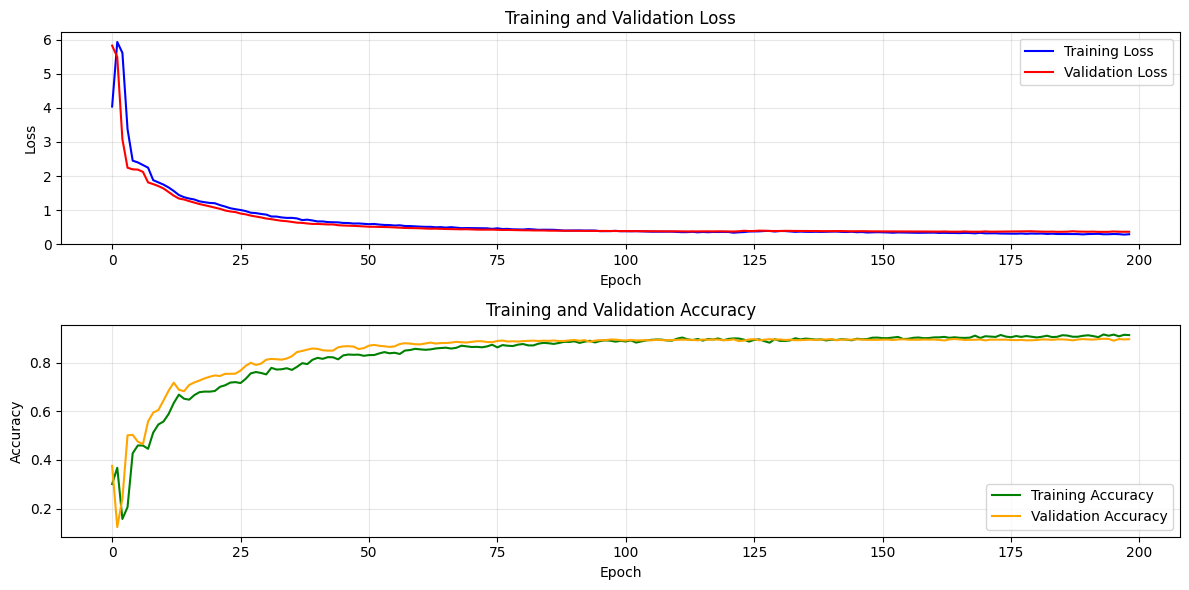

In [13]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import time
import numpy as np
from tqdm import tqdm

def train_gcn(model, data, epochs=200, lr=0.01, weight_decay=5e-4):
    # Initialize optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Initialize lists to store metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Get the device
    device = data.x.device
    best_val_acc = 0
    best_model = None

    # Use tqdm for progress bar
    for epoch in tqdm(range(epochs)):
        # Training
        model.train()
        optimizer.zero_grad()

        # Forward pass
        out = model(data.x, data.edge_index)

        # Calculate training loss
        train_loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])

        # Backward pass
        train_loss.backward()
        optimizer.step()

        # Record training loss
        train_losses.append(train_loss.item())

        # Calculate training accuracy
        with torch.no_grad():
            pred = out.argmax(dim=1)
            train_correct = pred[data.train_mask] == data.y[data.train_mask]
            train_acc = int(train_correct.sum()) / int(data.train_mask.sum())
            train_accuracies.append(train_acc)

        # Validation
        model.eval()
        with torch.no_grad():
            out = model(data.x, data.edge_index)

            # Calculate validation loss
            val_loss = F.cross_entropy(out[data.val_mask], data.y[data.val_mask])
            val_losses.append(val_loss.item())

            # Calculate validation accuracy
            pred = out.argmax(dim=1)
            val_correct = pred[data.val_mask] == data.y[data.val_mask]
            val_acc = int(val_correct.sum()) / int(data.val_mask.sum())
            val_accuracies.append(val_acc)

            # Save best model
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model = model.state_dict().copy()

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch: {epoch+1:03d}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, '
                  f'Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')

    # Load best model
    if best_model is not None:
        model.load_state_dict(best_model)

    # Plot training process
    plt.figure(figsize=(12, 6))

    # Plot losses
    plt.subplot(2, 1, 1)
    plt.plot(train_losses[1:], label='Training Loss', color='blue')
    plt.plot(val_losses[1:], label='Validation Loss', color='red')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot accuracies
    plt.subplot(2, 1, 2)
    plt.plot(train_accuracies[1:], label='Training Accuracy', color='green')
    plt.plot(val_accuracies[1:], label='Validation Accuracy', color='orange')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return model, {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies
    }

# Train the model
model, metrics = train_gcn(model, data, epochs=200)


Visualizing embeddings BEFORE training...
Applying t-SNE to 13752 nodes with 64 features...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE completed in 44.95 seconds


<ipython-input-38-472c771f20e9>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', num_classes)


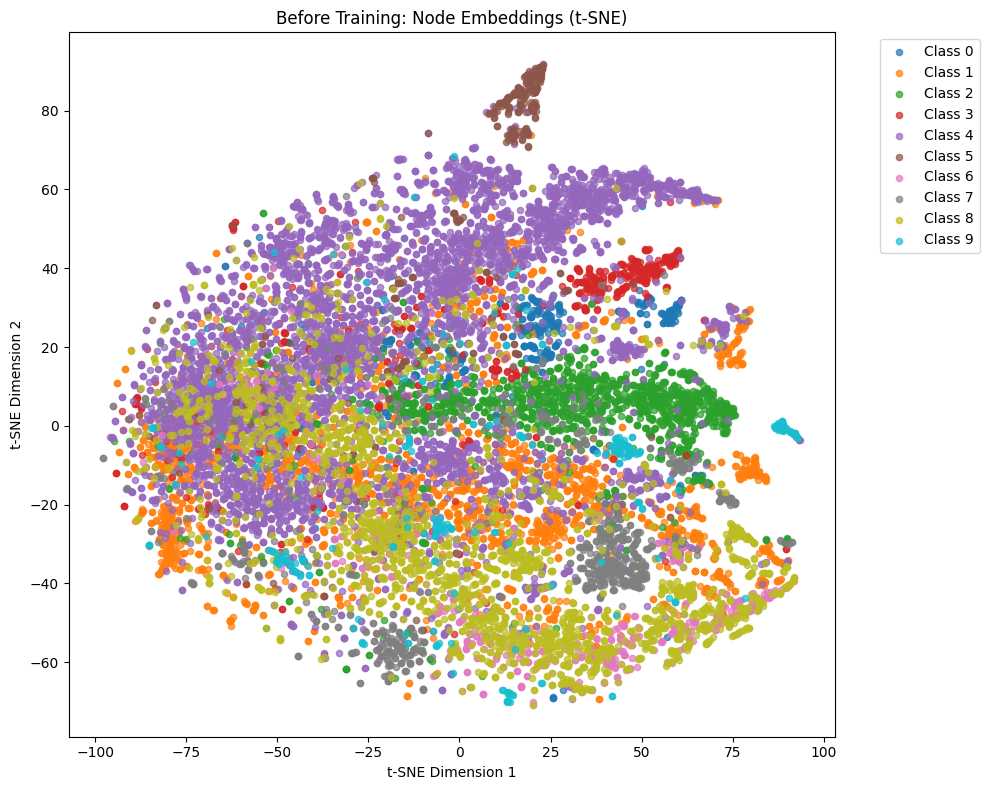


Visualizing embeddings AFTER training...
Applying t-SNE to 13752 nodes with 64 features...


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE completed in 37.38 seconds


<ipython-input-38-472c771f20e9>:58: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', num_classes)


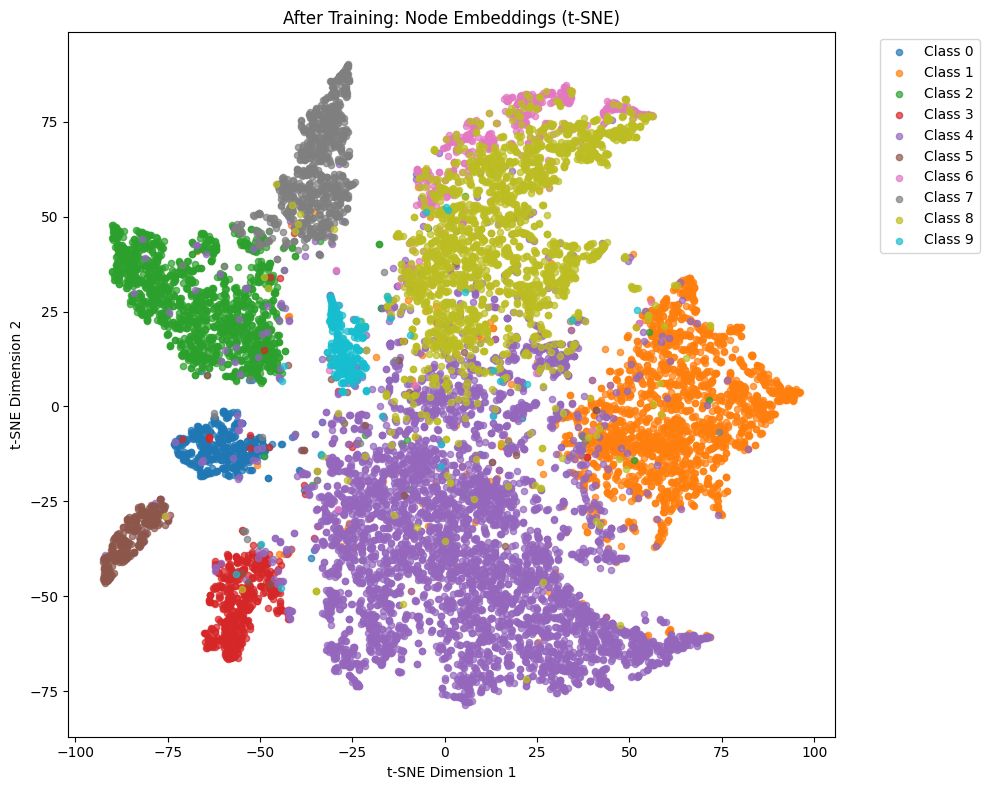

In [38]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import time

def visualize_embeddings(model, data, title_prefix=""):
    """
    Visualize node embeddings using t-SNE

    Args:
        model: The GCN model
        data: PyTorch Geometric data object
        title_prefix: Prefix for the plot title
    """
    # Set model to evaluation mode
    model.eval()

    # Get embeddings from the first GCN layer
    with torch.no_grad():
        # Forward pass through first layer only
        embeddings = model.conv1(data.x, data.edge_index)
        embeddings = torch.relu(embeddings)

        # Move to CPU for sklearn
        embeddings = embeddings.cpu().numpy()
        labels = data.y.cpu().numpy()

    # Apply t-SNE for dimensionality reduction
    print(f"Applying t-SNE to {embeddings.shape[0]} nodes with {embeddings.shape[1]} features...")
    start_time = time.time()

    # Use a sample of nodes if the graph is very large (optional)
    max_nodes = len(node_df)  # Adjust based on your computational resources
    if embeddings.shape[0] > max_nodes:
        print(f"Sampling {max_nodes} nodes for t-SNE visualization...")
        indices = np.random.choice(embeddings.shape[0], max_nodes, replace=False)
        embeddings_sample = embeddings[indices]
        labels_sample = labels[indices]
    else:
        embeddings_sample = embeddings
        labels_sample = labels

    # Apply t-SNE
    tsne = TSNE(n_components=2, random_state=42, perplexity=30)
    embeddings_2d = tsne.fit_transform(embeddings_sample)
    print(f"t-SNE completed in {time.time() - start_time:.2f} seconds")

    # Plot the embeddings
    plt.figure(figsize=(10, 8))

    # Get unique classes
    unique_classes = np.unique(labels_sample)
    num_classes = len(unique_classes)

    # Create a colormap
    cmap = plt.cm.get_cmap('tab10', num_classes)

    # Plot each class with a different color
    for i, class_id in enumerate(unique_classes):
        mask = labels_sample == class_id
        plt.scatter(
            embeddings_2d[mask, 0],
            embeddings_2d[mask, 1],
            c=[cmap(i)],
            label=f'Class {class_id}',
            alpha=0.7,
            s=20
        )

    plt.title(f"{title_prefix} Node Embeddings (t-SNE)")
    plt.xlabel("t-SNE Dimension 1")
    plt.ylabel("t-SNE Dimension 2")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Create a new untrained model for "before" visualization
untrained_model = GCN(
    in_channels=data.num_node_features,
    hidden_channels=64,
    out_channels=len(torch.unique(data.y))
).to(data.x.device)

# Visualize embeddings before training
print("Visualizing embeddings BEFORE training...")
visualize_embeddings(untrained_model, data, title_prefix="Before Training:")

# Visualize embeddings after training
print("\nVisualizing embeddings AFTER training...")
visualize_embeddings(model, data, title_prefix="After Training:")

# Parameter Tuning

In [9]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import numpy as np
import time
from tqdm import tqdm
import pandas as pd

class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_layers=2, dropout=0.5):
        super(GCN, self).__init__()

        self.num_layers = num_layers
        self.convs = torch.nn.ModuleList()

        # First layer
        self.convs.append(GCNConv(in_channels, hidden_channels))

        # Hidden layers
        for _ in range(num_layers - 2):
            self.convs.append(GCNConv(hidden_channels, hidden_channels))

        # Output layer
        self.convs.append(GCNConv(hidden_channels, out_channels))

        self.dropout = dropout

    def forward(self, x, edge_index):
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            if i < len(self.convs) - 1:  # No activation on final layer
                x = F.relu(x)
                x = F.dropout(x, p=self.dropout, training=self.training)
        return x

def train_and_evaluate(model, data, optimizer, epochs=100, early_stopping=20):
    """Train model and return best validation accuracy and corresponding test accuracy"""

    best_val_acc = 0
    best_test_acc = 0
    best_epoch = 0
    patience_counter = 0

    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        # Evaluation
        model.eval()
        with torch.no_grad():
            out = model(data.x, data.edge_index)
            pred = out.argmax(dim=1)

            # Validation accuracy
            val_correct = pred[data.val_mask] == data.y[data.val_mask]
            val_acc = int(val_correct.sum()) / int(data.val_mask.sum())

            # Test accuracy
            test_correct = pred[data.test_mask] == data.y[data.test_mask]
            test_acc = int(test_correct.sum()) / int(data.test_mask.sum())

            # Check if this is the best model so far
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_test_acc = test_acc
                best_epoch = epoch
                patience_counter = 0
            else:
                patience_counter += 1

            # Early stopping
            if patience_counter >= early_stopping:
                break

    return best_val_acc, best_test_acc, best_epoch

def hyperparameter_tuning(data):
    """Perform grid search over hyperparameters"""

    # Define hyperparameter grid
    param_grid = {
        'hidden_channels': [32, 64, 128, 256],
        'num_layers': [2, 3, 4],
        'dropout': [0.3, 0.5, 0.7],
        'learning_rate': [0.001, 0.005, 0.01],
        'weight_decay': [1e-5, 5e-5, 1e-4, 5e-4]
    }

    # Get dimensions from data
    in_channels = data.num_node_features
    out_channels = len(torch.unique(data.y))
    device = data.x.device

    # Prepare results storage
    results = []

    # Total number of combinations
    total_combinations = (
        len(param_grid['hidden_channels']) *
        len(param_grid['num_layers']) *
        len(param_grid['dropout']) *
        len(param_grid['learning_rate']) *
        len(param_grid['weight_decay'])
    )

    print(f"Starting hyperparameter tuning with {total_combinations} combinations")

    # Counter for progress tracking
    counter = 0

    # Grid search
    for hidden_channels in param_grid['hidden_channels']:
        for num_layers in param_grid['num_layers']:
            for dropout in param_grid['dropout']:
                for lr in param_grid['learning_rate']:
                    for weight_decay in param_grid['weight_decay']:
                        counter += 1

                        # Create model with current hyperparameters
                        model = GCN(
                            in_channels=in_channels,
                            hidden_channels=hidden_channels,
                            out_channels=out_channels,
                            num_layers=num_layers,
                            dropout=dropout
                        ).to(device)

                        # Create optimizer
                        optimizer = torch.optim.Adam(
                            model.parameters(),
                            lr=lr,
                            weight_decay=weight_decay
                        )

                        # Train and evaluate
                        val_acc, test_acc, best_epoch = train_and_evaluate(
                            model, data, optimizer, epochs=200, early_stopping=20
                        )

                        # Store results
                        results.append({
                            'hidden_channels': hidden_channels,
                            'num_layers': num_layers,
                            'dropout': dropout,
                            'learning_rate': lr,
                            'weight_decay': weight_decay,
                            'val_accuracy': val_acc,
                            'test_accuracy': test_acc,
                            'best_epoch': best_epoch
                        })

                        # Print progress
                        print(f"[{counter}/{total_combinations}] "
                              f"hidden={hidden_channels}, layers={num_layers}, "
                              f"dropout={dropout}, lr={lr}, wd={weight_decay}: "
                              f"val_acc={val_acc:.4f}, test_acc={test_acc:.4f}")

    # Convert results to DataFrame for easier analysis
    results_df = pd.DataFrame(results)

    # Sort by validation accuracy
    results_df = results_df.sort_values('val_accuracy', ascending=False)


    # Print top 5 configurations
    print("\nTop 5 configurations:")
    print(results_df.head(5).to_string(index=False))

    # Get best configuration
    best_config = results_df.iloc[0]
    print("\nBest configuration:")
    for param, value in best_config.items():
        print(f"  {param}: {value}")

    # Train final model with best hyperparameters
    print("\nTraining final model with best hyperparameters...")
    final_model = GCN(
        in_channels=in_channels,
        hidden_channels=int(best_config['hidden_channels']),
        out_channels=out_channels,
        num_layers=int(best_config['num_layers']),
        dropout=best_config['dropout']
    ).to(device)

    final_optimizer = torch.optim.Adam(
        final_model.parameters(),
        lr=best_config['learning_rate'],
        weight_decay=best_config['weight_decay']
    )

    # Train for more epochs without early stopping
    train_and_evaluate(final_model, data, final_optimizer, epochs=300, early_stopping=300)

    # Final evaluation
    final_model.eval()
    with torch.no_grad():
        out = final_model(data.x, data.edge_index)
        pred = out.argmax(dim=1)

        # Test accuracy
        test_correct = pred[data.test_mask] == data.y[data.test_mask]
        final_test_acc = int(test_correct.sum()) / int(data.test_mask.sum())

        print(f"\nFinal test accuracy: {final_test_acc:.4f}")

    # Analyze parameter impact
    print("\nParameter impact analysis:")

    # For each parameter, calculate average test accuracy for each value
    for param in param_grid.keys():
        print(f"\nImpact of {param}:")
        param_impact = results_df.groupby(param)['test_accuracy'].agg(['mean', 'std', 'count'])
        print(param_impact.sort_values('mean', ascending=False))

    return final_model, results_df

# Run hyperparameter tuning
best_model, tuning_results = hyperparameter_tuning(data)

Starting hyperparameter tuning with 432 combinations
[1/432] hidden=32, layers=2, dropout=0.3, lr=0.001, wd=1e-05: val_acc=0.8921, test_acc=0.8906
[2/432] hidden=32, layers=2, dropout=0.3, lr=0.001, wd=5e-05: val_acc=0.8839, test_acc=0.8869
[3/432] hidden=32, layers=2, dropout=0.3, lr=0.001, wd=0.0001: val_acc=0.8874, test_acc=0.8869
[4/432] hidden=32, layers=2, dropout=0.3, lr=0.001, wd=0.0005: val_acc=0.8880, test_acc=0.8895
[5/432] hidden=32, layers=2, dropout=0.3, lr=0.005, wd=1e-05: val_acc=0.8930, test_acc=0.8897
[6/432] hidden=32, layers=2, dropout=0.3, lr=0.005, wd=5e-05: val_acc=0.8944, test_acc=0.8949
[7/432] hidden=32, layers=2, dropout=0.3, lr=0.005, wd=0.0001: val_acc=0.8924, test_acc=0.8920
[8/432] hidden=32, layers=2, dropout=0.3, lr=0.005, wd=0.0005: val_acc=0.8935, test_acc=0.8909
[9/432] hidden=32, layers=2, dropout=0.3, lr=0.01, wd=1e-05: val_acc=0.8883, test_acc=0.8882
[10/432] hidden=32, layers=2, dropout=0.3, lr=0.01, wd=5e-05: val_acc=0.8892, test_acc=0.8873
[11/

# Repeat with GAT

In [7]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import pandas as pd
import time
from tqdm import tqdm

class GAT(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_layers=2, heads=8, dropout=0.6):
        """
        Graph Attention Network with variable number of layers

        Args:
            in_channels: Number of input features per node
            hidden_channels: Number of hidden features per head
            out_channels: Number of output classes
            num_layers: Number of GAT layers
            heads: Number of attention heads for hidden layers
            dropout: Dropout probability
        """
        super(GAT, self).__init__()

        self.num_layers = num_layers
        self.convs = torch.nn.ModuleList()
        self.dropout = dropout

        # First layer: input features -> hidden features with multi-head attention
        self.convs.append(GATConv(
            in_channels,
            hidden_channels,
            heads=heads,
            dropout=dropout
        ))

        # Hidden layers: maintain the same dimension with multi-head attention
        for _ in range(num_layers - 2):
            self.convs.append(GATConv(
                hidden_channels * heads,  # Input is concatenated from previous layer
                hidden_channels,
                heads=heads,
                dropout=dropout
            ))

        # Output layer: hidden features -> output classes with single-head attention
        if num_layers > 1:
            self.convs.append(GATConv(
                hidden_channels * heads,  # Input is concatenated from previous layer
                out_channels,
                heads=1,
                concat=False,  # Average the attention heads for output
                dropout=dropout
            ))
        else:
            # If only one layer, connect input directly to output
            self.convs.append(GATConv(
                in_channels,
                out_channels,
                heads=1,
                concat=False,
                dropout=dropout
            ))

    def forward(self, x, edge_index):
        """Forward pass"""
        for i, conv in enumerate(self.convs):
            x = conv(x, edge_index)
            if i < len(self.convs) - 1:  # No activation or dropout on final layer
                x = F.elu(x)  # ELU activation is commonly used with GAT
                x = F.dropout(x, p=self.dropout, training=self.training)
        return x

# Initialize the GAT model
def initialize_gat_model(data, hidden_channels=8, heads=8, num_layers=2, dropout=0.6):
    # Get dimensions from the data
    in_channels = data.num_node_features
    out_channels = len(torch.unique(data.y))

    # Create model
    model = GAT(
        in_channels=in_channels,
        hidden_channels=hidden_channels,
        out_channels=out_channels,
        num_layers=num_layers,
        heads=heads,
        dropout=dropout
    )

    # Move model to the same device as the data
    model = model.to(data.x.device)

    print(f"Created GAT model with:")
    print(f"  Input features: {in_channels}")
    print(f"  Hidden features per head: {hidden_channels}")
    print(f"  Number of layers: {num_layers}")
    print(f"  Attention heads: {heads}")
    print(f"  Output classes: {out_channels}")
    print(f"  Dropout: {dropout}")

    return model

# Training function for GAT
def train_gat(model, data, epochs=200, lr=0.005, weight_decay=5e-4, early_stopping=20):
    # Initialize optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Initialize lists to store metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training loop
    best_val_acc = 0
    best_model = None
    patience_counter = 0

    print("Starting GAT training...")

    # Use tqdm for progress bar if available
    try:
        epoch_iterator = tqdm(range(epochs))
    except:
        epoch_iterator = range(epochs)

    for epoch in epoch_iterator:
        # Training
        model.train()
        optimizer.zero_grad()

        # Forward pass
        out = model(data.x, data.edge_index)

        # Calculate training loss
        train_loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])

        # Backward pass
        train_loss.backward()
        optimizer.step()

        # Record training loss
        train_losses.append(train_loss.item())

        # Calculate training accuracy
        with torch.no_grad():
            pred = out.argmax(dim=1)
            train_correct = pred[data.train_mask] == data.y[data.train_mask]
            train_acc = int(train_correct.sum()) / int(data.train_mask.sum())
            train_accuracies.append(train_acc)

        # Validation
        model.eval()
        with torch.no_grad():
            out = model(data.x, data.edge_index)

            # Calculate validation loss
            val_loss = F.cross_entropy(out[data.val_mask], data.y[data.val_mask])
            val_losses.append(val_loss.item())

            # Calculate validation accuracy
            pred = out.argmax(dim=1)
            val_correct = pred[data.val_mask] == data.y[data.val_mask]
            val_acc = int(val_correct.sum()) / int(data.val_mask.sum())
            val_accuracies.append(val_acc)

            # Save best model
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model = model.state_dict().copy()
                patience_counter = 0
            else:
                patience_counter += 1

            # Early stopping
            if patience_counter >= early_stopping:
                print(f"Early stopping at epoch {epoch+1}")
                break

        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch: {epoch+1:03d}, Train Loss: {train_loss.item():.4f}, Val Loss: {val_loss.item():.4f}, '
                  f'Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')

    print(f"Best validation accuracy: {best_val_acc:.4f}")

    # Load best model
    if best_model is not None:
        model.load_state_dict(best_model)

    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = out.argmax(dim=1)

        # Test accuracy
        test_correct = pred[data.test_mask] == data.y[data.test_mask]
        test_acc = int(test_correct.sum()) / int(data.test_mask.sum())
        print(f"Test accuracy: {test_acc:.4f}")

    return model, {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'test_accuracy': test_acc
    }

# Hyperparameter tuning for GAT with variable number of layers
def tune_gat_hyperparameters(data):
    """Hyperparameter tuning for GAT including number of layers"""

    # Define hyperparameter grid
    param_grid = {
        'num_layers': [2, 3, 4],
        'hidden_channels': [8, 16, 32],
        'heads': [4, 8, 16],
        'dropout': [0.4, 0.6, 0.8],
        'learning_rate': [0.001, 0.005, 0.01],
        'weight_decay': [1e-4, 5e-4, 1e-3]
    }

    # Results storage
    results = []

    # Total combinations
    total_combinations = (
        len(param_grid['num_layers']) *
        len(param_grid['hidden_channels']) *
        len(param_grid['heads']) *
        len(param_grid['dropout']) *
        len(param_grid['learning_rate']) *
        len(param_grid['weight_decay'])
    )

    print(f"Starting GAT hyperparameter tuning with {total_combinations} combinations")

    # Counter
    counter = 0
    start_time = time.time()

    # Grid search
    for num_layers in param_grid['num_layers']:
        for hidden_channels in param_grid['hidden_channels']:
            for heads in param_grid['heads']:
                for dropout in param_grid['dropout']:
                    for lr in param_grid['learning_rate']:
                        for weight_decay in param_grid['weight_decay']:
                            counter += 1
                            print(f"\nTrying combination {counter}/{total_combinations}:")
                            print(f"  num_layers={num_layers}, hidden_channels={hidden_channels}, "
                                  f"heads={heads}, dropout={dropout}, lr={lr}, weight_decay={weight_decay}")

                            # Create model
                            model = initialize_gat_model(
                                data,
                                hidden_channels=hidden_channels,
                                heads=heads,
                                num_layers=num_layers,
                                dropout=dropout
                            )

                            # Train model with fewer epochs for faster tuning
                            try:
                                _, metrics = train_gat(
                                    model,
                                    data,
                                    epochs=100,  # Reduced epochs for tuning
                                    lr=lr,
                                    weight_decay=weight_decay,
                                    early_stopping=10  # Early stopping for faster tuning
                                )

                                # Store results
                                results.append({
                                    'num_layers': num_layers,
                                    'hidden_channels': hidden_channels,
                                    'heads': heads,
                                    'dropout': dropout,
                                    'learning_rate': lr,
                                    'weight_decay': weight_decay,
                                    'test_accuracy': metrics['test_accuracy'],
                                    'final_val_accuracy': metrics['val_accuracies'][-1]
                                })
                            except Exception as e:
                                print(f"Error with this configuration: {str(e)}")
                                # Still record the failed attempt
                                results.append({
                                    'num_layers': num_layers,
                                    'hidden_channels': hidden_channels,
                                    'heads': heads,
                                    'dropout': dropout,
                                    'learning_rate': lr,
                                    'weight_decay': weight_decay,
                                    'test_accuracy': 0.0,
                                    'final_val_accuracy': 0.0,
                                    'error': str(e)
                                })

    # Total time
    total_time = time.time() - start_time
    print(f"\nHyperparameter tuning completed in {total_time:.2f} seconds")

    # Convert to DataFrame
    results_df = pd.DataFrame(results)

    # Sort by test accuracy
    results_df = results_df.sort_values('test_accuracy', ascending=False)

    # Print top 5 configurations
    print("\nTop 5 GAT configurations:")
    print(results_df.head(5).to_string(index=False))

    # Analyze impact of number of layers
    print("\nImpact of number of layers:")
    layer_impact = results_df.groupby('num_layers')['test_accuracy'].agg(['mean', 'max', 'std', 'count'])
    print(layer_impact)

    # Get best configuration
    best_config = results_df.iloc[0]
    print("\nBest GAT configuration:")
    for param, value in best_config.items():
        if param not in ['test_accuracy', 'final_val_accuracy', 'error']:
            print(f"  {param}: {value}")

    # Train final model with best configuration
    print("\nTraining final model with best configuration...")
    final_model = initialize_gat_model(
        data,
        hidden_channels=int(best_config['hidden_channels']),
        heads=int(best_config['heads']),
        num_layers=int(best_config['num_layers']),
        dropout=best_config['dropout']
    )

    final_model, final_metrics = train_gat(
        final_model,
        data,
        epochs=200,
        lr=best_config['learning_rate'],
        weight_decay=best_config['weight_decay']
    )

    print(f"Final test accuracy: {final_metrics['test_accuracy']:.4f}")

    return final_model, results_df

# Run hyperparameter tuning
best_gat_model, tuning_results = tune_gat_hyperparameters(data)


Starting GAT hyperparameter tuning with 729 combinations

Trying combination 1/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 25%|██▌       | 25/100 [00:00<00:01, 60.99it/s]

Epoch: 010, Train Loss: 1.8963, Val Loss: 1.7317, Train Acc: 0.4014, Val Acc: 0.4540
Epoch: 020, Train Loss: 1.6506, Val Loss: 1.4761, Train Acc: 0.5182, Val Acc: 0.5390
Epoch: 030, Train Loss: 1.4625, Val Loss: 1.2561, Train Acc: 0.5965, Val Acc: 0.6652


 64%|██████▍   | 64/100 [00:00<00:00, 103.97it/s]

Epoch: 040, Train Loss: 1.2811, Val Loss: 1.0862, Train Acc: 0.6630, Val Acc: 0.7243
Epoch: 050, Train Loss: 1.1427, Val Loss: 0.9433, Train Acc: 0.7037, Val Acc: 0.7475
Epoch: 060, Train Loss: 1.0469, Val Loss: 0.8287, Train Acc: 0.7355, Val Acc: 0.7949


 90%|█████████ | 90/100 [00:01<00:00, 113.40it/s]

Epoch: 070, Train Loss: 0.9670, Val Loss: 0.7403, Train Acc: 0.7561, Val Acc: 0.8185
Epoch: 080, Train Loss: 0.9109, Val Loss: 0.6769, Train Acc: 0.7764, Val Acc: 0.8296
Epoch: 090, Train Loss: 0.8527, Val Loss: 0.6248, Train Acc: 0.7843, Val Acc: 0.8389


100%|██████████| 100/100 [00:01<00:00, 86.53it/s]


Epoch: 100, Train Loss: 0.7955, Val Loss: 0.5823, Train Acc: 0.8055, Val Acc: 0.8479
Best validation accuracy: 0.8479
Test accuracy: 0.8433

Trying combination 2/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 125.54it/s]

Epoch: 010, Train Loss: 1.8708, Val Loss: 1.7038, Train Acc: 0.3916, Val Acc: 0.3947
Epoch: 020, Train Loss: 1.6063, Val Loss: 1.4085, Train Acc: 0.5228, Val Acc: 0.5759


 26%|██▌       | 26/100 [00:00<00:00, 120.45it/s]

Epoch: 030, Train Loss: 1.3543, Val Loss: 1.1657, Train Acc: 0.6514, Val Acc: 0.7010


 52%|█████▏    | 52/100 [00:00<00:00, 122.14it/s]

Epoch: 040, Train Loss: 1.2035, Val Loss: 0.9929, Train Acc: 0.6842, Val Acc: 0.7237
Epoch: 050, Train Loss: 1.0757, Val Loss: 0.8717, Train Acc: 0.7097, Val Acc: 0.7472


 65%|██████▌   | 65/100 [00:00<00:00, 124.07it/s]

Epoch: 060, Train Loss: 1.0009, Val Loss: 0.7881, Train Acc: 0.7386, Val Acc: 0.7717


 78%|███████▊  | 78/100 [00:00<00:00, 125.60it/s]

Epoch: 070, Train Loss: 0.9271, Val Loss: 0.7069, Train Acc: 0.7507, Val Acc: 0.7978
Epoch: 080, Train Loss: 0.8801, Val Loss: 0.6581, Train Acc: 0.7675, Val Acc: 0.8034


 91%|█████████ | 91/100 [00:00<00:00, 126.38it/s]

Epoch: 090, Train Loss: 0.8345, Val Loss: 0.6133, Train Acc: 0.7769, Val Acc: 0.8168


100%|██████████| 100/100 [00:00<00:00, 124.58it/s]


Epoch: 100, Train Loss: 0.7893, Val Loss: 0.5757, Train Acc: 0.7897, Val Acc: 0.8275
Best validation accuracy: 0.8290
Test accuracy: 0.8233

Trying combination 3/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 127.28it/s]

Epoch: 010, Train Loss: 1.9489, Val Loss: 1.8090, Train Acc: 0.3906, Val Acc: 0.4034
Epoch: 020, Train Loss: 1.6920, Val Loss: 1.5295, Train Acc: 0.5109, Val Acc: 0.5451


 26%|██▌       | 26/100 [00:00<00:00, 124.21it/s]

Epoch: 030, Train Loss: 1.4595, Val Loss: 1.2852, Train Acc: 0.6279, Val Acc: 0.6896


 39%|███▉      | 39/100 [00:00<00:00, 126.07it/s]

Epoch: 040, Train Loss: 1.2832, Val Loss: 1.1029, Train Acc: 0.6667, Val Acc: 0.7263


 52%|█████▏    | 52/100 [00:00<00:00, 127.00it/s]

Epoch: 050, Train Loss: 1.1685, Val Loss: 0.9621, Train Acc: 0.7023, Val Acc: 0.7435


 65%|██████▌   | 65/100 [00:00<00:00, 127.45it/s]

Epoch: 060, Train Loss: 1.0690, Val Loss: 0.8647, Train Acc: 0.7222, Val Acc: 0.7647
Epoch: 070, Train Loss: 0.9887, Val Loss: 0.7839, Train Acc: 0.7372, Val Acc: 0.7781


 78%|███████▊  | 78/100 [00:00<00:00, 126.95it/s]

Epoch: 080, Train Loss: 0.9250, Val Loss: 0.7242, Train Acc: 0.7550, Val Acc: 0.7906


 92%|█████████▏| 92/100 [00:00<00:00, 128.17it/s]

Epoch: 090, Train Loss: 0.8681, Val Loss: 0.6712, Train Acc: 0.7673, Val Acc: 0.8092


100%|██████████| 100/100 [00:00<00:00, 126.98it/s]


Epoch: 100, Train Loss: 0.8310, Val Loss: 0.6265, Train Acc: 0.7785, Val Acc: 0.8272
Best validation accuracy: 0.8272
Test accuracy: 0.8240

Trying combination 4/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 126.92it/s]

Epoch: 010, Train Loss: 1.7867, Val Loss: 1.5632, Train Acc: 0.4266, Val Acc: 0.4878
Epoch: 020, Train Loss: 1.3243, Val Loss: 1.1215, Train Acc: 0.5834, Val Acc: 0.6550


 26%|██▌       | 26/100 [00:00<00:00, 122.19it/s]

Epoch: 030, Train Loss: 1.0896, Val Loss: 0.8334, Train Acc: 0.6817, Val Acc: 0.7420


 39%|███▉      | 39/100 [00:00<00:00, 124.17it/s]

Epoch: 040, Train Loss: 0.8966, Val Loss: 0.6680, Train Acc: 0.7567, Val Acc: 0.8031


 52%|█████▏    | 52/100 [00:00<00:00, 124.25it/s]

Epoch: 050, Train Loss: 0.7678, Val Loss: 0.5429, Train Acc: 0.7912, Val Acc: 0.8345


 65%|██████▌   | 65/100 [00:00<00:00, 123.65it/s]

Epoch: 060, Train Loss: 0.6918, Val Loss: 0.4711, Train Acc: 0.8005, Val Acc: 0.8589
Epoch: 070, Train Loss: 0.6501, Val Loss: 0.4298, Train Acc: 0.8186, Val Acc: 0.8685


 78%|███████▊  | 78/100 [00:00<00:00, 123.50it/s]

Epoch: 080, Train Loss: 0.5874, Val Loss: 0.3987, Train Acc: 0.8379, Val Acc: 0.8711


 91%|█████████ | 91/100 [00:00<00:00, 124.96it/s]

Epoch: 090, Train Loss: 0.5625, Val Loss: 0.3742, Train Acc: 0.8467, Val Acc: 0.8863


100%|██████████| 100/100 [00:00<00:00, 124.61it/s]


Epoch: 100, Train Loss: 0.5344, Val Loss: 0.3645, Train Acc: 0.8462, Val Acc: 0.8848
Best validation accuracy: 0.8877
Test accuracy: 0.8853

Trying combination 5/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 128.04it/s]

Epoch: 010, Train Loss: 1.6943, Val Loss: 1.4499, Train Acc: 0.4989, Val Acc: 0.5428
Epoch: 020, Train Loss: 1.2300, Val Loss: 0.9662, Train Acc: 0.6611, Val Acc: 0.7336


 26%|██▌       | 26/100 [00:00<00:00, 124.92it/s]

Epoch: 030, Train Loss: 0.9570, Val Loss: 0.7146, Train Acc: 0.7241, Val Acc: 0.7821


 39%|███▉      | 39/100 [00:00<00:00, 123.71it/s]

Epoch: 040, Train Loss: 0.7897, Val Loss: 0.5694, Train Acc: 0.7816, Val Acc: 0.8266


 52%|█████▏    | 52/100 [00:00<00:00, 120.63it/s]

Epoch: 050, Train Loss: 0.7105, Val Loss: 0.4824, Train Acc: 0.8055, Val Acc: 0.8615
Epoch: 060, Train Loss: 0.6511, Val Loss: 0.4374, Train Acc: 0.8248, Val Acc: 0.8723


 65%|██████▌   | 65/100 [00:00<00:00, 122.28it/s]

Epoch: 070, Train Loss: 0.6230, Val Loss: 0.4066, Train Acc: 0.8288, Val Acc: 0.8778


 78%|███████▊  | 78/100 [00:00<00:00, 121.19it/s]

Epoch: 080, Train Loss: 0.5485, Val Loss: 0.3869, Train Acc: 0.8471, Val Acc: 0.8825


 91%|█████████ | 91/100 [00:00<00:00, 122.38it/s]

Epoch: 090, Train Loss: 0.5377, Val Loss: 0.3693, Train Acc: 0.8504, Val Acc: 0.8877


100%|██████████| 100/100 [00:00<00:00, 122.47it/s]


Epoch: 100, Train Loss: 0.5161, Val Loss: 0.3589, Train Acc: 0.8490, Val Acc: 0.8901
Best validation accuracy: 0.8909
Test accuracy: 0.8902

Trying combination 6/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 120.93it/s]

Epoch: 010, Train Loss: 1.7075, Val Loss: 1.4477, Train Acc: 0.5288, Val Acc: 0.6565
Epoch: 020, Train Loss: 1.2469, Val Loss: 0.9825, Train Acc: 0.6609, Val Acc: 0.7272


 26%|██▌       | 26/100 [00:00<00:00, 120.90it/s]

Epoch: 030, Train Loss: 0.9928, Val Loss: 0.7415, Train Acc: 0.7166, Val Acc: 0.7801


 39%|███▉      | 39/100 [00:00<00:00, 123.76it/s]

Epoch: 040, Train Loss: 0.8452, Val Loss: 0.6232, Train Acc: 0.7571, Val Acc: 0.8150


 52%|█████▏    | 52/100 [00:00<00:00, 125.13it/s]

Epoch: 050, Train Loss: 0.7618, Val Loss: 0.5250, Train Acc: 0.7833, Val Acc: 0.8406


 65%|██████▌   | 65/100 [00:00<00:00, 126.16it/s]

Epoch: 060, Train Loss: 0.6837, Val Loss: 0.4695, Train Acc: 0.8132, Val Acc: 0.8601
Epoch: 070, Train Loss: 0.6360, Val Loss: 0.4305, Train Acc: 0.8228, Val Acc: 0.8720


 78%|███████▊  | 78/100 [00:00<00:00, 125.89it/s]

Epoch: 080, Train Loss: 0.6097, Val Loss: 0.4039, Train Acc: 0.8319, Val Acc: 0.8784


 91%|█████████ | 91/100 [00:00<00:00, 124.24it/s]

Epoch: 090, Train Loss: 0.5753, Val Loss: 0.3833, Train Acc: 0.8388, Val Acc: 0.8805


100%|██████████| 100/100 [00:00<00:00, 124.04it/s]


Epoch: 100, Train Loss: 0.5519, Val Loss: 0.3708, Train Acc: 0.8456, Val Acc: 0.8834
Best validation accuracy: 0.8834
Test accuracy: 0.8844

Trying combination 7/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 127.67it/s]

Epoch: 010, Train Loss: 2.0169, Val Loss: 1.6873, Train Acc: 0.3937, Val Acc: 0.5398
Epoch: 020, Train Loss: 1.5030, Val Loss: 1.2434, Train Acc: 0.5726, Val Acc: 0.6963


 26%|██▌       | 26/100 [00:00<00:00, 119.74it/s]

Epoch: 030, Train Loss: 1.1706, Val Loss: 0.8460, Train Acc: 0.6622, Val Acc: 0.7597


 39%|███▉      | 39/100 [00:00<00:00, 121.76it/s]

Epoch: 040, Train Loss: 0.9505, Val Loss: 0.6603, Train Acc: 0.7284, Val Acc: 0.8124


 52%|█████▏    | 52/100 [00:00<00:00, 121.41it/s]

Epoch: 050, Train Loss: 0.8065, Val Loss: 0.5417, Train Acc: 0.7723, Val Acc: 0.8362


 65%|██████▌   | 65/100 [00:00<00:00, 123.92it/s]

Epoch: 060, Train Loss: 0.7069, Val Loss: 0.4677, Train Acc: 0.7951, Val Acc: 0.8572
Epoch: 070, Train Loss: 0.6542, Val Loss: 0.4265, Train Acc: 0.8128, Val Acc: 0.8688


 78%|███████▊  | 78/100 [00:00<00:00, 125.33it/s]

Epoch: 080, Train Loss: 0.6087, Val Loss: 0.4063, Train Acc: 0.8240, Val Acc: 0.8732


 91%|█████████ | 91/100 [00:00<00:00, 126.30it/s]

Epoch: 090, Train Loss: 0.5926, Val Loss: 0.3871, Train Acc: 0.8296, Val Acc: 0.8775


100%|██████████| 100/100 [00:00<00:00, 124.71it/s]


Epoch: 100, Train Loss: 0.5699, Val Loss: 0.3731, Train Acc: 0.8267, Val Acc: 0.8819
Best validation accuracy: 0.8834
Test accuracy: 0.8797

Trying combination 8/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 129.41it/s]

Epoch: 010, Train Loss: 1.5536, Val Loss: 1.2700, Train Acc: 0.5710, Val Acc: 0.6635
Epoch: 020, Train Loss: 1.1886, Val Loss: 0.9224, Train Acc: 0.6586, Val Acc: 0.7147


 26%|██▌       | 26/100 [00:00<00:00, 128.74it/s]

Epoch: 030, Train Loss: 0.9132, Val Loss: 0.6612, Train Acc: 0.7372, Val Acc: 0.7964


 39%|███▉      | 39/100 [00:00<00:00, 127.16it/s]

Epoch: 040, Train Loss: 0.7401, Val Loss: 0.4771, Train Acc: 0.7962, Val Acc: 0.8464


 52%|█████▏    | 52/100 [00:00<00:00, 124.75it/s]

Epoch: 050, Train Loss: 0.6367, Val Loss: 0.4061, Train Acc: 0.8207, Val Acc: 0.8671
Epoch: 060, Train Loss: 0.5566, Val Loss: 0.3764, Train Acc: 0.8433, Val Acc: 0.8807


 65%|██████▌   | 65/100 [00:00<00:00, 124.77it/s]

Epoch: 070, Train Loss: 0.5151, Val Loss: 0.3562, Train Acc: 0.8535, Val Acc: 0.8839


 78%|███████▊  | 78/100 [00:00<00:00, 124.51it/s]

Epoch: 080, Train Loss: 0.4984, Val Loss: 0.3430, Train Acc: 0.8591, Val Acc: 0.8918


 91%|█████████ | 91/100 [00:00<00:00, 123.83it/s]

Epoch: 090, Train Loss: 0.4704, Val Loss: 0.3395, Train Acc: 0.8600, Val Acc: 0.8924


100%|██████████| 100/100 [00:00<00:00, 125.05it/s]


Epoch: 100, Train Loss: 0.4552, Val Loss: 0.3352, Train Acc: 0.8658, Val Acc: 0.8959
Best validation accuracy: 0.8959
Test accuracy: 0.8991

Trying combination 9/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 123.77it/s]

Epoch: 010, Train Loss: 1.9244, Val Loss: 1.6116, Train Acc: 0.3817, Val Acc: 0.4924
Epoch: 020, Train Loss: 1.3637, Val Loss: 1.0868, Train Acc: 0.5928, Val Acc: 0.7196


 26%|██▌       | 26/100 [00:00<00:00, 125.23it/s]

Epoch: 030, Train Loss: 1.0942, Val Loss: 0.8537, Train Acc: 0.6811, Val Acc: 0.7516


 39%|███▉      | 39/100 [00:00<00:00, 126.15it/s]

Epoch: 040, Train Loss: 0.9050, Val Loss: 0.6437, Train Acc: 0.7087, Val Acc: 0.7848


 52%|█████▏    | 52/100 [00:00<00:00, 126.44it/s]

Epoch: 050, Train Loss: 0.7690, Val Loss: 0.5508, Train Acc: 0.7667, Val Acc: 0.8304


 65%|██████▌   | 65/100 [00:00<00:00, 126.30it/s]

Epoch: 060, Train Loss: 0.7056, Val Loss: 0.4701, Train Acc: 0.7837, Val Acc: 0.8546
Epoch: 070, Train Loss: 0.6502, Val Loss: 0.4260, Train Acc: 0.8128, Val Acc: 0.8659


 78%|███████▊  | 78/100 [00:00<00:00, 126.31it/s]

Epoch: 080, Train Loss: 0.5846, Val Loss: 0.3930, Train Acc: 0.8305, Val Acc: 0.8770


 91%|█████████ | 91/100 [00:00<00:00, 124.72it/s]

Epoch: 090, Train Loss: 0.5533, Val Loss: 0.3744, Train Acc: 0.8421, Val Acc: 0.8799


100%|██████████| 100/100 [00:00<00:00, 125.40it/s]


Epoch: 100, Train Loss: 0.5279, Val Loss: 0.3572, Train Acc: 0.8550, Val Acc: 0.8898
Best validation accuracy: 0.8912
Test accuracy: 0.8864

Trying combination 10/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 127.31it/s]

Epoch: 010, Train Loss: 2.2141, Val Loss: 1.9008, Train Acc: 0.3422, Val Acc: 0.4459
Epoch: 020, Train Loss: 1.9897, Val Loss: 1.6352, Train Acc: 0.3941, Val Acc: 0.4634


 26%|██▌       | 26/100 [00:00<00:00, 125.78it/s]

Epoch: 030, Train Loss: 1.7720, Val Loss: 1.4514, Train Acc: 0.5009, Val Acc: 0.5931


 39%|███▉      | 39/100 [00:00<00:00, 126.41it/s]

Epoch: 040, Train Loss: 1.6506, Val Loss: 1.2931, Train Acc: 0.5533, Val Acc: 0.6699


 52%|█████▏    | 52/100 [00:00<00:00, 126.82it/s]

Epoch: 050, Train Loss: 1.5227, Val Loss: 1.1451, Train Acc: 0.5986, Val Acc: 0.7216


 65%|██████▌   | 65/100 [00:00<00:00, 126.61it/s]

Epoch: 060, Train Loss: 1.4380, Val Loss: 1.0378, Train Acc: 0.5845, Val Acc: 0.7411
Epoch: 070, Train Loss: 1.3591, Val Loss: 0.9480, Train Acc: 0.6152, Val Acc: 0.7606


 78%|███████▊  | 78/100 [00:00<00:00, 126.62it/s]

Epoch: 080, Train Loss: 1.2666, Val Loss: 0.8758, Train Acc: 0.6408, Val Acc: 0.7789


 91%|█████████ | 91/100 [00:00<00:00, 126.06it/s]

Epoch: 090, Train Loss: 1.2235, Val Loss: 0.8163, Train Acc: 0.6539, Val Acc: 0.7929


100%|██████████| 100/100 [00:00<00:00, 126.34it/s]


Epoch: 100, Train Loss: 1.1980, Val Loss: 0.7655, Train Acc: 0.6593, Val Acc: 0.7967
Best validation accuracy: 0.7978
Test accuracy: 0.7951

Trying combination 11/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 127.62it/s]

Epoch: 010, Train Loss: 2.0827, Val Loss: 1.7354, Train Acc: 0.4037, Val Acc: 0.4860
Epoch: 020, Train Loss: 1.8220, Val Loss: 1.4905, Train Acc: 0.5074, Val Acc: 0.6387


 26%|██▌       | 26/100 [00:00<00:00, 128.20it/s]

Epoch: 030, Train Loss: 1.6470, Val Loss: 1.3159, Train Acc: 0.5435, Val Acc: 0.6835


 39%|███▉      | 39/100 [00:00<00:00, 127.74it/s]

Epoch: 040, Train Loss: 1.5560, Val Loss: 1.1812, Train Acc: 0.5770, Val Acc: 0.7455


 52%|█████▏    | 52/100 [00:00<00:00, 127.47it/s]

Epoch: 050, Train Loss: 1.4336, Val Loss: 1.0380, Train Acc: 0.6239, Val Acc: 0.7769


 65%|██████▌   | 65/100 [00:00<00:00, 127.59it/s]

Epoch: 060, Train Loss: 1.3606, Val Loss: 0.9523, Train Acc: 0.6372, Val Acc: 0.7909
Epoch: 070, Train Loss: 1.2841, Val Loss: 0.8642, Train Acc: 0.6553, Val Acc: 0.8040


 78%|███████▊  | 78/100 [00:00<00:00, 127.10it/s]

Epoch: 080, Train Loss: 1.2440, Val Loss: 0.8048, Train Acc: 0.6578, Val Acc: 0.8115


 91%|█████████ | 91/100 [00:00<00:00, 126.70it/s]

Epoch: 090, Train Loss: 1.1547, Val Loss: 0.7403, Train Acc: 0.6750, Val Acc: 0.8179


100%|██████████| 100/100 [00:00<00:00, 126.96it/s]


Epoch: 100, Train Loss: 1.1179, Val Loss: 0.6967, Train Acc: 0.6871, Val Acc: 0.8214
Best validation accuracy: 0.8214
Test accuracy: 0.8219

Trying combination 12/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 129.74it/s]

Epoch: 010, Train Loss: 2.2015, Val Loss: 1.8173, Train Acc: 0.3239, Val Acc: 0.3749
Epoch: 020, Train Loss: 1.9401, Val Loss: 1.5993, Train Acc: 0.3759, Val Acc: 0.4197


 26%|██▌       | 26/100 [00:00<00:00, 127.50it/s]

Epoch: 030, Train Loss: 1.7595, Val Loss: 1.4186, Train Acc: 0.4548, Val Acc: 0.5742


 39%|███▉      | 39/100 [00:00<00:00, 128.03it/s]

Epoch: 040, Train Loss: 1.6026, Val Loss: 1.2450, Train Acc: 0.5269, Val Acc: 0.6661


 52%|█████▏    | 52/100 [00:00<00:00, 127.73it/s]

Epoch: 050, Train Loss: 1.4987, Val Loss: 1.1316, Train Acc: 0.5631, Val Acc: 0.7080


 65%|██████▌   | 65/100 [00:00<00:00, 128.39it/s]

Epoch: 060, Train Loss: 1.4314, Val Loss: 1.0335, Train Acc: 0.6015, Val Acc: 0.7251
Epoch: 070, Train Loss: 1.3458, Val Loss: 0.9488, Train Acc: 0.6466, Val Acc: 0.7420


 78%|███████▊  | 78/100 [00:00<00:00, 128.31it/s]

Epoch: 080, Train Loss: 1.2756, Val Loss: 0.8721, Train Acc: 0.6597, Val Acc: 0.7664


 91%|█████████ | 91/100 [00:00<00:00, 127.31it/s]

Epoch: 090, Train Loss: 1.2622, Val Loss: 0.8118, Train Acc: 0.6723, Val Acc: 0.7775


100%|██████████| 100/100 [00:00<00:00, 127.64it/s]


Epoch: 100, Train Loss: 1.1832, Val Loss: 0.7568, Train Acc: 0.6906, Val Acc: 0.7897
Best validation accuracy: 0.7897
Test accuracy: 0.7924

Trying combination 13/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:00, 130.32it/s]

Epoch: 010, Train Loss: 2.1544, Val Loss: 1.7783, Train Acc: 0.3603, Val Acc: 0.5285
Epoch: 020, Train Loss: 1.7528, Val Loss: 1.3204, Train Acc: 0.5024, Val Acc: 0.6565


 28%|██▊       | 28/100 [00:00<00:00, 128.15it/s]

Epoch: 030, Train Loss: 1.5195, Val Loss: 1.0787, Train Acc: 0.5776, Val Acc: 0.6699


 41%|████      | 41/100 [00:00<00:00, 125.99it/s]

Epoch: 040, Train Loss: 1.3159, Val Loss: 0.8917, Train Acc: 0.6335, Val Acc: 0.7400


 54%|█████▍    | 54/100 [00:00<00:00, 125.98it/s]

Epoch: 050, Train Loss: 1.1885, Val Loss: 0.7434, Train Acc: 0.6663, Val Acc: 0.7848
Epoch: 060, Train Loss: 1.0896, Val Loss: 0.6439, Train Acc: 0.6937, Val Acc: 0.8057


 67%|██████▋   | 67/100 [00:00<00:00, 124.67it/s]

Epoch: 070, Train Loss: 0.9894, Val Loss: 0.5604, Train Acc: 0.7278, Val Acc: 0.8249


 80%|████████  | 80/100 [00:00<00:00, 124.40it/s]

Epoch: 080, Train Loss: 0.9253, Val Loss: 0.5115, Train Acc: 0.7390, Val Acc: 0.8482


 93%|█████████▎| 93/100 [00:00<00:00, 123.46it/s]

Epoch: 090, Train Loss: 0.8906, Val Loss: 0.4720, Train Acc: 0.7484, Val Acc: 0.8615


100%|██████████| 100/100 [00:00<00:00, 124.91it/s]


Epoch: 100, Train Loss: 0.8498, Val Loss: 0.4407, Train Acc: 0.7569, Val Acc: 0.8688
Best validation accuracy: 0.8688
Test accuracy: 0.8593

Trying combination 14/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 128.48it/s]

Epoch: 010, Train Loss: 1.9855, Val Loss: 1.5497, Train Acc: 0.4087, Val Acc: 0.5430
Epoch: 020, Train Loss: 1.5869, Val Loss: 1.1733, Train Acc: 0.5498, Val Acc: 0.6672


 26%|██▌       | 26/100 [00:00<00:00, 127.52it/s]

Epoch: 030, Train Loss: 1.3470, Val Loss: 0.9374, Train Acc: 0.6160, Val Acc: 0.7106


 39%|███▉      | 39/100 [00:00<00:00, 126.24it/s]

Epoch: 040, Train Loss: 1.1962, Val Loss: 0.7498, Train Acc: 0.6640, Val Acc: 0.7603


 52%|█████▏    | 52/100 [00:00<00:00, 122.76it/s]

Epoch: 050, Train Loss: 1.0732, Val Loss: 0.6394, Train Acc: 0.6964, Val Acc: 0.8010
Epoch: 060, Train Loss: 1.0059, Val Loss: 0.5551, Train Acc: 0.7185, Val Acc: 0.8441


 65%|██████▌   | 65/100 [00:00<00:00, 122.14it/s]

Epoch: 070, Train Loss: 0.9320, Val Loss: 0.5034, Train Acc: 0.7415, Val Acc: 0.8517


 78%|███████▊  | 78/100 [00:00<00:00, 122.19it/s]

Epoch: 080, Train Loss: 0.8905, Val Loss: 0.4712, Train Acc: 0.7438, Val Acc: 0.8583


 91%|█████████ | 91/100 [00:00<00:00, 123.01it/s]

Epoch: 090, Train Loss: 0.8777, Val Loss: 0.4456, Train Acc: 0.7552, Val Acc: 0.8630


100%|██████████| 100/100 [00:00<00:00, 123.94it/s]


Epoch: 100, Train Loss: 0.8711, Val Loss: 0.4291, Train Acc: 0.7505, Val Acc: 0.8642
Best validation accuracy: 0.8697
Test accuracy: 0.8606

Trying combination 15/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 116.14it/s]

Epoch: 010, Train Loss: 2.3540, Val Loss: 1.8168, Train Acc: 0.3235, Val Acc: 0.5099


 17%|█▋        | 17/100 [00:00<00:00, 112.78it/s]


Early stopping at epoch 18
Best validation accuracy: 0.5334
Test accuracy: 0.4685

Trying combination 16/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 129.84it/s]

Epoch: 010, Train Loss: 2.4559, Val Loss: 1.7908, Train Acc: 0.3802, Val Acc: 0.5535
Epoch: 020, Train Loss: 1.7871, Val Loss: 1.2315, Train Acc: 0.4858, Val Acc: 0.6899


 26%|██▌       | 26/100 [00:00<00:00, 128.14it/s]

Epoch: 030, Train Loss: 1.3857, Val Loss: 0.8774, Train Acc: 0.5963, Val Acc: 0.7129


 39%|███▉      | 39/100 [00:00<00:00, 126.94it/s]

Epoch: 040, Train Loss: 1.1984, Val Loss: 0.7175, Train Acc: 0.6437, Val Acc: 0.7842


 52%|█████▏    | 52/100 [00:00<00:00, 126.96it/s]

Epoch: 050, Train Loss: 1.1030, Val Loss: 0.6314, Train Acc: 0.6620, Val Acc: 0.8034


 65%|██████▌   | 65/100 [00:00<00:00, 126.95it/s]

Epoch: 060, Train Loss: 1.0256, Val Loss: 0.5503, Train Acc: 0.6983, Val Acc: 0.8403
Epoch: 070, Train Loss: 0.9539, Val Loss: 0.4995, Train Acc: 0.7187, Val Acc: 0.8476


 78%|███████▊  | 78/100 [00:00<00:00, 126.83it/s]

Epoch: 080, Train Loss: 0.9102, Val Loss: 0.4668, Train Acc: 0.7149, Val Acc: 0.8464


 91%|█████████ | 91/100 [00:00<00:00, 126.40it/s]

Epoch: 090, Train Loss: 0.8994, Val Loss: 0.4374, Train Acc: 0.7326, Val Acc: 0.8665


100%|██████████| 100/100 [00:00<00:00, 126.80it/s]


Epoch: 100, Train Loss: 0.8542, Val Loss: 0.4208, Train Acc: 0.7446, Val Acc: 0.8720
Best validation accuracy: 0.8720
Test accuracy: 0.8693

Trying combination 17/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 129.23it/s]

Epoch: 010, Train Loss: 2.2060, Val Loss: 1.6145, Train Acc: 0.3123, Val Acc: 0.5492
Epoch: 020, Train Loss: 1.7709, Val Loss: 1.3509, Train Acc: 0.4710, Val Acc: 0.5457


 26%|██▌       | 26/100 [00:00<00:00, 128.97it/s]

Epoch: 030, Train Loss: 1.4955, Val Loss: 1.0330, Train Acc: 0.5689, Val Acc: 0.6800


 39%|███▉      | 39/100 [00:00<00:00, 127.19it/s]

Epoch: 040, Train Loss: 1.3073, Val Loss: 0.8043, Train Acc: 0.6258, Val Acc: 0.7577


 52%|█████▏    | 52/100 [00:00<00:00, 127.08it/s]

Epoch: 050, Train Loss: 1.1314, Val Loss: 0.6597, Train Acc: 0.6645, Val Acc: 0.7917


 65%|██████▌   | 65/100 [00:00<00:00, 127.77it/s]

Epoch: 060, Train Loss: 1.0551, Val Loss: 0.5775, Train Acc: 0.6867, Val Acc: 0.8162
Epoch: 070, Train Loss: 0.9704, Val Loss: 0.5031, Train Acc: 0.7181, Val Acc: 0.8528


 78%|███████▊  | 78/100 [00:00<00:00, 127.80it/s]

Epoch: 080, Train Loss: 0.9229, Val Loss: 0.4611, Train Acc: 0.7316, Val Acc: 0.8642


 91%|█████████ | 91/100 [00:00<00:00, 127.96it/s]

Epoch: 090, Train Loss: 0.8516, Val Loss: 0.4335, Train Acc: 0.7461, Val Acc: 0.8700


100%|██████████| 100/100 [00:00<00:00, 127.94it/s]


Epoch: 100, Train Loss: 0.8429, Val Loss: 0.4141, Train Acc: 0.7600, Val Acc: 0.8732
Best validation accuracy: 0.8746
Test accuracy: 0.8691

Trying combination 18/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:00, 131.62it/s]

Epoch: 010, Train Loss: 2.0831, Val Loss: 1.4664, Train Acc: 0.3632, Val Acc: 0.5049
Epoch: 020, Train Loss: 1.5940, Val Loss: 1.1103, Train Acc: 0.5311, Val Acc: 0.6792


 28%|██▊       | 28/100 [00:00<00:00, 122.38it/s]

Epoch: 030, Train Loss: 1.4007, Val Loss: 0.9133, Train Acc: 0.5820, Val Acc: 0.7435


 41%|████      | 41/100 [00:00<00:00, 124.07it/s]

Epoch: 040, Train Loss: 1.2277, Val Loss: 0.7377, Train Acc: 0.6443, Val Acc: 0.7638


 54%|█████▍    | 54/100 [00:00<00:00, 124.85it/s]

Epoch: 050, Train Loss: 1.0743, Val Loss: 0.6033, Train Acc: 0.6755, Val Acc: 0.7920
Epoch: 060, Train Loss: 0.9941, Val Loss: 0.5260, Train Acc: 0.7021, Val Acc: 0.8150


 67%|██████▋   | 67/100 [00:00<00:00, 125.22it/s]

Epoch: 070, Train Loss: 0.9349, Val Loss: 0.4845, Train Acc: 0.7170, Val Acc: 0.8429


 80%|████████  | 80/100 [00:00<00:00, 125.25it/s]

Epoch: 080, Train Loss: 0.8947, Val Loss: 0.4403, Train Acc: 0.7376, Val Acc: 0.8645


 93%|█████████▎| 93/100 [00:00<00:00, 124.68it/s]

Epoch: 090, Train Loss: 0.8680, Val Loss: 0.4156, Train Acc: 0.7442, Val Acc: 0.8711


100%|██████████| 100/100 [00:00<00:00, 124.98it/s]


Epoch: 100, Train Loss: 0.8253, Val Loss: 0.3967, Train Acc: 0.7523, Val Acc: 0.8749
Best validation accuracy: 0.8819
Test accuracy: 0.8680

Trying combination 19/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 127.06it/s]

Epoch: 010, Train Loss: 2.7410, Val Loss: 2.0639, Train Acc: 0.2362, Val Acc: 0.2036
Epoch: 020, Train Loss: 2.4552, Val Loss: 1.8763, Train Acc: 0.3169, Val Acc: 0.4613


 26%|██▌       | 26/100 [00:00<00:00, 125.82it/s]

Epoch: 030, Train Loss: 2.3679, Val Loss: 1.7346, Train Acc: 0.3437, Val Acc: 0.5279


 39%|███▉      | 39/100 [00:00<00:00, 124.89it/s]

Epoch: 040, Train Loss: 2.2256, Val Loss: 1.5917, Train Acc: 0.3808, Val Acc: 0.5454


 52%|█████▏    | 52/100 [00:00<00:00, 125.16it/s]

Epoch: 050, Train Loss: 2.1024, Val Loss: 1.4981, Train Acc: 0.4164, Val Acc: 0.5681
Epoch: 060, Train Loss: 2.0692, Val Loss: 1.4157, Train Acc: 0.4284, Val Acc: 0.6422


 71%|███████   | 71/100 [00:00<00:00, 121.92it/s]


Epoch: 070, Train Loss: 2.0184, Val Loss: 1.3432, Train Acc: 0.4403, Val Acc: 0.6353
Early stopping at epoch 72
Best validation accuracy: 0.6495
Test accuracy: 0.6392

Trying combination 20/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 010, Train Loss: 2.6639, Val Loss: 2.1423, Train Acc: 0.1957, Val Acc: 0.3569


 13%|█▎        | 13/100 [00:00<00:00, 120.16it/s]

Epoch: 020, Train Loss: 2.4857, Val Loss: 2.0113, Train Acc: 0.2279, Val Acc: 0.3694


 26%|██▌       | 26/100 [00:00<00:00, 122.61it/s]

Epoch: 030, Train Loss: 2.3719, Val Loss: 1.8663, Train Acc: 0.2560, Val Acc: 0.3726


 39%|███▉      | 39/100 [00:00<00:00, 124.27it/s]

Epoch: 040, Train Loss: 2.2736, Val Loss: 1.7340, Train Acc: 0.2917, Val Acc: 0.3793


 52%|█████▏    | 52/100 [00:00<00:00, 125.65it/s]

Epoch: 050, Train Loss: 2.1228, Val Loss: 1.6539, Train Acc: 0.3166, Val Acc: 0.3901


 65%|██████▌   | 65/100 [00:00<00:00, 126.52it/s]

Epoch: 060, Train Loss: 2.1192, Val Loss: 1.5419, Train Acc: 0.3366, Val Acc: 0.4014
Epoch: 070, Train Loss: 2.0569, Val Loss: 1.4516, Train Acc: 0.3680, Val Acc: 0.4567


 78%|███████▊  | 78/100 [00:00<00:00, 125.17it/s]

Epoch: 080, Train Loss: 2.0049, Val Loss: 1.3970, Train Acc: 0.3773, Val Acc: 0.5000


 91%|█████████ | 91/100 [00:00<00:00, 124.86it/s]

Epoch: 090, Train Loss: 1.9686, Val Loss: 1.3112, Train Acc: 0.3842, Val Acc: 0.5998


100%|██████████| 100/100 [00:00<00:00, 124.71it/s]


Epoch: 100, Train Loss: 1.8738, Val Loss: 1.2394, Train Acc: 0.4228, Val Acc: 0.6661
Best validation accuracy: 0.6661
Test accuracy: 0.6664

Trying combination 21/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 125.10it/s]

Epoch: 010, Train Loss: 2.6449, Val Loss: 2.0952, Train Acc: 0.2153, Val Acc: 0.3583
Epoch: 020, Train Loss: 2.4615, Val Loss: 1.8901, Train Acc: 0.2475, Val Acc: 0.3944


 31%|███       | 31/100 [00:00<00:00, 118.56it/s]


Epoch: 030, Train Loss: 2.4077, Val Loss: 1.7616, Train Acc: 0.3455, Val Acc: 0.4142
Early stopping at epoch 32
Best validation accuracy: 0.4453
Test accuracy: 0.4430

Trying combination 22/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 010, Train Loss: 2.6142, Val Loss: 1.8010, Train Acc: 0.3237, Val Acc: 0.4901


 15%|█▌        | 15/100 [00:00<00:00, 111.82it/s]


Early stopping at epoch 16
Best validation accuracy: 0.5611
Test accuracy: 0.4925

Trying combination 23/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 127.66it/s]

Epoch: 010, Train Loss: 2.8152, Val Loss: 2.1248, Train Acc: 0.2319, Val Acc: 0.1169
Epoch: 020, Train Loss: 2.5293, Val Loss: 1.7879, Train Acc: 0.3383, Val Acc: 0.5320


 26%|██▌       | 26/100 [00:00<00:00, 127.20it/s]

Epoch: 030, Train Loss: 2.2068, Val Loss: 1.5367, Train Acc: 0.3840, Val Acc: 0.5262


 36%|███▌      | 36/100 [00:00<00:00, 124.05it/s]


Early stopping at epoch 37
Best validation accuracy: 0.5535
Test accuracy: 0.5172

Trying combination 24/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 127.66it/s]

Epoch: 010, Train Loss: 2.7017, Val Loss: 2.1718, Train Acc: 0.2900, Val Acc: 0.1521
Epoch: 020, Train Loss: 2.2888, Val Loss: 1.6537, Train Acc: 0.3069, Val Acc: 0.4657


 26%|██▌       | 26/100 [00:00<00:00, 126.18it/s]

Epoch: 030, Train Loss: 2.1160, Val Loss: 1.3993, Train Acc: 0.3609, Val Acc: 0.6446


 39%|███▉      | 39/100 [00:00<00:00, 125.83it/s]

Epoch: 040, Train Loss: 1.9790, Val Loss: 1.2486, Train Acc: 0.4045, Val Acc: 0.6588


 52%|█████▏    | 52/100 [00:00<00:00, 126.08it/s]

Epoch: 050, Train Loss: 1.8234, Val Loss: 1.1158, Train Acc: 0.4791, Val Acc: 0.7027


 65%|██████▌   | 65/100 [00:00<00:00, 126.02it/s]

Epoch: 060, Train Loss: 1.7540, Val Loss: 0.9908, Train Acc: 0.5009, Val Acc: 0.7432
Epoch: 070, Train Loss: 1.6652, Val Loss: 0.9270, Train Acc: 0.5196, Val Acc: 0.7446


 78%|███████▊  | 78/100 [00:00<00:00, 125.75it/s]

Epoch: 080, Train Loss: 1.6179, Val Loss: 0.8611, Train Acc: 0.5383, Val Acc: 0.7589


 91%|█████████ | 91/100 [00:00<00:00, 125.67it/s]

Epoch: 090, Train Loss: 1.5667, Val Loss: 0.7857, Train Acc: 0.5452, Val Acc: 0.7714


100%|██████████| 100/100 [00:00<00:00, 125.41it/s]


Epoch: 100, Train Loss: 1.4982, Val Loss: 0.7569, Train Acc: 0.5512, Val Acc: 0.7827
Best validation accuracy: 0.7827
Test accuracy: 0.7802

Trying combination 25/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 121.53it/s]

Epoch: 010, Train Loss: 2.6092, Val Loss: 1.9095, Train Acc: 0.2593, Val Acc: 0.3796
Epoch: 020, Train Loss: 2.1851, Val Loss: 1.8146, Train Acc: 0.3811, Val Acc: 0.4098


 23%|██▎       | 23/100 [00:00<00:00, 115.86it/s]


Early stopping at epoch 24
Best validation accuracy: 0.4799
Test accuracy: 0.4679

Trying combination 26/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 124.68it/s]

Epoch: 010, Train Loss: 3.5755, Val Loss: 3.7178, Train Acc: 0.2117, Val Acc: 0.3746
Epoch: 020, Train Loss: 2.5865, Val Loss: 2.4530, Train Acc: 0.3499, Val Acc: 0.3997


 31%|███       | 31/100 [00:00<00:00, 122.10it/s]


Epoch: 030, Train Loss: 2.1839, Val Loss: 1.8383, Train Acc: 0.3873, Val Acc: 0.3869
Early stopping at epoch 32
Best validation accuracy: 0.4279
Test accuracy: 0.3930

Trying combination 27/729:
  num_layers=2, hidden_channels=8, heads=4, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 127.85it/s]

Epoch: 010, Train Loss: 2.7449, Val Loss: 2.2561, Train Acc: 0.2662, Val Acc: 0.3752
Epoch: 020, Train Loss: 2.2653, Val Loss: 1.6354, Train Acc: 0.2927, Val Acc: 0.4415


 26%|██▌       | 26/100 [00:00<00:00, 127.18it/s]

Epoch: 030, Train Loss: 2.0518, Val Loss: 1.4734, Train Acc: 0.3956, Val Acc: 0.4666


 52%|█████▏    | 52/100 [00:00<00:00, 127.54it/s]

Epoch: 040, Train Loss: 1.8913, Val Loss: 1.3206, Train Acc: 0.4288, Val Acc: 0.5666
Epoch: 050, Train Loss: 1.7887, Val Loss: 1.1959, Train Acc: 0.4573, Val Acc: 0.6600


 65%|██████▌   | 65/100 [00:00<00:00, 127.15it/s]

Epoch: 060, Train Loss: 1.7247, Val Loss: 1.0839, Train Acc: 0.4702, Val Acc: 0.6899


 78%|███████▊  | 78/100 [00:00<00:00, 127.62it/s]

Epoch: 070, Train Loss: 1.6547, Val Loss: 0.9944, Train Acc: 0.4949, Val Acc: 0.6832
Epoch: 080, Train Loss: 1.5758, Val Loss: 0.9220, Train Acc: 0.5144, Val Acc: 0.7042


 93%|█████████▎| 93/100 [00:00<00:00, 126.01it/s]


Epoch: 090, Train Loss: 1.5456, Val Loss: 0.8694, Train Acc: 0.5161, Val Acc: 0.6926
Early stopping at epoch 94
Best validation accuracy: 0.7359
Test accuracy: 0.7208

Trying combination 28/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 112.54it/s]

Epoch: 010, Train Loss: 1.8530, Val Loss: 1.6319, Train Acc: 0.4482, Val Acc: 0.5332


 24%|██▍       | 24/100 [00:00<00:00, 113.33it/s]

Epoch: 020, Train Loss: 1.4650, Val Loss: 1.2846, Train Acc: 0.5764, Val Acc: 0.6143
Epoch: 030, Train Loss: 1.2261, Val Loss: 1.0185, Train Acc: 0.6753, Val Acc: 0.7245


 36%|███▌      | 36/100 [00:00<00:00, 112.08it/s]

Epoch: 040, Train Loss: 1.0441, Val Loss: 0.8277, Train Acc: 0.7230, Val Acc: 0.7801


 60%|██████    | 60/100 [00:00<00:00, 114.88it/s]

Epoch: 050, Train Loss: 0.9166, Val Loss: 0.7018, Train Acc: 0.7611, Val Acc: 0.8086
Epoch: 060, Train Loss: 0.8245, Val Loss: 0.6160, Train Acc: 0.7800, Val Acc: 0.8348


 72%|███████▏  | 72/100 [00:00<00:00, 114.94it/s]

Epoch: 070, Train Loss: 0.7536, Val Loss: 0.5570, Train Acc: 0.8014, Val Acc: 0.8461


 84%|████████▍ | 84/100 [00:00<00:00, 114.86it/s]

Epoch: 080, Train Loss: 0.6982, Val Loss: 0.5141, Train Acc: 0.8147, Val Acc: 0.8543
Epoch: 090, Train Loss: 0.6728, Val Loss: 0.4798, Train Acc: 0.8257, Val Acc: 0.8627


100%|██████████| 100/100 [00:00<00:00, 114.19it/s]


Epoch: 100, Train Loss: 0.6413, Val Loss: 0.4541, Train Acc: 0.8298, Val Acc: 0.8697
Best validation accuracy: 0.8697
Test accuracy: 0.8644

Trying combination 29/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 115.93it/s]

Epoch: 010, Train Loss: 1.8014, Val Loss: 1.5656, Train Acc: 0.4683, Val Acc: 0.5736
Epoch: 020, Train Loss: 1.3972, Val Loss: 1.2148, Train Acc: 0.6275, Val Acc: 0.6931


 24%|██▍       | 24/100 [00:00<00:00, 112.59it/s]

Epoch: 030, Train Loss: 1.1904, Val Loss: 0.9892, Train Acc: 0.6819, Val Acc: 0.7231


 48%|████▊     | 48/100 [00:00<00:00, 114.58it/s]

Epoch: 040, Train Loss: 1.0421, Val Loss: 0.8321, Train Acc: 0.7251, Val Acc: 0.7702
Epoch: 050, Train Loss: 0.9306, Val Loss: 0.7178, Train Acc: 0.7534, Val Acc: 0.7990


 60%|██████    | 60/100 [00:00<00:00, 114.87it/s]

Epoch: 060, Train Loss: 0.8503, Val Loss: 0.6358, Train Acc: 0.7723, Val Acc: 0.8156


 72%|███████▏  | 72/100 [00:00<00:00, 114.94it/s]

Epoch: 070, Train Loss: 0.7866, Val Loss: 0.5741, Train Acc: 0.7918, Val Acc: 0.8243
Epoch: 080, Train Loss: 0.7191, Val Loss: 0.5275, Train Acc: 0.8149, Val Acc: 0.8450


 84%|████████▍ | 84/100 [00:00<00:00, 115.10it/s]

Epoch: 090, Train Loss: 0.6860, Val Loss: 0.4916, Train Acc: 0.8199, Val Acc: 0.8543


100%|██████████| 100/100 [00:00<00:00, 114.66it/s]


Epoch: 100, Train Loss: 0.6433, Val Loss: 0.4678, Train Acc: 0.8350, Val Acc: 0.8598
Best validation accuracy: 0.8601
Test accuracy: 0.8611

Trying combination 30/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 010, Train Loss: 1.7602, Val Loss: 1.6222, Train Acc: 0.4527, Val Acc: 0.4299


 12%|█▏        | 12/100 [00:00<00:00, 113.38it/s]

Epoch: 020, Train Loss: 1.4256, Val Loss: 1.2401, Train Acc: 0.6102, Val Acc: 0.6390


 24%|██▍       | 24/100 [00:00<00:00, 114.57it/s]

Epoch: 030, Train Loss: 1.1822, Val Loss: 0.9717, Train Acc: 0.6861, Val Acc: 0.7254


 36%|███▌      | 36/100 [00:00<00:00, 114.39it/s]

Epoch: 040, Train Loss: 1.0386, Val Loss: 0.8048, Train Acc: 0.7276, Val Acc: 0.7772


 48%|████▊     | 48/100 [00:00<00:00, 114.89it/s]

Epoch: 050, Train Loss: 0.9160, Val Loss: 0.6969, Train Acc: 0.7501, Val Acc: 0.7993


 60%|██████    | 60/100 [00:00<00:00, 113.08it/s]

Epoch: 060, Train Loss: 0.8006, Val Loss: 0.6163, Train Acc: 0.7891, Val Acc: 0.8220


 72%|███████▏  | 72/100 [00:00<00:00, 113.37it/s]

Epoch: 070, Train Loss: 0.7521, Val Loss: 0.5562, Train Acc: 0.7847, Val Acc: 0.8374
Epoch: 080, Train Loss: 0.6992, Val Loss: 0.5131, Train Acc: 0.7970, Val Acc: 0.8479


 84%|████████▍ | 84/100 [00:00<00:00, 114.10it/s]

Epoch: 090, Train Loss: 0.6660, Val Loss: 0.4834, Train Acc: 0.8039, Val Acc: 0.8540


100%|██████████| 100/100 [00:00<00:00, 114.50it/s]


Epoch: 100, Train Loss: 0.6625, Val Loss: 0.4597, Train Acc: 0.8053, Val Acc: 0.8595
Best validation accuracy: 0.8598
Test accuracy: 0.8509

Trying combination 31/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 113.55it/s]

Epoch: 010, Train Loss: 1.7326, Val Loss: 1.4939, Train Acc: 0.4440, Val Acc: 0.4828
Epoch: 020, Train Loss: 1.3904, Val Loss: 1.0807, Train Acc: 0.6196, Val Acc: 0.7068


 24%|██▍       | 24/100 [00:00<00:00, 114.21it/s]

Epoch: 030, Train Loss: 1.0819, Val Loss: 0.8204, Train Acc: 0.6991, Val Acc: 0.7612


 36%|███▌      | 36/100 [00:00<00:00, 115.28it/s]

Epoch: 040, Train Loss: 0.8790, Val Loss: 0.6445, Train Acc: 0.7538, Val Acc: 0.8092


 48%|████▊     | 48/100 [00:00<00:00, 115.38it/s]

Epoch: 050, Train Loss: 0.7380, Val Loss: 0.5313, Train Acc: 0.7991, Val Acc: 0.8412


 60%|██████    | 60/100 [00:00<00:00, 116.26it/s]

Epoch: 060, Train Loss: 0.6544, Val Loss: 0.4637, Train Acc: 0.8174, Val Acc: 0.8560


 72%|███████▏  | 72/100 [00:00<00:00, 116.87it/s]

Epoch: 070, Train Loss: 0.6308, Val Loss: 0.4262, Train Acc: 0.8269, Val Acc: 0.8647
Epoch: 080, Train Loss: 0.6014, Val Loss: 0.3969, Train Acc: 0.8300, Val Acc: 0.8729


 84%|████████▍ | 84/100 [00:00<00:00, 116.43it/s]

Epoch: 090, Train Loss: 0.5376, Val Loss: 0.3796, Train Acc: 0.8527, Val Acc: 0.8813


100%|██████████| 100/100 [00:00<00:00, 116.09it/s]


Epoch: 100, Train Loss: 0.5214, Val Loss: 0.3693, Train Acc: 0.8514, Val Acc: 0.8828
Best validation accuracy: 0.8848
Test accuracy: 0.8802

Trying combination 32/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 116.23it/s]

Epoch: 010, Train Loss: 1.9594, Val Loss: 1.5721, Train Acc: 0.4139, Val Acc: 0.5233
Epoch: 020, Train Loss: 1.3310, Val Loss: 1.0710, Train Acc: 0.6206, Val Acc: 0.6978


 24%|██▍       | 24/100 [00:00<00:00, 115.04it/s]

Epoch: 030, Train Loss: 1.0242, Val Loss: 0.7829, Train Acc: 0.7137, Val Acc: 0.7903


 36%|███▌      | 36/100 [00:00<00:00, 115.80it/s]

Epoch: 040, Train Loss: 0.8453, Val Loss: 0.6259, Train Acc: 0.7505, Val Acc: 0.8138


 48%|████▊     | 48/100 [00:00<00:00, 116.14it/s]

Epoch: 050, Train Loss: 0.7504, Val Loss: 0.5311, Train Acc: 0.7850, Val Acc: 0.8368


 60%|██████    | 60/100 [00:00<00:00, 116.10it/s]

Epoch: 060, Train Loss: 0.6836, Val Loss: 0.4721, Train Acc: 0.8109, Val Acc: 0.8499


 72%|███████▏  | 72/100 [00:00<00:00, 116.42it/s]

Epoch: 070, Train Loss: 0.6250, Val Loss: 0.4343, Train Acc: 0.8278, Val Acc: 0.8703
Epoch: 080, Train Loss: 0.5964, Val Loss: 0.4071, Train Acc: 0.8379, Val Acc: 0.8755


 84%|████████▍ | 84/100 [00:00<00:00, 116.15it/s]

Epoch: 090, Train Loss: 0.5462, Val Loss: 0.3887, Train Acc: 0.8502, Val Acc: 0.8831


100%|██████████| 100/100 [00:00<00:00, 116.18it/s]


Epoch: 100, Train Loss: 0.5291, Val Loss: 0.3751, Train Acc: 0.8477, Val Acc: 0.8851
Best validation accuracy: 0.8851
Test accuracy: 0.8844

Trying combination 33/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 118.59it/s]

Epoch: 010, Train Loss: 1.9778, Val Loss: 1.6456, Train Acc: 0.3746, Val Acc: 0.3991
Epoch: 020, Train Loss: 1.2875, Val Loss: 0.9995, Train Acc: 0.6202, Val Acc: 0.7216


 24%|██▍       | 24/100 [00:00<00:00, 117.84it/s]

Epoch: 030, Train Loss: 1.0216, Val Loss: 0.7402, Train Acc: 0.6948, Val Acc: 0.7787


 36%|███▌      | 36/100 [00:00<00:00, 117.66it/s]

Epoch: 040, Train Loss: 0.8588, Val Loss: 0.5974, Train Acc: 0.7426, Val Acc: 0.8197


 48%|████▊     | 48/100 [00:00<00:00, 116.98it/s]

Epoch: 050, Train Loss: 0.7520, Val Loss: 0.4977, Train Acc: 0.7685, Val Acc: 0.8374


 60%|██████    | 60/100 [00:00<00:00, 116.80it/s]

Epoch: 060, Train Loss: 0.6602, Val Loss: 0.4460, Train Acc: 0.7993, Val Acc: 0.8581


 72%|███████▏  | 72/100 [00:00<00:00, 116.85it/s]

Epoch: 070, Train Loss: 0.6076, Val Loss: 0.4061, Train Acc: 0.8305, Val Acc: 0.8685
Epoch: 080, Train Loss: 0.5583, Val Loss: 0.3823, Train Acc: 0.8433, Val Acc: 0.8732


 84%|████████▍ | 84/100 [00:00<00:00, 117.07it/s]

Epoch: 090, Train Loss: 0.5492, Val Loss: 0.3640, Train Acc: 0.8467, Val Acc: 0.8796


100%|██████████| 100/100 [00:00<00:00, 117.13it/s]


Epoch: 100, Train Loss: 0.5116, Val Loss: 0.3523, Train Acc: 0.8564, Val Acc: 0.8831
Best validation accuracy: 0.8831
Test accuracy: 0.8824

Trying combination 34/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 115.72it/s]

Epoch: 010, Train Loss: 1.9200, Val Loss: 1.3853, Train Acc: 0.4897, Val Acc: 0.6166
Epoch: 020, Train Loss: 1.2776, Val Loss: 0.9864, Train Acc: 0.6345, Val Acc: 0.7135


 24%|██▍       | 24/100 [00:00<00:00, 115.60it/s]

Epoch: 030, Train Loss: 0.9621, Val Loss: 0.6675, Train Acc: 0.7295, Val Acc: 0.7993


 36%|███▌      | 36/100 [00:00<00:00, 116.26it/s]

Epoch: 040, Train Loss: 0.7856, Val Loss: 0.5349, Train Acc: 0.7727, Val Acc: 0.8258


 48%|████▊     | 48/100 [00:00<00:00, 116.35it/s]

Epoch: 050, Train Loss: 0.6614, Val Loss: 0.4469, Train Acc: 0.8145, Val Acc: 0.8656


 60%|██████    | 60/100 [00:00<00:00, 116.27it/s]

Epoch: 060, Train Loss: 0.6124, Val Loss: 0.3964, Train Acc: 0.8338, Val Acc: 0.8781


 72%|███████▏  | 72/100 [00:00<00:00, 116.06it/s]

Epoch: 070, Train Loss: 0.5445, Val Loss: 0.3691, Train Acc: 0.8425, Val Acc: 0.8828
Epoch: 080, Train Loss: 0.5026, Val Loss: 0.3505, Train Acc: 0.8558, Val Acc: 0.8906


 84%|████████▍ | 84/100 [00:00<00:00, 116.50it/s]

Epoch: 090, Train Loss: 0.4791, Val Loss: 0.3438, Train Acc: 0.8608, Val Acc: 0.8915


100%|██████████| 100/100 [00:00<00:00, 116.36it/s]


Epoch: 100, Train Loss: 0.4600, Val Loss: 0.3364, Train Acc: 0.8633, Val Acc: 0.8973
Best validation accuracy: 0.8973
Test accuracy: 0.8962

Trying combination 35/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 118.14it/s]

Epoch: 010, Train Loss: 2.0239, Val Loss: 1.6127, Train Acc: 0.4446, Val Acc: 0.4930
Epoch: 020, Train Loss: 1.5041, Val Loss: 1.2799, Train Acc: 0.5572, Val Acc: 0.5919


 24%|██▍       | 24/100 [00:00<00:00, 117.46it/s]

Epoch: 030, Train Loss: 1.1389, Val Loss: 0.8816, Train Acc: 0.6732, Val Acc: 0.7435


 36%|███▌      | 36/100 [00:00<00:00, 115.88it/s]

Epoch: 040, Train Loss: 0.9177, Val Loss: 0.6381, Train Acc: 0.7341, Val Acc: 0.8098


 48%|████▊     | 48/100 [00:00<00:00, 116.25it/s]

Epoch: 050, Train Loss: 0.7832, Val Loss: 0.5173, Train Acc: 0.7752, Val Acc: 0.8360


 60%|██████    | 60/100 [00:00<00:00, 116.61it/s]

Epoch: 060, Train Loss: 0.6778, Val Loss: 0.4418, Train Acc: 0.8095, Val Acc: 0.8598


 72%|███████▏  | 72/100 [00:00<00:00, 114.31it/s]

Epoch: 070, Train Loss: 0.6172, Val Loss: 0.4127, Train Acc: 0.8221, Val Acc: 0.8636
Epoch: 080, Train Loss: 0.5788, Val Loss: 0.3842, Train Acc: 0.8413, Val Acc: 0.8773


 84%|████████▍ | 84/100 [00:00<00:00, 113.37it/s]

Epoch: 090, Train Loss: 0.5335, Val Loss: 0.3651, Train Acc: 0.8498, Val Acc: 0.8834


100%|██████████| 100/100 [00:00<00:00, 114.33it/s]


Epoch: 100, Train Loss: 0.5056, Val Loss: 0.3544, Train Acc: 0.8539, Val Acc: 0.8874
Best validation accuracy: 0.8874
Test accuracy: 0.8884

Trying combination 36/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 116.70it/s]

Epoch: 010, Train Loss: 1.7076, Val Loss: 1.3846, Train Acc: 0.4679, Val Acc: 0.5631
Epoch: 020, Train Loss: 1.1262, Val Loss: 0.8365, Train Acc: 0.6925, Val Acc: 0.7600


 24%|██▍       | 24/100 [00:00<00:00, 116.19it/s]

Epoch: 030, Train Loss: 0.8915, Val Loss: 0.6258, Train Acc: 0.7401, Val Acc: 0.7929


 36%|███▌      | 36/100 [00:00<00:00, 115.73it/s]

Epoch: 040, Train Loss: 0.7602, Val Loss: 0.4995, Train Acc: 0.7833, Val Acc: 0.8447


 48%|████▊     | 48/100 [00:00<00:00, 116.33it/s]

Epoch: 050, Train Loss: 0.6562, Val Loss: 0.4316, Train Acc: 0.8178, Val Acc: 0.8633


 60%|██████    | 60/100 [00:00<00:00, 116.53it/s]

Epoch: 060, Train Loss: 0.5964, Val Loss: 0.3929, Train Acc: 0.8311, Val Acc: 0.8807


 72%|███████▏  | 72/100 [00:00<00:00, 116.81it/s]

Epoch: 070, Train Loss: 0.5491, Val Loss: 0.3699, Train Acc: 0.8435, Val Acc: 0.8851


 78%|███████▊  | 78/100 [00:00<00:00, 115.10it/s]


Early stopping at epoch 79
Best validation accuracy: 0.8877
Test accuracy: 0.8895

Trying combination 37/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 112.41it/s]

Epoch: 010, Train Loss: 2.0451, Val Loss: 1.6810, Train Acc: 0.4020, Val Acc: 0.5486
Epoch: 020, Train Loss: 1.7486, Val Loss: 1.3538, Train Acc: 0.5182, Val Acc: 0.6728


 24%|██▍       | 24/100 [00:00<00:00, 110.21it/s]

Epoch: 030, Train Loss: 1.5073, Val Loss: 1.1323, Train Acc: 0.6235, Val Acc: 0.7403


 36%|███▌      | 36/100 [00:00<00:00, 110.88it/s]

Epoch: 040, Train Loss: 1.3847, Val Loss: 0.9569, Train Acc: 0.6561, Val Acc: 0.7853


 48%|████▊     | 48/100 [00:00<00:00, 112.28it/s]

Epoch: 050, Train Loss: 1.2547, Val Loss: 0.8257, Train Acc: 0.6915, Val Acc: 0.8025


 60%|██████    | 60/100 [00:00<00:00, 113.36it/s]

Epoch: 060, Train Loss: 1.1675, Val Loss: 0.7272, Train Acc: 0.7114, Val Acc: 0.8205


 72%|███████▏  | 72/100 [00:00<00:00, 114.70it/s]

Epoch: 070, Train Loss: 1.1152, Val Loss: 0.6584, Train Acc: 0.7197, Val Acc: 0.8360
Epoch: 080, Train Loss: 1.0515, Val Loss: 0.6043, Train Acc: 0.7314, Val Acc: 0.8421


 84%|████████▍ | 84/100 [00:00<00:00, 115.52it/s]

Epoch: 090, Train Loss: 0.9760, Val Loss: 0.5569, Train Acc: 0.7503, Val Acc: 0.8543


100%|██████████| 100/100 [00:00<00:00, 114.00it/s]


Epoch: 100, Train Loss: 0.9412, Val Loss: 0.5243, Train Acc: 0.7548, Val Acc: 0.8575
Best validation accuracy: 0.8575
Test accuracy: 0.8495

Trying combination 38/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 117.51it/s]

Epoch: 010, Train Loss: 2.0210, Val Loss: 1.6163, Train Acc: 0.4349, Val Acc: 0.5329
Epoch: 020, Train Loss: 1.6942, Val Loss: 1.3427, Train Acc: 0.5462, Val Acc: 0.6588


 24%|██▍       | 24/100 [00:00<00:00, 114.73it/s]

Epoch: 030, Train Loss: 1.5065, Val Loss: 1.1007, Train Acc: 0.6059, Val Acc: 0.7126


 36%|███▌      | 36/100 [00:00<00:00, 114.24it/s]

Epoch: 040, Train Loss: 1.3465, Val Loss: 0.9443, Train Acc: 0.6106, Val Acc: 0.7400


 48%|████▊     | 48/100 [00:00<00:00, 113.80it/s]

Epoch: 050, Train Loss: 1.2413, Val Loss: 0.8201, Train Acc: 0.6451, Val Acc: 0.7737


 60%|██████    | 60/100 [00:00<00:00, 113.22it/s]

Epoch: 060, Train Loss: 1.1451, Val Loss: 0.7320, Train Acc: 0.6645, Val Acc: 0.8048
Epoch: 070, Train Loss: 1.0834, Val Loss: 0.6642, Train Acc: 0.6865, Val Acc: 0.8200


 72%|███████▏  | 72/100 [00:00<00:00, 109.60it/s]

Epoch: 080, Train Loss: 1.0306, Val Loss: 0.6067, Train Acc: 0.7106, Val Acc: 0.8409


 84%|████████▍ | 84/100 [00:00<00:00, 111.16it/s]

Epoch: 090, Train Loss: 0.9889, Val Loss: 0.5647, Train Acc: 0.7133, Val Acc: 0.8473


100%|██████████| 100/100 [00:00<00:00, 112.87it/s]


Epoch: 100, Train Loss: 0.9411, Val Loss: 0.5294, Train Acc: 0.7245, Val Acc: 0.8534
Best validation accuracy: 0.8534
Test accuracy: 0.8438

Trying combination 39/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 116.94it/s]

Epoch: 010, Train Loss: 1.9979, Val Loss: 1.6807, Train Acc: 0.3777, Val Acc: 0.3944
Epoch: 020, Train Loss: 1.6851, Val Loss: 1.3370, Train Acc: 0.5165, Val Acc: 0.6341


 24%|██▍       | 24/100 [00:00<00:00, 115.05it/s]

Epoch: 030, Train Loss: 1.4797, Val Loss: 1.0860, Train Acc: 0.6044, Val Acc: 0.7135


 36%|███▌      | 36/100 [00:00<00:00, 115.78it/s]

Epoch: 040, Train Loss: 1.2936, Val Loss: 0.9241, Train Acc: 0.6536, Val Acc: 0.7423


 48%|████▊     | 48/100 [00:00<00:00, 116.50it/s]

Epoch: 050, Train Loss: 1.2003, Val Loss: 0.8046, Train Acc: 0.6904, Val Acc: 0.7830


 60%|██████    | 60/100 [00:00<00:00, 116.03it/s]

Epoch: 060, Train Loss: 1.1270, Val Loss: 0.7117, Train Acc: 0.7114, Val Acc: 0.8089


 72%|███████▏  | 72/100 [00:00<00:00, 115.51it/s]

Epoch: 070, Train Loss: 1.0436, Val Loss: 0.6446, Train Acc: 0.7345, Val Acc: 0.8147
Epoch: 080, Train Loss: 0.9879, Val Loss: 0.5904, Train Acc: 0.7480, Val Acc: 0.8275


 84%|████████▍ | 84/100 [00:00<00:00, 115.66it/s]

Epoch: 090, Train Loss: 0.9449, Val Loss: 0.5526, Train Acc: 0.7582, Val Acc: 0.8455


100%|██████████| 100/100 [00:00<00:00, 115.81it/s]


Epoch: 100, Train Loss: 0.9088, Val Loss: 0.5216, Train Acc: 0.7636, Val Acc: 0.8543
Best validation accuracy: 0.8543
Test accuracy: 0.8542

Trying combination 40/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 118.01it/s]

Epoch: 010, Train Loss: 2.0004, Val Loss: 1.4834, Train Acc: 0.4187, Val Acc: 0.6367
Epoch: 020, Train Loss: 1.5753, Val Loss: 1.0909, Train Acc: 0.5537, Val Acc: 0.7368


 24%|██▍       | 24/100 [00:00<00:00, 116.67it/s]

Epoch: 030, Train Loss: 1.3031, Val Loss: 0.7992, Train Acc: 0.6642, Val Acc: 0.7784


 36%|███▌      | 36/100 [00:00<00:00, 116.91it/s]

Epoch: 040, Train Loss: 1.1235, Val Loss: 0.6562, Train Acc: 0.6996, Val Acc: 0.8005


 48%|████▊     | 48/100 [00:00<00:00, 117.06it/s]

Epoch: 050, Train Loss: 0.9829, Val Loss: 0.5458, Train Acc: 0.7405, Val Acc: 0.8374


 60%|██████    | 60/100 [00:00<00:00, 116.95it/s]

Epoch: 060, Train Loss: 0.9317, Val Loss: 0.4739, Train Acc: 0.7436, Val Acc: 0.8549


 72%|███████▏  | 72/100 [00:00<00:00, 116.83it/s]

Epoch: 070, Train Loss: 0.8428, Val Loss: 0.4268, Train Acc: 0.7762, Val Acc: 0.8723
Epoch: 080, Train Loss: 0.7939, Val Loss: 0.4022, Train Acc: 0.7779, Val Acc: 0.8778


 84%|████████▍ | 84/100 [00:00<00:00, 116.11it/s]

Epoch: 090, Train Loss: 0.7660, Val Loss: 0.3809, Train Acc: 0.7951, Val Acc: 0.8857


100%|██████████| 100/100 [00:00<00:00, 116.26it/s]


Epoch: 100, Train Loss: 0.7401, Val Loss: 0.3658, Train Acc: 0.7868, Val Acc: 0.8889
Best validation accuracy: 0.8898
Test accuracy: 0.8891

Trying combination 41/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 010, Train Loss: 2.1159, Val Loss: 1.5489, Train Acc: 0.4126, Val Acc: 0.4817


 12%|█▏        | 12/100 [00:00<00:00, 112.85it/s]

Epoch: 020, Train Loss: 1.6170, Val Loss: 1.1445, Train Acc: 0.5469, Val Acc: 0.6617


 24%|██▍       | 24/100 [00:00<00:00, 114.79it/s]

Epoch: 030, Train Loss: 1.3415, Val Loss: 0.8655, Train Acc: 0.6100, Val Acc: 0.7237


 36%|███▌      | 36/100 [00:00<00:00, 114.83it/s]

Epoch: 040, Train Loss: 1.1713, Val Loss: 0.6986, Train Acc: 0.6669, Val Acc: 0.7813


 48%|████▊     | 48/100 [00:00<00:00, 113.80it/s]

Epoch: 050, Train Loss: 1.0441, Val Loss: 0.5876, Train Acc: 0.7087, Val Acc: 0.8115


 60%|██████    | 60/100 [00:00<00:00, 113.43it/s]

Epoch: 060, Train Loss: 0.9397, Val Loss: 0.5152, Train Acc: 0.7380, Val Acc: 0.8330


 72%|███████▏  | 72/100 [00:00<00:00, 113.98it/s]

Epoch: 070, Train Loss: 0.8916, Val Loss: 0.4614, Train Acc: 0.7528, Val Acc: 0.8528
Epoch: 080, Train Loss: 0.8198, Val Loss: 0.4298, Train Acc: 0.7688, Val Acc: 0.8665


 84%|████████▍ | 84/100 [00:00<00:00, 113.64it/s]

Epoch: 090, Train Loss: 0.8119, Val Loss: 0.4089, Train Acc: 0.7725, Val Acc: 0.8735


100%|██████████| 100/100 [00:00<00:00, 113.84it/s]


Epoch: 100, Train Loss: 0.7797, Val Loss: 0.3863, Train Acc: 0.7798, Val Acc: 0.8851
Best validation accuracy: 0.8851
Test accuracy: 0.8837

Trying combination 42/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 010, Train Loss: 1.9024, Val Loss: 1.4179, Train Acc: 0.4764, Val Acc: 0.6672


 12%|█▏        | 12/100 [00:00<00:00, 114.79it/s]

Epoch: 020, Train Loss: 1.4659, Val Loss: 0.9969, Train Acc: 0.6005, Val Acc: 0.7257


 24%|██▍       | 24/100 [00:00<00:00, 113.34it/s]

Epoch: 030, Train Loss: 1.1799, Val Loss: 0.7404, Train Acc: 0.6678, Val Acc: 0.7725


 36%|███▌      | 36/100 [00:00<00:00, 111.73it/s]

Epoch: 040, Train Loss: 1.0474, Val Loss: 0.5884, Train Acc: 0.6975, Val Acc: 0.8109


 48%|████▊     | 48/100 [00:00<00:00, 111.47it/s]

Epoch: 050, Train Loss: 0.9063, Val Loss: 0.4938, Train Acc: 0.7540, Val Acc: 0.8453


 60%|██████    | 60/100 [00:00<00:00, 113.00it/s]

Epoch: 060, Train Loss: 0.8599, Val Loss: 0.4487, Train Acc: 0.7627, Val Acc: 0.8607


 72%|███████▏  | 72/100 [00:00<00:00, 113.40it/s]

Epoch: 070, Train Loss: 0.8125, Val Loss: 0.4200, Train Acc: 0.7731, Val Acc: 0.8723
Epoch: 080, Train Loss: 0.7551, Val Loss: 0.3991, Train Acc: 0.7897, Val Acc: 0.8810


 84%|████████▍ | 84/100 [00:00<00:00, 113.88it/s]

Epoch: 090, Train Loss: 0.7446, Val Loss: 0.3835, Train Acc: 0.7941, Val Acc: 0.8816


100%|██████████| 100/100 [00:00<00:00, 113.62it/s]


Epoch: 100, Train Loss: 0.7368, Val Loss: 0.3721, Train Acc: 0.7841, Val Acc: 0.8854
Best validation accuracy: 0.8892
Test accuracy: 0.8851

Trying combination 43/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 115.63it/s]

Epoch: 010, Train Loss: 2.0336, Val Loss: 1.5393, Train Acc: 0.3586, Val Acc: 0.5366
Epoch: 020, Train Loss: 1.4750, Val Loss: 1.0343, Train Acc: 0.5188, Val Acc: 0.6123


 24%|██▍       | 24/100 [00:00<00:00, 115.59it/s]

Epoch: 030, Train Loss: 1.2135, Val Loss: 0.7178, Train Acc: 0.6620, Val Acc: 0.7981


 36%|███▌      | 36/100 [00:00<00:00, 116.34it/s]

Epoch: 040, Train Loss: 1.0262, Val Loss: 0.5590, Train Acc: 0.7106, Val Acc: 0.8325


 48%|████▊     | 48/100 [00:00<00:00, 116.89it/s]

Epoch: 050, Train Loss: 0.9256, Val Loss: 0.4835, Train Acc: 0.7395, Val Acc: 0.8450


 60%|██████    | 60/100 [00:00<00:00, 116.67it/s]

Epoch: 060, Train Loss: 0.8705, Val Loss: 0.4321, Train Acc: 0.7511, Val Acc: 0.8647


 72%|███████▏  | 72/100 [00:00<00:00, 116.11it/s]

Epoch: 070, Train Loss: 0.7965, Val Loss: 0.3982, Train Acc: 0.7669, Val Acc: 0.8709
Epoch: 080, Train Loss: 0.7580, Val Loss: 0.3764, Train Acc: 0.7791, Val Acc: 0.8790


 84%|████████▍ | 84/100 [00:00<00:00, 115.87it/s]

Epoch: 090, Train Loss: 0.7334, Val Loss: 0.3660, Train Acc: 0.7820, Val Acc: 0.8822


100%|██████████| 100/100 [00:00<00:00, 116.20it/s]


Epoch: 100, Train Loss: 0.7173, Val Loss: 0.3532, Train Acc: 0.7889, Val Acc: 0.8924
Best validation accuracy: 0.8924
Test accuracy: 0.8884

Trying combination 44/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 116.20it/s]

Epoch: 010, Train Loss: 2.0448, Val Loss: 1.6226, Train Acc: 0.3702, Val Acc: 0.3938


 14%|█▍        | 14/100 [00:00<00:00, 107.81it/s]


Early stopping at epoch 15
Best validation accuracy: 0.4395
Test accuracy: 0.4081

Trying combination 45/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 114.60it/s]

Epoch: 010, Train Loss: 2.0506, Val Loss: 1.4994, Train Acc: 0.4095, Val Acc: 0.5698
Epoch: 020, Train Loss: 1.5356, Val Loss: 1.0834, Train Acc: 0.5292, Val Acc: 0.6658


 24%|██▍       | 24/100 [00:00<00:00, 113.54it/s]

Epoch: 030, Train Loss: 1.2365, Val Loss: 0.8152, Train Acc: 0.6449, Val Acc: 0.7318


 36%|███▌      | 36/100 [00:00<00:00, 113.63it/s]

Epoch: 040, Train Loss: 1.0842, Val Loss: 0.6151, Train Acc: 0.6821, Val Acc: 0.7970


 48%|████▊     | 48/100 [00:00<00:00, 113.95it/s]

Epoch: 050, Train Loss: 0.9985, Val Loss: 0.5297, Train Acc: 0.7133, Val Acc: 0.8293


 60%|██████    | 60/100 [00:00<00:00, 114.17it/s]

Epoch: 060, Train Loss: 0.9075, Val Loss: 0.4677, Train Acc: 0.7293, Val Acc: 0.8551


 72%|███████▏  | 72/100 [00:00<00:00, 115.08it/s]

Epoch: 070, Train Loss: 0.8662, Val Loss: 0.4327, Train Acc: 0.7517, Val Acc: 0.8668
Epoch: 080, Train Loss: 0.8147, Val Loss: 0.4072, Train Acc: 0.7617, Val Acc: 0.8746


 84%|████████▍ | 84/100 [00:00<00:00, 114.99it/s]

Epoch: 090, Train Loss: 0.7798, Val Loss: 0.3932, Train Acc: 0.7708, Val Acc: 0.8703


100%|██████████| 100/100 [00:00<00:00, 114.76it/s]


Epoch: 100, Train Loss: 0.7643, Val Loss: 0.3841, Train Acc: 0.7712, Val Acc: 0.8743
Best validation accuracy: 0.8805
Test accuracy: 0.8691

Trying combination 46/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 115.81it/s]

Epoch: 010, Train Loss: 2.8936, Val Loss: 2.0540, Train Acc: 0.2321, Val Acc: 0.3642
Epoch: 020, Train Loss: 2.6538, Val Loss: 1.7546, Train Acc: 0.2510, Val Acc: 0.4020


 24%|██▍       | 24/100 [00:00<00:00, 111.40it/s]

Epoch: 030, Train Loss: 2.4526, Val Loss: 1.6155, Train Acc: 0.3011, Val Acc: 0.4479


 36%|███▌      | 36/100 [00:00<00:00, 112.46it/s]

Epoch: 040, Train Loss: 2.2079, Val Loss: 1.4464, Train Acc: 0.3549, Val Acc: 0.6041


 48%|████▊     | 48/100 [00:00<00:00, 111.50it/s]

Epoch: 050, Train Loss: 2.1108, Val Loss: 1.3309, Train Acc: 0.3819, Val Acc: 0.6498


 60%|██████    | 60/100 [00:00<00:00, 112.46it/s]

Epoch: 060, Train Loss: 2.0001, Val Loss: 1.2243, Train Acc: 0.4135, Val Acc: 0.6766


 72%|███████▏  | 72/100 [00:00<00:00, 113.24it/s]

Epoch: 070, Train Loss: 1.8814, Val Loss: 1.1310, Train Acc: 0.4392, Val Acc: 0.7010
Epoch: 080, Train Loss: 1.8432, Val Loss: 1.0561, Train Acc: 0.4525, Val Acc: 0.7115


 84%|████████▍ | 84/100 [00:00<00:00, 113.66it/s]

Epoch: 090, Train Loss: 1.7878, Val Loss: 0.9763, Train Acc: 0.4702, Val Acc: 0.7321


100%|██████████| 100/100 [00:00<00:00, 112.63it/s]


Epoch: 100, Train Loss: 1.7716, Val Loss: 0.9453, Train Acc: 0.4937, Val Acc: 0.7275
Best validation accuracy: 0.7365
Test accuracy: 0.7290

Trying combination 47/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 010, Train Loss: 2.8182, Val Loss: 2.3291, Train Acc: 0.2583, Val Acc: 0.3743


 12%|█▏        | 12/100 [00:00<00:00, 117.36it/s]

Epoch: 020, Train Loss: 2.5659, Val Loss: 1.9139, Train Acc: 0.2801, Val Acc: 0.3755


 24%|██▍       | 24/100 [00:00<00:00, 116.60it/s]

Epoch: 030, Train Loss: 2.3802, Val Loss: 1.8521, Train Acc: 0.3031, Val Acc: 0.3767


 36%|███▌      | 36/100 [00:00<00:00, 116.13it/s]

Epoch: 040, Train Loss: 2.2673, Val Loss: 1.6631, Train Acc: 0.3260, Val Acc: 0.3813


 48%|████▊     | 48/100 [00:00<00:00, 115.50it/s]

Epoch: 050, Train Loss: 2.2014, Val Loss: 1.5244, Train Acc: 0.3551, Val Acc: 0.4331


 60%|██████    | 60/100 [00:00<00:00, 115.43it/s]

Epoch: 060, Train Loss: 2.0157, Val Loss: 1.4111, Train Acc: 0.3896, Val Acc: 0.4869


 72%|███████▏  | 72/100 [00:00<00:00, 115.77it/s]

Epoch: 070, Train Loss: 1.9479, Val Loss: 1.2676, Train Acc: 0.4116, Val Acc: 0.5547
Epoch: 080, Train Loss: 1.8485, Val Loss: 1.2237, Train Acc: 0.4301, Val Acc: 0.5878


 84%|████████▍ | 84/100 [00:00<00:00, 116.32it/s]

Epoch: 090, Train Loss: 1.8580, Val Loss: 1.1120, Train Acc: 0.4536, Val Acc: 0.6387


100%|██████████| 100/100 [00:00<00:00, 115.94it/s]


Epoch: 100, Train Loss: 1.7243, Val Loss: 1.0587, Train Acc: 0.4714, Val Acc: 0.6850
Best validation accuracy: 0.6850
Test accuracy: 0.6813

Trying combination 48/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 116.76it/s]

Epoch: 010, Train Loss: 2.8888, Val Loss: 2.1153, Train Acc: 0.2628, Val Acc: 0.3479
Epoch: 020, Train Loss: 2.6814, Val Loss: 1.9036, Train Acc: 0.2635, Val Acc: 0.3746


 24%|██▍       | 24/100 [00:00<00:00, 115.64it/s]

Epoch: 030, Train Loss: 2.4927, Val Loss: 1.6946, Train Acc: 0.2909, Val Acc: 0.4090


 36%|███▌      | 36/100 [00:00<00:00, 114.99it/s]

Epoch: 040, Train Loss: 2.3628, Val Loss: 1.5227, Train Acc: 0.3324, Val Acc: 0.5067


 48%|████▊     | 48/100 [00:00<00:00, 113.63it/s]

Epoch: 050, Train Loss: 2.2263, Val Loss: 1.3531, Train Acc: 0.3686, Val Acc: 0.6114


 60%|██████    | 60/100 [00:00<00:00, 114.46it/s]

Epoch: 060, Train Loss: 2.0255, Val Loss: 1.2763, Train Acc: 0.4066, Val Acc: 0.6411


 72%|███████▏  | 72/100 [00:00<00:00, 114.83it/s]

Epoch: 070, Train Loss: 2.0087, Val Loss: 1.1532, Train Acc: 0.4315, Val Acc: 0.7048
Epoch: 080, Train Loss: 1.9145, Val Loss: 1.0876, Train Acc: 0.4546, Val Acc: 0.7155


 84%|████████▍ | 84/100 [00:00<00:00, 114.64it/s]

Epoch: 090, Train Loss: 1.8228, Val Loss: 1.0095, Train Acc: 0.4677, Val Acc: 0.7388


100%|██████████| 100/100 [00:00<00:00, 115.06it/s]


Epoch: 100, Train Loss: 1.8040, Val Loss: 0.9592, Train Acc: 0.4783, Val Acc: 0.7467
Best validation accuracy: 0.7467
Test accuracy: 0.7450

Trying combination 49/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 117.44it/s]

Epoch: 010, Train Loss: 2.4911, Val Loss: 1.6590, Train Acc: 0.2873, Val Acc: 0.4383
Epoch: 020, Train Loss: 2.1136, Val Loss: 1.3976, Train Acc: 0.4259, Val Acc: 0.5401


 24%|██▍       | 24/100 [00:00<00:00, 116.73it/s]

Epoch: 030, Train Loss: 1.9758, Val Loss: 1.2362, Train Acc: 0.4685, Val Acc: 0.6338


 36%|███▌      | 36/100 [00:00<00:00, 116.70it/s]

Epoch: 040, Train Loss: 1.7270, Val Loss: 1.0270, Train Acc: 0.5209, Val Acc: 0.6838


 48%|████▊     | 48/100 [00:00<00:00, 116.60it/s]

Epoch: 050, Train Loss: 1.6712, Val Loss: 0.9036, Train Acc: 0.5360, Val Acc: 0.7007


 60%|██████    | 60/100 [00:00<00:00, 116.41it/s]

Epoch: 060, Train Loss: 1.5510, Val Loss: 0.8077, Train Acc: 0.5421, Val Acc: 0.7118


 72%|███████▏  | 72/100 [00:00<00:00, 116.25it/s]

Epoch: 070, Train Loss: 1.4776, Val Loss: 0.7105, Train Acc: 0.5656, Val Acc: 0.7705
Epoch: 080, Train Loss: 1.4007, Val Loss: 0.6644, Train Acc: 0.5899, Val Acc: 0.7740


 83%|████████▎ | 83/100 [00:00<00:00, 114.98it/s]


Early stopping at epoch 84
Best validation accuracy: 0.7827
Test accuracy: 0.7811

Trying combination 50/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 118.38it/s]

Epoch: 010, Train Loss: 2.6448, Val Loss: 1.8948, Train Acc: 0.2782, Val Acc: 0.3758
Epoch: 020, Train Loss: 2.1698, Val Loss: 1.4602, Train Acc: 0.4137, Val Acc: 0.4718


 24%|██▍       | 24/100 [00:00<00:00, 117.57it/s]

Epoch: 030, Train Loss: 1.8903, Val Loss: 1.1769, Train Acc: 0.4110, Val Acc: 0.6550


 36%|███▌      | 36/100 [00:00<00:00, 117.21it/s]

Epoch: 040, Train Loss: 1.7248, Val Loss: 0.9432, Train Acc: 0.4772, Val Acc: 0.7182


 48%|████▊     | 48/100 [00:00<00:00, 116.78it/s]

Epoch: 050, Train Loss: 1.5547, Val Loss: 0.8193, Train Acc: 0.5036, Val Acc: 0.7437


 60%|██████    | 60/100 [00:00<00:00, 116.58it/s]

Epoch: 060, Train Loss: 1.5297, Val Loss: 0.7462, Train Acc: 0.5778, Val Acc: 0.7693


 72%|███████▏  | 72/100 [00:00<00:00, 116.94it/s]

Epoch: 070, Train Loss: 1.4591, Val Loss: 0.6840, Train Acc: 0.5969, Val Acc: 0.7941
Epoch: 080, Train Loss: 1.3624, Val Loss: 0.6320, Train Acc: 0.6084, Val Acc: 0.8104


 84%|████████▍ | 84/100 [00:00<00:00, 116.66it/s]

Epoch: 090, Train Loss: 1.3633, Val Loss: 0.5940, Train Acc: 0.6077, Val Acc: 0.8234


 94%|█████████▍| 94/100 [00:00<00:00, 115.15it/s]


Early stopping at epoch 95
Best validation accuracy: 0.8278
Test accuracy: 0.8224

Trying combination 51/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 117.41it/s]

Epoch: 010, Train Loss: 2.5296, Val Loss: 1.6162, Train Acc: 0.3538, Val Acc: 0.5654
Epoch: 020, Train Loss: 2.1680, Val Loss: 1.3566, Train Acc: 0.4095, Val Acc: 0.5951


 24%|██▍       | 24/100 [00:00<00:00, 115.62it/s]

Epoch: 030, Train Loss: 1.9173, Val Loss: 1.1728, Train Acc: 0.4660, Val Acc: 0.6542


 36%|███▌      | 36/100 [00:00<00:00, 115.01it/s]

Epoch: 040, Train Loss: 1.7626, Val Loss: 1.0471, Train Acc: 0.5051, Val Acc: 0.7051


 48%|████▊     | 48/100 [00:00<00:00, 114.39it/s]

Epoch: 050, Train Loss: 1.6685, Val Loss: 0.9392, Train Acc: 0.5313, Val Acc: 0.7071


 60%|██████    | 60/100 [00:00<00:00, 115.20it/s]

Epoch: 060, Train Loss: 1.5428, Val Loss: 0.8241, Train Acc: 0.5435, Val Acc: 0.7475


 72%|███████▏  | 72/100 [00:00<00:00, 116.02it/s]

Epoch: 070, Train Loss: 1.5300, Val Loss: 0.7582, Train Acc: 0.5572, Val Acc: 0.7568
Epoch: 080, Train Loss: 1.4812, Val Loss: 0.6897, Train Acc: 0.5805, Val Acc: 0.7976


 84%|████████▍ | 84/100 [00:00<00:00, 116.61it/s]

Epoch: 090, Train Loss: 1.3958, Val Loss: 0.6432, Train Acc: 0.5946, Val Acc: 0.8010


100%|██████████| 100/100 [00:00<00:00, 115.78it/s]


Epoch: 100, Train Loss: 1.4038, Val Loss: 0.6056, Train Acc: 0.5826, Val Acc: 0.8106
Best validation accuracy: 0.8147
Test accuracy: 0.8086

Trying combination 52/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 114.98it/s]

Epoch: 010, Train Loss: 2.5435, Val Loss: 1.5573, Train Acc: 0.3397, Val Acc: 0.4881
Epoch: 020, Train Loss: 2.1644, Val Loss: 1.4785, Train Acc: 0.3979, Val Acc: 0.5570


 24%|██▍       | 24/100 [00:00<00:00, 116.09it/s]

Epoch: 030, Train Loss: 1.9679, Val Loss: 1.3762, Train Acc: 0.4378, Val Acc: 0.6510


 36%|███▌      | 36/100 [00:00<00:00, 115.94it/s]

Epoch: 040, Train Loss: 1.8059, Val Loss: 1.1968, Train Acc: 0.4729, Val Acc: 0.6655


 48%|████▊     | 48/100 [00:00<00:00, 115.24it/s]

Epoch: 050, Train Loss: 1.7071, Val Loss: 1.0129, Train Acc: 0.5095, Val Acc: 0.7001


 60%|██████    | 60/100 [00:00<00:00, 115.50it/s]

Epoch: 060, Train Loss: 1.5838, Val Loss: 0.8815, Train Acc: 0.5298, Val Acc: 0.7353


 72%|███████▏  | 72/100 [00:00<00:00, 115.59it/s]

Epoch: 070, Train Loss: 1.5419, Val Loss: 0.7989, Train Acc: 0.5410, Val Acc: 0.7403
Epoch: 080, Train Loss: 1.4449, Val Loss: 0.7236, Train Acc: 0.5541, Val Acc: 0.7717


 84%|████████▍ | 84/100 [00:00<00:00, 115.16it/s]

Epoch: 090, Train Loss: 1.4092, Val Loss: 0.6820, Train Acc: 0.5720, Val Acc: 0.7955


100%|██████████| 100/100 [00:00<00:00, 115.04it/s]


Epoch: 100, Train Loss: 1.4036, Val Loss: 0.6140, Train Acc: 0.5635, Val Acc: 0.8086
Best validation accuracy: 0.8121
Test accuracy: 0.8086

Trying combination 53/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 117.57it/s]

Epoch: 010, Train Loss: 2.5664, Val Loss: 2.0238, Train Acc: 0.3557, Val Acc: 0.3807
Epoch: 020, Train Loss: 2.0264, Val Loss: 1.5861, Train Acc: 0.4212, Val Acc: 0.5640


 24%|██▍       | 24/100 [00:00<00:00, 116.45it/s]

Epoch: 030, Train Loss: 1.8350, Val Loss: 1.3127, Train Acc: 0.4644, Val Acc: 0.6155


 36%|███▌      | 36/100 [00:00<00:00, 116.63it/s]

Epoch: 040, Train Loss: 1.7028, Val Loss: 1.1548, Train Acc: 0.4881, Val Acc: 0.6483


 48%|████▊     | 48/100 [00:00<00:00, 115.85it/s]

Epoch: 050, Train Loss: 1.6059, Val Loss: 0.9449, Train Acc: 0.5271, Val Acc: 0.7245


 60%|██████    | 60/100 [00:00<00:00, 114.99it/s]

Epoch: 060, Train Loss: 1.5256, Val Loss: 0.8319, Train Acc: 0.5319, Val Acc: 0.7496


 72%|███████▏  | 72/100 [00:00<00:00, 115.28it/s]

Epoch: 070, Train Loss: 1.5239, Val Loss: 0.8034, Train Acc: 0.5444, Val Acc: 0.7437
Epoch: 080, Train Loss: 1.4316, Val Loss: 0.7158, Train Acc: 0.5593, Val Acc: 0.7571


 84%|████████▍ | 84/100 [00:00<00:00, 115.68it/s]

Epoch: 090, Train Loss: 1.4105, Val Loss: 0.6859, Train Acc: 0.5593, Val Acc: 0.7746


100%|██████████| 100/100 [00:00<00:00, 115.96it/s]


Epoch: 100, Train Loss: 1.3623, Val Loss: 0.6478, Train Acc: 0.5697, Val Acc: 0.8063
Best validation accuracy: 0.8063
Test accuracy: 0.8039

Trying combination 54/729:
  num_layers=2, hidden_channels=8, heads=8, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 119.18it/s]

Epoch: 010, Train Loss: 3.0632, Val Loss: 2.2528, Train Acc: 0.3497, Val Acc: 0.3770
Epoch: 020, Train Loss: 2.2694, Val Loss: 1.6649, Train Acc: 0.3916, Val Acc: 0.3956


 24%|██▍       | 24/100 [00:00<00:00, 118.05it/s]

Epoch: 030, Train Loss: 1.8999, Val Loss: 1.3475, Train Acc: 0.4432, Val Acc: 0.6137


 36%|███▌      | 36/100 [00:00<00:00, 117.99it/s]

Epoch: 040, Train Loss: 1.7497, Val Loss: 1.1840, Train Acc: 0.4854, Val Acc: 0.6556


 48%|████▊     | 48/100 [00:00<00:00, 117.79it/s]

Epoch: 050, Train Loss: 1.6449, Val Loss: 1.0122, Train Acc: 0.5097, Val Acc: 0.6931


 60%|██████    | 60/100 [00:00<00:00, 117.88it/s]

Epoch: 060, Train Loss: 1.5699, Val Loss: 0.9017, Train Acc: 0.5344, Val Acc: 0.7240


 72%|███████▏  | 72/100 [00:00<00:00, 118.03it/s]

Epoch: 070, Train Loss: 1.4867, Val Loss: 0.8188, Train Acc: 0.5415, Val Acc: 0.7205
Epoch: 080, Train Loss: 1.4848, Val Loss: 0.7351, Train Acc: 0.5566, Val Acc: 0.7627


 84%|████████▍ | 84/100 [00:00<00:00, 117.63it/s]

Epoch: 090, Train Loss: 1.3738, Val Loss: 0.6902, Train Acc: 0.5755, Val Acc: 0.7807


100%|██████████| 100/100 [00:00<00:00, 117.62it/s]


Epoch: 100, Train Loss: 1.3356, Val Loss: 0.6336, Train Acc: 0.5853, Val Acc: 0.8109
Best validation accuracy: 0.8249
Test accuracy: 0.8069

Trying combination 55/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 88.47it/s]

Epoch: 010, Train Loss: 1.6940, Val Loss: 1.4951, Train Acc: 0.5410, Val Acc: 0.5704


 27%|██▋       | 27/100 [00:00<00:00, 88.32it/s]

Epoch: 020, Train Loss: 1.2352, Val Loss: 1.0422, Train Acc: 0.6746, Val Acc: 0.7231


 36%|███▌      | 36/100 [00:00<00:00, 88.46it/s]

Epoch: 030, Train Loss: 1.0001, Val Loss: 0.7890, Train Acc: 0.7424, Val Acc: 0.7795


 45%|████▌     | 45/100 [00:00<00:00, 88.48it/s]

Epoch: 040, Train Loss: 0.8581, Val Loss: 0.6456, Train Acc: 0.7760, Val Acc: 0.8124


 54%|█████▍    | 54/100 [00:00<00:00, 87.96it/s]

Epoch: 050, Train Loss: 0.7491, Val Loss: 0.5602, Train Acc: 0.8026, Val Acc: 0.8351


 63%|██████▎   | 63/100 [00:00<00:00, 88.31it/s]

Epoch: 060, Train Loss: 0.6857, Val Loss: 0.5049, Train Acc: 0.8203, Val Acc: 0.8554


 72%|███████▏  | 72/100 [00:00<00:00, 88.53it/s]

Epoch: 070, Train Loss: 0.6399, Val Loss: 0.4683, Train Acc: 0.8350, Val Acc: 0.8630


 81%|████████  | 81/100 [00:00<00:00, 88.73it/s]

Epoch: 080, Train Loss: 0.6154, Val Loss: 0.4409, Train Acc: 0.8417, Val Acc: 0.8711


 90%|█████████ | 90/100 [00:01<00:00, 88.84it/s]

Epoch: 090, Train Loss: 0.5659, Val Loss: 0.4201, Train Acc: 0.8544, Val Acc: 0.8764


100%|██████████| 100/100 [00:01<00:00, 88.61it/s]


Epoch: 100, Train Loss: 0.5514, Val Loss: 0.4047, Train Acc: 0.8554, Val Acc: 0.8796
Best validation accuracy: 0.8796
Test accuracy: 0.8804

Trying combination 56/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 88.56it/s]

Epoch: 010, Train Loss: 1.6998, Val Loss: 1.5166, Train Acc: 0.5707, Val Acc: 0.6059


 27%|██▋       | 27/100 [00:00<00:00, 88.73it/s]

Epoch: 020, Train Loss: 1.3088, Val Loss: 1.0876, Train Acc: 0.6626, Val Acc: 0.7184


 36%|███▌      | 36/100 [00:00<00:00, 88.50it/s]

Epoch: 030, Train Loss: 1.0768, Val Loss: 0.8459, Train Acc: 0.7162, Val Acc: 0.7731


 45%|████▌     | 45/100 [00:00<00:00, 88.70it/s]

Epoch: 040, Train Loss: 0.9061, Val Loss: 0.6851, Train Acc: 0.7688, Val Acc: 0.8202


 54%|█████▍    | 54/100 [00:00<00:00, 88.39it/s]

Epoch: 050, Train Loss: 0.7951, Val Loss: 0.5870, Train Acc: 0.7953, Val Acc: 0.8392


 63%|██████▎   | 63/100 [00:00<00:00, 87.44it/s]

Epoch: 060, Train Loss: 0.6989, Val Loss: 0.5241, Train Acc: 0.8126, Val Acc: 0.8505


 72%|███████▏  | 72/100 [00:00<00:00, 87.41it/s]

Epoch: 070, Train Loss: 0.6637, Val Loss: 0.4839, Train Acc: 0.8251, Val Acc: 0.8592


 81%|████████  | 81/100 [00:00<00:00, 87.69it/s]

Epoch: 080, Train Loss: 0.6306, Val Loss: 0.4536, Train Acc: 0.8342, Val Acc: 0.8671


 90%|█████████ | 90/100 [00:01<00:00, 87.83it/s]

Epoch: 090, Train Loss: 0.5875, Val Loss: 0.4308, Train Acc: 0.8469, Val Acc: 0.8703


100%|██████████| 100/100 [00:01<00:00, 87.50it/s]


Epoch: 100, Train Loss: 0.5762, Val Loss: 0.4146, Train Acc: 0.8429, Val Acc: 0.8738
Best validation accuracy: 0.8741
Test accuracy: 0.8729

Trying combination 57/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 86.17it/s]

Epoch: 010, Train Loss: 1.6633, Val Loss: 1.4340, Train Acc: 0.5716, Val Acc: 0.6481


 27%|██▋       | 27/100 [00:00<00:00, 87.26it/s]

Epoch: 020, Train Loss: 1.2585, Val Loss: 1.0542, Train Acc: 0.6886, Val Acc: 0.7371


 36%|███▌      | 36/100 [00:00<00:00, 87.24it/s]

Epoch: 030, Train Loss: 1.0072, Val Loss: 0.8086, Train Acc: 0.7382, Val Acc: 0.7824


 45%|████▌     | 45/100 [00:00<00:00, 87.26it/s]

Epoch: 040, Train Loss: 0.8561, Val Loss: 0.6518, Train Acc: 0.7781, Val Acc: 0.8191


 54%|█████▍    | 54/100 [00:00<00:00, 87.50it/s]

Epoch: 050, Train Loss: 0.7685, Val Loss: 0.5552, Train Acc: 0.7918, Val Acc: 0.8394


 63%|██████▎   | 63/100 [00:00<00:00, 87.53it/s]

Epoch: 060, Train Loss: 0.6711, Val Loss: 0.4947, Train Acc: 0.8323, Val Acc: 0.8572


 72%|███████▏  | 72/100 [00:00<00:00, 87.28it/s]

Epoch: 070, Train Loss: 0.6408, Val Loss: 0.4571, Train Acc: 0.8373, Val Acc: 0.8650


 81%|████████  | 81/100 [00:00<00:00, 87.56it/s]

Epoch: 080, Train Loss: 0.6033, Val Loss: 0.4318, Train Acc: 0.8404, Val Acc: 0.8668


 90%|█████████ | 90/100 [00:01<00:00, 87.81it/s]

Epoch: 090, Train Loss: 0.5780, Val Loss: 0.4095, Train Acc: 0.8490, Val Acc: 0.8816


100%|██████████| 100/100 [00:01<00:00, 87.43it/s]


Epoch: 100, Train Loss: 0.5535, Val Loss: 0.3933, Train Acc: 0.8571, Val Acc: 0.8834
Best validation accuracy: 0.8845
Test accuracy: 0.8858

Trying combination 58/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 87.59it/s]

Epoch: 010, Train Loss: 1.9231, Val Loss: 1.6593, Train Acc: 0.4561, Val Acc: 0.4825


 27%|██▋       | 27/100 [00:00<00:00, 87.60it/s]

Epoch: 020, Train Loss: 1.1575, Val Loss: 0.8599, Train Acc: 0.7089, Val Acc: 0.7781


 36%|███▌      | 36/100 [00:00<00:00, 87.92it/s]

Epoch: 030, Train Loss: 0.9009, Val Loss: 0.6561, Train Acc: 0.7538, Val Acc: 0.7961


 45%|████▌     | 45/100 [00:00<00:00, 87.94it/s]

Epoch: 040, Train Loss: 0.7222, Val Loss: 0.5194, Train Acc: 0.7960, Val Acc: 0.8278


 54%|█████▍    | 54/100 [00:00<00:00, 87.77it/s]

Epoch: 050, Train Loss: 0.6318, Val Loss: 0.4476, Train Acc: 0.8242, Val Acc: 0.8554


 63%|██████▎   | 63/100 [00:00<00:00, 87.91it/s]

Epoch: 060, Train Loss: 0.5888, Val Loss: 0.4047, Train Acc: 0.8381, Val Acc: 0.8746


 72%|███████▏  | 72/100 [00:00<00:00, 87.81it/s]

Epoch: 070, Train Loss: 0.5316, Val Loss: 0.3753, Train Acc: 0.8558, Val Acc: 0.8854


 81%|████████  | 81/100 [00:00<00:00, 87.94it/s]

Epoch: 080, Train Loss: 0.4969, Val Loss: 0.3595, Train Acc: 0.8643, Val Acc: 0.8901


 90%|█████████ | 90/100 [00:01<00:00, 88.12it/s]

Epoch: 090, Train Loss: 0.4703, Val Loss: 0.3501, Train Acc: 0.8658, Val Acc: 0.8930


100%|██████████| 100/100 [00:01<00:00, 87.50it/s]


Epoch: 100, Train Loss: 0.4583, Val Loss: 0.3440, Train Acc: 0.8693, Val Acc: 0.8930
Best validation accuracy: 0.8956
Test accuracy: 0.8927

Trying combination 59/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 90.07it/s]

Epoch: 010, Train Loss: 2.0587, Val Loss: 1.6111, Train Acc: 0.3883, Val Acc: 0.4104


 20%|██        | 20/100 [00:00<00:00, 88.70it/s]

Epoch: 020, Train Loss: 1.3562, Val Loss: 1.0439, Train Acc: 0.6065, Val Acc: 0.6931


 29%|██▉       | 29/100 [00:00<00:00, 87.87it/s]

Epoch: 030, Train Loss: 1.0227, Val Loss: 0.7406, Train Acc: 0.7257, Val Acc: 0.7839


 47%|████▋     | 47/100 [00:00<00:00, 88.32it/s]

Epoch: 040, Train Loss: 0.8042, Val Loss: 0.5702, Train Acc: 0.7677, Val Acc: 0.8223


 56%|█████▌    | 56/100 [00:00<00:00, 88.47it/s]

Epoch: 050, Train Loss: 0.6975, Val Loss: 0.4727, Train Acc: 0.8041, Val Acc: 0.8563


 65%|██████▌   | 65/100 [00:00<00:00, 88.71it/s]

Epoch: 060, Train Loss: 0.6444, Val Loss: 0.4227, Train Acc: 0.8280, Val Acc: 0.8659


 74%|███████▍  | 74/100 [00:00<00:00, 88.66it/s]

Epoch: 070, Train Loss: 0.5696, Val Loss: 0.3869, Train Acc: 0.8408, Val Acc: 0.8793


 83%|████████▎ | 83/100 [00:00<00:00, 88.44it/s]

Epoch: 080, Train Loss: 0.5481, Val Loss: 0.3678, Train Acc: 0.8450, Val Acc: 0.8854


 92%|█████████▏| 92/100 [00:01<00:00, 88.38it/s]

Epoch: 090, Train Loss: 0.5062, Val Loss: 0.3504, Train Acc: 0.8583, Val Acc: 0.8918


100%|██████████| 100/100 [00:01<00:00, 88.20it/s]


Epoch: 100, Train Loss: 0.4998, Val Loss: 0.3427, Train Acc: 0.8585, Val Acc: 0.8930
Best validation accuracy: 0.8930
Test accuracy: 0.8913

Trying combination 60/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 89.85it/s]

Epoch: 010, Train Loss: 2.1754, Val Loss: 1.8251, Train Acc: 0.3802, Val Acc: 0.3834


 27%|██▋       | 27/100 [00:00<00:00, 89.43it/s]

Epoch: 020, Train Loss: 1.3860, Val Loss: 1.0363, Train Acc: 0.6100, Val Acc: 0.7309


 36%|███▌      | 36/100 [00:00<00:00, 89.20it/s]

Epoch: 030, Train Loss: 0.9746, Val Loss: 0.6901, Train Acc: 0.7272, Val Acc: 0.7932


 45%|████▌     | 45/100 [00:00<00:00, 89.06it/s]

Epoch: 040, Train Loss: 0.8130, Val Loss: 0.5595, Train Acc: 0.7721, Val Acc: 0.8298


 54%|█████▍    | 54/100 [00:00<00:00, 89.06it/s]

Epoch: 050, Train Loss: 0.7011, Val Loss: 0.4748, Train Acc: 0.8157, Val Acc: 0.8610


 63%|██████▎   | 63/100 [00:00<00:00, 88.93it/s]

Epoch: 060, Train Loss: 0.6308, Val Loss: 0.4286, Train Acc: 0.8190, Val Acc: 0.8694


 72%|███████▏  | 72/100 [00:00<00:00, 88.67it/s]

Epoch: 070, Train Loss: 0.5761, Val Loss: 0.3952, Train Acc: 0.8442, Val Acc: 0.8793


 81%|████████  | 81/100 [00:00<00:00, 88.54it/s]

Epoch: 080, Train Loss: 0.5492, Val Loss: 0.3727, Train Acc: 0.8500, Val Acc: 0.8877


 90%|█████████ | 90/100 [00:01<00:00, 88.82it/s]

Epoch: 090, Train Loss: 0.5164, Val Loss: 0.3574, Train Acc: 0.8539, Val Acc: 0.8912


100%|██████████| 100/100 [00:01<00:00, 88.95it/s]


Epoch: 100, Train Loss: 0.4887, Val Loss: 0.3488, Train Acc: 0.8649, Val Acc: 0.8906
Best validation accuracy: 0.8918
Test accuracy: 0.8927

Trying combination 61/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 87.76it/s]

Epoch: 010, Train Loss: 2.1303, Val Loss: 1.5970, Train Acc: 0.4797, Val Acc: 0.5716


 27%|██▋       | 27/100 [00:00<00:00, 88.52it/s]

Epoch: 020, Train Loss: 1.4559, Val Loss: 1.1036, Train Acc: 0.5535, Val Acc: 0.6341


 36%|███▌      | 36/100 [00:00<00:00, 87.73it/s]

Epoch: 030, Train Loss: 0.9931, Val Loss: 0.7074, Train Acc: 0.7260, Val Acc: 0.7848


 45%|████▌     | 45/100 [00:00<00:00, 87.73it/s]

Epoch: 040, Train Loss: 0.7820, Val Loss: 0.5356, Train Acc: 0.7725, Val Acc: 0.8237


 54%|█████▍    | 54/100 [00:00<00:00, 87.92it/s]

Epoch: 050, Train Loss: 0.6480, Val Loss: 0.4405, Train Acc: 0.8134, Val Acc: 0.8554


 63%|██████▎   | 63/100 [00:00<00:00, 86.91it/s]

Epoch: 060, Train Loss: 0.5927, Val Loss: 0.3956, Train Acc: 0.8282, Val Acc: 0.8726


 72%|███████▏  | 72/100 [00:00<00:00, 86.99it/s]

Epoch: 070, Train Loss: 0.5516, Val Loss: 0.3717, Train Acc: 0.8458, Val Acc: 0.8802


 81%|████████  | 81/100 [00:00<00:00, 87.06it/s]

Epoch: 080, Train Loss: 0.5171, Val Loss: 0.3488, Train Acc: 0.8519, Val Acc: 0.8883


 96%|█████████▌| 96/100 [00:01<00:00, 86.72it/s]


Epoch: 090, Train Loss: 0.4883, Val Loss: 0.3401, Train Acc: 0.8620, Val Acc: 0.8935
Early stopping at epoch 97
Best validation accuracy: 0.8938
Test accuracy: 0.8935

Trying combination 62/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 27%|██▋       | 27/100 [00:00<00:00, 87.81it/s]

Epoch: 010, Train Loss: 1.9141, Val Loss: 1.4413, Train Acc: 0.4266, Val Acc: 0.5413
Epoch: 020, Train Loss: 1.1070, Val Loss: 0.8351, Train Acc: 0.7203, Val Acc: 0.7685


 45%|████▌     | 45/100 [00:00<00:00, 88.10it/s]

Epoch: 030, Train Loss: 0.8265, Val Loss: 0.5763, Train Acc: 0.7717, Val Acc: 0.8127
Epoch: 040, Train Loss: 0.6693, Val Loss: 0.4430, Train Acc: 0.8080, Val Acc: 0.8575


 63%|██████▎   | 63/100 [00:00<00:00, 88.66it/s]

Epoch: 050, Train Loss: 0.5590, Val Loss: 0.3848, Train Acc: 0.8381, Val Acc: 0.8810
Epoch: 060, Train Loss: 0.5129, Val Loss: 0.3578, Train Acc: 0.8564, Val Acc: 0.8869


 81%|████████  | 81/100 [00:00<00:00, 88.38it/s]

Epoch: 070, Train Loss: 0.4932, Val Loss: 0.3428, Train Acc: 0.8618, Val Acc: 0.8906
Epoch: 080, Train Loss: 0.4427, Val Loss: 0.3382, Train Acc: 0.8805, Val Acc: 0.8909


100%|██████████| 100/100 [00:01<00:00, 88.33it/s]


Epoch: 090, Train Loss: 0.4175, Val Loss: 0.3262, Train Acc: 0.8818, Val Acc: 0.8953
Epoch: 100, Train Loss: 0.4231, Val Loss: 0.3239, Train Acc: 0.8762, Val Acc: 0.8985
Best validation accuracy: 0.9002
Test accuracy: 0.8977

Trying combination 63/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 27%|██▋       | 27/100 [00:00<00:00, 88.07it/s]

Epoch: 010, Train Loss: 2.0978, Val Loss: 1.8025, Train Acc: 0.4045, Val Acc: 0.4005
Epoch: 020, Train Loss: 1.1203, Val Loss: 0.8555, Train Acc: 0.6696, Val Acc: 0.7228


 45%|████▌     | 45/100 [00:00<00:00, 85.67it/s]

Epoch: 030, Train Loss: 0.8465, Val Loss: 0.5819, Train Acc: 0.7688, Val Acc: 0.8124
Epoch: 040, Train Loss: 0.6736, Val Loss: 0.4558, Train Acc: 0.7980, Val Acc: 0.8467


 63%|██████▎   | 63/100 [00:00<00:00, 86.33it/s]

Epoch: 050, Train Loss: 0.5965, Val Loss: 0.3933, Train Acc: 0.8288, Val Acc: 0.8735
Epoch: 060, Train Loss: 0.5354, Val Loss: 0.3657, Train Acc: 0.8479, Val Acc: 0.8845


 81%|████████  | 81/100 [00:00<00:00, 87.78it/s]

Epoch: 070, Train Loss: 0.4912, Val Loss: 0.3437, Train Acc: 0.8581, Val Acc: 0.8933
Epoch: 080, Train Loss: 0.4535, Val Loss: 0.3362, Train Acc: 0.8724, Val Acc: 0.8956


100%|██████████| 100/100 [00:01<00:00, 87.41it/s]


Epoch: 090, Train Loss: 0.4390, Val Loss: 0.3311, Train Acc: 0.8755, Val Acc: 0.8938
Epoch: 100, Train Loss: 0.4315, Val Loss: 0.3211, Train Acc: 0.8772, Val Acc: 0.8985
Best validation accuracy: 0.8991
Test accuracy: 0.8989

Trying combination 64/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 27%|██▋       | 27/100 [00:00<00:00, 87.86it/s]

Epoch: 010, Train Loss: 1.8212, Val Loss: 1.4097, Train Acc: 0.4856, Val Acc: 0.6481
Epoch: 020, Train Loss: 1.4242, Val Loss: 1.0278, Train Acc: 0.6277, Val Acc: 0.7400


 45%|████▌     | 45/100 [00:00<00:00, 87.63it/s]

Epoch: 030, Train Loss: 1.1870, Val Loss: 0.8016, Train Acc: 0.6933, Val Acc: 0.7923
Epoch: 040, Train Loss: 1.0831, Val Loss: 0.6742, Train Acc: 0.6881, Val Acc: 0.8159


 63%|██████▎   | 63/100 [00:00<00:00, 87.88it/s]

Epoch: 050, Train Loss: 0.9800, Val Loss: 0.5864, Train Acc: 0.7102, Val Acc: 0.8336
Epoch: 060, Train Loss: 0.9102, Val Loss: 0.5273, Train Acc: 0.7270, Val Acc: 0.8490


 81%|████████  | 81/100 [00:00<00:00, 87.64it/s]

Epoch: 070, Train Loss: 0.8740, Val Loss: 0.4888, Train Acc: 0.7347, Val Acc: 0.8569
Epoch: 080, Train Loss: 0.8328, Val Loss: 0.4629, Train Acc: 0.7532, Val Acc: 0.8677


100%|██████████| 100/100 [00:01<00:00, 87.86it/s]


Epoch: 090, Train Loss: 0.7738, Val Loss: 0.4418, Train Acc: 0.7594, Val Acc: 0.8709
Epoch: 100, Train Loss: 0.7953, Val Loss: 0.4272, Train Acc: 0.7613, Val Acc: 0.8767
Best validation accuracy: 0.8778
Test accuracy: 0.8767

Trying combination 65/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 27%|██▋       | 27/100 [00:00<00:00, 88.52it/s]

Epoch: 010, Train Loss: 1.9066, Val Loss: 1.5564, Train Acc: 0.4326, Val Acc: 0.4846
Epoch: 020, Train Loss: 1.5625, Val Loss: 1.1868, Train Acc: 0.5656, Val Acc: 0.6600


 45%|████▌     | 45/100 [00:00<00:00, 88.54it/s]

Epoch: 030, Train Loss: 1.3048, Val Loss: 0.9284, Train Acc: 0.6491, Val Acc: 0.7385
Epoch: 040, Train Loss: 1.1733, Val Loss: 0.7623, Train Acc: 0.7008, Val Acc: 0.7856


 63%|██████▎   | 63/100 [00:00<00:00, 88.52it/s]

Epoch: 050, Train Loss: 1.0536, Val Loss: 0.6519, Train Acc: 0.7255, Val Acc: 0.8170
Epoch: 060, Train Loss: 0.9651, Val Loss: 0.5785, Train Acc: 0.7552, Val Acc: 0.8392


 81%|████████  | 81/100 [00:00<00:00, 88.57it/s]

Epoch: 070, Train Loss: 0.9026, Val Loss: 0.5282, Train Acc: 0.7675, Val Acc: 0.8508
Epoch: 080, Train Loss: 0.8970, Val Loss: 0.4926, Train Acc: 0.7633, Val Acc: 0.8557


100%|██████████| 100/100 [00:01<00:00, 88.45it/s]


Epoch: 090, Train Loss: 0.8740, Val Loss: 0.4667, Train Acc: 0.7708, Val Acc: 0.8592
Epoch: 100, Train Loss: 0.8043, Val Loss: 0.4433, Train Acc: 0.7854, Val Acc: 0.8645
Best validation accuracy: 0.8677
Test accuracy: 0.8649

Trying combination 66/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 27%|██▋       | 27/100 [00:00<00:00, 89.02it/s]

Epoch: 010, Train Loss: 1.9849, Val Loss: 1.6124, Train Acc: 0.4286, Val Acc: 0.5041
Epoch: 020, Train Loss: 1.6077, Val Loss: 1.2098, Train Acc: 0.5545, Val Acc: 0.6591


 45%|████▌     | 45/100 [00:00<00:00, 88.99it/s]

Epoch: 030, Train Loss: 1.3353, Val Loss: 0.9561, Train Acc: 0.6512, Val Acc: 0.7301
Epoch: 040, Train Loss: 1.1714, Val Loss: 0.7776, Train Acc: 0.6954, Val Acc: 0.7897


 63%|██████▎   | 63/100 [00:00<00:00, 87.76it/s]

Epoch: 050, Train Loss: 1.0561, Val Loss: 0.6603, Train Acc: 0.7203, Val Acc: 0.8170
Epoch: 060, Train Loss: 0.9680, Val Loss: 0.5810, Train Acc: 0.7465, Val Acc: 0.8374


 81%|████████  | 81/100 [00:00<00:00, 88.26it/s]

Epoch: 070, Train Loss: 0.9298, Val Loss: 0.5333, Train Acc: 0.7575, Val Acc: 0.8508
Epoch: 080, Train Loss: 0.8649, Val Loss: 0.4920, Train Acc: 0.7785, Val Acc: 0.8575


100%|██████████| 100/100 [00:01<00:00, 88.41it/s]


Epoch: 090, Train Loss: 0.8418, Val Loss: 0.4660, Train Acc: 0.7785, Val Acc: 0.8601
Epoch: 100, Train Loss: 0.7928, Val Loss: 0.4441, Train Acc: 0.7860, Val Acc: 0.8674
Best validation accuracy: 0.8674
Test accuracy: 0.8631

Trying combination 67/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 27%|██▋       | 27/100 [00:00<00:00, 87.73it/s]

Epoch: 010, Train Loss: 1.9016, Val Loss: 1.3747, Train Acc: 0.4232, Val Acc: 0.5564
Epoch: 020, Train Loss: 1.4721, Val Loss: 0.9746, Train Acc: 0.5514, Val Acc: 0.7077


 45%|████▌     | 45/100 [00:00<00:00, 87.61it/s]

Epoch: 030, Train Loss: 1.1526, Val Loss: 0.7152, Train Acc: 0.6312, Val Acc: 0.7536
Epoch: 040, Train Loss: 0.9559, Val Loss: 0.5697, Train Acc: 0.6977, Val Acc: 0.8150


 63%|██████▎   | 63/100 [00:00<00:00, 88.44it/s]

Epoch: 050, Train Loss: 0.8632, Val Loss: 0.4749, Train Acc: 0.7170, Val Acc: 0.8479
Epoch: 060, Train Loss: 0.8068, Val Loss: 0.4320, Train Acc: 0.7787, Val Acc: 0.8639


 81%|████████  | 81/100 [00:00<00:00, 87.83it/s]

Epoch: 070, Train Loss: 0.7619, Val Loss: 0.3991, Train Acc: 0.7976, Val Acc: 0.8738
Epoch: 080, Train Loss: 0.7345, Val Loss: 0.3796, Train Acc: 0.7964, Val Acc: 0.8764


 97%|█████████▋| 97/100 [00:01<00:00, 86.69it/s]


Epoch: 090, Train Loss: 0.6839, Val Loss: 0.3656, Train Acc: 0.8057, Val Acc: 0.8848
Early stopping at epoch 98
Best validation accuracy: 0.8892
Test accuracy: 0.8871

Trying combination 68/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 27%|██▋       | 27/100 [00:00<00:00, 88.17it/s]

Epoch: 010, Train Loss: 1.9109, Val Loss: 1.2539, Train Acc: 0.4772, Val Acc: 0.6033
Epoch: 020, Train Loss: 1.2846, Val Loss: 0.8326, Train Acc: 0.6468, Val Acc: 0.7423


 45%|████▌     | 45/100 [00:00<00:00, 88.32it/s]

Epoch: 030, Train Loss: 1.0889, Val Loss: 0.6052, Train Acc: 0.7081, Val Acc: 0.8057
Epoch: 040, Train Loss: 0.9305, Val Loss: 0.4836, Train Acc: 0.7532, Val Acc: 0.8453


 63%|██████▎   | 63/100 [00:00<00:00, 88.27it/s]

Epoch: 050, Train Loss: 0.8287, Val Loss: 0.4215, Train Acc: 0.7752, Val Acc: 0.8694
Epoch: 060, Train Loss: 0.7627, Val Loss: 0.3914, Train Acc: 0.7852, Val Acc: 0.8770


 83%|████████▎ | 83/100 [00:00<00:00, 87.09it/s]


Epoch: 070, Train Loss: 0.7332, Val Loss: 0.3693, Train Acc: 0.7993, Val Acc: 0.8828
Epoch: 080, Train Loss: 0.6964, Val Loss: 0.3504, Train Acc: 0.8066, Val Acc: 0.8921
Early stopping at epoch 84
Best validation accuracy: 0.8941
Test accuracy: 0.8802

Trying combination 69/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 27%|██▋       | 27/100 [00:00<00:00, 85.93it/s]

Epoch: 010, Train Loss: 2.1874, Val Loss: 1.6321, Train Acc: 0.3808, Val Acc: 0.3970
Epoch: 020, Train Loss: 1.5915, Val Loss: 1.0829, Train Acc: 0.5693, Val Acc: 0.6803


 45%|████▌     | 45/100 [00:00<00:00, 86.09it/s]

Epoch: 030, Train Loss: 1.2474, Val Loss: 0.8107, Train Acc: 0.6491, Val Acc: 0.7327
Epoch: 040, Train Loss: 1.0586, Val Loss: 0.6448, Train Acc: 0.7008, Val Acc: 0.7935


 63%|██████▎   | 63/100 [00:00<00:00, 86.61it/s]

Epoch: 050, Train Loss: 0.9665, Val Loss: 0.5295, Train Acc: 0.7299, Val Acc: 0.8287
Epoch: 060, Train Loss: 0.8638, Val Loss: 0.4667, Train Acc: 0.7471, Val Acc: 0.8476


 81%|████████  | 81/100 [00:00<00:00, 87.82it/s]

Epoch: 070, Train Loss: 0.8034, Val Loss: 0.4237, Train Acc: 0.7744, Val Acc: 0.8668
Epoch: 080, Train Loss: 0.7526, Val Loss: 0.4019, Train Acc: 0.7875, Val Acc: 0.8703


100%|██████████| 100/100 [00:01<00:00, 87.28it/s]


Epoch: 090, Train Loss: 0.7321, Val Loss: 0.3788, Train Acc: 0.7974, Val Acc: 0.8787
Epoch: 100, Train Loss: 0.7149, Val Loss: 0.3630, Train Acc: 0.8039, Val Acc: 0.8871
Best validation accuracy: 0.8871
Test accuracy: 0.8864

Trying combination 70/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 27%|██▋       | 27/100 [00:00<00:00, 88.62it/s]

Epoch: 010, Train Loss: 2.0647, Val Loss: 1.3564, Train Acc: 0.4299, Val Acc: 0.5259
Epoch: 020, Train Loss: 1.4320, Val Loss: 0.9681, Train Acc: 0.5867, Val Acc: 0.7219


 45%|████▌     | 45/100 [00:00<00:00, 88.46it/s]

Epoch: 030, Train Loss: 1.1139, Val Loss: 0.6630, Train Acc: 0.6813, Val Acc: 0.7926
Epoch: 040, Train Loss: 0.9531, Val Loss: 0.5277, Train Acc: 0.7245, Val Acc: 0.8333


 63%|██████▎   | 63/100 [00:00<00:00, 88.91it/s]

Epoch: 050, Train Loss: 0.8443, Val Loss: 0.4417, Train Acc: 0.7575, Val Acc: 0.8610
Epoch: 060, Train Loss: 0.7748, Val Loss: 0.4055, Train Acc: 0.7798, Val Acc: 0.8706


 81%|████████  | 81/100 [00:00<00:00, 89.03it/s]

Epoch: 070, Train Loss: 0.7482, Val Loss: 0.3743, Train Acc: 0.7875, Val Acc: 0.8787
Epoch: 080, Train Loss: 0.7069, Val Loss: 0.3592, Train Acc: 0.7972, Val Acc: 0.8839


 93%|█████████▎| 93/100 [00:01<00:00, 87.79it/s]


Epoch: 090, Train Loss: 0.6902, Val Loss: 0.3465, Train Acc: 0.7999, Val Acc: 0.8892
Early stopping at epoch 94
Best validation accuracy: 0.8912
Test accuracy: 0.8851

Trying combination 71/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 89.00it/s]

Epoch: 010, Train Loss: 2.2903, Val Loss: 1.5378, Train Acc: 0.3642, Val Acc: 0.4351


 27%|██▋       | 27/100 [00:00<00:00, 89.04it/s]

Epoch: 020, Train Loss: 1.5149, Val Loss: 0.9912, Train Acc: 0.5340, Val Acc: 0.7054


 36%|███▌      | 36/100 [00:00<00:00, 88.92it/s]

Epoch: 030, Train Loss: 1.2658, Val Loss: 0.7241, Train Acc: 0.6198, Val Acc: 0.7731


 45%|████▌     | 45/100 [00:00<00:00, 88.70it/s]

Epoch: 040, Train Loss: 1.0350, Val Loss: 0.5623, Train Acc: 0.7066, Val Acc: 0.8153


 54%|█████▍    | 54/100 [00:00<00:00, 88.53it/s]

Epoch: 050, Train Loss: 0.8891, Val Loss: 0.4631, Train Acc: 0.7511, Val Acc: 0.8522


 63%|██████▎   | 63/100 [00:00<00:00, 88.39it/s]

Epoch: 060, Train Loss: 0.8668, Val Loss: 0.4162, Train Acc: 0.7528, Val Acc: 0.8668


 72%|███████▏  | 72/100 [00:00<00:00, 88.01it/s]

Epoch: 070, Train Loss: 0.7822, Val Loss: 0.3980, Train Acc: 0.7739, Val Acc: 0.8723


 83%|████████▎ | 83/100 [00:00<00:00, 87.28it/s]


Epoch: 080, Train Loss: 0.7379, Val Loss: 0.3709, Train Acc: 0.7850, Val Acc: 0.8778
Early stopping at epoch 84
Best validation accuracy: 0.8816
Test accuracy: 0.8837

Trying combination 72/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 89.79it/s]

Epoch: 010, Train Loss: 2.2273, Val Loss: 1.6383, Train Acc: 0.3977, Val Acc: 0.5593


 27%|██▋       | 27/100 [00:00<00:00, 87.63it/s]

Epoch: 020, Train Loss: 1.4630, Val Loss: 1.0249, Train Acc: 0.5926, Val Acc: 0.7228


 36%|███▌      | 36/100 [00:00<00:00, 87.88it/s]

Epoch: 030, Train Loss: 1.1695, Val Loss: 0.7321, Train Acc: 0.6763, Val Acc: 0.7810


 45%|████▌     | 45/100 [00:00<00:00, 87.72it/s]

Epoch: 040, Train Loss: 0.9926, Val Loss: 0.5388, Train Acc: 0.7191, Val Acc: 0.8301


 54%|█████▍    | 54/100 [00:00<00:00, 88.02it/s]

Epoch: 050, Train Loss: 0.8664, Val Loss: 0.4496, Train Acc: 0.7544, Val Acc: 0.8578


 63%|██████▎   | 63/100 [00:00<00:00, 88.38it/s]

Epoch: 060, Train Loss: 0.7970, Val Loss: 0.4059, Train Acc: 0.7769, Val Acc: 0.8688


 72%|███████▏  | 72/100 [00:00<00:00, 87.29it/s]

Epoch: 070, Train Loss: 0.7359, Val Loss: 0.3781, Train Acc: 0.7827, Val Acc: 0.8790


 81%|████████  | 81/100 [00:00<00:00, 87.11it/s]

Epoch: 080, Train Loss: 0.7172, Val Loss: 0.3558, Train Acc: 0.7939, Val Acc: 0.8860


 90%|█████████ | 90/100 [00:01<00:00, 87.44it/s]

Epoch: 090, Train Loss: 0.6811, Val Loss: 0.3544, Train Acc: 0.7966, Val Acc: 0.8813


100%|██████████| 100/100 [00:01<00:00, 87.93it/s]


Epoch: 100, Train Loss: 0.6606, Val Loss: 0.3375, Train Acc: 0.7974, Val Acc: 0.8889
Best validation accuracy: 0.8912
Test accuracy: 0.8853

Trying combination 73/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 89.37it/s]

Epoch: 010, Train Loss: 2.9459, Val Loss: 2.0692, Train Acc: 0.2421, Val Acc: 0.4226


 27%|██▋       | 27/100 [00:00<00:00, 88.41it/s]

Epoch: 020, Train Loss: 2.5743, Val Loss: 1.6171, Train Acc: 0.2938, Val Acc: 0.5079


 36%|███▌      | 36/100 [00:00<00:00, 88.09it/s]

Epoch: 030, Train Loss: 2.3588, Val Loss: 1.4623, Train Acc: 0.3549, Val Acc: 0.5652


 45%|████▌     | 45/100 [00:00<00:00, 88.21it/s]

Epoch: 040, Train Loss: 2.0932, Val Loss: 1.2699, Train Acc: 0.4056, Val Acc: 0.6236


 54%|█████▍    | 54/100 [00:00<00:00, 87.89it/s]

Epoch: 050, Train Loss: 1.9636, Val Loss: 1.1173, Train Acc: 0.4382, Val Acc: 0.6920


 63%|██████▎   | 63/100 [00:00<00:00, 87.83it/s]

Epoch: 060, Train Loss: 1.9207, Val Loss: 1.0053, Train Acc: 0.4664, Val Acc: 0.7115


 72%|███████▏  | 72/100 [00:00<00:00, 87.23it/s]

Epoch: 070, Train Loss: 1.7242, Val Loss: 0.9220, Train Acc: 0.4974, Val Acc: 0.7289


 81%|████████  | 81/100 [00:00<00:00, 86.83it/s]

Epoch: 080, Train Loss: 1.6801, Val Loss: 0.8351, Train Acc: 0.5049, Val Acc: 0.7490


 90%|█████████ | 90/100 [00:01<00:00, 87.08it/s]

Epoch: 090, Train Loss: 1.6278, Val Loss: 0.7758, Train Acc: 0.5238, Val Acc: 0.7696


100%|██████████| 100/100 [00:01<00:00, 87.52it/s]


Epoch: 100, Train Loss: 1.5843, Val Loss: 0.7239, Train Acc: 0.5358, Val Acc: 0.7888
Best validation accuracy: 0.7920
Test accuracy: 0.7866

Trying combination 74/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 88.17it/s]

Epoch: 010, Train Loss: 2.6410, Val Loss: 1.8521, Train Acc: 0.2610, Val Acc: 0.3802


 27%|██▋       | 27/100 [00:00<00:00, 89.07it/s]

Epoch: 020, Train Loss: 2.4569, Val Loss: 1.5537, Train Acc: 0.3229, Val Acc: 0.5861


 36%|███▌      | 36/100 [00:00<00:00, 88.39it/s]

Epoch: 030, Train Loss: 2.1988, Val Loss: 1.3273, Train Acc: 0.3823, Val Acc: 0.6914


 45%|████▌     | 45/100 [00:00<00:00, 88.51it/s]

Epoch: 040, Train Loss: 2.0089, Val Loss: 1.1886, Train Acc: 0.4328, Val Acc: 0.7164


 54%|█████▍    | 54/100 [00:00<00:00, 88.70it/s]

Epoch: 050, Train Loss: 1.8919, Val Loss: 1.0478, Train Acc: 0.4558, Val Acc: 0.7455


 63%|██████▎   | 63/100 [00:00<00:00, 88.70it/s]

Epoch: 060, Train Loss: 1.7954, Val Loss: 0.9369, Train Acc: 0.4806, Val Acc: 0.7647


 72%|███████▏  | 72/100 [00:00<00:00, 88.51it/s]

Epoch: 070, Train Loss: 1.6912, Val Loss: 0.8622, Train Acc: 0.5074, Val Acc: 0.7766


 81%|████████  | 81/100 [00:00<00:00, 87.86it/s]

Epoch: 080, Train Loss: 1.6674, Val Loss: 0.7928, Train Acc: 0.5090, Val Acc: 0.7926


 90%|█████████ | 90/100 [00:01<00:00, 88.11it/s]

Epoch: 090, Train Loss: 1.5687, Val Loss: 0.7429, Train Acc: 0.5315, Val Acc: 0.7990


100%|██████████| 100/100 [00:01<00:00, 88.35it/s]


Epoch: 100, Train Loss: 1.5391, Val Loss: 0.7024, Train Acc: 0.5383, Val Acc: 0.8034
Best validation accuracy: 0.8045
Test accuracy: 0.8020

Trying combination 75/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 88.45it/s]

Epoch: 010, Train Loss: 2.7247, Val Loss: 1.8442, Train Acc: 0.2678, Val Acc: 0.4302


 27%|██▋       | 27/100 [00:00<00:00, 88.44it/s]

Epoch: 020, Train Loss: 2.4202, Val Loss: 1.5699, Train Acc: 0.3141, Val Acc: 0.6792


 36%|███▌      | 36/100 [00:00<00:00, 88.70it/s]

Epoch: 030, Train Loss: 2.2557, Val Loss: 1.3605, Train Acc: 0.4263, Val Acc: 0.6777


 46%|████▌     | 46/100 [00:00<00:00, 86.64it/s]

Epoch: 040, Train Loss: 2.0290, Val Loss: 1.1925, Train Acc: 0.4808, Val Acc: 0.7213
Early stopping at epoch 47
Best validation accuracy: 0.7216
Test accuracy: 0.7201

Trying combination 76/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0001


Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:01, 82.64it/s]


Epoch: 010, Train Loss: 2.5476, Val Loss: 1.4845, Train Acc: 0.3769, Val Acc: 0.4293
Early stopping at epoch 14
Best validation accuracy: 0.5844
Test accuracy: 0.5377

Trying combination 77/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 87.04it/s]

Epoch: 010, Train Loss: 2.6227, Val Loss: 2.1369, Train Acc: 0.2959, Val Acc: 0.3758


 27%|██▋       | 27/100 [00:00<00:00, 87.76it/s]

Epoch: 020, Train Loss: 2.1494, Val Loss: 1.4185, Train Acc: 0.3838, Val Acc: 0.4575


 36%|███▌      | 36/100 [00:00<00:00, 87.51it/s]

Epoch: 030, Train Loss: 1.8253, Val Loss: 1.1513, Train Acc: 0.4367, Val Acc: 0.6812


 45%|████▌     | 45/100 [00:00<00:00, 87.97it/s]

Epoch: 040, Train Loss: 1.6311, Val Loss: 0.9317, Train Acc: 0.5433, Val Acc: 0.7411


 54%|█████▍    | 54/100 [00:00<00:00, 88.20it/s]

Epoch: 050, Train Loss: 1.5098, Val Loss: 0.7743, Train Acc: 0.5801, Val Acc: 0.7618


 63%|██████▎   | 63/100 [00:00<00:00, 87.98it/s]

Epoch: 060, Train Loss: 1.4217, Val Loss: 0.6643, Train Acc: 0.5955, Val Acc: 0.7912


 72%|███████▏  | 72/100 [00:00<00:00, 88.26it/s]

Epoch: 070, Train Loss: 1.3928, Val Loss: 0.6288, Train Acc: 0.6111, Val Acc: 0.8002


 81%|████████  | 81/100 [00:00<00:00, 88.08it/s]

Epoch: 080, Train Loss: 1.2972, Val Loss: 0.5658, Train Acc: 0.6316, Val Acc: 0.8217


 90%|█████████ | 90/100 [00:01<00:00, 88.47it/s]

Epoch: 090, Train Loss: 1.2802, Val Loss: 0.5494, Train Acc: 0.6306, Val Acc: 0.8243


100%|██████████| 100/100 [00:01<00:00, 88.07it/s]


Epoch: 100, Train Loss: 1.2556, Val Loss: 0.5086, Train Acc: 0.6372, Val Acc: 0.8444
Best validation accuracy: 0.8444
Test accuracy: 0.8329

Trying combination 78/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 88.85it/s]

Epoch: 010, Train Loss: 2.4145, Val Loss: 1.3771, Train Acc: 0.4089, Val Acc: 0.5518


 27%|██▋       | 27/100 [00:00<00:00, 88.77it/s]

Epoch: 020, Train Loss: 1.9145, Val Loss: 1.1319, Train Acc: 0.4962, Val Acc: 0.6780


 36%|███▌      | 36/100 [00:00<00:00, 88.58it/s]

Epoch: 030, Train Loss: 1.6538, Val Loss: 0.8596, Train Acc: 0.5439, Val Acc: 0.7525


 45%|████▌     | 45/100 [00:00<00:00, 88.62it/s]

Epoch: 040, Train Loss: 1.4888, Val Loss: 0.7121, Train Acc: 0.5828, Val Acc: 0.7685


 54%|█████▍    | 54/100 [00:00<00:00, 86.38it/s]

Epoch: 050, Train Loss: 1.4138, Val Loss: 0.6239, Train Acc: 0.6144, Val Acc: 0.8060


 63%|██████▎   | 63/100 [00:00<00:00, 87.06it/s]

Epoch: 060, Train Loss: 1.3168, Val Loss: 0.5524, Train Acc: 0.6331, Val Acc: 0.8313


 72%|███████▏  | 72/100 [00:00<00:00, 87.75it/s]

Epoch: 070, Train Loss: 1.3087, Val Loss: 0.5278, Train Acc: 0.6322, Val Acc: 0.8322


 81%|████████  | 81/100 [00:00<00:00, 87.91it/s]

Epoch: 080, Train Loss: 1.2286, Val Loss: 0.4991, Train Acc: 0.6462, Val Acc: 0.8554


 90%|█████████ | 90/100 [00:01<00:00, 86.86it/s]


Epoch: 090, Train Loss: 1.2265, Val Loss: 0.4843, Train Acc: 0.6588, Val Acc: 0.8528
Early stopping at epoch 91
Best validation accuracy: 0.8575
Test accuracy: 0.8478

Trying combination 79/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 88.06it/s]

Epoch: 010, Train Loss: 2.6430, Val Loss: 1.6343, Train Acc: 0.3740, Val Acc: 0.3915


 27%|██▋       | 27/100 [00:00<00:00, 88.30it/s]

Epoch: 020, Train Loss: 1.9403, Val Loss: 1.2175, Train Acc: 0.4664, Val Acc: 0.6742


 36%|███▌      | 36/100 [00:00<00:00, 88.20it/s]

Epoch: 030, Train Loss: 1.7516, Val Loss: 1.0174, Train Acc: 0.5188, Val Acc: 0.7275


 45%|████▌     | 45/100 [00:00<00:00, 88.34it/s]

Epoch: 040, Train Loss: 1.5666, Val Loss: 0.8334, Train Acc: 0.5475, Val Acc: 0.7437


 54%|█████▍    | 54/100 [00:00<00:00, 88.57it/s]

Epoch: 050, Train Loss: 1.4962, Val Loss: 0.6930, Train Acc: 0.5741, Val Acc: 0.7635


 63%|██████▎   | 63/100 [00:00<00:00, 88.61it/s]

Epoch: 060, Train Loss: 1.3896, Val Loss: 0.5948, Train Acc: 0.5853, Val Acc: 0.8156


 69%|██████▉   | 69/100 [00:00<00:00, 87.18it/s]


Early stopping at epoch 70
Best validation accuracy: 0.8156
Test accuracy: 0.8089

Trying combination 80/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 88.08it/s]

Epoch: 010, Train Loss: 3.3692, Val Loss: 1.9780, Train Acc: 0.3254, Val Acc: 0.4395


 27%|██▋       | 27/100 [00:00<00:00, 88.60it/s]

Epoch: 020, Train Loss: 2.3229, Val Loss: 1.5473, Train Acc: 0.3723, Val Acc: 0.6556


 27%|██▋       | 27/100 [00:00<00:00, 84.82it/s]


Early stopping at epoch 28
Best validation accuracy: 0.6591
Test accuracy: 0.5732

Trying combination 81/729:
  num_layers=2, hidden_channels=8, heads=16, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 89.06it/s]

Epoch: 010, Train Loss: 2.7341, Val Loss: 1.6586, Train Acc: 0.3196, Val Acc: 0.4430


 27%|██▋       | 27/100 [00:00<00:00, 88.05it/s]

Epoch: 020, Train Loss: 2.0691, Val Loss: 1.2601, Train Acc: 0.4552, Val Acc: 0.6736


 36%|███▌      | 36/100 [00:00<00:00, 87.21it/s]

Epoch: 030, Train Loss: 1.7534, Val Loss: 0.9740, Train Acc: 0.4932, Val Acc: 0.6949


 45%|████▌     | 45/100 [00:00<00:00, 87.29it/s]

Epoch: 040, Train Loss: 1.5805, Val Loss: 0.7915, Train Acc: 0.5385, Val Acc: 0.7516


 52%|█████▏    | 52/100 [00:00<00:00, 86.05it/s]


Epoch: 050, Train Loss: 1.4868, Val Loss: 0.6978, Train Acc: 0.5606, Val Acc: 0.7618
Early stopping at epoch 53
Best validation accuracy: 0.7746
Test accuracy: 0.7659

Trying combination 82/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 114.14it/s]

Epoch: 010, Train Loss: 1.9289, Val Loss: 1.7247, Train Acc: 0.4301, Val Acc: 0.4663


 24%|██▍       | 24/100 [00:00<00:00, 113.06it/s]

Epoch: 020, Train Loss: 1.5003, Val Loss: 1.3391, Train Acc: 0.6040, Val Acc: 0.6681
Epoch: 030, Train Loss: 1.2558, Val Loss: 1.0617, Train Acc: 0.6672, Val Acc: 0.7004


 36%|███▌      | 36/100 [00:00<00:00, 115.09it/s]

Epoch: 040, Train Loss: 1.0867, Val Loss: 0.8863, Train Acc: 0.6962, Val Acc: 0.7469


 60%|██████    | 60/100 [00:00<00:00, 115.58it/s]

Epoch: 050, Train Loss: 0.9868, Val Loss: 0.7598, Train Acc: 0.7355, Val Acc: 0.7842
Epoch: 060, Train Loss: 0.8799, Val Loss: 0.6582, Train Acc: 0.7692, Val Acc: 0.8124


 72%|███████▏  | 72/100 [00:00<00:00, 116.03it/s]

Epoch: 070, Train Loss: 0.7992, Val Loss: 0.5827, Train Acc: 0.7908, Val Acc: 0.8301


 84%|████████▍ | 84/100 [00:00<00:00, 116.29it/s]

Epoch: 080, Train Loss: 0.7292, Val Loss: 0.5294, Train Acc: 0.8076, Val Acc: 0.8505
Epoch: 090, Train Loss: 0.6925, Val Loss: 0.4906, Train Acc: 0.8207, Val Acc: 0.8575


100%|██████████| 100/100 [00:00<00:00, 115.43it/s]


Epoch: 100, Train Loss: 0.6607, Val Loss: 0.4621, Train Acc: 0.8251, Val Acc: 0.8630
Best validation accuracy: 0.8636
Test accuracy: 0.8624

Trying combination 83/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 118.67it/s]

Epoch: 010, Train Loss: 1.8558, Val Loss: 1.6388, Train Acc: 0.4155, Val Acc: 0.4572
Epoch: 020, Train Loss: 1.4447, Val Loss: 1.2523, Train Acc: 0.5984, Val Acc: 0.6638


 24%|██▍       | 24/100 [00:00<00:00, 118.19it/s]

Epoch: 030, Train Loss: 1.1908, Val Loss: 0.9849, Train Acc: 0.6896, Val Acc: 0.7388


 48%|████▊     | 48/100 [00:00<00:00, 118.08it/s]

Epoch: 040, Train Loss: 1.0347, Val Loss: 0.8129, Train Acc: 0.7212, Val Acc: 0.7696
Epoch: 050, Train Loss: 0.9041, Val Loss: 0.6959, Train Acc: 0.7530, Val Acc: 0.7990


 60%|██████    | 60/100 [00:00<00:00, 118.14it/s]

Epoch: 060, Train Loss: 0.8319, Val Loss: 0.6105, Train Acc: 0.7710, Val Acc: 0.8258


 72%|███████▏  | 72/100 [00:00<00:00, 116.87it/s]

Epoch: 070, Train Loss: 0.7847, Val Loss: 0.5533, Train Acc: 0.7953, Val Acc: 0.8453
Epoch: 080, Train Loss: 0.7270, Val Loss: 0.5114, Train Acc: 0.8151, Val Acc: 0.8546


 84%|████████▍ | 84/100 [00:00<00:00, 117.42it/s]

Epoch: 090, Train Loss: 0.6685, Val Loss: 0.4790, Train Acc: 0.8238, Val Acc: 0.8601


100%|██████████| 100/100 [00:00<00:00, 117.69it/s]


Epoch: 100, Train Loss: 0.6647, Val Loss: 0.4514, Train Acc: 0.8263, Val Acc: 0.8659
Best validation accuracy: 0.8659
Test accuracy: 0.8646

Trying combination 84/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 116.52it/s]

Epoch: 010, Train Loss: 1.8581, Val Loss: 1.6614, Train Acc: 0.4222, Val Acc: 0.4348
Epoch: 020, Train Loss: 1.4398, Val Loss: 1.2507, Train Acc: 0.5994, Val Acc: 0.6562


 24%|██▍       | 24/100 [00:00<00:00, 117.15it/s]

Epoch: 030, Train Loss: 1.1977, Val Loss: 0.9925, Train Acc: 0.6730, Val Acc: 0.7176


 36%|███▌      | 36/100 [00:00<00:00, 117.91it/s]

Epoch: 040, Train Loss: 1.0380, Val Loss: 0.8285, Train Acc: 0.7137, Val Acc: 0.7685


 48%|████▊     | 48/100 [00:00<00:00, 117.74it/s]

Epoch: 050, Train Loss: 0.9369, Val Loss: 0.7205, Train Acc: 0.7592, Val Acc: 0.8083


 60%|██████    | 60/100 [00:00<00:00, 117.99it/s]

Epoch: 060, Train Loss: 0.8276, Val Loss: 0.6372, Train Acc: 0.7812, Val Acc: 0.8272


 72%|███████▏  | 72/100 [00:00<00:00, 118.37it/s]

Epoch: 070, Train Loss: 0.7745, Val Loss: 0.5788, Train Acc: 0.7956, Val Acc: 0.8371
Epoch: 080, Train Loss: 0.7573, Val Loss: 0.5344, Train Acc: 0.8062, Val Acc: 0.8482


 84%|████████▍ | 84/100 [00:00<00:00, 117.66it/s]

Epoch: 090, Train Loss: 0.6979, Val Loss: 0.4987, Train Acc: 0.8267, Val Acc: 0.8540


100%|██████████| 100/100 [00:00<00:00, 117.18it/s]


Epoch: 100, Train Loss: 0.6510, Val Loss: 0.4722, Train Acc: 0.8327, Val Acc: 0.8607
Best validation accuracy: 0.8607
Test accuracy: 0.8644

Trying combination 85/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 116.05it/s]

Epoch: 010, Train Loss: 1.6131, Val Loss: 1.3354, Train Acc: 0.5228, Val Acc: 0.6571
Epoch: 020, Train Loss: 1.0886, Val Loss: 0.8435, Train Acc: 0.6929, Val Acc: 0.7484


 24%|██▍       | 24/100 [00:00<00:00, 115.02it/s]

Epoch: 030, Train Loss: 0.8455, Val Loss: 0.5966, Train Acc: 0.7494, Val Acc: 0.7999


 37%|███▋      | 37/100 [00:00<00:00, 117.65it/s]

Epoch: 040, Train Loss: 0.7093, Val Loss: 0.4777, Train Acc: 0.8068, Val Acc: 0.8560


 49%|████▉     | 49/100 [00:00<00:00, 117.49it/s]

Epoch: 050, Train Loss: 0.6141, Val Loss: 0.4168, Train Acc: 0.8354, Val Acc: 0.8758


 61%|██████    | 61/100 [00:00<00:00, 117.45it/s]

Epoch: 060, Train Loss: 0.5629, Val Loss: 0.3875, Train Acc: 0.8415, Val Acc: 0.8831


 73%|███████▎  | 73/100 [00:00<00:00, 116.09it/s]

Epoch: 070, Train Loss: 0.5282, Val Loss: 0.3694, Train Acc: 0.8585, Val Acc: 0.8889
Epoch: 080, Train Loss: 0.4976, Val Loss: 0.3598, Train Acc: 0.8654, Val Acc: 0.8903


 85%|████████▌ | 85/100 [00:00<00:00, 116.39it/s]

Epoch: 090, Train Loss: 0.4901, Val Loss: 0.3518, Train Acc: 0.8631, Val Acc: 0.8901


100%|██████████| 100/100 [00:00<00:00, 116.87it/s]


Epoch: 100, Train Loss: 0.4714, Val Loss: 0.3461, Train Acc: 0.8681, Val Acc: 0.8912
Best validation accuracy: 0.8935
Test accuracy: 0.8924

Trying combination 86/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 117.21it/s]

Epoch: 010, Train Loss: 1.4699, Val Loss: 1.1644, Train Acc: 0.5978, Val Acc: 0.6908
Epoch: 020, Train Loss: 0.9886, Val Loss: 0.7491, Train Acc: 0.7008, Val Acc: 0.7714


 24%|██▍       | 24/100 [00:00<00:00, 117.35it/s]

Epoch: 030, Train Loss: 0.7542, Val Loss: 0.5237, Train Acc: 0.7671, Val Acc: 0.8342


 36%|███▌      | 36/100 [00:00<00:00, 118.12it/s]

Epoch: 040, Train Loss: 0.6517, Val Loss: 0.4464, Train Acc: 0.8014, Val Acc: 0.8592


 48%|████▊     | 48/100 [00:00<00:00, 118.40it/s]

Epoch: 050, Train Loss: 0.5833, Val Loss: 0.3954, Train Acc: 0.8294, Val Acc: 0.8834


 61%|██████    | 61/100 [00:00<00:00, 119.09it/s]

Epoch: 060, Train Loss: 0.5280, Val Loss: 0.3663, Train Acc: 0.8338, Val Acc: 0.8845


 73%|███████▎  | 73/100 [00:00<00:00, 118.63it/s]

Epoch: 070, Train Loss: 0.4914, Val Loss: 0.3505, Train Acc: 0.8429, Val Acc: 0.8877
Epoch: 080, Train Loss: 0.4729, Val Loss: 0.3435, Train Acc: 0.8417, Val Acc: 0.8871


 91%|█████████ | 91/100 [00:00<00:00, 115.95it/s]

Epoch: 090, Train Loss: 0.4330, Val Loss: 0.3351, Train Acc: 0.8579, Val Acc: 0.8906
Early stopping at epoch 92
Best validation accuracy: 0.8930
Test accuracy: 0.8917

Trying combination 87/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.4, lr=0.005, weight_decay=0.001


Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 117.67it/s]

Epoch: 010, Train Loss: 1.8583, Val Loss: 1.5174, Train Acc: 0.5190, Val Acc: 0.6390
Epoch: 020, Train Loss: 1.3039, Val Loss: 1.0082, Train Acc: 0.6347, Val Acc: 0.7080


 24%|██▍       | 24/100 [00:00<00:00, 115.92it/s]

Epoch: 030, Train Loss: 0.9896, Val Loss: 0.7211, Train Acc: 0.7328, Val Acc: 0.7894


 48%|████▊     | 48/100 [00:00<00:00, 116.66it/s]

Epoch: 040, Train Loss: 0.7873, Val Loss: 0.5458, Train Acc: 0.7789, Val Acc: 0.8208
Epoch: 050, Train Loss: 0.7002, Val Loss: 0.4698, Train Acc: 0.7991, Val Acc: 0.8389


 60%|██████    | 60/100 [00:00<00:00, 116.96it/s]

Epoch: 060, Train Loss: 0.6207, Val Loss: 0.4171, Train Acc: 0.8284, Val Acc: 0.8589


 72%|███████▏  | 72/100 [00:00<00:00, 117.58it/s]

Epoch: 070, Train Loss: 0.5555, Val Loss: 0.3869, Train Acc: 0.8435, Val Acc: 0.8746
Epoch: 080, Train Loss: 0.5359, Val Loss: 0.3685, Train Acc: 0.8519, Val Acc: 0.8837


 84%|████████▍ | 84/100 [00:00<00:00, 118.20it/s]

Epoch: 090, Train Loss: 0.5039, Val Loss: 0.3541, Train Acc: 0.8610, Val Acc: 0.8901


100%|██████████| 100/100 [00:00<00:00, 117.27it/s]


Epoch: 100, Train Loss: 0.4716, Val Loss: 0.3466, Train Acc: 0.8681, Val Acc: 0.8869
Best validation accuracy: 0.8903
Test accuracy: 0.8907

Trying combination 88/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 117.82it/s]

Epoch: 010, Train Loss: 2.3763, Val Loss: 2.1688, Train Acc: 0.3569, Val Acc: 0.3677
Epoch: 020, Train Loss: 1.4896, Val Loss: 1.1038, Train Acc: 0.5514, Val Acc: 0.6894


 24%|██▍       | 24/100 [00:00<00:00, 115.68it/s]

Epoch: 030, Train Loss: 1.0952, Val Loss: 0.8217, Train Acc: 0.6715, Val Acc: 0.7510


 36%|███▌      | 36/100 [00:00<00:00, 115.32it/s]

Epoch: 040, Train Loss: 0.8740, Val Loss: 0.6030, Train Acc: 0.7370, Val Acc: 0.8092


 48%|████▊     | 48/100 [00:00<00:00, 111.91it/s]

Epoch: 050, Train Loss: 0.7314, Val Loss: 0.4960, Train Acc: 0.7744, Val Acc: 0.8313


 60%|██████    | 60/100 [00:00<00:00, 113.16it/s]

Epoch: 060, Train Loss: 0.6425, Val Loss: 0.4206, Train Acc: 0.8043, Val Acc: 0.8636


 72%|███████▏  | 72/100 [00:00<00:00, 114.63it/s]

Epoch: 070, Train Loss: 0.6141, Val Loss: 0.3853, Train Acc: 0.8251, Val Acc: 0.8729
Epoch: 080, Train Loss: 0.5364, Val Loss: 0.3653, Train Acc: 0.8465, Val Acc: 0.8837


 84%|████████▍ | 84/100 [00:00<00:00, 114.67it/s]

Epoch: 090, Train Loss: 0.5192, Val Loss: 0.3486, Train Acc: 0.8492, Val Acc: 0.8880


100%|██████████| 100/100 [00:00<00:00, 114.99it/s]


Epoch: 100, Train Loss: 0.5059, Val Loss: 0.3411, Train Acc: 0.8537, Val Acc: 0.8924
Best validation accuracy: 0.8927
Test accuracy: 0.8915

Trying combination 89/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 117.46it/s]

Epoch: 010, Train Loss: 2.1466, Val Loss: 1.6173, Train Acc: 0.4311, Val Acc: 0.4421
Epoch: 020, Train Loss: 1.2884, Val Loss: 1.0090, Train Acc: 0.6358, Val Acc: 0.7150


 24%|██▍       | 24/100 [00:00<00:00, 117.79it/s]

Epoch: 030, Train Loss: 1.0094, Val Loss: 0.7502, Train Acc: 0.7193, Val Acc: 0.7499


 36%|███▌      | 36/100 [00:00<00:00, 117.52it/s]

Epoch: 040, Train Loss: 0.8158, Val Loss: 0.5597, Train Acc: 0.7681, Val Acc: 0.8255


 48%|████▊     | 48/100 [00:00<00:00, 117.98it/s]

Epoch: 050, Train Loss: 0.6895, Val Loss: 0.4662, Train Acc: 0.8066, Val Acc: 0.8479


 60%|██████    | 60/100 [00:00<00:00, 117.68it/s]

Epoch: 060, Train Loss: 0.6175, Val Loss: 0.4183, Train Acc: 0.8265, Val Acc: 0.8662


 72%|███████▏  | 72/100 [00:00<00:00, 117.24it/s]

Epoch: 070, Train Loss: 0.5909, Val Loss: 0.3793, Train Acc: 0.8350, Val Acc: 0.8828
Epoch: 080, Train Loss: 0.5451, Val Loss: 0.3645, Train Acc: 0.8475, Val Acc: 0.8880


 84%|████████▍ | 84/100 [00:00<00:00, 118.04it/s]

Epoch: 090, Train Loss: 0.5146, Val Loss: 0.3510, Train Acc: 0.8556, Val Acc: 0.8927


100%|██████████| 100/100 [00:00<00:00, 118.04it/s]


Epoch: 100, Train Loss: 0.4640, Val Loss: 0.3427, Train Acc: 0.8689, Val Acc: 0.8959
Best validation accuracy: 0.8979
Test accuracy: 0.8922

Trying combination 90/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 120.32it/s]

Epoch: 010, Train Loss: 1.8758, Val Loss: 1.4163, Train Acc: 0.4646, Val Acc: 0.5195
Epoch: 020, Train Loss: 1.3698, Val Loss: 1.0927, Train Acc: 0.6050, Val Acc: 0.7094


 26%|██▌       | 26/100 [00:00<00:00, 118.19it/s]

Epoch: 030, Train Loss: 1.0610, Val Loss: 0.7948, Train Acc: 0.6942, Val Acc: 0.7563


 38%|███▊      | 38/100 [00:00<00:00, 117.67it/s]

Epoch: 040, Train Loss: 0.8467, Val Loss: 0.6002, Train Acc: 0.7492, Val Acc: 0.8086


 50%|█████     | 50/100 [00:00<00:00, 117.06it/s]

Epoch: 050, Train Loss: 0.7420, Val Loss: 0.4939, Train Acc: 0.7731, Val Acc: 0.8476


 62%|██████▏   | 62/100 [00:00<00:00, 117.58it/s]

Epoch: 060, Train Loss: 0.6639, Val Loss: 0.4381, Train Acc: 0.7991, Val Acc: 0.8639
Epoch: 070, Train Loss: 0.5975, Val Loss: 0.4048, Train Acc: 0.8203, Val Acc: 0.8714


 74%|███████▍  | 74/100 [00:00<00:00, 116.83it/s]

Epoch: 080, Train Loss: 0.5587, Val Loss: 0.3764, Train Acc: 0.8203, Val Acc: 0.8831


 86%|████████▌ | 86/100 [00:00<00:00, 117.03it/s]

Epoch: 090, Train Loss: 0.5300, Val Loss: 0.3613, Train Acc: 0.8282, Val Acc: 0.8828


100%|██████████| 100/100 [00:00<00:00, 117.07it/s]


Epoch: 100, Train Loss: 0.4945, Val Loss: 0.3500, Train Acc: 0.8471, Val Acc: 0.8880
Best validation accuracy: 0.8912
Test accuracy: 0.8913

Trying combination 91/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 118.31it/s]

Epoch: 010, Train Loss: 2.0924, Val Loss: 1.7497, Train Acc: 0.3669, Val Acc: 0.4558
Epoch: 020, Train Loss: 1.7890, Val Loss: 1.4196, Train Acc: 0.5136, Val Acc: 0.6193


 24%|██▍       | 24/100 [00:00<00:00, 114.95it/s]

Epoch: 030, Train Loss: 1.5304, Val Loss: 1.1719, Train Acc: 0.5932, Val Acc: 0.6908


 36%|███▌      | 36/100 [00:00<00:00, 114.80it/s]

Epoch: 040, Train Loss: 1.4041, Val Loss: 0.9966, Train Acc: 0.6264, Val Acc: 0.7368


 48%|████▊     | 48/100 [00:00<00:00, 115.33it/s]

Epoch: 050, Train Loss: 1.2939, Val Loss: 0.8635, Train Acc: 0.6549, Val Acc: 0.7618


 60%|██████    | 60/100 [00:00<00:00, 115.52it/s]

Epoch: 060, Train Loss: 1.1830, Val Loss: 0.7679, Train Acc: 0.6825, Val Acc: 0.7818


 72%|███████▏  | 72/100 [00:00<00:00, 116.19it/s]

Epoch: 070, Train Loss: 1.0945, Val Loss: 0.6906, Train Acc: 0.7004, Val Acc: 0.8080
Epoch: 080, Train Loss: 1.0686, Val Loss: 0.6338, Train Acc: 0.7220, Val Acc: 0.8258


 84%|████████▍ | 84/100 [00:00<00:00, 116.15it/s]

Epoch: 090, Train Loss: 1.0170, Val Loss: 0.5869, Train Acc: 0.7351, Val Acc: 0.8368


100%|██████████| 100/100 [00:00<00:00, 116.00it/s]


Epoch: 100, Train Loss: 0.9576, Val Loss: 0.5544, Train Acc: 0.7436, Val Acc: 0.8470
Best validation accuracy: 0.8470
Test accuracy: 0.8397

Trying combination 92/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 118.15it/s]

Epoch: 010, Train Loss: 2.1452, Val Loss: 1.7308, Train Acc: 0.3742, Val Acc: 0.5204
Epoch: 020, Train Loss: 1.8131, Val Loss: 1.3782, Train Acc: 0.4696, Val Acc: 0.6585


 24%|██▍       | 24/100 [00:00<00:00, 117.51it/s]

Epoch: 030, Train Loss: 1.5910, Val Loss: 1.1605, Train Acc: 0.5566, Val Acc: 0.7129


 36%|███▌      | 36/100 [00:00<00:00, 117.66it/s]

Epoch: 040, Train Loss: 1.4475, Val Loss: 0.9814, Train Acc: 0.6042, Val Acc: 0.7426


 48%|████▊     | 48/100 [00:00<00:00, 118.11it/s]

Epoch: 050, Train Loss: 1.2870, Val Loss: 0.8521, Train Acc: 0.6449, Val Acc: 0.7708


 60%|██████    | 60/100 [00:00<00:00, 117.78it/s]

Epoch: 060, Train Loss: 1.1872, Val Loss: 0.7498, Train Acc: 0.6736, Val Acc: 0.8016


 72%|███████▏  | 72/100 [00:00<00:00, 118.09it/s]

Epoch: 070, Train Loss: 1.0986, Val Loss: 0.6776, Train Acc: 0.6881, Val Acc: 0.8188
Epoch: 080, Train Loss: 1.0548, Val Loss: 0.6162, Train Acc: 0.7046, Val Acc: 0.8345


 84%|████████▍ | 84/100 [00:00<00:00, 117.49it/s]

Epoch: 090, Train Loss: 1.0079, Val Loss: 0.5682, Train Acc: 0.7216, Val Acc: 0.8447


100%|██████████| 100/100 [00:00<00:00, 117.40it/s]


Epoch: 100, Train Loss: 0.9687, Val Loss: 0.5377, Train Acc: 0.7287, Val Acc: 0.8557
Best validation accuracy: 0.8557
Test accuracy: 0.8508

Trying combination 93/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 119.92it/s]

Epoch: 010, Train Loss: 2.0087, Val Loss: 1.6403, Train Acc: 0.4284, Val Acc: 0.6120
Epoch: 020, Train Loss: 1.6999, Val Loss: 1.3024, Train Acc: 0.5259, Val Acc: 0.6832


 24%|██▍       | 24/100 [00:00<00:00, 118.80it/s]

Epoch: 030, Train Loss: 1.4962, Val Loss: 1.0795, Train Acc: 0.6096, Val Acc: 0.7295


 36%|███▌      | 36/100 [00:00<00:00, 118.86it/s]

Epoch: 040, Train Loss: 1.3325, Val Loss: 0.9128, Train Acc: 0.6634, Val Acc: 0.7766


 48%|████▊     | 48/100 [00:00<00:00, 118.72it/s]

Epoch: 050, Train Loss: 1.2240, Val Loss: 0.7888, Train Acc: 0.6883, Val Acc: 0.8013


 60%|██████    | 60/100 [00:00<00:00, 118.86it/s]

Epoch: 060, Train Loss: 1.1264, Val Loss: 0.6971, Train Acc: 0.7062, Val Acc: 0.8121


 72%|███████▏  | 72/100 [00:00<00:00, 118.81it/s]

Epoch: 070, Train Loss: 1.0435, Val Loss: 0.6265, Train Acc: 0.6996, Val Acc: 0.8237
Epoch: 080, Train Loss: 0.9930, Val Loss: 0.5774, Train Acc: 0.6979, Val Acc: 0.8301


 84%|████████▍ | 84/100 [00:00<00:00, 118.40it/s]

Epoch: 090, Train Loss: 0.9324, Val Loss: 0.5397, Train Acc: 0.7226, Val Acc: 0.8432


100%|██████████| 100/100 [00:00<00:00, 118.25it/s]


Epoch: 100, Train Loss: 0.9028, Val Loss: 0.5097, Train Acc: 0.7218, Val Acc: 0.8514
Best validation accuracy: 0.8528
Test accuracy: 0.8429

Trying combination 94/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 119.27it/s]

Epoch: 010, Train Loss: 1.9551, Val Loss: 1.4500, Train Acc: 0.3808, Val Acc: 0.4919
Epoch: 020, Train Loss: 1.4915, Val Loss: 1.0219, Train Acc: 0.5880, Val Acc: 0.7071


 24%|██▍       | 24/100 [00:00<00:00, 117.14it/s]

Epoch: 030, Train Loss: 1.2165, Val Loss: 0.7660, Train Acc: 0.6512, Val Acc: 0.7496


 36%|███▌      | 36/100 [00:00<00:00, 118.17it/s]

Epoch: 040, Train Loss: 1.0726, Val Loss: 0.6173, Train Acc: 0.6971, Val Acc: 0.8072


 48%|████▊     | 48/100 [00:00<00:00, 118.59it/s]

Epoch: 050, Train Loss: 0.9627, Val Loss: 0.5184, Train Acc: 0.7330, Val Acc: 0.8368


 60%|██████    | 60/100 [00:00<00:00, 118.09it/s]

Epoch: 060, Train Loss: 0.8977, Val Loss: 0.4626, Train Acc: 0.7548, Val Acc: 0.8534


 72%|███████▏  | 72/100 [00:00<00:00, 118.16it/s]

Epoch: 070, Train Loss: 0.8545, Val Loss: 0.4287, Train Acc: 0.7596, Val Acc: 0.8613
Epoch: 080, Train Loss: 0.7952, Val Loss: 0.4024, Train Acc: 0.7737, Val Acc: 0.8709


 84%|████████▍ | 84/100 [00:00<00:00, 115.77it/s]

Epoch: 090, Train Loss: 0.7819, Val Loss: 0.3880, Train Acc: 0.7831, Val Acc: 0.8773


 97%|█████████▋| 97/100 [00:00<00:00, 114.91it/s]


Early stopping at epoch 98
Best validation accuracy: 0.8810
Test accuracy: 0.8780

Trying combination 95/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 115.43it/s]

Epoch: 010, Train Loss: 1.8039, Val Loss: 1.2820, Train Acc: 0.4887, Val Acc: 0.6600
Epoch: 020, Train Loss: 1.3536, Val Loss: 0.8970, Train Acc: 0.6333, Val Acc: 0.7356


 24%|██▍       | 24/100 [00:00<00:00, 115.63it/s]

Epoch: 030, Train Loss: 1.1387, Val Loss: 0.7078, Train Acc: 0.6979, Val Acc: 0.7885


 36%|███▌      | 36/100 [00:00<00:00, 116.56it/s]

Epoch: 040, Train Loss: 0.9809, Val Loss: 0.5413, Train Acc: 0.7314, Val Acc: 0.8310


 48%|████▊     | 48/100 [00:00<00:00, 117.14it/s]

Epoch: 050, Train Loss: 0.8889, Val Loss: 0.4648, Train Acc: 0.7567, Val Acc: 0.8575


 60%|██████    | 60/100 [00:00<00:00, 116.62it/s]

Epoch: 060, Train Loss: 0.8611, Val Loss: 0.4225, Train Acc: 0.7679, Val Acc: 0.8688


 72%|███████▏  | 72/100 [00:00<00:00, 116.60it/s]

Epoch: 070, Train Loss: 0.7763, Val Loss: 0.3928, Train Acc: 0.7870, Val Acc: 0.8770
Epoch: 080, Train Loss: 0.7638, Val Loss: 0.3789, Train Acc: 0.7829, Val Acc: 0.8839


 84%|████████▍ | 84/100 [00:00<00:00, 116.95it/s]

Epoch: 090, Train Loss: 0.7622, Val Loss: 0.3658, Train Acc: 0.7862, Val Acc: 0.8854


100%|██████████| 100/100 [00:00<00:00, 117.00it/s]


Epoch: 100, Train Loss: 0.6877, Val Loss: 0.3536, Train Acc: 0.8047, Val Acc: 0.8883
Best validation accuracy: 0.8906
Test accuracy: 0.8873

Trying combination 96/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 116.10it/s]

Epoch: 010, Train Loss: 1.9794, Val Loss: 1.4994, Train Acc: 0.3910, Val Acc: 0.4718
Epoch: 020, Train Loss: 1.5720, Val Loss: 1.1207, Train Acc: 0.5695, Val Acc: 0.7150


 24%|██▍       | 24/100 [00:00<00:00, 115.36it/s]

Epoch: 030, Train Loss: 1.3442, Val Loss: 0.8682, Train Acc: 0.6291, Val Acc: 0.7382


 36%|███▌      | 36/100 [00:00<00:00, 116.42it/s]

Epoch: 040, Train Loss: 1.1854, Val Loss: 0.7147, Train Acc: 0.6645, Val Acc: 0.7548


 48%|████▊     | 48/100 [00:00<00:00, 116.76it/s]

Epoch: 050, Train Loss: 1.0568, Val Loss: 0.5787, Train Acc: 0.6996, Val Acc: 0.8133


 60%|██████    | 60/100 [00:00<00:00, 117.06it/s]

Epoch: 060, Train Loss: 0.9384, Val Loss: 0.5044, Train Acc: 0.7353, Val Acc: 0.8490


 72%|███████▏  | 72/100 [00:00<00:00, 117.27it/s]

Epoch: 070, Train Loss: 0.8649, Val Loss: 0.4538, Train Acc: 0.7567, Val Acc: 0.8601
Epoch: 080, Train Loss: 0.8405, Val Loss: 0.4255, Train Acc: 0.7694, Val Acc: 0.8685


 84%|████████▍ | 84/100 [00:00<00:00, 116.96it/s]

Epoch: 090, Train Loss: 0.7848, Val Loss: 0.4048, Train Acc: 0.7808, Val Acc: 0.8729


100%|██████████| 100/100 [00:00<00:00, 116.12it/s]


Epoch: 100, Train Loss: 0.7755, Val Loss: 0.3842, Train Acc: 0.7789, Val Acc: 0.8784
Best validation accuracy: 0.8787
Test accuracy: 0.8722

Trying combination 97/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 117.03it/s]

Epoch: 010, Train Loss: 2.1135, Val Loss: 1.8248, Train Acc: 0.3476, Val Acc: 0.3810
Epoch: 020, Train Loss: 1.6761, Val Loss: 1.2858, Train Acc: 0.4772, Val Acc: 0.5724


 24%|██▍       | 24/100 [00:00<00:00, 117.39it/s]

Epoch: 030, Train Loss: 1.3718, Val Loss: 0.9453, Train Acc: 0.5595, Val Acc: 0.6920


 36%|███▌      | 36/100 [00:00<00:00, 118.28it/s]

Epoch: 040, Train Loss: 1.1730, Val Loss: 0.7046, Train Acc: 0.6140, Val Acc: 0.7708


 48%|████▊     | 48/100 [00:00<00:00, 118.57it/s]

Epoch: 050, Train Loss: 1.0600, Val Loss: 0.5743, Train Acc: 0.6497, Val Acc: 0.8127


 60%|██████    | 60/100 [00:00<00:00, 118.63it/s]

Epoch: 060, Train Loss: 0.9824, Val Loss: 0.5033, Train Acc: 0.6746, Val Acc: 0.8330


 72%|███████▏  | 72/100 [00:00<00:00, 118.74it/s]

Epoch: 070, Train Loss: 0.8899, Val Loss: 0.4579, Train Acc: 0.7023, Val Acc: 0.8572
Epoch: 080, Train Loss: 0.8715, Val Loss: 0.4322, Train Acc: 0.7378, Val Acc: 0.8633


 84%|████████▍ | 84/100 [00:00<00:00, 118.96it/s]

Epoch: 090, Train Loss: 0.8298, Val Loss: 0.4012, Train Acc: 0.7571, Val Acc: 0.8743


100%|██████████| 100/100 [00:00<00:00, 118.33it/s]


Epoch: 100, Train Loss: 0.8344, Val Loss: 0.3855, Train Acc: 0.7575, Val Acc: 0.8749
Best validation accuracy: 0.8781
Test accuracy: 0.8793

Trying combination 98/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 119.64it/s]

Epoch: 010, Train Loss: 2.1920, Val Loss: 1.7028, Train Acc: 0.3914, Val Acc: 0.4430


 12%|█▏        | 12/100 [00:00<00:00, 108.50it/s]


Early stopping at epoch 13
Best validation accuracy: 0.4677
Test accuracy: 0.3927

Trying combination 99/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:00, 121.55it/s]

Epoch: 010, Train Loss: 2.4271, Val Loss: 1.6479, Train Acc: 0.3702, Val Acc: 0.4680
Epoch: 020, Train Loss: 1.6728, Val Loss: 1.1666, Train Acc: 0.5385, Val Acc: 0.6955


 26%|██▌       | 26/100 [00:00<00:00, 120.63it/s]

Epoch: 030, Train Loss: 1.4173, Val Loss: 0.9006, Train Acc: 0.6030, Val Acc: 0.7344


 39%|███▉      | 39/100 [00:00<00:00, 120.41it/s]

Epoch: 040, Train Loss: 1.2182, Val Loss: 0.6974, Train Acc: 0.6545, Val Acc: 0.7731


 52%|█████▏    | 52/100 [00:00<00:00, 119.96it/s]

Epoch: 050, Train Loss: 1.0936, Val Loss: 0.5433, Train Acc: 0.6888, Val Acc: 0.8266


 64%|██████▍   | 64/100 [00:00<00:00, 119.72it/s]

Epoch: 060, Train Loss: 0.9648, Val Loss: 0.4798, Train Acc: 0.7282, Val Acc: 0.8502
Epoch: 070, Train Loss: 0.8919, Val Loss: 0.4271, Train Acc: 0.7415, Val Acc: 0.8604


 76%|███████▌  | 76/100 [00:00<00:00, 117.73it/s]

Epoch: 080, Train Loss: 0.8263, Val Loss: 0.3912, Train Acc: 0.7573, Val Acc: 0.8717


 88%|████████▊ | 88/100 [00:00<00:00, 117.24it/s]

Epoch: 090, Train Loss: 0.8070, Val Loss: 0.3775, Train Acc: 0.7677, Val Acc: 0.8781


100%|██████████| 100/100 [00:00<00:00, 118.22it/s]


Epoch: 100, Train Loss: 0.7476, Val Loss: 0.3628, Train Acc: 0.7766, Val Acc: 0.8851
Best validation accuracy: 0.8851
Test accuracy: 0.8762

Trying combination 100/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 118.22it/s]

Epoch: 010, Train Loss: 2.7172, Val Loss: 2.0281, Train Acc: 0.2427, Val Acc: 0.3726
Epoch: 020, Train Loss: 2.4309, Val Loss: 1.7126, Train Acc: 0.3466, Val Acc: 0.4258


 24%|██▍       | 24/100 [00:00<00:00, 117.60it/s]

Epoch: 030, Train Loss: 2.2788, Val Loss: 1.5373, Train Acc: 0.3937, Val Acc: 0.5422


 36%|███▌      | 36/100 [00:00<00:00, 117.50it/s]

Epoch: 040, Train Loss: 2.1481, Val Loss: 1.4125, Train Acc: 0.4253, Val Acc: 0.5570


 48%|████▊     | 48/100 [00:00<00:00, 117.18it/s]

Epoch: 050, Train Loss: 2.0532, Val Loss: 1.2834, Train Acc: 0.4504, Val Acc: 0.6376


 60%|██████    | 60/100 [00:00<00:00, 115.29it/s]

Epoch: 060, Train Loss: 1.9457, Val Loss: 1.1953, Train Acc: 0.4818, Val Acc: 0.6661


 72%|███████▏  | 72/100 [00:00<00:00, 115.79it/s]

Epoch: 070, Train Loss: 1.8575, Val Loss: 1.1008, Train Acc: 0.5105, Val Acc: 0.7097
Epoch: 080, Train Loss: 1.7794, Val Loss: 1.0475, Train Acc: 0.4598, Val Acc: 0.7155


 84%|████████▍ | 84/100 [00:00<00:00, 112.78it/s]

Epoch: 090, Train Loss: 1.7808, Val Loss: 0.9794, Train Acc: 0.4793, Val Acc: 0.7350


100%|██████████| 100/100 [00:00<00:00, 115.08it/s]


Epoch: 100, Train Loss: 1.6941, Val Loss: 0.9485, Train Acc: 0.4839, Val Acc: 0.7330
Best validation accuracy: 0.7353
Test accuracy: 0.7306

Trying combination 101/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 11%|█         | 11/100 [00:00<00:00, 109.33it/s]

Epoch: 010, Train Loss: 2.8996, Val Loss: 2.4398, Train Acc: 0.2514, Val Acc: 0.3709
Epoch: 020, Train Loss: 2.6994, Val Loss: 1.9190, Train Acc: 0.2628, Val Acc: 0.3752


 23%|██▎       | 23/100 [00:00<00:00, 112.94it/s]

Epoch: 030, Train Loss: 2.4111, Val Loss: 1.7670, Train Acc: 0.2840, Val Acc: 0.3770


 35%|███▌      | 35/100 [00:00<00:00, 114.85it/s]

Epoch: 040, Train Loss: 2.2665, Val Loss: 1.6307, Train Acc: 0.3042, Val Acc: 0.3874


 47%|████▋     | 47/100 [00:00<00:00, 114.21it/s]

Epoch: 050, Train Loss: 2.1981, Val Loss: 1.4907, Train Acc: 0.3355, Val Acc: 0.4407


 59%|█████▉    | 59/100 [00:00<00:00, 114.26it/s]

Epoch: 060, Train Loss: 2.1196, Val Loss: 1.3619, Train Acc: 0.3675, Val Acc: 0.5113


 71%|███████   | 71/100 [00:00<00:00, 114.97it/s]

Epoch: 070, Train Loss: 2.0060, Val Loss: 1.2733, Train Acc: 0.4492, Val Acc: 0.5529


 83%|████████▎ | 83/100 [00:00<00:00, 115.56it/s]

Epoch: 080, Train Loss: 1.9180, Val Loss: 1.1827, Train Acc: 0.4839, Val Acc: 0.6504
Epoch: 090, Train Loss: 1.9047, Val Loss: 1.1116, Train Acc: 0.4903, Val Acc: 0.6853


100%|██████████| 100/100 [00:00<00:00, 114.76it/s]


Epoch: 100, Train Loss: 1.8199, Val Loss: 1.0298, Train Acc: 0.5180, Val Acc: 0.7254
Best validation accuracy: 0.7254
Test accuracy: 0.7248

Trying combination 102/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 117.82it/s]

Epoch: 010, Train Loss: 2.8287, Val Loss: 2.1748, Train Acc: 0.2292, Val Acc: 0.2816
Epoch: 020, Train Loss: 2.7430, Val Loss: 1.8567, Train Acc: 0.2564, Val Acc: 0.4465


 24%|██▍       | 24/100 [00:00<00:00, 115.29it/s]

Epoch: 030, Train Loss: 2.4088, Val Loss: 1.7334, Train Acc: 0.2932, Val Acc: 0.4607


 36%|███▌      | 36/100 [00:00<00:00, 115.72it/s]

Epoch: 040, Train Loss: 2.2950, Val Loss: 1.5523, Train Acc: 0.3889, Val Acc: 0.4910


 48%|████▊     | 48/100 [00:00<00:00, 114.32it/s]

Epoch: 050, Train Loss: 2.1856, Val Loss: 1.4606, Train Acc: 0.4172, Val Acc: 0.5579


 60%|██████    | 60/100 [00:00<00:00, 114.81it/s]

Epoch: 060, Train Loss: 2.0504, Val Loss: 1.3529, Train Acc: 0.3808, Val Acc: 0.5928


 72%|███████▏  | 72/100 [00:00<00:00, 115.02it/s]

Epoch: 070, Train Loss: 2.0127, Val Loss: 1.2517, Train Acc: 0.4025, Val Acc: 0.6617
Epoch: 080, Train Loss: 1.9440, Val Loss: 1.1798, Train Acc: 0.4226, Val Acc: 0.7024


 84%|████████▍ | 84/100 [00:00<00:00, 115.11it/s]

Epoch: 090, Train Loss: 1.8627, Val Loss: 1.1145, Train Acc: 0.4453, Val Acc: 0.7164


100%|██████████| 100/100 [00:00<00:00, 115.33it/s]


Epoch: 100, Train Loss: 1.8255, Val Loss: 1.0471, Train Acc: 0.4671, Val Acc: 0.7254
Best validation accuracy: 0.7254
Test accuracy: 0.7224

Trying combination 103/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 118.76it/s]

Epoch: 010, Train Loss: 2.7106, Val Loss: 1.8442, Train Acc: 0.3312, Val Acc: 0.3554
Epoch: 020, Train Loss: 2.1009, Val Loss: 1.2793, Train Acc: 0.4438, Val Acc: 0.6652


 24%|██▍       | 24/100 [00:00<00:00, 118.40it/s]

Epoch: 030, Train Loss: 1.9047, Val Loss: 1.1074, Train Acc: 0.4282, Val Acc: 0.6827


 36%|███▌      | 36/100 [00:00<00:00, 117.69it/s]

Epoch: 040, Train Loss: 1.7712, Val Loss: 0.9881, Train Acc: 0.4540, Val Acc: 0.7283


 48%|████▊     | 48/100 [00:00<00:00, 117.69it/s]

Epoch: 050, Train Loss: 1.6450, Val Loss: 0.8656, Train Acc: 0.4741, Val Acc: 0.7583


 60%|██████    | 60/100 [00:00<00:00, 117.82it/s]

Epoch: 060, Train Loss: 1.5351, Val Loss: 0.7848, Train Acc: 0.5780, Val Acc: 0.7685


 72%|███████▏  | 72/100 [00:00<00:00, 117.54it/s]

Epoch: 070, Train Loss: 1.4980, Val Loss: 0.7199, Train Acc: 0.5840, Val Acc: 0.7914
Epoch: 080, Train Loss: 1.4636, Val Loss: 0.6778, Train Acc: 0.5805, Val Acc: 0.7961


 84%|████████▍ | 84/100 [00:00<00:00, 117.02it/s]

Epoch: 090, Train Loss: 1.4080, Val Loss: 0.6134, Train Acc: 0.6063, Val Acc: 0.8040


 96%|█████████▌| 96/100 [00:00<00:00, 115.57it/s]


Early stopping at epoch 97
Best validation accuracy: 0.8138
Test accuracy: 0.8008

Trying combination 104/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 107.37it/s]


Epoch: 010, Train Loss: 2.5448, Val Loss: 2.0595, Train Acc: 0.2761, Val Acc: 0.3752
Early stopping at epoch 13
Best validation accuracy: 0.3755
Test accuracy: 0.3754

Trying combination 105/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 117.22it/s]

Epoch: 010, Train Loss: 2.6278, Val Loss: 1.9134, Train Acc: 0.3250, Val Acc: 0.4735


 24%|██▍       | 24/100 [00:00<00:00, 115.96it/s]

Epoch: 020, Train Loss: 2.3067, Val Loss: 1.6204, Train Acc: 0.3844, Val Acc: 0.5995
Epoch: 030, Train Loss: 2.0631, Val Loss: 1.3749, Train Acc: 0.4286, Val Acc: 0.6213


 36%|███▌      | 36/100 [00:00<00:00, 116.73it/s]

Epoch: 040, Train Loss: 1.8945, Val Loss: 1.1913, Train Acc: 0.4685, Val Acc: 0.6440


 60%|██████    | 60/100 [00:00<00:00, 117.68it/s]

Epoch: 050, Train Loss: 1.7403, Val Loss: 0.9673, Train Acc: 0.5009, Val Acc: 0.7510
Epoch: 060, Train Loss: 1.6167, Val Loss: 0.8937, Train Acc: 0.5398, Val Acc: 0.7531


 72%|███████▏  | 72/100 [00:00<00:00, 117.93it/s]

Epoch: 070, Train Loss: 1.5381, Val Loss: 0.7974, Train Acc: 0.5570, Val Acc: 0.7696


 84%|████████▍ | 84/100 [00:00<00:00, 117.60it/s]

Epoch: 080, Train Loss: 1.5277, Val Loss: 0.7251, Train Acc: 0.5620, Val Acc: 0.7775
Epoch: 090, Train Loss: 1.4324, Val Loss: 0.6759, Train Acc: 0.5824, Val Acc: 0.7868


100%|██████████| 100/100 [00:00<00:00, 117.36it/s]


Epoch: 100, Train Loss: 1.3831, Val Loss: 0.6298, Train Acc: 0.5926, Val Acc: 0.8083
Best validation accuracy: 0.8133
Test accuracy: 0.8059

Trying combination 106/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 118.87it/s]

Epoch: 010, Train Loss: 2.6328, Val Loss: 1.9747, Train Acc: 0.3268, Val Acc: 0.4744
Epoch: 020, Train Loss: 2.2083, Val Loss: 1.5695, Train Acc: 0.3979, Val Acc: 0.5183


 24%|██▍       | 24/100 [00:00<00:00, 119.25it/s]

Epoch: 030, Train Loss: 1.9309, Val Loss: 1.2780, Train Acc: 0.4513, Val Acc: 0.6568


 49%|████▉     | 49/100 [00:00<00:00, 119.60it/s]

Epoch: 040, Train Loss: 1.8051, Val Loss: 1.1338, Train Acc: 0.4795, Val Acc: 0.6696
Epoch: 050, Train Loss: 1.6509, Val Loss: 0.9030, Train Acc: 0.5242, Val Acc: 0.7213


 61%|██████    | 61/100 [00:00<00:00, 119.72it/s]

Epoch: 060, Train Loss: 1.5554, Val Loss: 0.8158, Train Acc: 0.5348, Val Acc: 0.7187


 73%|███████▎  | 73/100 [00:00<00:00, 118.97it/s]

Epoch: 070, Train Loss: 1.5056, Val Loss: 0.7297, Train Acc: 0.5491, Val Acc: 0.7597
Epoch: 080, Train Loss: 1.4281, Val Loss: 0.6559, Train Acc: 0.5593, Val Acc: 0.8054


 85%|████████▌ | 85/100 [00:00<00:00, 117.89it/s]

Epoch: 090, Train Loss: 1.4003, Val Loss: 0.6352, Train Acc: 0.5680, Val Acc: 0.8144


100%|██████████| 100/100 [00:00<00:00, 116.04it/s]


Epoch: 100, Train Loss: 1.3555, Val Loss: 0.5983, Train Acc: 0.5865, Val Acc: 0.8156
Best validation accuracy: 0.8313
Test accuracy: 0.8115

Trying combination 107/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:00, 102.19it/s]


Epoch: 010, Train Loss: 2.9722, Val Loss: 2.3506, Train Acc: 0.3283, Val Acc: 0.3752
Early stopping at epoch 16
Best validation accuracy: 0.4188
Test accuracy: 0.3754

Trying combination 108/729:
  num_layers=2, hidden_channels=16, heads=4, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:00, 119.43it/s]

Epoch: 010, Train Loss: 2.6673, Val Loss: 1.7879, Train Acc: 0.2765, Val Acc: 0.5023


 24%|██▍       | 24/100 [00:00<00:00, 119.53it/s]

Epoch: 020, Train Loss: 2.2023, Val Loss: 1.6683, Train Acc: 0.3846, Val Acc: 0.5526
Epoch: 030, Train Loss: 2.0205, Val Loss: 1.5324, Train Acc: 0.4114, Val Acc: 0.5654


 36%|███▌      | 36/100 [00:00<00:00, 118.76it/s]

Epoch: 040, Train Loss: 1.8698, Val Loss: 1.3099, Train Acc: 0.4440, Val Acc: 0.6428


 60%|██████    | 60/100 [00:00<00:00, 118.85it/s]

Epoch: 050, Train Loss: 1.7258, Val Loss: 1.1266, Train Acc: 0.4959, Val Acc: 0.7112
Epoch: 060, Train Loss: 1.5730, Val Loss: 0.9502, Train Acc: 0.5321, Val Acc: 0.7309


 72%|███████▏  | 72/100 [00:00<00:00, 117.80it/s]

Epoch: 070, Train Loss: 1.5599, Val Loss: 0.8615, Train Acc: 0.5321, Val Acc: 0.7403


 84%|████████▍ | 84/100 [00:00<00:00, 113.50it/s]

Epoch: 080, Train Loss: 1.4563, Val Loss: 0.7647, Train Acc: 0.5680, Val Acc: 0.7612
Epoch: 090, Train Loss: 1.4442, Val Loss: 0.7009, Train Acc: 0.5670, Val Acc: 0.7661


100%|██████████| 100/100 [00:00<00:00, 116.02it/s]


Epoch: 100, Train Loss: 1.3746, Val Loss: 0.6564, Train Acc: 0.5782, Val Acc: 0.7789
Best validation accuracy: 0.7868
Test accuracy: 0.7769

Trying combination 109/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.78it/s]

Epoch: 010, Train Loss: 1.8147, Val Loss: 1.5427, Train Acc: 0.5126, Val Acc: 0.6111


 20%|██        | 20/100 [00:00<00:00, 94.63it/s]

Epoch: 020, Train Loss: 1.3025, Val Loss: 1.0811, Train Acc: 0.6485, Val Acc: 0.7097


 30%|███       | 30/100 [00:00<00:00, 94.42it/s]

Epoch: 030, Train Loss: 1.0220, Val Loss: 0.8074, Train Acc: 0.7287, Val Acc: 0.7673


 40%|████      | 40/100 [00:00<00:00, 93.30it/s]

Epoch: 040, Train Loss: 0.8618, Val Loss: 0.6458, Train Acc: 0.7692, Val Acc: 0.8104


 50%|█████     | 50/100 [00:00<00:00, 92.68it/s]

Epoch: 050, Train Loss: 0.7534, Val Loss: 0.5517, Train Acc: 0.8018, Val Acc: 0.8354


 60%|██████    | 60/100 [00:00<00:00, 92.33it/s]

Epoch: 060, Train Loss: 0.7084, Val Loss: 0.4918, Train Acc: 0.8280, Val Acc: 0.8578


 70%|███████   | 70/100 [00:00<00:00, 93.27it/s]

Epoch: 070, Train Loss: 0.6368, Val Loss: 0.4519, Train Acc: 0.8357, Val Acc: 0.8647


 80%|████████  | 80/100 [00:00<00:00, 93.82it/s]

Epoch: 080, Train Loss: 0.6121, Val Loss: 0.4242, Train Acc: 0.8396, Val Acc: 0.8726


 90%|█████████ | 90/100 [00:00<00:00, 93.52it/s]

Epoch: 090, Train Loss: 0.5859, Val Loss: 0.4055, Train Acc: 0.8485, Val Acc: 0.8767


100%|██████████| 100/100 [00:01<00:00, 93.44it/s]


Epoch: 100, Train Loss: 0.5626, Val Loss: 0.3898, Train Acc: 0.8512, Val Acc: 0.8807
Best validation accuracy: 0.8807
Test accuracy: 0.8829

Trying combination 110/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.72it/s]

Epoch: 010, Train Loss: 1.8318, Val Loss: 1.6006, Train Acc: 0.4775, Val Acc: 0.5550


 20%|██        | 20/100 [00:00<00:00, 95.13it/s]

Epoch: 020, Train Loss: 1.3654, Val Loss: 1.1744, Train Acc: 0.6464, Val Acc: 0.6867


 30%|███       | 30/100 [00:00<00:00, 94.65it/s]

Epoch: 030, Train Loss: 1.1178, Val Loss: 0.9155, Train Acc: 0.7010, Val Acc: 0.7446


 40%|████      | 40/100 [00:00<00:00, 94.21it/s]

Epoch: 040, Train Loss: 0.9230, Val Loss: 0.7309, Train Acc: 0.7403, Val Acc: 0.7842


 50%|█████     | 50/100 [00:00<00:00, 93.82it/s]

Epoch: 050, Train Loss: 0.8169, Val Loss: 0.6191, Train Acc: 0.7781, Val Acc: 0.8197


 60%|██████    | 60/100 [00:00<00:00, 93.66it/s]

Epoch: 060, Train Loss: 0.7339, Val Loss: 0.5458, Train Acc: 0.8032, Val Acc: 0.8368


 70%|███████   | 70/100 [00:00<00:00, 93.54it/s]

Epoch: 070, Train Loss: 0.6746, Val Loss: 0.4935, Train Acc: 0.8224, Val Acc: 0.8525


 80%|████████  | 80/100 [00:00<00:00, 93.95it/s]

Epoch: 080, Train Loss: 0.6333, Val Loss: 0.4567, Train Acc: 0.8344, Val Acc: 0.8621


 90%|█████████ | 90/100 [00:00<00:00, 94.02it/s]

Epoch: 090, Train Loss: 0.6042, Val Loss: 0.4291, Train Acc: 0.8404, Val Acc: 0.8677


100%|██████████| 100/100 [00:01<00:00, 93.91it/s]


Epoch: 100, Train Loss: 0.5827, Val Loss: 0.4100, Train Acc: 0.8458, Val Acc: 0.8775
Best validation accuracy: 0.8775
Test accuracy: 0.8744

Trying combination 111/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.22it/s]

Epoch: 010, Train Loss: 1.6809, Val Loss: 1.4587, Train Acc: 0.5612, Val Acc: 0.6646


 20%|██        | 20/100 [00:00<00:00, 93.60it/s]

Epoch: 020, Train Loss: 1.2215, Val Loss: 1.0152, Train Acc: 0.6775, Val Acc: 0.7228


 30%|███       | 30/100 [00:00<00:00, 93.85it/s]

Epoch: 030, Train Loss: 0.9901, Val Loss: 0.7760, Train Acc: 0.7374, Val Acc: 0.7757


 40%|████      | 40/100 [00:00<00:00, 93.81it/s]

Epoch: 040, Train Loss: 0.8392, Val Loss: 0.6321, Train Acc: 0.7681, Val Acc: 0.8051


 50%|█████     | 50/100 [00:00<00:00, 93.69it/s]

Epoch: 050, Train Loss: 0.7318, Val Loss: 0.5388, Train Acc: 0.8116, Val Acc: 0.8479


 60%|██████    | 60/100 [00:00<00:00, 93.93it/s]

Epoch: 060, Train Loss: 0.6528, Val Loss: 0.4814, Train Acc: 0.8282, Val Acc: 0.8572


 70%|███████   | 70/100 [00:00<00:00, 93.81it/s]

Epoch: 070, Train Loss: 0.6127, Val Loss: 0.4427, Train Acc: 0.8305, Val Acc: 0.8685


 80%|████████  | 80/100 [00:00<00:00, 93.80it/s]

Epoch: 080, Train Loss: 0.5713, Val Loss: 0.4158, Train Acc: 0.8537, Val Acc: 0.8770


 90%|█████████ | 90/100 [00:00<00:00, 93.87it/s]

Epoch: 090, Train Loss: 0.5668, Val Loss: 0.3985, Train Acc: 0.8473, Val Acc: 0.8816


100%|██████████| 100/100 [00:01<00:00, 93.65it/s]


Epoch: 100, Train Loss: 0.5224, Val Loss: 0.3840, Train Acc: 0.8568, Val Acc: 0.8871
Best validation accuracy: 0.8883
Test accuracy: 0.8853

Trying combination 112/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.00it/s]

Epoch: 010, Train Loss: 1.7738, Val Loss: 1.3707, Train Acc: 0.4889, Val Acc: 0.5640


 20%|██        | 20/100 [00:00<00:00, 94.36it/s]

Epoch: 020, Train Loss: 1.1104, Val Loss: 0.8584, Train Acc: 0.7012, Val Acc: 0.7391


 30%|███       | 30/100 [00:00<00:00, 94.65it/s]

Epoch: 030, Train Loss: 0.8340, Val Loss: 0.5980, Train Acc: 0.7696, Val Acc: 0.8191


 40%|████      | 40/100 [00:00<00:00, 94.74it/s]

Epoch: 040, Train Loss: 0.6938, Val Loss: 0.4651, Train Acc: 0.8159, Val Acc: 0.8613


 50%|█████     | 50/100 [00:00<00:00, 94.80it/s]

Epoch: 050, Train Loss: 0.5824, Val Loss: 0.4008, Train Acc: 0.8361, Val Acc: 0.8802


 60%|██████    | 60/100 [00:00<00:00, 94.93it/s]

Epoch: 060, Train Loss: 0.5208, Val Loss: 0.3696, Train Acc: 0.8600, Val Acc: 0.8866


 70%|███████   | 70/100 [00:00<00:00, 94.44it/s]

Epoch: 070, Train Loss: 0.4915, Val Loss: 0.3508, Train Acc: 0.8627, Val Acc: 0.8892


 80%|████████  | 80/100 [00:00<00:00, 94.42it/s]

Epoch: 080, Train Loss: 0.4685, Val Loss: 0.3391, Train Acc: 0.8697, Val Acc: 0.8895


 90%|█████████ | 90/100 [00:00<00:00, 94.62it/s]

Epoch: 090, Train Loss: 0.4448, Val Loss: 0.3319, Train Acc: 0.8793, Val Acc: 0.8924


100%|██████████| 100/100 [00:01<00:00, 94.57it/s]


Epoch: 100, Train Loss: 0.4135, Val Loss: 0.3246, Train Acc: 0.8782, Val Acc: 0.8956
Best validation accuracy: 0.8956
Test accuracy: 0.8947

Trying combination 113/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.40it/s]

Epoch: 010, Train Loss: 1.6973, Val Loss: 1.3169, Train Acc: 0.5687, Val Acc: 0.6873


 20%|██        | 20/100 [00:00<00:00, 94.39it/s]

Epoch: 020, Train Loss: 1.0701, Val Loss: 0.8070, Train Acc: 0.6894, Val Acc: 0.7368


 30%|███       | 30/100 [00:00<00:00, 93.23it/s]

Epoch: 030, Train Loss: 0.8025, Val Loss: 0.5754, Train Acc: 0.7669, Val Acc: 0.8124


 40%|████      | 40/100 [00:00<00:00, 93.92it/s]

Epoch: 040, Train Loss: 0.6596, Val Loss: 0.4608, Train Acc: 0.8178, Val Acc: 0.8581


 50%|█████     | 50/100 [00:00<00:00, 94.31it/s]

Epoch: 050, Train Loss: 0.5788, Val Loss: 0.4086, Train Acc: 0.8373, Val Acc: 0.8787


 60%|██████    | 60/100 [00:00<00:00, 94.55it/s]

Epoch: 060, Train Loss: 0.5344, Val Loss: 0.3784, Train Acc: 0.8496, Val Acc: 0.8866


 70%|███████   | 70/100 [00:00<00:00, 94.71it/s]

Epoch: 070, Train Loss: 0.4921, Val Loss: 0.3593, Train Acc: 0.8637, Val Acc: 0.8906


 80%|████████  | 80/100 [00:00<00:00, 94.24it/s]

Epoch: 080, Train Loss: 0.4532, Val Loss: 0.3492, Train Acc: 0.8735, Val Acc: 0.8941


 92%|█████████▏| 92/100 [00:00<00:00, 93.15it/s]


Epoch: 090, Train Loss: 0.4543, Val Loss: 0.3376, Train Acc: 0.8697, Val Acc: 0.8956
Early stopping at epoch 93
Best validation accuracy: 0.8982
Test accuracy: 0.8944

Trying combination 114/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.21it/s]

Epoch: 010, Train Loss: 1.6926, Val Loss: 1.3829, Train Acc: 0.4758, Val Acc: 0.6353


 20%|██        | 20/100 [00:00<00:00, 95.12it/s]

Epoch: 020, Train Loss: 1.2248, Val Loss: 0.9891, Train Acc: 0.6177, Val Acc: 0.6760


 30%|███       | 30/100 [00:00<00:00, 94.30it/s]

Epoch: 030, Train Loss: 0.9645, Val Loss: 0.6926, Train Acc: 0.7264, Val Acc: 0.8022


 40%|████      | 40/100 [00:00<00:00, 93.82it/s]

Epoch: 040, Train Loss: 0.7766, Val Loss: 0.5543, Train Acc: 0.7839, Val Acc: 0.8406


 50%|█████     | 50/100 [00:00<00:00, 93.86it/s]

Epoch: 050, Train Loss: 0.6816, Val Loss: 0.4708, Train Acc: 0.8136, Val Acc: 0.8607


 60%|██████    | 60/100 [00:00<00:00, 94.10it/s]

Epoch: 060, Train Loss: 0.6116, Val Loss: 0.4217, Train Acc: 0.8321, Val Acc: 0.8706


 70%|███████   | 70/100 [00:00<00:00, 94.01it/s]

Epoch: 070, Train Loss: 0.5547, Val Loss: 0.3948, Train Acc: 0.8477, Val Acc: 0.8752


 80%|████████  | 80/100 [00:00<00:00, 93.64it/s]

Epoch: 080, Train Loss: 0.5226, Val Loss: 0.3716, Train Acc: 0.8496, Val Acc: 0.8857


 90%|█████████ | 90/100 [00:00<00:00, 93.69it/s]

Epoch: 090, Train Loss: 0.4862, Val Loss: 0.3586, Train Acc: 0.8643, Val Acc: 0.8883


100%|██████████| 100/100 [00:01<00:00, 93.90it/s]


Epoch: 100, Train Loss: 0.4675, Val Loss: 0.3494, Train Acc: 0.8672, Val Acc: 0.8903
Best validation accuracy: 0.8909
Test accuracy: 0.8929

Trying combination 115/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 96.74it/s]

Epoch: 010, Train Loss: 2.1878, Val Loss: 1.7902, Train Acc: 0.3692, Val Acc: 0.3752


 20%|██        | 20/100 [00:00<00:00, 95.76it/s]

Epoch: 020, Train Loss: 1.3127, Val Loss: 0.9742, Train Acc: 0.6283, Val Acc: 0.6707


 30%|███       | 30/100 [00:00<00:00, 95.75it/s]

Epoch: 030, Train Loss: 0.9419, Val Loss: 0.6486, Train Acc: 0.7257, Val Acc: 0.7926


 40%|████      | 40/100 [00:00<00:00, 95.81it/s]

Epoch: 040, Train Loss: 0.7791, Val Loss: 0.5261, Train Acc: 0.7540, Val Acc: 0.8240


 50%|█████     | 50/100 [00:00<00:00, 95.36it/s]

Epoch: 050, Train Loss: 0.6522, Val Loss: 0.4311, Train Acc: 0.8026, Val Acc: 0.8575


 60%|██████    | 60/100 [00:00<00:00, 95.11it/s]

Epoch: 060, Train Loss: 0.5740, Val Loss: 0.3925, Train Acc: 0.8392, Val Acc: 0.8679


 70%|███████   | 70/100 [00:00<00:00, 94.37it/s]

Epoch: 070, Train Loss: 0.5354, Val Loss: 0.3714, Train Acc: 0.8475, Val Acc: 0.8775


 80%|████████  | 80/100 [00:00<00:00, 94.53it/s]

Epoch: 080, Train Loss: 0.4847, Val Loss: 0.3606, Train Acc: 0.8625, Val Acc: 0.8784


 90%|█████████ | 90/100 [00:00<00:00, 94.34it/s]

Epoch: 090, Train Loss: 0.4636, Val Loss: 0.3473, Train Acc: 0.8691, Val Acc: 0.8889


100%|██████████| 100/100 [00:01<00:00, 94.72it/s]


Epoch: 100, Train Loss: 0.4499, Val Loss: 0.3393, Train Acc: 0.8697, Val Acc: 0.8915
Best validation accuracy: 0.8918
Test accuracy: 0.8957

Trying combination 116/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 91.46it/s]

Epoch: 010, Train Loss: 2.3755, Val Loss: 1.6605, Train Acc: 0.4534, Val Acc: 0.5468


 20%|██        | 20/100 [00:00<00:00, 93.44it/s]

Epoch: 020, Train Loss: 1.2884, Val Loss: 0.8923, Train Acc: 0.6634, Val Acc: 0.7312


 30%|███       | 30/100 [00:00<00:00, 94.65it/s]

Epoch: 030, Train Loss: 0.8523, Val Loss: 0.5754, Train Acc: 0.7428, Val Acc: 0.8214


 40%|████      | 40/100 [00:00<00:00, 94.79it/s]

Epoch: 040, Train Loss: 0.7100, Val Loss: 0.4606, Train Acc: 0.7980, Val Acc: 0.8546


 50%|█████     | 50/100 [00:00<00:00, 95.39it/s]

Epoch: 050, Train Loss: 0.5867, Val Loss: 0.3936, Train Acc: 0.8184, Val Acc: 0.8767


 60%|██████    | 60/100 [00:00<00:00, 95.66it/s]

Epoch: 060, Train Loss: 0.5374, Val Loss: 0.3651, Train Acc: 0.8309, Val Acc: 0.8845


 70%|███████   | 70/100 [00:00<00:00, 95.56it/s]

Epoch: 070, Train Loss: 0.4916, Val Loss: 0.3430, Train Acc: 0.8427, Val Acc: 0.8927


 80%|████████  | 80/100 [00:00<00:00, 95.26it/s]

Epoch: 080, Train Loss: 0.4475, Val Loss: 0.3321, Train Acc: 0.8531, Val Acc: 0.8927


 90%|█████████ | 90/100 [00:00<00:00, 94.86it/s]

Epoch: 090, Train Loss: 0.4381, Val Loss: 0.3297, Train Acc: 0.8708, Val Acc: 0.8950


100%|██████████| 100/100 [00:01<00:00, 94.80it/s]


Epoch: 100, Train Loss: 0.4242, Val Loss: 0.3250, Train Acc: 0.8758, Val Acc: 0.8933
Best validation accuracy: 0.8967
Test accuracy: 0.8960

Trying combination 117/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 93.78it/s]

Epoch: 010, Train Loss: 2.1403, Val Loss: 1.4351, Train Acc: 0.4606, Val Acc: 0.5910


 20%|██        | 20/100 [00:00<00:00, 94.48it/s]

Epoch: 020, Train Loss: 1.3780, Val Loss: 1.0018, Train Acc: 0.6229, Val Acc: 0.6783


 30%|███       | 30/100 [00:00<00:00, 94.90it/s]

Epoch: 030, Train Loss: 0.9512, Val Loss: 0.6462, Train Acc: 0.7095, Val Acc: 0.7818


 40%|████      | 40/100 [00:00<00:00, 94.97it/s]

Epoch: 040, Train Loss: 0.7783, Val Loss: 0.5067, Train Acc: 0.7629, Val Acc: 0.8298


 50%|█████     | 50/100 [00:00<00:00, 94.49it/s]

Epoch: 050, Train Loss: 0.6393, Val Loss: 0.4263, Train Acc: 0.8059, Val Acc: 0.8610


 60%|██████    | 60/100 [00:00<00:00, 94.32it/s]

Epoch: 060, Train Loss: 0.5552, Val Loss: 0.3934, Train Acc: 0.8238, Val Acc: 0.8700


 70%|███████   | 70/100 [00:00<00:00, 94.28it/s]

Epoch: 070, Train Loss: 0.5129, Val Loss: 0.3672, Train Acc: 0.8398, Val Acc: 0.8831


 88%|████████▊ | 88/100 [00:00<00:00, 93.51it/s]

Epoch: 080, Train Loss: 0.4923, Val Loss: 0.3446, Train Acc: 0.8481, Val Acc: 0.8889
Early stopping at epoch 89
Best validation accuracy: 0.8915


Test accuracy: 0.8960

Trying combination 118/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.59it/s]

Epoch: 010, Train Loss: 2.0010, Val Loss: 1.5699, Train Acc: 0.4488, Val Acc: 0.4889


 20%|██        | 20/100 [00:00<00:00, 94.80it/s]

Epoch: 020, Train Loss: 1.6358, Val Loss: 1.2098, Train Acc: 0.5772, Val Acc: 0.7068


 30%|███       | 30/100 [00:00<00:00, 94.99it/s]

Epoch: 030, Train Loss: 1.3510, Val Loss: 0.9477, Train Acc: 0.6431, Val Acc: 0.7469


 40%|████      | 40/100 [00:00<00:00, 94.89it/s]

Epoch: 040, Train Loss: 1.1937, Val Loss: 0.7735, Train Acc: 0.6834, Val Acc: 0.7749


 50%|█████     | 50/100 [00:00<00:00, 94.63it/s]

Epoch: 050, Train Loss: 1.0763, Val Loss: 0.6729, Train Acc: 0.7212, Val Acc: 0.8086


 60%|██████    | 60/100 [00:00<00:00, 94.77it/s]

Epoch: 060, Train Loss: 1.0350, Val Loss: 0.5954, Train Acc: 0.7357, Val Acc: 0.8360


 70%|███████   | 70/100 [00:00<00:00, 94.76it/s]

Epoch: 070, Train Loss: 0.9383, Val Loss: 0.5496, Train Acc: 0.7604, Val Acc: 0.8470


 80%|████████  | 80/100 [00:00<00:00, 94.74it/s]

Epoch: 080, Train Loss: 0.9260, Val Loss: 0.5080, Train Acc: 0.7683, Val Acc: 0.8537


 90%|█████████ | 90/100 [00:00<00:00, 93.96it/s]

Epoch: 090, Train Loss: 0.8850, Val Loss: 0.4788, Train Acc: 0.7698, Val Acc: 0.8615


100%|██████████| 100/100 [00:01<00:00, 94.48it/s]


Epoch: 100, Train Loss: 0.8310, Val Loss: 0.4548, Train Acc: 0.7831, Val Acc: 0.8668
Best validation accuracy: 0.8677
Test accuracy: 0.8706

Trying combination 119/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.72it/s]

Epoch: 010, Train Loss: 2.0035, Val Loss: 1.5916, Train Acc: 0.3956, Val Acc: 0.4255


 20%|██        | 20/100 [00:00<00:00, 93.76it/s]

Epoch: 020, Train Loss: 1.5541, Val Loss: 1.1762, Train Acc: 0.5953, Val Acc: 0.6748


 30%|███       | 30/100 [00:00<00:00, 94.08it/s]

Epoch: 030, Train Loss: 1.3353, Val Loss: 0.9294, Train Acc: 0.6607, Val Acc: 0.7484


 40%|████      | 40/100 [00:00<00:00, 94.51it/s]

Epoch: 040, Train Loss: 1.1718, Val Loss: 0.7695, Train Acc: 0.6952, Val Acc: 0.7830


 50%|█████     | 50/100 [00:00<00:00, 94.61it/s]

Epoch: 050, Train Loss: 1.0650, Val Loss: 0.6728, Train Acc: 0.7112, Val Acc: 0.8042


 60%|██████    | 60/100 [00:00<00:00, 94.96it/s]

Epoch: 060, Train Loss: 1.0034, Val Loss: 0.5978, Train Acc: 0.7347, Val Acc: 0.8266


 70%|███████   | 70/100 [00:00<00:00, 94.49it/s]

Epoch: 070, Train Loss: 0.9555, Val Loss: 0.5454, Train Acc: 0.7536, Val Acc: 0.8447


 80%|████████  | 80/100 [00:00<00:00, 94.02it/s]

Epoch: 080, Train Loss: 0.9220, Val Loss: 0.5067, Train Acc: 0.7617, Val Acc: 0.8528


 90%|█████████ | 90/100 [00:00<00:00, 94.15it/s]

Epoch: 090, Train Loss: 0.8463, Val Loss: 0.4752, Train Acc: 0.7793, Val Acc: 0.8586


100%|██████████| 100/100 [00:01<00:00, 94.26it/s]


Epoch: 100, Train Loss: 0.8509, Val Loss: 0.4526, Train Acc: 0.7825, Val Acc: 0.8621
Best validation accuracy: 0.8647
Test accuracy: 0.8613

Trying combination 120/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.53it/s]

Epoch: 010, Train Loss: 1.8970, Val Loss: 1.4751, Train Acc: 0.4797, Val Acc: 0.6300


 20%|██        | 20/100 [00:00<00:00, 94.14it/s]

Epoch: 020, Train Loss: 1.5106, Val Loss: 1.1177, Train Acc: 0.5957, Val Acc: 0.6859


 30%|███       | 30/100 [00:00<00:00, 94.37it/s]

Epoch: 030, Train Loss: 1.3102, Val Loss: 0.8812, Train Acc: 0.6607, Val Acc: 0.7679


 40%|████      | 40/100 [00:00<00:00, 94.40it/s]

Epoch: 040, Train Loss: 1.1693, Val Loss: 0.7327, Train Acc: 0.7000, Val Acc: 0.8042


 50%|█████     | 50/100 [00:00<00:00, 94.47it/s]

Epoch: 050, Train Loss: 1.0465, Val Loss: 0.6328, Train Acc: 0.7343, Val Acc: 0.8214


 60%|██████    | 60/100 [00:00<00:00, 95.00it/s]

Epoch: 060, Train Loss: 0.9653, Val Loss: 0.5607, Train Acc: 0.7517, Val Acc: 0.8377


 70%|███████   | 70/100 [00:00<00:00, 94.76it/s]

Epoch: 070, Train Loss: 0.9163, Val Loss: 0.5157, Train Acc: 0.7621, Val Acc: 0.8464


 80%|████████  | 80/100 [00:00<00:00, 94.26it/s]

Epoch: 080, Train Loss: 0.8828, Val Loss: 0.4815, Train Acc: 0.7692, Val Acc: 0.8537


 90%|█████████ | 90/100 [00:00<00:00, 94.38it/s]

Epoch: 090, Train Loss: 0.8324, Val Loss: 0.4516, Train Acc: 0.7802, Val Acc: 0.8589


100%|██████████| 100/100 [00:01<00:00, 94.27it/s]


Epoch: 100, Train Loss: 0.8136, Val Loss: 0.4293, Train Acc: 0.7902, Val Acc: 0.8714
Best validation accuracy: 0.8720
Test accuracy: 0.8715

Trying combination 121/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.86it/s]

Epoch: 010, Train Loss: 2.0045, Val Loss: 1.3124, Train Acc: 0.5026, Val Acc: 0.6734


 20%|██        | 20/100 [00:00<00:00, 95.79it/s]

Epoch: 020, Train Loss: 1.3289, Val Loss: 0.8587, Train Acc: 0.6433, Val Acc: 0.7595


 30%|███       | 30/100 [00:00<00:00, 95.55it/s]

Epoch: 030, Train Loss: 1.1133, Val Loss: 0.6533, Train Acc: 0.7062, Val Acc: 0.8045


 40%|████      | 40/100 [00:00<00:00, 95.24it/s]

Epoch: 040, Train Loss: 0.9317, Val Loss: 0.5221, Train Acc: 0.7417, Val Acc: 0.8304


 50%|█████     | 50/100 [00:00<00:00, 95.51it/s]

Epoch: 050, Train Loss: 0.8544, Val Loss: 0.4516, Train Acc: 0.7617, Val Acc: 0.8540


 60%|██████    | 60/100 [00:00<00:00, 95.71it/s]

Epoch: 060, Train Loss: 0.7814, Val Loss: 0.4072, Train Acc: 0.7806, Val Acc: 0.8703


 70%|███████   | 70/100 [00:00<00:00, 95.84it/s]

Epoch: 070, Train Loss: 0.7468, Val Loss: 0.3811, Train Acc: 0.7941, Val Acc: 0.8787


 80%|████████  | 80/100 [00:00<00:00, 96.05it/s]

Epoch: 080, Train Loss: 0.6994, Val Loss: 0.3631, Train Acc: 0.7966, Val Acc: 0.8895


 90%|█████████ | 90/100 [00:00<00:00, 96.12it/s]

Epoch: 090, Train Loss: 0.7067, Val Loss: 0.3508, Train Acc: 0.8070, Val Acc: 0.8930


 99%|█████████▉| 99/100 [00:01<00:00, 94.91it/s]


Early stopping at epoch 100
Best validation accuracy: 0.8930
Test accuracy: 0.8913

Trying combination 122/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 96.63it/s]

Epoch: 010, Train Loss: 2.1240, Val Loss: 1.5480, Train Acc: 0.3700, Val Acc: 0.3973


 20%|██        | 20/100 [00:00<00:00, 95.24it/s]

Epoch: 020, Train Loss: 1.4252, Val Loss: 0.9587, Train Acc: 0.5678, Val Acc: 0.7213


 30%|███       | 30/100 [00:00<00:00, 95.67it/s]

Epoch: 030, Train Loss: 1.1680, Val Loss: 0.7085, Train Acc: 0.6472, Val Acc: 0.7848


 40%|████      | 40/100 [00:00<00:00, 95.60it/s]

Epoch: 040, Train Loss: 1.0134, Val Loss: 0.5485, Train Acc: 0.6973, Val Acc: 0.8237


 50%|█████     | 50/100 [00:00<00:00, 95.59it/s]

Epoch: 050, Train Loss: 0.8639, Val Loss: 0.4540, Train Acc: 0.7289, Val Acc: 0.8569


 60%|██████    | 60/100 [00:00<00:00, 95.50it/s]

Epoch: 060, Train Loss: 0.8281, Val Loss: 0.4111, Train Acc: 0.7351, Val Acc: 0.8677


 70%|███████   | 70/100 [00:00<00:00, 93.71it/s]

Epoch: 070, Train Loss: 0.7722, Val Loss: 0.3813, Train Acc: 0.7777, Val Acc: 0.8784


 80%|████████  | 80/100 [00:00<00:00, 94.32it/s]

Epoch: 080, Train Loss: 0.7430, Val Loss: 0.3611, Train Acc: 0.7933, Val Acc: 0.8874


 90%|█████████ | 90/100 [00:00<00:00, 94.51it/s]

Epoch: 090, Train Loss: 0.7037, Val Loss: 0.3507, Train Acc: 0.7962, Val Acc: 0.8906


100%|██████████| 100/100 [00:01<00:00, 94.88it/s]


Epoch: 100, Train Loss: 0.6964, Val Loss: 0.3428, Train Acc: 0.8030, Val Acc: 0.8921
Best validation accuracy: 0.8930
Test accuracy: 0.8911

Trying combination 123/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 93.43it/s]

Epoch: 010, Train Loss: 1.9059, Val Loss: 1.4319, Train Acc: 0.4760, Val Acc: 0.6539


 20%|██        | 20/100 [00:00<00:00, 93.38it/s]

Epoch: 020, Train Loss: 1.4701, Val Loss: 0.9657, Train Acc: 0.5857, Val Acc: 0.7205


 30%|███       | 30/100 [00:00<00:00, 93.52it/s]

Epoch: 030, Train Loss: 1.1812, Val Loss: 0.7198, Train Acc: 0.6543, Val Acc: 0.7653


 40%|████      | 40/100 [00:00<00:00, 93.58it/s]

Epoch: 040, Train Loss: 0.9976, Val Loss: 0.5494, Train Acc: 0.7237, Val Acc: 0.8278


 50%|█████     | 50/100 [00:00<00:00, 93.75it/s]

Epoch: 050, Train Loss: 0.8788, Val Loss: 0.4635, Train Acc: 0.7604, Val Acc: 0.8528


 60%|██████    | 60/100 [00:00<00:00, 93.80it/s]

Epoch: 060, Train Loss: 0.8286, Val Loss: 0.4202, Train Acc: 0.7744, Val Acc: 0.8639


 70%|███████   | 70/100 [00:00<00:00, 93.96it/s]

Epoch: 070, Train Loss: 0.7739, Val Loss: 0.4012, Train Acc: 0.7881, Val Acc: 0.8720


 80%|████████  | 80/100 [00:00<00:00, 94.10it/s]

Epoch: 080, Train Loss: 0.7208, Val Loss: 0.3821, Train Acc: 0.7958, Val Acc: 0.8764


 90%|█████████ | 90/100 [00:00<00:00, 94.25it/s]

Epoch: 090, Train Loss: 0.7117, Val Loss: 0.3645, Train Acc: 0.7999, Val Acc: 0.8854


100%|██████████| 100/100 [00:01<00:00, 93.88it/s]


Epoch: 100, Train Loss: 0.6828, Val Loss: 0.3538, Train Acc: 0.8005, Val Acc: 0.8860
Best validation accuracy: 0.8871
Test accuracy: 0.8922

Trying combination 124/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 92.90it/s]

Epoch: 010, Train Loss: 1.8702, Val Loss: 1.1860, Train Acc: 0.4845, Val Acc: 0.6655


 20%|██        | 20/100 [00:00<00:00, 94.41it/s]

Epoch: 020, Train Loss: 1.2909, Val Loss: 0.7730, Train Acc: 0.6231, Val Acc: 0.7667


 30%|███       | 30/100 [00:00<00:00, 94.66it/s]

Epoch: 030, Train Loss: 0.9928, Val Loss: 0.5299, Train Acc: 0.6888, Val Acc: 0.8296


 40%|████      | 40/100 [00:00<00:00, 94.62it/s]

Epoch: 040, Train Loss: 0.8658, Val Loss: 0.4326, Train Acc: 0.7540, Val Acc: 0.8630


 50%|█████     | 50/100 [00:00<00:00, 94.52it/s]

Epoch: 050, Train Loss: 0.8019, Val Loss: 0.3794, Train Acc: 0.7739, Val Acc: 0.8799


 60%|██████    | 60/100 [00:00<00:00, 94.83it/s]

Epoch: 060, Train Loss: 0.7115, Val Loss: 0.3637, Train Acc: 0.7887, Val Acc: 0.8839


 70%|███████   | 70/100 [00:00<00:00, 92.91it/s]

Epoch: 070, Train Loss: 0.6570, Val Loss: 0.3508, Train Acc: 0.8041, Val Acc: 0.8883


 80%|████████  | 80/100 [00:00<00:00, 93.78it/s]

Epoch: 080, Train Loss: 0.6334, Val Loss: 0.3398, Train Acc: 0.8172, Val Acc: 0.8892


 94%|█████████▍| 94/100 [00:01<00:00, 93.29it/s]


Epoch: 090, Train Loss: 0.6388, Val Loss: 0.3279, Train Acc: 0.8124, Val Acc: 0.8950
Early stopping at epoch 95
Best validation accuracy: 0.8985
Test accuracy: 0.8962

Trying combination 125/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.69it/s]

Epoch: 010, Train Loss: 2.2781, Val Loss: 1.5291, Train Acc: 0.4095, Val Acc: 0.4005


 20%|██        | 20/100 [00:00<00:00, 95.15it/s]

Epoch: 020, Train Loss: 1.5667, Val Loss: 1.0014, Train Acc: 0.5793, Val Acc: 0.7289


 30%|███       | 30/100 [00:00<00:00, 94.61it/s]

Epoch: 030, Train Loss: 1.2604, Val Loss: 0.7292, Train Acc: 0.6331, Val Acc: 0.7755


 40%|████      | 40/100 [00:00<00:00, 94.94it/s]

Epoch: 040, Train Loss: 1.0789, Val Loss: 0.5677, Train Acc: 0.6809, Val Acc: 0.8002


 50%|█████     | 50/100 [00:00<00:00, 94.33it/s]

Epoch: 050, Train Loss: 0.9328, Val Loss: 0.4736, Train Acc: 0.7301, Val Acc: 0.8485


 60%|██████    | 60/100 [00:00<00:00, 94.00it/s]

Epoch: 060, Train Loss: 0.8851, Val Loss: 0.4239, Train Acc: 0.7569, Val Acc: 0.8604


 70%|███████   | 70/100 [00:00<00:00, 93.58it/s]

Epoch: 070, Train Loss: 0.7908, Val Loss: 0.3894, Train Acc: 0.7717, Val Acc: 0.8671


 85%|████████▌ | 85/100 [00:00<00:00, 92.78it/s]


Epoch: 080, Train Loss: 0.7645, Val Loss: 0.3647, Train Acc: 0.7806, Val Acc: 0.8802
Early stopping at epoch 86
Best validation accuracy: 0.8839
Test accuracy: 0.8766

Trying combination 126/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.56it/s]

Epoch: 010, Train Loss: 2.3179, Val Loss: 1.3837, Train Acc: 0.4058, Val Acc: 0.4951


 20%|██        | 20/100 [00:00<00:00, 95.49it/s]

Epoch: 020, Train Loss: 1.5634, Val Loss: 1.0534, Train Acc: 0.5487, Val Acc: 0.6926


 30%|███       | 30/100 [00:00<00:00, 95.40it/s]

Epoch: 030, Train Loss: 1.2294, Val Loss: 0.7650, Train Acc: 0.6601, Val Acc: 0.7612


 40%|████      | 40/100 [00:00<00:00, 95.58it/s]

Epoch: 040, Train Loss: 1.0719, Val Loss: 0.5852, Train Acc: 0.6991, Val Acc: 0.8121


 50%|█████     | 50/100 [00:00<00:00, 95.36it/s]

Epoch: 050, Train Loss: 0.9335, Val Loss: 0.4772, Train Acc: 0.7309, Val Acc: 0.8383


 60%|██████    | 60/100 [00:00<00:00, 94.56it/s]

Epoch: 060, Train Loss: 0.8396, Val Loss: 0.4253, Train Acc: 0.7509, Val Acc: 0.8610


 70%|███████   | 70/100 [00:00<00:00, 93.72it/s]

Epoch: 070, Train Loss: 0.8049, Val Loss: 0.3892, Train Acc: 0.7731, Val Acc: 0.8729


 80%|████████  | 80/100 [00:00<00:00, 93.63it/s]

Epoch: 080, Train Loss: 0.7474, Val Loss: 0.3770, Train Acc: 0.7854, Val Acc: 0.8741


 95%|█████████▌| 95/100 [00:01<00:00, 93.37it/s]


Epoch: 090, Train Loss: 0.7169, Val Loss: 0.3560, Train Acc: 0.7893, Val Acc: 0.8787
Early stopping at epoch 96
Best validation accuracy: 0.8837
Test accuracy: 0.8784

Trying combination 127/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 91.10it/s]

Epoch: 010, Train Loss: 2.6904, Val Loss: 1.7883, Train Acc: 0.2701, Val Acc: 0.4796


 21%|██        | 21/100 [00:00<00:00, 88.03it/s]


Epoch: 020, Train Loss: 2.3092, Val Loss: 1.4768, Train Acc: 0.3819, Val Acc: 0.4738
Early stopping at epoch 22
Best validation accuracy: 0.5166
Test accuracy: 0.5090

Trying combination 128/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.12it/s]

Epoch: 010, Train Loss: 2.6247, Val Loss: 1.7227, Train Acc: 0.2896, Val Acc: 0.4927


 20%|██        | 20/100 [00:00<00:00, 94.24it/s]

Epoch: 020, Train Loss: 2.3922, Val Loss: 1.5175, Train Acc: 0.3301, Val Acc: 0.5410


 30%|███       | 30/100 [00:00<00:00, 94.62it/s]

Epoch: 030, Train Loss: 2.0738, Val Loss: 1.2550, Train Acc: 0.4519, Val Acc: 0.6507


 40%|████      | 40/100 [00:00<00:00, 94.41it/s]

Epoch: 040, Train Loss: 2.0285, Val Loss: 1.0981, Train Acc: 0.5026, Val Acc: 0.7007


 50%|█████     | 50/100 [00:00<00:00, 94.52it/s]

Epoch: 050, Train Loss: 1.8586, Val Loss: 0.9680, Train Acc: 0.5236, Val Acc: 0.7359


 60%|██████    | 60/100 [00:00<00:00, 94.71it/s]

Epoch: 060, Train Loss: 1.7305, Val Loss: 0.8849, Train Acc: 0.5510, Val Acc: 0.7539


 70%|███████   | 70/100 [00:00<00:00, 94.46it/s]

Epoch: 070, Train Loss: 1.6469, Val Loss: 0.7976, Train Acc: 0.5737, Val Acc: 0.7810


 80%|████████  | 80/100 [00:00<00:00, 93.15it/s]

Epoch: 080, Train Loss: 1.6084, Val Loss: 0.7441, Train Acc: 0.5894, Val Acc: 0.8092


 90%|█████████ | 90/100 [00:00<00:00, 92.62it/s]


Epoch: 090, Train Loss: 1.5404, Val Loss: 0.6994, Train Acc: 0.6017, Val Acc: 0.8069
Early stopping at epoch 91
Best validation accuracy: 0.8098
Test accuracy: 0.8148

Trying combination 129/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 93.50it/s]

Epoch: 010, Train Loss: 2.8504, Val Loss: 2.1093, Train Acc: 0.2406, Val Acc: 0.3694


 24%|██▍       | 24/100 [00:00<00:00, 89.75it/s]


Epoch: 020, Train Loss: 2.4492, Val Loss: 1.6954, Train Acc: 0.2969, Val Acc: 0.3796
Early stopping at epoch 25
Best validation accuracy: 0.3906
Test accuracy: 0.3845

Trying combination 130/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.42it/s]

Epoch: 010, Train Loss: 2.3850, Val Loss: 1.2713, Train Acc: 0.3991, Val Acc: 0.6617


 20%|██        | 20/100 [00:00<00:00, 94.91it/s]

Epoch: 020, Train Loss: 1.9294, Val Loss: 1.0609, Train Acc: 0.4856, Val Acc: 0.7243


 30%|███       | 30/100 [00:00<00:00, 94.37it/s]

Epoch: 030, Train Loss: 1.6589, Val Loss: 0.8888, Train Acc: 0.5502, Val Acc: 0.7365


 40%|████      | 40/100 [00:00<00:00, 92.64it/s]

Epoch: 040, Train Loss: 1.5554, Val Loss: 0.7413, Train Acc: 0.5724, Val Acc: 0.7685


 50%|█████     | 50/100 [00:00<00:00, 93.19it/s]

Epoch: 050, Train Loss: 1.4152, Val Loss: 0.6459, Train Acc: 0.5928, Val Acc: 0.7877


 60%|██████    | 60/100 [00:00<00:00, 93.22it/s]

Epoch: 060, Train Loss: 1.3744, Val Loss: 0.5583, Train Acc: 0.6283, Val Acc: 0.8121


 70%|███████   | 70/100 [00:00<00:00, 93.30it/s]

Epoch: 070, Train Loss: 1.2471, Val Loss: 0.5196, Train Acc: 0.6470, Val Acc: 0.8357


 80%|████████  | 80/100 [00:00<00:00, 93.69it/s]

Epoch: 080, Train Loss: 1.2518, Val Loss: 0.4957, Train Acc: 0.6433, Val Acc: 0.8409


 97%|█████████▋| 97/100 [00:01<00:00, 92.39it/s]

Epoch: 090, Train Loss: 1.2480, Val Loss: 0.4765, Train Acc: 0.6528, Val Acc: 0.8511
Early stopping at epoch 98
Best validation accuracy: 0.8554
Test accuracy: 0.8360

Trying combination 131/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0005


Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.61it/s]

Epoch: 010, Train Loss: 2.5397, Val Loss: 1.6389, Train Acc: 0.3231, Val Acc: 0.3857


 20%|██        | 20/100 [00:00<00:00, 94.96it/s]

Epoch: 020, Train Loss: 2.0596, Val Loss: 1.2141, Train Acc: 0.4056, Val Acc: 0.6422


 30%|███       | 30/100 [00:00<00:00, 94.75it/s]

Epoch: 030, Train Loss: 1.7718, Val Loss: 0.9541, Train Acc: 0.4625, Val Acc: 0.7109


 40%|████      | 40/100 [00:00<00:00, 93.46it/s]

Epoch: 040, Train Loss: 1.6307, Val Loss: 0.8089, Train Acc: 0.5606, Val Acc: 0.7414


 50%|█████     | 50/100 [00:00<00:00, 93.50it/s]

Epoch: 050, Train Loss: 1.4932, Val Loss: 0.7022, Train Acc: 0.5820, Val Acc: 0.7627


 60%|██████    | 60/100 [00:00<00:00, 93.96it/s]

Epoch: 060, Train Loss: 1.4471, Val Loss: 0.6163, Train Acc: 0.5940, Val Acc: 0.8063


 70%|███████   | 70/100 [00:00<00:00, 94.29it/s]

Epoch: 070, Train Loss: 1.3404, Val Loss: 0.5495, Train Acc: 0.6221, Val Acc: 0.8281


 80%|████████  | 80/100 [00:00<00:00, 93.97it/s]

Epoch: 080, Train Loss: 1.2960, Val Loss: 0.5113, Train Acc: 0.6298, Val Acc: 0.8397


 95%|█████████▌| 95/100 [00:01<00:00, 93.04it/s]


Epoch: 090, Train Loss: 1.2384, Val Loss: 0.4900, Train Acc: 0.6395, Val Acc: 0.8412
Early stopping at epoch 96
Best validation accuracy: 0.8505
Test accuracy: 0.8428

Trying combination 132/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.94it/s]

Epoch: 010, Train Loss: 2.4569, Val Loss: 1.4505, Train Acc: 0.2923, Val Acc: 0.5247


 20%|██        | 20/100 [00:00<00:00, 93.86it/s]

Epoch: 020, Train Loss: 1.9582, Val Loss: 1.1182, Train Acc: 0.3838, Val Acc: 0.6763


 30%|███       | 30/100 [00:00<00:00, 94.55it/s]

Epoch: 030, Train Loss: 1.6911, Val Loss: 0.8851, Train Acc: 0.5464, Val Acc: 0.7304


 40%|████      | 40/100 [00:00<00:00, 94.36it/s]

Epoch: 040, Train Loss: 1.5432, Val Loss: 0.7248, Train Acc: 0.5198, Val Acc: 0.7731


 50%|█████     | 50/100 [00:00<00:00, 94.39it/s]

Epoch: 050, Train Loss: 1.4644, Val Loss: 0.6351, Train Acc: 0.5978, Val Acc: 0.8019


 60%|██████    | 60/100 [00:00<00:00, 94.49it/s]

Epoch: 060, Train Loss: 1.3552, Val Loss: 0.5884, Train Acc: 0.6219, Val Acc: 0.8197


 70%|███████   | 70/100 [00:00<00:00, 93.80it/s]

Epoch: 070, Train Loss: 1.3302, Val Loss: 0.5374, Train Acc: 0.6476, Val Acc: 0.8351


 80%|████████  | 80/100 [00:00<00:00, 93.84it/s]

Epoch: 080, Train Loss: 1.2846, Val Loss: 0.5002, Train Acc: 0.6474, Val Acc: 0.8505


 90%|█████████ | 90/100 [00:00<00:00, 94.02it/s]

Epoch: 090, Train Loss: 1.2207, Val Loss: 0.4878, Train Acc: 0.6534, Val Acc: 0.8549


100%|██████████| 100/100 [00:01<00:00, 94.11it/s]


Epoch: 100, Train Loss: 1.1762, Val Loss: 0.4615, Train Acc: 0.6578, Val Acc: 0.8639
Best validation accuracy: 0.8639
Test accuracy: 0.8558

Trying combination 133/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.26it/s]

Epoch: 010, Train Loss: 3.4636, Val Loss: 1.9175, Train Acc: 0.3478, Val Acc: 0.5015


 20%|██        | 20/100 [00:00<00:00, 92.11it/s]

Epoch: 020, Train Loss: 2.4540, Val Loss: 1.7066, Train Acc: 0.4000, Val Acc: 0.6355


 30%|███       | 30/100 [00:00<00:00, 94.04it/s]

Epoch: 030, Train Loss: 1.9643, Val Loss: 1.3743, Train Acc: 0.4606, Val Acc: 0.6600


 41%|████      | 41/100 [00:00<00:00, 91.98it/s]


Epoch: 040, Train Loss: 1.8592, Val Loss: 1.1772, Train Acc: 0.4928, Val Acc: 0.6719
Early stopping at epoch 42
Best validation accuracy: 0.6774
Test accuracy: 0.6744

Trying combination 134/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:00, 89.26it/s]


Epoch: 010, Train Loss: 3.2683, Val Loss: 3.8704, Train Acc: 0.3472, Val Acc: 0.3927
Early stopping at epoch 15
Best validation accuracy: 0.4156
Test accuracy: 0.3799

Trying combination 135/729:
  num_layers=2, hidden_channels=16, heads=8, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 96.10it/s]

Epoch: 010, Train Loss: 3.5769, Val Loss: 2.0565, Train Acc: 0.3156, Val Acc: 0.4183


 21%|██        | 21/100 [00:00<00:00, 90.82it/s]


Epoch: 020, Train Loss: 2.3049, Val Loss: 1.9765, Train Acc: 0.3933, Val Acc: 0.4226
Early stopping at epoch 22
Best validation accuracy: 0.5241
Test accuracy: 0.5166

Trying combination 136/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.07it/s]

Epoch: 010, Train Loss: 1.5997, Val Loss: 1.4205, Train Acc: 0.5948, Val Acc: 0.6126


 21%|██        | 21/100 [00:00<00:01, 64.64it/s]

Epoch: 020, Train Loss: 1.2008, Val Loss: 0.9702, Train Acc: 0.6890, Val Acc: 0.7443


 28%|██▊       | 28/100 [00:00<00:01, 64.47it/s]

Epoch: 030, Train Loss: 0.9713, Val Loss: 0.7546, Train Acc: 0.7579, Val Acc: 0.8008


 42%|████▏     | 42/100 [00:00<00:00, 64.57it/s]

Epoch: 040, Train Loss: 0.8072, Val Loss: 0.6080, Train Acc: 0.7887, Val Acc: 0.8380


 49%|████▉     | 49/100 [00:00<00:00, 64.39it/s]

Epoch: 050, Train Loss: 0.7048, Val Loss: 0.5201, Train Acc: 0.8145, Val Acc: 0.8514


 56%|█████▌    | 56/100 [00:00<00:00, 64.41it/s]

Epoch: 060, Train Loss: 0.6487, Val Loss: 0.4650, Train Acc: 0.8269, Val Acc: 0.8613


 70%|███████   | 70/100 [00:01<00:00, 64.21it/s]

Epoch: 070, Train Loss: 0.6109, Val Loss: 0.4343, Train Acc: 0.8386, Val Acc: 0.8694


 77%|███████▋  | 77/100 [00:01<00:00, 64.18it/s]

Epoch: 080, Train Loss: 0.5633, Val Loss: 0.4118, Train Acc: 0.8450, Val Acc: 0.8738


 91%|█████████ | 91/100 [00:01<00:00, 64.43it/s]

Epoch: 090, Train Loss: 0.5522, Val Loss: 0.3952, Train Acc: 0.8500, Val Acc: 0.8802


100%|██████████| 100/100 [00:01<00:00, 64.32it/s]


Epoch: 100, Train Loss: 0.5260, Val Loss: 0.3828, Train Acc: 0.8631, Val Acc: 0.8781
Best validation accuracy: 0.8828
Test accuracy: 0.8837

Trying combination 137/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.51it/s]

Epoch: 010, Train Loss: 1.5994, Val Loss: 1.3802, Train Acc: 0.5743, Val Acc: 0.6510


 21%|██        | 21/100 [00:00<00:01, 64.39it/s]

Epoch: 020, Train Loss: 1.1276, Val Loss: 0.8998, Train Acc: 0.7257, Val Acc: 0.7827


 28%|██▊       | 28/100 [00:00<00:01, 64.06it/s]

Epoch: 030, Train Loss: 0.8742, Val Loss: 0.6684, Train Acc: 0.7831, Val Acc: 0.8179


 42%|████▏     | 42/100 [00:00<00:00, 64.35it/s]

Epoch: 040, Train Loss: 0.7500, Val Loss: 0.5463, Train Acc: 0.8105, Val Acc: 0.8511


 49%|████▉     | 49/100 [00:00<00:00, 64.44it/s]

Epoch: 050, Train Loss: 0.6630, Val Loss: 0.4824, Train Acc: 0.8340, Val Acc: 0.8575


 56%|█████▌    | 56/100 [00:00<00:00, 64.17it/s]

Epoch: 060, Train Loss: 0.6124, Val Loss: 0.4398, Train Acc: 0.8492, Val Acc: 0.8711


 70%|███████   | 70/100 [00:01<00:00, 64.04it/s]

Epoch: 070, Train Loss: 0.5570, Val Loss: 0.4129, Train Acc: 0.8585, Val Acc: 0.8793


 77%|███████▋  | 77/100 [00:01<00:00, 64.21it/s]

Epoch: 080, Train Loss: 0.5494, Val Loss: 0.3929, Train Acc: 0.8593, Val Acc: 0.8851


 91%|█████████ | 91/100 [00:01<00:00, 64.17it/s]

Epoch: 090, Train Loss: 0.5039, Val Loss: 0.3779, Train Acc: 0.8735, Val Acc: 0.8901


100%|██████████| 100/100 [00:01<00:00, 64.19it/s]


Epoch: 100, Train Loss: 0.5045, Val Loss: 0.3659, Train Acc: 0.8681, Val Acc: 0.8921
Best validation accuracy: 0.8938
Test accuracy: 0.8947

Trying combination 138/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.72it/s]

Epoch: 010, Train Loss: 1.7249, Val Loss: 1.4995, Train Acc: 0.5753, Val Acc: 0.6635


 21%|██        | 21/100 [00:00<00:01, 64.29it/s]

Epoch: 020, Train Loss: 1.1972, Val Loss: 1.0056, Train Acc: 0.7066, Val Acc: 0.7586


 28%|██▊       | 28/100 [00:00<00:01, 63.70it/s]

Epoch: 030, Train Loss: 0.9475, Val Loss: 0.7466, Train Acc: 0.7469, Val Acc: 0.7853


 42%|████▏     | 42/100 [00:00<00:00, 63.86it/s]

Epoch: 040, Train Loss: 0.8017, Val Loss: 0.6011, Train Acc: 0.7924, Val Acc: 0.8264


 49%|████▉     | 49/100 [00:00<00:00, 63.83it/s]

Epoch: 050, Train Loss: 0.7142, Val Loss: 0.5180, Train Acc: 0.8205, Val Acc: 0.8575


 56%|█████▌    | 56/100 [00:00<00:00, 63.60it/s]

Epoch: 060, Train Loss: 0.6581, Val Loss: 0.4665, Train Acc: 0.8286, Val Acc: 0.8694


 70%|███████   | 70/100 [00:01<00:00, 63.80it/s]

Epoch: 070, Train Loss: 0.5975, Val Loss: 0.4361, Train Acc: 0.8406, Val Acc: 0.8726


 77%|███████▋  | 77/100 [00:01<00:00, 63.79it/s]

Epoch: 080, Train Loss: 0.5647, Val Loss: 0.4141, Train Acc: 0.8496, Val Acc: 0.8784


 91%|█████████ | 91/100 [00:01<00:00, 64.37it/s]

Epoch: 090, Train Loss: 0.5307, Val Loss: 0.3981, Train Acc: 0.8610, Val Acc: 0.8810


100%|██████████| 100/100 [00:01<00:00, 63.96it/s]


Epoch: 100, Train Loss: 0.5318, Val Loss: 0.3850, Train Acc: 0.8627, Val Acc: 0.8857
Best validation accuracy: 0.8866
Test accuracy: 0.8871

Trying combination 139/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 63.32it/s]

Epoch: 010, Train Loss: 1.6112, Val Loss: 1.2696, Train Acc: 0.5250, Val Acc: 0.6195


 21%|██        | 21/100 [00:00<00:01, 64.37it/s]

Epoch: 020, Train Loss: 1.1384, Val Loss: 0.8484, Train Acc: 0.6422, Val Acc: 0.7682


 28%|██▊       | 28/100 [00:00<00:01, 64.39it/s]

Epoch: 030, Train Loss: 0.8254, Val Loss: 0.5954, Train Acc: 0.7744, Val Acc: 0.8136


 42%|████▏     | 42/100 [00:00<00:00, 64.45it/s]

Epoch: 040, Train Loss: 0.6692, Val Loss: 0.4758, Train Acc: 0.8192, Val Acc: 0.8522


 49%|████▉     | 49/100 [00:00<00:00, 64.56it/s]

Epoch: 050, Train Loss: 0.5862, Val Loss: 0.4109, Train Acc: 0.8427, Val Acc: 0.8674


 56%|█████▌    | 56/100 [00:00<00:00, 64.34it/s]

Epoch: 060, Train Loss: 0.5259, Val Loss: 0.3770, Train Acc: 0.8541, Val Acc: 0.8807


 70%|███████   | 70/100 [00:01<00:00, 64.12it/s]

Epoch: 070, Train Loss: 0.4805, Val Loss: 0.3554, Train Acc: 0.8706, Val Acc: 0.8892


 77%|███████▋  | 77/100 [00:01<00:00, 64.13it/s]

Epoch: 080, Train Loss: 0.4554, Val Loss: 0.3437, Train Acc: 0.8735, Val Acc: 0.8938


 91%|█████████ | 91/100 [00:01<00:00, 64.16it/s]

Epoch: 090, Train Loss: 0.4355, Val Loss: 0.3351, Train Acc: 0.8791, Val Acc: 0.8947


100%|██████████| 100/100 [00:01<00:00, 64.14it/s]


Epoch: 100, Train Loss: 0.4253, Val Loss: 0.3295, Train Acc: 0.8780, Val Acc: 0.8979
Best validation accuracy: 0.8982
Test accuracy: 0.8966

Trying combination 140/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.16it/s]

Epoch: 010, Train Loss: 2.2971, Val Loss: 1.8670, Train Acc: 0.5261, Val Acc: 0.5524


 21%|██        | 21/100 [00:00<00:01, 64.34it/s]

Epoch: 020, Train Loss: 1.2205, Val Loss: 0.8454, Train Acc: 0.6807, Val Acc: 0.7638


 28%|██▊       | 28/100 [00:00<00:01, 64.22it/s]

Epoch: 030, Train Loss: 0.8408, Val Loss: 0.6181, Train Acc: 0.7492, Val Acc: 0.8112


 42%|████▏     | 42/100 [00:00<00:00, 64.23it/s]

Epoch: 040, Train Loss: 0.6965, Val Loss: 0.4927, Train Acc: 0.7798, Val Acc: 0.8322


 49%|████▉     | 49/100 [00:00<00:00, 63.87it/s]

Epoch: 050, Train Loss: 0.5909, Val Loss: 0.4339, Train Acc: 0.8199, Val Acc: 0.8653


 56%|█████▌    | 56/100 [00:00<00:00, 63.80it/s]

Epoch: 060, Train Loss: 0.5500, Val Loss: 0.3923, Train Acc: 0.8317, Val Acc: 0.8807


 70%|███████   | 70/100 [00:01<00:00, 64.37it/s]

Epoch: 070, Train Loss: 0.4937, Val Loss: 0.3730, Train Acc: 0.8517, Val Acc: 0.8834


 77%|███████▋  | 77/100 [00:01<00:00, 64.23it/s]

Epoch: 080, Train Loss: 0.4642, Val Loss: 0.3557, Train Acc: 0.8733, Val Acc: 0.8871


 91%|█████████ | 91/100 [00:01<00:00, 64.41it/s]

Epoch: 090, Train Loss: 0.4504, Val Loss: 0.3483, Train Acc: 0.8755, Val Acc: 0.8883


100%|██████████| 100/100 [00:01<00:00, 64.27it/s]


Epoch: 100, Train Loss: 0.4265, Val Loss: 0.3430, Train Acc: 0.8828, Val Acc: 0.8915
Best validation accuracy: 0.8921
Test accuracy: 0.8949

Trying combination 141/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.31it/s]

Epoch: 010, Train Loss: 1.9990, Val Loss: 1.4791, Train Acc: 0.4513, Val Acc: 0.5910


 21%|██        | 21/100 [00:00<00:01, 64.66it/s]

Epoch: 020, Train Loss: 1.2000, Val Loss: 0.9059, Train Acc: 0.6767, Val Acc: 0.7312


 28%|██▊       | 28/100 [00:00<00:01, 64.82it/s]

Epoch: 030, Train Loss: 0.8017, Val Loss: 0.5679, Train Acc: 0.7947, Val Acc: 0.8298


 42%|████▏     | 42/100 [00:00<00:00, 64.89it/s]

Epoch: 040, Train Loss: 0.6526, Val Loss: 0.4569, Train Acc: 0.8259, Val Acc: 0.8557


 49%|████▉     | 49/100 [00:00<00:00, 64.68it/s]

Epoch: 050, Train Loss: 0.5705, Val Loss: 0.3997, Train Acc: 0.8508, Val Acc: 0.8770


 56%|█████▌    | 56/100 [00:00<00:00, 64.36it/s]

Epoch: 060, Train Loss: 0.5346, Val Loss: 0.3707, Train Acc: 0.8548, Val Acc: 0.8857


 70%|███████   | 70/100 [00:01<00:00, 64.57it/s]

Epoch: 070, Train Loss: 0.4775, Val Loss: 0.3526, Train Acc: 0.8710, Val Acc: 0.8906


 77%|███████▋  | 77/100 [00:01<00:00, 64.11it/s]

Epoch: 080, Train Loss: 0.4717, Val Loss: 0.3401, Train Acc: 0.8749, Val Acc: 0.8953


 91%|█████████ | 91/100 [00:01<00:00, 64.40it/s]

Epoch: 090, Train Loss: 0.4520, Val Loss: 0.3328, Train Acc: 0.8805, Val Acc: 0.8962


100%|██████████| 100/100 [00:01<00:00, 64.51it/s]


Epoch: 100, Train Loss: 0.4229, Val Loss: 0.3268, Train Acc: 0.8863, Val Acc: 0.8965
Best validation accuracy: 0.8965
Test accuracy: 0.8980

Trying combination 142/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.75it/s]

Epoch: 010, Train Loss: 2.6771, Val Loss: 1.9668, Train Acc: 0.4133, Val Acc: 0.5413


 21%|██        | 21/100 [00:00<00:01, 64.75it/s]

Epoch: 020, Train Loss: 1.3301, Val Loss: 1.0554, Train Acc: 0.6050, Val Acc: 0.6510


 28%|██▊       | 28/100 [00:00<00:01, 64.59it/s]

Epoch: 030, Train Loss: 0.8703, Val Loss: 0.5813, Train Acc: 0.7459, Val Acc: 0.8237


 42%|████▏     | 42/100 [00:00<00:00, 64.42it/s]

Epoch: 040, Train Loss: 0.7040, Val Loss: 0.4899, Train Acc: 0.8086, Val Acc: 0.8511


 49%|████▉     | 49/100 [00:00<00:00, 64.42it/s]

Epoch: 050, Train Loss: 0.6082, Val Loss: 0.4333, Train Acc: 0.8298, Val Acc: 0.8627


 63%|██████▎   | 63/100 [00:00<00:00, 64.53it/s]

Epoch: 060, Train Loss: 0.5256, Val Loss: 0.4100, Train Acc: 0.8517, Val Acc: 0.8732


 70%|███████   | 70/100 [00:01<00:00, 64.65it/s]

Epoch: 070, Train Loss: 0.4825, Val Loss: 0.3862, Train Acc: 0.8620, Val Acc: 0.8828


 77%|███████▋  | 77/100 [00:01<00:00, 64.50it/s]

Epoch: 080, Train Loss: 0.4665, Val Loss: 0.3677, Train Acc: 0.8712, Val Acc: 0.8871


 91%|█████████ | 91/100 [00:01<00:00, 63.68it/s]


Epoch: 090, Train Loss: 0.4507, Val Loss: 0.3642, Train Acc: 0.8737, Val Acc: 0.8909
Early stopping at epoch 92
Best validation accuracy: 0.8927
Test accuracy: 0.8966

Trying combination 143/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.31it/s]

Epoch: 010, Train Loss: 2.5251, Val Loss: 1.3285, Train Acc: 0.4556, Val Acc: 0.6667


 21%|██        | 21/100 [00:00<00:01, 65.01it/s]

Epoch: 020, Train Loss: 1.1887, Val Loss: 0.8514, Train Acc: 0.7195, Val Acc: 0.7824


 28%|██▊       | 28/100 [00:00<00:01, 64.88it/s]

Epoch: 030, Train Loss: 0.8040, Val Loss: 0.5703, Train Acc: 0.7708, Val Acc: 0.8301


 42%|████▏     | 42/100 [00:00<00:00, 64.87it/s]

Epoch: 040, Train Loss: 0.6447, Val Loss: 0.4318, Train Acc: 0.8176, Val Acc: 0.8624


 49%|████▉     | 49/100 [00:00<00:00, 64.86it/s]

Epoch: 050, Train Loss: 0.5269, Val Loss: 0.3726, Train Acc: 0.8490, Val Acc: 0.8842


 56%|█████▌    | 56/100 [00:00<00:00, 64.59it/s]

Epoch: 060, Train Loss: 0.4906, Val Loss: 0.3538, Train Acc: 0.8583, Val Acc: 0.8886


 70%|███████   | 70/100 [00:01<00:00, 64.41it/s]

Epoch: 070, Train Loss: 0.4461, Val Loss: 0.3343, Train Acc: 0.8731, Val Acc: 0.8959


 77%|███████▋  | 77/100 [00:01<00:00, 63.87it/s]

Epoch: 080, Train Loss: 0.4241, Val Loss: 0.3246, Train Acc: 0.8791, Val Acc: 0.8962


 91%|█████████ | 91/100 [00:01<00:00, 63.72it/s]

Epoch: 090, Train Loss: 0.4070, Val Loss: 0.3161, Train Acc: 0.8828, Val Acc: 0.9008


100%|██████████| 100/100 [00:01<00:00, 64.33it/s]


Epoch: 100, Train Loss: 0.3760, Val Loss: 0.3108, Train Acc: 0.8882, Val Acc: 0.9026
Best validation accuracy: 0.9026
Test accuracy: 0.8998

Trying combination 144/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.16it/s]

Epoch: 010, Train Loss: 2.2116, Val Loss: 1.3076, Train Acc: 0.4544, Val Acc: 0.6166


 21%|██        | 21/100 [00:00<00:01, 64.96it/s]

Epoch: 020, Train Loss: 1.1224, Val Loss: 0.7593, Train Acc: 0.6971, Val Acc: 0.7693


 28%|██▊       | 28/100 [00:00<00:01, 65.06it/s]

Epoch: 030, Train Loss: 0.7782, Val Loss: 0.5526, Train Acc: 0.7785, Val Acc: 0.8211


 42%|████▏     | 42/100 [00:00<00:00, 64.34it/s]

Epoch: 040, Train Loss: 0.6410, Val Loss: 0.4324, Train Acc: 0.8182, Val Acc: 0.8633


 49%|████▉     | 49/100 [00:00<00:00, 64.19it/s]

Epoch: 050, Train Loss: 0.5695, Val Loss: 0.3875, Train Acc: 0.8404, Val Acc: 0.8790


 63%|██████▎   | 63/100 [00:00<00:00, 64.55it/s]

Epoch: 060, Train Loss: 0.4910, Val Loss: 0.3609, Train Acc: 0.8679, Val Acc: 0.8895


 70%|███████   | 70/100 [00:01<00:00, 64.66it/s]

Epoch: 070, Train Loss: 0.4575, Val Loss: 0.3493, Train Acc: 0.8697, Val Acc: 0.8918


 74%|███████▍  | 74/100 [00:01<00:00, 63.73it/s]


Early stopping at epoch 75
Best validation accuracy: 0.8944
Test accuracy: 0.8940

Trying combination 145/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.48it/s]

Epoch: 010, Train Loss: 1.6522, Val Loss: 1.2301, Train Acc: 0.5737, Val Acc: 0.7103


 21%|██        | 21/100 [00:00<00:01, 64.17it/s]

Epoch: 020, Train Loss: 1.2841, Val Loss: 0.8526, Train Acc: 0.6736, Val Acc: 0.7749


 28%|██▊       | 28/100 [00:00<00:01, 63.72it/s]

Epoch: 030, Train Loss: 1.0930, Val Loss: 0.6527, Train Acc: 0.7282, Val Acc: 0.8185


 42%|████▏     | 42/100 [00:00<00:00, 63.87it/s]

Epoch: 040, Train Loss: 0.9634, Val Loss: 0.5407, Train Acc: 0.7594, Val Acc: 0.8455


 49%|████▉     | 49/100 [00:00<00:00, 63.65it/s]

Epoch: 050, Train Loss: 0.8661, Val Loss: 0.4764, Train Acc: 0.7864, Val Acc: 0.8601


 63%|██████▎   | 63/100 [00:00<00:00, 64.22it/s]

Epoch: 060, Train Loss: 0.8265, Val Loss: 0.4403, Train Acc: 0.7879, Val Acc: 0.8729


 70%|███████   | 70/100 [00:01<00:00, 63.93it/s]

Epoch: 070, Train Loss: 0.7726, Val Loss: 0.4115, Train Acc: 0.8062, Val Acc: 0.8802


 77%|███████▋  | 77/100 [00:01<00:00, 64.05it/s]

Epoch: 080, Train Loss: 0.7444, Val Loss: 0.3922, Train Acc: 0.8072, Val Acc: 0.8842


 91%|█████████ | 91/100 [00:01<00:00, 63.86it/s]

Epoch: 090, Train Loss: 0.7133, Val Loss: 0.3794, Train Acc: 0.8186, Val Acc: 0.8901


100%|██████████| 100/100 [00:01<00:00, 63.93it/s]


Epoch: 100, Train Loss: 0.7148, Val Loss: 0.3669, Train Acc: 0.8118, Val Acc: 0.8903
Best validation accuracy: 0.8909
Test accuracy: 0.8893

Trying combination 146/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.83it/s]

Epoch: 010, Train Loss: 1.8747, Val Loss: 1.4321, Train Acc: 0.5132, Val Acc: 0.6949


 21%|██        | 21/100 [00:00<00:01, 64.50it/s]

Epoch: 020, Train Loss: 1.3671, Val Loss: 0.9669, Train Acc: 0.6449, Val Acc: 0.7368


 28%|██▊       | 28/100 [00:00<00:01, 64.26it/s]

Epoch: 030, Train Loss: 1.1341, Val Loss: 0.7435, Train Acc: 0.6817, Val Acc: 0.7673


 42%|████▏     | 42/100 [00:00<00:00, 64.17it/s]

Epoch: 040, Train Loss: 0.9923, Val Loss: 0.6051, Train Acc: 0.7347, Val Acc: 0.8153


 49%|████▉     | 49/100 [00:00<00:00, 64.16it/s]

Epoch: 050, Train Loss: 0.9070, Val Loss: 0.5231, Train Acc: 0.7594, Val Acc: 0.8453


 56%|█████▌    | 56/100 [00:00<00:00, 64.30it/s]

Epoch: 060, Train Loss: 0.8615, Val Loss: 0.4716, Train Acc: 0.7731, Val Acc: 0.8604


 70%|███████   | 70/100 [00:01<00:00, 64.01it/s]

Epoch: 070, Train Loss: 0.7879, Val Loss: 0.4338, Train Acc: 0.7918, Val Acc: 0.8764


 77%|███████▋  | 77/100 [00:01<00:00, 63.76it/s]

Epoch: 080, Train Loss: 0.7577, Val Loss: 0.4109, Train Acc: 0.8062, Val Acc: 0.8860


 91%|█████████ | 91/100 [00:01<00:00, 64.00it/s]

Epoch: 090, Train Loss: 0.7424, Val Loss: 0.3930, Train Acc: 0.8037, Val Acc: 0.8912


 99%|█████████▉| 99/100 [00:01<00:00, 63.45it/s]


Early stopping at epoch 100
Best validation accuracy: 0.8912
Test accuracy: 0.8813

Trying combination 147/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.23it/s]

Epoch: 010, Train Loss: 1.7670, Val Loss: 1.4102, Train Acc: 0.5049, Val Acc: 0.6800


 21%|██        | 21/100 [00:00<00:01, 64.16it/s]

Epoch: 020, Train Loss: 1.3667, Val Loss: 0.9708, Train Acc: 0.6127, Val Acc: 0.7150


 28%|██▊       | 28/100 [00:00<00:01, 63.99it/s]

Epoch: 030, Train Loss: 1.1578, Val Loss: 0.7322, Train Acc: 0.6744, Val Acc: 0.8028


 42%|████▏     | 42/100 [00:00<00:00, 63.59it/s]

Epoch: 040, Train Loss: 0.9825, Val Loss: 0.5945, Train Acc: 0.7197, Val Acc: 0.8278


 49%|████▉     | 49/100 [00:00<00:00, 63.78it/s]

Epoch: 050, Train Loss: 0.9032, Val Loss: 0.5152, Train Acc: 0.7353, Val Acc: 0.8563


 63%|██████▎   | 63/100 [00:00<00:00, 64.29it/s]

Epoch: 060, Train Loss: 0.8555, Val Loss: 0.4643, Train Acc: 0.7469, Val Acc: 0.8671


 70%|███████   | 70/100 [00:01<00:00, 64.12it/s]

Epoch: 070, Train Loss: 0.8008, Val Loss: 0.4335, Train Acc: 0.7602, Val Acc: 0.8735


 77%|███████▋  | 77/100 [00:01<00:00, 64.30it/s]

Epoch: 080, Train Loss: 0.7592, Val Loss: 0.4094, Train Acc: 0.7729, Val Acc: 0.8790


 91%|█████████ | 91/100 [00:01<00:00, 64.60it/s]

Epoch: 090, Train Loss: 0.7176, Val Loss: 0.3925, Train Acc: 0.7802, Val Acc: 0.8834


100%|██████████| 100/100 [00:01<00:00, 64.25it/s]


Epoch: 100, Train Loss: 0.7197, Val Loss: 0.3820, Train Acc: 0.7775, Val Acc: 0.8857
Best validation accuracy: 0.8918
Test accuracy: 0.8798

Trying combination 148/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.27it/s]

Epoch: 010, Train Loss: 2.2191, Val Loss: 1.6175, Train Acc: 0.4120, Val Acc: 0.4261


 21%|██        | 21/100 [00:00<00:01, 64.68it/s]

Epoch: 020, Train Loss: 1.3906, Val Loss: 0.8616, Train Acc: 0.6428, Val Acc: 0.7301


 28%|██▊       | 28/100 [00:00<00:01, 64.69it/s]

Epoch: 030, Train Loss: 1.0876, Val Loss: 0.5924, Train Acc: 0.6782, Val Acc: 0.8144


 42%|████▏     | 42/100 [00:00<00:00, 64.76it/s]

Epoch: 040, Train Loss: 0.9086, Val Loss: 0.4752, Train Acc: 0.7232, Val Acc: 0.8447


 49%|████▉     | 49/100 [00:00<00:00, 64.68it/s]

Epoch: 050, Train Loss: 0.8263, Val Loss: 0.4166, Train Acc: 0.7444, Val Acc: 0.8665


 63%|██████▎   | 63/100 [00:00<00:00, 64.76it/s]

Epoch: 060, Train Loss: 0.7704, Val Loss: 0.3800, Train Acc: 0.7594, Val Acc: 0.8793


 70%|███████   | 70/100 [00:01<00:00, 64.81it/s]

Epoch: 070, Train Loss: 0.7217, Val Loss: 0.3654, Train Acc: 0.7729, Val Acc: 0.8807


 77%|███████▋  | 77/100 [00:01<00:00, 64.68it/s]

Epoch: 080, Train Loss: 0.6816, Val Loss: 0.3529, Train Acc: 0.7764, Val Acc: 0.8886


 91%|█████████ | 91/100 [00:01<00:00, 64.86it/s]

Epoch: 090, Train Loss: 0.6609, Val Loss: 0.3417, Train Acc: 0.8143, Val Acc: 0.8892


100%|██████████| 100/100 [00:01<00:00, 64.58it/s]


Epoch: 100, Train Loss: 0.6188, Val Loss: 0.3366, Train Acc: 0.8267, Val Acc: 0.8924
Best validation accuracy: 0.8938
Test accuracy: 0.8933

Trying combination 149/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.37it/s]

Epoch: 010, Train Loss: 2.0109, Val Loss: 1.2957, Train Acc: 0.5063, Val Acc: 0.6117


 21%|██        | 21/100 [00:00<00:01, 63.68it/s]

Epoch: 020, Train Loss: 1.3262, Val Loss: 0.8480, Train Acc: 0.6414, Val Acc: 0.7376


 28%|██▊       | 28/100 [00:00<00:01, 63.85it/s]

Epoch: 030, Train Loss: 1.0566, Val Loss: 0.6114, Train Acc: 0.7154, Val Acc: 0.8188


 42%|████▏     | 42/100 [00:00<00:00, 64.52it/s]

Epoch: 040, Train Loss: 0.9055, Val Loss: 0.4974, Train Acc: 0.7642, Val Acc: 0.8479


 49%|████▉     | 49/100 [00:00<00:00, 64.55it/s]

Epoch: 050, Train Loss: 0.7887, Val Loss: 0.4333, Train Acc: 0.7858, Val Acc: 0.8653


 56%|█████▌    | 56/100 [00:00<00:00, 64.43it/s]

Epoch: 060, Train Loss: 0.7308, Val Loss: 0.4025, Train Acc: 0.8007, Val Acc: 0.8711


 70%|███████   | 70/100 [00:01<00:00, 64.32it/s]

Epoch: 070, Train Loss: 0.6901, Val Loss: 0.3762, Train Acc: 0.8157, Val Acc: 0.8828


 77%|███████▋  | 77/100 [00:01<00:00, 64.29it/s]

Epoch: 080, Train Loss: 0.6765, Val Loss: 0.3634, Train Acc: 0.8147, Val Acc: 0.8863


 91%|█████████ | 91/100 [00:01<00:00, 64.71it/s]

Epoch: 090, Train Loss: 0.6524, Val Loss: 0.3495, Train Acc: 0.8180, Val Acc: 0.8918


100%|██████████| 100/100 [00:01<00:00, 64.32it/s]


Epoch: 100, Train Loss: 0.6194, Val Loss: 0.3442, Train Acc: 0.8280, Val Acc: 0.8921
Best validation accuracy: 0.8924
Test accuracy: 0.8927

Trying combination 150/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.55it/s]

Epoch: 010, Train Loss: 1.7863, Val Loss: 1.2533, Train Acc: 0.5691, Val Acc: 0.6800


 21%|██        | 21/100 [00:00<00:01, 63.66it/s]

Epoch: 020, Train Loss: 1.2306, Val Loss: 0.7461, Train Acc: 0.6804, Val Acc: 0.7827


 28%|██▊       | 28/100 [00:00<00:01, 62.85it/s]

Epoch: 030, Train Loss: 1.0004, Val Loss: 0.5759, Train Acc: 0.7314, Val Acc: 0.8234


 42%|████▏     | 42/100 [00:00<00:00, 63.81it/s]

Epoch: 040, Train Loss: 0.8770, Val Loss: 0.4671, Train Acc: 0.7648, Val Acc: 0.8447


 49%|████▉     | 49/100 [00:00<00:00, 63.59it/s]

Epoch: 050, Train Loss: 0.7939, Val Loss: 0.4140, Train Acc: 0.7862, Val Acc: 0.8778


 63%|██████▎   | 63/100 [00:00<00:00, 64.11it/s]

Epoch: 060, Train Loss: 0.7269, Val Loss: 0.3849, Train Acc: 0.8037, Val Acc: 0.8834


 70%|███████   | 70/100 [00:01<00:00, 64.12it/s]

Epoch: 070, Train Loss: 0.6703, Val Loss: 0.3663, Train Acc: 0.8153, Val Acc: 0.8912


 77%|███████▋  | 77/100 [00:01<00:00, 64.16it/s]

Epoch: 080, Train Loss: 0.6502, Val Loss: 0.3525, Train Acc: 0.8194, Val Acc: 0.8933


 91%|█████████ | 91/100 [00:01<00:00, 64.31it/s]

Epoch: 090, Train Loss: 0.6521, Val Loss: 0.3464, Train Acc: 0.8155, Val Acc: 0.8927


 97%|█████████▋| 97/100 [00:01<00:00, 63.28it/s]


Early stopping at epoch 98
Best validation accuracy: 0.8959
Test accuracy: 0.8935

Trying combination 151/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.09it/s]

Epoch: 010, Train Loss: 3.0553, Val Loss: 1.6141, Train Acc: 0.3833, Val Acc: 0.5364


 21%|██        | 21/100 [00:00<00:01, 63.83it/s]

Epoch: 020, Train Loss: 1.4392, Val Loss: 0.9285, Train Acc: 0.5545, Val Acc: 0.6594


 28%|██▊       | 28/100 [00:00<00:01, 63.79it/s]

Epoch: 030, Train Loss: 1.0935, Val Loss: 0.6296, Train Acc: 0.7021, Val Acc: 0.8162


 42%|████▏     | 42/100 [00:00<00:00, 64.01it/s]

Epoch: 040, Train Loss: 0.9517, Val Loss: 0.5279, Train Acc: 0.7378, Val Acc: 0.8357


 49%|████▉     | 49/100 [00:00<00:00, 64.01it/s]

Epoch: 050, Train Loss: 0.8423, Val Loss: 0.4395, Train Acc: 0.7629, Val Acc: 0.8601


 56%|█████▌    | 56/100 [00:00<00:00, 63.85it/s]

Epoch: 060, Train Loss: 0.7840, Val Loss: 0.3928, Train Acc: 0.7781, Val Acc: 0.8729


 70%|███████   | 70/100 [00:01<00:00, 64.14it/s]

Epoch: 070, Train Loss: 0.6904, Val Loss: 0.3731, Train Acc: 0.8076, Val Acc: 0.8770


 77%|███████▋  | 77/100 [00:01<00:00, 63.87it/s]

Epoch: 080, Train Loss: 0.6883, Val Loss: 0.3693, Train Acc: 0.8086, Val Acc: 0.8775


 91%|█████████ | 91/100 [00:01<00:00, 64.06it/s]

Epoch: 090, Train Loss: 0.6498, Val Loss: 0.3521, Train Acc: 0.8055, Val Acc: 0.8819


100%|██████████| 100/100 [00:01<00:00, 63.97it/s]


Epoch: 100, Train Loss: 0.6152, Val Loss: 0.3383, Train Acc: 0.8240, Val Acc: 0.8915
Best validation accuracy: 0.8930
Test accuracy: 0.8897

Trying combination 152/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.26it/s]

Epoch: 010, Train Loss: 1.6549, Val Loss: 1.0610, Train Acc: 0.5774, Val Acc: 0.7048


 21%|██        | 21/100 [00:00<00:01, 64.48it/s]

Epoch: 020, Train Loss: 1.1392, Val Loss: 0.6523, Train Acc: 0.6910, Val Acc: 0.8083


 28%|██▊       | 28/100 [00:00<00:01, 64.37it/s]

Epoch: 030, Train Loss: 0.9108, Val Loss: 0.4767, Train Acc: 0.7436, Val Acc: 0.8487


 42%|████▏     | 42/100 [00:00<00:00, 64.20it/s]

Epoch: 040, Train Loss: 0.7781, Val Loss: 0.4119, Train Acc: 0.7852, Val Acc: 0.8717


 49%|████▉     | 49/100 [00:00<00:00, 64.13it/s]

Epoch: 050, Train Loss: 0.6933, Val Loss: 0.3747, Train Acc: 0.8020, Val Acc: 0.8781


 63%|██████▎   | 63/100 [00:00<00:00, 64.46it/s]

Epoch: 060, Train Loss: 0.6587, Val Loss: 0.3518, Train Acc: 0.8086, Val Acc: 0.8883


 70%|███████   | 70/100 [00:01<00:00, 64.48it/s]

Epoch: 070, Train Loss: 0.6305, Val Loss: 0.3469, Train Acc: 0.8165, Val Acc: 0.8874


 75%|███████▌  | 75/100 [00:01<00:00, 63.47it/s]


Early stopping at epoch 76
Best validation accuracy: 0.8947
Test accuracy: 0.8924

Trying combination 153/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.58it/s]

Epoch: 010, Train Loss: 2.6334, Val Loss: 1.9118, Train Acc: 0.3989, Val Acc: 0.5288


 21%|██        | 21/100 [00:00<00:01, 63.47it/s]

Epoch: 020, Train Loss: 1.3398, Val Loss: 0.8674, Train Acc: 0.6391, Val Acc: 0.7126


 28%|██▊       | 28/100 [00:00<00:01, 63.73it/s]

Epoch: 030, Train Loss: 1.0952, Val Loss: 0.5939, Train Acc: 0.7002, Val Acc: 0.8112


 42%|████▏     | 42/100 [00:00<00:00, 64.47it/s]

Epoch: 040, Train Loss: 0.9070, Val Loss: 0.4674, Train Acc: 0.7496, Val Acc: 0.8418


 49%|████▉     | 49/100 [00:00<00:00, 64.49it/s]

Epoch: 050, Train Loss: 0.8079, Val Loss: 0.4193, Train Acc: 0.7729, Val Acc: 0.8592


 63%|██████▎   | 63/100 [00:00<00:00, 64.60it/s]

Epoch: 060, Train Loss: 0.7470, Val Loss: 0.3697, Train Acc: 0.7850, Val Acc: 0.8787


 70%|███████   | 70/100 [00:01<00:00, 64.55it/s]

Epoch: 070, Train Loss: 0.6880, Val Loss: 0.3553, Train Acc: 0.7993, Val Acc: 0.8831


 77%|███████▋  | 77/100 [00:01<00:00, 64.35it/s]

Epoch: 080, Train Loss: 0.6637, Val Loss: 0.3484, Train Acc: 0.8043, Val Acc: 0.8842


 91%|█████████ | 91/100 [00:01<00:00, 64.37it/s]

Epoch: 090, Train Loss: 0.6261, Val Loss: 0.3391, Train Acc: 0.8188, Val Acc: 0.8906


100%|██████████| 100/100 [00:01<00:00, 64.25it/s]


Epoch: 100, Train Loss: 0.6044, Val Loss: 0.3344, Train Acc: 0.8292, Val Acc: 0.8898
Best validation accuracy: 0.8991
Test accuracy: 0.8889

Trying combination 154/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 62.90it/s]

Epoch: 010, Train Loss: 2.6211, Val Loss: 1.6362, Train Acc: 0.3225, Val Acc: 0.5143


 21%|██        | 21/100 [00:00<00:01, 63.05it/s]

Epoch: 020, Train Loss: 2.1215, Val Loss: 1.2708, Train Acc: 0.4504, Val Acc: 0.6364


 28%|██▊       | 28/100 [00:00<00:01, 63.19it/s]

Epoch: 030, Train Loss: 1.9314, Val Loss: 1.0619, Train Acc: 0.5190, Val Acc: 0.7199


 42%|████▏     | 42/100 [00:00<00:00, 63.19it/s]

Epoch: 040, Train Loss: 1.7099, Val Loss: 0.9216, Train Acc: 0.5464, Val Acc: 0.7309


 49%|████▉     | 49/100 [00:00<00:00, 62.96it/s]

Epoch: 050, Train Loss: 1.6762, Val Loss: 0.8015, Train Acc: 0.5874, Val Acc: 0.7882


 63%|██████▎   | 63/100 [00:00<00:00, 63.90it/s]

Epoch: 060, Train Loss: 1.5660, Val Loss: 0.7157, Train Acc: 0.6073, Val Acc: 0.7903


 70%|███████   | 70/100 [00:01<00:00, 64.22it/s]

Epoch: 070, Train Loss: 1.4265, Val Loss: 0.6513, Train Acc: 0.6285, Val Acc: 0.8144


 77%|███████▋  | 77/100 [00:01<00:00, 63.96it/s]

Epoch: 080, Train Loss: 1.4142, Val Loss: 0.5922, Train Acc: 0.6470, Val Acc: 0.8319


 91%|█████████ | 91/100 [00:01<00:00, 63.90it/s]

Epoch: 090, Train Loss: 1.3727, Val Loss: 0.5641, Train Acc: 0.6466, Val Acc: 0.8354


100%|██████████| 100/100 [00:01<00:00, 63.51it/s]


Epoch: 100, Train Loss: 1.3148, Val Loss: 0.5305, Train Acc: 0.6493, Val Acc: 0.8412
Best validation accuracy: 0.8424
Test accuracy: 0.8364

Trying combination 155/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.33it/s]

Epoch: 010, Train Loss: 2.4345, Val Loss: 1.5580, Train Acc: 0.3806, Val Acc: 0.5931


 21%|██        | 21/100 [00:00<00:01, 64.59it/s]

Epoch: 020, Train Loss: 2.0785, Val Loss: 1.2228, Train Acc: 0.4760, Val Acc: 0.6768


 28%|██▊       | 28/100 [00:00<00:01, 64.46it/s]

Epoch: 030, Train Loss: 1.7900, Val Loss: 0.9743, Train Acc: 0.5433, Val Acc: 0.7176


 42%|████▏     | 42/100 [00:00<00:00, 64.52it/s]

Epoch: 040, Train Loss: 1.6316, Val Loss: 0.8365, Train Acc: 0.5815, Val Acc: 0.7522


 49%|████▉     | 49/100 [00:00<00:00, 64.39it/s]

Epoch: 050, Train Loss: 1.5064, Val Loss: 0.7186, Train Acc: 0.5961, Val Acc: 0.7859


 63%|██████▎   | 63/100 [00:00<00:00, 64.59it/s]

Epoch: 060, Train Loss: 1.4316, Val Loss: 0.6430, Train Acc: 0.6204, Val Acc: 0.8057


 70%|███████   | 70/100 [00:01<00:00, 64.62it/s]

Epoch: 070, Train Loss: 1.4117, Val Loss: 0.6003, Train Acc: 0.6352, Val Acc: 0.8147


 77%|███████▋  | 77/100 [00:01<00:00, 64.41it/s]

Epoch: 080, Train Loss: 1.3233, Val Loss: 0.5544, Train Acc: 0.6455, Val Acc: 0.8275


 91%|█████████ | 91/100 [00:01<00:00, 63.92it/s]

Epoch: 090, Train Loss: 1.3263, Val Loss: 0.5239, Train Acc: 0.6518, Val Acc: 0.8386


100%|██████████| 100/100 [00:01<00:00, 64.25it/s]


Epoch: 100, Train Loss: 1.2610, Val Loss: 0.5059, Train Acc: 0.6645, Val Acc: 0.8438
Best validation accuracy: 0.8438
Test accuracy: 0.8413

Trying combination 156/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.54it/s]

Epoch: 010, Train Loss: 2.5078, Val Loss: 1.6777, Train Acc: 0.2952, Val Acc: 0.5259


 21%|██        | 21/100 [00:00<00:01, 64.40it/s]

Epoch: 020, Train Loss: 2.2589, Val Loss: 1.3246, Train Acc: 0.3572, Val Acc: 0.5474


 28%|██▊       | 28/100 [00:00<00:01, 64.29it/s]

Epoch: 030, Train Loss: 1.9006, Val Loss: 1.1207, Train Acc: 0.4403, Val Acc: 0.6960


 42%|████▏     | 42/100 [00:00<00:00, 64.22it/s]

Epoch: 040, Train Loss: 1.7492, Val Loss: 0.9292, Train Acc: 0.4889, Val Acc: 0.7219


 49%|████▉     | 49/100 [00:00<00:00, 64.22it/s]

Epoch: 050, Train Loss: 1.6328, Val Loss: 0.8185, Train Acc: 0.5078, Val Acc: 0.7411


 56%|█████▌    | 56/100 [00:00<00:00, 64.26it/s]

Epoch: 060, Train Loss: 1.5564, Val Loss: 0.7206, Train Acc: 0.5292, Val Acc: 0.7775


 70%|███████   | 70/100 [00:01<00:00, 64.18it/s]

Epoch: 070, Train Loss: 1.4483, Val Loss: 0.6502, Train Acc: 0.5539, Val Acc: 0.8098


 77%|███████▋  | 77/100 [00:01<00:00, 63.74it/s]

Epoch: 080, Train Loss: 1.4106, Val Loss: 0.5977, Train Acc: 0.5662, Val Acc: 0.8188


 91%|█████████ | 91/100 [00:01<00:00, 64.25it/s]

Epoch: 090, Train Loss: 1.3634, Val Loss: 0.5629, Train Acc: 0.6474, Val Acc: 0.8261


100%|██████████| 100/100 [00:01<00:00, 64.10it/s]


Epoch: 100, Train Loss: 1.2872, Val Loss: 0.5284, Train Acc: 0.6630, Val Acc: 0.8330
Best validation accuracy: 0.8330
Test accuracy: 0.8244

Trying combination 157/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.29it/s]

Epoch: 010, Train Loss: 2.6285, Val Loss: 1.5474, Train Acc: 0.3169, Val Acc: 0.5006


 21%|██        | 21/100 [00:00<00:01, 64.19it/s]

Epoch: 020, Train Loss: 1.9974, Val Loss: 1.1606, Train Acc: 0.4187, Val Acc: 0.6376


 28%|██▊       | 28/100 [00:00<00:01, 64.16it/s]

Epoch: 030, Train Loss: 1.7429, Val Loss: 0.9257, Train Acc: 0.4860, Val Acc: 0.7292


 42%|████▏     | 42/100 [00:00<00:00, 64.12it/s]

Epoch: 040, Train Loss: 1.5063, Val Loss: 0.7092, Train Acc: 0.5290, Val Acc: 0.7981


 49%|████▉     | 49/100 [00:00<00:00, 64.21it/s]

Epoch: 050, Train Loss: 1.4070, Val Loss: 0.5943, Train Acc: 0.6113, Val Acc: 0.8150


 56%|█████▌    | 56/100 [00:00<00:00, 64.12it/s]

Epoch: 060, Train Loss: 1.3096, Val Loss: 0.5367, Train Acc: 0.6455, Val Acc: 0.8377


 70%|███████   | 70/100 [00:01<00:00, 63.65it/s]

Epoch: 070, Train Loss: 1.2518, Val Loss: 0.4909, Train Acc: 0.6480, Val Acc: 0.8394


 77%|███████▋  | 77/100 [00:01<00:00, 63.95it/s]

Epoch: 080, Train Loss: 1.1664, Val Loss: 0.4493, Train Acc: 0.6765, Val Acc: 0.8569


 91%|█████████ | 91/100 [00:01<00:00, 64.35it/s]

Epoch: 090, Train Loss: 1.1735, Val Loss: 0.4302, Train Acc: 0.6651, Val Acc: 0.8607


100%|██████████| 100/100 [00:01<00:00, 64.05it/s]


Epoch: 100, Train Loss: 1.1011, Val Loss: 0.4120, Train Acc: 0.6738, Val Acc: 0.8711
Best validation accuracy: 0.8726
Test accuracy: 0.8662

Trying combination 158/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.17it/s]

Epoch: 010, Train Loss: 2.3879, Val Loss: 1.3724, Train Acc: 0.4147, Val Acc: 0.6044


 21%|██        | 21/100 [00:00<00:01, 64.48it/s]

Epoch: 020, Train Loss: 1.7987, Val Loss: 0.9315, Train Acc: 0.5296, Val Acc: 0.7211


 28%|██▊       | 28/100 [00:00<00:01, 64.52it/s]

Epoch: 030, Train Loss: 1.5400, Val Loss: 0.6678, Train Acc: 0.5874, Val Acc: 0.8005


 42%|████▏     | 42/100 [00:00<00:00, 64.40it/s]

Epoch: 040, Train Loss: 1.4085, Val Loss: 0.5677, Train Acc: 0.6189, Val Acc: 0.8150


 49%|████▉     | 49/100 [00:00<00:00, 63.91it/s]

Epoch: 050, Train Loss: 1.3077, Val Loss: 0.5017, Train Acc: 0.6401, Val Acc: 0.8435


 56%|█████▌    | 56/100 [00:00<00:00, 63.72it/s]

Epoch: 060, Train Loss: 1.2801, Val Loss: 0.4574, Train Acc: 0.6516, Val Acc: 0.8519


 70%|███████   | 70/100 [00:01<00:00, 64.25it/s]

Epoch: 070, Train Loss: 1.2176, Val Loss: 0.4320, Train Acc: 0.6657, Val Acc: 0.8630


 77%|███████▋  | 77/100 [00:01<00:00, 64.16it/s]

Epoch: 080, Train Loss: 1.1929, Val Loss: 0.4155, Train Acc: 0.6690, Val Acc: 0.8726


 91%|█████████ | 91/100 [00:01<00:00, 64.35it/s]

Epoch: 090, Train Loss: 1.1180, Val Loss: 0.4014, Train Acc: 0.6842, Val Acc: 0.8764


100%|██████████| 100/100 [00:01<00:00, 64.16it/s]


Epoch: 100, Train Loss: 1.1178, Val Loss: 0.3950, Train Acc: 0.6854, Val Acc: 0.8741
Best validation accuracy: 0.8784
Test accuracy: 0.8706

Trying combination 159/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 63.98it/s]

Epoch: 010, Train Loss: 2.6443, Val Loss: 1.5953, Train Acc: 0.3746, Val Acc: 0.3770


 21%|██        | 21/100 [00:00<00:01, 64.52it/s]

Epoch: 020, Train Loss: 2.0633, Val Loss: 1.1776, Train Acc: 0.4459, Val Acc: 0.6658


 28%|██▊       | 28/100 [00:00<00:01, 64.73it/s]

Epoch: 030, Train Loss: 1.7824, Val Loss: 0.9625, Train Acc: 0.5329, Val Acc: 0.7394


 42%|████▏     | 42/100 [00:00<00:00, 64.72it/s]

Epoch: 040, Train Loss: 1.5717, Val Loss: 0.7427, Train Acc: 0.5753, Val Acc: 0.7682


 49%|████▉     | 49/100 [00:00<00:00, 64.77it/s]

Epoch: 050, Train Loss: 1.4108, Val Loss: 0.6488, Train Acc: 0.6090, Val Acc: 0.7900


 56%|█████▌    | 56/100 [00:00<00:00, 64.44it/s]

Epoch: 060, Train Loss: 1.3474, Val Loss: 0.5680, Train Acc: 0.6395, Val Acc: 0.8281


 70%|███████   | 70/100 [00:01<00:00, 64.17it/s]

Epoch: 070, Train Loss: 1.2741, Val Loss: 0.5075, Train Acc: 0.6512, Val Acc: 0.8490


 77%|███████▋  | 77/100 [00:01<00:00, 64.28it/s]

Epoch: 080, Train Loss: 1.2255, Val Loss: 0.4755, Train Acc: 0.6582, Val Acc: 0.8522


 91%|█████████ | 91/100 [00:01<00:00, 64.45it/s]

Epoch: 090, Train Loss: 1.2085, Val Loss: 0.4553, Train Acc: 0.6688, Val Acc: 0.8671


100%|██████████| 100/100 [00:01<00:00, 64.38it/s]


Epoch: 100, Train Loss: 1.1524, Val Loss: 0.4391, Train Acc: 0.6802, Val Acc: 0.8691
Best validation accuracy: 0.8694
Test accuracy: 0.8624

Trying combination 160/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.71it/s]

Epoch: 010, Train Loss: 2.8024, Val Loss: 1.7633, Train Acc: 0.3297, Val Acc: 0.4764


 21%|██        | 21/100 [00:00<00:01, 64.60it/s]

Epoch: 020, Train Loss: 2.0581, Val Loss: 1.2834, Train Acc: 0.4035, Val Acc: 0.6504


 28%|██▊       | 28/100 [00:00<00:01, 64.42it/s]

Epoch: 030, Train Loss: 1.7846, Val Loss: 1.0583, Train Acc: 0.4640, Val Acc: 0.7318


 42%|████▏     | 42/100 [00:00<00:00, 64.49it/s]

Epoch: 040, Train Loss: 1.6483, Val Loss: 0.8442, Train Acc: 0.5529, Val Acc: 0.7443


 49%|████▉     | 49/100 [00:00<00:00, 64.48it/s]

Epoch: 050, Train Loss: 1.4597, Val Loss: 0.6650, Train Acc: 0.5988, Val Acc: 0.7824


 56%|█████▌    | 56/100 [00:00<00:00, 64.20it/s]

Epoch: 060, Train Loss: 1.3897, Val Loss: 0.6433, Train Acc: 0.6046, Val Acc: 0.7804


 70%|███████   | 70/100 [00:01<00:00, 64.41it/s]

Epoch: 070, Train Loss: 1.2932, Val Loss: 0.5493, Train Acc: 0.6169, Val Acc: 0.8223


 77%|███████▋  | 77/100 [00:01<00:00, 64.44it/s]

Epoch: 080, Train Loss: 1.2451, Val Loss: 0.5029, Train Acc: 0.6339, Val Acc: 0.8438


 91%|█████████ | 91/100 [00:01<00:00, 63.86it/s]

Epoch: 090, Train Loss: 1.2529, Val Loss: 0.4804, Train Acc: 0.6333, Val Acc: 0.8490


100%|██████████| 100/100 [00:01<00:00, 64.25it/s]


Epoch: 100, Train Loss: 1.2205, Val Loss: 0.4645, Train Acc: 0.6339, Val Acc: 0.8455
Best validation accuracy: 0.8531
Test accuracy: 0.8380

Trying combination 161/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.48it/s]

Epoch: 010, Train Loss: 2.9415, Val Loss: 2.2039, Train Acc: 0.3152, Val Acc: 0.3767


 21%|██        | 21/100 [00:00<00:01, 64.92it/s]

Epoch: 020, Train Loss: 2.2282, Val Loss: 1.4070, Train Acc: 0.3900, Val Acc: 0.5718


 28%|██▊       | 28/100 [00:00<00:01, 64.57it/s]

Epoch: 030, Train Loss: 1.7435, Val Loss: 0.9337, Train Acc: 0.4677, Val Acc: 0.7327


 42%|████▏     | 42/100 [00:00<00:00, 64.25it/s]

Epoch: 040, Train Loss: 1.5176, Val Loss: 0.7306, Train Acc: 0.4914, Val Acc: 0.7519


 49%|████▉     | 49/100 [00:00<00:00, 63.77it/s]

Epoch: 050, Train Loss: 1.3946, Val Loss: 0.5943, Train Acc: 0.5992, Val Acc: 0.7987


 56%|█████▌    | 56/100 [00:00<00:00, 63.75it/s]

Epoch: 060, Train Loss: 1.3273, Val Loss: 0.5478, Train Acc: 0.6200, Val Acc: 0.8336


 70%|███████   | 70/100 [00:01<00:00, 64.11it/s]

Epoch: 070, Train Loss: 1.2256, Val Loss: 0.4970, Train Acc: 0.6266, Val Acc: 0.8403


 77%|███████▋  | 77/100 [00:01<00:00, 63.84it/s]

Epoch: 080, Train Loss: 1.2520, Val Loss: 0.4817, Train Acc: 0.6403, Val Acc: 0.8455


 91%|█████████ | 91/100 [00:01<00:00, 64.04it/s]

Epoch: 090, Train Loss: 1.1941, Val Loss: 0.4618, Train Acc: 0.6460, Val Acc: 0.8613


100%|██████████| 100/100 [00:01<00:00, 64.13it/s]


Epoch: 100, Train Loss: 1.1958, Val Loss: 0.4541, Train Acc: 0.6499, Val Acc: 0.8630
Best validation accuracy: 0.8688
Test accuracy: 0.8560

Trying combination 162/729:
  num_layers=2, hidden_channels=16, heads=16, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 62.02it/s]

Epoch: 010, Train Loss: 2.8922, Val Loss: 1.8031, Train Acc: 0.3950, Val Acc: 0.4869


 21%|██        | 21/100 [00:00<00:01, 62.75it/s]

Epoch: 020, Train Loss: 1.9791, Val Loss: 1.2785, Train Acc: 0.4727, Val Acc: 0.6690


 28%|██▊       | 28/100 [00:00<00:01, 63.03it/s]

Epoch: 030, Train Loss: 1.6828, Val Loss: 1.0720, Train Acc: 0.5300, Val Acc: 0.6827


 42%|████▏     | 42/100 [00:00<00:00, 63.70it/s]

Epoch: 040, Train Loss: 1.5557, Val Loss: 0.8707, Train Acc: 0.5635, Val Acc: 0.7199


 49%|████▉     | 49/100 [00:00<00:00, 63.91it/s]

Epoch: 050, Train Loss: 1.4034, Val Loss: 0.6659, Train Acc: 0.5917, Val Acc: 0.7749


 56%|█████▌    | 56/100 [00:00<00:00, 64.01it/s]

Epoch: 060, Train Loss: 1.3240, Val Loss: 0.5698, Train Acc: 0.6152, Val Acc: 0.7999


 70%|███████   | 70/100 [00:01<00:00, 64.14it/s]

Epoch: 070, Train Loss: 1.3082, Val Loss: 0.5335, Train Acc: 0.6200, Val Acc: 0.8252


 77%|███████▋  | 77/100 [00:01<00:00, 64.34it/s]

Epoch: 080, Train Loss: 1.2231, Val Loss: 0.5010, Train Acc: 0.6325, Val Acc: 0.8319


 91%|█████████ | 91/100 [00:01<00:00, 64.51it/s]

Epoch: 090, Train Loss: 1.1629, Val Loss: 0.4778, Train Acc: 0.6501, Val Acc: 0.8525


100%|██████████| 100/100 [00:01<00:00, 63.88it/s]


Epoch: 100, Train Loss: 1.1758, Val Loss: 0.4485, Train Acc: 0.6536, Val Acc: 0.8662
Best validation accuracy: 0.8662
Test accuracy: 0.8586

Trying combination 163/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 96.31it/s]

Epoch: 010, Train Loss: 1.6474, Val Loss: 1.4418, Train Acc: 0.5529, Val Acc: 0.6341


 20%|██        | 20/100 [00:00<00:00, 95.85it/s]

Epoch: 020, Train Loss: 1.2696, Val Loss: 1.0711, Train Acc: 0.6541, Val Acc: 0.6981


 30%|███       | 30/100 [00:00<00:00, 94.42it/s]

Epoch: 030, Train Loss: 1.0419, Val Loss: 0.8372, Train Acc: 0.7039, Val Acc: 0.7414


 40%|████      | 40/100 [00:00<00:00, 94.63it/s]

Epoch: 040, Train Loss: 0.8862, Val Loss: 0.6785, Train Acc: 0.7629, Val Acc: 0.8115


 50%|█████     | 50/100 [00:00<00:00, 94.17it/s]

Epoch: 050, Train Loss: 0.7769, Val Loss: 0.5790, Train Acc: 0.7964, Val Acc: 0.8298


 60%|██████    | 60/100 [00:00<00:00, 94.05it/s]

Epoch: 060, Train Loss: 0.7095, Val Loss: 0.5101, Train Acc: 0.8205, Val Acc: 0.8511


 70%|███████   | 70/100 [00:00<00:00, 92.66it/s]

Epoch: 070, Train Loss: 0.6665, Val Loss: 0.4691, Train Acc: 0.8269, Val Acc: 0.8653


 80%|████████  | 80/100 [00:00<00:00, 93.77it/s]

Epoch: 080, Train Loss: 0.6095, Val Loss: 0.4379, Train Acc: 0.8392, Val Acc: 0.8749


 90%|█████████ | 90/100 [00:00<00:00, 94.71it/s]

Epoch: 090, Train Loss: 0.5959, Val Loss: 0.4182, Train Acc: 0.8458, Val Acc: 0.8758


100%|██████████| 100/100 [00:01<00:00, 94.50it/s]


Epoch: 100, Train Loss: 0.5627, Val Loss: 0.4003, Train Acc: 0.8521, Val Acc: 0.8851
Best validation accuracy: 0.8851
Test accuracy: 0.8860

Trying combination 164/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.93it/s]

Epoch: 010, Train Loss: 1.6983, Val Loss: 1.4968, Train Acc: 0.5290, Val Acc: 0.5989


 20%|██        | 20/100 [00:00<00:00, 95.52it/s]

Epoch: 020, Train Loss: 1.2831, Val Loss: 1.0658, Train Acc: 0.6742, Val Acc: 0.7094


 30%|███       | 30/100 [00:00<00:00, 95.50it/s]

Epoch: 030, Train Loss: 1.0197, Val Loss: 0.7952, Train Acc: 0.7276, Val Acc: 0.7717


 40%|████      | 40/100 [00:00<00:00, 95.44it/s]

Epoch: 040, Train Loss: 0.8508, Val Loss: 0.6300, Train Acc: 0.7762, Val Acc: 0.8217


 50%|█████     | 50/100 [00:00<00:00, 95.36it/s]

Epoch: 050, Train Loss: 0.7234, Val Loss: 0.5303, Train Acc: 0.8167, Val Acc: 0.8554


 60%|██████    | 60/100 [00:00<00:00, 95.35it/s]

Epoch: 060, Train Loss: 0.6715, Val Loss: 0.4732, Train Acc: 0.8330, Val Acc: 0.8691


 70%|███████   | 70/100 [00:00<00:00, 95.53it/s]

Epoch: 070, Train Loss: 0.6105, Val Loss: 0.4338, Train Acc: 0.8367, Val Acc: 0.8741


 80%|████████  | 80/100 [00:00<00:00, 95.32it/s]

Epoch: 080, Train Loss: 0.5746, Val Loss: 0.4102, Train Acc: 0.8560, Val Acc: 0.8784


 90%|█████████ | 90/100 [00:00<00:00, 95.06it/s]

Epoch: 090, Train Loss: 0.5566, Val Loss: 0.3917, Train Acc: 0.8577, Val Acc: 0.8802


100%|██████████| 100/100 [00:01<00:00, 95.09it/s]


Epoch: 100, Train Loss: 0.5232, Val Loss: 0.3784, Train Acc: 0.8625, Val Acc: 0.8848
Best validation accuracy: 0.8848
Test accuracy: 0.8864

Trying combination 165/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.93it/s]

Epoch: 010, Train Loss: 1.7611, Val Loss: 1.5721, Train Acc: 0.4874, Val Acc: 0.4718


 20%|██        | 20/100 [00:00<00:00, 94.45it/s]

Epoch: 020, Train Loss: 1.3388, Val Loss: 1.1502, Train Acc: 0.6551, Val Acc: 0.7123


 30%|███       | 30/100 [00:00<00:00, 93.96it/s]

Epoch: 030, Train Loss: 1.0779, Val Loss: 0.8549, Train Acc: 0.7257, Val Acc: 0.7775


 40%|████      | 40/100 [00:00<00:00, 92.44it/s]

Epoch: 040, Train Loss: 0.8938, Val Loss: 0.6674, Train Acc: 0.7636, Val Acc: 0.8066


 50%|█████     | 50/100 [00:00<00:00, 93.16it/s]

Epoch: 050, Train Loss: 0.7750, Val Loss: 0.5660, Train Acc: 0.7935, Val Acc: 0.8304


 60%|██████    | 60/100 [00:00<00:00, 93.81it/s]

Epoch: 060, Train Loss: 0.7200, Val Loss: 0.5027, Train Acc: 0.8126, Val Acc: 0.8479


 70%|███████   | 70/100 [00:00<00:00, 94.27it/s]

Epoch: 070, Train Loss: 0.6586, Val Loss: 0.4603, Train Acc: 0.8323, Val Acc: 0.8633


 80%|████████  | 80/100 [00:00<00:00, 94.49it/s]

Epoch: 080, Train Loss: 0.6116, Val Loss: 0.4290, Train Acc: 0.8377, Val Acc: 0.8726


 90%|█████████ | 90/100 [00:00<00:00, 95.11it/s]

Epoch: 090, Train Loss: 0.5764, Val Loss: 0.4091, Train Acc: 0.8456, Val Acc: 0.8770


100%|██████████| 100/100 [00:01<00:00, 94.39it/s]


Epoch: 100, Train Loss: 0.5648, Val Loss: 0.3925, Train Acc: 0.8494, Val Acc: 0.8822
Best validation accuracy: 0.8822
Test accuracy: 0.8795

Trying combination 166/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.52it/s]

Epoch: 010, Train Loss: 1.8773, Val Loss: 1.4177, Train Acc: 0.5356, Val Acc: 0.6835


 20%|██        | 20/100 [00:00<00:00, 95.49it/s]

Epoch: 020, Train Loss: 1.1795, Val Loss: 0.8744, Train Acc: 0.6765, Val Acc: 0.7437


 30%|███       | 30/100 [00:00<00:00, 94.89it/s]

Epoch: 030, Train Loss: 0.8859, Val Loss: 0.6362, Train Acc: 0.7567, Val Acc: 0.8031


 40%|████      | 40/100 [00:00<00:00, 95.15it/s]

Epoch: 040, Train Loss: 0.7205, Val Loss: 0.5084, Train Acc: 0.8014, Val Acc: 0.8447


 50%|█████     | 50/100 [00:00<00:00, 95.32it/s]

Epoch: 050, Train Loss: 0.6285, Val Loss: 0.4335, Train Acc: 0.8226, Val Acc: 0.8618


 60%|██████    | 60/100 [00:00<00:00, 95.94it/s]

Epoch: 060, Train Loss: 0.5635, Val Loss: 0.3928, Train Acc: 0.8506, Val Acc: 0.8726


 70%|███████   | 70/100 [00:00<00:00, 95.52it/s]

Epoch: 070, Train Loss: 0.5268, Val Loss: 0.3731, Train Acc: 0.8521, Val Acc: 0.8825


 80%|████████  | 80/100 [00:00<00:00, 95.66it/s]

Epoch: 080, Train Loss: 0.4829, Val Loss: 0.3573, Train Acc: 0.8699, Val Acc: 0.8880


 93%|█████████▎| 93/100 [00:00<00:00, 94.32it/s]


Epoch: 090, Train Loss: 0.4613, Val Loss: 0.3483, Train Acc: 0.8664, Val Acc: 0.8898
Early stopping at epoch 94
Best validation accuracy: 0.8924
Test accuracy: 0.8962

Trying combination 167/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 96.42it/s]

Epoch: 010, Train Loss: 1.8631, Val Loss: 1.3474, Train Acc: 0.4974, Val Acc: 0.6844


 20%|██        | 20/100 [00:00<00:00, 95.90it/s]

Epoch: 020, Train Loss: 1.1755, Val Loss: 0.8613, Train Acc: 0.6850, Val Acc: 0.7449


 30%|███       | 30/100 [00:00<00:00, 95.18it/s]

Epoch: 030, Train Loss: 0.8440, Val Loss: 0.6101, Train Acc: 0.7756, Val Acc: 0.8008


 40%|████      | 40/100 [00:00<00:00, 95.16it/s]

Epoch: 040, Train Loss: 0.6804, Val Loss: 0.4658, Train Acc: 0.8116, Val Acc: 0.8537


 50%|█████     | 50/100 [00:00<00:00, 95.14it/s]

Epoch: 050, Train Loss: 0.5976, Val Loss: 0.4020, Train Acc: 0.8327, Val Acc: 0.8717


 60%|██████    | 60/100 [00:00<00:00, 95.46it/s]

Epoch: 060, Train Loss: 0.5365, Val Loss: 0.3703, Train Acc: 0.8502, Val Acc: 0.8770


 70%|███████   | 70/100 [00:00<00:00, 95.95it/s]

Epoch: 070, Train Loss: 0.5033, Val Loss: 0.3478, Train Acc: 0.8620, Val Acc: 0.8889


 80%|████████  | 80/100 [00:00<00:00, 95.17it/s]

Epoch: 080, Train Loss: 0.4878, Val Loss: 0.3357, Train Acc: 0.8637, Val Acc: 0.8930


 90%|█████████ | 90/100 [00:00<00:00, 95.37it/s]

Epoch: 090, Train Loss: 0.4574, Val Loss: 0.3300, Train Acc: 0.8714, Val Acc: 0.8944


100%|██████████| 100/100 [00:01<00:00, 95.25it/s]


Epoch: 100, Train Loss: 0.4398, Val Loss: 0.3223, Train Acc: 0.8768, Val Acc: 0.8956
Best validation accuracy: 0.8973
Test accuracy: 0.8982

Trying combination 168/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 93.84it/s]

Epoch: 010, Train Loss: 2.3958, Val Loss: 1.8709, Train Acc: 0.3260, Val Acc: 0.5233


 20%|██        | 20/100 [00:00<00:00, 94.63it/s]

Epoch: 020, Train Loss: 1.5492, Val Loss: 1.2335, Train Acc: 0.5859, Val Acc: 0.6882


 30%|███       | 30/100 [00:00<00:00, 94.91it/s]

Epoch: 030, Train Loss: 1.1727, Val Loss: 0.8597, Train Acc: 0.7021, Val Acc: 0.7720


 40%|████      | 40/100 [00:00<00:00, 95.42it/s]

Epoch: 040, Train Loss: 0.9175, Val Loss: 0.6482, Train Acc: 0.7455, Val Acc: 0.8013


 50%|█████     | 50/100 [00:00<00:00, 95.67it/s]

Epoch: 050, Train Loss: 0.7582, Val Loss: 0.5037, Train Acc: 0.7899, Val Acc: 0.8389


 60%|██████    | 60/100 [00:00<00:00, 94.72it/s]

Epoch: 060, Train Loss: 0.6643, Val Loss: 0.4425, Train Acc: 0.8062, Val Acc: 0.8566


 70%|███████   | 70/100 [00:00<00:00, 95.28it/s]

Epoch: 070, Train Loss: 0.5835, Val Loss: 0.3981, Train Acc: 0.8386, Val Acc: 0.8767


 80%|████████  | 80/100 [00:00<00:00, 94.88it/s]

Epoch: 080, Train Loss: 0.5513, Val Loss: 0.3751, Train Acc: 0.8438, Val Acc: 0.8860


 95%|█████████▌| 95/100 [00:01<00:00, 93.92it/s]


Epoch: 090, Train Loss: 0.5434, Val Loss: 0.3602, Train Acc: 0.8504, Val Acc: 0.8898
Early stopping at epoch 96
Best validation accuracy: 0.8915
Test accuracy: 0.8893

Trying combination 169/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.98it/s]

Epoch: 010, Train Loss: 2.2661, Val Loss: 1.8393, Train Acc: 0.3725, Val Acc: 0.3810


 20%|██        | 20/100 [00:00<00:00, 96.19it/s]

Epoch: 020, Train Loss: 1.3590, Val Loss: 0.9107, Train Acc: 0.6285, Val Acc: 0.7373


 30%|███       | 30/100 [00:00<00:00, 96.98it/s]

Epoch: 030, Train Loss: 0.9051, Val Loss: 0.6054, Train Acc: 0.7596, Val Acc: 0.8165


 40%|████      | 40/100 [00:00<00:00, 96.48it/s]

Epoch: 040, Train Loss: 0.6932, Val Loss: 0.4671, Train Acc: 0.8020, Val Acc: 0.8476


 50%|█████     | 50/100 [00:00<00:00, 96.35it/s]

Epoch: 050, Train Loss: 0.6169, Val Loss: 0.4050, Train Acc: 0.8209, Val Acc: 0.8662


 60%|██████    | 60/100 [00:00<00:00, 96.54it/s]

Epoch: 060, Train Loss: 0.5507, Val Loss: 0.3613, Train Acc: 0.8479, Val Acc: 0.8839


 70%|███████   | 70/100 [00:00<00:00, 96.91it/s]

Epoch: 070, Train Loss: 0.4913, Val Loss: 0.3503, Train Acc: 0.8577, Val Acc: 0.8880


 80%|████████  | 80/100 [00:00<00:00, 96.88it/s]

Epoch: 080, Train Loss: 0.4714, Val Loss: 0.3426, Train Acc: 0.8670, Val Acc: 0.8927


 90%|█████████ | 90/100 [00:00<00:00, 96.88it/s]

Epoch: 090, Train Loss: 0.4423, Val Loss: 0.3302, Train Acc: 0.8741, Val Acc: 0.8953


100%|██████████| 100/100 [00:01<00:00, 96.65it/s]


Epoch: 100, Train Loss: 0.4032, Val Loss: 0.3281, Train Acc: 0.8814, Val Acc: 0.8967
Best validation accuracy: 0.8994
Test accuracy: 0.8987

Trying combination 170/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.94it/s]

Epoch: 010, Train Loss: 2.2492, Val Loss: 1.7585, Train Acc: 0.4912, Val Acc: 0.5396


 20%|██        | 20/100 [00:00<00:00, 95.43it/s]

Epoch: 020, Train Loss: 1.1877, Val Loss: 0.8534, Train Acc: 0.6838, Val Acc: 0.7679


 30%|███       | 30/100 [00:00<00:00, 95.80it/s]

Epoch: 030, Train Loss: 0.8483, Val Loss: 0.5552, Train Acc: 0.7712, Val Acc: 0.8298


 40%|████      | 40/100 [00:00<00:00, 95.91it/s]

Epoch: 040, Train Loss: 0.6747, Val Loss: 0.4508, Train Acc: 0.8107, Val Acc: 0.8502


 50%|█████     | 50/100 [00:00<00:00, 96.07it/s]

Epoch: 050, Train Loss: 0.5861, Val Loss: 0.3968, Train Acc: 0.8346, Val Acc: 0.8685


 60%|██████    | 60/100 [00:00<00:00, 95.80it/s]

Epoch: 060, Train Loss: 0.5420, Val Loss: 0.3677, Train Acc: 0.8419, Val Acc: 0.8778


 70%|███████   | 70/100 [00:00<00:00, 95.17it/s]

Epoch: 070, Train Loss: 0.4866, Val Loss: 0.3561, Train Acc: 0.8575, Val Acc: 0.8869


 80%|████████  | 80/100 [00:00<00:00, 94.88it/s]

Epoch: 080, Train Loss: 0.4750, Val Loss: 0.3407, Train Acc: 0.8641, Val Acc: 0.8927


 89%|████████▉ | 89/100 [00:00<00:00, 94.44it/s]


Early stopping at epoch 90
Best validation accuracy: 0.8927
Test accuracy: 0.8962

Trying combination 171/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.92it/s]

Epoch: 010, Train Loss: 2.0490, Val Loss: 1.6426, Train Acc: 0.4498, Val Acc: 0.5721


 20%|██        | 20/100 [00:00<00:00, 96.07it/s]

Epoch: 020, Train Loss: 1.2506, Val Loss: 0.9127, Train Acc: 0.6374, Val Acc: 0.7496


 30%|███       | 30/100 [00:00<00:00, 96.47it/s]

Epoch: 030, Train Loss: 0.8493, Val Loss: 0.6108, Train Acc: 0.7648, Val Acc: 0.8200


 40%|████      | 40/100 [00:00<00:00, 96.51it/s]

Epoch: 040, Train Loss: 0.6999, Val Loss: 0.4900, Train Acc: 0.7980, Val Acc: 0.8490


 50%|█████     | 50/100 [00:00<00:00, 96.77it/s]

Epoch: 050, Train Loss: 0.5944, Val Loss: 0.4115, Train Acc: 0.8265, Val Acc: 0.8621


 60%|██████    | 60/100 [00:00<00:00, 96.49it/s]

Epoch: 060, Train Loss: 0.5393, Val Loss: 0.3750, Train Acc: 0.8390, Val Acc: 0.8746


 70%|███████   | 70/100 [00:00<00:00, 95.53it/s]

Epoch: 070, Train Loss: 0.4951, Val Loss: 0.3543, Train Acc: 0.8550, Val Acc: 0.8851


 80%|████████  | 80/100 [00:00<00:00, 94.84it/s]

Epoch: 080, Train Loss: 0.4647, Val Loss: 0.3389, Train Acc: 0.8652, Val Acc: 0.8924


 90%|█████████ | 90/100 [00:00<00:00, 94.21it/s]

Epoch: 090, Train Loss: 0.4506, Val Loss: 0.3301, Train Acc: 0.8666, Val Acc: 0.8970


100%|██████████| 100/100 [00:01<00:00, 95.15it/s]


Epoch: 100, Train Loss: 0.4296, Val Loss: 0.3244, Train Acc: 0.8799, Val Acc: 0.8985
Best validation accuracy: 0.8999
Test accuracy: 0.8971

Trying combination 172/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.13it/s]

Epoch: 010, Train Loss: 1.9894, Val Loss: 1.6198, Train Acc: 0.4305, Val Acc: 0.4994


 20%|██        | 20/100 [00:00<00:00, 94.55it/s]

Epoch: 020, Train Loss: 1.6370, Val Loss: 1.2743, Train Acc: 0.5358, Val Acc: 0.6111


 30%|███       | 30/100 [00:00<00:00, 94.89it/s]

Epoch: 030, Train Loss: 1.4026, Val Loss: 1.0055, Train Acc: 0.6370, Val Acc: 0.7467


 40%|████      | 40/100 [00:00<00:00, 93.93it/s]

Epoch: 040, Train Loss: 1.2206, Val Loss: 0.8139, Train Acc: 0.6863, Val Acc: 0.7818


 50%|█████     | 50/100 [00:00<00:00, 93.06it/s]

Epoch: 050, Train Loss: 1.1096, Val Loss: 0.6845, Train Acc: 0.7066, Val Acc: 0.8150


 60%|██████    | 60/100 [00:00<00:00, 93.42it/s]

Epoch: 060, Train Loss: 1.0291, Val Loss: 0.5971, Train Acc: 0.7374, Val Acc: 0.8293


 70%|███████   | 70/100 [00:00<00:00, 93.13it/s]

Epoch: 070, Train Loss: 0.9453, Val Loss: 0.5348, Train Acc: 0.7480, Val Acc: 0.8508


 80%|████████  | 80/100 [00:00<00:00, 92.31it/s]

Epoch: 080, Train Loss: 0.9016, Val Loss: 0.4929, Train Acc: 0.7274, Val Acc: 0.8592


 90%|█████████ | 90/100 [00:00<00:00, 92.64it/s]

Epoch: 090, Train Loss: 0.8641, Val Loss: 0.4629, Train Acc: 0.7723, Val Acc: 0.8621


100%|██████████| 100/100 [00:01<00:00, 92.99it/s]


Epoch: 100, Train Loss: 0.8235, Val Loss: 0.4371, Train Acc: 0.7810, Val Acc: 0.8668
Best validation accuracy: 0.8668
Test accuracy: 0.8657

Trying combination 173/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.30it/s]

Epoch: 010, Train Loss: 1.9136, Val Loss: 1.5243, Train Acc: 0.4363, Val Acc: 0.4593


 20%|██        | 20/100 [00:00<00:00, 94.38it/s]

Epoch: 020, Train Loss: 1.5646, Val Loss: 1.1422, Train Acc: 0.5917, Val Acc: 0.6995


 30%|███       | 30/100 [00:00<00:00, 93.11it/s]

Epoch: 030, Train Loss: 1.2863, Val Loss: 0.8855, Train Acc: 0.6640, Val Acc: 0.7667


 40%|████      | 40/100 [00:00<00:00, 93.60it/s]

Epoch: 040, Train Loss: 1.1578, Val Loss: 0.7210, Train Acc: 0.7066, Val Acc: 0.7993


 50%|█████     | 50/100 [00:00<00:00, 93.55it/s]

Epoch: 050, Train Loss: 1.0591, Val Loss: 0.6149, Train Acc: 0.7353, Val Acc: 0.8360


 60%|██████    | 60/100 [00:00<00:00, 93.62it/s]

Epoch: 060, Train Loss: 0.9565, Val Loss: 0.5460, Train Acc: 0.7606, Val Acc: 0.8487


 70%|███████   | 70/100 [00:00<00:00, 93.40it/s]

Epoch: 070, Train Loss: 0.9153, Val Loss: 0.5016, Train Acc: 0.7725, Val Acc: 0.8636


 80%|████████  | 80/100 [00:00<00:00, 94.03it/s]

Epoch: 080, Train Loss: 0.9020, Val Loss: 0.4683, Train Acc: 0.7638, Val Acc: 0.8659


 90%|█████████ | 90/100 [00:00<00:00, 94.87it/s]

Epoch: 090, Train Loss: 0.8299, Val Loss: 0.4439, Train Acc: 0.7893, Val Acc: 0.8723


100%|██████████| 100/100 [00:01<00:00, 94.03it/s]


Epoch: 100, Train Loss: 0.8063, Val Loss: 0.4253, Train Acc: 0.7951, Val Acc: 0.8784
Best validation accuracy: 0.8784
Test accuracy: 0.8777

Trying combination 174/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 96.18it/s]

Epoch: 010, Train Loss: 2.0075, Val Loss: 1.6272, Train Acc: 0.4371, Val Acc: 0.5122


 20%|██        | 20/100 [00:00<00:00, 96.12it/s]

Epoch: 020, Train Loss: 1.6204, Val Loss: 1.2262, Train Acc: 0.5473, Val Acc: 0.6710


 30%|███       | 30/100 [00:00<00:00, 95.42it/s]

Epoch: 030, Train Loss: 1.3646, Val Loss: 0.9408, Train Acc: 0.6474, Val Acc: 0.7414


 40%|████      | 40/100 [00:00<00:00, 94.54it/s]

Epoch: 040, Train Loss: 1.1905, Val Loss: 0.7809, Train Acc: 0.6823, Val Acc: 0.7798


 50%|█████     | 50/100 [00:00<00:00, 94.95it/s]

Epoch: 050, Train Loss: 1.0594, Val Loss: 0.6639, Train Acc: 0.7330, Val Acc: 0.8205


 60%|██████    | 60/100 [00:00<00:00, 94.70it/s]

Epoch: 060, Train Loss: 1.0186, Val Loss: 0.5852, Train Acc: 0.7353, Val Acc: 0.8319


 70%|███████   | 70/100 [00:00<00:00, 93.94it/s]

Epoch: 070, Train Loss: 0.9460, Val Loss: 0.5297, Train Acc: 0.7548, Val Acc: 0.8476


 80%|████████  | 80/100 [00:00<00:00, 94.33it/s]

Epoch: 080, Train Loss: 0.8923, Val Loss: 0.4904, Train Acc: 0.7627, Val Acc: 0.8525


 90%|█████████ | 90/100 [00:00<00:00, 94.63it/s]

Epoch: 090, Train Loss: 0.8519, Val Loss: 0.4647, Train Acc: 0.7779, Val Acc: 0.8679


100%|██████████| 100/100 [00:01<00:00, 94.71it/s]


Epoch: 100, Train Loss: 0.8360, Val Loss: 0.4424, Train Acc: 0.7808, Val Acc: 0.8761
Best validation accuracy: 0.8761
Test accuracy: 0.8686

Trying combination 175/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 96.54it/s]

Epoch: 010, Train Loss: 1.9370, Val Loss: 1.2453, Train Acc: 0.5298, Val Acc: 0.6507


 20%|██        | 20/100 [00:00<00:00, 95.14it/s]

Epoch: 020, Train Loss: 1.2874, Val Loss: 0.8117, Train Acc: 0.6412, Val Acc: 0.7161


 30%|███       | 30/100 [00:00<00:00, 95.44it/s]

Epoch: 030, Train Loss: 1.0298, Val Loss: 0.5749, Train Acc: 0.7118, Val Acc: 0.8153


 40%|████      | 40/100 [00:00<00:00, 95.29it/s]

Epoch: 040, Train Loss: 0.9196, Val Loss: 0.4617, Train Acc: 0.7465, Val Acc: 0.8601


 50%|█████     | 50/100 [00:00<00:00, 95.01it/s]

Epoch: 050, Train Loss: 0.8241, Val Loss: 0.4015, Train Acc: 0.7823, Val Acc: 0.8793


 60%|██████    | 60/100 [00:00<00:00, 94.64it/s]

Epoch: 060, Train Loss: 0.7688, Val Loss: 0.3731, Train Acc: 0.7856, Val Acc: 0.8906


 70%|███████   | 70/100 [00:00<00:00, 94.25it/s]

Epoch: 070, Train Loss: 0.7316, Val Loss: 0.3588, Train Acc: 0.7976, Val Acc: 0.8921


 85%|████████▌ | 85/100 [00:00<00:00, 93.56it/s]


Epoch: 080, Train Loss: 0.7100, Val Loss: 0.3467, Train Acc: 0.8032, Val Acc: 0.8959
Early stopping at epoch 86
Best validation accuracy: 0.8959
Test accuracy: 0.8926

Trying combination 176/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 96.42it/s]

Epoch: 010, Train Loss: 1.9607, Val Loss: 1.3990, Train Acc: 0.4060, Val Acc: 0.5320


 20%|██        | 20/100 [00:00<00:00, 96.42it/s]

Epoch: 020, Train Loss: 1.3912, Val Loss: 0.8728, Train Acc: 0.6366, Val Acc: 0.7510


 30%|███       | 30/100 [00:00<00:00, 96.20it/s]

Epoch: 030, Train Loss: 1.1056, Val Loss: 0.6336, Train Acc: 0.6900, Val Acc: 0.7938


 40%|████      | 40/100 [00:00<00:00, 96.02it/s]

Epoch: 040, Train Loss: 0.9435, Val Loss: 0.5006, Train Acc: 0.7359, Val Acc: 0.8383


 50%|█████     | 50/100 [00:00<00:00, 95.09it/s]

Epoch: 050, Train Loss: 0.8454, Val Loss: 0.4324, Train Acc: 0.7650, Val Acc: 0.8650


 60%|██████    | 60/100 [00:00<00:00, 94.64it/s]

Epoch: 060, Train Loss: 0.7833, Val Loss: 0.3929, Train Acc: 0.7922, Val Acc: 0.8761


 70%|███████   | 70/100 [00:00<00:00, 94.48it/s]

Epoch: 070, Train Loss: 0.7400, Val Loss: 0.3711, Train Acc: 0.7956, Val Acc: 0.8819


 80%|████████  | 80/100 [00:00<00:00, 94.58it/s]

Epoch: 080, Train Loss: 0.7236, Val Loss: 0.3561, Train Acc: 0.8012, Val Acc: 0.8877


 90%|█████████ | 90/100 [00:00<00:00, 95.07it/s]

Epoch: 090, Train Loss: 0.6870, Val Loss: 0.3465, Train Acc: 0.8097, Val Acc: 0.8912


100%|██████████| 100/100 [00:01<00:00, 95.17it/s]


Epoch: 100, Train Loss: 0.6565, Val Loss: 0.3400, Train Acc: 0.8091, Val Acc: 0.8933
Best validation accuracy: 0.8941
Test accuracy: 0.8907

Trying combination 177/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 96.59it/s]

Epoch: 010, Train Loss: 2.2710, Val Loss: 1.7142, Train Acc: 0.4018, Val Acc: 0.4098


 20%|██        | 20/100 [00:00<00:00, 95.77it/s]

Epoch: 020, Train Loss: 1.6567, Val Loss: 1.0976, Train Acc: 0.5745, Val Acc: 0.6704


 30%|███       | 30/100 [00:00<00:00, 96.02it/s]

Epoch: 030, Train Loss: 1.3310, Val Loss: 0.8511, Train Acc: 0.6387, Val Acc: 0.7714


 40%|████      | 40/100 [00:00<00:00, 96.47it/s]

Epoch: 040, Train Loss: 1.1162, Val Loss: 0.6577, Train Acc: 0.6923, Val Acc: 0.8118


 50%|█████     | 50/100 [00:00<00:00, 96.98it/s]

Epoch: 050, Train Loss: 0.9982, Val Loss: 0.5494, Train Acc: 0.7287, Val Acc: 0.8275


 60%|██████    | 60/100 [00:00<00:00, 97.15it/s]

Epoch: 060, Train Loss: 0.9072, Val Loss: 0.4707, Train Acc: 0.7629, Val Acc: 0.8604


 70%|███████   | 70/100 [00:00<00:00, 96.43it/s]

Epoch: 070, Train Loss: 0.8123, Val Loss: 0.4345, Train Acc: 0.7810, Val Acc: 0.8668


 80%|████████  | 80/100 [00:00<00:00, 96.41it/s]

Epoch: 080, Train Loss: 0.7730, Val Loss: 0.4073, Train Acc: 0.7870, Val Acc: 0.8746


 90%|█████████ | 90/100 [00:00<00:00, 96.55it/s]

Epoch: 090, Train Loss: 0.7593, Val Loss: 0.3901, Train Acc: 0.7841, Val Acc: 0.8770


100%|██████████| 100/100 [00:01<00:00, 95.98it/s]


Epoch: 100, Train Loss: 0.7353, Val Loss: 0.3737, Train Acc: 0.7920, Val Acc: 0.8839
Best validation accuracy: 0.8877
Test accuracy: 0.8807

Trying combination 178/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.77it/s]

Epoch: 010, Train Loss: 2.7019, Val Loss: 2.3311, Train Acc: 0.3813, Val Acc: 0.3799


 20%|██        | 20/100 [00:00<00:00, 95.77it/s]

Epoch: 020, Train Loss: 1.6547, Val Loss: 1.0527, Train Acc: 0.5358, Val Acc: 0.6736


 30%|███       | 30/100 [00:00<00:00, 96.68it/s]

Epoch: 030, Train Loss: 1.2409, Val Loss: 0.8119, Train Acc: 0.6069, Val Acc: 0.7275


 40%|████      | 40/100 [00:00<00:00, 96.00it/s]

Epoch: 040, Train Loss: 1.0752, Val Loss: 0.6225, Train Acc: 0.6852, Val Acc: 0.7833


 50%|█████     | 50/100 [00:00<00:00, 96.05it/s]

Epoch: 050, Train Loss: 0.9415, Val Loss: 0.4809, Train Acc: 0.7282, Val Acc: 0.8377


 60%|██████    | 60/100 [00:00<00:00, 95.75it/s]

Epoch: 060, Train Loss: 0.8242, Val Loss: 0.4182, Train Acc: 0.7644, Val Acc: 0.8653


 70%|███████   | 70/100 [00:00<00:00, 95.58it/s]

Epoch: 070, Train Loss: 0.7813, Val Loss: 0.3919, Train Acc: 0.7729, Val Acc: 0.8732


 80%|████████  | 80/100 [00:00<00:00, 95.50it/s]

Epoch: 080, Train Loss: 0.7097, Val Loss: 0.3657, Train Acc: 0.7970, Val Acc: 0.8880


 90%|█████████ | 90/100 [00:00<00:00, 95.92it/s]

Epoch: 090, Train Loss: 0.7084, Val Loss: 0.3484, Train Acc: 0.7852, Val Acc: 0.8938


100%|██████████| 100/100 [00:01<00:00, 95.25it/s]


Epoch: 100, Train Loss: 0.6771, Val Loss: 0.3440, Train Acc: 0.8020, Val Acc: 0.8933
Best validation accuracy: 0.8967
Test accuracy: 0.8913

Trying combination 179/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 86.80it/s]

Epoch: 010, Train Loss: 1.8658, Val Loss: 1.2037, Train Acc: 0.5117, Val Acc: 0.6850


 29%|██▉       | 29/100 [00:00<00:00, 94.61it/s]

Epoch: 020, Train Loss: 1.2491, Val Loss: 0.7325, Train Acc: 0.6341, Val Acc: 0.7833


 39%|███▉      | 39/100 [00:00<00:00, 95.18it/s]

Epoch: 030, Train Loss: 1.0061, Val Loss: 0.5453, Train Acc: 0.6850, Val Acc: 0.8220


 49%|████▉     | 49/100 [00:00<00:00, 94.93it/s]

Epoch: 040, Train Loss: 0.8563, Val Loss: 0.4273, Train Acc: 0.7249, Val Acc: 0.8650


 59%|█████▉    | 59/100 [00:00<00:00, 94.98it/s]

Epoch: 050, Train Loss: 0.7633, Val Loss: 0.3801, Train Acc: 0.7823, Val Acc: 0.8816


 69%|██████▉   | 69/100 [00:00<00:00, 95.33it/s]

Epoch: 060, Train Loss: 0.7179, Val Loss: 0.3514, Train Acc: 0.7916, Val Acc: 0.8938


 79%|███████▉  | 79/100 [00:00<00:00, 95.50it/s]

Epoch: 070, Train Loss: 0.6733, Val Loss: 0.3444, Train Acc: 0.8062, Val Acc: 0.8921


 83%|████████▎ | 83/100 [00:00<00:00, 93.48it/s]


Epoch: 080, Train Loss: 0.6649, Val Loss: 0.3365, Train Acc: 0.8082, Val Acc: 0.8953
Early stopping at epoch 84
Best validation accuracy: 0.8976
Test accuracy: 0.8940

Trying combination 180/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.15it/s]

Epoch: 010, Train Loss: 2.2554, Val Loss: 1.2530, Train Acc: 0.4652, Val Acc: 0.6248


 20%|██        | 20/100 [00:00<00:00, 95.24it/s]

Epoch: 020, Train Loss: 1.4928, Val Loss: 0.9926, Train Acc: 0.6086, Val Acc: 0.7432


 30%|███       | 30/100 [00:00<00:00, 96.10it/s]

Epoch: 030, Train Loss: 1.1652, Val Loss: 0.6640, Train Acc: 0.6701, Val Acc: 0.7821


 40%|████      | 40/100 [00:00<00:00, 95.82it/s]

Epoch: 040, Train Loss: 0.9910, Val Loss: 0.5222, Train Acc: 0.7143, Val Acc: 0.8223


 50%|█████     | 50/100 [00:00<00:00, 95.38it/s]

Epoch: 050, Train Loss: 0.8771, Val Loss: 0.4512, Train Acc: 0.7449, Val Acc: 0.8572


 60%|██████    | 60/100 [00:00<00:00, 94.93it/s]

Epoch: 060, Train Loss: 0.8275, Val Loss: 0.4248, Train Acc: 0.7675, Val Acc: 0.8656


 70%|███████   | 70/100 [00:00<00:00, 95.01it/s]

Epoch: 070, Train Loss: 0.7720, Val Loss: 0.3842, Train Acc: 0.7712, Val Acc: 0.8851


 80%|████████  | 80/100 [00:00<00:00, 95.30it/s]

Epoch: 080, Train Loss: 0.7319, Val Loss: 0.3759, Train Acc: 0.7868, Val Acc: 0.8834


 90%|█████████ | 90/100 [00:00<00:00, 95.82it/s]

Epoch: 090, Train Loss: 0.6973, Val Loss: 0.3613, Train Acc: 0.7906, Val Acc: 0.8877


100%|██████████| 100/100 [00:01<00:00, 95.53it/s]


Epoch: 100, Train Loss: 0.7067, Val Loss: 0.3524, Train Acc: 0.7868, Val Acc: 0.8912
Best validation accuracy: 0.8944
Test accuracy: 0.8898

Trying combination 181/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 93.83it/s]

Epoch: 010, Train Loss: 2.7153, Val Loss: 2.1270, Train Acc: 0.2695, Val Acc: 0.3746


 20%|██        | 20/100 [00:00<00:00, 95.36it/s]

Epoch: 020, Train Loss: 2.4160, Val Loss: 1.6412, Train Acc: 0.3056, Val Acc: 0.3898


 30%|███       | 30/100 [00:00<00:00, 95.53it/s]

Epoch: 030, Train Loss: 2.1897, Val Loss: 1.4715, Train Acc: 0.3511, Val Acc: 0.5041


 40%|████      | 40/100 [00:00<00:00, 95.35it/s]

Epoch: 040, Train Loss: 2.0287, Val Loss: 1.2585, Train Acc: 0.3981, Val Acc: 0.5922


 50%|█████     | 50/100 [00:00<00:00, 95.53it/s]

Epoch: 050, Train Loss: 1.9029, Val Loss: 1.1306, Train Acc: 0.4328, Val Acc: 0.6335


 60%|██████    | 60/100 [00:00<00:00, 95.54it/s]

Epoch: 060, Train Loss: 1.8575, Val Loss: 1.0259, Train Acc: 0.4602, Val Acc: 0.6774


 70%|███████   | 70/100 [00:00<00:00, 95.48it/s]

Epoch: 070, Train Loss: 1.7258, Val Loss: 0.9109, Train Acc: 0.4839, Val Acc: 0.7272


 80%|████████  | 80/100 [00:00<00:00, 94.24it/s]

Epoch: 080, Train Loss: 1.6031, Val Loss: 0.8406, Train Acc: 0.5732, Val Acc: 0.7449


 90%|█████████ | 90/100 [00:00<00:00, 94.35it/s]

Epoch: 090, Train Loss: 1.5729, Val Loss: 0.7800, Train Acc: 0.5795, Val Acc: 0.7810


100%|██████████| 100/100 [00:01<00:00, 94.97it/s]


Epoch: 100, Train Loss: 1.5406, Val Loss: 0.7332, Train Acc: 0.5928, Val Acc: 0.7859
Best validation accuracy: 0.7882
Test accuracy: 0.7846

Trying combination 182/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 92.81it/s]

Epoch: 010, Train Loss: 2.5888, Val Loss: 1.7103, Train Acc: 0.2583, Val Acc: 0.4380


 20%|██        | 20/100 [00:00<00:00, 93.95it/s]

Epoch: 020, Train Loss: 2.2650, Val Loss: 1.4281, Train Acc: 0.3353, Val Acc: 0.4718


 30%|███       | 30/100 [00:00<00:00, 93.38it/s]

Epoch: 030, Train Loss: 1.9957, Val Loss: 1.1802, Train Acc: 0.4209, Val Acc: 0.6597


 40%|████      | 40/100 [00:00<00:00, 93.86it/s]

Epoch: 040, Train Loss: 1.8136, Val Loss: 0.9959, Train Acc: 0.4654, Val Acc: 0.7251


 50%|█████     | 50/100 [00:00<00:00, 94.74it/s]

Epoch: 050, Train Loss: 1.6840, Val Loss: 0.8909, Train Acc: 0.4974, Val Acc: 0.7388


 60%|██████    | 60/100 [00:00<00:00, 94.64it/s]

Epoch: 060, Train Loss: 1.6423, Val Loss: 0.8062, Train Acc: 0.5103, Val Acc: 0.7533


 75%|███████▌  | 75/100 [00:00<00:00, 92.86it/s]


Epoch: 070, Train Loss: 1.5493, Val Loss: 0.7473, Train Acc: 0.5348, Val Acc: 0.7644
Early stopping at epoch 76
Best validation accuracy: 0.7731
Test accuracy: 0.7715

Trying combination 183/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 92.02it/s]

Epoch: 010, Train Loss: 2.6599, Val Loss: 1.8153, Train Acc: 0.2807, Val Acc: 0.3752


 26%|██▌       | 26/100 [00:00<00:00, 90.30it/s]


Epoch: 020, Train Loss: 2.3022, Val Loss: 1.5778, Train Acc: 0.3291, Val Acc: 0.4761
Early stopping at epoch 27
Best validation accuracy: 0.5006
Test accuracy: 0.4883

Trying combination 184/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.55it/s]

Epoch: 010, Train Loss: 2.7167, Val Loss: 1.9769, Train Acc: 0.3414, Val Acc: 0.4078


 20%|██        | 20/100 [00:00<00:00, 94.51it/s]

Epoch: 020, Train Loss: 2.2827, Val Loss: 1.6922, Train Acc: 0.3806, Val Acc: 0.4346


 30%|███       | 30/100 [00:00<00:00, 93.99it/s]

Epoch: 030, Train Loss: 2.0496, Val Loss: 1.5088, Train Acc: 0.4133, Val Acc: 0.5305


 40%|████      | 40/100 [00:00<00:00, 93.84it/s]

Epoch: 040, Train Loss: 1.9214, Val Loss: 1.2820, Train Acc: 0.4644, Val Acc: 0.6067


 50%|█████     | 50/100 [00:00<00:00, 93.30it/s]

Epoch: 050, Train Loss: 1.7504, Val Loss: 1.1205, Train Acc: 0.5022, Val Acc: 0.7030


 60%|██████    | 60/100 [00:00<00:00, 93.46it/s]

Epoch: 060, Train Loss: 1.6670, Val Loss: 0.9262, Train Acc: 0.5377, Val Acc: 0.7449


 70%|███████   | 70/100 [00:00<00:00, 93.00it/s]

Epoch: 070, Train Loss: 1.5720, Val Loss: 0.7924, Train Acc: 0.5589, Val Acc: 0.7522


 80%|████████  | 80/100 [00:00<00:00, 92.49it/s]

Epoch: 080, Train Loss: 1.4781, Val Loss: 0.6905, Train Acc: 0.5801, Val Acc: 0.7731


 90%|█████████ | 90/100 [00:00<00:00, 92.85it/s]

Epoch: 090, Train Loss: 1.4478, Val Loss: 0.6179, Train Acc: 0.5919, Val Acc: 0.8045


100%|██████████| 100/100 [00:01<00:00, 93.15it/s]


Epoch: 100, Train Loss: 1.3436, Val Loss: 0.5782, Train Acc: 0.6102, Val Acc: 0.8191
Best validation accuracy: 0.8275
Test accuracy: 0.8149

Trying combination 185/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.22it/s]

Epoch: 010, Train Loss: 2.6055, Val Loss: 1.4637, Train Acc: 0.3746, Val Acc: 0.5995


 20%|██        | 20/100 [00:00<00:00, 94.84it/s]

Epoch: 020, Train Loss: 1.9829, Val Loss: 1.1336, Train Acc: 0.4656, Val Acc: 0.6981


 30%|███       | 30/100 [00:00<00:00, 95.04it/s]

Epoch: 030, Train Loss: 1.7490, Val Loss: 0.9472, Train Acc: 0.5279, Val Acc: 0.7318


 40%|████      | 40/100 [00:00<00:00, 95.18it/s]

Epoch: 040, Train Loss: 1.6170, Val Loss: 0.8153, Train Acc: 0.5510, Val Acc: 0.7382


 50%|█████     | 50/100 [00:00<00:00, 95.13it/s]

Epoch: 050, Train Loss: 1.4791, Val Loss: 0.6702, Train Acc: 0.5944, Val Acc: 0.7970


 60%|██████    | 60/100 [00:00<00:00, 94.91it/s]

Epoch: 060, Train Loss: 1.4142, Val Loss: 0.5870, Train Acc: 0.6123, Val Acc: 0.8304


 70%|███████   | 70/100 [00:00<00:00, 95.21it/s]

Epoch: 070, Train Loss: 1.3474, Val Loss: 0.5445, Train Acc: 0.6206, Val Acc: 0.8435


 80%|████████  | 80/100 [00:00<00:00, 95.46it/s]

Epoch: 080, Train Loss: 1.2563, Val Loss: 0.5010, Train Acc: 0.6464, Val Acc: 0.8557


 90%|█████████ | 90/100 [00:00<00:00, 95.87it/s]

Epoch: 090, Train Loss: 1.2000, Val Loss: 0.4766, Train Acc: 0.6501, Val Acc: 0.8627


100%|██████████| 100/100 [00:01<00:00, 95.40it/s]


Epoch: 100, Train Loss: 1.1963, Val Loss: 0.4550, Train Acc: 0.6545, Val Acc: 0.8621
Best validation accuracy: 0.8659
Test accuracy: 0.8518

Trying combination 186/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 91.61it/s]

Epoch: 010, Train Loss: 2.5794, Val Loss: 1.5585, Train Acc: 0.2867, Val Acc: 0.4186


 20%|██        | 20/100 [00:00<00:00, 93.11it/s]

Epoch: 020, Train Loss: 2.1384, Val Loss: 1.3915, Train Acc: 0.3565, Val Acc: 0.5273


 30%|███       | 30/100 [00:00<00:00, 94.03it/s]

Epoch: 030, Train Loss: 1.9131, Val Loss: 1.1918, Train Acc: 0.4648, Val Acc: 0.6449


 40%|████      | 40/100 [00:00<00:00, 94.28it/s]

Epoch: 040, Train Loss: 1.8373, Val Loss: 1.0410, Train Acc: 0.5030, Val Acc: 0.7048


 50%|█████     | 50/100 [00:00<00:00, 94.97it/s]

Epoch: 050, Train Loss: 1.6709, Val Loss: 0.8884, Train Acc: 0.5410, Val Acc: 0.7289


 60%|██████    | 60/100 [00:00<00:00, 93.26it/s]

Epoch: 060, Train Loss: 1.5386, Val Loss: 0.7370, Train Acc: 0.5705, Val Acc: 0.7682


 70%|███████   | 70/100 [00:00<00:00, 93.54it/s]

Epoch: 070, Train Loss: 1.4292, Val Loss: 0.6501, Train Acc: 0.5882, Val Acc: 0.7833


 80%|████████  | 80/100 [00:00<00:00, 94.40it/s]

Epoch: 080, Train Loss: 1.3871, Val Loss: 0.5841, Train Acc: 0.6030, Val Acc: 0.8077


 90%|█████████ | 90/100 [00:00<00:00, 95.24it/s]

Epoch: 090, Train Loss: 1.3178, Val Loss: 0.5342, Train Acc: 0.6277, Val Acc: 0.8153


100%|██████████| 100/100 [00:01<00:00, 94.37it/s]


Epoch: 100, Train Loss: 1.3097, Val Loss: 0.4928, Train Acc: 0.6306, Val Acc: 0.8444
Best validation accuracy: 0.8444
Test accuracy: 0.8348

Trying combination 187/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.28it/s]

Epoch: 010, Train Loss: 3.0947, Val Loss: 2.8220, Train Acc: 0.3451, Val Acc: 0.3752


 20%|██        | 20/100 [00:00<00:00, 95.17it/s]

Epoch: 020, Train Loss: 2.3460, Val Loss: 1.7297, Train Acc: 0.3937, Val Acc: 0.4540


 30%|███       | 30/100 [00:00<00:00, 95.87it/s]

Epoch: 030, Train Loss: 2.0121, Val Loss: 1.5434, Train Acc: 0.4174, Val Acc: 0.5195


 40%|████      | 40/100 [00:00<00:00, 96.45it/s]

Epoch: 040, Train Loss: 1.8872, Val Loss: 1.3081, Train Acc: 0.4465, Val Acc: 0.5660


 50%|█████     | 50/100 [00:00<00:00, 96.21it/s]

Epoch: 050, Train Loss: 1.7296, Val Loss: 1.0487, Train Acc: 0.4854, Val Acc: 0.7016


 60%|██████    | 60/100 [00:00<00:00, 96.26it/s]

Epoch: 060, Train Loss: 1.6519, Val Loss: 0.9452, Train Acc: 0.5038, Val Acc: 0.7196


 70%|███████   | 70/100 [00:00<00:00, 95.40it/s]

Epoch: 070, Train Loss: 1.5705, Val Loss: 0.8154, Train Acc: 0.5257, Val Acc: 0.7542


 80%|████████  | 80/100 [00:00<00:00, 95.75it/s]

Epoch: 080, Train Loss: 1.5182, Val Loss: 0.7586, Train Acc: 0.5454, Val Acc: 0.7624


 90%|█████████ | 90/100 [00:00<00:00, 95.30it/s]

Epoch: 090, Train Loss: 1.4591, Val Loss: 0.6542, Train Acc: 0.5560, Val Acc: 0.7746


100%|██████████| 100/100 [00:01<00:00, 95.60it/s]


Epoch: 100, Train Loss: 1.4156, Val Loss: 0.6297, Train Acc: 0.5755, Val Acc: 0.7807
Best validation accuracy: 0.7880
Test accuracy: 0.7793

Trying combination 188/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 95.83it/s]

Epoch: 010, Train Loss: 2.5932, Val Loss: 1.5402, Train Acc: 0.3459, Val Acc: 0.5768


 20%|██        | 20/100 [00:00<00:00, 93.30it/s]

Epoch: 020, Train Loss: 1.9686, Val Loss: 1.2914, Train Acc: 0.4413, Val Acc: 0.6033


 30%|███       | 30/100 [00:00<00:00, 94.20it/s]

Epoch: 030, Train Loss: 1.7626, Val Loss: 1.0756, Train Acc: 0.5045, Val Acc: 0.7158


 40%|████      | 40/100 [00:00<00:00, 94.52it/s]

Epoch: 040, Train Loss: 1.6567, Val Loss: 0.9456, Train Acc: 0.5209, Val Acc: 0.7216


 50%|█████     | 50/100 [00:00<00:00, 93.87it/s]

Epoch: 050, Train Loss: 1.5064, Val Loss: 0.7585, Train Acc: 0.5508, Val Acc: 0.7536


 60%|██████    | 60/100 [00:00<00:00, 94.18it/s]

Epoch: 060, Train Loss: 1.3989, Val Loss: 0.6419, Train Acc: 0.5917, Val Acc: 0.7830


 70%|███████   | 70/100 [00:00<00:00, 94.62it/s]

Epoch: 070, Train Loss: 1.3374, Val Loss: 0.5800, Train Acc: 0.5990, Val Acc: 0.8074


 80%|████████  | 80/100 [00:00<00:00, 94.78it/s]

Epoch: 080, Train Loss: 1.3292, Val Loss: 0.5269, Train Acc: 0.6167, Val Acc: 0.8400


 90%|█████████ | 90/100 [00:00<00:00, 93.39it/s]


Epoch: 090, Train Loss: 1.2468, Val Loss: 0.5052, Train Acc: 0.6210, Val Acc: 0.8322
Early stopping at epoch 91
Best validation accuracy: 0.8421
Test accuracy: 0.8288

Trying combination 189/729:
  num_layers=2, hidden_channels=32, heads=4, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 94.93it/s]

Epoch: 010, Train Loss: 3.1694, Val Loss: 3.4445, Train Acc: 0.3451, Val Acc: 0.3778


 20%|██        | 20/100 [00:00<00:00, 94.74it/s]

Epoch: 020, Train Loss: 2.2128, Val Loss: 2.2068, Train Acc: 0.3898, Val Acc: 0.4631


 30%|███       | 30/100 [00:00<00:00, 95.54it/s]

Epoch: 030, Train Loss: 1.9286, Val Loss: 1.5754, Train Acc: 0.4268, Val Acc: 0.4936


 40%|████      | 40/100 [00:00<00:00, 95.63it/s]

Epoch: 040, Train Loss: 1.8311, Val Loss: 1.3028, Train Acc: 0.4496, Val Acc: 0.6315


 50%|█████     | 50/100 [00:00<00:00, 94.66it/s]

Epoch: 050, Train Loss: 1.6861, Val Loss: 1.0565, Train Acc: 0.5080, Val Acc: 0.7097


 60%|██████    | 60/100 [00:00<00:00, 94.69it/s]

Epoch: 060, Train Loss: 1.5701, Val Loss: 0.9051, Train Acc: 0.5331, Val Acc: 0.7243


 70%|███████   | 70/100 [00:00<00:00, 94.90it/s]

Epoch: 070, Train Loss: 1.4692, Val Loss: 0.7699, Train Acc: 0.5539, Val Acc: 0.7749


 80%|████████  | 80/100 [00:00<00:00, 95.11it/s]

Epoch: 080, Train Loss: 1.4493, Val Loss: 0.6829, Train Acc: 0.5726, Val Acc: 0.7778


 90%|█████████ | 90/100 [00:00<00:00, 95.19it/s]

Epoch: 090, Train Loss: 1.4041, Val Loss: 0.6163, Train Acc: 0.5691, Val Acc: 0.7871


100%|██████████| 100/100 [00:01<00:00, 94.86it/s]


Epoch: 100, Train Loss: 1.3119, Val Loss: 0.5835, Train Acc: 0.5901, Val Acc: 0.8002
Best validation accuracy: 0.8060
Test accuracy: 0.7973

Trying combination 190/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 66.73it/s]

Epoch: 010, Train Loss: 1.6247, Val Loss: 1.3816, Train Acc: 0.5676, Val Acc: 0.6094


 21%|██        | 21/100 [00:00<00:01, 67.86it/s]

Epoch: 020, Train Loss: 1.1536, Val Loss: 0.9396, Train Acc: 0.7056, Val Acc: 0.7597


 28%|██▊       | 28/100 [00:00<00:01, 67.66it/s]

Epoch: 030, Train Loss: 0.8886, Val Loss: 0.6862, Train Acc: 0.7606, Val Acc: 0.8034


 42%|████▏     | 42/100 [00:00<00:00, 66.73it/s]

Epoch: 040, Train Loss: 0.7392, Val Loss: 0.5438, Train Acc: 0.8084, Val Acc: 0.8426


 49%|████▉     | 49/100 [00:00<00:00, 66.43it/s]

Epoch: 050, Train Loss: 0.6727, Val Loss: 0.4709, Train Acc: 0.8246, Val Acc: 0.8610


 63%|██████▎   | 63/100 [00:00<00:00, 67.07it/s]

Epoch: 060, Train Loss: 0.6017, Val Loss: 0.4252, Train Acc: 0.8448, Val Acc: 0.8781


 70%|███████   | 70/100 [00:01<00:00, 67.39it/s]

Epoch: 070, Train Loss: 0.5527, Val Loss: 0.4000, Train Acc: 0.8527, Val Acc: 0.8807


 77%|███████▋  | 77/100 [00:01<00:00, 67.48it/s]

Epoch: 080, Train Loss: 0.5554, Val Loss: 0.3809, Train Acc: 0.8529, Val Acc: 0.8848


 91%|█████████ | 91/100 [00:01<00:00, 68.03it/s]

Epoch: 090, Train Loss: 0.5205, Val Loss: 0.3680, Train Acc: 0.8616, Val Acc: 0.8880


100%|██████████| 100/100 [00:01<00:00, 67.44it/s]


Epoch: 100, Train Loss: 0.4728, Val Loss: 0.3587, Train Acc: 0.8689, Val Acc: 0.8898
Best validation accuracy: 0.8901
Test accuracy: 0.8880

Trying combination 191/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 66.48it/s]

Epoch: 010, Train Loss: 1.6314, Val Loss: 1.4299, Train Acc: 0.5018, Val Acc: 0.6367


 21%|██        | 21/100 [00:00<00:01, 67.64it/s]

Epoch: 020, Train Loss: 1.1747, Val Loss: 0.9735, Train Acc: 0.6736, Val Acc: 0.7150


 28%|██▊       | 28/100 [00:00<00:01, 67.58it/s]

Epoch: 030, Train Loss: 0.9207, Val Loss: 0.7096, Train Acc: 0.7588, Val Acc: 0.7923


 42%|████▏     | 42/100 [00:00<00:00, 67.10it/s]

Epoch: 040, Train Loss: 0.7534, Val Loss: 0.5527, Train Acc: 0.8072, Val Acc: 0.8392


 49%|████▉     | 49/100 [00:00<00:00, 66.46it/s]

Epoch: 050, Train Loss: 0.6781, Val Loss: 0.4737, Train Acc: 0.8178, Val Acc: 0.8586


 63%|██████▎   | 63/100 [00:00<00:00, 66.48it/s]

Epoch: 060, Train Loss: 0.5956, Val Loss: 0.4331, Train Acc: 0.8469, Val Acc: 0.8711


 70%|███████   | 70/100 [00:01<00:00, 66.95it/s]

Epoch: 070, Train Loss: 0.5778, Val Loss: 0.4048, Train Acc: 0.8490, Val Acc: 0.8805


 77%|███████▋  | 77/100 [00:01<00:00, 66.97it/s]

Epoch: 080, Train Loss: 0.5321, Val Loss: 0.3864, Train Acc: 0.8591, Val Acc: 0.8813


 91%|█████████ | 91/100 [00:01<00:00, 67.49it/s]

Epoch: 090, Train Loss: 0.5217, Val Loss: 0.3699, Train Acc: 0.8608, Val Acc: 0.8886


100%|██████████| 100/100 [00:01<00:00, 67.11it/s]


Epoch: 100, Train Loss: 0.5011, Val Loss: 0.3603, Train Acc: 0.8664, Val Acc: 0.8880
Best validation accuracy: 0.8898
Test accuracy: 0.8855

Trying combination 192/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 67.46it/s]

Epoch: 010, Train Loss: 1.5937, Val Loss: 1.3693, Train Acc: 0.5851, Val Acc: 0.6265


 21%|██        | 21/100 [00:00<00:01, 67.68it/s]

Epoch: 020, Train Loss: 1.1554, Val Loss: 0.9180, Train Acc: 0.7037, Val Acc: 0.7484


 28%|██▊       | 28/100 [00:00<00:01, 67.36it/s]

Epoch: 030, Train Loss: 0.9260, Val Loss: 0.6891, Train Acc: 0.7629, Val Acc: 0.8016


 42%|████▏     | 42/100 [00:00<00:00, 67.29it/s]

Epoch: 040, Train Loss: 0.7747, Val Loss: 0.5721, Train Acc: 0.8041, Val Acc: 0.8342


 49%|████▉     | 49/100 [00:00<00:00, 66.08it/s]

Epoch: 050, Train Loss: 0.6956, Val Loss: 0.4996, Train Acc: 0.8176, Val Acc: 0.8540


 63%|██████▎   | 63/100 [00:00<00:00, 66.85it/s]

Epoch: 060, Train Loss: 0.6434, Val Loss: 0.4554, Train Acc: 0.8348, Val Acc: 0.8630


 70%|███████   | 70/100 [00:01<00:00, 67.16it/s]

Epoch: 070, Train Loss: 0.6015, Val Loss: 0.4259, Train Acc: 0.8456, Val Acc: 0.8764


 77%|███████▋  | 77/100 [00:01<00:00, 66.99it/s]

Epoch: 080, Train Loss: 0.5534, Val Loss: 0.4002, Train Acc: 0.8591, Val Acc: 0.8828


 91%|█████████ | 91/100 [00:01<00:00, 67.36it/s]

Epoch: 090, Train Loss: 0.5366, Val Loss: 0.3826, Train Acc: 0.8631, Val Acc: 0.8860


100%|██████████| 100/100 [00:01<00:00, 67.13it/s]


Epoch: 100, Train Loss: 0.4967, Val Loss: 0.3713, Train Acc: 0.8708, Val Acc: 0.8877
Best validation accuracy: 0.8886
Test accuracy: 0.8873

Trying combination 193/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.80it/s]

Epoch: 010, Train Loss: 1.7285, Val Loss: 1.2640, Train Acc: 0.5473, Val Acc: 0.6652


 21%|██        | 21/100 [00:00<00:01, 67.48it/s]

Epoch: 020, Train Loss: 1.0443, Val Loss: 0.7768, Train Acc: 0.7282, Val Acc: 0.7775


 28%|██▊       | 28/100 [00:00<00:01, 67.20it/s]

Epoch: 030, Train Loss: 0.7617, Val Loss: 0.5488, Train Acc: 0.7912, Val Acc: 0.8357


 42%|████▏     | 42/100 [00:00<00:00, 67.23it/s]

Epoch: 040, Train Loss: 0.6166, Val Loss: 0.4429, Train Acc: 0.8284, Val Acc: 0.8604


 49%|████▉     | 49/100 [00:00<00:00, 67.40it/s]

Epoch: 050, Train Loss: 0.5719, Val Loss: 0.3947, Train Acc: 0.8413, Val Acc: 0.8720


 63%|██████▎   | 63/100 [00:00<00:00, 67.15it/s]

Epoch: 060, Train Loss: 0.4845, Val Loss: 0.3636, Train Acc: 0.8654, Val Acc: 0.8869


 70%|███████   | 70/100 [00:01<00:00, 67.38it/s]

Epoch: 070, Train Loss: 0.4732, Val Loss: 0.3485, Train Acc: 0.8685, Val Acc: 0.8950


 79%|███████▉  | 79/100 [00:01<00:00, 66.23it/s]


Early stopping at epoch 80
Best validation accuracy: 0.8950
Test accuracy: 0.8951

Trying combination 194/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 68.98it/s]

Epoch: 010, Train Loss: 2.0910, Val Loss: 1.7313, Train Acc: 0.4295, Val Acc: 0.4956


 21%|██        | 21/100 [00:00<00:01, 67.72it/s]

Epoch: 020, Train Loss: 1.1396, Val Loss: 0.8503, Train Acc: 0.6921, Val Acc: 0.7496


 28%|██▊       | 28/100 [00:00<00:01, 67.64it/s]

Epoch: 030, Train Loss: 0.8208, Val Loss: 0.5843, Train Acc: 0.7746, Val Acc: 0.8234


 42%|████▏     | 42/100 [00:00<00:00, 67.08it/s]

Epoch: 040, Train Loss: 0.6738, Val Loss: 0.4858, Train Acc: 0.8159, Val Acc: 0.8540


 49%|████▉     | 49/100 [00:00<00:00, 66.66it/s]

Epoch: 050, Train Loss: 0.5886, Val Loss: 0.4278, Train Acc: 0.8431, Val Acc: 0.8714


 63%|██████▎   | 63/100 [00:00<00:00, 67.09it/s]

Epoch: 060, Train Loss: 0.5336, Val Loss: 0.3925, Train Acc: 0.8537, Val Acc: 0.8770


 70%|███████   | 70/100 [00:01<00:00, 67.17it/s]

Epoch: 070, Train Loss: 0.5126, Val Loss: 0.3725, Train Acc: 0.8614, Val Acc: 0.8886


 77%|███████▋  | 77/100 [00:01<00:00, 67.56it/s]

Epoch: 080, Train Loss: 0.4696, Val Loss: 0.3580, Train Acc: 0.8751, Val Acc: 0.8909


 91%|█████████ | 91/100 [00:01<00:00, 67.37it/s]

Epoch: 090, Train Loss: 0.4481, Val Loss: 0.3537, Train Acc: 0.8793, Val Acc: 0.8921


100%|██████████| 100/100 [00:01<00:00, 67.23it/s]


Epoch: 100, Train Loss: 0.4151, Val Loss: 0.3461, Train Acc: 0.8849, Val Acc: 0.8918
Best validation accuracy: 0.8938
Test accuracy: 0.8929

Trying combination 195/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 67.95it/s]

Epoch: 010, Train Loss: 2.7518, Val Loss: 2.2100, Train Acc: 0.3727, Val Acc: 0.3741


 21%|██        | 21/100 [00:00<00:01, 67.30it/s]

Epoch: 020, Train Loss: 1.6465, Val Loss: 1.1634, Train Acc: 0.6106, Val Acc: 0.6905


 28%|██▊       | 28/100 [00:00<00:01, 67.31it/s]

Epoch: 030, Train Loss: 1.0837, Val Loss: 0.8081, Train Acc: 0.7183, Val Acc: 0.7737


 42%|████▏     | 42/100 [00:00<00:00, 67.58it/s]

Epoch: 040, Train Loss: 0.8502, Val Loss: 0.6044, Train Acc: 0.7777, Val Acc: 0.8165


 49%|████▉     | 49/100 [00:00<00:00, 67.58it/s]

Epoch: 050, Train Loss: 0.7220, Val Loss: 0.5068, Train Acc: 0.8147, Val Acc: 0.8435


 63%|██████▎   | 63/100 [00:00<00:00, 67.97it/s]

Epoch: 060, Train Loss: 0.6705, Val Loss: 0.4586, Train Acc: 0.8251, Val Acc: 0.8549


 70%|███████   | 70/100 [00:01<00:00, 67.17it/s]

Epoch: 070, Train Loss: 0.5968, Val Loss: 0.4189, Train Acc: 0.8390, Val Acc: 0.8668


 77%|███████▋  | 77/100 [00:01<00:00, 67.08it/s]

Epoch: 080, Train Loss: 0.5448, Val Loss: 0.4036, Train Acc: 0.8529, Val Acc: 0.8726


 91%|█████████ | 91/100 [00:01<00:00, 67.19it/s]

Epoch: 090, Train Loss: 0.5131, Val Loss: 0.3761, Train Acc: 0.8645, Val Acc: 0.8793


100%|██████████| 100/100 [00:01<00:00, 67.32it/s]


Epoch: 100, Train Loss: 0.4885, Val Loss: 0.3681, Train Acc: 0.8614, Val Acc: 0.8822
Best validation accuracy: 0.8845
Test accuracy: 0.8844

Trying combination 196/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 67.95it/s]

Epoch: 010, Train Loss: 2.8063, Val Loss: 1.9320, Train Acc: 0.4359, Val Acc: 0.5713


 21%|██        | 21/100 [00:00<00:01, 67.99it/s]

Epoch: 020, Train Loss: 1.0939, Val Loss: 0.7549, Train Acc: 0.7010, Val Acc: 0.7499


 28%|██▊       | 28/100 [00:00<00:01, 67.43it/s]

Epoch: 030, Train Loss: 0.7727, Val Loss: 0.5186, Train Acc: 0.7860, Val Acc: 0.8278


 42%|████▏     | 42/100 [00:00<00:00, 67.81it/s]

Epoch: 040, Train Loss: 0.6222, Val Loss: 0.4144, Train Acc: 0.8263, Val Acc: 0.8674


 49%|████▉     | 49/100 [00:00<00:00, 67.53it/s]

Epoch: 050, Train Loss: 0.5224, Val Loss: 0.3707, Train Acc: 0.8508, Val Acc: 0.8810


 63%|██████▎   | 63/100 [00:00<00:00, 65.96it/s]

Epoch: 060, Train Loss: 0.4775, Val Loss: 0.3550, Train Acc: 0.8629, Val Acc: 0.8845


 70%|███████   | 70/100 [00:01<00:00, 66.30it/s]

Epoch: 070, Train Loss: 0.4417, Val Loss: 0.3415, Train Acc: 0.8766, Val Acc: 0.8918


 77%|███████▋  | 77/100 [00:01<00:00, 66.36it/s]

Epoch: 080, Train Loss: 0.4054, Val Loss: 0.3285, Train Acc: 0.8824, Val Acc: 0.8962


 91%|█████████ | 91/100 [00:01<00:00, 67.16it/s]

Epoch: 090, Train Loss: 0.3969, Val Loss: 0.3263, Train Acc: 0.8876, Val Acc: 0.8956


100%|██████████| 100/100 [00:01<00:00, 66.95it/s]


Epoch: 100, Train Loss: 0.3719, Val Loss: 0.3290, Train Acc: 0.8909, Val Acc: 0.8982
Best validation accuracy: 0.8999
Test accuracy: 0.8989

Trying combination 197/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 68.41it/s]

Epoch: 010, Train Loss: 3.0857, Val Loss: 2.2306, Train Acc: 0.4756, Val Acc: 0.5425


 21%|██        | 21/100 [00:00<00:01, 67.96it/s]

Epoch: 020, Train Loss: 1.3228, Val Loss: 0.8967, Train Acc: 0.6792, Val Acc: 0.7705


 28%|██▊       | 28/100 [00:00<00:01, 67.95it/s]

Epoch: 030, Train Loss: 0.8345, Val Loss: 0.5377, Train Acc: 0.7644, Val Acc: 0.8368


 42%|████▏     | 42/100 [00:00<00:00, 67.89it/s]

Epoch: 040, Train Loss: 0.6339, Val Loss: 0.4338, Train Acc: 0.8107, Val Acc: 0.8598


 49%|████▉     | 49/100 [00:00<00:00, 67.86it/s]

Epoch: 050, Train Loss: 0.5608, Val Loss: 0.3984, Train Acc: 0.8253, Val Acc: 0.8720


 63%|██████▎   | 63/100 [00:00<00:00, 67.66it/s]

Epoch: 060, Train Loss: 0.4965, Val Loss: 0.3735, Train Acc: 0.8452, Val Acc: 0.8837


 70%|███████   | 70/100 [00:01<00:00, 67.57it/s]

Epoch: 070, Train Loss: 0.4645, Val Loss: 0.3626, Train Acc: 0.8525, Val Acc: 0.8883


 77%|███████▋  | 77/100 [00:01<00:00, 67.56it/s]

Epoch: 080, Train Loss: 0.4412, Val Loss: 0.3520, Train Acc: 0.8583, Val Acc: 0.8915


 85%|████████▌ | 85/100 [00:01<00:00, 66.79it/s]


Early stopping at epoch 86
Best validation accuracy: 0.8944
Test accuracy: 0.8958

Trying combination 198/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 67.72it/s]

Epoch: 010, Train Loss: 2.4339, Val Loss: 2.3891, Train Acc: 0.4791, Val Acc: 0.4090


 21%|██        | 21/100 [00:00<00:01, 68.19it/s]

Epoch: 020, Train Loss: 1.5532, Val Loss: 0.9555, Train Acc: 0.6347, Val Acc: 0.7103


 26%|██▌       | 26/100 [00:00<00:01, 65.68it/s]


Early stopping at epoch 27
Best validation accuracy: 0.7423
Test accuracy: 0.7155

Trying combination 199/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 68.54it/s]

Epoch: 010, Train Loss: 1.6961, Val Loss: 1.3266, Train Acc: 0.5192, Val Acc: 0.6690


 21%|██        | 21/100 [00:00<00:01, 68.09it/s]

Epoch: 020, Train Loss: 1.3367, Val Loss: 0.9467, Train Acc: 0.6568, Val Acc: 0.7522


 28%|██▊       | 28/100 [00:00<00:01, 68.14it/s]

Epoch: 030, Train Loss: 1.1279, Val Loss: 0.7285, Train Acc: 0.7095, Val Acc: 0.7949


 42%|████▏     | 42/100 [00:00<00:00, 67.53it/s]

Epoch: 040, Train Loss: 1.0341, Val Loss: 0.6070, Train Acc: 0.7318, Val Acc: 0.8249


 49%|████▉     | 49/100 [00:00<00:00, 66.49it/s]

Epoch: 050, Train Loss: 0.9407, Val Loss: 0.5402, Train Acc: 0.7280, Val Acc: 0.8432


 63%|██████▎   | 63/100 [00:00<00:00, 67.04it/s]

Epoch: 060, Train Loss: 0.8813, Val Loss: 0.4884, Train Acc: 0.7370, Val Acc: 0.8537


 70%|███████   | 70/100 [00:01<00:00, 67.17it/s]

Epoch: 070, Train Loss: 0.8272, Val Loss: 0.4533, Train Acc: 0.7602, Val Acc: 0.8691


 77%|███████▋  | 77/100 [00:01<00:00, 67.24it/s]

Epoch: 080, Train Loss: 0.7954, Val Loss: 0.4290, Train Acc: 0.7644, Val Acc: 0.8761


 91%|█████████ | 91/100 [00:01<00:00, 67.46it/s]

Epoch: 090, Train Loss: 0.7764, Val Loss: 0.4100, Train Acc: 0.7752, Val Acc: 0.8845


100%|██████████| 100/100 [00:01<00:00, 67.32it/s]


Epoch: 100, Train Loss: 0.7293, Val Loss: 0.3948, Train Acc: 0.7835, Val Acc: 0.8886
Best validation accuracy: 0.8886
Test accuracy: 0.8860

Trying combination 200/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 68.12it/s]

Epoch: 010, Train Loss: 1.8480, Val Loss: 1.4339, Train Acc: 0.5238, Val Acc: 0.6489


 21%|██        | 21/100 [00:00<00:01, 67.59it/s]

Epoch: 020, Train Loss: 1.3762, Val Loss: 0.9660, Train Acc: 0.6403, Val Acc: 0.7269


 28%|██▊       | 28/100 [00:00<00:01, 67.19it/s]

Epoch: 030, Train Loss: 1.1393, Val Loss: 0.7335, Train Acc: 0.6898, Val Acc: 0.7848


 42%|████▏     | 42/100 [00:00<00:00, 67.46it/s]

Epoch: 040, Train Loss: 0.9742, Val Loss: 0.5882, Train Acc: 0.7388, Val Acc: 0.8179


 49%|████▉     | 49/100 [00:00<00:00, 67.72it/s]

Epoch: 050, Train Loss: 0.9111, Val Loss: 0.5114, Train Acc: 0.7575, Val Acc: 0.8342


 63%|██████▎   | 63/100 [00:00<00:00, 67.79it/s]

Epoch: 060, Train Loss: 0.8355, Val Loss: 0.4645, Train Acc: 0.7798, Val Acc: 0.8595


 70%|███████   | 70/100 [00:01<00:00, 67.75it/s]

Epoch: 070, Train Loss: 0.8139, Val Loss: 0.4299, Train Acc: 0.7808, Val Acc: 0.8752


 77%|███████▋  | 77/100 [00:01<00:00, 67.48it/s]

Epoch: 080, Train Loss: 0.7741, Val Loss: 0.4083, Train Acc: 0.8003, Val Acc: 0.8787


 91%|█████████ | 91/100 [00:01<00:00, 67.65it/s]

Epoch: 090, Train Loss: 0.7334, Val Loss: 0.3931, Train Acc: 0.8074, Val Acc: 0.8839


100%|██████████| 100/100 [00:01<00:00, 67.64it/s]


Epoch: 100, Train Loss: 0.7160, Val Loss: 0.3787, Train Acc: 0.8078, Val Acc: 0.8871
Best validation accuracy: 0.8886
Test accuracy: 0.8866

Trying combination 201/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 67.52it/s]

Epoch: 010, Train Loss: 1.7557, Val Loss: 1.3147, Train Acc: 0.5427, Val Acc: 0.6934


 21%|██        | 21/100 [00:00<00:01, 67.52it/s]

Epoch: 020, Train Loss: 1.2977, Val Loss: 0.9055, Train Acc: 0.6800, Val Acc: 0.7641


 28%|██▊       | 28/100 [00:00<00:01, 67.55it/s]

Epoch: 030, Train Loss: 1.1324, Val Loss: 0.6733, Train Acc: 0.7164, Val Acc: 0.8176


 42%|████▏     | 42/100 [00:00<00:00, 67.64it/s]

Epoch: 040, Train Loss: 0.9646, Val Loss: 0.5574, Train Acc: 0.7559, Val Acc: 0.8354


 49%|████▉     | 49/100 [00:00<00:00, 67.70it/s]

Epoch: 050, Train Loss: 0.8899, Val Loss: 0.4879, Train Acc: 0.7739, Val Acc: 0.8522


 63%|██████▎   | 63/100 [00:00<00:00, 67.39it/s]

Epoch: 060, Train Loss: 0.8414, Val Loss: 0.4431, Train Acc: 0.7823, Val Acc: 0.8682


 70%|███████   | 70/100 [00:01<00:00, 67.41it/s]

Epoch: 070, Train Loss: 0.7884, Val Loss: 0.4203, Train Acc: 0.7953, Val Acc: 0.8694


 77%|███████▋  | 77/100 [00:01<00:00, 67.23it/s]

Epoch: 080, Train Loss: 0.7685, Val Loss: 0.4028, Train Acc: 0.8037, Val Acc: 0.8790


 91%|█████████ | 91/100 [00:01<00:00, 67.05it/s]

Epoch: 090, Train Loss: 0.7563, Val Loss: 0.3833, Train Acc: 0.7978, Val Acc: 0.8834


100%|██████████| 100/100 [00:01<00:00, 67.24it/s]


Epoch: 100, Train Loss: 0.7312, Val Loss: 0.3700, Train Acc: 0.8078, Val Acc: 0.8895
Best validation accuracy: 0.8895
Test accuracy: 0.8895

Trying combination 202/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.22it/s]

Epoch: 010, Train Loss: 2.1642, Val Loss: 1.4944, Train Acc: 0.4363, Val Acc: 0.5768


 21%|██        | 21/100 [00:00<00:01, 67.02it/s]

Epoch: 020, Train Loss: 1.3825, Val Loss: 0.9186, Train Acc: 0.6171, Val Acc: 0.7150


 28%|██▊       | 28/100 [00:00<00:01, 67.03it/s]

Epoch: 030, Train Loss: 1.0989, Val Loss: 0.6795, Train Acc: 0.6871, Val Acc: 0.7746


 42%|████▏     | 42/100 [00:00<00:00, 67.04it/s]

Epoch: 040, Train Loss: 0.9698, Val Loss: 0.5011, Train Acc: 0.7349, Val Acc: 0.8453


 49%|████▉     | 49/100 [00:00<00:00, 67.33it/s]

Epoch: 050, Train Loss: 0.8535, Val Loss: 0.4544, Train Acc: 0.7623, Val Acc: 0.8519


 63%|██████▎   | 63/100 [00:00<00:00, 67.06it/s]

Epoch: 060, Train Loss: 0.7676, Val Loss: 0.4074, Train Acc: 0.7841, Val Acc: 0.8700


 70%|███████   | 70/100 [00:01<00:00, 66.84it/s]

Epoch: 070, Train Loss: 0.7443, Val Loss: 0.3831, Train Acc: 0.8047, Val Acc: 0.8761


 77%|███████▋  | 77/100 [00:01<00:00, 66.87it/s]

Epoch: 080, Train Loss: 0.6839, Val Loss: 0.3653, Train Acc: 0.8039, Val Acc: 0.8816


 91%|█████████ | 91/100 [00:01<00:00, 65.96it/s]

Epoch: 090, Train Loss: 0.6286, Val Loss: 0.3510, Train Acc: 0.8172, Val Acc: 0.8906


100%|██████████| 100/100 [00:01<00:00, 66.61it/s]


Epoch: 100, Train Loss: 0.6657, Val Loss: 0.3422, Train Acc: 0.8143, Val Acc: 0.8924
Best validation accuracy: 0.8933
Test accuracy: 0.8920

Trying combination 203/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 66.85it/s]

Epoch: 010, Train Loss: 2.4666, Val Loss: 1.5712, Train Acc: 0.3761, Val Acc: 0.4604


 21%|██        | 21/100 [00:00<00:01, 67.59it/s]

Epoch: 020, Train Loss: 1.4191, Val Loss: 0.9219, Train Acc: 0.5963, Val Acc: 0.7042


 28%|██▊       | 28/100 [00:00<00:01, 67.56it/s]

Epoch: 030, Train Loss: 1.1220, Val Loss: 0.6178, Train Acc: 0.6686, Val Acc: 0.8109


 42%|████▏     | 42/100 [00:00<00:00, 66.70it/s]

Epoch: 040, Train Loss: 0.9267, Val Loss: 0.4879, Train Acc: 0.7168, Val Acc: 0.8397


 49%|████▉     | 49/100 [00:00<00:00, 66.40it/s]

Epoch: 050, Train Loss: 0.8333, Val Loss: 0.4229, Train Acc: 0.7457, Val Acc: 0.8639


 63%|██████▎   | 63/100 [00:00<00:00, 66.86it/s]

Epoch: 060, Train Loss: 0.7490, Val Loss: 0.3837, Train Acc: 0.7993, Val Acc: 0.8761


 70%|███████   | 70/100 [00:01<00:00, 67.04it/s]

Epoch: 070, Train Loss: 0.7051, Val Loss: 0.3582, Train Acc: 0.8095, Val Acc: 0.8883


 77%|███████▋  | 77/100 [00:01<00:00, 67.01it/s]

Epoch: 080, Train Loss: 0.6951, Val Loss: 0.3453, Train Acc: 0.8089, Val Acc: 0.8906


 91%|█████████ | 91/100 [00:01<00:00, 67.52it/s]

Epoch: 090, Train Loss: 0.6388, Val Loss: 0.3397, Train Acc: 0.8224, Val Acc: 0.8938


100%|██████████| 100/100 [00:01<00:00, 67.10it/s]


Epoch: 100, Train Loss: 0.6262, Val Loss: 0.3305, Train Acc: 0.8201, Val Acc: 0.8947
Best validation accuracy: 0.8953
Test accuracy: 0.8942

Trying combination 204/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 67.94it/s]

Epoch: 010, Train Loss: 2.2496, Val Loss: 1.5882, Train Acc: 0.3975, Val Acc: 0.5020


 21%|██        | 21/100 [00:00<00:01, 67.53it/s]

Epoch: 020, Train Loss: 1.3557, Val Loss: 0.8538, Train Acc: 0.5951, Val Acc: 0.7248


 28%|██▊       | 28/100 [00:00<00:01, 67.63it/s]

Epoch: 030, Train Loss: 1.0619, Val Loss: 0.6121, Train Acc: 0.6792, Val Acc: 0.8022


 42%|████▏     | 42/100 [00:00<00:00, 67.71it/s]

Epoch: 040, Train Loss: 0.9191, Val Loss: 0.4998, Train Acc: 0.7095, Val Acc: 0.8389


 49%|████▉     | 49/100 [00:00<00:00, 67.04it/s]

Epoch: 050, Train Loss: 0.8333, Val Loss: 0.4236, Train Acc: 0.7673, Val Acc: 0.8627


 63%|██████▎   | 63/100 [00:00<00:00, 67.14it/s]

Epoch: 060, Train Loss: 0.7529, Val Loss: 0.3825, Train Acc: 0.7978, Val Acc: 0.8822


 70%|███████   | 70/100 [00:01<00:00, 66.84it/s]

Epoch: 070, Train Loss: 0.7040, Val Loss: 0.3634, Train Acc: 0.8047, Val Acc: 0.8848


 77%|███████▋  | 77/100 [00:01<00:00, 66.07it/s]

Epoch: 080, Train Loss: 0.6810, Val Loss: 0.3481, Train Acc: 0.8194, Val Acc: 0.8915


 91%|█████████ | 91/100 [00:01<00:00, 66.72it/s]

Epoch: 090, Train Loss: 0.6467, Val Loss: 0.3375, Train Acc: 0.8209, Val Acc: 0.8941


100%|██████████| 100/100 [00:01<00:00, 67.05it/s]


Epoch: 100, Train Loss: 0.6442, Val Loss: 0.3362, Train Acc: 0.8167, Val Acc: 0.8938
Best validation accuracy: 0.8973
Test accuracy: 0.8929

Trying combination 205/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 68.83it/s]

Epoch: 010, Train Loss: 2.7792, Val Loss: 2.0624, Train Acc: 0.3943, Val Acc: 0.4610


 21%|██        | 21/100 [00:00<00:01, 68.13it/s]

Epoch: 020, Train Loss: 1.3798, Val Loss: 0.8043, Train Acc: 0.5874, Val Acc: 0.7341


 28%|██▊       | 28/100 [00:00<00:01, 67.87it/s]

Epoch: 030, Train Loss: 1.1141, Val Loss: 0.6068, Train Acc: 0.6518, Val Acc: 0.7961


 42%|████▏     | 42/100 [00:00<00:00, 67.76it/s]

Epoch: 040, Train Loss: 0.9072, Val Loss: 0.4911, Train Acc: 0.7046, Val Acc: 0.8438


 49%|████▉     | 49/100 [00:00<00:00, 67.69it/s]

Epoch: 050, Train Loss: 0.8309, Val Loss: 0.4212, Train Acc: 0.7717, Val Acc: 0.8601


 63%|██████▎   | 63/100 [00:00<00:00, 67.90it/s]

Epoch: 060, Train Loss: 0.7607, Val Loss: 0.3822, Train Acc: 0.7858, Val Acc: 0.8709


 70%|███████   | 70/100 [00:01<00:00, 67.55it/s]

Epoch: 070, Train Loss: 0.7045, Val Loss: 0.3584, Train Acc: 0.7974, Val Acc: 0.8784


 77%|███████▋  | 77/100 [00:01<00:00, 67.51it/s]

Epoch: 080, Train Loss: 0.6706, Val Loss: 0.3533, Train Acc: 0.8068, Val Acc: 0.8784


 91%|█████████ | 91/100 [00:01<00:00, 67.41it/s]

Epoch: 090, Train Loss: 0.6407, Val Loss: 0.3465, Train Acc: 0.8051, Val Acc: 0.8831


100%|██████████| 100/100 [00:01<00:00, 67.58it/s]


Epoch: 100, Train Loss: 0.6060, Val Loss: 0.3372, Train Acc: 0.8236, Val Acc: 0.8903
Best validation accuracy: 0.8921
Test accuracy: 0.8938

Trying combination 206/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 68.14it/s]

Epoch: 010, Train Loss: 2.3525, Val Loss: 1.4965, Train Acc: 0.4710, Val Acc: 0.5221


 21%|██        | 21/100 [00:00<00:01, 67.95it/s]

Epoch: 020, Train Loss: 1.2446, Val Loss: 0.7786, Train Acc: 0.6480, Val Acc: 0.7321


 28%|██▊       | 28/100 [00:00<00:01, 68.04it/s]

Epoch: 030, Train Loss: 1.0267, Val Loss: 0.5675, Train Acc: 0.7012, Val Acc: 0.8005


 42%|████▏     | 42/100 [00:00<00:00, 67.70it/s]

Epoch: 040, Train Loss: 0.8600, Val Loss: 0.4540, Train Acc: 0.7484, Val Acc: 0.8470


 49%|████▉     | 49/100 [00:00<00:00, 67.39it/s]

Epoch: 050, Train Loss: 0.7644, Val Loss: 0.4092, Train Acc: 0.7775, Val Acc: 0.8598


 63%|██████▎   | 63/100 [00:00<00:00, 67.49it/s]

Epoch: 060, Train Loss: 0.6899, Val Loss: 0.3679, Train Acc: 0.7980, Val Acc: 0.8752


 70%|███████   | 70/100 [00:01<00:00, 67.45it/s]

Epoch: 070, Train Loss: 0.6816, Val Loss: 0.3496, Train Acc: 0.8041, Val Acc: 0.8825


 77%|███████▋  | 77/100 [00:01<00:00, 67.41it/s]

Epoch: 080, Train Loss: 0.6305, Val Loss: 0.3383, Train Acc: 0.8138, Val Acc: 0.8901


 91%|█████████ | 91/100 [00:01<00:00, 67.80it/s]

Epoch: 090, Train Loss: 0.6081, Val Loss: 0.3327, Train Acc: 0.8182, Val Acc: 0.8935


100%|██████████| 100/100 [00:01<00:00, 67.44it/s]


Epoch: 100, Train Loss: 0.6029, Val Loss: 0.3365, Train Acc: 0.8190, Val Acc: 0.8912
Best validation accuracy: 0.8950
Test accuracy: 0.8920

Trying combination 207/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 68.19it/s]

Epoch: 010, Train Loss: 1.9838, Val Loss: 1.1104, Train Acc: 0.5552, Val Acc: 0.6690


 21%|██        | 21/100 [00:00<00:01, 68.37it/s]

Epoch: 020, Train Loss: 1.1418, Val Loss: 0.6612, Train Acc: 0.6809, Val Acc: 0.7725


 28%|██▊       | 28/100 [00:00<00:01, 68.32it/s]

Epoch: 030, Train Loss: 0.9807, Val Loss: 0.5146, Train Acc: 0.7193, Val Acc: 0.8170


 42%|████▏     | 42/100 [00:00<00:00, 67.09it/s]

Epoch: 040, Train Loss: 0.8311, Val Loss: 0.4144, Train Acc: 0.7654, Val Acc: 0.8647


 49%|████▉     | 49/100 [00:00<00:00, 67.09it/s]

Epoch: 050, Train Loss: 0.7400, Val Loss: 0.3817, Train Acc: 0.7872, Val Acc: 0.8790


 63%|██████▎   | 63/100 [00:00<00:00, 67.29it/s]

Epoch: 060, Train Loss: 0.6808, Val Loss: 0.3610, Train Acc: 0.7999, Val Acc: 0.8834


 70%|███████   | 70/100 [00:01<00:00, 67.33it/s]

Epoch: 070, Train Loss: 0.6477, Val Loss: 0.3461, Train Acc: 0.8078, Val Acc: 0.8883


 77%|███████▋  | 77/100 [00:01<00:00, 67.19it/s]

Epoch: 080, Train Loss: 0.6427, Val Loss: 0.3370, Train Acc: 0.8126, Val Acc: 0.8950


 91%|█████████ | 91/100 [00:01<00:00, 67.36it/s]

Epoch: 090, Train Loss: 0.6020, Val Loss: 0.3271, Train Acc: 0.8253, Val Acc: 0.8967


100%|██████████| 100/100 [00:01<00:00, 67.41it/s]


Epoch: 100, Train Loss: 0.5938, Val Loss: 0.3239, Train Acc: 0.8261, Val Acc: 0.8965
Best validation accuracy: 0.8976
Test accuracy: 0.8966

Trying combination 208/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 65.07it/s]

Epoch: 010, Train Loss: 2.7193, Val Loss: 1.7423, Train Acc: 0.2979, Val Acc: 0.4939


 21%|██        | 21/100 [00:00<00:01, 67.13it/s]

Epoch: 020, Train Loss: 2.2943, Val Loss: 1.4441, Train Acc: 0.3518, Val Acc: 0.5250


 28%|██▊       | 28/100 [00:00<00:01, 67.57it/s]

Epoch: 030, Train Loss: 2.0815, Val Loss: 1.2039, Train Acc: 0.4209, Val Acc: 0.6952


 42%|████▏     | 42/100 [00:00<00:00, 67.53it/s]

Epoch: 040, Train Loss: 1.8813, Val Loss: 1.0434, Train Acc: 0.4706, Val Acc: 0.7213


 49%|████▉     | 49/100 [00:00<00:00, 67.72it/s]

Epoch: 050, Train Loss: 1.7022, Val Loss: 0.8985, Train Acc: 0.5099, Val Acc: 0.7490


 63%|██████▎   | 63/100 [00:00<00:00, 67.48it/s]

Epoch: 060, Train Loss: 1.6497, Val Loss: 0.8184, Train Acc: 0.5186, Val Acc: 0.7627


 70%|███████   | 70/100 [00:01<00:00, 67.40it/s]

Epoch: 070, Train Loss: 1.5548, Val Loss: 0.7270, Train Acc: 0.5417, Val Acc: 0.7984


 77%|███████▋  | 77/100 [00:01<00:00, 67.36it/s]

Epoch: 080, Train Loss: 1.5012, Val Loss: 0.6766, Train Acc: 0.5562, Val Acc: 0.8089


 91%|█████████ | 91/100 [00:01<00:00, 67.25it/s]

Epoch: 090, Train Loss: 1.4484, Val Loss: 0.6233, Train Acc: 0.5732, Val Acc: 0.8197


100%|██████████| 100/100 [00:01<00:00, 67.28it/s]


Epoch: 100, Train Loss: 1.3370, Val Loss: 0.5803, Train Acc: 0.5951, Val Acc: 0.8301
Best validation accuracy: 0.8301
Test accuracy: 0.8258

Trying combination 209/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 67.70it/s]

Epoch: 010, Train Loss: 2.6188, Val Loss: 1.6379, Train Acc: 0.2909, Val Acc: 0.4680


 21%|██        | 21/100 [00:00<00:01, 67.67it/s]

Epoch: 020, Train Loss: 2.2417, Val Loss: 1.2849, Train Acc: 0.4070, Val Acc: 0.6291


 28%|██▊       | 28/100 [00:00<00:01, 67.73it/s]

Epoch: 030, Train Loss: 1.9394, Val Loss: 1.0636, Train Acc: 0.4953, Val Acc: 0.6955


 42%|████▏     | 42/100 [00:00<00:00, 67.35it/s]

Epoch: 040, Train Loss: 1.8435, Val Loss: 0.8984, Train Acc: 0.5466, Val Acc: 0.7341


 49%|████▉     | 49/100 [00:00<00:00, 67.18it/s]

Epoch: 050, Train Loss: 1.6385, Val Loss: 0.7896, Train Acc: 0.5167, Val Acc: 0.7711


 63%|██████▎   | 63/100 [00:00<00:00, 67.52it/s]

Epoch: 060, Train Loss: 1.5695, Val Loss: 0.7045, Train Acc: 0.5371, Val Acc: 0.8002


 70%|███████   | 70/100 [00:01<00:00, 67.32it/s]

Epoch: 070, Train Loss: 1.4591, Val Loss: 0.6422, Train Acc: 0.5556, Val Acc: 0.8133


 77%|███████▋  | 77/100 [00:01<00:00, 67.12it/s]

Epoch: 080, Train Loss: 1.4360, Val Loss: 0.5992, Train Acc: 0.5564, Val Acc: 0.8144


 91%|█████████ | 91/100 [00:01<00:00, 67.18it/s]

Epoch: 090, Train Loss: 1.4067, Val Loss: 0.5623, Train Acc: 0.5797, Val Acc: 0.8269


100%|██████████| 100/100 [00:01<00:00, 67.33it/s]


Epoch: 100, Train Loss: 1.3784, Val Loss: 0.5330, Train Acc: 0.5867, Val Acc: 0.8415
Best validation accuracy: 0.8415
Test accuracy: 0.8358

Trying combination 210/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 66.90it/s]

Epoch: 010, Train Loss: 2.5083, Val Loss: 1.5706, Train Acc: 0.3156, Val Acc: 0.6088


 21%|██        | 21/100 [00:00<00:01, 67.48it/s]

Epoch: 020, Train Loss: 2.1350, Val Loss: 1.2610, Train Acc: 0.4529, Val Acc: 0.6760


 28%|██▊       | 28/100 [00:00<00:01, 67.37it/s]

Epoch: 030, Train Loss: 1.8500, Val Loss: 1.0421, Train Acc: 0.5171, Val Acc: 0.7109


 42%|████▏     | 42/100 [00:00<00:00, 67.26it/s]

Epoch: 040, Train Loss: 1.7440, Val Loss: 0.8856, Train Acc: 0.5647, Val Acc: 0.7435


 49%|████▉     | 49/100 [00:00<00:00, 66.78it/s]

Epoch: 050, Train Loss: 1.6076, Val Loss: 0.7766, Train Acc: 0.5942, Val Acc: 0.7664


 63%|██████▎   | 63/100 [00:00<00:00, 66.62it/s]

Epoch: 060, Train Loss: 1.4856, Val Loss: 0.6944, Train Acc: 0.6133, Val Acc: 0.7964


 70%|███████   | 70/100 [00:01<00:00, 65.96it/s]

Epoch: 070, Train Loss: 1.4620, Val Loss: 0.6312, Train Acc: 0.6177, Val Acc: 0.8313


 77%|███████▋  | 77/100 [00:01<00:00, 66.00it/s]

Epoch: 080, Train Loss: 1.3814, Val Loss: 0.5786, Train Acc: 0.6374, Val Acc: 0.8392


 91%|█████████ | 91/100 [00:01<00:00, 65.81it/s]

Epoch: 090, Train Loss: 1.3578, Val Loss: 0.5443, Train Acc: 0.6408, Val Acc: 0.8473


100%|██████████| 100/100 [00:01<00:00, 66.54it/s]


Epoch: 100, Train Loss: 1.2796, Val Loss: 0.5166, Train Acc: 0.6665, Val Acc: 0.8502
Best validation accuracy: 0.8502
Test accuracy: 0.8444

Trying combination 211/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 67.50it/s]

Epoch: 010, Train Loss: 2.7912, Val Loss: 1.4655, Train Acc: 0.4114, Val Acc: 0.6184


 21%|██        | 21/100 [00:00<00:01, 67.49it/s]

Epoch: 020, Train Loss: 1.9637, Val Loss: 1.0163, Train Acc: 0.5111, Val Acc: 0.7187


 28%|██▊       | 28/100 [00:00<00:01, 67.74it/s]

Epoch: 030, Train Loss: 1.6609, Val Loss: 0.8116, Train Acc: 0.5697, Val Acc: 0.7458


 42%|████▏     | 42/100 [00:00<00:00, 67.52it/s]

Epoch: 040, Train Loss: 1.4571, Val Loss: 0.6531, Train Acc: 0.5957, Val Acc: 0.7772


 49%|████▉     | 49/100 [00:00<00:00, 67.54it/s]

Epoch: 050, Train Loss: 1.3597, Val Loss: 0.5500, Train Acc: 0.6177, Val Acc: 0.8220


 63%|██████▎   | 63/100 [00:00<00:00, 67.41it/s]

Epoch: 060, Train Loss: 1.2923, Val Loss: 0.4862, Train Acc: 0.6374, Val Acc: 0.8549


 70%|███████   | 70/100 [00:01<00:00, 67.69it/s]

Epoch: 070, Train Loss: 1.2428, Val Loss: 0.4536, Train Acc: 0.6495, Val Acc: 0.8586


 77%|███████▋  | 77/100 [00:01<00:00, 67.58it/s]

Epoch: 080, Train Loss: 1.1932, Val Loss: 0.4280, Train Acc: 0.6632, Val Acc: 0.8700


 91%|█████████ | 91/100 [00:01<00:00, 67.97it/s]

Epoch: 090, Train Loss: 1.1642, Val Loss: 0.4088, Train Acc: 0.6713, Val Acc: 0.8726


100%|██████████| 100/100 [00:01<00:00, 67.60it/s]


Epoch: 100, Train Loss: 1.1044, Val Loss: 0.3960, Train Acc: 0.6763, Val Acc: 0.8709
Best validation accuracy: 0.8764
Test accuracy: 0.8646

Trying combination 212/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 68.21it/s]

Epoch: 010, Train Loss: 2.7299, Val Loss: 1.9410, Train Acc: 0.3135, Val Acc: 0.3994


 21%|██        | 21/100 [00:00<00:01, 67.84it/s]

Epoch: 020, Train Loss: 2.0657, Val Loss: 1.3239, Train Acc: 0.4637, Val Acc: 0.6140


 28%|██▊       | 28/100 [00:00<00:01, 67.70it/s]

Epoch: 030, Train Loss: 1.7702, Val Loss: 1.0771, Train Acc: 0.5207, Val Acc: 0.7065


 42%|████▏     | 42/100 [00:00<00:00, 67.81it/s]

Epoch: 040, Train Loss: 1.6165, Val Loss: 0.8413, Train Acc: 0.5643, Val Acc: 0.7467


 49%|████▉     | 49/100 [00:00<00:00, 67.56it/s]

Epoch: 050, Train Loss: 1.4486, Val Loss: 0.6728, Train Acc: 0.6046, Val Acc: 0.7964


 63%|██████▎   | 63/100 [00:00<00:00, 67.34it/s]

Epoch: 060, Train Loss: 1.3683, Val Loss: 0.5613, Train Acc: 0.6169, Val Acc: 0.8240


 70%|███████   | 70/100 [00:01<00:00, 67.01it/s]

Epoch: 070, Train Loss: 1.2675, Val Loss: 0.5028, Train Acc: 0.6455, Val Acc: 0.8400


 77%|███████▋  | 77/100 [00:01<00:00, 66.78it/s]

Epoch: 080, Train Loss: 1.2118, Val Loss: 0.4660, Train Acc: 0.6541, Val Acc: 0.8429


 91%|█████████ | 91/100 [00:01<00:00, 67.29it/s]

Epoch: 090, Train Loss: 1.1815, Val Loss: 0.4420, Train Acc: 0.6651, Val Acc: 0.8554


100%|██████████| 100/100 [00:01<00:00, 67.27it/s]


Epoch: 100, Train Loss: 1.1380, Val Loss: 0.4131, Train Acc: 0.6711, Val Acc: 0.8694
Best validation accuracy: 0.8694
Test accuracy: 0.8591

Trying combination 213/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 68.09it/s]

Epoch: 010, Train Loss: 2.5478, Val Loss: 1.5785, Train Acc: 0.3200, Val Acc: 0.4651


 21%|██        | 21/100 [00:00<00:01, 67.58it/s]

Epoch: 020, Train Loss: 1.9491, Val Loss: 1.2271, Train Acc: 0.4216, Val Acc: 0.6050


 28%|██▊       | 28/100 [00:00<00:01, 67.55it/s]

Epoch: 030, Train Loss: 1.7217, Val Loss: 0.9729, Train Acc: 0.4691, Val Acc: 0.6862


 42%|████▏     | 42/100 [00:00<00:00, 67.23it/s]

Epoch: 040, Train Loss: 1.5241, Val Loss: 0.7384, Train Acc: 0.5766, Val Acc: 0.7644


 49%|████▉     | 49/100 [00:00<00:00, 67.31it/s]

Epoch: 050, Train Loss: 1.4131, Val Loss: 0.6209, Train Acc: 0.6189, Val Acc: 0.8019


 63%|██████▎   | 63/100 [00:00<00:00, 67.49it/s]

Epoch: 060, Train Loss: 1.2952, Val Loss: 0.5452, Train Acc: 0.6285, Val Acc: 0.8159


 70%|███████   | 70/100 [00:01<00:00, 67.32it/s]

Epoch: 070, Train Loss: 1.2827, Val Loss: 0.4982, Train Acc: 0.6462, Val Acc: 0.8464


 77%|███████▋  | 77/100 [00:01<00:00, 67.56it/s]

Epoch: 080, Train Loss: 1.2096, Val Loss: 0.4682, Train Acc: 0.6672, Val Acc: 0.8621


 91%|█████████ | 91/100 [00:01<00:00, 67.53it/s]

Epoch: 090, Train Loss: 1.1476, Val Loss: 0.4415, Train Acc: 0.6717, Val Acc: 0.8607


 96%|█████████▌| 96/100 [00:01<00:00, 66.77it/s]


Early stopping at epoch 97
Best validation accuracy: 0.8656
Test accuracy: 0.8589

Trying combination 214/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 67.98it/s]

Epoch: 010, Train Loss: 3.1608, Val Loss: 1.8661, Train Acc: 0.3071, Val Acc: 0.4616


 21%|██        | 21/100 [00:00<00:01, 67.88it/s]

Epoch: 020, Train Loss: 2.2548, Val Loss: 1.4007, Train Acc: 0.4608, Val Acc: 0.6492


 28%|██▊       | 28/100 [00:00<00:01, 67.94it/s]

Epoch: 030, Train Loss: 1.8365, Val Loss: 1.1241, Train Acc: 0.4953, Val Acc: 0.7106


 42%|████▏     | 42/100 [00:00<00:00, 67.67it/s]

Epoch: 040, Train Loss: 1.6450, Val Loss: 0.8956, Train Acc: 0.5327, Val Acc: 0.7437


 49%|████▉     | 49/100 [00:00<00:00, 67.75it/s]

Epoch: 050, Train Loss: 1.5065, Val Loss: 0.7076, Train Acc: 0.5822, Val Acc: 0.7880


 57%|█████▋    | 57/100 [00:00<00:00, 66.58it/s]


Early stopping at epoch 58
Best validation accuracy: 0.7923
Test accuracy: 0.7891

Trying combination 215/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 67.91it/s]

Epoch: 010, Train Loss: 3.2961, Val Loss: 1.7321, Train Acc: 0.3569, Val Acc: 0.5323


 18%|█▊        | 18/100 [00:00<00:01, 63.84it/s]


Early stopping at epoch 19
Best validation accuracy: 0.5413
Test accuracy: 0.5257

Trying combination 216/729:
  num_layers=2, hidden_channels=32, heads=8, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 66.01it/s]

Epoch: 010, Train Loss: 2.9559, Val Loss: 2.2137, Train Acc: 0.3150, Val Acc: 0.3863


 13%|█▎        | 13/100 [00:00<00:01, 61.07it/s]


Early stopping at epoch 14
Best validation accuracy: 0.5108
Test accuracy: 0.4957

Trying combination 217/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 42.16it/s]

Epoch: 010, Train Loss: 1.7967, Val Loss: 1.6364, Train Acc: 0.4060, Val Acc: 0.4110


 25%|██▌       | 25/100 [00:00<00:01, 42.18it/s]

Epoch: 020, Train Loss: 1.2816, Val Loss: 1.0617, Train Acc: 0.6551, Val Acc: 0.7039


 35%|███▌      | 35/100 [00:00<00:01, 41.91it/s]

Epoch: 030, Train Loss: 1.0230, Val Loss: 0.8099, Train Acc: 0.7222, Val Acc: 0.7789


 45%|████▌     | 45/100 [00:01<00:01, 41.87it/s]

Epoch: 040, Train Loss: 0.8434, Val Loss: 0.6391, Train Acc: 0.7611, Val Acc: 0.8194


 55%|█████▌    | 55/100 [00:01<00:01, 41.94it/s]

Epoch: 050, Train Loss: 0.7398, Val Loss: 0.5458, Train Acc: 0.7956, Val Acc: 0.8450


 65%|██████▌   | 65/100 [00:01<00:00, 41.81it/s]

Epoch: 060, Train Loss: 0.6747, Val Loss: 0.4915, Train Acc: 0.7976, Val Acc: 0.8540


 75%|███████▌  | 75/100 [00:01<00:00, 41.90it/s]

Epoch: 070, Train Loss: 0.6343, Val Loss: 0.4526, Train Acc: 0.8203, Val Acc: 0.8671


 85%|████████▌ | 85/100 [00:02<00:00, 41.95it/s]

Epoch: 080, Train Loss: 0.6067, Val Loss: 0.4253, Train Acc: 0.8248, Val Acc: 0.8752


 95%|█████████▌| 95/100 [00:02<00:00, 41.99it/s]

Epoch: 090, Train Loss: 0.5647, Val Loss: 0.4070, Train Acc: 0.8448, Val Acc: 0.8793


100%|██████████| 100/100 [00:02<00:00, 41.93it/s]


Epoch: 100, Train Loss: 0.5485, Val Loss: 0.3897, Train Acc: 0.8425, Val Acc: 0.8839
Best validation accuracy: 0.8848
Test accuracy: 0.8822

Trying combination 218/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.61it/s]

Epoch: 010, Train Loss: 1.5890, Val Loss: 1.3833, Train Acc: 0.6042, Val Acc: 0.6498


 25%|██▌       | 25/100 [00:00<00:01, 41.51it/s]

Epoch: 020, Train Loss: 1.0226, Val Loss: 0.8190, Train Acc: 0.7444, Val Acc: 0.7798


 35%|███▌      | 35/100 [00:00<00:01, 41.62it/s]

Epoch: 030, Train Loss: 0.8467, Val Loss: 0.6230, Train Acc: 0.7879, Val Acc: 0.8147


 45%|████▌     | 45/100 [00:01<00:01, 41.73it/s]

Epoch: 040, Train Loss: 0.7013, Val Loss: 0.5101, Train Acc: 0.8138, Val Acc: 0.8450


 55%|█████▌    | 55/100 [00:01<00:01, 41.50it/s]

Epoch: 050, Train Loss: 0.6189, Val Loss: 0.4408, Train Acc: 0.8427, Val Acc: 0.8691


 65%|██████▌   | 65/100 [00:01<00:00, 41.50it/s]

Epoch: 060, Train Loss: 0.5584, Val Loss: 0.4063, Train Acc: 0.8527, Val Acc: 0.8799


 75%|███████▌  | 75/100 [00:01<00:00, 41.53it/s]

Epoch: 070, Train Loss: 0.5245, Val Loss: 0.3810, Train Acc: 0.8627, Val Acc: 0.8822


 85%|████████▌ | 85/100 [00:02<00:00, 41.69it/s]

Epoch: 080, Train Loss: 0.4926, Val Loss: 0.3661, Train Acc: 0.8722, Val Acc: 0.8869


 95%|█████████▌| 95/100 [00:02<00:00, 41.78it/s]

Epoch: 090, Train Loss: 0.4818, Val Loss: 0.3501, Train Acc: 0.8704, Val Acc: 0.8938


100%|██████████| 100/100 [00:02<00:00, 41.59it/s]


Epoch: 100, Train Loss: 0.4685, Val Loss: 0.3449, Train Acc: 0.8745, Val Acc: 0.8927
Best validation accuracy: 0.8965
Test accuracy: 0.8918

Trying combination 219/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.70it/s]

Epoch: 010, Train Loss: 1.7153, Val Loss: 1.4472, Train Acc: 0.4916, Val Acc: 0.5785


 25%|██▌       | 25/100 [00:00<00:01, 42.07it/s]

Epoch: 020, Train Loss: 1.1519, Val Loss: 0.9527, Train Acc: 0.6730, Val Acc: 0.7245


 35%|███▌      | 35/100 [00:00<00:01, 42.09it/s]

Epoch: 030, Train Loss: 0.8566, Val Loss: 0.6841, Train Acc: 0.7766, Val Acc: 0.8168


 45%|████▌     | 45/100 [00:01<00:01, 41.70it/s]

Epoch: 040, Train Loss: 0.7360, Val Loss: 0.5483, Train Acc: 0.8101, Val Acc: 0.8525


 55%|█████▌    | 55/100 [00:01<00:01, 41.91it/s]

Epoch: 050, Train Loss: 0.6477, Val Loss: 0.4721, Train Acc: 0.8338, Val Acc: 0.8645


 65%|██████▌   | 65/100 [00:01<00:00, 42.01it/s]

Epoch: 060, Train Loss: 0.5813, Val Loss: 0.4313, Train Acc: 0.8438, Val Acc: 0.8717


 75%|███████▌  | 75/100 [00:01<00:00, 42.16it/s]

Epoch: 070, Train Loss: 0.5562, Val Loss: 0.4052, Train Acc: 0.8552, Val Acc: 0.8787


 85%|████████▌ | 85/100 [00:02<00:00, 41.88it/s]

Epoch: 080, Train Loss: 0.5325, Val Loss: 0.3889, Train Acc: 0.8600, Val Acc: 0.8831


 95%|█████████▌| 95/100 [00:02<00:00, 41.94it/s]

Epoch: 090, Train Loss: 0.4985, Val Loss: 0.3744, Train Acc: 0.8645, Val Acc: 0.8895


100%|██████████| 100/100 [00:02<00:00, 41.90it/s]


Epoch: 100, Train Loss: 0.4996, Val Loss: 0.3629, Train Acc: 0.8679, Val Acc: 0.8912
Best validation accuracy: 0.8915
Test accuracy: 0.8935

Trying combination 220/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.66it/s]

Epoch: 010, Train Loss: 2.9291, Val Loss: 2.3866, Train Acc: 0.4056, Val Acc: 0.4837


 25%|██▌       | 25/100 [00:00<00:01, 41.93it/s]

Epoch: 020, Train Loss: 1.4492, Val Loss: 1.1084, Train Acc: 0.6329, Val Acc: 0.6699


 35%|███▌      | 35/100 [00:00<00:01, 41.92it/s]

Epoch: 030, Train Loss: 0.8878, Val Loss: 0.6141, Train Acc: 0.7609, Val Acc: 0.8124


 45%|████▌     | 45/100 [00:01<00:01, 41.90it/s]

Epoch: 040, Train Loss: 0.6860, Val Loss: 0.5167, Train Acc: 0.8120, Val Acc: 0.8517


 55%|█████▌    | 55/100 [00:01<00:01, 42.03it/s]

Epoch: 050, Train Loss: 0.5951, Val Loss: 0.4327, Train Acc: 0.8381, Val Acc: 0.8671


 65%|██████▌   | 65/100 [00:01<00:00, 42.04it/s]

Epoch: 060, Train Loss: 0.5212, Val Loss: 0.4000, Train Acc: 0.8598, Val Acc: 0.8755


 75%|███████▌  | 75/100 [00:01<00:00, 41.88it/s]

Epoch: 070, Train Loss: 0.4961, Val Loss: 0.3827, Train Acc: 0.8664, Val Acc: 0.8799


 85%|████████▌ | 85/100 [00:02<00:00, 41.82it/s]

Epoch: 080, Train Loss: 0.4683, Val Loss: 0.3640, Train Acc: 0.8726, Val Acc: 0.8854


 95%|█████████▌| 95/100 [00:02<00:00, 42.01it/s]

Epoch: 090, Train Loss: 0.4304, Val Loss: 0.3542, Train Acc: 0.8820, Val Acc: 0.8895


100%|██████████| 100/100 [00:02<00:00, 41.88it/s]


Epoch: 100, Train Loss: 0.4187, Val Loss: 0.3465, Train Acc: 0.8884, Val Acc: 0.8927
Best validation accuracy: 0.8927
Test accuracy: 0.8958

Trying combination 221/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 42.30it/s]

Epoch: 010, Train Loss: 2.8659, Val Loss: 2.5006, Train Acc: 0.3555, Val Acc: 0.3551


 25%|██▌       | 25/100 [00:00<00:01, 42.32it/s]

Epoch: 020, Train Loss: 1.4726, Val Loss: 1.2282, Train Acc: 0.6636, Val Acc: 0.6847


 35%|███▌      | 35/100 [00:00<00:01, 42.20it/s]

Epoch: 030, Train Loss: 1.0034, Val Loss: 0.7544, Train Acc: 0.7343, Val Acc: 0.7830


 45%|████▌     | 45/100 [00:01<00:01, 42.11it/s]

Epoch: 040, Train Loss: 0.7471, Val Loss: 0.5371, Train Acc: 0.7879, Val Acc: 0.8266


 55%|█████▌    | 55/100 [00:01<00:01, 41.86it/s]

Epoch: 050, Train Loss: 0.6624, Val Loss: 0.4620, Train Acc: 0.8122, Val Acc: 0.8508


 65%|██████▌   | 65/100 [00:01<00:00, 41.94it/s]

Epoch: 060, Train Loss: 0.5824, Val Loss: 0.4143, Train Acc: 0.8357, Val Acc: 0.8679


 75%|███████▌  | 75/100 [00:01<00:00, 41.94it/s]

Epoch: 070, Train Loss: 0.5316, Val Loss: 0.3912, Train Acc: 0.8512, Val Acc: 0.8787


 85%|████████▌ | 85/100 [00:02<00:00, 41.74it/s]

Epoch: 080, Train Loss: 0.5048, Val Loss: 0.3744, Train Acc: 0.8645, Val Acc: 0.8851


 95%|█████████▌| 95/100 [00:02<00:00, 41.92it/s]

Epoch: 090, Train Loss: 0.4731, Val Loss: 0.3623, Train Acc: 0.8674, Val Acc: 0.8903


 98%|█████████▊| 98/100 [00:02<00:00, 41.56it/s]


Early stopping at epoch 99
Best validation accuracy: 0.8903
Test accuracy: 0.8958

Trying combination 222/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 42.21it/s]

Epoch: 010, Train Loss: 2.3971, Val Loss: 1.7056, Train Acc: 0.5265, Val Acc: 0.6824


 25%|██▌       | 25/100 [00:00<00:01, 42.12it/s]

Epoch: 020, Train Loss: 1.2563, Val Loss: 0.8171, Train Acc: 0.6956, Val Acc: 0.7653


 35%|███▌      | 35/100 [00:00<00:01, 42.03it/s]

Epoch: 030, Train Loss: 0.8643, Val Loss: 0.5970, Train Acc: 0.7737, Val Acc: 0.7970


 45%|████▌     | 45/100 [00:01<00:01, 41.78it/s]

Epoch: 040, Train Loss: 0.6526, Val Loss: 0.4499, Train Acc: 0.8354, Val Acc: 0.8671


 55%|█████▌    | 55/100 [00:01<00:01, 41.97it/s]

Epoch: 050, Train Loss: 0.5495, Val Loss: 0.4051, Train Acc: 0.8510, Val Acc: 0.8738


 65%|██████▌   | 65/100 [00:01<00:00, 42.01it/s]

Epoch: 060, Train Loss: 0.5174, Val Loss: 0.3716, Train Acc: 0.8595, Val Acc: 0.8834


 75%|███████▌  | 75/100 [00:01<00:00, 42.05it/s]

Epoch: 070, Train Loss: 0.4717, Val Loss: 0.3578, Train Acc: 0.8739, Val Acc: 0.8903


 85%|████████▌ | 85/100 [00:02<00:00, 42.01it/s]

Epoch: 080, Train Loss: 0.4368, Val Loss: 0.3522, Train Acc: 0.8780, Val Acc: 0.8938


 95%|█████████▌| 95/100 [00:02<00:00, 42.17it/s]

Epoch: 090, Train Loss: 0.4171, Val Loss: 0.3403, Train Acc: 0.8855, Val Acc: 0.8979


100%|██████████| 100/100 [00:02<00:00, 41.99it/s]


Epoch: 100, Train Loss: 0.3913, Val Loss: 0.3365, Train Acc: 0.8928, Val Acc: 0.8991
Best validation accuracy: 0.9002
Test accuracy: 0.8938

Trying combination 223/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 42.26it/s]

Epoch: 010, Train Loss: 2.1225, Val Loss: 1.6031, Train Acc: 0.4955, Val Acc: 0.6065


 25%|██▌       | 25/100 [00:00<00:01, 41.89it/s]

Epoch: 020, Train Loss: 1.0923, Val Loss: 0.7550, Train Acc: 0.7226, Val Acc: 0.7909


 35%|███▌      | 35/100 [00:00<00:01, 41.61it/s]

Epoch: 030, Train Loss: 0.7872, Val Loss: 0.4943, Train Acc: 0.7970, Val Acc: 0.8455


 45%|████▌     | 45/100 [00:01<00:01, 41.78it/s]

Epoch: 040, Train Loss: 0.6233, Val Loss: 0.4388, Train Acc: 0.8394, Val Acc: 0.8621


 55%|█████▌    | 55/100 [00:01<00:01, 41.93it/s]

Epoch: 050, Train Loss: 0.5206, Val Loss: 0.3908, Train Acc: 0.8595, Val Acc: 0.8775


 65%|██████▌   | 65/100 [00:01<00:00, 41.89it/s]

Epoch: 060, Train Loss: 0.4784, Val Loss: 0.3780, Train Acc: 0.8708, Val Acc: 0.8799


 75%|███████▌  | 75/100 [00:01<00:00, 41.91it/s]

Epoch: 070, Train Loss: 0.4202, Val Loss: 0.3698, Train Acc: 0.8845, Val Acc: 0.8825


 85%|████████▌ | 85/100 [00:02<00:00, 41.66it/s]

Epoch: 080, Train Loss: 0.4085, Val Loss: 0.3648, Train Acc: 0.8872, Val Acc: 0.8860


 95%|█████████▌| 95/100 [00:02<00:00, 41.78it/s]

Epoch: 090, Train Loss: 0.3845, Val Loss: 0.3572, Train Acc: 0.8963, Val Acc: 0.8909


100%|██████████| 100/100 [00:02<00:00, 41.76it/s]


Epoch: 100, Train Loss: 0.3681, Val Loss: 0.3543, Train Acc: 0.8940, Val Acc: 0.8930
Best validation accuracy: 0.8930
Test accuracy: 0.8942

Trying combination 224/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 42.31it/s]

Epoch: 010, Train Loss: 4.0291, Val Loss: 2.5189, Train Acc: 0.4203, Val Acc: 0.5718


 25%|██▌       | 25/100 [00:00<00:01, 42.02it/s]

Epoch: 020, Train Loss: 1.8409, Val Loss: 1.3399, Train Acc: 0.6131, Val Acc: 0.6672


 35%|███▌      | 35/100 [00:00<00:01, 41.99it/s]

Epoch: 030, Train Loss: 0.8349, Val Loss: 0.6033, Train Acc: 0.7833, Val Acc: 0.8226


 46%|████▌     | 46/100 [00:01<00:01, 41.16it/s]


Epoch: 040, Train Loss: 0.6699, Val Loss: 0.4509, Train Acc: 0.8186, Val Acc: 0.8534
Early stopping at epoch 47
Best validation accuracy: 0.8642
Test accuracy: 0.8595

Trying combination 225/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:02, 38.16it/s]


Epoch: 010, Train Loss: 5.8372, Val Loss: 5.5731, Train Acc: 0.3630, Val Acc: 0.3662
Early stopping at epoch 11
Best validation accuracy: 0.3752
Test accuracy: 0.3645

Trying combination 226/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.92it/s]

Epoch: 010, Train Loss: 1.8321, Val Loss: 1.4236, Train Acc: 0.5097, Val Acc: 0.5413


 25%|██▌       | 25/100 [00:00<00:01, 41.88it/s]

Epoch: 020, Train Loss: 1.3058, Val Loss: 0.9113, Train Acc: 0.6780, Val Acc: 0.7539


 35%|███▌      | 35/100 [00:00<00:01, 41.96it/s]

Epoch: 030, Train Loss: 1.0896, Val Loss: 0.6764, Train Acc: 0.7255, Val Acc: 0.8136


 45%|████▌     | 45/100 [00:01<00:01, 41.98it/s]

Epoch: 040, Train Loss: 0.9260, Val Loss: 0.5545, Train Acc: 0.7681, Val Acc: 0.8424


 55%|█████▌    | 55/100 [00:01<00:01, 41.69it/s]

Epoch: 050, Train Loss: 0.8574, Val Loss: 0.4917, Train Acc: 0.7812, Val Acc: 0.8586


 65%|██████▌   | 65/100 [00:01<00:00, 41.69it/s]

Epoch: 060, Train Loss: 0.8153, Val Loss: 0.4443, Train Acc: 0.7916, Val Acc: 0.8735


 75%|███████▌  | 75/100 [00:01<00:00, 41.50it/s]

Epoch: 070, Train Loss: 0.7550, Val Loss: 0.4168, Train Acc: 0.8080, Val Acc: 0.8799


 85%|████████▌ | 85/100 [00:02<00:00, 41.75it/s]

Epoch: 080, Train Loss: 0.7647, Val Loss: 0.3990, Train Acc: 0.8070, Val Acc: 0.8839


 95%|█████████▌| 95/100 [00:02<00:00, 41.83it/s]

Epoch: 090, Train Loss: 0.7371, Val Loss: 0.3845, Train Acc: 0.8076, Val Acc: 0.8877


100%|██████████| 100/100 [00:02<00:00, 41.73it/s]


Epoch: 100, Train Loss: 0.7046, Val Loss: 0.3716, Train Acc: 0.8126, Val Acc: 0.8898
Best validation accuracy: 0.8921
Test accuracy: 0.8867

Trying combination 227/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.68it/s]

Epoch: 010, Train Loss: 1.5442, Val Loss: 1.1119, Train Acc: 0.6285, Val Acc: 0.7024


 25%|██▌       | 25/100 [00:00<00:01, 41.68it/s]

Epoch: 020, Train Loss: 1.1286, Val Loss: 0.7354, Train Acc: 0.7043, Val Acc: 0.7955


 35%|███▌      | 35/100 [00:00<00:01, 41.54it/s]

Epoch: 030, Train Loss: 0.9328, Val Loss: 0.5614, Train Acc: 0.7523, Val Acc: 0.8348


 45%|████▌     | 45/100 [00:01<00:01, 41.62it/s]

Epoch: 040, Train Loss: 0.8292, Val Loss: 0.4806, Train Acc: 0.7793, Val Acc: 0.8557


 55%|█████▌    | 55/100 [00:01<00:01, 41.90it/s]

Epoch: 050, Train Loss: 0.7980, Val Loss: 0.4238, Train Acc: 0.7910, Val Acc: 0.8741


 65%|██████▌   | 65/100 [00:01<00:00, 42.06it/s]

Epoch: 060, Train Loss: 0.7455, Val Loss: 0.3971, Train Acc: 0.7993, Val Acc: 0.8805


 75%|███████▌  | 75/100 [00:01<00:00, 42.00it/s]

Epoch: 070, Train Loss: 0.7076, Val Loss: 0.3792, Train Acc: 0.8084, Val Acc: 0.8860


 85%|████████▌ | 85/100 [00:02<00:00, 41.78it/s]

Epoch: 080, Train Loss: 0.6864, Val Loss: 0.3664, Train Acc: 0.8240, Val Acc: 0.8898


 95%|█████████▌| 95/100 [00:02<00:00, 41.50it/s]

Epoch: 090, Train Loss: 0.6721, Val Loss: 0.3575, Train Acc: 0.8234, Val Acc: 0.8915


 98%|█████████▊| 98/100 [00:02<00:00, 41.25it/s]


Early stopping at epoch 99
Best validation accuracy: 0.8927
Test accuracy: 0.8933

Trying combination 228/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 42.05it/s]

Epoch: 010, Train Loss: 1.7144, Val Loss: 1.2998, Train Acc: 0.4592, Val Acc: 0.6001


 25%|██▌       | 25/100 [00:00<00:01, 41.93it/s]

Epoch: 020, Train Loss: 1.2601, Val Loss: 0.9035, Train Acc: 0.6497, Val Acc: 0.7324


 35%|███▌      | 35/100 [00:00<00:01, 41.92it/s]

Epoch: 030, Train Loss: 1.0355, Val Loss: 0.6523, Train Acc: 0.7324, Val Acc: 0.8185


 45%|████▌     | 45/100 [00:01<00:01, 41.91it/s]

Epoch: 040, Train Loss: 0.8941, Val Loss: 0.5402, Train Acc: 0.7675, Val Acc: 0.8458


 55%|█████▌    | 55/100 [00:01<00:01, 41.66it/s]

Epoch: 050, Train Loss: 0.8447, Val Loss: 0.4675, Train Acc: 0.7814, Val Acc: 0.8598


 65%|██████▌   | 65/100 [00:01<00:00, 41.55it/s]

Epoch: 060, Train Loss: 0.7867, Val Loss: 0.4314, Train Acc: 0.7941, Val Acc: 0.8706


 75%|███████▌  | 75/100 [00:01<00:00, 41.47it/s]

Epoch: 070, Train Loss: 0.7455, Val Loss: 0.4072, Train Acc: 0.8113, Val Acc: 0.8764


 85%|████████▌ | 85/100 [00:02<00:00, 41.63it/s]

Epoch: 080, Train Loss: 0.7358, Val Loss: 0.3914, Train Acc: 0.8066, Val Acc: 0.8807


 94%|█████████▍| 94/100 [00:02<00:00, 41.30it/s]


Epoch: 090, Train Loss: 0.6922, Val Loss: 0.3778, Train Acc: 0.8132, Val Acc: 0.8837
Early stopping at epoch 95
Best validation accuracy: 0.8839
Test accuracy: 0.8866

Trying combination 229/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.76it/s]

Epoch: 010, Train Loss: 2.2932, Val Loss: 1.6465, Train Acc: 0.4380, Val Acc: 0.5020


 25%|██▌       | 25/100 [00:00<00:01, 41.54it/s]

Epoch: 020, Train Loss: 1.3369, Val Loss: 0.8183, Train Acc: 0.6414, Val Acc: 0.7548


 35%|███▌      | 35/100 [00:00<00:01, 41.90it/s]

Epoch: 030, Train Loss: 1.0240, Val Loss: 0.5780, Train Acc: 0.7241, Val Acc: 0.8054


 45%|████▌     | 45/100 [00:01<00:01, 41.96it/s]

Epoch: 040, Train Loss: 0.8645, Val Loss: 0.4696, Train Acc: 0.7609, Val Acc: 0.8458


 55%|█████▌    | 55/100 [00:01<00:01, 41.72it/s]

Epoch: 050, Train Loss: 0.7925, Val Loss: 0.4272, Train Acc: 0.7854, Val Acc: 0.8592


 65%|██████▌   | 65/100 [00:01<00:00, 41.48it/s]

Epoch: 060, Train Loss: 0.7345, Val Loss: 0.3842, Train Acc: 0.8024, Val Acc: 0.8723


 75%|███████▌  | 75/100 [00:01<00:00, 41.49it/s]

Epoch: 070, Train Loss: 0.6779, Val Loss: 0.3673, Train Acc: 0.8103, Val Acc: 0.8810


 85%|████████▌ | 85/100 [00:02<00:00, 41.42it/s]

Epoch: 080, Train Loss: 0.6577, Val Loss: 0.3536, Train Acc: 0.8219, Val Acc: 0.8880


 95%|█████████▌| 95/100 [00:02<00:00, 41.62it/s]

Epoch: 090, Train Loss: 0.6105, Val Loss: 0.3463, Train Acc: 0.8259, Val Acc: 0.8924


 99%|█████████▉| 99/100 [00:02<00:00, 41.21it/s]


Early stopping at epoch 100
Best validation accuracy: 0.8924
Test accuracy: 0.8946

Trying combination 230/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.60it/s]

Epoch: 010, Train Loss: 2.0550, Val Loss: 1.2537, Train Acc: 0.4764, Val Acc: 0.7243


 25%|██▌       | 25/100 [00:00<00:01, 41.86it/s]

Epoch: 020, Train Loss: 1.1741, Val Loss: 0.6966, Train Acc: 0.6545, Val Acc: 0.7728


 35%|███▌      | 35/100 [00:00<00:01, 42.05it/s]

Epoch: 030, Train Loss: 0.8932, Val Loss: 0.4977, Train Acc: 0.7129, Val Acc: 0.8392


 45%|████▌     | 45/100 [00:01<00:01, 41.66it/s]

Epoch: 040, Train Loss: 0.7881, Val Loss: 0.4153, Train Acc: 0.7918, Val Acc: 0.8674


 55%|█████▌    | 55/100 [00:01<00:01, 41.65it/s]

Epoch: 050, Train Loss: 0.7208, Val Loss: 0.3702, Train Acc: 0.8057, Val Acc: 0.8816


 65%|██████▌   | 65/100 [00:01<00:00, 41.57it/s]

Epoch: 060, Train Loss: 0.6777, Val Loss: 0.3566, Train Acc: 0.8190, Val Acc: 0.8866


 75%|███████▌  | 75/100 [00:01<00:00, 41.53it/s]

Epoch: 070, Train Loss: 0.6379, Val Loss: 0.3496, Train Acc: 0.8251, Val Acc: 0.8889


 85%|████████▌ | 85/100 [00:02<00:00, 41.54it/s]

Epoch: 080, Train Loss: 0.6229, Val Loss: 0.3387, Train Acc: 0.8251, Val Acc: 0.8953


 95%|█████████▌| 95/100 [00:02<00:00, 41.88it/s]

Epoch: 090, Train Loss: 0.5962, Val Loss: 0.3321, Train Acc: 0.8346, Val Acc: 0.8944


100%|██████████| 100/100 [00:02<00:00, 41.70it/s]


Epoch: 100, Train Loss: 0.5728, Val Loss: 0.3265, Train Acc: 0.8392, Val Acc: 0.8967
Best validation accuracy: 0.8985
Test accuracy: 0.8967

Trying combination 231/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 42.27it/s]

Epoch: 010, Train Loss: 1.9413, Val Loss: 0.9814, Train Acc: 0.5352, Val Acc: 0.6899


 25%|██▌       | 25/100 [00:00<00:01, 42.11it/s]

Epoch: 020, Train Loss: 1.2022, Val Loss: 0.6824, Train Acc: 0.6902, Val Acc: 0.8045


 35%|███▌      | 35/100 [00:00<00:01, 41.98it/s]

Epoch: 030, Train Loss: 0.8924, Val Loss: 0.4790, Train Acc: 0.7546, Val Acc: 0.8362


 45%|████▌     | 45/100 [00:01<00:01, 42.04it/s]

Epoch: 040, Train Loss: 0.7759, Val Loss: 0.4013, Train Acc: 0.7895, Val Acc: 0.8700


 55%|█████▌    | 55/100 [00:01<00:01, 42.20it/s]

Epoch: 050, Train Loss: 0.7360, Val Loss: 0.3765, Train Acc: 0.7949, Val Acc: 0.8810


 65%|██████▌   | 65/100 [00:01<00:00, 42.19it/s]

Epoch: 060, Train Loss: 0.6712, Val Loss: 0.3552, Train Acc: 0.8101, Val Acc: 0.8901


 75%|███████▌  | 75/100 [00:01<00:00, 41.95it/s]

Epoch: 070, Train Loss: 0.6284, Val Loss: 0.3391, Train Acc: 0.8217, Val Acc: 0.8950


 83%|████████▎ | 83/100 [00:01<00:00, 41.52it/s]


Epoch: 080, Train Loss: 0.6222, Val Loss: 0.3339, Train Acc: 0.8288, Val Acc: 0.8973
Early stopping at epoch 84
Best validation accuracy: 0.8973
Test accuracy: 0.8957

Trying combination 232/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 42.08it/s]

Epoch: 010, Train Loss: 2.9423, Val Loss: 2.1272, Train Acc: 0.4525, Val Acc: 0.5963


 25%|██▌       | 25/100 [00:00<00:01, 41.73it/s]

Epoch: 020, Train Loss: 1.3567, Val Loss: 0.8348, Train Acc: 0.6690, Val Acc: 0.7789


 35%|███▌      | 35/100 [00:00<00:01, 41.88it/s]

Epoch: 030, Train Loss: 0.9809, Val Loss: 0.6184, Train Acc: 0.7363, Val Acc: 0.8197


 45%|████▌     | 45/100 [00:01<00:01, 42.01it/s]

Epoch: 040, Train Loss: 0.8429, Val Loss: 0.5024, Train Acc: 0.7596, Val Acc: 0.8499


 55%|█████▌    | 55/100 [00:01<00:01, 41.97it/s]

Epoch: 050, Train Loss: 0.7816, Val Loss: 0.4317, Train Acc: 0.7860, Val Acc: 0.8662


 65%|██████▌   | 65/100 [00:01<00:00, 41.67it/s]

Epoch: 060, Train Loss: 0.6810, Val Loss: 0.3910, Train Acc: 0.8072, Val Acc: 0.8793


 75%|███████▌  | 75/100 [00:01<00:00, 41.75it/s]

Epoch: 070, Train Loss: 0.6807, Val Loss: 0.3637, Train Acc: 0.8134, Val Acc: 0.8845


 85%|████████▌ | 85/100 [00:02<00:00, 41.84it/s]

Epoch: 080, Train Loss: 0.6384, Val Loss: 0.3588, Train Acc: 0.8151, Val Acc: 0.8842


 95%|█████████▌| 95/100 [00:02<00:00, 41.95it/s]

Epoch: 090, Train Loss: 0.6052, Val Loss: 0.3541, Train Acc: 0.8248, Val Acc: 0.8866


100%|██████████| 100/100 [00:02<00:00, 41.83it/s]


Epoch: 100, Train Loss: 0.5981, Val Loss: 0.3389, Train Acc: 0.8209, Val Acc: 0.8956
Best validation accuracy: 0.8956
Test accuracy: 0.9006

Trying combination 233/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.96it/s]

Epoch: 010, Train Loss: 3.7846, Val Loss: 1.8535, Train Acc: 0.3385, Val Acc: 0.5736


 25%|██▌       | 25/100 [00:00<00:01, 42.09it/s]

Epoch: 020, Train Loss: 2.2981, Val Loss: 1.3076, Train Acc: 0.5624, Val Acc: 0.7231


 35%|███▌      | 35/100 [00:00<00:01, 42.03it/s]

Epoch: 030, Train Loss: 1.3974, Val Loss: 0.8099, Train Acc: 0.6524, Val Acc: 0.7848


 45%|████▌     | 45/100 [00:01<00:01, 42.06it/s]

Epoch: 040, Train Loss: 1.0344, Val Loss: 0.6210, Train Acc: 0.7191, Val Acc: 0.8147


 55%|█████▌    | 55/100 [00:01<00:01, 41.74it/s]

Epoch: 050, Train Loss: 0.8711, Val Loss: 0.4990, Train Acc: 0.7588, Val Acc: 0.8473


 65%|██████▌   | 65/100 [00:01<00:00, 41.86it/s]

Epoch: 060, Train Loss: 0.8017, Val Loss: 0.4475, Train Acc: 0.7739, Val Acc: 0.8615


 75%|███████▌  | 75/100 [00:01<00:00, 41.91it/s]

Epoch: 070, Train Loss: 0.7188, Val Loss: 0.4110, Train Acc: 0.7999, Val Acc: 0.8711


 85%|████████▌ | 85/100 [00:02<00:00, 42.06it/s]

Epoch: 080, Train Loss: 0.6688, Val Loss: 0.3862, Train Acc: 0.8032, Val Acc: 0.8781


 92%|█████████▏| 92/100 [00:02<00:00, 41.51it/s]


Epoch: 090, Train Loss: 0.6482, Val Loss: 0.3701, Train Acc: 0.8080, Val Acc: 0.8810
Early stopping at epoch 93
Best validation accuracy: 0.8816
Test accuracy: 0.8802

Trying combination 234/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 42.06it/s]

Epoch: 010, Train Loss: 2.4213, Val Loss: 1.6739, Train Acc: 0.4991, Val Acc: 0.5570


 25%|██▌       | 25/100 [00:00<00:01, 41.68it/s]

Epoch: 020, Train Loss: 1.2831, Val Loss: 0.7393, Train Acc: 0.6640, Val Acc: 0.7702


 35%|███▌      | 35/100 [00:00<00:01, 41.38it/s]

Epoch: 030, Train Loss: 0.9214, Val Loss: 0.4848, Train Acc: 0.7453, Val Acc: 0.8490


 45%|████▌     | 45/100 [00:01<00:01, 41.55it/s]

Epoch: 040, Train Loss: 0.7988, Val Loss: 0.4099, Train Acc: 0.7814, Val Acc: 0.8624


 55%|█████▌    | 55/100 [00:01<00:01, 41.54it/s]

Epoch: 050, Train Loss: 0.7112, Val Loss: 0.3853, Train Acc: 0.7989, Val Acc: 0.8723


 65%|██████▌   | 65/100 [00:01<00:00, 41.50it/s]

Epoch: 060, Train Loss: 0.6779, Val Loss: 0.3625, Train Acc: 0.8091, Val Acc: 0.8799


 75%|███████▌  | 75/100 [00:01<00:00, 41.88it/s]

Epoch: 070, Train Loss: 0.6020, Val Loss: 0.3441, Train Acc: 0.8321, Val Acc: 0.8874


 85%|████████▌ | 85/100 [00:02<00:00, 41.80it/s]

Epoch: 080, Train Loss: 0.5920, Val Loss: 0.3408, Train Acc: 0.8263, Val Acc: 0.8877


 94%|█████████▍| 94/100 [00:02<00:00, 41.22it/s]


Epoch: 090, Train Loss: 0.5833, Val Loss: 0.3314, Train Acc: 0.8300, Val Acc: 0.8941
Early stopping at epoch 95
Best validation accuracy: 0.8947
Test accuracy: 0.8971

Trying combination 235/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.57it/s]

Epoch: 010, Train Loss: 2.5032, Val Loss: 1.4715, Train Acc: 0.4056, Val Acc: 0.6696


 25%|██▌       | 25/100 [00:00<00:01, 41.54it/s]

Epoch: 020, Train Loss: 2.0087, Val Loss: 1.0883, Train Acc: 0.5007, Val Acc: 0.7263


 35%|███▌      | 35/100 [00:00<00:01, 41.63it/s]

Epoch: 030, Train Loss: 1.7466, Val Loss: 0.8882, Train Acc: 0.5624, Val Acc: 0.7501


 45%|████▌     | 45/100 [00:01<00:01, 41.73it/s]

Epoch: 040, Train Loss: 1.6284, Val Loss: 0.7486, Train Acc: 0.5897, Val Acc: 0.7746


 55%|█████▌    | 55/100 [00:01<00:01, 41.75it/s]

Epoch: 050, Train Loss: 1.4496, Val Loss: 0.6447, Train Acc: 0.6393, Val Acc: 0.8217


 65%|██████▌   | 65/100 [00:01<00:00, 41.68it/s]

Epoch: 060, Train Loss: 1.4086, Val Loss: 0.5918, Train Acc: 0.6410, Val Acc: 0.8325


 75%|███████▌  | 75/100 [00:01<00:00, 41.78it/s]

Epoch: 070, Train Loss: 1.3578, Val Loss: 0.5424, Train Acc: 0.6603, Val Acc: 0.8435


 85%|████████▌ | 85/100 [00:02<00:00, 41.93it/s]

Epoch: 080, Train Loss: 1.3100, Val Loss: 0.5156, Train Acc: 0.6782, Val Acc: 0.8514


 95%|█████████▌| 95/100 [00:02<00:00, 42.00it/s]

Epoch: 090, Train Loss: 1.2678, Val Loss: 0.4853, Train Acc: 0.6846, Val Acc: 0.8601


100%|██████████| 100/100 [00:02<00:00, 41.74it/s]


Epoch: 100, Train Loss: 1.2196, Val Loss: 0.4654, Train Acc: 0.6827, Val Acc: 0.8610
Best validation accuracy: 0.8627
Test accuracy: 0.8597

Trying combination 236/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.66it/s]

Epoch: 010, Train Loss: 2.2549, Val Loss: 1.3598, Train Acc: 0.4403, Val Acc: 0.6696


 25%|██▌       | 25/100 [00:00<00:01, 41.79it/s]

Epoch: 020, Train Loss: 1.8028, Val Loss: 0.9953, Train Acc: 0.5412, Val Acc: 0.7394


 35%|███▌      | 35/100 [00:00<00:01, 41.68it/s]

Epoch: 030, Train Loss: 1.5886, Val Loss: 0.7753, Train Acc: 0.5894, Val Acc: 0.7818


 45%|████▌     | 45/100 [00:01<00:01, 41.72it/s]

Epoch: 040, Train Loss: 1.5170, Val Loss: 0.6472, Train Acc: 0.6200, Val Acc: 0.8118


 55%|█████▌    | 55/100 [00:01<00:01, 41.46it/s]

Epoch: 050, Train Loss: 1.3606, Val Loss: 0.5691, Train Acc: 0.6476, Val Acc: 0.8392


 65%|██████▌   | 65/100 [00:01<00:00, 41.61it/s]

Epoch: 060, Train Loss: 1.3028, Val Loss: 0.5188, Train Acc: 0.6603, Val Acc: 0.8400


 75%|███████▌  | 75/100 [00:01<00:00, 41.85it/s]

Epoch: 070, Train Loss: 1.2671, Val Loss: 0.4812, Train Acc: 0.6755, Val Acc: 0.8589


 79%|███████▉  | 79/100 [00:01<00:00, 41.19it/s]


Early stopping at epoch 80
Best validation accuracy: 0.8589
Test accuracy: 0.8518

Trying combination 237/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.89it/s]

Epoch: 010, Train Loss: 2.3780, Val Loss: 1.4319, Train Acc: 0.4243, Val Acc: 0.5617


 25%|██▌       | 25/100 [00:00<00:01, 41.46it/s]

Epoch: 020, Train Loss: 1.8682, Val Loss: 1.0636, Train Acc: 0.5022, Val Acc: 0.6905


 35%|███▌      | 35/100 [00:00<00:01, 41.72it/s]

Epoch: 030, Train Loss: 1.6708, Val Loss: 0.8320, Train Acc: 0.5882, Val Acc: 0.7760


 45%|████▌     | 45/100 [00:01<00:01, 41.95it/s]

Epoch: 040, Train Loss: 1.4881, Val Loss: 0.6872, Train Acc: 0.6295, Val Acc: 0.8040


 55%|█████▌    | 55/100 [00:01<00:01, 41.81it/s]

Epoch: 050, Train Loss: 1.4300, Val Loss: 0.5968, Train Acc: 0.6443, Val Acc: 0.8223


 65%|██████▌   | 65/100 [00:01<00:00, 41.73it/s]

Epoch: 060, Train Loss: 1.3060, Val Loss: 0.5269, Train Acc: 0.6489, Val Acc: 0.8360


 75%|███████▌  | 75/100 [00:01<00:00, 41.84it/s]

Epoch: 070, Train Loss: 1.2921, Val Loss: 0.4871, Train Acc: 0.6663, Val Acc: 0.8470


 85%|████████▌ | 85/100 [00:02<00:00, 41.75it/s]

Epoch: 080, Train Loss: 1.2555, Val Loss: 0.4723, Train Acc: 0.6775, Val Acc: 0.8569


 95%|█████████▌| 95/100 [00:02<00:00, 41.77it/s]

Epoch: 090, Train Loss: 1.1953, Val Loss: 0.4462, Train Acc: 0.6931, Val Acc: 0.8630


100%|██████████| 100/100 [00:02<00:00, 41.73it/s]


Epoch: 100, Train Loss: 1.1640, Val Loss: 0.4331, Train Acc: 0.6937, Val Acc: 0.8650
Best validation accuracy: 0.8659
Test accuracy: 0.8620

Trying combination 238/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.76it/s]

Epoch: 010, Train Loss: 2.6771, Val Loss: 1.5825, Train Acc: 0.4392, Val Acc: 0.6088


 25%|██▌       | 25/100 [00:00<00:01, 41.93it/s]

Epoch: 020, Train Loss: 1.8973, Val Loss: 1.0049, Train Acc: 0.5250, Val Acc: 0.7373


 35%|███▌      | 35/100 [00:00<00:01, 42.05it/s]

Epoch: 030, Train Loss: 1.5566, Val Loss: 0.7649, Train Acc: 0.5832, Val Acc: 0.7595


 45%|████▌     | 45/100 [00:01<00:01, 41.91it/s]

Epoch: 040, Train Loss: 1.4407, Val Loss: 0.6089, Train Acc: 0.6187, Val Acc: 0.8080


 55%|█████▌    | 55/100 [00:01<00:01, 41.99it/s]

Epoch: 050, Train Loss: 1.2976, Val Loss: 0.5184, Train Acc: 0.6466, Val Acc: 0.8453


 60%|██████    | 60/100 [00:01<00:00, 41.12it/s]


Epoch: 060, Train Loss: 1.2518, Val Loss: 0.4879, Train Acc: 0.6520, Val Acc: 0.8406
Early stopping at epoch 61
Best validation accuracy: 0.8496
Test accuracy: 0.8448

Trying combination 239/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.92it/s]

Epoch: 010, Train Loss: 2.9484, Val Loss: 1.5025, Train Acc: 0.4342, Val Acc: 0.5620


 25%|██▌       | 25/100 [00:00<00:01, 41.83it/s]

Epoch: 020, Train Loss: 1.8821, Val Loss: 0.9254, Train Acc: 0.5219, Val Acc: 0.6949


 35%|███▌      | 35/100 [00:00<00:01, 41.95it/s]

Epoch: 030, Train Loss: 1.5553, Val Loss: 0.7155, Train Acc: 0.5834, Val Acc: 0.7545


 45%|████▌     | 45/100 [00:01<00:01, 41.75it/s]

Epoch: 040, Train Loss: 1.3741, Val Loss: 0.5547, Train Acc: 0.6281, Val Acc: 0.8136


 55%|█████▌    | 55/100 [00:01<00:01, 41.83it/s]

Epoch: 050, Train Loss: 1.3143, Val Loss: 0.4778, Train Acc: 0.6372, Val Acc: 0.8377


 65%|██████▌   | 65/100 [00:01<00:00, 41.89it/s]

Epoch: 060, Train Loss: 1.1786, Val Loss: 0.4312, Train Acc: 0.6713, Val Acc: 0.8621


 75%|███████▌  | 75/100 [00:01<00:00, 41.93it/s]

Epoch: 070, Train Loss: 1.1513, Val Loss: 0.4125, Train Acc: 0.6852, Val Acc: 0.8645


 83%|████████▎ | 83/100 [00:02<00:00, 41.36it/s]


Epoch: 080, Train Loss: 1.1284, Val Loss: 0.3945, Train Acc: 0.6867, Val Acc: 0.8682
Early stopping at epoch 84
Best validation accuracy: 0.8767
Test accuracy: 0.8677

Trying combination 240/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.89it/s]

Epoch: 010, Train Loss: 2.6209, Val Loss: 1.3211, Train Acc: 0.4399, Val Acc: 0.6966


 25%|██▌       | 25/100 [00:00<00:01, 41.92it/s]

Epoch: 020, Train Loss: 1.7872, Val Loss: 0.8856, Train Acc: 0.5290, Val Acc: 0.7504


 35%|███▌      | 35/100 [00:00<00:01, 42.03it/s]

Epoch: 030, Train Loss: 1.5268, Val Loss: 0.7432, Train Acc: 0.5830, Val Acc: 0.7664


 45%|████▌     | 45/100 [00:01<00:01, 42.07it/s]

Epoch: 040, Train Loss: 1.3780, Val Loss: 0.6009, Train Acc: 0.6275, Val Acc: 0.8005


 55%|█████▌    | 55/100 [00:01<00:01, 41.70it/s]

Epoch: 050, Train Loss: 1.2595, Val Loss: 0.4867, Train Acc: 0.6520, Val Acc: 0.8435


 65%|██████▌   | 65/100 [00:01<00:00, 41.66it/s]

Epoch: 060, Train Loss: 1.1839, Val Loss: 0.4480, Train Acc: 0.6665, Val Acc: 0.8537


 75%|███████▌  | 75/100 [00:01<00:00, 41.92it/s]

Epoch: 070, Train Loss: 1.1413, Val Loss: 0.4153, Train Acc: 0.6813, Val Acc: 0.8674


 85%|████████▌ | 85/100 [00:02<00:00, 42.00it/s]

Epoch: 080, Train Loss: 1.0759, Val Loss: 0.3963, Train Acc: 0.6946, Val Acc: 0.8749


 95%|█████████▌| 95/100 [00:02<00:00, 42.14it/s]

Epoch: 090, Train Loss: 1.1078, Val Loss: 0.3908, Train Acc: 0.6906, Val Acc: 0.8717


100%|██████████| 100/100 [00:02<00:00, 41.94it/s]


Epoch: 100, Train Loss: 1.0511, Val Loss: 0.3810, Train Acc: 0.6994, Val Acc: 0.8778
Best validation accuracy: 0.8819
Test accuracy: 0.8697

Trying combination 241/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 42.06it/s]

Epoch: 010, Train Loss: 3.5670, Val Loss: 2.2109, Train Acc: 0.3894, Val Acc: 0.6190


 25%|██▌       | 25/100 [00:00<00:01, 41.99it/s]

Epoch: 020, Train Loss: 2.2767, Val Loss: 1.5642, Train Acc: 0.4727, Val Acc: 0.6466


 35%|███▌      | 35/100 [00:00<00:01, 42.16it/s]

Epoch: 030, Train Loss: 1.8015, Val Loss: 1.1082, Train Acc: 0.5236, Val Acc: 0.7440


 45%|████▌     | 45/100 [00:01<00:01, 41.90it/s]

Epoch: 040, Train Loss: 1.5916, Val Loss: 0.8548, Train Acc: 0.5651, Val Acc: 0.7568


 55%|█████▌    | 55/100 [00:01<00:01, 41.91it/s]

Epoch: 050, Train Loss: 1.4752, Val Loss: 0.6340, Train Acc: 0.5934, Val Acc: 0.7912


 65%|██████▌   | 65/100 [00:01<00:00, 41.78it/s]

Epoch: 060, Train Loss: 1.3537, Val Loss: 0.5836, Train Acc: 0.6196, Val Acc: 0.7938


 75%|███████▌  | 75/100 [00:01<00:00, 41.87it/s]

Epoch: 070, Train Loss: 1.2871, Val Loss: 0.4929, Train Acc: 0.6366, Val Acc: 0.8377


 85%|████████▌ | 85/100 [00:02<00:00, 41.92it/s]

Epoch: 080, Train Loss: 1.2171, Val Loss: 0.4573, Train Acc: 0.6470, Val Acc: 0.8505


 95%|█████████▌| 95/100 [00:02<00:00, 41.93it/s]

Epoch: 090, Train Loss: 1.1867, Val Loss: 0.4294, Train Acc: 0.6499, Val Acc: 0.8528


100%|██████████| 100/100 [00:02<00:00, 41.92it/s]


Epoch: 100, Train Loss: 1.1146, Val Loss: 0.4154, Train Acc: 0.6676, Val Acc: 0.8679
Best validation accuracy: 0.8749
Test accuracy: 0.8617

Trying combination 242/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 42.23it/s]

Epoch: 010, Train Loss: 3.2620, Val Loss: 2.0074, Train Acc: 0.3946, Val Acc: 0.5428


 25%|██▌       | 25/100 [00:00<00:01, 41.98it/s]

Epoch: 020, Train Loss: 2.0510, Val Loss: 1.2705, Train Acc: 0.4779, Val Acc: 0.6207


 35%|███▌      | 35/100 [00:00<00:01, 41.93it/s]

Epoch: 030, Train Loss: 1.6927, Val Loss: 0.8322, Train Acc: 0.5417, Val Acc: 0.7301


 45%|████▌     | 45/100 [00:01<00:01, 42.05it/s]

Epoch: 040, Train Loss: 1.4377, Val Loss: 0.6267, Train Acc: 0.5961, Val Acc: 0.7973


 55%|█████▌    | 55/100 [00:01<00:01, 42.05it/s]

Epoch: 050, Train Loss: 1.3001, Val Loss: 0.5402, Train Acc: 0.6339, Val Acc: 0.8345


 65%|██████▌   | 65/100 [00:01<00:00, 42.03it/s]

Epoch: 060, Train Loss: 1.2559, Val Loss: 0.4613, Train Acc: 0.6466, Val Acc: 0.8601


 75%|███████▌  | 75/100 [00:01<00:00, 41.75it/s]

Epoch: 070, Train Loss: 1.1639, Val Loss: 0.4278, Train Acc: 0.6665, Val Acc: 0.8700


 85%|████████▌ | 85/100 [00:02<00:00, 41.49it/s]

Epoch: 080, Train Loss: 1.1177, Val Loss: 0.4142, Train Acc: 0.6767, Val Acc: 0.8738


 95%|█████████▌| 95/100 [00:02<00:00, 41.48it/s]

Epoch: 090, Train Loss: 1.0966, Val Loss: 0.3912, Train Acc: 0.6794, Val Acc: 0.8743


100%|██████████| 100/100 [00:02<00:00, 41.84it/s]


Epoch: 100, Train Loss: 1.0799, Val Loss: 0.3851, Train Acc: 0.6796, Val Acc: 0.8799
Best validation accuracy: 0.8807
Test accuracy: 0.8729

Trying combination 243/729:
  num_layers=2, hidden_channels=32, heads=16, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 2
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.86it/s]

Epoch: 010, Train Loss: 3.5220, Val Loss: 1.8675, Train Acc: 0.4359, Val Acc: 0.6326


 25%|██▌       | 25/100 [00:00<00:01, 42.06it/s]

Epoch: 020, Train Loss: 1.9669, Val Loss: 0.9512, Train Acc: 0.5190, Val Acc: 0.7245


 35%|███▌      | 35/100 [00:00<00:01, 41.92it/s]

Epoch: 030, Train Loss: 1.7044, Val Loss: 0.6857, Train Acc: 0.5701, Val Acc: 0.7603


 45%|████▌     | 45/100 [00:01<00:01, 41.92it/s]

Epoch: 040, Train Loss: 1.4725, Val Loss: 0.5320, Train Acc: 0.6079, Val Acc: 0.8197


 55%|█████▌    | 55/100 [00:01<00:01, 41.94it/s]

Epoch: 050, Train Loss: 1.2885, Val Loss: 0.4672, Train Acc: 0.6385, Val Acc: 0.8531


 65%|██████▌   | 65/100 [00:01<00:00, 42.00it/s]

Epoch: 060, Train Loss: 1.2456, Val Loss: 0.4350, Train Acc: 0.6478, Val Acc: 0.8604


 75%|███████▌  | 75/100 [00:01<00:00, 42.04it/s]

Epoch: 070, Train Loss: 1.1698, Val Loss: 0.4142, Train Acc: 0.6551, Val Acc: 0.8624


 85%|████████▌ | 85/100 [00:02<00:00, 42.03it/s]

Epoch: 080, Train Loss: 1.1395, Val Loss: 0.3946, Train Acc: 0.6688, Val Acc: 0.8784


 95%|█████████▌| 95/100 [00:02<00:00, 42.08it/s]

Epoch: 090, Train Loss: 1.1147, Val Loss: 0.3987, Train Acc: 0.6613, Val Acc: 0.8729


100%|██████████| 100/100 [00:02<00:00, 41.91it/s]


Epoch: 100, Train Loss: 1.1014, Val Loss: 0.3878, Train Acc: 0.6715, Val Acc: 0.8851
Best validation accuracy: 0.8851
Test accuracy: 0.8855

Trying combination 244/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 89.00it/s]

Epoch: 010, Train Loss: 2.0117, Val Loss: 1.8208, Train Acc: 0.3451, Val Acc: 0.3842


 19%|█▉        | 19/100 [00:00<00:00, 89.00it/s]

Epoch: 020, Train Loss: 1.8105, Val Loss: 1.6127, Train Acc: 0.4195, Val Acc: 0.4636


 29%|██▉       | 29/100 [00:00<00:00, 89.73it/s]

Epoch: 030, Train Loss: 1.6395, Val Loss: 1.4095, Train Acc: 0.4976, Val Acc: 0.5812


 47%|████▋     | 47/100 [00:00<00:00, 87.79it/s]

Epoch: 040, Train Loss: 1.4701, Val Loss: 1.2193, Train Acc: 0.5834, Val Acc: 0.6716


 57%|█████▋    | 57/100 [00:00<00:00, 88.95it/s]

Epoch: 050, Train Loss: 1.3433, Val Loss: 1.0724, Train Acc: 0.6420, Val Acc: 0.7187


 67%|██████▋   | 67/100 [00:00<00:00, 89.67it/s]

Epoch: 060, Train Loss: 1.2373, Val Loss: 0.9312, Train Acc: 0.6726, Val Acc: 0.7717


 76%|███████▌  | 76/100 [00:00<00:00, 88.59it/s]

Epoch: 070, Train Loss: 1.1244, Val Loss: 0.8234, Train Acc: 0.7043, Val Acc: 0.7941


 86%|████████▌ | 86/100 [00:00<00:00, 89.47it/s]

Epoch: 080, Train Loss: 1.0249, Val Loss: 0.7437, Train Acc: 0.7266, Val Acc: 0.8054


 96%|█████████▌| 96/100 [00:01<00:00, 89.92it/s]

Epoch: 090, Train Loss: 0.9503, Val Loss: 0.6652, Train Acc: 0.7384, Val Acc: 0.8269


100%|██████████| 100/100 [00:01<00:00, 89.25it/s]


Epoch: 100, Train Loss: 0.9016, Val Loss: 0.6102, Train Acc: 0.7561, Val Acc: 0.8362
Best validation accuracy: 0.8362
Test accuracy: 0.8222

Trying combination 245/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 92.26it/s]

Epoch: 010, Train Loss: 2.1167, Val Loss: 1.8910, Train Acc: 0.3239, Val Acc: 0.3697


 20%|██        | 20/100 [00:00<00:00, 90.78it/s]

Epoch: 020, Train Loss: 1.8995, Val Loss: 1.7231, Train Acc: 0.3811, Val Acc: 0.4924


 30%|███       | 30/100 [00:00<00:00, 89.68it/s]

Epoch: 030, Train Loss: 1.7466, Val Loss: 1.5401, Train Acc: 0.4369, Val Acc: 0.5654


 40%|████      | 40/100 [00:00<00:00, 89.63it/s]

Epoch: 040, Train Loss: 1.5686, Val Loss: 1.3633, Train Acc: 0.5171, Val Acc: 0.6387


 50%|█████     | 50/100 [00:00<00:00, 89.92it/s]

Epoch: 050, Train Loss: 1.4381, Val Loss: 1.2085, Train Acc: 0.5913, Val Acc: 0.6742


 60%|██████    | 60/100 [00:00<00:00, 90.47it/s]

Epoch: 060, Train Loss: 1.3349, Val Loss: 1.0710, Train Acc: 0.6160, Val Acc: 0.7007


 70%|███████   | 70/100 [00:00<00:00, 90.90it/s]

Epoch: 070, Train Loss: 1.2270, Val Loss: 0.9604, Train Acc: 0.6476, Val Acc: 0.7304


 80%|████████  | 80/100 [00:00<00:00, 90.65it/s]

Epoch: 080, Train Loss: 1.1535, Val Loss: 0.8679, Train Acc: 0.6647, Val Acc: 0.7496


 90%|█████████ | 90/100 [00:01<00:00, 87.04it/s]

Epoch: 090, Train Loss: 1.0714, Val Loss: 0.7935, Train Acc: 0.6827, Val Acc: 0.7606


100%|██████████| 100/100 [00:01<00:00, 88.76it/s]


Epoch: 100, Train Loss: 1.0277, Val Loss: 0.7321, Train Acc: 0.6935, Val Acc: 0.7731
Best validation accuracy: 0.7731
Test accuracy: 0.7753

Trying combination 246/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 91.10it/s]

Epoch: 010, Train Loss: 2.0117, Val Loss: 1.7966, Train Acc: 0.3418, Val Acc: 0.3743


 20%|██        | 20/100 [00:00<00:00, 89.93it/s]

Epoch: 020, Train Loss: 1.7639, Val Loss: 1.5324, Train Acc: 0.4698, Val Acc: 0.5233


 30%|███       | 30/100 [00:00<00:00, 90.22it/s]

Epoch: 030, Train Loss: 1.4718, Val Loss: 1.2296, Train Acc: 0.5703, Val Acc: 0.6667


 40%|████      | 40/100 [00:00<00:00, 89.85it/s]

Epoch: 040, Train Loss: 1.2777, Val Loss: 1.0190, Train Acc: 0.6422, Val Acc: 0.7129


 50%|█████     | 50/100 [00:00<00:00, 90.76it/s]

Epoch: 050, Train Loss: 1.1669, Val Loss: 0.8721, Train Acc: 0.6802, Val Acc: 0.7429


 60%|██████    | 60/100 [00:00<00:00, 91.74it/s]

Epoch: 060, Train Loss: 1.0624, Val Loss: 0.7639, Train Acc: 0.7141, Val Acc: 0.7816


 70%|███████   | 70/100 [00:00<00:00, 91.80it/s]

Epoch: 070, Train Loss: 1.0144, Val Loss: 0.6967, Train Acc: 0.7347, Val Acc: 0.8016


 80%|████████  | 80/100 [00:00<00:00, 91.58it/s]

Epoch: 080, Train Loss: 0.9282, Val Loss: 0.6440, Train Acc: 0.7633, Val Acc: 0.8136


 90%|█████████ | 90/100 [00:00<00:00, 91.09it/s]

Epoch: 090, Train Loss: 0.8631, Val Loss: 0.6057, Train Acc: 0.7627, Val Acc: 0.8185


100%|██████████| 100/100 [00:01<00:00, 90.56it/s]


Epoch: 100, Train Loss: 0.8494, Val Loss: 0.5667, Train Acc: 0.7685, Val Acc: 0.8234
Best validation accuracy: 0.8243
Test accuracy: 0.8226

Trying combination 247/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 89.89it/s]

Epoch: 010, Train Loss: 1.9679, Val Loss: 1.6763, Train Acc: 0.3605, Val Acc: 0.3991


 19%|█▉        | 19/100 [00:00<00:00, 89.47it/s]

Epoch: 020, Train Loss: 1.4386, Val Loss: 1.1273, Train Acc: 0.5647, Val Acc: 0.6518


 29%|██▉       | 29/100 [00:00<00:00, 90.34it/s]

Epoch: 030, Train Loss: 1.1038, Val Loss: 0.7771, Train Acc: 0.6775, Val Acc: 0.7720


 39%|███▉      | 39/100 [00:00<00:00, 90.50it/s]

Epoch: 040, Train Loss: 0.9406, Val Loss: 0.6214, Train Acc: 0.7147, Val Acc: 0.8048


 49%|████▉     | 49/100 [00:00<00:00, 90.83it/s]

Epoch: 050, Train Loss: 0.8185, Val Loss: 0.5428, Train Acc: 0.7480, Val Acc: 0.8147


 59%|█████▉    | 59/100 [00:00<00:00, 90.85it/s]

Epoch: 060, Train Loss: 0.7670, Val Loss: 0.4873, Train Acc: 0.7631, Val Acc: 0.8586


 69%|██████▉   | 69/100 [00:00<00:00, 89.62it/s]

Epoch: 070, Train Loss: 0.6802, Val Loss: 0.4565, Train Acc: 0.7937, Val Acc: 0.8668


 79%|███████▉  | 79/100 [00:00<00:00, 90.29it/s]

Epoch: 080, Train Loss: 0.6814, Val Loss: 0.4295, Train Acc: 0.7958, Val Acc: 0.8700


 89%|████████▉ | 89/100 [00:00<00:00, 90.17it/s]

Epoch: 090, Train Loss: 0.6307, Val Loss: 0.4073, Train Acc: 0.8074, Val Acc: 0.8755


100%|██████████| 100/100 [00:01<00:00, 90.15it/s]


Epoch: 100, Train Loss: 0.5919, Val Loss: 0.4033, Train Acc: 0.8369, Val Acc: 0.8743
Best validation accuracy: 0.8805
Test accuracy: 0.8711

Trying combination 248/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 84.92it/s]

Epoch: 010, Train Loss: 1.8636, Val Loss: 1.5691, Train Acc: 0.4249, Val Acc: 0.5561


 28%|██▊       | 28/100 [00:00<00:00, 88.91it/s]

Epoch: 020, Train Loss: 1.4386, Val Loss: 1.1138, Train Acc: 0.5940, Val Acc: 0.6684


 37%|███▋      | 37/100 [00:00<00:00, 88.40it/s]

Epoch: 030, Train Loss: 1.1563, Val Loss: 0.8079, Train Acc: 0.6917, Val Acc: 0.7545


 47%|████▋     | 47/100 [00:00<00:00, 89.97it/s]

Epoch: 040, Train Loss: 0.9519, Val Loss: 0.6618, Train Acc: 0.7305, Val Acc: 0.7984


 56%|█████▌    | 56/100 [00:00<00:00, 88.77it/s]

Epoch: 050, Train Loss: 0.8692, Val Loss: 0.5693, Train Acc: 0.7602, Val Acc: 0.8301


 66%|██████▌   | 66/100 [00:00<00:00, 90.11it/s]

Epoch: 060, Train Loss: 0.7872, Val Loss: 0.5192, Train Acc: 0.7777, Val Acc: 0.8415


 76%|███████▌  | 76/100 [00:00<00:00, 91.35it/s]

Epoch: 070, Train Loss: 0.7047, Val Loss: 0.4717, Train Acc: 0.8053, Val Acc: 0.8627


 86%|████████▌ | 86/100 [00:00<00:00, 92.03it/s]

Epoch: 080, Train Loss: 0.6857, Val Loss: 0.4386, Train Acc: 0.8136, Val Acc: 0.8688


 96%|█████████▌| 96/100 [00:01<00:00, 91.09it/s]

Epoch: 090, Train Loss: 0.6381, Val Loss: 0.4188, Train Acc: 0.8192, Val Acc: 0.8755


100%|██████████| 100/100 [00:01<00:00, 90.04it/s]


Epoch: 100, Train Loss: 0.6036, Val Loss: 0.3984, Train Acc: 0.8357, Val Acc: 0.8741
Best validation accuracy: 0.8799
Test accuracy: 0.8713

Trying combination 249/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 79.90it/s]

Epoch: 010, Train Loss: 1.9769, Val Loss: 1.7339, Train Acc: 0.3750, Val Acc: 0.3761


 28%|██▊       | 28/100 [00:00<00:00, 90.42it/s]

Epoch: 020, Train Loss: 1.7048, Val Loss: 1.4289, Train Acc: 0.4743, Val Acc: 0.5015


 38%|███▊      | 38/100 [00:00<00:00, 91.25it/s]

Epoch: 030, Train Loss: 1.4059, Val Loss: 1.0864, Train Acc: 0.5953, Val Acc: 0.6632


 48%|████▊     | 48/100 [00:00<00:00, 91.46it/s]

Epoch: 040, Train Loss: 1.1866, Val Loss: 0.8687, Train Acc: 0.6547, Val Acc: 0.7446


 58%|█████▊    | 58/100 [00:00<00:00, 91.59it/s]

Epoch: 050, Train Loss: 1.0047, Val Loss: 0.7282, Train Acc: 0.7031, Val Acc: 0.7548
Epoch: 060, Train Loss: 0.9125, Val Loss: 0.6111, Train Acc: 0.7413, Val Acc: 0.7990


 68%|██████▊   | 68/100 [00:00<00:00, 87.99it/s]

Epoch: 070, Train Loss: 0.7835, Val Loss: 0.5375, Train Acc: 0.7744, Val Acc: 0.8249


 88%|████████▊ | 88/100 [00:00<00:00, 90.18it/s]

Epoch: 080, Train Loss: 0.7587, Val Loss: 0.4871, Train Acc: 0.7935, Val Acc: 0.8496


 98%|█████████▊| 98/100 [00:01<00:00, 89.63it/s]

Epoch: 090, Train Loss: 0.6788, Val Loss: 0.4579, Train Acc: 0.8022, Val Acc: 0.8604


100%|██████████| 100/100 [00:01<00:00, 89.24it/s]


Epoch: 100, Train Loss: 0.6455, Val Loss: 0.4215, Train Acc: 0.8167, Val Acc: 0.8752
Best validation accuracy: 0.8752
Test accuracy: 0.8717

Trying combination 250/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 82.33it/s]

Epoch: 010, Train Loss: 2.1036, Val Loss: 1.6096, Train Acc: 0.3790, Val Acc: 0.4360


 19%|█▉        | 19/100 [00:00<00:00, 88.17it/s]

Epoch: 020, Train Loss: 1.3722, Val Loss: 1.0185, Train Acc: 0.6098, Val Acc: 0.7091


 29%|██▉       | 29/100 [00:00<00:00, 89.64it/s]

Epoch: 030, Train Loss: 1.0401, Val Loss: 0.7215, Train Acc: 0.6996, Val Acc: 0.7778


 39%|███▉      | 39/100 [00:00<00:00, 89.81it/s]

Epoch: 040, Train Loss: 0.8533, Val Loss: 0.5819, Train Acc: 0.7532, Val Acc: 0.8237


 49%|████▉     | 49/100 [00:00<00:00, 90.41it/s]

Epoch: 050, Train Loss: 0.7579, Val Loss: 0.5126, Train Acc: 0.7866, Val Acc: 0.8566


 59%|█████▉    | 59/100 [00:00<00:00, 90.78it/s]

Epoch: 060, Train Loss: 0.7274, Val Loss: 0.4601, Train Acc: 0.8016, Val Acc: 0.8575


 69%|██████▉   | 69/100 [00:00<00:00, 90.90it/s]

Epoch: 070, Train Loss: 0.6626, Val Loss: 0.4325, Train Acc: 0.8163, Val Acc: 0.8723


 79%|███████▉  | 79/100 [00:00<00:00, 91.28it/s]

Epoch: 080, Train Loss: 0.6118, Val Loss: 0.4039, Train Acc: 0.8197, Val Acc: 0.8810


 90%|█████████ | 90/100 [00:01<00:00, 89.08it/s]


Epoch: 090, Train Loss: 0.5648, Val Loss: 0.3863, Train Acc: 0.8398, Val Acc: 0.8828
Early stopping at epoch 91
Best validation accuracy: 0.8848
Test accuracy: 0.8820

Trying combination 251/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 84.78it/s]

Epoch: 010, Train Loss: 1.6298, Val Loss: 1.2377, Train Acc: 0.5196, Val Acc: 0.6364


 29%|██▉       | 29/100 [00:00<00:00, 92.11it/s]

Epoch: 020, Train Loss: 1.1429, Val Loss: 0.7759, Train Acc: 0.6900, Val Acc: 0.7894


 39%|███▉      | 39/100 [00:00<00:00, 92.70it/s]

Epoch: 030, Train Loss: 0.8497, Val Loss: 0.5548, Train Acc: 0.7609, Val Acc: 0.8237
Epoch: 040, Train Loss: 0.7120, Val Loss: 0.4657, Train Acc: 0.7958, Val Acc: 0.8578


 49%|████▉     | 49/100 [00:00<00:00, 92.64it/s]

Epoch: 050, Train Loss: 0.6747, Val Loss: 0.4294, Train Acc: 0.8084, Val Acc: 0.8709


 69%|██████▉   | 69/100 [00:00<00:00, 93.66it/s]

Epoch: 060, Train Loss: 0.5957, Val Loss: 0.4057, Train Acc: 0.8296, Val Acc: 0.8819
Epoch: 070, Train Loss: 0.5855, Val Loss: 0.3833, Train Acc: 0.8369, Val Acc: 0.8901


 79%|███████▉  | 79/100 [00:00<00:00, 92.91it/s]

Epoch: 080, Train Loss: 0.5454, Val Loss: 0.3785, Train Acc: 0.8408, Val Acc: 0.8898


 93%|█████████▎| 93/100 [00:01<00:00, 91.34it/s]


Epoch: 090, Train Loss: 0.5226, Val Loss: 0.3759, Train Acc: 0.8435, Val Acc: 0.8915
Early stopping at epoch 94
Best validation accuracy: 0.8918
Test accuracy: 0.8922

Trying combination 252/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 93.62it/s]

Epoch: 010, Train Loss: 1.7375, Val Loss: 1.4403, Train Acc: 0.4428, Val Acc: 0.5308


 20%|██        | 20/100 [00:00<00:00, 92.32it/s]

Epoch: 020, Train Loss: 1.3015, Val Loss: 0.9486, Train Acc: 0.6401, Val Acc: 0.7292


 30%|███       | 30/100 [00:00<00:00, 92.00it/s]

Epoch: 030, Train Loss: 1.0459, Val Loss: 0.7170, Train Acc: 0.6985, Val Acc: 0.7653


 40%|████      | 40/100 [00:00<00:00, 92.20it/s]

Epoch: 040, Train Loss: 0.8655, Val Loss: 0.5806, Train Acc: 0.7368, Val Acc: 0.7961


 50%|█████     | 50/100 [00:00<00:00, 91.84it/s]

Epoch: 050, Train Loss: 0.7828, Val Loss: 0.5154, Train Acc: 0.7723, Val Acc: 0.8316


 60%|██████    | 60/100 [00:00<00:00, 91.85it/s]

Epoch: 060, Train Loss: 0.7023, Val Loss: 0.4681, Train Acc: 0.7962, Val Acc: 0.8639


 70%|███████   | 70/100 [00:00<00:00, 92.13it/s]

Epoch: 070, Train Loss: 0.6520, Val Loss: 0.4300, Train Acc: 0.8078, Val Acc: 0.8720


 80%|████████  | 80/100 [00:00<00:00, 91.43it/s]

Epoch: 080, Train Loss: 0.6068, Val Loss: 0.4052, Train Acc: 0.8305, Val Acc: 0.8784


 90%|█████████ | 90/100 [00:00<00:00, 90.55it/s]

Epoch: 090, Train Loss: 0.5849, Val Loss: 0.3867, Train Acc: 0.8271, Val Acc: 0.8784


100%|██████████| 100/100 [00:01<00:00, 91.15it/s]


Epoch: 100, Train Loss: 0.5672, Val Loss: 0.3837, Train Acc: 0.8319, Val Acc: 0.8799
Best validation accuracy: 0.8857
Test accuracy: 0.8769

Trying combination 253/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 77.47it/s]


Epoch: 010, Train Loss: 2.9835, Val Loss: 2.3966, Train Acc: 0.1405, Val Acc: 0.0939
Early stopping at epoch 11
Best validation accuracy: 0.2804
Test accuracy: 0.1098

Trying combination 254/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 87.17it/s]

Epoch: 010, Train Loss: 2.3267, Val Loss: 1.9111, Train Acc: 0.2738, Val Acc: 0.3944


 28%|██▊       | 28/100 [00:00<00:00, 89.36it/s]

Epoch: 020, Train Loss: 2.1515, Val Loss: 1.6903, Train Acc: 0.3426, Val Acc: 0.4098


 38%|███▊      | 38/100 [00:00<00:00, 90.47it/s]

Epoch: 030, Train Loss: 1.9813, Val Loss: 1.4807, Train Acc: 0.3966, Val Acc: 0.5332


 48%|████▊     | 48/100 [00:00<00:00, 89.55it/s]

Epoch: 040, Train Loss: 1.8640, Val Loss: 1.3193, Train Acc: 0.4640, Val Acc: 0.6233


 58%|█████▊    | 58/100 [00:00<00:00, 90.00it/s]

Epoch: 050, Train Loss: 1.7019, Val Loss: 1.1973, Train Acc: 0.5126, Val Acc: 0.6571


 68%|██████▊   | 68/100 [00:00<00:00, 90.24it/s]

Epoch: 060, Train Loss: 1.6150, Val Loss: 1.0678, Train Acc: 0.5342, Val Acc: 0.6754


 78%|███████▊  | 78/100 [00:00<00:00, 89.31it/s]

Epoch: 070, Train Loss: 1.5018, Val Loss: 0.9840, Train Acc: 0.5629, Val Acc: 0.6992


 88%|████████▊ | 88/100 [00:00<00:00, 89.89it/s]

Epoch: 080, Train Loss: 1.4759, Val Loss: 0.9084, Train Acc: 0.5903, Val Acc: 0.7452


 98%|█████████▊| 98/100 [00:01<00:00, 90.21it/s]

Epoch: 090, Train Loss: 1.4553, Val Loss: 0.8487, Train Acc: 0.5932, Val Acc: 0.7612


100%|██████████| 100/100 [00:01<00:00, 89.64it/s]


Epoch: 100, Train Loss: 1.3747, Val Loss: 0.8111, Train Acc: 0.6102, Val Acc: 0.7813
Best validation accuracy: 0.7813
Test accuracy: 0.7755

Trying combination 255/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 86.56it/s]

Epoch: 010, Train Loss: 2.5788, Val Loss: 2.0745, Train Acc: 0.2042, Val Acc: 0.2182


 19%|█▉        | 19/100 [00:00<00:00, 89.17it/s]

Epoch: 020, Train Loss: 2.4080, Val Loss: 1.8922, Train Acc: 0.2768, Val Acc: 0.4247


 29%|██▉       | 29/100 [00:00<00:00, 90.68it/s]

Epoch: 030, Train Loss: 2.2837, Val Loss: 1.7840, Train Acc: 0.3090, Val Acc: 0.4366


 39%|███▉      | 39/100 [00:00<00:00, 90.96it/s]

Epoch: 040, Train Loss: 2.1664, Val Loss: 1.6751, Train Acc: 0.3318, Val Acc: 0.4372


 49%|████▉     | 49/100 [00:00<00:00, 90.51it/s]

Epoch: 050, Train Loss: 2.0049, Val Loss: 1.5773, Train Acc: 0.3717, Val Acc: 0.4436


 59%|█████▉    | 59/100 [00:00<00:00, 90.55it/s]

Epoch: 060, Train Loss: 1.9756, Val Loss: 1.4666, Train Acc: 0.3946, Val Acc: 0.4721


 69%|██████▉   | 69/100 [00:00<00:00, 91.10it/s]

Epoch: 070, Train Loss: 1.8815, Val Loss: 1.3795, Train Acc: 0.4392, Val Acc: 0.5684


 88%|████████▊ | 88/100 [00:00<00:00, 89.85it/s]

Epoch: 080, Train Loss: 1.8173, Val Loss: 1.2772, Train Acc: 0.4791, Val Acc: 0.6690


 98%|█████████▊| 98/100 [00:01<00:00, 90.99it/s]

Epoch: 090, Train Loss: 1.7402, Val Loss: 1.1897, Train Acc: 0.5053, Val Acc: 0.6754


100%|██████████| 100/100 [00:01<00:00, 90.39it/s]


Epoch: 100, Train Loss: 1.6487, Val Loss: 1.1169, Train Acc: 0.5255, Val Acc: 0.6920
Best validation accuracy: 0.6920
Test accuracy: 0.6935

Trying combination 256/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 88.48it/s]

Epoch: 010, Train Loss: 2.4110, Val Loss: 1.7343, Train Acc: 0.3403, Val Acc: 0.3755


 19%|█▉        | 19/100 [00:00<00:00, 90.26it/s]

Epoch: 020, Train Loss: 2.0217, Val Loss: 1.4751, Train Acc: 0.3796, Val Acc: 0.4817


 29%|██▉       | 29/100 [00:00<00:00, 91.37it/s]

Epoch: 030, Train Loss: 1.7385, Val Loss: 1.2715, Train Acc: 0.4563, Val Acc: 0.5855


 39%|███▉      | 39/100 [00:00<00:00, 89.49it/s]

Epoch: 040, Train Loss: 1.5815, Val Loss: 1.0661, Train Acc: 0.5267, Val Acc: 0.6943


 47%|████▋     | 47/100 [00:00<00:00, 88.23it/s]


Early stopping at epoch 48
Best validation accuracy: 0.6972
Test accuracy: 0.6764

Trying combination 257/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:01, 85.19it/s]


Epoch: 010, Train Loss: 2.3362, Val Loss: 1.7079, Train Acc: 0.3540, Val Acc: 0.4101
Early stopping at epoch 15
Best validation accuracy: 0.4162
Test accuracy: 0.4012

Trying combination 258/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 88.64it/s]

Epoch: 010, Train Loss: 2.4919, Val Loss: 1.7950, Train Acc: 0.3106, Val Acc: 0.3767


 17%|█▋        | 17/100 [00:00<00:00, 83.57it/s]


Early stopping at epoch 18
Best validation accuracy: 0.4116
Test accuracy: 0.3879

Trying combination 259/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:01, 84.38it/s]


Epoch: 010, Train Loss: 2.4136, Val Loss: 1.9826, Train Acc: 0.2857, Val Acc: 0.3746
Early stopping at epoch 14
Best validation accuracy: 0.3752
Test accuracy: 0.3765

Trying combination 260/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 92.02it/s]

Epoch: 010, Train Loss: 2.7150, Val Loss: 2.0489, Train Acc: 0.2797, Val Acc: 0.3761


 20%|██        | 20/100 [00:00<00:00, 86.57it/s]

Epoch: 020, Train Loss: 2.0725, Val Loss: 1.6537, Train Acc: 0.4008, Val Acc: 0.4476


 29%|██▉       | 29/100 [00:00<00:00, 85.17it/s]

Epoch: 030, Train Loss: 1.9103, Val Loss: 1.4713, Train Acc: 0.4480, Val Acc: 0.5268


 39%|███▉      | 39/100 [00:00<00:00, 87.67it/s]

Epoch: 040, Train Loss: 1.6794, Val Loss: 1.2253, Train Acc: 0.5045, Val Acc: 0.6085


 49%|████▉     | 49/100 [00:00<00:00, 89.53it/s]

Epoch: 050, Train Loss: 1.5092, Val Loss: 1.0732, Train Acc: 0.5581, Val Acc: 0.6987


 59%|█████▉    | 59/100 [00:00<00:00, 91.01it/s]

Epoch: 060, Train Loss: 1.4478, Val Loss: 0.9473, Train Acc: 0.5994, Val Acc: 0.7324


 74%|███████▍  | 74/100 [00:00<00:00, 88.47it/s]


Epoch: 070, Train Loss: 1.3637, Val Loss: 0.9154, Train Acc: 0.5957, Val Acc: 0.7248
Early stopping at epoch 75
Best validation accuracy: 0.7429
Test accuracy: 0.7300

Trying combination 261/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 11%|█         | 11/100 [00:00<00:01, 85.23it/s]

Epoch: 010, Train Loss: 2.5653, Val Loss: 1.9622, Train Acc: 0.2892, Val Acc: 0.3752
Early stopping at epoch 12
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 262/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0001


Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 87.13it/s]

Epoch: 010, Train Loss: 4.9834, Val Loss: 2.1983, Train Acc: 0.1494, Val Acc: 0.3304


 27%|██▋       | 27/100 [00:00<00:00, 88.30it/s]

Epoch: 020, Train Loss: 4.5525, Val Loss: 2.1630, Train Acc: 0.1683, Val Acc: 0.3592


 36%|███▌      | 36/100 [00:00<00:00, 87.66it/s]

Epoch: 030, Train Loss: 3.5824, Val Loss: 2.1134, Train Acc: 0.1781, Val Acc: 0.3691


 46%|████▌     | 46/100 [00:00<00:00, 89.18it/s]

Epoch: 040, Train Loss: 3.3517, Val Loss: 2.0853, Train Acc: 0.1866, Val Acc: 0.3732


 55%|█████▌    | 55/100 [00:00<00:00, 87.39it/s]

Epoch: 050, Train Loss: 3.3863, Val Loss: 2.0551, Train Acc: 0.2074, Val Acc: 0.3743


 64%|██████▍   | 64/100 [00:00<00:00, 87.98it/s]

Epoch: 060, Train Loss: 3.1723, Val Loss: 2.0419, Train Acc: 0.2215, Val Acc: 0.3746


 74%|███████▍  | 74/100 [00:00<00:00, 86.84it/s]


Epoch: 070, Train Loss: 3.1948, Val Loss: 2.0499, Train Acc: 0.2250, Val Acc: 0.3752
Early stopping at epoch 75
Best validation accuracy: 0.3752
Test accuracy: 0.3748

Trying combination 263/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 91.16it/s]

Epoch: 010, Train Loss: 7.7752, Val Loss: 2.3062, Train Acc: 0.2294, Val Acc: 0.0425


 20%|██        | 20/100 [00:00<00:00, 88.96it/s]

Epoch: 020, Train Loss: 5.3018, Val Loss: 2.1633, Train Acc: 0.1670, Val Acc: 0.3138


 29%|██▉       | 29/100 [00:00<00:00, 88.67it/s]

Epoch: 030, Train Loss: 4.8908, Val Loss: 2.1225, Train Acc: 0.1733, Val Acc: 0.3441


 39%|███▉      | 39/100 [00:00<00:00, 89.61it/s]

Epoch: 040, Train Loss: 4.2624, Val Loss: 2.1077, Train Acc: 0.1654, Val Acc: 0.3560


 49%|████▉     | 49/100 [00:00<00:00, 90.61it/s]

Epoch: 050, Train Loss: 3.7707, Val Loss: 2.1014, Train Acc: 0.1947, Val Acc: 0.3598


 59%|█████▉    | 59/100 [00:00<00:00, 90.73it/s]

Epoch: 060, Train Loss: 4.5065, Val Loss: 2.0882, Train Acc: 0.1947, Val Acc: 0.3624


 69%|██████▉   | 69/100 [00:00<00:00, 90.94it/s]

Epoch: 070, Train Loss: 3.9756, Val Loss: 2.0813, Train Acc: 0.1916, Val Acc: 0.3639


 79%|███████▉  | 79/100 [00:00<00:00, 91.29it/s]

Epoch: 080, Train Loss: 3.5650, Val Loss: 2.0866, Train Acc: 0.1932, Val Acc: 0.3656


 89%|████████▉ | 89/100 [00:00<00:00, 90.75it/s]

Epoch: 090, Train Loss: 3.2975, Val Loss: 2.0796, Train Acc: 0.2078, Val Acc: 0.3671


100%|██████████| 100/100 [00:01<00:00, 89.85it/s]


Epoch: 100, Train Loss: 3.4900, Val Loss: 2.0744, Train Acc: 0.1857, Val Acc: 0.3682
Best validation accuracy: 0.3682
Test accuracy: 0.3712

Trying combination 264/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:00, 84.92it/s]

Epoch: 010, Train Loss: 6.2789, Val Loss: 2.2206, Train Acc: 0.1567, Val Acc: 0.2946
Early stopping at epoch 17
Best validation accuracy: 0.3127


Test accuracy: 0.0598

Trying combination 265/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 78.53it/s]


Epoch: 010, Train Loss: 10.4477, Val Loss: 2.5009, Train Acc: 0.2400, Val Acc: 0.0486
Early stopping at epoch 11
Best validation accuracy: 0.2818
Test accuracy: 0.0540

Trying combination 266/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 84.74it/s]


Epoch: 010, Train Loss: 6.5842, Val Loss: 2.8282, Train Acc: 0.1604, Val Acc: 0.0271
Early stopping at epoch 11
Best validation accuracy: 0.0320
Test accuracy: 0.0333

Trying combination 267/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 93.18it/s]

Epoch: 010, Train Loss: 4.6747, Val Loss: 2.2097, Train Acc: 0.2315, Val Acc: 0.3714


 20%|██        | 20/100 [00:00<00:00, 92.99it/s]

Epoch: 020, Train Loss: 3.0576, Val Loss: 2.1140, Train Acc: 0.2616, Val Acc: 0.3752


 36%|███▌      | 36/100 [00:00<00:00, 90.81it/s]


Epoch: 030, Train Loss: 2.9653, Val Loss: 2.1761, Train Acc: 0.2734, Val Acc: 0.3741
Early stopping at epoch 37
Best validation accuracy: 0.3816
Test accuracy: 0.3750

Trying combination 268/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 91.88it/s]

Epoch: 010, Train Loss: 6.7722, Val Loss: 2.9455, Train Acc: 0.1745, Val Acc: 0.0401


 16%|█▌        | 16/100 [00:00<00:00, 85.67it/s]


Early stopping at epoch 17
Best validation accuracy: 0.0465
Test accuracy: 0.0418

Trying combination 269/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 92.20it/s]

Epoch: 010, Train Loss: 6.3307, Val Loss: 2.7505, Train Acc: 0.2529, Val Acc: 0.1600


 11%|█         | 11/100 [00:00<00:01, 83.21it/s]


Early stopping at epoch 12
Best validation accuracy: 0.1635
Test accuracy: 0.1614

Trying combination 270/729:
  num_layers=3, hidden_channels=8, heads=4, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:00, 92.30it/s]

Epoch: 010, Train Loss: 4.9834, Val Loss: 2.3380, Train Acc: 0.2306, Val Acc: 0.1600


 23%|██▎       | 23/100 [00:00<00:00, 86.51it/s]


Epoch: 020, Train Loss: 3.3820, Val Loss: 2.0343, Train Acc: 0.2664, Val Acc: 0.3755
Early stopping at epoch 24
Best validation accuracy: 0.3790
Test accuracy: 0.3752

Trying combination 271/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 76.67it/s]

Epoch: 010, Train Loss: 1.8347, Val Loss: 1.5911, Train Acc: 0.4336, Val Acc: 0.4619


 26%|██▌       | 26/100 [00:00<00:00, 80.18it/s]

Epoch: 020, Train Loss: 1.4889, Val Loss: 1.2136, Train Acc: 0.5930, Val Acc: 0.6707


 35%|███▌      | 35/100 [00:00<00:00, 80.48it/s]

Epoch: 030, Train Loss: 1.2549, Val Loss: 0.9421, Train Acc: 0.6688, Val Acc: 0.7432


 44%|████▍     | 44/100 [00:00<00:00, 80.39it/s]

Epoch: 040, Train Loss: 1.0626, Val Loss: 0.7524, Train Acc: 0.7205, Val Acc: 0.7932


 53%|█████▎    | 53/100 [00:00<00:00, 80.35it/s]

Epoch: 050, Train Loss: 0.9392, Val Loss: 0.6386, Train Acc: 0.7403, Val Acc: 0.8141


 62%|██████▏   | 62/100 [00:00<00:00, 79.92it/s]

Epoch: 060, Train Loss: 0.8410, Val Loss: 0.5661, Train Acc: 0.7746, Val Acc: 0.8365


 70%|███████   | 70/100 [00:00<00:00, 79.68it/s]

Epoch: 070, Train Loss: 0.7806, Val Loss: 0.5155, Train Acc: 0.7937, Val Acc: 0.8482


 78%|███████▊  | 78/100 [00:00<00:00, 79.59it/s]

Epoch: 080, Train Loss: 0.7313, Val Loss: 0.4822, Train Acc: 0.7933, Val Acc: 0.8566


 95%|█████████▌| 95/100 [00:01<00:00, 79.38it/s]

Epoch: 090, Train Loss: 0.6774, Val Loss: 0.4543, Train Acc: 0.8159, Val Acc: 0.8607


100%|██████████| 100/100 [00:01<00:00, 79.58it/s]


Epoch: 100, Train Loss: 0.6452, Val Loss: 0.4342, Train Acc: 0.8280, Val Acc: 0.8671
Best validation accuracy: 0.8671
Test accuracy: 0.8660

Trying combination 272/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 80.64it/s]

Epoch: 010, Train Loss: 1.9764, Val Loss: 1.7197, Train Acc: 0.3817, Val Acc: 0.4453


 18%|█▊        | 18/100 [00:00<00:01, 79.48it/s]

Epoch: 020, Train Loss: 1.6426, Val Loss: 1.3740, Train Acc: 0.4999, Val Acc: 0.5832


 35%|███▌      | 35/100 [00:00<00:00, 78.77it/s]

Epoch: 030, Train Loss: 1.4045, Val Loss: 1.1339, Train Acc: 0.5901, Val Acc: 0.6603


 43%|████▎     | 43/100 [00:00<00:00, 79.13it/s]

Epoch: 040, Train Loss: 1.1960, Val Loss: 0.9392, Train Acc: 0.6389, Val Acc: 0.6902


 51%|█████     | 51/100 [00:00<00:00, 79.22it/s]

Epoch: 050, Train Loss: 1.0540, Val Loss: 0.7856, Train Acc: 0.6937, Val Acc: 0.7504


 60%|██████    | 60/100 [00:00<00:00, 79.59it/s]

Epoch: 060, Train Loss: 0.9462, Val Loss: 0.6756, Train Acc: 0.7264, Val Acc: 0.7944


 68%|██████▊   | 68/100 [00:00<00:00, 79.31it/s]

Epoch: 070, Train Loss: 0.8716, Val Loss: 0.5952, Train Acc: 0.7413, Val Acc: 0.8202


 86%|████████▌ | 86/100 [00:01<00:00, 80.35it/s]

Epoch: 080, Train Loss: 0.8030, Val Loss: 0.5440, Train Acc: 0.7636, Val Acc: 0.8290


 95%|█████████▌| 95/100 [00:01<00:00, 80.14it/s]

Epoch: 090, Train Loss: 0.7698, Val Loss: 0.5009, Train Acc: 0.7756, Val Acc: 0.8502


100%|██████████| 100/100 [00:01<00:00, 79.53it/s]


Epoch: 100, Train Loss: 0.7287, Val Loss: 0.4667, Train Acc: 0.7960, Val Acc: 0.8639
Best validation accuracy: 0.8639
Test accuracy: 0.8626

Trying combination 273/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.54it/s]

Epoch: 010, Train Loss: 1.8355, Val Loss: 1.5959, Train Acc: 0.4220, Val Acc: 0.4474


 18%|█▊        | 18/100 [00:00<00:01, 81.52it/s]

Epoch: 020, Train Loss: 1.4263, Val Loss: 1.1830, Train Acc: 0.6050, Val Acc: 0.6606


 36%|███▌      | 36/100 [00:00<00:00, 80.45it/s]

Epoch: 030, Train Loss: 1.1731, Val Loss: 0.9184, Train Acc: 0.6707, Val Acc: 0.7179


 45%|████▌     | 45/100 [00:00<00:00, 80.42it/s]

Epoch: 040, Train Loss: 1.0131, Val Loss: 0.7414, Train Acc: 0.7104, Val Acc: 0.7880


 54%|█████▍    | 54/100 [00:00<00:00, 80.01it/s]

Epoch: 050, Train Loss: 0.8767, Val Loss: 0.6221, Train Acc: 0.7428, Val Acc: 0.8141


 63%|██████▎   | 63/100 [00:00<00:00, 79.41it/s]

Epoch: 060, Train Loss: 0.7987, Val Loss: 0.5413, Train Acc: 0.7602, Val Acc: 0.8330


 71%|███████   | 71/100 [00:00<00:00, 78.78it/s]

Epoch: 070, Train Loss: 0.7304, Val Loss: 0.4892, Train Acc: 0.7789, Val Acc: 0.8583


 80%|████████  | 80/100 [00:01<00:00, 79.33it/s]

Epoch: 080, Train Loss: 0.6750, Val Loss: 0.4551, Train Acc: 0.7943, Val Acc: 0.8668


 88%|████████▊ | 88/100 [00:01<00:00, 78.34it/s]

Epoch: 090, Train Loss: 0.6453, Val Loss: 0.4311, Train Acc: 0.8064, Val Acc: 0.8720


100%|██████████| 100/100 [00:01<00:00, 79.40it/s]


Epoch: 100, Train Loss: 0.6150, Val Loss: 0.4118, Train Acc: 0.8145, Val Acc: 0.8810
Best validation accuracy: 0.8810
Test accuracy: 0.8800

Trying combination 274/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 79.96it/s]

Epoch: 010, Train Loss: 1.7541, Val Loss: 1.3819, Train Acc: 0.4905, Val Acc: 0.5873


 24%|██▍       | 24/100 [00:00<00:00, 79.64it/s]

Epoch: 020, Train Loss: 1.2124, Val Loss: 0.8863, Train Acc: 0.6568, Val Acc: 0.7304


 32%|███▏      | 32/100 [00:00<00:00, 79.42it/s]

Epoch: 030, Train Loss: 0.9393, Val Loss: 0.6151, Train Acc: 0.7249, Val Acc: 0.7824


 41%|████      | 41/100 [00:00<00:00, 79.81it/s]

Epoch: 040, Train Loss: 0.7703, Val Loss: 0.5154, Train Acc: 0.7783, Val Acc: 0.8424


 50%|█████     | 50/100 [00:00<00:00, 80.04it/s]

Epoch: 050, Train Loss: 0.6686, Val Loss: 0.4513, Train Acc: 0.8134, Val Acc: 0.8723


 59%|█████▉    | 59/100 [00:00<00:00, 79.92it/s]

Epoch: 060, Train Loss: 0.6203, Val Loss: 0.4137, Train Acc: 0.8259, Val Acc: 0.8738


 68%|██████▊   | 68/100 [00:00<00:00, 80.31it/s]

Epoch: 070, Train Loss: 0.5640, Val Loss: 0.3892, Train Acc: 0.8442, Val Acc: 0.8822


 86%|████████▌ | 86/100 [00:01<00:00, 79.72it/s]

Epoch: 080, Train Loss: 0.5422, Val Loss: 0.3737, Train Acc: 0.8477, Val Acc: 0.8834


 95%|█████████▌| 95/100 [00:01<00:00, 80.02it/s]

Epoch: 090, Train Loss: 0.5202, Val Loss: 0.3644, Train Acc: 0.8556, Val Acc: 0.8909


100%|██████████| 100/100 [00:01<00:00, 79.86it/s]


Epoch: 100, Train Loss: 0.4950, Val Loss: 0.3591, Train Acc: 0.8593, Val Acc: 0.8947
Best validation accuracy: 0.8947
Test accuracy: 0.8909

Trying combination 275/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.17it/s]

Epoch: 010, Train Loss: 1.5748, Val Loss: 1.2422, Train Acc: 0.5294, Val Acc: 0.6411


 18%|█▊        | 18/100 [00:00<00:01, 80.88it/s]

Epoch: 020, Train Loss: 1.0639, Val Loss: 0.7422, Train Acc: 0.6790, Val Acc: 0.7705


 35%|███▌      | 35/100 [00:00<00:00, 79.46it/s]

Epoch: 030, Train Loss: 0.7992, Val Loss: 0.5081, Train Acc: 0.7590, Val Acc: 0.8377


 43%|████▎     | 43/100 [00:00<00:00, 79.47it/s]

Epoch: 040, Train Loss: 0.6697, Val Loss: 0.4291, Train Acc: 0.7970, Val Acc: 0.8694


 51%|█████     | 51/100 [00:00<00:00, 78.97it/s]

Epoch: 050, Train Loss: 0.6096, Val Loss: 0.3836, Train Acc: 0.8369, Val Acc: 0.8860


 59%|█████▉    | 59/100 [00:00<00:00, 78.56it/s]

Epoch: 060, Train Loss: 0.5536, Val Loss: 0.3715, Train Acc: 0.8487, Val Acc: 0.8918


 76%|███████▌  | 76/100 [00:00<00:00, 79.16it/s]

Epoch: 070, Train Loss: 0.5102, Val Loss: 0.3566, Train Acc: 0.8627, Val Acc: 0.8901


 84%|████████▍ | 84/100 [00:01<00:00, 78.15it/s]

Epoch: 080, Train Loss: 0.4801, Val Loss: 0.3476, Train Acc: 0.8666, Val Acc: 0.8947
Early stopping at epoch 85
Best validation accuracy: 0.8967
Test accuracy: 0.8926

Trying combination 276/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.4, lr=0.005, weight_decay=0.001


Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 77.85it/s]

Epoch: 010, Train Loss: 1.7263, Val Loss: 1.3731, Train Acc: 0.4866, Val Acc: 0.6204


 24%|██▍       | 24/100 [00:00<00:00, 79.20it/s]

Epoch: 020, Train Loss: 1.1983, Val Loss: 0.8772, Train Acc: 0.6555, Val Acc: 0.7260


 32%|███▏      | 32/100 [00:00<00:00, 79.44it/s]

Epoch: 030, Train Loss: 0.8984, Val Loss: 0.6339, Train Acc: 0.7365, Val Acc: 0.7708


 40%|████      | 40/100 [00:00<00:00, 79.59it/s]

Epoch: 040, Train Loss: 0.7583, Val Loss: 0.5013, Train Acc: 0.7872, Val Acc: 0.8362


 48%|████▊     | 48/100 [00:00<00:00, 79.49it/s]

Epoch: 050, Train Loss: 0.6774, Val Loss: 0.4441, Train Acc: 0.8076, Val Acc: 0.8595


 65%|██████▌   | 65/100 [00:00<00:00, 79.31it/s]

Epoch: 060, Train Loss: 0.6075, Val Loss: 0.3975, Train Acc: 0.8363, Val Acc: 0.8816


 73%|███████▎  | 73/100 [00:00<00:00, 78.89it/s]

Epoch: 070, Train Loss: 0.5767, Val Loss: 0.3769, Train Acc: 0.8396, Val Acc: 0.8877


 81%|████████  | 81/100 [00:01<00:00, 78.61it/s]

Epoch: 080, Train Loss: 0.5346, Val Loss: 0.3674, Train Acc: 0.8496, Val Acc: 0.8912


 90%|█████████ | 90/100 [00:01<00:00, 78.03it/s]


Epoch: 090, Train Loss: 0.5219, Val Loss: 0.3595, Train Acc: 0.8587, Val Acc: 0.8938
Early stopping at epoch 91
Best validation accuracy: 0.8962
Test accuracy: 0.8915

Trying combination 277/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 79.02it/s]

Epoch: 010, Train Loss: 2.0535, Val Loss: 1.6451, Train Acc: 0.3850, Val Acc: 0.4471


 25%|██▌       | 25/100 [00:00<00:00, 80.10it/s]

Epoch: 020, Train Loss: 1.4813, Val Loss: 1.1378, Train Acc: 0.5915, Val Acc: 0.6943


 34%|███▍      | 34/100 [00:00<00:00, 80.34it/s]

Epoch: 030, Train Loss: 1.0509, Val Loss: 0.7601, Train Acc: 0.6948, Val Acc: 0.7478


 43%|████▎     | 43/100 [00:00<00:00, 80.01it/s]

Epoch: 040, Train Loss: 0.8172, Val Loss: 0.5605, Train Acc: 0.7646, Val Acc: 0.8141


 51%|█████     | 51/100 [00:00<00:00, 79.70it/s]

Epoch: 050, Train Loss: 0.7079, Val Loss: 0.4810, Train Acc: 0.8028, Val Acc: 0.8493


 59%|█████▉    | 59/100 [00:00<00:00, 79.52it/s]

Epoch: 060, Train Loss: 0.6212, Val Loss: 0.4060, Train Acc: 0.8290, Val Acc: 0.8781


 74%|███████▍  | 74/100 [00:00<00:00, 78.52it/s]


Epoch: 070, Train Loss: 0.5756, Val Loss: 0.3927, Train Acc: 0.8371, Val Acc: 0.8807
Early stopping at epoch 75
Best validation accuracy: 0.8848
Test accuracy: 0.8842

Trying combination 278/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 80.44it/s]

Epoch: 010, Train Loss: 1.9470, Val Loss: 1.5625, Train Acc: 0.4230, Val Acc: 0.5724


 18%|█▊        | 18/100 [00:00<00:01, 79.32it/s]

Epoch: 020, Train Loss: 1.3716, Val Loss: 1.0213, Train Acc: 0.6189, Val Acc: 0.6908


 34%|███▍      | 34/100 [00:00<00:00, 78.46it/s]

Epoch: 030, Train Loss: 1.0192, Val Loss: 0.6652, Train Acc: 0.7106, Val Acc: 0.7824


 42%|████▏     | 42/100 [00:00<00:00, 78.69it/s]

Epoch: 040, Train Loss: 0.8639, Val Loss: 0.5553, Train Acc: 0.7434, Val Acc: 0.8115


 51%|█████     | 51/100 [00:00<00:00, 79.27it/s]

Epoch: 050, Train Loss: 0.7309, Val Loss: 0.4749, Train Acc: 0.7835, Val Acc: 0.8549


 59%|█████▉    | 59/100 [00:00<00:00, 77.85it/s]

Epoch: 060, Train Loss: 0.6491, Val Loss: 0.4459, Train Acc: 0.8149, Val Acc: 0.8624


 75%|███████▌  | 75/100 [00:00<00:00, 78.23it/s]

Epoch: 070, Train Loss: 0.5872, Val Loss: 0.4139, Train Acc: 0.8357, Val Acc: 0.8711


 84%|████████▍ | 84/100 [00:01<00:00, 78.90it/s]

Epoch: 080, Train Loss: 0.5610, Val Loss: 0.3878, Train Acc: 0.8456, Val Acc: 0.8778


 92%|█████████▏| 92/100 [00:01<00:00, 77.79it/s]


Epoch: 090, Train Loss: 0.5168, Val Loss: 0.3781, Train Acc: 0.8517, Val Acc: 0.8842
Early stopping at epoch 93
Best validation accuracy: 0.8854
Test accuracy: 0.8851

Trying combination 279/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 80.78it/s]

Epoch: 010, Train Loss: 1.8650, Val Loss: 1.5214, Train Acc: 0.3995, Val Acc: 0.3877


 18%|█▊        | 18/100 [00:00<00:01, 79.18it/s]

Epoch: 020, Train Loss: 1.3025, Val Loss: 0.9423, Train Acc: 0.6196, Val Acc: 0.6958


 35%|███▌      | 35/100 [00:00<00:00, 79.45it/s]

Epoch: 030, Train Loss: 0.9766, Val Loss: 0.6543, Train Acc: 0.7255, Val Acc: 0.8168


 43%|████▎     | 43/100 [00:00<00:00, 79.25it/s]

Epoch: 040, Train Loss: 0.8005, Val Loss: 0.5216, Train Acc: 0.7644, Val Acc: 0.8304


 51%|█████     | 51/100 [00:00<00:00, 79.32it/s]

Epoch: 050, Train Loss: 0.6823, Val Loss: 0.4660, Train Acc: 0.8012, Val Acc: 0.8601


 59%|█████▉    | 59/100 [00:00<00:00, 79.47it/s]

Epoch: 060, Train Loss: 0.6159, Val Loss: 0.4215, Train Acc: 0.8309, Val Acc: 0.8735


 68%|██████▊   | 68/100 [00:00<00:00, 80.08it/s]

Epoch: 070, Train Loss: 0.5875, Val Loss: 0.3865, Train Acc: 0.8344, Val Acc: 0.8863


 79%|███████▉  | 79/100 [00:01<00:00, 78.78it/s]


Early stopping at epoch 80
Best validation accuracy: 0.8863
Test accuracy: 0.8867

Trying combination 280/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 78.74it/s]

Epoch: 010, Train Loss: 2.5321, Val Loss: 1.8687, Train Acc: 0.3202, Val Acc: 0.4127


 24%|██▍       | 24/100 [00:00<00:00, 79.22it/s]

Epoch: 020, Train Loss: 2.3239, Val Loss: 1.7230, Train Acc: 0.3784, Val Acc: 0.4747


 32%|███▏      | 32/100 [00:00<00:00, 78.50it/s]

Epoch: 030, Train Loss: 2.0679, Val Loss: 1.5592, Train Acc: 0.3919, Val Acc: 0.4683


 40%|████      | 40/100 [00:00<00:00, 78.97it/s]

Epoch: 040, Train Loss: 1.9232, Val Loss: 1.4103, Train Acc: 0.4507, Val Acc: 0.5884


 48%|████▊     | 48/100 [00:00<00:00, 78.95it/s]

Epoch: 050, Train Loss: 1.8263, Val Loss: 1.2644, Train Acc: 0.4926, Val Acc: 0.6495


 64%|██████▍   | 64/100 [00:00<00:00, 77.38it/s]

Epoch: 060, Train Loss: 1.6827, Val Loss: 1.1550, Train Acc: 0.5203, Val Acc: 0.6678


 72%|███████▏  | 72/100 [00:00<00:00, 76.55it/s]

Epoch: 070, Train Loss: 1.6440, Val Loss: 1.0268, Train Acc: 0.5662, Val Acc: 0.7147


 80%|████████  | 80/100 [00:01<00:00, 77.49it/s]

Epoch: 080, Train Loss: 1.5571, Val Loss: 0.9367, Train Acc: 0.5799, Val Acc: 0.7309


 89%|████████▉ | 89/100 [00:01<00:00, 78.62it/s]

Epoch: 090, Train Loss: 1.4706, Val Loss: 0.8521, Train Acc: 0.6025, Val Acc: 0.7443


100%|██████████| 100/100 [00:01<00:00, 78.47it/s]


Epoch: 100, Train Loss: 1.3399, Val Loss: 0.7868, Train Acc: 0.6260, Val Acc: 0.7836
Best validation accuracy: 0.7836
Test accuracy: 0.7777

Trying combination 281/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 77.51it/s]

Epoch: 010, Train Loss: 2.8750, Val Loss: 2.0090, Train Acc: 0.2701, Val Acc: 0.3775


 26%|██▌       | 26/100 [00:00<00:00, 79.73it/s]

Epoch: 020, Train Loss: 2.4572, Val Loss: 1.8156, Train Acc: 0.3393, Val Acc: 0.4052


 35%|███▌      | 35/100 [00:00<00:00, 80.04it/s]

Epoch: 030, Train Loss: 2.2393, Val Loss: 1.6844, Train Acc: 0.3478, Val Acc: 0.4756


 44%|████▍     | 44/100 [00:00<00:00, 79.25it/s]

Epoch: 040, Train Loss: 2.0575, Val Loss: 1.5379, Train Acc: 0.4203, Val Acc: 0.5169


 52%|█████▏    | 52/100 [00:00<00:00, 79.22it/s]

Epoch: 050, Train Loss: 1.9499, Val Loss: 1.3942, Train Acc: 0.4650, Val Acc: 0.5628


 60%|██████    | 60/100 [00:00<00:00, 78.87it/s]

Epoch: 060, Train Loss: 1.8150, Val Loss: 1.2382, Train Acc: 0.5111, Val Acc: 0.6353


 68%|██████▊   | 68/100 [00:00<00:00, 78.99it/s]

Epoch: 070, Train Loss: 1.6685, Val Loss: 1.0980, Train Acc: 0.5072, Val Acc: 0.6806


 85%|████████▌ | 85/100 [00:01<00:00, 79.75it/s]

Epoch: 080, Train Loss: 1.5468, Val Loss: 0.9698, Train Acc: 0.5531, Val Acc: 0.7260


 94%|█████████▍| 94/100 [00:01<00:00, 80.01it/s]

Epoch: 090, Train Loss: 1.4631, Val Loss: 0.8783, Train Acc: 0.6009, Val Acc: 0.7400


100%|██████████| 100/100 [00:01<00:00, 79.53it/s]


Epoch: 100, Train Loss: 1.3849, Val Loss: 0.8045, Train Acc: 0.6111, Val Acc: 0.7580
Best validation accuracy: 0.7580
Test accuracy: 0.7595

Trying combination 282/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 79.28it/s]

Epoch: 010, Train Loss: 2.5609, Val Loss: 1.8799, Train Acc: 0.2637, Val Acc: 0.3668


 25%|██▌       | 25/100 [00:00<00:00, 79.71it/s]

Epoch: 020, Train Loss: 2.3311, Val Loss: 1.7276, Train Acc: 0.3013, Val Acc: 0.3810


 33%|███▎      | 33/100 [00:00<00:00, 78.22it/s]

Epoch: 030, Train Loss: 2.1882, Val Loss: 1.6014, Train Acc: 0.3285, Val Acc: 0.4197


 41%|████      | 41/100 [00:00<00:00, 77.33it/s]

Epoch: 040, Train Loss: 1.9756, Val Loss: 1.4519, Train Acc: 0.4010, Val Acc: 0.5660


 49%|████▉     | 49/100 [00:00<00:00, 76.93it/s]

Epoch: 050, Train Loss: 1.8191, Val Loss: 1.2849, Train Acc: 0.4685, Val Acc: 0.6719


 65%|██████▌   | 65/100 [00:00<00:00, 77.30it/s]

Epoch: 060, Train Loss: 1.6770, Val Loss: 1.1249, Train Acc: 0.5082, Val Acc: 0.7030


 74%|███████▍  | 74/100 [00:00<00:00, 78.34it/s]

Epoch: 070, Train Loss: 1.6029, Val Loss: 1.0073, Train Acc: 0.5595, Val Acc: 0.7400


 82%|████████▏ | 82/100 [00:01<00:00, 78.61it/s]

Epoch: 080, Train Loss: 1.4634, Val Loss: 0.9143, Train Acc: 0.5888, Val Acc: 0.7603


 90%|█████████ | 90/100 [00:01<00:00, 78.99it/s]

Epoch: 090, Train Loss: 1.3867, Val Loss: 0.8313, Train Acc: 0.6069, Val Acc: 0.7699


100%|██████████| 100/100 [00:01<00:00, 78.33it/s]


Epoch: 100, Train Loss: 1.3548, Val Loss: 0.7647, Train Acc: 0.6227, Val Acc: 0.7850
Best validation accuracy: 0.7850
Test accuracy: 0.7871

Trying combination 283/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 80.76it/s]

Epoch: 010, Train Loss: 2.3598, Val Loss: 1.6281, Train Acc: 0.3316, Val Acc: 0.4552


 18%|█▊        | 18/100 [00:00<00:01, 80.62it/s]

Epoch: 020, Train Loss: 1.9174, Val Loss: 1.3382, Train Acc: 0.4810, Val Acc: 0.6350


 36%|███▌      | 36/100 [00:00<00:00, 80.64it/s]

Epoch: 030, Train Loss: 1.6385, Val Loss: 1.0773, Train Acc: 0.5387, Val Acc: 0.6832


 45%|████▌     | 45/100 [00:00<00:00, 79.52it/s]

Epoch: 040, Train Loss: 1.4504, Val Loss: 0.8931, Train Acc: 0.5795, Val Acc: 0.7001


 53%|█████▎    | 53/100 [00:00<00:00, 78.25it/s]

Epoch: 050, Train Loss: 1.2797, Val Loss: 0.7678, Train Acc: 0.6096, Val Acc: 0.7243


 61%|██████    | 61/100 [00:00<00:00, 78.25it/s]

Epoch: 060, Train Loss: 1.1277, Val Loss: 0.6486, Train Acc: 0.6514, Val Acc: 0.7955


 69%|██████▉   | 69/100 [00:00<00:00, 78.01it/s]

Epoch: 070, Train Loss: 1.1281, Val Loss: 0.5763, Train Acc: 0.6657, Val Acc: 0.8272


 85%|████████▌ | 85/100 [00:01<00:00, 78.70it/s]

Epoch: 080, Train Loss: 0.9762, Val Loss: 0.5176, Train Acc: 0.6952, Val Acc: 0.8409


 93%|█████████▎| 93/100 [00:01<00:00, 79.00it/s]

Epoch: 090, Train Loss: 0.9703, Val Loss: 0.4851, Train Acc: 0.7314, Val Acc: 0.8511


100%|██████████| 100/100 [00:01<00:00, 79.18it/s]


Epoch: 100, Train Loss: 0.9733, Val Loss: 0.4612, Train Acc: 0.7370, Val Acc: 0.8575
Best validation accuracy: 0.8592
Test accuracy: 0.8557

Trying combination 284/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 80.61it/s]

Epoch: 010, Train Loss: 2.1435, Val Loss: 1.5489, Train Acc: 0.3829, Val Acc: 0.4956


 18%|█▊        | 18/100 [00:00<00:01, 80.82it/s]

Epoch: 020, Train Loss: 1.7578, Val Loss: 1.2452, Train Acc: 0.4851, Val Acc: 0.5928


 36%|███▌      | 36/100 [00:00<00:00, 80.59it/s]

Epoch: 030, Train Loss: 1.4535, Val Loss: 0.9494, Train Acc: 0.6044, Val Acc: 0.7123


 45%|████▌     | 45/100 [00:00<00:00, 80.67it/s]

Epoch: 040, Train Loss: 1.2602, Val Loss: 0.7313, Train Acc: 0.6628, Val Acc: 0.7635


 54%|█████▍    | 54/100 [00:00<00:00, 79.33it/s]

Epoch: 050, Train Loss: 1.1403, Val Loss: 0.6064, Train Acc: 0.7056, Val Acc: 0.8162


 63%|██████▎   | 63/100 [00:00<00:00, 79.99it/s]

Epoch: 060, Train Loss: 1.0325, Val Loss: 0.5359, Train Acc: 0.7195, Val Acc: 0.8360


 72%|███████▏  | 72/100 [00:00<00:00, 80.11it/s]

Epoch: 070, Train Loss: 0.9696, Val Loss: 0.4941, Train Acc: 0.7291, Val Acc: 0.8406


 81%|████████  | 81/100 [00:01<00:00, 79.97it/s]

Epoch: 080, Train Loss: 0.9645, Val Loss: 0.4682, Train Acc: 0.7357, Val Acc: 0.8554


 89%|████████▉ | 89/100 [00:01<00:00, 79.81it/s]

Epoch: 090, Train Loss: 0.9133, Val Loss: 0.4487, Train Acc: 0.7544, Val Acc: 0.8697


100%|██████████| 100/100 [00:01<00:00, 79.67it/s]


Epoch: 100, Train Loss: 0.8670, Val Loss: 0.4350, Train Acc: 0.7617, Val Acc: 0.8668
Best validation accuracy: 0.8717
Test accuracy: 0.8602

Trying combination 285/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 79.15it/s]

Epoch: 010, Train Loss: 2.1371, Val Loss: 1.6340, Train Acc: 0.4018, Val Acc: 0.4209


 26%|██▌       | 26/100 [00:00<00:00, 80.79it/s]

Epoch: 020, Train Loss: 1.7799, Val Loss: 1.3049, Train Acc: 0.4768, Val Acc: 0.5515


 35%|███▌      | 35/100 [00:00<00:00, 80.49it/s]

Epoch: 030, Train Loss: 1.5807, Val Loss: 1.0393, Train Acc: 0.5811, Val Acc: 0.6783


 44%|████▍     | 44/100 [00:00<00:00, 79.81it/s]

Epoch: 040, Train Loss: 1.3447, Val Loss: 0.8386, Train Acc: 0.6281, Val Acc: 0.7478


 52%|█████▏    | 52/100 [00:00<00:00, 79.86it/s]

Epoch: 050, Train Loss: 1.2067, Val Loss: 0.7181, Train Acc: 0.6665, Val Acc: 0.7804


 60%|██████    | 60/100 [00:00<00:00, 79.51it/s]

Epoch: 060, Train Loss: 1.1267, Val Loss: 0.6408, Train Acc: 0.6904, Val Acc: 0.7955


 68%|██████▊   | 68/100 [00:00<00:00, 79.20it/s]

Epoch: 070, Train Loss: 1.0524, Val Loss: 0.5737, Train Acc: 0.7149, Val Acc: 0.8124


 84%|████████▍ | 84/100 [00:01<00:00, 78.32it/s]

Epoch: 080, Train Loss: 1.0157, Val Loss: 0.5309, Train Acc: 0.7235, Val Acc: 0.8293


 92%|█████████▏| 92/100 [00:01<00:00, 78.42it/s]

Epoch: 090, Train Loss: 0.9621, Val Loss: 0.4973, Train Acc: 0.7328, Val Acc: 0.8418


100%|██████████| 100/100 [00:01<00:00, 79.03it/s]


Epoch: 100, Train Loss: 0.8732, Val Loss: 0.4723, Train Acc: 0.7451, Val Acc: 0.8563
Best validation accuracy: 0.8563
Test accuracy: 0.8506

Trying combination 286/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 80.92it/s]

Epoch: 010, Train Loss: 2.2233, Val Loss: 1.6882, Train Acc: 0.3268, Val Acc: 0.3770


 18%|█▊        | 18/100 [00:00<00:01, 80.82it/s]

Epoch: 020, Train Loss: 1.7254, Val Loss: 1.2765, Train Acc: 0.4993, Val Acc: 0.5861


 36%|███▌      | 36/100 [00:00<00:00, 81.49it/s]

Epoch: 030, Train Loss: 1.4906, Val Loss: 0.9957, Train Acc: 0.5743, Val Acc: 0.6722


 45%|████▌     | 45/100 [00:00<00:00, 80.79it/s]

Epoch: 040, Train Loss: 1.2597, Val Loss: 0.8271, Train Acc: 0.6354, Val Acc: 0.7336


 54%|█████▍    | 54/100 [00:00<00:00, 80.36it/s]

Epoch: 050, Train Loss: 1.1711, Val Loss: 0.7221, Train Acc: 0.6578, Val Acc: 0.7775


 63%|██████▎   | 63/100 [00:00<00:00, 79.47it/s]

Epoch: 060, Train Loss: 1.0921, Val Loss: 0.6443, Train Acc: 0.6838, Val Acc: 0.7894


 71%|███████   | 71/100 [00:00<00:00, 78.06it/s]

Epoch: 070, Train Loss: 1.0301, Val Loss: 0.5781, Train Acc: 0.7000, Val Acc: 0.8421


 79%|███████▉  | 79/100 [00:00<00:00, 78.52it/s]

Epoch: 080, Train Loss: 1.0076, Val Loss: 0.5342, Train Acc: 0.7089, Val Acc: 0.8537


 88%|████████▊ | 88/100 [00:01<00:00, 79.34it/s]

Epoch: 090, Train Loss: 0.9322, Val Loss: 0.5058, Train Acc: 0.7324, Val Acc: 0.8563


100%|██████████| 100/100 [00:01<00:00, 79.87it/s]


Epoch: 100, Train Loss: 0.9263, Val Loss: 0.4921, Train Acc: 0.7322, Val Acc: 0.8595
Best validation accuracy: 0.8615
Test accuracy: 0.8518

Trying combination 287/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 77.70it/s]

Epoch: 010, Train Loss: 2.3914, Val Loss: 1.9154, Train Acc: 0.3223, Val Acc: 0.3775


 17%|█▋        | 17/100 [00:00<00:01, 74.16it/s]


Early stopping at epoch 18
Best validation accuracy: 0.4299
Test accuracy: 0.3754

Trying combination 288/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 77.74it/s]

Epoch: 010, Train Loss: 2.3789, Val Loss: 1.7739, Train Acc: 0.2990, Val Acc: 0.3825


 26%|██▌       | 26/100 [00:00<00:00, 80.21it/s]

Epoch: 020, Train Loss: 2.0206, Val Loss: 1.5332, Train Acc: 0.3987, Val Acc: 0.4401


 35%|███▌      | 35/100 [00:00<00:00, 78.58it/s]

Epoch: 030, Train Loss: 1.7416, Val Loss: 1.2737, Train Acc: 0.5011, Val Acc: 0.6169


 43%|████▎     | 43/100 [00:00<00:00, 78.16it/s]

Epoch: 040, Train Loss: 1.5192, Val Loss: 1.0486, Train Acc: 0.5662, Val Acc: 0.6414


 51%|█████     | 51/100 [00:00<00:00, 77.00it/s]

Epoch: 050, Train Loss: 1.3601, Val Loss: 0.8776, Train Acc: 0.5901, Val Acc: 0.7254


 60%|██████    | 60/100 [00:00<00:00, 78.19it/s]

Epoch: 060, Train Loss: 1.2717, Val Loss: 0.7670, Train Acc: 0.6181, Val Acc: 0.7536


 69%|██████▉   | 69/100 [00:00<00:00, 78.83it/s]

Epoch: 070, Train Loss: 1.1499, Val Loss: 0.6956, Train Acc: 0.6551, Val Acc: 0.7882


 85%|████████▌ | 85/100 [00:01<00:00, 78.46it/s]

Epoch: 080, Train Loss: 1.1028, Val Loss: 0.6464, Train Acc: 0.6645, Val Acc: 0.7973


 93%|█████████▎| 93/100 [00:01<00:00, 78.34it/s]

Epoch: 090, Train Loss: 1.0432, Val Loss: 0.6188, Train Acc: 0.6877, Val Acc: 0.8150


100%|██████████| 100/100 [00:01<00:00, 78.51it/s]


Epoch: 100, Train Loss: 1.0508, Val Loss: 0.5694, Train Acc: 0.6962, Val Acc: 0.8272
Best validation accuracy: 0.8409
Test accuracy: 0.8262

Trying combination 289/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.16it/s]

Epoch: 010, Train Loss: 6.5855, Val Loss: 2.1108, Train Acc: 0.1660, Val Acc: 0.1608


 18%|█▊        | 18/100 [00:00<00:01, 80.38it/s]

Epoch: 020, Train Loss: 5.6996, Val Loss: 2.0652, Train Acc: 0.2456, Val Acc: 0.3176


 36%|███▌      | 36/100 [00:00<00:00, 79.45it/s]

Epoch: 030, Train Loss: 4.7617, Val Loss: 1.9967, Train Acc: 0.2531, Val Acc: 0.3540


 44%|████▍     | 44/100 [00:00<00:00, 78.79it/s]

Epoch: 040, Train Loss: 4.2163, Val Loss: 1.9606, Train Acc: 0.2674, Val Acc: 0.3723


 51%|█████     | 51/100 [00:00<00:00, 77.80it/s]


Epoch: 050, Train Loss: 4.0197, Val Loss: 1.9967, Train Acc: 0.2608, Val Acc: 0.2574
Early stopping at epoch 52
Best validation accuracy: 0.3738
Test accuracy: 0.2434

Trying combination 290/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.62it/s]

Epoch: 010, Train Loss: 6.9564, Val Loss: 2.4699, Train Acc: 0.2173, Val Acc: 0.0378


 13%|█▎        | 13/100 [00:00<00:01, 74.21it/s]


Early stopping at epoch 14
Best validation accuracy: 0.1149
Test accuracy: 0.0364

Trying combination 291/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 78.33it/s]

Epoch: 010, Train Loss: 6.5941, Val Loss: 2.2599, Train Acc: 0.1292, Val Acc: 0.1399


 11%|█         | 11/100 [00:00<00:01, 71.59it/s]


Early stopping at epoch 12
Best validation accuracy: 0.2961
Test accuracy: 0.1505

Trying combination 292/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 79.19it/s]

Epoch: 010, Train Loss: 4.3004, Val Loss: 2.2855, Train Acc: 0.2132, Val Acc: 0.1033


 21%|██        | 21/100 [00:00<00:01, 75.52it/s]


Epoch: 020, Train Loss: 3.5643, Val Loss: 2.2921, Train Acc: 0.2331, Val Acc: 0.3752
Early stopping at epoch 22
Best validation accuracy: 0.3775
Test accuracy: 0.3750

Trying combination 293/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 72.21it/s]


Epoch: 010, Train Loss: 7.3560, Val Loss: 3.1927, Train Acc: 0.2431, Val Acc: 0.0381
Early stopping at epoch 11
Best validation accuracy: 0.1966
Test accuracy: 0.0462

Trying combination 294/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 78.74it/s]

Epoch: 010, Train Loss: 4.6594, Val Loss: 2.3337, Train Acc: 0.2059, Val Acc: 0.3752


 19%|█▉        | 19/100 [00:00<00:01, 75.12it/s]


Early stopping at epoch 20
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 295/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.09it/s]

Epoch: 010, Train Loss: 11.4985, Val Loss: 2.9745, Train Acc: 0.1567, Val Acc: 0.0518


 15%|█▌        | 15/100 [00:00<00:01, 75.63it/s]


Early stopping at epoch 16
Best validation accuracy: 0.0992
Test accuracy: 0.0398

Trying combination 296/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.04it/s]

Epoch: 010, Train Loss: 6.3741, Val Loss: 2.5752, Train Acc: 0.2616, Val Acc: 0.1571


 21%|██        | 21/100 [00:00<00:01, 76.76it/s]


Epoch: 020, Train Loss: 5.0010, Val Loss: 2.3533, Train Acc: 0.2740, Val Acc: 0.0425
Early stopping at epoch 22
Best validation accuracy: 0.1638
Test accuracy: 0.0522

Trying combination 297/729:
  num_layers=3, hidden_channels=8, heads=8, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 71.70it/s]


Epoch: 010, Train Loss: 31.4954, Val Loss: 3.5799, Train Acc: 0.1629, Val Acc: 0.0262
Early stopping at epoch 11
Best validation accuracy: 0.1483
Test accuracy: 0.0254

Trying combination 298/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 18%|█▊        | 18/100 [00:00<00:01, 56.03it/s]

Epoch: 010, Train Loss: 1.7249, Val Loss: 1.4409, Train Acc: 0.5045, Val Acc: 0.5835
Epoch: 020, Train Loss: 1.2778, Val Loss: 0.9854, Train Acc: 0.6703, Val Acc: 0.7350


 36%|███▌      | 36/100 [00:00<00:01, 55.68it/s]

Epoch: 030, Train Loss: 0.9890, Val Loss: 0.7235, Train Acc: 0.7295, Val Acc: 0.7856
Epoch: 040, Train Loss: 0.8407, Val Loss: 0.5760, Train Acc: 0.7688, Val Acc: 0.8275


 60%|██████    | 60/100 [00:01<00:00, 56.55it/s]

Epoch: 050, Train Loss: 0.7389, Val Loss: 0.4960, Train Acc: 0.8016, Val Acc: 0.8543
Epoch: 060, Train Loss: 0.6804, Val Loss: 0.4500, Train Acc: 0.8172, Val Acc: 0.8671


 78%|███████▊  | 78/100 [00:01<00:00, 56.92it/s]

Epoch: 070, Train Loss: 0.6310, Val Loss: 0.4214, Train Acc: 0.8438, Val Acc: 0.8758
Epoch: 080, Train Loss: 0.5994, Val Loss: 0.4023, Train Acc: 0.8427, Val Acc: 0.8819


100%|██████████| 100/100 [00:01<00:00, 56.33it/s]


Epoch: 090, Train Loss: 0.5745, Val Loss: 0.3903, Train Acc: 0.8469, Val Acc: 0.8854
Epoch: 100, Train Loss: 0.5466, Val Loss: 0.3799, Train Acc: 0.8552, Val Acc: 0.8874
Best validation accuracy: 0.8886
Test accuracy: 0.8857

Trying combination 299/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 18%|█▊        | 18/100 [00:00<00:01, 55.41it/s]

Epoch: 010, Train Loss: 1.8102, Val Loss: 1.5237, Train Acc: 0.4201, Val Acc: 0.4351
Epoch: 020, Train Loss: 1.3474, Val Loss: 1.0475, Train Acc: 0.6291, Val Acc: 0.7097


 36%|███▌      | 36/100 [00:00<00:01, 55.42it/s]

Epoch: 030, Train Loss: 1.0370, Val Loss: 0.7470, Train Acc: 0.6994, Val Acc: 0.7685
Epoch: 040, Train Loss: 0.8783, Val Loss: 0.5986, Train Acc: 0.7438, Val Acc: 0.8153


 60%|██████    | 60/100 [00:01<00:00, 55.88it/s]

Epoch: 050, Train Loss: 0.7787, Val Loss: 0.5144, Train Acc: 0.7721, Val Acc: 0.8345
Epoch: 060, Train Loss: 0.6794, Val Loss: 0.4659, Train Acc: 0.8014, Val Acc: 0.8581


 78%|███████▊  | 78/100 [00:01<00:00, 56.14it/s]

Epoch: 070, Train Loss: 0.6379, Val Loss: 0.4329, Train Acc: 0.8118, Val Acc: 0.8735
Epoch: 080, Train Loss: 0.6180, Val Loss: 0.4101, Train Acc: 0.8205, Val Acc: 0.8805


100%|██████████| 100/100 [00:01<00:00, 55.63it/s]


Epoch: 090, Train Loss: 0.5744, Val Loss: 0.3928, Train Acc: 0.8294, Val Acc: 0.8848
Epoch: 100, Train Loss: 0.5604, Val Loss: 0.3818, Train Acc: 0.8317, Val Acc: 0.8866
Best validation accuracy: 0.8889
Test accuracy: 0.8824

Trying combination 300/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 18%|█▊        | 18/100 [00:00<00:01, 56.40it/s]

Epoch: 010, Train Loss: 1.6498, Val Loss: 1.3884, Train Acc: 0.5493, Val Acc: 0.6396
Epoch: 020, Train Loss: 1.2226, Val Loss: 0.9275, Train Acc: 0.6761, Val Acc: 0.7309


 36%|███▌      | 36/100 [00:00<00:01, 56.69it/s]

Epoch: 030, Train Loss: 0.9424, Val Loss: 0.6760, Train Acc: 0.7351, Val Acc: 0.7789
Epoch: 040, Train Loss: 0.8192, Val Loss: 0.5563, Train Acc: 0.7781, Val Acc: 0.8223


 60%|██████    | 60/100 [00:01<00:00, 56.22it/s]

Epoch: 050, Train Loss: 0.7317, Val Loss: 0.4866, Train Acc: 0.8012, Val Acc: 0.8447
Epoch: 060, Train Loss: 0.6507, Val Loss: 0.4409, Train Acc: 0.8261, Val Acc: 0.8610


 78%|███████▊  | 78/100 [00:01<00:00, 56.35it/s]

Epoch: 070, Train Loss: 0.6250, Val Loss: 0.4091, Train Acc: 0.8334, Val Acc: 0.8738
Epoch: 080, Train Loss: 0.5622, Val Loss: 0.3905, Train Acc: 0.8504, Val Acc: 0.8805


100%|██████████| 100/100 [00:01<00:00, 56.33it/s]


Epoch: 090, Train Loss: 0.5446, Val Loss: 0.3758, Train Acc: 0.8531, Val Acc: 0.8869
Epoch: 100, Train Loss: 0.5183, Val Loss: 0.3669, Train Acc: 0.8591, Val Acc: 0.8848
Best validation accuracy: 0.8903
Test accuracy: 0.8844

Trying combination 301/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 18%|█▊        | 18/100 [00:00<00:01, 56.13it/s]

Epoch: 010, Train Loss: 1.7320, Val Loss: 1.3258, Train Acc: 0.5396, Val Acc: 0.5881
Epoch: 020, Train Loss: 1.0220, Val Loss: 0.7128, Train Acc: 0.7062, Val Acc: 0.7757


 36%|███▌      | 36/100 [00:00<00:01, 55.57it/s]

Epoch: 030, Train Loss: 0.7676, Val Loss: 0.5073, Train Acc: 0.7789, Val Acc: 0.8397
Epoch: 040, Train Loss: 0.6554, Val Loss: 0.4391, Train Acc: 0.8126, Val Acc: 0.8610


 60%|██████    | 60/100 [00:01<00:00, 56.15it/s]

Epoch: 050, Train Loss: 0.5857, Val Loss: 0.4005, Train Acc: 0.8371, Val Acc: 0.8837
Epoch: 060, Train Loss: 0.5453, Val Loss: 0.3824, Train Acc: 0.8377, Val Acc: 0.8860


 78%|███████▊  | 78/100 [00:01<00:00, 56.38it/s]

Epoch: 070, Train Loss: 0.5090, Val Loss: 0.3702, Train Acc: 0.8398, Val Acc: 0.8915
Epoch: 080, Train Loss: 0.4601, Val Loss: 0.3588, Train Acc: 0.8577, Val Acc: 0.8947


 88%|████████▊ | 88/100 [00:01<00:00, 55.33it/s]


Early stopping at epoch 89
Best validation accuracy: 0.8962
Test accuracy: 0.8897

Trying combination 302/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 55.03it/s]

Epoch: 010, Train Loss: 1.9339, Val Loss: 1.5806, Train Acc: 0.4251, Val Acc: 0.5134


 18%|█▊        | 18/100 [00:00<00:01, 55.75it/s]

Epoch: 020, Train Loss: 1.2828, Val Loss: 0.8876, Train Acc: 0.6466, Val Acc: 0.7155


 30%|███       | 30/100 [00:00<00:01, 55.93it/s]

Epoch: 030, Train Loss: 0.8644, Val Loss: 0.5938, Train Acc: 0.7382, Val Acc: 0.7961


 36%|███▌      | 36/100 [00:00<00:01, 55.91it/s]

Epoch: 040, Train Loss: 0.7100, Val Loss: 0.4689, Train Acc: 0.8034, Val Acc: 0.8467


 48%|████▊     | 48/100 [00:00<00:00, 56.24it/s]

Epoch: 050, Train Loss: 0.6289, Val Loss: 0.4073, Train Acc: 0.8234, Val Acc: 0.8764


 60%|██████    | 60/100 [00:01<00:00, 56.08it/s]

Epoch: 060, Train Loss: 0.5610, Val Loss: 0.3797, Train Acc: 0.8448, Val Acc: 0.8837


 66%|██████▌   | 66/100 [00:01<00:00, 56.00it/s]

Epoch: 070, Train Loss: 0.5098, Val Loss: 0.3624, Train Acc: 0.8604, Val Acc: 0.8877


 78%|███████▊  | 78/100 [00:01<00:00, 55.56it/s]

Epoch: 080, Train Loss: 0.4845, Val Loss: 0.3554, Train Acc: 0.8583, Val Acc: 0.8880


 90%|█████████ | 90/100 [00:01<00:00, 55.56it/s]

Epoch: 090, Train Loss: 0.4582, Val Loss: 0.3514, Train Acc: 0.8782, Val Acc: 0.8918


 91%|█████████ | 91/100 [00:01<00:00, 55.13it/s]


Early stopping at epoch 92
Best validation accuracy: 0.8930
Test accuracy: 0.8953

Trying combination 303/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 56.61it/s]

Epoch: 010, Train Loss: 1.7458, Val Loss: 1.3734, Train Acc: 0.5317, Val Acc: 0.5707


 18%|█▊        | 18/100 [00:00<00:01, 56.74it/s]

Epoch: 020, Train Loss: 1.1390, Val Loss: 0.8370, Train Acc: 0.6703, Val Acc: 0.7211


 30%|███       | 30/100 [00:00<00:01, 56.63it/s]

Epoch: 030, Train Loss: 0.8489, Val Loss: 0.5881, Train Acc: 0.7627, Val Acc: 0.8159


 36%|███▌      | 36/100 [00:00<00:01, 56.56it/s]

Epoch: 040, Train Loss: 0.6879, Val Loss: 0.4719, Train Acc: 0.8024, Val Acc: 0.8525


 48%|████▊     | 48/100 [00:00<00:00, 56.45it/s]

Epoch: 050, Train Loss: 0.6141, Val Loss: 0.4135, Train Acc: 0.8315, Val Acc: 0.8671


 60%|██████    | 60/100 [00:01<00:00, 56.29it/s]

Epoch: 060, Train Loss: 0.5514, Val Loss: 0.3830, Train Acc: 0.8477, Val Acc: 0.8851


 66%|██████▌   | 66/100 [00:01<00:00, 55.91it/s]

Epoch: 070, Train Loss: 0.5140, Val Loss: 0.3668, Train Acc: 0.8581, Val Acc: 0.8874


 78%|███████▊  | 78/100 [00:01<00:00, 56.13it/s]

Epoch: 080, Train Loss: 0.4818, Val Loss: 0.3595, Train Acc: 0.8664, Val Acc: 0.8933


 89%|████████▉ | 89/100 [00:01<00:00, 55.63it/s]


Early stopping at epoch 90
Best validation accuracy: 0.8933
Test accuracy: 0.8884

Trying combination 304/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 56.58it/s]

Epoch: 010, Train Loss: 2.1646, Val Loss: 1.5052, Train Acc: 0.4413, Val Acc: 0.5800


 18%|█▊        | 18/100 [00:00<00:01, 55.97it/s]

Epoch: 020, Train Loss: 1.2435, Val Loss: 0.8866, Train Acc: 0.6362, Val Acc: 0.7269


 30%|███       | 30/100 [00:00<00:01, 56.09it/s]

Epoch: 030, Train Loss: 0.9325, Val Loss: 0.6232, Train Acc: 0.7127, Val Acc: 0.7978


 36%|███▌      | 36/100 [00:00<00:01, 56.10it/s]

Epoch: 040, Train Loss: 0.7541, Val Loss: 0.5127, Train Acc: 0.7694, Val Acc: 0.8514


 48%|████▊     | 48/100 [00:00<00:00, 56.07it/s]

Epoch: 050, Train Loss: 0.6443, Val Loss: 0.4495, Train Acc: 0.8242, Val Acc: 0.8784


 60%|██████    | 60/100 [00:01<00:00, 56.05it/s]

Epoch: 060, Train Loss: 0.5671, Val Loss: 0.4118, Train Acc: 0.8452, Val Acc: 0.8842


 66%|██████▌   | 66/100 [00:01<00:00, 56.22it/s]

Epoch: 070, Train Loss: 0.5346, Val Loss: 0.3917, Train Acc: 0.8535, Val Acc: 0.8869


 78%|███████▊  | 78/100 [00:01<00:00, 56.23it/s]

Epoch: 080, Train Loss: 0.5007, Val Loss: 0.3820, Train Acc: 0.8556, Val Acc: 0.8883


 90%|█████████ | 90/100 [00:01<00:00, 56.07it/s]

Epoch: 090, Train Loss: 0.4776, Val Loss: 0.3763, Train Acc: 0.8610, Val Acc: 0.8915


100%|██████████| 100/100 [00:01<00:00, 56.05it/s]


Epoch: 100, Train Loss: 0.4587, Val Loss: 0.3676, Train Acc: 0.8681, Val Acc: 0.8930
Best validation accuracy: 0.8956
Test accuracy: 0.8929

Trying combination 305/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 55.71it/s]

Epoch: 010, Train Loss: 1.6870, Val Loss: 1.3512, Train Acc: 0.5232, Val Acc: 0.5163


 18%|█▊        | 18/100 [00:00<00:01, 56.12it/s]

Epoch: 020, Train Loss: 1.0898, Val Loss: 0.7584, Train Acc: 0.6869, Val Acc: 0.7705


 30%|███       | 30/100 [00:00<00:01, 55.89it/s]

Epoch: 030, Train Loss: 0.7701, Val Loss: 0.5021, Train Acc: 0.7926, Val Acc: 0.8453


 36%|███▌      | 36/100 [00:00<00:01, 55.80it/s]

Epoch: 040, Train Loss: 0.6474, Val Loss: 0.4237, Train Acc: 0.8205, Val Acc: 0.8767


 48%|████▊     | 48/100 [00:00<00:00, 56.10it/s]

Epoch: 050, Train Loss: 0.5627, Val Loss: 0.3920, Train Acc: 0.8492, Val Acc: 0.8863


 60%|██████    | 60/100 [00:01<00:00, 56.14it/s]

Epoch: 060, Train Loss: 0.4989, Val Loss: 0.3730, Train Acc: 0.8608, Val Acc: 0.8912


 68%|██████▊   | 68/100 [00:01<00:00, 55.19it/s]


Early stopping at epoch 69
Best validation accuracy: 0.8944
Test accuracy: 0.8898

Trying combination 306/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 56.96it/s]

Epoch: 010, Train Loss: 2.3598, Val Loss: 1.6946, Train Acc: 0.3858, Val Acc: 0.4549


 18%|█▊        | 18/100 [00:00<00:01, 56.61it/s]

Epoch: 020, Train Loss: 1.4213, Val Loss: 1.0603, Train Acc: 0.5996, Val Acc: 0.6731


 30%|███       | 30/100 [00:00<00:01, 56.41it/s]

Epoch: 030, Train Loss: 0.9575, Val Loss: 0.6550, Train Acc: 0.7235, Val Acc: 0.7781


 36%|███▌      | 36/100 [00:00<00:01, 56.11it/s]

Epoch: 040, Train Loss: 0.7755, Val Loss: 0.5023, Train Acc: 0.7729, Val Acc: 0.8455


 48%|████▊     | 48/100 [00:00<00:00, 56.52it/s]

Epoch: 050, Train Loss: 0.6599, Val Loss: 0.4491, Train Acc: 0.8120, Val Acc: 0.8650


 60%|██████    | 60/100 [00:01<00:00, 56.55it/s]

Epoch: 060, Train Loss: 0.5776, Val Loss: 0.4023, Train Acc: 0.8396, Val Acc: 0.8764


 66%|██████▌   | 66/100 [00:01<00:00, 56.29it/s]

Epoch: 070, Train Loss: 0.5220, Val Loss: 0.3845, Train Acc: 0.8456, Val Acc: 0.8819


 78%|███████▊  | 78/100 [00:01<00:00, 56.41it/s]

Epoch: 080, Train Loss: 0.4955, Val Loss: 0.3602, Train Acc: 0.8616, Val Acc: 0.8912


 90%|█████████ | 90/100 [00:01<00:00, 56.42it/s]

Epoch: 090, Train Loss: 0.4763, Val Loss: 0.3530, Train Acc: 0.8631, Val Acc: 0.8941


 96%|█████████▌| 96/100 [00:01<00:00, 55.75it/s]


Early stopping at epoch 97
Best validation accuracy: 0.8941
Test accuracy: 0.8869

Trying combination 307/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 55.10it/s]

Epoch: 010, Train Loss: 2.3456, Val Loss: 1.6939, Train Acc: 0.3443, Val Acc: 0.3953


 18%|█▊        | 18/100 [00:00<00:01, 55.76it/s]

Epoch: 020, Train Loss: 2.0450, Val Loss: 1.4222, Train Acc: 0.4178, Val Acc: 0.4799


 30%|███       | 30/100 [00:00<00:01, 55.56it/s]

Epoch: 030, Train Loss: 1.7494, Val Loss: 1.1656, Train Acc: 0.5136, Val Acc: 0.6661


 36%|███▌      | 36/100 [00:00<00:01, 55.39it/s]

Epoch: 040, Train Loss: 1.5471, Val Loss: 0.9470, Train Acc: 0.5732, Val Acc: 0.7094


 48%|████▊     | 48/100 [00:00<00:00, 55.56it/s]

Epoch: 050, Train Loss: 1.4106, Val Loss: 0.8033, Train Acc: 0.6115, Val Acc: 0.7301


 60%|██████    | 60/100 [00:01<00:00, 55.52it/s]

Epoch: 060, Train Loss: 1.2686, Val Loss: 0.7021, Train Acc: 0.6275, Val Acc: 0.7679


 66%|██████▌   | 66/100 [00:01<00:00, 55.73it/s]

Epoch: 070, Train Loss: 1.1762, Val Loss: 0.6312, Train Acc: 0.6669, Val Acc: 0.7976


 78%|███████▊  | 78/100 [00:01<00:00, 55.76it/s]

Epoch: 080, Train Loss: 1.1627, Val Loss: 0.5810, Train Acc: 0.6645, Val Acc: 0.8136


 90%|█████████ | 90/100 [00:01<00:00, 56.02it/s]

Epoch: 090, Train Loss: 1.0518, Val Loss: 0.5371, Train Acc: 0.6890, Val Acc: 0.8392


100%|██████████| 100/100 [00:01<00:00, 55.60it/s]


Epoch: 100, Train Loss: 1.0501, Val Loss: 0.5062, Train Acc: 0.6958, Val Acc: 0.8453
Best validation accuracy: 0.8453
Test accuracy: 0.8388

Trying combination 308/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 55.08it/s]

Epoch: 010, Train Loss: 2.2994, Val Loss: 1.6751, Train Acc: 0.3567, Val Acc: 0.3915


 18%|█▊        | 18/100 [00:00<00:01, 56.00it/s]

Epoch: 020, Train Loss: 2.0027, Val Loss: 1.4005, Train Acc: 0.4521, Val Acc: 0.5707


 30%|███       | 30/100 [00:00<00:01, 55.86it/s]

Epoch: 030, Train Loss: 1.7409, Val Loss: 1.1090, Train Acc: 0.5257, Val Acc: 0.6536


 36%|███▌      | 36/100 [00:00<00:01, 56.07it/s]

Epoch: 040, Train Loss: 1.4469, Val Loss: 0.9028, Train Acc: 0.5886, Val Acc: 0.7086


 48%|████▊     | 48/100 [00:00<00:00, 56.12it/s]

Epoch: 050, Train Loss: 1.3270, Val Loss: 0.7512, Train Acc: 0.6268, Val Acc: 0.7525


 60%|██████    | 60/100 [00:01<00:00, 56.06it/s]

Epoch: 060, Train Loss: 1.2180, Val Loss: 0.6664, Train Acc: 0.6468, Val Acc: 0.7859


 66%|██████▌   | 66/100 [00:01<00:00, 55.88it/s]

Epoch: 070, Train Loss: 1.1778, Val Loss: 0.6011, Train Acc: 0.6715, Val Acc: 0.8106


 78%|███████▊  | 78/100 [00:01<00:00, 55.99it/s]

Epoch: 080, Train Loss: 1.0828, Val Loss: 0.5538, Train Acc: 0.6861, Val Acc: 0.8188


 90%|█████████ | 90/100 [00:01<00:00, 55.97it/s]

Epoch: 090, Train Loss: 1.0643, Val Loss: 0.5204, Train Acc: 0.6927, Val Acc: 0.8296


100%|██████████| 100/100 [00:01<00:00, 55.85it/s]


Epoch: 100, Train Loss: 0.9682, Val Loss: 0.4924, Train Acc: 0.7083, Val Acc: 0.8444
Best validation accuracy: 0.8444
Test accuracy: 0.8462

Trying combination 309/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 54.72it/s]

Epoch: 010, Train Loss: 2.4327, Val Loss: 1.6615, Train Acc: 0.3634, Val Acc: 0.3950


 18%|█▊        | 18/100 [00:00<00:01, 55.58it/s]

Epoch: 020, Train Loss: 1.9951, Val Loss: 1.3461, Train Acc: 0.4598, Val Acc: 0.6300


 30%|███       | 30/100 [00:00<00:01, 55.09it/s]

Epoch: 030, Train Loss: 1.7168, Val Loss: 1.1004, Train Acc: 0.5342, Val Acc: 0.7024


 36%|███▌      | 36/100 [00:00<00:01, 55.49it/s]

Epoch: 040, Train Loss: 1.5113, Val Loss: 0.9074, Train Acc: 0.5890, Val Acc: 0.7315


 48%|████▊     | 48/100 [00:00<00:00, 55.54it/s]

Epoch: 050, Train Loss: 1.4134, Val Loss: 0.7673, Train Acc: 0.6117, Val Acc: 0.7789


 60%|██████    | 60/100 [00:01<00:00, 55.32it/s]

Epoch: 060, Train Loss: 1.2807, Val Loss: 0.6762, Train Acc: 0.6431, Val Acc: 0.8045


 66%|██████▌   | 66/100 [00:01<00:00, 54.56it/s]

Epoch: 070, Train Loss: 1.1893, Val Loss: 0.6087, Train Acc: 0.6568, Val Acc: 0.8159


 78%|███████▊  | 78/100 [00:01<00:00, 54.64it/s]

Epoch: 080, Train Loss: 1.1194, Val Loss: 0.5586, Train Acc: 0.6865, Val Acc: 0.8252


 90%|█████████ | 90/100 [00:01<00:00, 55.27it/s]

Epoch: 090, Train Loss: 1.0577, Val Loss: 0.5225, Train Acc: 0.6944, Val Acc: 0.8336


100%|██████████| 100/100 [00:01<00:00, 55.07it/s]


Epoch: 100, Train Loss: 0.9855, Val Loss: 0.4948, Train Acc: 0.7137, Val Acc: 0.8473
Best validation accuracy: 0.8473
Test accuracy: 0.8435

Trying combination 310/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 53.92it/s]

Epoch: 010, Train Loss: 2.2078, Val Loss: 1.5158, Train Acc: 0.3808, Val Acc: 0.4782


 18%|█▊        | 18/100 [00:00<00:01, 55.69it/s]

Epoch: 020, Train Loss: 1.6288, Val Loss: 1.1167, Train Acc: 0.5579, Val Acc: 0.6486


 30%|███       | 30/100 [00:00<00:01, 55.84it/s]

Epoch: 030, Train Loss: 1.3616, Val Loss: 0.8277, Train Acc: 0.6300, Val Acc: 0.7557


 36%|███▌      | 36/100 [00:00<00:01, 55.91it/s]

Epoch: 040, Train Loss: 1.2011, Val Loss: 0.6361, Train Acc: 0.6829, Val Acc: 0.8170


 48%|████▊     | 48/100 [00:00<00:00, 55.87it/s]

Epoch: 050, Train Loss: 1.0298, Val Loss: 0.5360, Train Acc: 0.7151, Val Acc: 0.8330


 60%|██████    | 60/100 [00:01<00:00, 55.90it/s]

Epoch: 060, Train Loss: 0.9514, Val Loss: 0.4885, Train Acc: 0.7343, Val Acc: 0.8528


 66%|██████▌   | 66/100 [00:01<00:00, 56.05it/s]

Epoch: 070, Train Loss: 0.8682, Val Loss: 0.4570, Train Acc: 0.7573, Val Acc: 0.8656


 78%|███████▊  | 78/100 [00:01<00:00, 55.85it/s]

Epoch: 080, Train Loss: 0.8499, Val Loss: 0.4315, Train Acc: 0.7656, Val Acc: 0.8735


 90%|█████████ | 90/100 [00:01<00:00, 55.36it/s]

Epoch: 090, Train Loss: 0.8359, Val Loss: 0.4182, Train Acc: 0.7773, Val Acc: 0.8758


100%|██████████| 100/100 [00:01<00:00, 55.68it/s]


Epoch: 100, Train Loss: 0.7913, Val Loss: 0.4030, Train Acc: 0.7843, Val Acc: 0.8837
Best validation accuracy: 0.8837
Test accuracy: 0.8860

Trying combination 311/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 56.65it/s]

Epoch: 010, Train Loss: 2.0392, Val Loss: 1.3268, Train Acc: 0.4405, Val Acc: 0.5695


 18%|█▊        | 18/100 [00:00<00:01, 56.29it/s]

Epoch: 020, Train Loss: 1.4850, Val Loss: 0.9044, Train Acc: 0.6106, Val Acc: 0.7324


 30%|███       | 30/100 [00:00<00:01, 55.72it/s]

Epoch: 030, Train Loss: 1.2368, Val Loss: 0.6584, Train Acc: 0.6813, Val Acc: 0.8121


 36%|███▌      | 36/100 [00:00<00:01, 55.90it/s]

Epoch: 040, Train Loss: 1.0825, Val Loss: 0.5361, Train Acc: 0.7220, Val Acc: 0.8418


 48%|████▊     | 48/100 [00:00<00:00, 55.95it/s]

Epoch: 050, Train Loss: 0.9426, Val Loss: 0.4873, Train Acc: 0.7465, Val Acc: 0.8549


 60%|██████    | 60/100 [00:01<00:00, 56.01it/s]

Epoch: 060, Train Loss: 0.8706, Val Loss: 0.4412, Train Acc: 0.7681, Val Acc: 0.8717


 66%|██████▌   | 66/100 [00:01<00:00, 55.80it/s]

Epoch: 070, Train Loss: 0.8315, Val Loss: 0.4190, Train Acc: 0.7700, Val Acc: 0.8773


 78%|███████▊  | 78/100 [00:01<00:00, 55.94it/s]

Epoch: 080, Train Loss: 0.7859, Val Loss: 0.4189, Train Acc: 0.7877, Val Acc: 0.8773


 90%|█████████ | 90/100 [00:01<00:00, 56.25it/s]

Epoch: 090, Train Loss: 0.7706, Val Loss: 0.3969, Train Acc: 0.7924, Val Acc: 0.8802


100%|██████████| 100/100 [00:01<00:00, 56.06it/s]


Epoch: 100, Train Loss: 0.7645, Val Loss: 0.3867, Train Acc: 0.7897, Val Acc: 0.8842
Best validation accuracy: 0.8863
Test accuracy: 0.8840

Trying combination 312/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 54.36it/s]

Epoch: 010, Train Loss: 2.1792, Val Loss: 1.5385, Train Acc: 0.3692, Val Acc: 0.4378


 18%|█▊        | 18/100 [00:00<00:01, 55.13it/s]

Epoch: 020, Train Loss: 1.6146, Val Loss: 0.9989, Train Acc: 0.5471, Val Acc: 0.7033


 30%|███       | 30/100 [00:00<00:01, 55.44it/s]

Epoch: 030, Train Loss: 1.2446, Val Loss: 0.7014, Train Acc: 0.6229, Val Acc: 0.7682


 36%|███▌      | 36/100 [00:00<00:01, 55.56it/s]

Epoch: 040, Train Loss: 1.0554, Val Loss: 0.5567, Train Acc: 0.6800, Val Acc: 0.8333


 48%|████▊     | 48/100 [00:00<00:00, 55.60it/s]

Epoch: 050, Train Loss: 0.9613, Val Loss: 0.4874, Train Acc: 0.7087, Val Acc: 0.8575


 60%|██████    | 60/100 [00:01<00:00, 55.84it/s]

Epoch: 060, Train Loss: 0.8698, Val Loss: 0.4465, Train Acc: 0.7334, Val Acc: 0.8647


 66%|██████▌   | 66/100 [00:01<00:00, 55.39it/s]

Epoch: 070, Train Loss: 0.8454, Val Loss: 0.4291, Train Acc: 0.7426, Val Acc: 0.8770


 78%|███████▊  | 78/100 [00:01<00:00, 55.66it/s]

Epoch: 080, Train Loss: 0.8039, Val Loss: 0.4050, Train Acc: 0.7785, Val Acc: 0.8738


 90%|█████████ | 90/100 [00:01<00:00, 55.62it/s]

Epoch: 090, Train Loss: 0.7685, Val Loss: 0.3939, Train Acc: 0.7929, Val Acc: 0.8857


100%|██████████| 100/100 [00:01<00:00, 55.51it/s]


Epoch: 100, Train Loss: 0.7391, Val Loss: 0.3784, Train Acc: 0.7914, Val Acc: 0.8886
Best validation accuracy: 0.8886
Test accuracy: 0.8878

Trying combination 313/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 55.14it/s]

Epoch: 010, Train Loss: 2.1979, Val Loss: 1.5042, Train Acc: 0.3667, Val Acc: 0.4956


 18%|█▊        | 18/100 [00:00<00:01, 56.22it/s]

Epoch: 020, Train Loss: 1.6129, Val Loss: 0.9472, Train Acc: 0.5346, Val Acc: 0.6870


 30%|███       | 30/100 [00:00<00:01, 56.34it/s]

Epoch: 030, Train Loss: 1.2448, Val Loss: 0.6671, Train Acc: 0.6576, Val Acc: 0.7882


 36%|███▌      | 36/100 [00:00<00:01, 56.38it/s]

Epoch: 040, Train Loss: 1.0789, Val Loss: 0.5627, Train Acc: 0.7043, Val Acc: 0.8133


 48%|████▊     | 48/100 [00:00<00:00, 56.51it/s]

Epoch: 050, Train Loss: 0.9839, Val Loss: 0.5049, Train Acc: 0.7185, Val Acc: 0.8444


 60%|██████    | 60/100 [00:01<00:00, 56.36it/s]

Epoch: 060, Train Loss: 0.9266, Val Loss: 0.4657, Train Acc: 0.7318, Val Acc: 0.8549


 66%|██████▌   | 66/100 [00:01<00:00, 56.04it/s]

Epoch: 070, Train Loss: 0.8895, Val Loss: 0.4419, Train Acc: 0.7519, Val Acc: 0.8741


 78%|███████▊  | 78/100 [00:01<00:00, 56.05it/s]

Epoch: 080, Train Loss: 0.8283, Val Loss: 0.4233, Train Acc: 0.7661, Val Acc: 0.8781


 90%|█████████ | 90/100 [00:01<00:00, 56.25it/s]

Epoch: 090, Train Loss: 0.8327, Val Loss: 0.4130, Train Acc: 0.7573, Val Acc: 0.8810


100%|██████████| 100/100 [00:01<00:00, 56.05it/s]


Epoch: 100, Train Loss: 0.7769, Val Loss: 0.3908, Train Acc: 0.7721, Val Acc: 0.8845
Best validation accuracy: 0.8845
Test accuracy: 0.8831

Trying combination 314/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 55.87it/s]

Epoch: 010, Train Loss: 2.1696, Val Loss: 1.3990, Train Acc: 0.3989, Val Acc: 0.5122


 18%|█▊        | 18/100 [00:00<00:01, 56.03it/s]

Epoch: 020, Train Loss: 1.6239, Val Loss: 1.0315, Train Acc: 0.5454, Val Acc: 0.6728


 30%|███       | 30/100 [00:00<00:01, 55.75it/s]

Epoch: 030, Train Loss: 1.2968, Val Loss: 0.7732, Train Acc: 0.6333, Val Acc: 0.7347


 36%|███▌      | 36/100 [00:00<00:01, 55.71it/s]

Epoch: 040, Train Loss: 1.1130, Val Loss: 0.6085, Train Acc: 0.6788, Val Acc: 0.8205


 48%|████▊     | 48/100 [00:00<00:00, 56.17it/s]

Epoch: 050, Train Loss: 0.9892, Val Loss: 0.5234, Train Acc: 0.7193, Val Acc: 0.8589


 60%|██████    | 60/100 [00:01<00:00, 56.05it/s]

Epoch: 060, Train Loss: 0.8863, Val Loss: 0.4682, Train Acc: 0.7467, Val Acc: 0.8709


 68%|██████▊   | 68/100 [00:01<00:00, 55.15it/s]


Early stopping at epoch 69
Best validation accuracy: 0.8729
Test accuracy: 0.8653

Trying combination 315/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 56.41it/s]

Epoch: 010, Train Loss: 2.2708, Val Loss: 1.4986, Train Acc: 0.3736, Val Acc: 0.5323


 18%|█▊        | 18/100 [00:00<00:01, 56.11it/s]

Epoch: 020, Train Loss: 1.7722, Val Loss: 1.2098, Train Acc: 0.4756, Val Acc: 0.6667


 30%|███       | 30/100 [00:00<00:01, 56.13it/s]

Epoch: 030, Train Loss: 1.3955, Val Loss: 0.8891, Train Acc: 0.5832, Val Acc: 0.6931


 36%|███▌      | 36/100 [00:00<00:01, 55.86it/s]

Epoch: 040, Train Loss: 1.2001, Val Loss: 0.6973, Train Acc: 0.6632, Val Acc: 0.7580


 48%|████▊     | 48/100 [00:00<00:00, 55.89it/s]

Epoch: 050, Train Loss: 1.0360, Val Loss: 0.5843, Train Acc: 0.7027, Val Acc: 0.7978


 60%|██████    | 60/100 [00:01<00:00, 55.97it/s]

Epoch: 060, Train Loss: 0.9706, Val Loss: 0.5206, Train Acc: 0.7189, Val Acc: 0.8223


 66%|██████▌   | 66/100 [00:01<00:00, 55.81it/s]

Epoch: 070, Train Loss: 0.8974, Val Loss: 0.4783, Train Acc: 0.7422, Val Acc: 0.8502


 78%|███████▊  | 78/100 [00:01<00:00, 55.85it/s]

Epoch: 080, Train Loss: 0.8631, Val Loss: 0.4452, Train Acc: 0.7621, Val Acc: 0.8723


 90%|█████████ | 90/100 [00:01<00:00, 55.67it/s]

Epoch: 090, Train Loss: 0.8010, Val Loss: 0.4340, Train Acc: 0.7760, Val Acc: 0.8688


100%|██████████| 100/100 [00:01<00:00, 55.80it/s]


Epoch: 100, Train Loss: 0.7856, Val Loss: 0.4306, Train Acc: 0.7692, Val Acc: 0.8738
Best validation accuracy: 0.8761
Test accuracy: 0.8704

Trying combination 316/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 55.56it/s]

Epoch: 010, Train Loss: 6.7690, Val Loss: 2.3976, Train Acc: 0.2190, Val Acc: 0.1507


 10%|█         | 10/100 [00:00<00:01, 50.26it/s]


Early stopping at epoch 11
Best validation accuracy: 0.2013
Test accuracy: 0.1520

Trying combination 317/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 56.16it/s]

Epoch: 010, Train Loss: 5.9132, Val Loss: 2.1643, Train Acc: 0.1473, Val Acc: 0.3304


 14%|█▍        | 14/100 [00:00<00:01, 52.22it/s]


Early stopping at epoch 15
Best validation accuracy: 0.3522
Test accuracy: 0.2480

Trying combination 318/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 55.73it/s]

Epoch: 010, Train Loss: 7.0704, Val Loss: 2.2090, Train Acc: 0.2213, Val Acc: 0.2109


 15%|█▌        | 15/100 [00:00<00:01, 52.40it/s]


Early stopping at epoch 16
Best validation accuracy: 0.3834
Test accuracy: 0.2200

Trying combination 319/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 56.31it/s]

Epoch: 010, Train Loss: 4.9964, Val Loss: 2.7322, Train Acc: 0.2188, Val Acc: 0.1035


 10%|█         | 10/100 [00:00<00:01, 50.74it/s]


Early stopping at epoch 11
Best validation accuracy: 0.1056
Test accuracy: 0.1040

Trying combination 320/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 56.05it/s]

Epoch: 010, Train Loss: 4.6182, Val Loss: 4.2394, Train Acc: 0.1808, Val Acc: 0.1568


 11%|█         | 11/100 [00:00<00:01, 51.52it/s]


Early stopping at epoch 12
Best validation accuracy: 0.3583
Test accuracy: 0.1569

Trying combination 321/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 55.50it/s]

Epoch: 010, Train Loss: 5.0836, Val Loss: 2.3409, Train Acc: 0.2007, Val Acc: 0.3752


 16%|█▌        | 16/100 [00:00<00:01, 50.71it/s]


Early stopping at epoch 17
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 322/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 55.49it/s]

Epoch: 010, Train Loss: 41.8643, Val Loss: 3.6203, Train Acc: 0.1683, Val Acc: 0.0809


 16%|█▌        | 16/100 [00:00<00:01, 52.23it/s]


Early stopping at epoch 17
Best validation accuracy: 0.2289
Test accuracy: 0.0456

Trying combination 323/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 55.74it/s]

Epoch: 010, Train Loss: 16.2383, Val Loss: 2.6978, Train Acc: 0.1704, Val Acc: 0.0483


 18%|█▊        | 18/100 [00:00<00:01, 55.71it/s]

Epoch: 020, Train Loss: 5.3567, Val Loss: 2.1761, Train Acc: 0.2551, Val Acc: 0.2272


 30%|███       | 30/100 [00:00<00:01, 55.84it/s]

Epoch: 030, Train Loss: 4.5261, Val Loss: 2.3384, Train Acc: 0.2873, Val Acc: 0.3752


 39%|███▉      | 39/100 [00:00<00:01, 54.45it/s]


Early stopping at epoch 40
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 324/729:
  num_layers=3, hidden_channels=8, heads=16, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 56.14it/s]

Epoch: 010, Train Loss: 9.9344, Val Loss: 2.5994, Train Acc: 0.1897, Val Acc: 0.3531


 20%|██        | 20/100 [00:00<00:01, 53.63it/s]

Epoch: 020, Train Loss: 4.3762, Val Loss: 2.5053, Train Acc: 0.2086, Val Acc: 0.3752
Early stopping at epoch 21
Best validation accuracy: 0.4180


Test accuracy: 0.3748

Trying combination 325/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 77.35it/s]

Epoch: 010, Train Loss: 1.7596, Val Loss: 1.4876, Train Acc: 0.4590, Val Acc: 0.4889


 26%|██▌       | 26/100 [00:00<00:00, 80.24it/s]

Epoch: 020, Train Loss: 1.3537, Val Loss: 1.0730, Train Acc: 0.6356, Val Acc: 0.6960


 35%|███▌      | 35/100 [00:00<00:00, 80.77it/s]

Epoch: 030, Train Loss: 1.1156, Val Loss: 0.8336, Train Acc: 0.6894, Val Acc: 0.7339


 44%|████▍     | 44/100 [00:00<00:00, 80.93it/s]

Epoch: 040, Train Loss: 0.9624, Val Loss: 0.6855, Train Acc: 0.7266, Val Acc: 0.7763


 53%|█████▎    | 53/100 [00:00<00:00, 81.20it/s]

Epoch: 050, Train Loss: 0.8697, Val Loss: 0.5956, Train Acc: 0.7428, Val Acc: 0.8054


 62%|██████▏   | 62/100 [00:00<00:00, 81.28it/s]

Epoch: 060, Train Loss: 0.8109, Val Loss: 0.5269, Train Acc: 0.7611, Val Acc: 0.8389


 71%|███████   | 71/100 [00:00<00:00, 80.81it/s]

Epoch: 070, Train Loss: 0.7250, Val Loss: 0.4810, Train Acc: 0.7978, Val Acc: 0.8583


 80%|████████  | 80/100 [00:00<00:00, 80.48it/s]

Epoch: 080, Train Loss: 0.7028, Val Loss: 0.4467, Train Acc: 0.7939, Val Acc: 0.8700


 89%|████████▉ | 89/100 [00:01<00:00, 80.69it/s]

Epoch: 090, Train Loss: 0.6752, Val Loss: 0.4277, Train Acc: 0.7951, Val Acc: 0.8691


100%|██████████| 100/100 [00:01<00:00, 80.71it/s]


Epoch: 100, Train Loss: 0.6290, Val Loss: 0.4079, Train Acc: 0.8163, Val Acc: 0.8796
Best validation accuracy: 0.8810
Test accuracy: 0.8791

Trying combination 326/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.85it/s]

Epoch: 010, Train Loss: 2.0179, Val Loss: 1.7673, Train Acc: 0.3700, Val Acc: 0.4404


 18%|█▊        | 18/100 [00:00<00:01, 79.84it/s]

Epoch: 020, Train Loss: 1.7514, Val Loss: 1.5086, Train Acc: 0.4384, Val Acc: 0.5654


 36%|███▌      | 36/100 [00:00<00:00, 81.04it/s]

Epoch: 030, Train Loss: 1.5262, Val Loss: 1.2417, Train Acc: 0.5774, Val Acc: 0.6835


 45%|████▌     | 45/100 [00:00<00:00, 79.38it/s]

Epoch: 040, Train Loss: 1.2964, Val Loss: 1.0131, Train Acc: 0.6580, Val Acc: 0.7158


 53%|█████▎    | 53/100 [00:00<00:00, 78.72it/s]

Epoch: 050, Train Loss: 1.1305, Val Loss: 0.8398, Train Acc: 0.6964, Val Acc: 0.7650


 62%|██████▏   | 62/100 [00:00<00:00, 79.78it/s]

Epoch: 060, Train Loss: 1.0172, Val Loss: 0.7185, Train Acc: 0.7257, Val Acc: 0.7920


 71%|███████   | 71/100 [00:00<00:00, 80.52it/s]

Epoch: 070, Train Loss: 0.9180, Val Loss: 0.6360, Train Acc: 0.7552, Val Acc: 0.8060


 80%|████████  | 80/100 [00:00<00:00, 80.43it/s]

Epoch: 080, Train Loss: 0.8490, Val Loss: 0.5818, Train Acc: 0.7544, Val Acc: 0.8240


 89%|████████▉ | 89/100 [00:01<00:00, 80.80it/s]

Epoch: 090, Train Loss: 0.7968, Val Loss: 0.5370, Train Acc: 0.7779, Val Acc: 0.8348


100%|██████████| 100/100 [00:01<00:00, 80.32it/s]


Epoch: 100, Train Loss: 0.7681, Val Loss: 0.5042, Train Acc: 0.7933, Val Acc: 0.8424
Best validation accuracy: 0.8424
Test accuracy: 0.8375

Trying combination 327/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.88it/s]

Epoch: 010, Train Loss: 1.9045, Val Loss: 1.6612, Train Acc: 0.4488, Val Acc: 0.5276


 18%|█▊        | 18/100 [00:00<00:01, 80.17it/s]

Epoch: 020, Train Loss: 1.5929, Val Loss: 1.2939, Train Acc: 0.5886, Val Acc: 0.6638


 36%|███▌      | 36/100 [00:00<00:00, 79.57it/s]

Epoch: 030, Train Loss: 1.3038, Val Loss: 1.0017, Train Acc: 0.6447, Val Acc: 0.7347


 45%|████▌     | 45/100 [00:00<00:00, 79.76it/s]

Epoch: 040, Train Loss: 1.1241, Val Loss: 0.8079, Train Acc: 0.7048, Val Acc: 0.7853


 53%|█████▎    | 53/100 [00:00<00:00, 78.85it/s]

Epoch: 050, Train Loss: 0.9989, Val Loss: 0.6857, Train Acc: 0.7320, Val Acc: 0.8028


 62%|██████▏   | 62/100 [00:00<00:00, 79.43it/s]

Epoch: 060, Train Loss: 0.8961, Val Loss: 0.6010, Train Acc: 0.7642, Val Acc: 0.8290


 71%|███████   | 71/100 [00:00<00:00, 79.91it/s]

Epoch: 070, Train Loss: 0.8212, Val Loss: 0.5471, Train Acc: 0.7810, Val Acc: 0.8426


 80%|████████  | 80/100 [00:00<00:00, 80.61it/s]

Epoch: 080, Train Loss: 0.7752, Val Loss: 0.5028, Train Acc: 0.7964, Val Acc: 0.8531


 89%|████████▉ | 89/100 [00:01<00:00, 80.25it/s]

Epoch: 090, Train Loss: 0.7314, Val Loss: 0.4697, Train Acc: 0.8034, Val Acc: 0.8592


100%|██████████| 100/100 [00:01<00:00, 80.10it/s]


Epoch: 100, Train Loss: 0.6888, Val Loss: 0.4423, Train Acc: 0.8167, Val Acc: 0.8665
Best validation accuracy: 0.8682
Test accuracy: 0.8635

Trying combination 328/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 82.28it/s]

Epoch: 010, Train Loss: 1.7019, Val Loss: 1.3216, Train Acc: 0.5489, Val Acc: 0.6888


 18%|█▊        | 18/100 [00:00<00:00, 82.18it/s]

Epoch: 020, Train Loss: 1.1748, Val Loss: 0.8631, Train Acc: 0.6611, Val Acc: 0.7429


 36%|███▌      | 36/100 [00:00<00:00, 82.08it/s]

Epoch: 030, Train Loss: 0.9117, Val Loss: 0.6266, Train Acc: 0.7272, Val Acc: 0.7955


 45%|████▌     | 45/100 [00:00<00:00, 81.10it/s]

Epoch: 040, Train Loss: 0.7844, Val Loss: 0.5160, Train Acc: 0.7908, Val Acc: 0.8351


 54%|█████▍    | 54/100 [00:00<00:00, 80.40it/s]

Epoch: 050, Train Loss: 0.6872, Val Loss: 0.4643, Train Acc: 0.8207, Val Acc: 0.8531


 63%|██████▎   | 63/100 [00:00<00:00, 80.29it/s]

Epoch: 060, Train Loss: 0.6387, Val Loss: 0.4242, Train Acc: 0.8257, Val Acc: 0.8764


 72%|███████▏  | 72/100 [00:00<00:00, 80.77it/s]

Epoch: 070, Train Loss: 0.5873, Val Loss: 0.3894, Train Acc: 0.8396, Val Acc: 0.8796


 81%|████████  | 81/100 [00:00<00:00, 81.27it/s]

Epoch: 080, Train Loss: 0.5475, Val Loss: 0.3786, Train Acc: 0.8492, Val Acc: 0.8802


 90%|█████████ | 90/100 [00:01<00:00, 81.47it/s]

Epoch: 090, Train Loss: 0.5052, Val Loss: 0.3665, Train Acc: 0.8548, Val Acc: 0.8883


100%|██████████| 100/100 [00:01<00:00, 81.33it/s]


Epoch: 100, Train Loss: 0.4960, Val Loss: 0.3570, Train Acc: 0.8564, Val Acc: 0.8903
Best validation accuracy: 0.8903
Test accuracy: 0.8900

Trying combination 329/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.55it/s]

Epoch: 010, Train Loss: 1.6812, Val Loss: 1.4067, Train Acc: 0.4912, Val Acc: 0.6300


 18%|█▊        | 18/100 [00:00<00:01, 81.93it/s]

Epoch: 020, Train Loss: 1.2463, Val Loss: 0.9241, Train Acc: 0.6142, Val Acc: 0.6876


 36%|███▌      | 36/100 [00:00<00:00, 82.28it/s]

Epoch: 030, Train Loss: 0.9957, Val Loss: 0.6744, Train Acc: 0.7106, Val Acc: 0.7818


 45%|████▌     | 45/100 [00:00<00:00, 82.33it/s]

Epoch: 040, Train Loss: 0.8090, Val Loss: 0.5389, Train Acc: 0.7737, Val Acc: 0.8394


 54%|█████▍    | 54/100 [00:00<00:00, 82.52it/s]

Epoch: 050, Train Loss: 0.6947, Val Loss: 0.4563, Train Acc: 0.8049, Val Acc: 0.8627


 63%|██████▎   | 63/100 [00:00<00:00, 78.81it/s]

Epoch: 060, Train Loss: 0.6571, Val Loss: 0.4196, Train Acc: 0.8163, Val Acc: 0.8717


 71%|███████   | 71/100 [00:00<00:00, 78.74it/s]

Epoch: 070, Train Loss: 0.5874, Val Loss: 0.3919, Train Acc: 0.8402, Val Acc: 0.8793


 80%|████████  | 80/100 [00:00<00:00, 79.97it/s]

Epoch: 080, Train Loss: 0.5449, Val Loss: 0.3819, Train Acc: 0.8502, Val Acc: 0.8831


 89%|████████▉ | 89/100 [00:01<00:00, 80.12it/s]

Epoch: 090, Train Loss: 0.5333, Val Loss: 0.3731, Train Acc: 0.8479, Val Acc: 0.8866


100%|██████████| 100/100 [00:01<00:00, 80.90it/s]


Epoch: 100, Train Loss: 0.5111, Val Loss: 0.3673, Train Acc: 0.8562, Val Acc: 0.8915
Best validation accuracy: 0.8915
Test accuracy: 0.8889

Trying combination 330/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 78.09it/s]

Epoch: 010, Train Loss: 1.6006, Val Loss: 1.2205, Train Acc: 0.5115, Val Acc: 0.6515


 26%|██▌       | 26/100 [00:00<00:00, 80.92it/s]

Epoch: 020, Train Loss: 1.0740, Val Loss: 0.7646, Train Acc: 0.6696, Val Acc: 0.7478


 35%|███▌      | 35/100 [00:00<00:00, 81.40it/s]

Epoch: 030, Train Loss: 0.8293, Val Loss: 0.5491, Train Acc: 0.7523, Val Acc: 0.8328


 44%|████▍     | 44/100 [00:00<00:00, 81.55it/s]

Epoch: 040, Train Loss: 0.7315, Val Loss: 0.4559, Train Acc: 0.8039, Val Acc: 0.8636


 53%|█████▎    | 53/100 [00:00<00:00, 82.01it/s]

Epoch: 050, Train Loss: 0.6265, Val Loss: 0.4051, Train Acc: 0.8246, Val Acc: 0.8726


 62%|██████▏   | 62/100 [00:00<00:00, 81.93it/s]

Epoch: 060, Train Loss: 0.5899, Val Loss: 0.3790, Train Acc: 0.8390, Val Acc: 0.8854


 71%|███████   | 71/100 [00:00<00:00, 81.96it/s]

Epoch: 070, Train Loss: 0.5463, Val Loss: 0.3677, Train Acc: 0.8479, Val Acc: 0.8889


 80%|████████  | 80/100 [00:00<00:00, 82.06it/s]

Epoch: 080, Train Loss: 0.5085, Val Loss: 0.3581, Train Acc: 0.8598, Val Acc: 0.8869


 91%|█████████ | 91/100 [00:01<00:00, 80.73it/s]


Epoch: 090, Train Loss: 0.4883, Val Loss: 0.3500, Train Acc: 0.8620, Val Acc: 0.8938
Early stopping at epoch 92
Best validation accuracy: 0.8941
Test accuracy: 0.8907

Trying combination 331/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 78.12it/s]

Epoch: 010, Train Loss: 1.6837, Val Loss: 1.2682, Train Acc: 0.5354, Val Acc: 0.6353


 26%|██▌       | 26/100 [00:00<00:00, 81.42it/s]

Epoch: 020, Train Loss: 1.1299, Val Loss: 0.7723, Train Acc: 0.6705, Val Acc: 0.7487


 35%|███▌      | 35/100 [00:00<00:00, 80.39it/s]

Epoch: 030, Train Loss: 0.8674, Val Loss: 0.5645, Train Acc: 0.7550, Val Acc: 0.8284


 44%|████▍     | 44/100 [00:00<00:00, 80.23it/s]

Epoch: 040, Train Loss: 0.7184, Val Loss: 0.4571, Train Acc: 0.8020, Val Acc: 0.8601


 53%|█████▎    | 53/100 [00:00<00:00, 80.23it/s]

Epoch: 050, Train Loss: 0.6256, Val Loss: 0.4304, Train Acc: 0.8246, Val Acc: 0.8714


 62%|██████▏   | 62/100 [00:00<00:00, 80.77it/s]

Epoch: 060, Train Loss: 0.5857, Val Loss: 0.3944, Train Acc: 0.8384, Val Acc: 0.8857


 71%|███████   | 71/100 [00:00<00:00, 81.09it/s]

Epoch: 070, Train Loss: 0.5395, Val Loss: 0.3795, Train Acc: 0.8460, Val Acc: 0.8880


 80%|████████  | 80/100 [00:00<00:00, 81.04it/s]

Epoch: 080, Train Loss: 0.5166, Val Loss: 0.3721, Train Acc: 0.8523, Val Acc: 0.8927


 90%|█████████ | 90/100 [00:01<00:00, 79.60it/s]


Epoch: 090, Train Loss: 0.4938, Val Loss: 0.3640, Train Acc: 0.8544, Val Acc: 0.8901
Early stopping at epoch 91
Best validation accuracy: 0.8933
Test accuracy: 0.8917

Trying combination 332/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 80.48it/s]

Epoch: 010, Train Loss: 1.8860, Val Loss: 1.6030, Train Acc: 0.3784, Val Acc: 0.3839


 18%|█▊        | 18/100 [00:00<00:01, 80.19it/s]

Epoch: 020, Train Loss: 1.3049, Val Loss: 0.9372, Train Acc: 0.6111, Val Acc: 0.6894


 36%|███▌      | 36/100 [00:00<00:00, 79.32it/s]

Epoch: 030, Train Loss: 0.9971, Val Loss: 0.6759, Train Acc: 0.6964, Val Acc: 0.7609


 44%|████▍     | 44/100 [00:00<00:00, 79.24it/s]

Epoch: 040, Train Loss: 0.8645, Val Loss: 0.5845, Train Acc: 0.7407, Val Acc: 0.8127


 53%|█████▎    | 53/100 [00:00<00:00, 79.56it/s]

Epoch: 050, Train Loss: 0.7324, Val Loss: 0.4698, Train Acc: 0.7980, Val Acc: 0.8546


 62%|██████▏   | 62/100 [00:00<00:00, 80.27it/s]

Epoch: 060, Train Loss: 0.6455, Val Loss: 0.4169, Train Acc: 0.8186, Val Acc: 0.8741


 71%|███████   | 71/100 [00:00<00:00, 80.15it/s]

Epoch: 070, Train Loss: 0.6132, Val Loss: 0.3913, Train Acc: 0.8288, Val Acc: 0.8857


 80%|████████  | 80/100 [00:00<00:00, 80.35it/s]

Epoch: 080, Train Loss: 0.5638, Val Loss: 0.3837, Train Acc: 0.8354, Val Acc: 0.8869


 89%|████████▉ | 89/100 [00:01<00:00, 80.30it/s]

Epoch: 090, Train Loss: 0.5312, Val Loss: 0.3633, Train Acc: 0.8494, Val Acc: 0.8941


100%|██████████| 100/100 [00:01<00:00, 80.14it/s]


Epoch: 100, Train Loss: 0.5128, Val Loss: 0.3590, Train Acc: 0.8525, Val Acc: 0.8962
Best validation accuracy: 0.8962
Test accuracy: 0.8929

Trying combination 333/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 82.62it/s]

Epoch: 010, Train Loss: 1.9007, Val Loss: 1.5126, Train Acc: 0.4270, Val Acc: 0.4741


 18%|█▊        | 18/100 [00:00<00:01, 81.98it/s]

Epoch: 020, Train Loss: 1.2104, Val Loss: 0.8786, Train Acc: 0.6557, Val Acc: 0.7257


 36%|███▌      | 36/100 [00:00<00:00, 82.81it/s]

Epoch: 030, Train Loss: 0.9127, Val Loss: 0.6108, Train Acc: 0.7154, Val Acc: 0.7862


 45%|████▌     | 45/100 [00:00<00:00, 82.82it/s]

Epoch: 040, Train Loss: 0.7490, Val Loss: 0.5057, Train Acc: 0.7704, Val Acc: 0.8464


 54%|█████▍    | 54/100 [00:00<00:00, 82.87it/s]

Epoch: 050, Train Loss: 0.6582, Val Loss: 0.4434, Train Acc: 0.8176, Val Acc: 0.8688


 63%|██████▎   | 63/100 [00:00<00:00, 82.64it/s]

Epoch: 060, Train Loss: 0.6110, Val Loss: 0.4103, Train Acc: 0.8282, Val Acc: 0.8784


 72%|███████▏  | 72/100 [00:00<00:00, 82.02it/s]

Epoch: 070, Train Loss: 0.5572, Val Loss: 0.3844, Train Acc: 0.8460, Val Acc: 0.8869


 81%|████████  | 81/100 [00:00<00:00, 81.35it/s]

Epoch: 080, Train Loss: 0.5180, Val Loss: 0.3909, Train Acc: 0.8494, Val Acc: 0.8813


 86%|████████▌ | 86/100 [00:01<00:00, 80.77it/s]


Early stopping at epoch 87
Best validation accuracy: 0.8906
Test accuracy: 0.8869

Trying combination 334/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 77.70it/s]

Epoch: 010, Train Loss: 2.4931, Val Loss: 1.9690, Train Acc: 0.3075, Val Acc: 0.3805


 25%|██▌       | 25/100 [00:00<00:00, 79.78it/s]

Epoch: 020, Train Loss: 2.2455, Val Loss: 1.7079, Train Acc: 0.3721, Val Acc: 0.5977


 34%|███▍      | 34/100 [00:00<00:00, 80.42it/s]

Epoch: 030, Train Loss: 2.0264, Val Loss: 1.4885, Train Acc: 0.4442, Val Acc: 0.6687


 43%|████▎     | 43/100 [00:00<00:00, 80.68it/s]

Epoch: 040, Train Loss: 1.8582, Val Loss: 1.2873, Train Acc: 0.4939, Val Acc: 0.6987


 52%|█████▏    | 52/100 [00:00<00:00, 80.32it/s]

Epoch: 050, Train Loss: 1.7242, Val Loss: 1.1582, Train Acc: 0.5302, Val Acc: 0.7088


 61%|██████    | 61/100 [00:00<00:00, 80.12it/s]

Epoch: 060, Train Loss: 1.5860, Val Loss: 1.0292, Train Acc: 0.5689, Val Acc: 0.7219


 70%|███████   | 70/100 [00:00<00:00, 79.97it/s]

Epoch: 070, Train Loss: 1.5225, Val Loss: 0.9326, Train Acc: 0.5716, Val Acc: 0.7426


 79%|███████▉  | 79/100 [00:00<00:00, 80.35it/s]

Epoch: 080, Train Loss: 1.4637, Val Loss: 0.8699, Train Acc: 0.5961, Val Acc: 0.7615


 88%|████████▊ | 88/100 [00:01<00:00, 80.31it/s]

Epoch: 090, Train Loss: 1.3611, Val Loss: 0.8116, Train Acc: 0.6154, Val Acc: 0.7749


100%|██████████| 100/100 [00:01<00:00, 80.19it/s]


Epoch: 100, Train Loss: 1.3640, Val Loss: 0.7462, Train Acc: 0.6210, Val Acc: 0.8019
Best validation accuracy: 0.8019
Test accuracy: 0.8008

Trying combination 335/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.93it/s]

Epoch: 010, Train Loss: 2.5494, Val Loss: 1.8996, Train Acc: 0.2626, Val Acc: 0.4223


 21%|██        | 21/100 [00:00<00:01, 76.79it/s]


Epoch: 020, Train Loss: 2.2549, Val Loss: 1.6908, Train Acc: 0.3102, Val Acc: 0.3764
Early stopping at epoch 22
Best validation accuracy: 0.4372
Test accuracy: 0.3792

Trying combination 336/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 79.84it/s]

Epoch: 010, Train Loss: 2.5802, Val Loss: 1.9318, Train Acc: 0.2824, Val Acc: 0.3688


 26%|██▌       | 26/100 [00:00<00:00, 80.63it/s]

Epoch: 020, Train Loss: 2.3536, Val Loss: 1.7831, Train Acc: 0.3154, Val Acc: 0.3746


 35%|███▌      | 35/100 [00:00<00:00, 80.22it/s]

Epoch: 030, Train Loss: 2.1475, Val Loss: 1.6726, Train Acc: 0.3362, Val Acc: 0.3828


 44%|████▍     | 44/100 [00:00<00:00, 80.19it/s]

Epoch: 040, Train Loss: 2.0480, Val Loss: 1.5310, Train Acc: 0.4008, Val Acc: 0.5081


 53%|█████▎    | 53/100 [00:00<00:00, 79.54it/s]

Epoch: 050, Train Loss: 1.9214, Val Loss: 1.4148, Train Acc: 0.4579, Val Acc: 0.5649


 61%|██████    | 61/100 [00:00<00:00, 79.57it/s]

Epoch: 060, Train Loss: 1.7658, Val Loss: 1.2789, Train Acc: 0.5462, Val Acc: 0.6786


 70%|███████   | 70/100 [00:00<00:00, 79.89it/s]

Epoch: 070, Train Loss: 1.6954, Val Loss: 1.1625, Train Acc: 0.5271, Val Acc: 0.6940


 79%|███████▉  | 79/100 [00:00<00:00, 80.04it/s]

Epoch: 080, Train Loss: 1.6046, Val Loss: 1.0619, Train Acc: 0.5620, Val Acc: 0.7147


 96%|█████████▌| 96/100 [00:01<00:00, 79.71it/s]

Epoch: 090, Train Loss: 1.5181, Val Loss: 0.9691, Train Acc: 0.5747, Val Acc: 0.7301


100%|██████████| 100/100 [00:01<00:00, 79.72it/s]


Epoch: 100, Train Loss: 1.4914, Val Loss: 0.8975, Train Acc: 0.5892, Val Acc: 0.7397
Best validation accuracy: 0.7397
Test accuracy: 0.7397

Trying combination 337/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.54it/s]

Epoch: 010, Train Loss: 2.3512, Val Loss: 1.7572, Train Acc: 0.3094, Val Acc: 0.3761


 18%|█▊        | 18/100 [00:00<00:01, 81.28it/s]

Epoch: 020, Train Loss: 1.9573, Val Loss: 1.4823, Train Acc: 0.4145, Val Acc: 0.4654


 36%|███▌      | 36/100 [00:00<00:00, 81.30it/s]

Epoch: 030, Train Loss: 1.7101, Val Loss: 1.1837, Train Acc: 0.5092, Val Acc: 0.6059


 45%|████▌     | 45/100 [00:00<00:00, 81.45it/s]

Epoch: 040, Train Loss: 1.4706, Val Loss: 0.9488, Train Acc: 0.5905, Val Acc: 0.6809


 54%|█████▍    | 54/100 [00:00<00:00, 81.45it/s]

Epoch: 050, Train Loss: 1.3324, Val Loss: 0.8023, Train Acc: 0.6154, Val Acc: 0.7222


 63%|██████▎   | 63/100 [00:00<00:00, 80.83it/s]

Epoch: 060, Train Loss: 1.2293, Val Loss: 0.7096, Train Acc: 0.6497, Val Acc: 0.7688


 72%|███████▏  | 72/100 [00:00<00:00, 81.00it/s]

Epoch: 070, Train Loss: 1.1185, Val Loss: 0.6296, Train Acc: 0.6715, Val Acc: 0.7926


 81%|████████  | 81/100 [00:00<00:00, 80.86it/s]

Epoch: 080, Train Loss: 1.0730, Val Loss: 0.5717, Train Acc: 0.7023, Val Acc: 0.8194


 90%|█████████ | 90/100 [00:01<00:00, 80.66it/s]

Epoch: 090, Train Loss: 1.0099, Val Loss: 0.5257, Train Acc: 0.7189, Val Acc: 0.8534


100%|██████████| 100/100 [00:01<00:00, 80.81it/s]


Epoch: 100, Train Loss: 0.9697, Val Loss: 0.4937, Train Acc: 0.7359, Val Acc: 0.8578
Best validation accuracy: 0.8578
Test accuracy: 0.8535

Trying combination 338/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.24it/s]

Epoch: 010, Train Loss: 2.2762, Val Loss: 1.6666, Train Acc: 0.3447, Val Acc: 0.4122


 18%|█▊        | 18/100 [00:00<00:01, 81.64it/s]

Epoch: 020, Train Loss: 1.9416, Val Loss: 1.3511, Train Acc: 0.4282, Val Acc: 0.6507


 36%|███▌      | 36/100 [00:00<00:00, 81.85it/s]

Epoch: 030, Train Loss: 1.6319, Val Loss: 1.1146, Train Acc: 0.5277, Val Acc: 0.6780


 45%|████▌     | 45/100 [00:00<00:00, 81.81it/s]

Epoch: 040, Train Loss: 1.4216, Val Loss: 0.8923, Train Acc: 0.5845, Val Acc: 0.7115


 54%|█████▍    | 54/100 [00:00<00:00, 81.18it/s]

Epoch: 050, Train Loss: 1.2409, Val Loss: 0.7268, Train Acc: 0.6187, Val Acc: 0.7659


 63%|██████▎   | 63/100 [00:00<00:00, 81.36it/s]

Epoch: 060, Train Loss: 1.1774, Val Loss: 0.6497, Train Acc: 0.6688, Val Acc: 0.7903


 72%|███████▏  | 72/100 [00:00<00:00, 81.58it/s]

Epoch: 070, Train Loss: 1.1124, Val Loss: 0.5772, Train Acc: 0.6802, Val Acc: 0.8197


 82%|████████▏ | 82/100 [00:01<00:00, 80.64it/s]


Epoch: 080, Train Loss: 1.0000, Val Loss: 0.5358, Train Acc: 0.7162, Val Acc: 0.8351
Early stopping at epoch 83
Best validation accuracy: 0.8453
Test accuracy: 0.8373

Trying combination 339/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 80.89it/s]

Epoch: 010, Train Loss: 2.2861, Val Loss: 1.6246, Train Acc: 0.3193, Val Acc: 0.3851


 18%|█▊        | 18/100 [00:00<00:01, 81.37it/s]

Epoch: 020, Train Loss: 1.7913, Val Loss: 1.3301, Train Acc: 0.4500, Val Acc: 0.5669


 36%|███▌      | 36/100 [00:00<00:00, 81.18it/s]

Epoch: 030, Train Loss: 1.5153, Val Loss: 1.0195, Train Acc: 0.5419, Val Acc: 0.7120


 45%|████▌     | 45/100 [00:00<00:00, 81.58it/s]

Epoch: 040, Train Loss: 1.3640, Val Loss: 0.8398, Train Acc: 0.6017, Val Acc: 0.7586


 54%|█████▍    | 54/100 [00:00<00:00, 81.84it/s]

Epoch: 050, Train Loss: 1.2137, Val Loss: 0.6985, Train Acc: 0.6316, Val Acc: 0.7909


 63%|██████▎   | 63/100 [00:00<00:00, 81.20it/s]

Epoch: 060, Train Loss: 1.1056, Val Loss: 0.6061, Train Acc: 0.6917, Val Acc: 0.8200


 72%|███████▏  | 72/100 [00:00<00:00, 80.89it/s]

Epoch: 070, Train Loss: 1.0806, Val Loss: 0.5471, Train Acc: 0.6994, Val Acc: 0.8304


 81%|████████  | 81/100 [00:00<00:00, 81.09it/s]

Epoch: 080, Train Loss: 0.9685, Val Loss: 0.5159, Train Acc: 0.7214, Val Acc: 0.8447


 90%|█████████ | 90/100 [00:01<00:00, 80.66it/s]

Epoch: 090, Train Loss: 0.9635, Val Loss: 0.4855, Train Acc: 0.7278, Val Acc: 0.8519


100%|██████████| 100/100 [00:01<00:00, 80.98it/s]


Epoch: 100, Train Loss: 0.9008, Val Loss: 0.4507, Train Acc: 0.7490, Val Acc: 0.8679
Best validation accuracy: 0.8679
Test accuracy: 0.8678

Trying combination 340/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.54it/s]

Epoch: 010, Train Loss: 2.1792, Val Loss: 1.5923, Train Acc: 0.3536, Val Acc: 0.4351


 18%|█▊        | 18/100 [00:00<00:01, 81.90it/s]

Epoch: 020, Train Loss: 1.6800, Val Loss: 1.1823, Train Acc: 0.5107, Val Acc: 0.6943


 36%|███▌      | 36/100 [00:00<00:00, 81.88it/s]

Epoch: 030, Train Loss: 1.4301, Val Loss: 0.8437, Train Acc: 0.5843, Val Acc: 0.7455


 45%|████▌     | 45/100 [00:00<00:00, 81.87it/s]

Epoch: 040, Train Loss: 1.2367, Val Loss: 0.6846, Train Acc: 0.6512, Val Acc: 0.7618


 54%|█████▍    | 54/100 [00:00<00:00, 81.62it/s]

Epoch: 050, Train Loss: 1.1076, Val Loss: 0.5793, Train Acc: 0.6711, Val Acc: 0.7970


 63%|██████▎   | 63/100 [00:00<00:00, 81.56it/s]

Epoch: 060, Train Loss: 1.0515, Val Loss: 0.5312, Train Acc: 0.7010, Val Acc: 0.8115


 72%|███████▏  | 72/100 [00:00<00:00, 81.66it/s]

Epoch: 070, Train Loss: 0.9864, Val Loss: 0.5059, Train Acc: 0.7081, Val Acc: 0.8258


 77%|███████▋  | 77/100 [00:00<00:00, 80.68it/s]


Early stopping at epoch 78
Best validation accuracy: 0.8377
Test accuracy: 0.8193

Trying combination 341/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 82.41it/s]

Epoch: 010, Train Loss: 3.1571, Val Loss: 1.9880, Train Acc: 0.2522, Val Acc: 0.4072


 18%|█▊        | 18/100 [00:00<00:01, 80.45it/s]

Epoch: 020, Train Loss: 2.2119, Val Loss: 1.7340, Train Acc: 0.3328, Val Acc: 0.4346


 32%|███▏      | 32/100 [00:00<00:00, 78.62it/s]


Epoch: 030, Train Loss: 1.9809, Val Loss: 1.6093, Train Acc: 0.4054, Val Acc: 0.4392
Early stopping at epoch 33
Best validation accuracy: 0.4971
Test accuracy: 0.4659

Trying combination 342/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.45it/s]

Epoch: 010, Train Loss: 2.6782, Val Loss: 1.8035, Train Acc: 0.2871, Val Acc: 0.4558


 18%|█▊        | 18/100 [00:00<00:01, 81.75it/s]

Epoch: 020, Train Loss: 2.1663, Val Loss: 1.5673, Train Acc: 0.3825, Val Acc: 0.5128


 29%|██▉       | 29/100 [00:00<00:00, 79.33it/s]


Early stopping at epoch 30
Best validation accuracy: 0.5128
Test accuracy: 0.4985

Trying combination 343/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:01, 75.84it/s]


Epoch: 010, Train Loss: 6.6853, Val Loss: 2.2882, Train Acc: 0.1220, Val Acc: 0.2629
Early stopping at epoch 14
Best validation accuracy: 0.3133
Test accuracy: 0.1093

Trying combination 344/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 78.07it/s]

Epoch: 010, Train Loss: 7.9561, Val Loss: 2.1485, Train Acc: 0.1600, Val Acc: 0.1969


 25%|██▌       | 25/100 [00:00<00:00, 79.72it/s]

Epoch: 020, Train Loss: 6.0935, Val Loss: 2.1085, Train Acc: 0.1916, Val Acc: 0.3624


 34%|███▍      | 34/100 [00:00<00:00, 80.36it/s]

Epoch: 030, Train Loss: 5.7657, Val Loss: 2.0877, Train Acc: 0.1864, Val Acc: 0.3668


 43%|████▎     | 43/100 [00:00<00:00, 80.99it/s]

Epoch: 040, Train Loss: 5.3939, Val Loss: 2.0595, Train Acc: 0.2026, Val Acc: 0.3694


 52%|█████▏    | 52/100 [00:00<00:00, 81.32it/s]

Epoch: 050, Train Loss: 4.4666, Val Loss: 2.0590, Train Acc: 0.2125, Val Acc: 0.3706


 61%|██████    | 61/100 [00:00<00:00, 80.91it/s]

Epoch: 060, Train Loss: 4.4450, Val Loss: 2.0750, Train Acc: 0.2254, Val Acc: 0.3717


 70%|███████   | 70/100 [00:00<00:00, 80.59it/s]

Epoch: 070, Train Loss: 4.4966, Val Loss: 2.0696, Train Acc: 0.2123, Val Acc: 0.3726


 79%|███████▉  | 79/100 [00:00<00:00, 80.35it/s]

Epoch: 080, Train Loss: 3.7324, Val Loss: 2.0409, Train Acc: 0.2333, Val Acc: 0.3741


 88%|████████▊ | 88/100 [00:01<00:00, 79.23it/s]

Epoch: 090, Train Loss: 3.4427, Val Loss: 2.0279, Train Acc: 0.2360, Val Acc: 0.3746


100%|██████████| 100/100 [00:01<00:00, 79.81it/s]


Epoch: 100, Train Loss: 3.4318, Val Loss: 2.0270, Train Acc: 0.2520, Val Acc: 0.3749
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 345/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 78.38it/s]

Epoch: 010, Train Loss: 7.8043, Val Loss: 2.2943, Train Acc: 0.1452, Val Acc: 0.3380


 18%|█▊        | 18/100 [00:00<00:01, 71.84it/s]


Early stopping at epoch 19
Best validation accuracy: 0.3392
Test accuracy: 0.2138

Trying combination 346/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 11%|█         | 11/100 [00:00<00:01, 72.30it/s]


Epoch: 010, Train Loss: 6.8265, Val Loss: 2.4775, Train Acc: 0.2431, Val Acc: 0.1035
Early stopping at epoch 12
Best validation accuracy: 0.1163
Test accuracy: 0.1038

Trying combination 347/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 82.23it/s]

Epoch: 010, Train Loss: 8.2861, Val Loss: 2.2759, Train Acc: 0.2716, Val Acc: 0.2240


 17%|█▋        | 17/100 [00:00<00:01, 75.06it/s]


Early stopping at epoch 18
Best validation accuracy: 0.3889
Test accuracy: 0.0271

Trying combination 348/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 81.90it/s]

Epoch: 010, Train Loss: 7.4266, Val Loss: 2.7026, Train Acc: 0.1681, Val Acc: 0.3080


 18%|█▊        | 18/100 [00:00<00:01, 81.46it/s]

Epoch: 020, Train Loss: 5.5489, Val Loss: 2.9348, Train Acc: 0.2123, Val Acc: 0.3752


 29%|██▉       | 29/100 [00:00<00:00, 78.52it/s]


Early stopping at epoch 30
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 349/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 80.89it/s]

Epoch: 010, Train Loss: 15.6000, Val Loss: 3.4432, Train Acc: 0.2853, Val Acc: 0.1667


 17%|█▋        | 17/100 [00:00<00:01, 74.97it/s]


Early stopping at epoch 18
Best validation accuracy: 0.1774
Test accuracy: 0.1545

Trying combination 350/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 80.39it/s]

Epoch: 010, Train Loss: 10.7007, Val Loss: 4.1147, Train Acc: 0.3094, Val Acc: 0.1294


 18%|█▊        | 18/100 [00:00<00:01, 81.27it/s]

Epoch: 020, Train Loss: 6.7809, Val Loss: 4.9523, Train Acc: 0.2713, Val Acc: 0.1550


 33%|███▎      | 33/100 [00:00<00:00, 78.66it/s]


Epoch: 030, Train Loss: 3.8573, Val Loss: 4.1792, Train Acc: 0.2570, Val Acc: 0.1556
Early stopping at epoch 34
Best validation accuracy: 0.1556
Test accuracy: 0.1562

Trying combination 351/729:
  num_layers=3, hidden_channels=16, heads=4, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  9%|▉         | 9/100 [00:00<00:01, 82.46it/s]

Epoch: 010, Train Loss: 22.4587, Val Loss: 4.8632, Train Acc: 0.2836, Val Acc: 0.3752


 12%|█▏        | 12/100 [00:00<00:01, 74.16it/s]


Early stopping at epoch 13
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 352/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.56it/s]

Epoch: 010, Train Loss: 1.5852, Val Loss: 1.3024, Train Acc: 0.5358, Val Acc: 0.6582


 21%|██        | 21/100 [00:00<00:01, 61.09it/s]

Epoch: 020, Train Loss: 1.1461, Val Loss: 0.8784, Train Acc: 0.6655, Val Acc: 0.7405


 28%|██▊       | 28/100 [00:00<00:01, 61.19it/s]

Epoch: 030, Train Loss: 0.9316, Val Loss: 0.6555, Train Acc: 0.7370, Val Acc: 0.7970


 42%|████▏     | 42/100 [00:00<00:00, 60.38it/s]

Epoch: 040, Train Loss: 0.8073, Val Loss: 0.5361, Train Acc: 0.7636, Val Acc: 0.8293


 49%|████▉     | 49/100 [00:00<00:00, 60.81it/s]

Epoch: 050, Train Loss: 0.7138, Val Loss: 0.4788, Train Acc: 0.7895, Val Acc: 0.8549


 56%|█████▌    | 56/100 [00:00<00:00, 59.56it/s]

Epoch: 060, Train Loss: 0.6425, Val Loss: 0.4379, Train Acc: 0.8134, Val Acc: 0.8691


 70%|███████   | 70/100 [00:01<00:00, 60.17it/s]

Epoch: 070, Train Loss: 0.6187, Val Loss: 0.4136, Train Acc: 0.8178, Val Acc: 0.8764


 77%|███████▋  | 77/100 [00:01<00:00, 60.20it/s]

Epoch: 080, Train Loss: 0.5852, Val Loss: 0.3958, Train Acc: 0.8278, Val Acc: 0.8822


 91%|█████████ | 91/100 [00:01<00:00, 60.77it/s]

Epoch: 090, Train Loss: 0.5560, Val Loss: 0.3851, Train Acc: 0.8371, Val Acc: 0.8822


 96%|█████████▌| 96/100 [00:01<00:00, 59.93it/s]


Early stopping at epoch 97
Best validation accuracy: 0.8854
Test accuracy: 0.8860

Trying combination 353/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 58.86it/s]

Epoch: 010, Train Loss: 1.6920, Val Loss: 1.4074, Train Acc: 0.5149, Val Acc: 0.6419


 20%|██        | 20/100 [00:00<00:01, 59.81it/s]

Epoch: 020, Train Loss: 1.1867, Val Loss: 0.9019, Train Acc: 0.6753, Val Acc: 0.7301


 26%|██▌       | 26/100 [00:00<00:01, 59.72it/s]

Epoch: 030, Train Loss: 0.9477, Val Loss: 0.6542, Train Acc: 0.7353, Val Acc: 0.7973


 40%|████      | 40/100 [00:00<00:00, 60.53it/s]

Epoch: 040, Train Loss: 0.7650, Val Loss: 0.5309, Train Acc: 0.7843, Val Acc: 0.8284


 47%|████▋     | 47/100 [00:00<00:00, 60.59it/s]

Epoch: 050, Train Loss: 0.6963, Val Loss: 0.4602, Train Acc: 0.8128, Val Acc: 0.8575


 61%|██████    | 61/100 [00:01<00:00, 60.54it/s]

Epoch: 060, Train Loss: 0.6404, Val Loss: 0.4259, Train Acc: 0.8238, Val Acc: 0.8714


 68%|██████▊   | 68/100 [00:01<00:00, 59.77it/s]

Epoch: 070, Train Loss: 0.5827, Val Loss: 0.4045, Train Acc: 0.8381, Val Acc: 0.8746


 82%|████████▏ | 82/100 [00:01<00:00, 60.29it/s]

Epoch: 080, Train Loss: 0.5592, Val Loss: 0.3875, Train Acc: 0.8500, Val Acc: 0.8819


 89%|████████▉ | 89/100 [00:01<00:00, 60.44it/s]

Epoch: 090, Train Loss: 0.5535, Val Loss: 0.3785, Train Acc: 0.8483, Val Acc: 0.8822


100%|██████████| 100/100 [00:01<00:00, 60.30it/s]


Epoch: 100, Train Loss: 0.5237, Val Loss: 0.3701, Train Acc: 0.8564, Val Acc: 0.8845
Best validation accuracy: 0.8854
Test accuracy: 0.8900

Trying combination 354/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.66it/s]

Epoch: 010, Train Loss: 1.7556, Val Loss: 1.5089, Train Acc: 0.4299, Val Acc: 0.4017


 21%|██        | 21/100 [00:00<00:01, 61.20it/s]

Epoch: 020, Train Loss: 1.2800, Val Loss: 1.0237, Train Acc: 0.6597, Val Acc: 0.7123


 28%|██▊       | 28/100 [00:00<00:01, 60.92it/s]

Epoch: 030, Train Loss: 0.9974, Val Loss: 0.7191, Train Acc: 0.7303, Val Acc: 0.7909


 42%|████▏     | 42/100 [00:00<00:00, 60.82it/s]

Epoch: 040, Train Loss: 0.8241, Val Loss: 0.5728, Train Acc: 0.7785, Val Acc: 0.8205


 49%|████▉     | 49/100 [00:00<00:00, 60.45it/s]

Epoch: 050, Train Loss: 0.7116, Val Loss: 0.4936, Train Acc: 0.8059, Val Acc: 0.8377


 56%|█████▌    | 56/100 [00:00<00:00, 60.40it/s]

Epoch: 060, Train Loss: 0.6645, Val Loss: 0.4496, Train Acc: 0.8165, Val Acc: 0.8615


 70%|███████   | 70/100 [00:01<00:00, 60.74it/s]

Epoch: 070, Train Loss: 0.6134, Val Loss: 0.4199, Train Acc: 0.8313, Val Acc: 0.8752


 81%|████████  | 81/100 [00:01<00:00, 60.03it/s]

Epoch: 080, Train Loss: 0.6020, Val Loss: 0.3997, Train Acc: 0.8375, Val Acc: 0.8775
Early stopping at epoch 82
Best validation accuracy: 0.8796


Test accuracy: 0.8782

Trying combination 355/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.99it/s]

Epoch: 010, Train Loss: 1.9274, Val Loss: 1.3688, Train Acc: 0.4631, Val Acc: 0.6277


 21%|██        | 21/100 [00:00<00:01, 61.84it/s]

Epoch: 020, Train Loss: 1.0325, Val Loss: 0.7276, Train Acc: 0.7079, Val Acc: 0.7624


 28%|██▊       | 28/100 [00:00<00:01, 61.59it/s]

Epoch: 030, Train Loss: 0.8091, Val Loss: 0.5225, Train Acc: 0.7623, Val Acc: 0.8182


 42%|████▏     | 42/100 [00:00<00:00, 61.15it/s]

Epoch: 040, Train Loss: 0.6669, Val Loss: 0.4289, Train Acc: 0.8124, Val Acc: 0.8613


 49%|████▉     | 49/100 [00:00<00:00, 60.03it/s]

Epoch: 050, Train Loss: 0.5855, Val Loss: 0.3927, Train Acc: 0.8332, Val Acc: 0.8741


 56%|█████▌    | 56/100 [00:00<00:00, 60.28it/s]

Epoch: 060, Train Loss: 0.5473, Val Loss: 0.3662, Train Acc: 0.8504, Val Acc: 0.8860


 70%|███████   | 70/100 [00:01<00:00, 60.21it/s]

Epoch: 070, Train Loss: 0.5036, Val Loss: 0.3577, Train Acc: 0.8568, Val Acc: 0.8906


 77%|███████▋  | 77/100 [00:01<00:00, 59.48it/s]

Epoch: 080, Train Loss: 0.4817, Val Loss: 0.3474, Train Acc: 0.8664, Val Acc: 0.8930


 91%|█████████ | 91/100 [00:01<00:00, 60.50it/s]

Epoch: 090, Train Loss: 0.4727, Val Loss: 0.3457, Train Acc: 0.8677, Val Acc: 0.8933


100%|██████████| 100/100 [00:01<00:00, 60.52it/s]


Epoch: 100, Train Loss: 0.4393, Val Loss: 0.3418, Train Acc: 0.8753, Val Acc: 0.8997
Best validation accuracy: 0.8999
Test accuracy: 0.8977

Trying combination 356/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 59.90it/s]

Epoch: 010, Train Loss: 1.9106, Val Loss: 1.4645, Train Acc: 0.4450, Val Acc: 0.6440


 20%|██        | 20/100 [00:00<00:01, 60.30it/s]

Epoch: 020, Train Loss: 1.1539, Val Loss: 0.8260, Train Acc: 0.6555, Val Acc: 0.7269


 27%|██▋       | 27/100 [00:00<00:01, 60.04it/s]

Epoch: 030, Train Loss: 0.8776, Val Loss: 0.5847, Train Acc: 0.7376, Val Acc: 0.8016


 41%|████      | 41/100 [00:00<00:00, 60.57it/s]

Epoch: 040, Train Loss: 0.7144, Val Loss: 0.4673, Train Acc: 0.7983, Val Acc: 0.8557


 48%|████▊     | 48/100 [00:00<00:00, 60.64it/s]

Epoch: 050, Train Loss: 0.6311, Val Loss: 0.4183, Train Acc: 0.8257, Val Acc: 0.8717


 62%|██████▏   | 62/100 [00:01<00:00, 60.51it/s]

Epoch: 060, Train Loss: 0.5748, Val Loss: 0.3944, Train Acc: 0.8348, Val Acc: 0.8793


 69%|██████▉   | 69/100 [00:01<00:00, 60.33it/s]

Epoch: 070, Train Loss: 0.5372, Val Loss: 0.3728, Train Acc: 0.8517, Val Acc: 0.8883


 76%|███████▌  | 76/100 [00:01<00:00, 60.29it/s]

Epoch: 080, Train Loss: 0.4997, Val Loss: 0.3624, Train Acc: 0.8604, Val Acc: 0.8903


 90%|█████████ | 90/100 [00:01<00:00, 60.66it/s]

Epoch: 090, Train Loss: 0.4817, Val Loss: 0.3562, Train Acc: 0.8656, Val Acc: 0.8962


 99%|█████████▉| 99/100 [00:01<00:00, 59.83it/s]


Early stopping at epoch 100
Best validation accuracy: 0.8962
Test accuracy: 0.8904

Trying combination 357/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.21it/s]

Epoch: 010, Train Loss: 1.8370, Val Loss: 1.4119, Train Acc: 0.5036, Val Acc: 0.5492


 21%|██        | 21/100 [00:00<00:01, 61.56it/s]

Epoch: 020, Train Loss: 1.2136, Val Loss: 0.8814, Train Acc: 0.6520, Val Acc: 0.7272


 28%|██▊       | 28/100 [00:00<00:01, 61.46it/s]

Epoch: 030, Train Loss: 0.8874, Val Loss: 0.5970, Train Acc: 0.7395, Val Acc: 0.8156


 35%|███▌      | 35/100 [00:00<00:01, 60.11it/s]

Epoch: 040, Train Loss: 0.7401, Val Loss: 0.4933, Train Acc: 0.7845, Val Acc: 0.8517


 49%|████▉     | 49/100 [00:00<00:00, 60.28it/s]

Epoch: 050, Train Loss: 0.6476, Val Loss: 0.4354, Train Acc: 0.8155, Val Acc: 0.8717


 56%|█████▌    | 56/100 [00:00<00:00, 60.03it/s]

Epoch: 060, Train Loss: 0.5788, Val Loss: 0.4037, Train Acc: 0.8325, Val Acc: 0.8764


 70%|███████   | 70/100 [00:01<00:00, 60.36it/s]

Epoch: 070, Train Loss: 0.5521, Val Loss: 0.3808, Train Acc: 0.8371, Val Acc: 0.8895


 77%|███████▋  | 77/100 [00:01<00:00, 60.48it/s]

Epoch: 080, Train Loss: 0.4919, Val Loss: 0.3680, Train Acc: 0.8492, Val Acc: 0.8860


 91%|█████████ | 91/100 [00:01<00:00, 60.45it/s]

Epoch: 090, Train Loss: 0.4902, Val Loss: 0.3603, Train Acc: 0.8514, Val Acc: 0.8915


 92%|█████████▏| 92/100 [00:01<00:00, 59.81it/s]


Early stopping at epoch 93
Best validation accuracy: 0.8933
Test accuracy: 0.8889

Trying combination 358/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 57.49it/s]

Epoch: 010, Train Loss: 1.9993, Val Loss: 1.5154, Train Acc: 0.4388, Val Acc: 0.4834


 19%|█▉        | 19/100 [00:00<00:01, 59.30it/s]

Epoch: 020, Train Loss: 1.1135, Val Loss: 0.7761, Train Acc: 0.6850, Val Acc: 0.7501


 26%|██▌       | 26/100 [00:00<00:01, 59.93it/s]

Epoch: 030, Train Loss: 0.8041, Val Loss: 0.5260, Train Acc: 0.7719, Val Acc: 0.8342


 40%|████      | 40/100 [00:00<00:00, 60.58it/s]

Epoch: 040, Train Loss: 0.6610, Val Loss: 0.4468, Train Acc: 0.8194, Val Acc: 0.8615


 47%|████▋     | 47/100 [00:00<00:00, 60.72it/s]

Epoch: 050, Train Loss: 0.5598, Val Loss: 0.4029, Train Acc: 0.8440, Val Acc: 0.8816


 61%|██████    | 61/100 [00:01<00:00, 61.21it/s]

Epoch: 060, Train Loss: 0.5225, Val Loss: 0.3805, Train Acc: 0.8510, Val Acc: 0.8869


 68%|██████▊   | 68/100 [00:01<00:00, 60.99it/s]

Epoch: 070, Train Loss: 0.4849, Val Loss: 0.3638, Train Acc: 0.8639, Val Acc: 0.8930


 79%|███████▉  | 79/100 [00:01<00:00, 59.77it/s]


Early stopping at epoch 80
Best validation accuracy: 0.8930
Test accuracy: 0.8967

Trying combination 359/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.13it/s]

Epoch: 010, Train Loss: 2.2490, Val Loss: 1.7035, Train Acc: 0.4128, Val Acc: 0.4887


 21%|██        | 21/100 [00:00<00:01, 61.27it/s]

Epoch: 020, Train Loss: 1.3558, Val Loss: 0.9656, Train Acc: 0.5986, Val Acc: 0.7097


 28%|██▊       | 28/100 [00:00<00:01, 60.07it/s]

Epoch: 030, Train Loss: 0.9357, Val Loss: 0.5994, Train Acc: 0.7388, Val Acc: 0.8118


 42%|████▏     | 42/100 [00:00<00:00, 60.56it/s]

Epoch: 040, Train Loss: 0.7585, Val Loss: 0.4879, Train Acc: 0.7924, Val Acc: 0.8467


 49%|████▉     | 49/100 [00:00<00:00, 60.48it/s]

Epoch: 050, Train Loss: 0.6294, Val Loss: 0.4380, Train Acc: 0.8226, Val Acc: 0.8659


 56%|█████▌    | 56/100 [00:00<00:00, 60.67it/s]

Epoch: 060, Train Loss: 0.5733, Val Loss: 0.4064, Train Acc: 0.8431, Val Acc: 0.8723


 70%|███████   | 70/100 [00:01<00:00, 60.58it/s]

Epoch: 070, Train Loss: 0.5209, Val Loss: 0.3860, Train Acc: 0.8521, Val Acc: 0.8816


 77%|███████▋  | 77/100 [00:01<00:00, 60.41it/s]

Epoch: 080, Train Loss: 0.4889, Val Loss: 0.3740, Train Acc: 0.8529, Val Acc: 0.8810


 91%|█████████ | 91/100 [00:01<00:00, 60.50it/s]

Epoch: 090, Train Loss: 0.4663, Val Loss: 0.3626, Train Acc: 0.8666, Val Acc: 0.8889


100%|██████████| 100/100 [00:01<00:00, 60.55it/s]


Epoch: 100, Train Loss: 0.4332, Val Loss: 0.3697, Train Acc: 0.8764, Val Acc: 0.8909
Best validation accuracy: 0.8909
Test accuracy: 0.8918

Trying combination 360/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 57.47it/s]

Epoch: 010, Train Loss: 2.5008, Val Loss: 1.7020, Train Acc: 0.3811, Val Acc: 0.6146


 20%|██        | 20/100 [00:00<00:01, 60.58it/s]

Epoch: 020, Train Loss: 1.2135, Val Loss: 0.9279, Train Acc: 0.6177, Val Acc: 0.6681


 27%|██▋       | 27/100 [00:00<00:01, 60.67it/s]

Epoch: 030, Train Loss: 0.9103, Val Loss: 0.5946, Train Acc: 0.7110, Val Acc: 0.7891


 41%|████      | 41/100 [00:00<00:00, 60.41it/s]

Epoch: 040, Train Loss: 0.6862, Val Loss: 0.4638, Train Acc: 0.8030, Val Acc: 0.8578


 48%|████▊     | 48/100 [00:00<00:00, 60.03it/s]

Epoch: 050, Train Loss: 0.6005, Val Loss: 0.4048, Train Acc: 0.8354, Val Acc: 0.8781


 62%|██████▏   | 62/100 [00:01<00:00, 60.50it/s]

Epoch: 060, Train Loss: 0.5524, Val Loss: 0.3736, Train Acc: 0.8462, Val Acc: 0.8869


 69%|██████▉   | 69/100 [00:01<00:00, 59.95it/s]

Epoch: 070, Train Loss: 0.4987, Val Loss: 0.3616, Train Acc: 0.8620, Val Acc: 0.8903


 76%|███████▌  | 76/100 [00:01<00:00, 60.10it/s]

Epoch: 080, Train Loss: 0.4864, Val Loss: 0.3465, Train Acc: 0.8637, Val Acc: 0.8924


 90%|█████████ | 90/100 [00:01<00:00, 60.42it/s]

Epoch: 090, Train Loss: 0.4424, Val Loss: 0.3410, Train Acc: 0.8728, Val Acc: 0.8930


 95%|█████████▌| 95/100 [00:01<00:00, 59.66it/s]


Early stopping at epoch 96
Best validation accuracy: 0.8953
Test accuracy: 0.8875

Trying combination 361/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.45it/s]

Epoch: 010, Train Loss: 2.2539, Val Loss: 1.6542, Train Acc: 0.3688, Val Acc: 0.4139


 21%|██        | 21/100 [00:00<00:01, 60.76it/s]

Epoch: 020, Train Loss: 1.9456, Val Loss: 1.3676, Train Acc: 0.4806, Val Acc: 0.5829


 28%|██▊       | 28/100 [00:00<00:01, 60.90it/s]

Epoch: 030, Train Loss: 1.6585, Val Loss: 1.1253, Train Acc: 0.5701, Val Acc: 0.6876


 42%|████▏     | 42/100 [00:00<00:00, 60.80it/s]

Epoch: 040, Train Loss: 1.5065, Val Loss: 0.9342, Train Acc: 0.5994, Val Acc: 0.7219


 49%|████▉     | 49/100 [00:00<00:00, 60.83it/s]

Epoch: 050, Train Loss: 1.3857, Val Loss: 0.7908, Train Acc: 0.6397, Val Acc: 0.7699


 56%|█████▌    | 56/100 [00:00<00:00, 60.63it/s]

Epoch: 060, Train Loss: 1.2605, Val Loss: 0.6902, Train Acc: 0.6703, Val Acc: 0.8022


 70%|███████   | 70/100 [00:01<00:00, 60.23it/s]

Epoch: 070, Train Loss: 1.1892, Val Loss: 0.6180, Train Acc: 0.6894, Val Acc: 0.8150


 77%|███████▋  | 77/100 [00:01<00:00, 60.26it/s]

Epoch: 080, Train Loss: 1.1317, Val Loss: 0.5708, Train Acc: 0.7048, Val Acc: 0.8234


 91%|█████████ | 91/100 [00:01<00:00, 60.55it/s]

Epoch: 090, Train Loss: 1.0353, Val Loss: 0.5343, Train Acc: 0.7320, Val Acc: 0.8319


100%|██████████| 100/100 [00:01<00:00, 60.62it/s]


Epoch: 100, Train Loss: 1.0303, Val Loss: 0.5002, Train Acc: 0.7282, Val Acc: 0.8447
Best validation accuracy: 0.8447
Test accuracy: 0.8402

Trying combination 362/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 57.60it/s]

Epoch: 010, Train Loss: 2.4537, Val Loss: 1.6960, Train Acc: 0.3655, Val Acc: 0.4666


 20%|██        | 20/100 [00:00<00:01, 59.86it/s]

Epoch: 020, Train Loss: 2.0144, Val Loss: 1.4038, Train Acc: 0.4764, Val Acc: 0.6481


 26%|██▌       | 26/100 [00:00<00:01, 59.44it/s]

Epoch: 030, Train Loss: 1.8366, Val Loss: 1.1655, Train Acc: 0.5431, Val Acc: 0.6725


 38%|███▊      | 38/100 [00:00<00:01, 59.55it/s]

Epoch: 040, Train Loss: 1.5442, Val Loss: 0.9734, Train Acc: 0.6048, Val Acc: 0.7129


 51%|█████     | 51/100 [00:00<00:00, 60.02it/s]

Epoch: 050, Train Loss: 1.4245, Val Loss: 0.8282, Train Acc: 0.6360, Val Acc: 0.7542


 58%|█████▊    | 58/100 [00:00<00:00, 60.21it/s]

Epoch: 060, Train Loss: 1.3419, Val Loss: 0.7268, Train Acc: 0.6273, Val Acc: 0.7789


 72%|███████▏  | 72/100 [00:01<00:00, 60.64it/s]

Epoch: 070, Train Loss: 1.2480, Val Loss: 0.6433, Train Acc: 0.6426, Val Acc: 0.8040


 79%|███████▉  | 79/100 [00:01<00:00, 60.66it/s]

Epoch: 080, Train Loss: 1.1602, Val Loss: 0.5847, Train Acc: 0.6676, Val Acc: 0.8124


 86%|████████▌ | 86/100 [00:01<00:00, 60.79it/s]

Epoch: 090, Train Loss: 1.0728, Val Loss: 0.5443, Train Acc: 0.6925, Val Acc: 0.8240


100%|██████████| 100/100 [00:01<00:00, 60.32it/s]


Epoch: 100, Train Loss: 1.0368, Val Loss: 0.5097, Train Acc: 0.7008, Val Acc: 0.8339
Best validation accuracy: 0.8339
Test accuracy: 0.8278

Trying combination 363/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.42it/s]

Epoch: 010, Train Loss: 2.4471, Val Loss: 1.7380, Train Acc: 0.3114, Val Acc: 0.4052


 21%|██        | 21/100 [00:00<00:01, 61.13it/s]

Epoch: 020, Train Loss: 2.0913, Val Loss: 1.4883, Train Acc: 0.4276, Val Acc: 0.5608


 28%|██▊       | 28/100 [00:00<00:01, 61.16it/s]

Epoch: 030, Train Loss: 1.8657, Val Loss: 1.2519, Train Acc: 0.5196, Val Acc: 0.6611


 42%|████▏     | 42/100 [00:00<00:00, 60.86it/s]

Epoch: 040, Train Loss: 1.6422, Val Loss: 1.0895, Train Acc: 0.5774, Val Acc: 0.7010


 49%|████▉     | 49/100 [00:00<00:00, 60.99it/s]

Epoch: 050, Train Loss: 1.5185, Val Loss: 0.9228, Train Acc: 0.6154, Val Acc: 0.7248


 56%|█████▌    | 56/100 [00:00<00:00, 61.00it/s]

Epoch: 060, Train Loss: 1.3845, Val Loss: 0.8035, Train Acc: 0.6435, Val Acc: 0.7664


 70%|███████   | 70/100 [00:01<00:00, 60.28it/s]

Epoch: 070, Train Loss: 1.2682, Val Loss: 0.7120, Train Acc: 0.6470, Val Acc: 0.7984


 77%|███████▋  | 77/100 [00:01<00:00, 60.52it/s]

Epoch: 080, Train Loss: 1.1580, Val Loss: 0.6410, Train Acc: 0.6771, Val Acc: 0.8130


 91%|█████████ | 91/100 [00:01<00:00, 60.80it/s]

Epoch: 090, Train Loss: 1.1329, Val Loss: 0.5823, Train Acc: 0.6757, Val Acc: 0.8290


100%|██████████| 100/100 [00:01<00:00, 60.73it/s]


Epoch: 100, Train Loss: 1.0596, Val Loss: 0.5420, Train Acc: 0.6861, Val Acc: 0.8394
Best validation accuracy: 0.8435
Test accuracy: 0.8300

Trying combination 364/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 59.67it/s]

Epoch: 010, Train Loss: 2.1277, Val Loss: 1.5268, Train Acc: 0.3603, Val Acc: 0.4450


 20%|██        | 20/100 [00:00<00:01, 60.88it/s]

Epoch: 020, Train Loss: 1.6435, Val Loss: 1.0636, Train Acc: 0.5394, Val Acc: 0.6760


 27%|██▋       | 27/100 [00:00<00:01, 60.91it/s]

Epoch: 030, Train Loss: 1.3525, Val Loss: 0.7696, Train Acc: 0.6050, Val Acc: 0.7411


 41%|████      | 41/100 [00:00<00:00, 60.45it/s]

Epoch: 040, Train Loss: 1.1424, Val Loss: 0.5957, Train Acc: 0.6526, Val Acc: 0.8057


 48%|████▊     | 48/100 [00:00<00:00, 59.20it/s]

Epoch: 050, Train Loss: 1.0062, Val Loss: 0.5066, Train Acc: 0.6886, Val Acc: 0.8415


 61%|██████    | 61/100 [00:01<00:00, 60.16it/s]

Epoch: 060, Train Loss: 0.9337, Val Loss: 0.4586, Train Acc: 0.7154, Val Acc: 0.8677


 68%|██████▊   | 68/100 [00:01<00:00, 59.84it/s]

Epoch: 070, Train Loss: 0.8725, Val Loss: 0.4272, Train Acc: 0.7584, Val Acc: 0.8741


 82%|████████▏ | 82/100 [00:01<00:00, 60.44it/s]

Epoch: 080, Train Loss: 0.8589, Val Loss: 0.4106, Train Acc: 0.7702, Val Acc: 0.8805


 89%|████████▉ | 89/100 [00:01<00:00, 60.53it/s]

Epoch: 090, Train Loss: 0.8094, Val Loss: 0.3976, Train Acc: 0.7810, Val Acc: 0.8851


100%|██████████| 100/100 [00:01<00:00, 60.35it/s]


Epoch: 100, Train Loss: 0.7836, Val Loss: 0.3911, Train Acc: 0.7852, Val Acc: 0.8857
Best validation accuracy: 0.8886
Test accuracy: 0.8835

Trying combination 365/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.82it/s]

Epoch: 010, Train Loss: 2.2828, Val Loss: 1.5094, Train Acc: 0.3759, Val Acc: 0.4386


 21%|██        | 21/100 [00:00<00:01, 59.66it/s]

Epoch: 020, Train Loss: 1.6143, Val Loss: 1.0288, Train Acc: 0.5408, Val Acc: 0.6608


 27%|██▋       | 27/100 [00:00<00:01, 59.58it/s]

Epoch: 030, Train Loss: 1.3815, Val Loss: 0.7805, Train Acc: 0.5959, Val Acc: 0.7519


 40%|████      | 40/100 [00:00<00:01, 59.86it/s]

Epoch: 040, Train Loss: 1.1493, Val Loss: 0.6305, Train Acc: 0.6524, Val Acc: 0.7944


 46%|████▌     | 46/100 [00:00<00:00, 59.29it/s]

Epoch: 050, Train Loss: 1.0750, Val Loss: 0.5482, Train Acc: 0.6765, Val Acc: 0.8153


 60%|██████    | 60/100 [00:01<00:00, 60.06it/s]

Epoch: 060, Train Loss: 0.9599, Val Loss: 0.4866, Train Acc: 0.7334, Val Acc: 0.8499


 67%|██████▋   | 67/100 [00:01<00:00, 60.16it/s]

Epoch: 070, Train Loss: 0.8836, Val Loss: 0.4569, Train Acc: 0.7509, Val Acc: 0.8645


 81%|████████  | 81/100 [00:01<00:00, 61.02it/s]

Epoch: 080, Train Loss: 0.8620, Val Loss: 0.4364, Train Acc: 0.7609, Val Acc: 0.8743


 88%|████████▊ | 88/100 [00:01<00:00, 61.03it/s]

Epoch: 090, Train Loss: 0.8237, Val Loss: 0.4196, Train Acc: 0.7793, Val Acc: 0.8805


100%|██████████| 100/100 [00:01<00:00, 60.31it/s]


Epoch: 100, Train Loss: 0.7987, Val Loss: 0.4074, Train Acc: 0.7804, Val Acc: 0.8781
Best validation accuracy: 0.8831
Test accuracy: 0.8718

Trying combination 366/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.64it/s]

Epoch: 010, Train Loss: 2.0457, Val Loss: 1.3855, Train Acc: 0.4049, Val Acc: 0.5294


 21%|██        | 21/100 [00:00<00:01, 60.55it/s]

Epoch: 020, Train Loss: 1.5146, Val Loss: 0.9036, Train Acc: 0.5616, Val Acc: 0.6917


 28%|██▊       | 28/100 [00:00<00:01, 60.79it/s]

Epoch: 030, Train Loss: 1.2527, Val Loss: 0.6995, Train Acc: 0.6715, Val Acc: 0.7685


 42%|████▏     | 42/100 [00:00<00:00, 60.59it/s]

Epoch: 040, Train Loss: 1.0646, Val Loss: 0.5658, Train Acc: 0.7118, Val Acc: 0.8098


 49%|████▉     | 49/100 [00:00<00:00, 60.84it/s]

Epoch: 050, Train Loss: 0.9595, Val Loss: 0.4906, Train Acc: 0.7347, Val Acc: 0.8322


 56%|█████▌    | 56/100 [00:00<00:00, 60.84it/s]

Epoch: 060, Train Loss: 0.9101, Val Loss: 0.4334, Train Acc: 0.7602, Val Acc: 0.8755


 70%|███████   | 70/100 [00:01<00:00, 59.92it/s]

Epoch: 070, Train Loss: 0.8358, Val Loss: 0.4105, Train Acc: 0.7733, Val Acc: 0.8819


 76%|███████▌  | 76/100 [00:01<00:00, 59.24it/s]

Epoch: 080, Train Loss: 0.8037, Val Loss: 0.3907, Train Acc: 0.7733, Val Acc: 0.8790


 89%|████████▉ | 89/100 [00:01<00:00, 59.65it/s]

Epoch: 090, Train Loss: 0.7808, Val Loss: 0.3856, Train Acc: 0.7926, Val Acc: 0.8854


 96%|█████████▌| 96/100 [00:01<00:00, 59.59it/s]


Early stopping at epoch 97
Best validation accuracy: 0.8863
Test accuracy: 0.8864

Trying combination 367/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.31it/s]

Epoch: 010, Train Loss: 3.1841, Val Loss: 1.8619, Train Acc: 0.3223, Val Acc: 0.3758


 21%|██        | 21/100 [00:00<00:01, 61.41it/s]

Epoch: 020, Train Loss: 2.1068, Val Loss: 1.4913, Train Acc: 0.3946, Val Acc: 0.5538


 28%|██▊       | 28/100 [00:00<00:01, 61.13it/s]

Epoch: 030, Train Loss: 1.6639, Val Loss: 1.1408, Train Acc: 0.5309, Val Acc: 0.6664


 42%|████▏     | 42/100 [00:00<00:00, 61.02it/s]

Epoch: 040, Train Loss: 1.3933, Val Loss: 0.8711, Train Acc: 0.6104, Val Acc: 0.6911


 49%|████▉     | 49/100 [00:00<00:00, 60.98it/s]

Epoch: 050, Train Loss: 1.1989, Val Loss: 0.7293, Train Acc: 0.6487, Val Acc: 0.7478


 56%|█████▌    | 56/100 [00:00<00:00, 61.05it/s]

Epoch: 060, Train Loss: 1.0888, Val Loss: 0.6041, Train Acc: 0.6815, Val Acc: 0.8083


 70%|███████   | 70/100 [00:01<00:00, 61.13it/s]

Epoch: 070, Train Loss: 0.9819, Val Loss: 0.5428, Train Acc: 0.7170, Val Acc: 0.8319


 77%|███████▋  | 77/100 [00:01<00:00, 61.23it/s]

Epoch: 080, Train Loss: 0.9161, Val Loss: 0.4803, Train Acc: 0.7407, Val Acc: 0.8586


 90%|█████████ | 90/100 [00:01<00:00, 60.40it/s]


Epoch: 090, Train Loss: 0.8701, Val Loss: 0.4695, Train Acc: 0.7615, Val Acc: 0.8554
Early stopping at epoch 91
Best validation accuracy: 0.8592
Test accuracy: 0.8471

Trying combination 368/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.42it/s]

Epoch: 010, Train Loss: 2.8048, Val Loss: 1.8255, Train Acc: 0.2832, Val Acc: 0.3752


 21%|██        | 21/100 [00:00<00:01, 61.44it/s]

Epoch: 020, Train Loss: 2.0703, Val Loss: 1.4134, Train Acc: 0.3912, Val Acc: 0.5265


 28%|██▊       | 28/100 [00:00<00:01, 61.31it/s]

Epoch: 030, Train Loss: 1.6921, Val Loss: 1.0847, Train Acc: 0.5176, Val Acc: 0.6821


 42%|████▏     | 42/100 [00:00<00:00, 61.05it/s]

Epoch: 040, Train Loss: 1.3889, Val Loss: 0.8451, Train Acc: 0.5737, Val Acc: 0.7033


 49%|████▉     | 49/100 [00:00<00:00, 60.85it/s]

Epoch: 050, Train Loss: 1.1883, Val Loss: 0.6994, Train Acc: 0.6146, Val Acc: 0.7304


 56%|█████▌    | 56/100 [00:00<00:00, 60.76it/s]

Epoch: 060, Train Loss: 1.0892, Val Loss: 0.6083, Train Acc: 0.6815, Val Acc: 0.7976


 70%|███████   | 70/100 [00:01<00:00, 60.45it/s]

Epoch: 070, Train Loss: 1.0229, Val Loss: 0.5431, Train Acc: 0.7145, Val Acc: 0.8377


 77%|███████▋  | 77/100 [00:01<00:00, 60.74it/s]

Epoch: 080, Train Loss: 0.9379, Val Loss: 0.4852, Train Acc: 0.7222, Val Acc: 0.8572


 91%|█████████ | 91/100 [00:01<00:00, 61.08it/s]

Epoch: 090, Train Loss: 0.8832, Val Loss: 0.4597, Train Acc: 0.7478, Val Acc: 0.8685


100%|██████████| 100/100 [00:01<00:00, 60.78it/s]


Epoch: 100, Train Loss: 0.8389, Val Loss: 0.4355, Train Acc: 0.7478, Val Acc: 0.8758
Best validation accuracy: 0.8758
Test accuracy: 0.8717

Trying combination 369/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 59.95it/s]

Epoch: 010, Train Loss: 2.2859, Val Loss: 1.6183, Train Acc: 0.3540, Val Acc: 0.5361


 20%|██        | 20/100 [00:00<00:01, 60.75it/s]

Epoch: 020, Train Loss: 1.7113, Val Loss: 1.1323, Train Acc: 0.4885, Val Acc: 0.6838


 27%|██▋       | 27/100 [00:00<00:01, 60.80it/s]

Epoch: 030, Train Loss: 1.3843, Val Loss: 0.8018, Train Acc: 0.5840, Val Acc: 0.7208


 41%|████      | 41/100 [00:00<00:00, 60.55it/s]

Epoch: 040, Train Loss: 1.1455, Val Loss: 0.6118, Train Acc: 0.6759, Val Acc: 0.8063


 48%|████▊     | 48/100 [00:00<00:00, 60.44it/s]

Epoch: 050, Train Loss: 1.0316, Val Loss: 0.5226, Train Acc: 0.7114, Val Acc: 0.8473


 62%|██████▏   | 62/100 [00:01<00:00, 60.95it/s]

Epoch: 060, Train Loss: 0.9376, Val Loss: 0.4751, Train Acc: 0.7309, Val Acc: 0.8563


 69%|██████▉   | 69/100 [00:01<00:00, 61.12it/s]

Epoch: 070, Train Loss: 0.8768, Val Loss: 0.4494, Train Acc: 0.7455, Val Acc: 0.8656


 77%|███████▋  | 77/100 [00:01<00:00, 59.96it/s]


Early stopping at epoch 78
Best validation accuracy: 0.8679
Test accuracy: 0.8637

Trying combination 370/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 59.00it/s]

Epoch: 010, Train Loss: 8.3589, Val Loss: 2.1690, Train Acc: 0.1633, Val Acc: 0.1815


 20%|██        | 20/100 [00:00<00:01, 60.29it/s]

Epoch: 020, Train Loss: 6.7977, Val Loss: 2.0069, Train Acc: 0.1768, Val Acc: 0.3775


 27%|██▋       | 27/100 [00:00<00:01, 60.54it/s]

Epoch: 030, Train Loss: 5.3416, Val Loss: 1.9776, Train Acc: 0.1934, Val Acc: 0.3746


 35%|███▌      | 35/100 [00:00<00:01, 58.71it/s]


Early stopping at epoch 36
Best validation accuracy: 0.3950
Test accuracy: 0.3730

Trying combination 371/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.87it/s]

Epoch: 010, Train Loss: 6.5814, Val Loss: 2.3393, Train Acc: 0.1639, Val Acc: 0.3490


 21%|██        | 21/100 [00:00<00:01, 60.20it/s]

Epoch: 020, Train Loss: 5.1285, Val Loss: 2.3711, Train Acc: 0.1887, Val Acc: 0.3729


 28%|██▊       | 28/100 [00:00<00:01, 60.45it/s]

Epoch: 030, Train Loss: 4.2934, Val Loss: 2.6340, Train Acc: 0.2296, Val Acc: 0.3749


 35%|███▌      | 35/100 [00:00<00:01, 58.54it/s]


Early stopping at epoch 36
Best validation accuracy: 0.3749
Test accuracy: 0.3748

Trying combination 372/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.11it/s]

Epoch: 010, Train Loss: 5.1407, Val Loss: 2.2413, Train Acc: 0.1521, Val Acc: 0.0733


 14%|█▍        | 14/100 [00:00<00:01, 56.48it/s]


Early stopping at epoch 15
Best validation accuracy: 0.1239
Test accuracy: 0.1245

Trying combination 373/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.99it/s]

Epoch: 010, Train Loss: 4.7533, Val Loss: 2.4888, Train Acc: 0.2269, Val Acc: 0.3749


 21%|██        | 21/100 [00:00<00:01, 61.21it/s]

Epoch: 020, Train Loss: 3.6403, Val Loss: 2.2447, Train Acc: 0.2414, Val Acc: 0.3752


 22%|██▏       | 22/100 [00:00<00:01, 58.34it/s]


Early stopping at epoch 23
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 374/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 55.89it/s]


Epoch: 010, Train Loss: 6.2034, Val Loss: 2.5287, Train Acc: 0.1857, Val Acc: 0.1722
Early stopping at epoch 11
Best validation accuracy: 0.1774
Test accuracy: 0.1731

Trying combination 375/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.44it/s]

Epoch: 010, Train Loss: 12.0074, Val Loss: 2.5679, Train Acc: 0.2545, Val Acc: 0.1137


 21%|██        | 21/100 [00:00<00:01, 61.50it/s]

Epoch: 020, Train Loss: 4.5803, Val Loss: 2.6392, Train Acc: 0.2493, Val Acc: 0.2004


 27%|██▋       | 27/100 [00:00<00:01, 59.06it/s]


Early stopping at epoch 28
Best validation accuracy: 0.2350
Test accuracy: 0.1571

Trying combination 376/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 55.83it/s]

Epoch: 010, Train Loss: 11.5716, Val Loss: 3.3140, Train Acc: 0.2738, Val Acc: 0.0422
Early stopping at epoch 11
Best validation accuracy: 0.1041
Test accuracy: 0.0420

Trying combination 377/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0005


Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.82it/s]

Epoch: 010, Train Loss: 18.3471, Val Loss: 4.1045, Train Acc: 0.2822, Val Acc: 0.1038


 12%|█▏        | 12/100 [00:00<00:01, 56.05it/s]


Early stopping at epoch 13
Best validation accuracy: 0.1649
Test accuracy: 0.1040

Trying combination 378/729:
  num_layers=3, hidden_channels=16, heads=8, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 58.09it/s]

Epoch: 010, Train Loss: 25.6426, Val Loss: 4.8867, Train Acc: 0.2880, Val Acc: 0.1620


 18%|█▊        | 18/100 [00:00<00:01, 56.52it/s]


Early stopping at epoch 19
Best validation accuracy: 0.1638
Test accuracy: 0.1549

Trying combination 379/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 37.98it/s]

Epoch: 010, Train Loss: 1.5191, Val Loss: 1.1935, Train Acc: 0.5745, Val Acc: 0.6888


 24%|██▍       | 24/100 [00:00<00:01, 38.10it/s]

Epoch: 020, Train Loss: 1.0907, Val Loss: 0.7886, Train Acc: 0.7100, Val Acc: 0.7539


 36%|███▌      | 36/100 [00:00<00:01, 37.96it/s]

Epoch: 030, Train Loss: 0.8489, Val Loss: 0.5774, Train Acc: 0.7669, Val Acc: 0.8074


 44%|████▍     | 44/100 [00:01<00:01, 37.88it/s]

Epoch: 040, Train Loss: 0.7012, Val Loss: 0.4768, Train Acc: 0.8213, Val Acc: 0.8581


 56%|█████▌    | 56/100 [00:01<00:01, 38.09it/s]

Epoch: 050, Train Loss: 0.6357, Val Loss: 0.4187, Train Acc: 0.8307, Val Acc: 0.8723


 64%|██████▍   | 64/100 [00:01<00:00, 38.11it/s]

Epoch: 060, Train Loss: 0.5618, Val Loss: 0.3862, Train Acc: 0.8514, Val Acc: 0.8807


 76%|███████▌  | 76/100 [00:02<00:00, 37.89it/s]

Epoch: 070, Train Loss: 0.5397, Val Loss: 0.3671, Train Acc: 0.8627, Val Acc: 0.8871


 84%|████████▍ | 84/100 [00:02<00:00, 37.81it/s]

Epoch: 080, Train Loss: 0.5054, Val Loss: 0.3572, Train Acc: 0.8631, Val Acc: 0.8906


 96%|█████████▌| 96/100 [00:02<00:00, 38.07it/s]

Epoch: 090, Train Loss: 0.4855, Val Loss: 0.3494, Train Acc: 0.8668, Val Acc: 0.8933


100%|██████████| 100/100 [00:02<00:00, 37.94it/s]


Epoch: 100, Train Loss: 0.4488, Val Loss: 0.3454, Train Acc: 0.8774, Val Acc: 0.8959
Best validation accuracy: 0.8970
Test accuracy: 0.8915

Trying combination 380/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 37.48it/s]

Epoch: 010, Train Loss: 1.5236, Val Loss: 1.2445, Train Acc: 0.6061, Val Acc: 0.6716


 24%|██▍       | 24/100 [00:00<00:02, 37.08it/s]

Epoch: 020, Train Loss: 1.0490, Val Loss: 0.7759, Train Acc: 0.7114, Val Acc: 0.7661


 36%|███▌      | 36/100 [00:00<00:01, 37.67it/s]

Epoch: 030, Train Loss: 0.8085, Val Loss: 0.5468, Train Acc: 0.7750, Val Acc: 0.8322


 44%|████▍     | 44/100 [00:01<00:01, 37.78it/s]

Epoch: 040, Train Loss: 0.6506, Val Loss: 0.4597, Train Acc: 0.8251, Val Acc: 0.8560


 56%|█████▌    | 56/100 [00:01<00:01, 37.93it/s]

Epoch: 050, Train Loss: 0.6048, Val Loss: 0.4176, Train Acc: 0.8344, Val Acc: 0.8735


 64%|██████▍   | 64/100 [00:01<00:00, 37.70it/s]

Epoch: 060, Train Loss: 0.5708, Val Loss: 0.3964, Train Acc: 0.8448, Val Acc: 0.8807


 76%|███████▌  | 76/100 [00:02<00:00, 37.71it/s]

Epoch: 070, Train Loss: 0.5238, Val Loss: 0.3817, Train Acc: 0.8614, Val Acc: 0.8816


 84%|████████▍ | 84/100 [00:02<00:00, 37.54it/s]

Epoch: 080, Train Loss: 0.5164, Val Loss: 0.3720, Train Acc: 0.8631, Val Acc: 0.8880


 88%|████████▊ | 88/100 [00:02<00:00, 37.19it/s]


Early stopping at epoch 89
Best validation accuracy: 0.8886
Test accuracy: 0.8926

Trying combination 381/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.00it/s]

Epoch: 010, Train Loss: 1.5325, Val Loss: 1.2296, Train Acc: 0.5942, Val Acc: 0.6806


 24%|██▍       | 24/100 [00:00<00:02, 37.66it/s]

Epoch: 020, Train Loss: 1.0303, Val Loss: 0.7726, Train Acc: 0.7222, Val Acc: 0.7827


 36%|███▌      | 36/100 [00:00<00:01, 37.89it/s]

Epoch: 030, Train Loss: 0.8148, Val Loss: 0.5524, Train Acc: 0.7804, Val Acc: 0.8322


 44%|████▍     | 44/100 [00:01<00:01, 37.77it/s]

Epoch: 040, Train Loss: 0.6741, Val Loss: 0.4577, Train Acc: 0.8209, Val Acc: 0.8581


 56%|█████▌    | 56/100 [00:01<00:01, 37.70it/s]

Epoch: 050, Train Loss: 0.6192, Val Loss: 0.4148, Train Acc: 0.8271, Val Acc: 0.8706


 64%|██████▍   | 64/100 [00:01<00:00, 37.73it/s]

Epoch: 060, Train Loss: 0.5703, Val Loss: 0.3918, Train Acc: 0.8425, Val Acc: 0.8773


 76%|███████▌  | 76/100 [00:02<00:00, 37.89it/s]

Epoch: 070, Train Loss: 0.5399, Val Loss: 0.3779, Train Acc: 0.8508, Val Acc: 0.8813


 84%|████████▍ | 84/100 [00:02<00:00, 38.03it/s]

Epoch: 080, Train Loss: 0.5105, Val Loss: 0.3657, Train Acc: 0.8562, Val Acc: 0.8857


 96%|█████████▌| 96/100 [00:02<00:00, 38.16it/s]

Epoch: 090, Train Loss: 0.5042, Val Loss: 0.3595, Train Acc: 0.8662, Val Acc: 0.8898


100%|██████████| 100/100 [00:02<00:00, 37.86it/s]


Epoch: 100, Train Loss: 0.4675, Val Loss: 0.3519, Train Acc: 0.8677, Val Acc: 0.8906
Best validation accuracy: 0.8927
Test accuracy: 0.8897

Trying combination 382/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.20it/s]

Epoch: 010, Train Loss: 2.7214, Val Loss: 2.2553, Train Acc: 0.2063, Val Acc: 0.2371


 24%|██▍       | 24/100 [00:00<00:01, 38.32it/s]

Epoch: 020, Train Loss: 1.5350, Val Loss: 1.1259, Train Acc: 0.5554, Val Acc: 0.6658


 36%|███▌      | 36/100 [00:00<00:01, 38.38it/s]

Epoch: 030, Train Loss: 0.9444, Val Loss: 0.6528, Train Acc: 0.7397, Val Acc: 0.7839


 44%|████▍     | 44/100 [00:01<00:01, 38.28it/s]

Epoch: 040, Train Loss: 0.7482, Val Loss: 0.4995, Train Acc: 0.7964, Val Acc: 0.8403


 56%|█████▌    | 56/100 [00:01<00:01, 38.19it/s]

Epoch: 050, Train Loss: 0.6587, Val Loss: 0.4289, Train Acc: 0.8186, Val Acc: 0.8604


 64%|██████▍   | 64/100 [00:01<00:00, 38.16it/s]

Epoch: 060, Train Loss: 0.5710, Val Loss: 0.3970, Train Acc: 0.8381, Val Acc: 0.8743


 76%|███████▌  | 76/100 [00:01<00:00, 38.08it/s]

Epoch: 070, Train Loss: 0.5144, Val Loss: 0.3748, Train Acc: 0.8552, Val Acc: 0.8831


 84%|████████▍ | 84/100 [00:02<00:00, 38.17it/s]

Epoch: 080, Train Loss: 0.4900, Val Loss: 0.3633, Train Acc: 0.8652, Val Acc: 0.8889


 94%|█████████▍| 94/100 [00:02<00:00, 37.80it/s]


Epoch: 090, Train Loss: 0.4806, Val Loss: 0.3531, Train Acc: 0.8726, Val Acc: 0.8918
Early stopping at epoch 95
Best validation accuracy: 0.8944
Test accuracy: 0.8897

Trying combination 383/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.13it/s]

Epoch: 010, Train Loss: 2.0900, Val Loss: 1.8316, Train Acc: 0.3563, Val Acc: 0.3275


 24%|██▍       | 24/100 [00:00<00:02, 37.98it/s]

Epoch: 020, Train Loss: 1.2929, Val Loss: 0.9456, Train Acc: 0.5635, Val Acc: 0.7033


 36%|███▌      | 36/100 [00:00<00:01, 38.22it/s]

Epoch: 030, Train Loss: 0.8740, Val Loss: 0.5829, Train Acc: 0.7154, Val Acc: 0.7920


 44%|████▍     | 44/100 [00:01<00:01, 38.06it/s]

Epoch: 040, Train Loss: 0.6889, Val Loss: 0.4568, Train Acc: 0.7924, Val Acc: 0.8642


 56%|█████▌    | 56/100 [00:01<00:01, 38.07it/s]

Epoch: 050, Train Loss: 0.5819, Val Loss: 0.3970, Train Acc: 0.8253, Val Acc: 0.8735


 64%|██████▍   | 64/100 [00:01<00:00, 38.09it/s]

Epoch: 060, Train Loss: 0.5128, Val Loss: 0.3689, Train Acc: 0.8390, Val Acc: 0.8889


 76%|███████▌  | 76/100 [00:01<00:00, 38.02it/s]

Epoch: 070, Train Loss: 0.4903, Val Loss: 0.3562, Train Acc: 0.8444, Val Acc: 0.8933


 84%|████████▍ | 84/100 [00:02<00:00, 37.51it/s]


Epoch: 080, Train Loss: 0.4440, Val Loss: 0.3577, Train Acc: 0.8573, Val Acc: 0.8924
Early stopping at epoch 85
Best validation accuracy: 0.8944
Test accuracy: 0.8949

Trying combination 384/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 37.78it/s]

Epoch: 010, Train Loss: 2.1152, Val Loss: 1.4653, Train Acc: 0.4760, Val Acc: 0.4956


 24%|██▍       | 24/100 [00:00<00:02, 37.88it/s]

Epoch: 020, Train Loss: 1.0726, Val Loss: 0.7836, Train Acc: 0.7143, Val Acc: 0.7816


 36%|███▌      | 36/100 [00:00<00:01, 37.92it/s]

Epoch: 030, Train Loss: 0.7726, Val Loss: 0.5343, Train Acc: 0.7847, Val Acc: 0.8330


 44%|████▍     | 44/100 [00:01<00:01, 38.11it/s]

Epoch: 040, Train Loss: 0.6215, Val Loss: 0.4512, Train Acc: 0.8290, Val Acc: 0.8546


 56%|█████▌    | 56/100 [00:01<00:01, 38.10it/s]

Epoch: 050, Train Loss: 0.5810, Val Loss: 0.4077, Train Acc: 0.8371, Val Acc: 0.8720


 64%|██████▍   | 64/100 [00:01<00:00, 38.25it/s]

Epoch: 060, Train Loss: 0.5247, Val Loss: 0.3815, Train Acc: 0.8529, Val Acc: 0.8837


 76%|███████▌  | 76/100 [00:01<00:00, 38.16it/s]

Epoch: 070, Train Loss: 0.4860, Val Loss: 0.3650, Train Acc: 0.8637, Val Acc: 0.8866


 84%|████████▍ | 84/100 [00:02<00:00, 38.07it/s]

Epoch: 080, Train Loss: 0.4671, Val Loss: 0.3570, Train Acc: 0.8749, Val Acc: 0.8909


 96%|█████████▌| 96/100 [00:02<00:00, 38.11it/s]

Epoch: 090, Train Loss: 0.4391, Val Loss: 0.3511, Train Acc: 0.8768, Val Acc: 0.8938


100%|██████████| 100/100 [00:02<00:00, 37.99it/s]


Epoch: 100, Train Loss: 0.4102, Val Loss: 0.3457, Train Acc: 0.8857, Val Acc: 0.8941
Best validation accuracy: 0.8959
Test accuracy: 0.8953

Trying combination 385/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.06it/s]

Epoch: 010, Train Loss: 3.2953, Val Loss: 1.8596, Train Acc: 0.3058, Val Acc: 0.4680


 24%|██▍       | 24/100 [00:00<00:01, 38.07it/s]

Epoch: 020, Train Loss: 1.6949, Val Loss: 1.2083, Train Acc: 0.5599, Val Acc: 0.6690


 36%|███▌      | 36/100 [00:00<00:01, 38.23it/s]

Epoch: 030, Train Loss: 1.0765, Val Loss: 0.7975, Train Acc: 0.6890, Val Acc: 0.7333


 44%|████▍     | 44/100 [00:01<00:01, 38.18it/s]

Epoch: 040, Train Loss: 0.8116, Val Loss: 0.5528, Train Acc: 0.7667, Val Acc: 0.8214


 56%|█████▌    | 56/100 [00:01<00:01, 38.21it/s]

Epoch: 050, Train Loss: 0.6407, Val Loss: 0.4569, Train Acc: 0.8259, Val Acc: 0.8743


 64%|██████▍   | 64/100 [00:01<00:00, 38.22it/s]

Epoch: 060, Train Loss: 0.5642, Val Loss: 0.4175, Train Acc: 0.8431, Val Acc: 0.8831


 76%|███████▌  | 76/100 [00:01<00:00, 38.22it/s]

Epoch: 070, Train Loss: 0.5037, Val Loss: 0.3877, Train Acc: 0.8581, Val Acc: 0.8851


 84%|████████▍ | 84/100 [00:02<00:00, 38.26it/s]

Epoch: 080, Train Loss: 0.4474, Val Loss: 0.3691, Train Acc: 0.8708, Val Acc: 0.8970


 89%|████████▉ | 89/100 [00:02<00:00, 37.73it/s]


Early stopping at epoch 90
Best validation accuracy: 0.8970
Test accuracy: 0.8898

Trying combination 386/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.11it/s]

Epoch: 010, Train Loss: 3.7642, Val Loss: 2.4160, Train Acc: 0.2279, Val Acc: 0.4061


 24%|██▍       | 24/100 [00:00<00:01, 38.26it/s]

Epoch: 020, Train Loss: 1.8043, Val Loss: 1.2585, Train Acc: 0.5163, Val Acc: 0.5814


 36%|███▌      | 36/100 [00:00<00:01, 37.89it/s]

Epoch: 030, Train Loss: 1.0790, Val Loss: 0.6639, Train Acc: 0.6987, Val Acc: 0.7740


 44%|████▍     | 44/100 [00:01<00:01, 37.99it/s]

Epoch: 040, Train Loss: 0.8070, Val Loss: 0.5335, Train Acc: 0.7739, Val Acc: 0.8301


 56%|█████▌    | 56/100 [00:01<00:01, 37.81it/s]

Epoch: 050, Train Loss: 0.7080, Val Loss: 0.4688, Train Acc: 0.7989, Val Acc: 0.8551


 64%|██████▍   | 64/100 [00:01<00:00, 38.00it/s]

Epoch: 060, Train Loss: 0.6065, Val Loss: 0.4201, Train Acc: 0.8303, Val Acc: 0.8749


 76%|███████▌  | 76/100 [00:02<00:00, 37.94it/s]

Epoch: 070, Train Loss: 0.5464, Val Loss: 0.3971, Train Acc: 0.8458, Val Acc: 0.8825


 84%|████████▍ | 84/100 [00:02<00:00, 38.06it/s]

Epoch: 080, Train Loss: 0.5045, Val Loss: 0.3809, Train Acc: 0.8537, Val Acc: 0.8860


 96%|█████████▌| 96/100 [00:02<00:00, 38.19it/s]

Epoch: 090, Train Loss: 0.4751, Val Loss: 0.3768, Train Acc: 0.8689, Val Acc: 0.8906


100%|██████████| 100/100 [00:02<00:00, 37.97it/s]


Epoch: 100, Train Loss: 0.4539, Val Loss: 0.3702, Train Acc: 0.8695, Val Acc: 0.8924
Best validation accuracy: 0.8927
Test accuracy: 0.8922

Trying combination 387/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.21it/s]

Epoch: 010, Train Loss: 2.7813, Val Loss: 2.1283, Train Acc: 0.3615, Val Acc: 0.3784


 24%|██▍       | 24/100 [00:00<00:01, 38.02it/s]

Epoch: 020, Train Loss: 1.5903, Val Loss: 1.1486, Train Acc: 0.5319, Val Acc: 0.6204


 36%|███▌      | 36/100 [00:00<00:01, 38.18it/s]

Epoch: 030, Train Loss: 1.0408, Val Loss: 0.6919, Train Acc: 0.6825, Val Acc: 0.7606


 44%|████▍     | 44/100 [00:01<00:01, 38.18it/s]

Epoch: 040, Train Loss: 0.7986, Val Loss: 0.5062, Train Acc: 0.7548, Val Acc: 0.8380


 56%|█████▌    | 56/100 [00:01<00:01, 37.76it/s]

Epoch: 050, Train Loss: 0.6257, Val Loss: 0.4449, Train Acc: 0.8039, Val Acc: 0.8575


 64%|██████▍   | 64/100 [00:01<00:00, 37.83it/s]

Epoch: 060, Train Loss: 0.5777, Val Loss: 0.3987, Train Acc: 0.8159, Val Acc: 0.8773


 76%|███████▌  | 76/100 [00:02<00:00, 37.99it/s]

Epoch: 070, Train Loss: 0.5195, Val Loss: 0.3779, Train Acc: 0.8367, Val Acc: 0.8866


 84%|████████▍ | 84/100 [00:02<00:00, 38.17it/s]

Epoch: 080, Train Loss: 0.4659, Val Loss: 0.3677, Train Acc: 0.8649, Val Acc: 0.8924


 95%|█████████▌| 95/100 [00:02<00:00, 37.64it/s]


Epoch: 090, Train Loss: 0.4486, Val Loss: 0.3550, Train Acc: 0.8712, Val Acc: 0.8956
Early stopping at epoch 96
Best validation accuracy: 0.8970
Test accuracy: 0.8898

Trying combination 388/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 37.65it/s]

Epoch: 010, Train Loss: 2.1472, Val Loss: 1.4564, Train Acc: 0.4311, Val Acc: 0.5303


 24%|██▍       | 24/100 [00:00<00:02, 37.52it/s]

Epoch: 020, Train Loss: 1.6765, Val Loss: 1.0368, Train Acc: 0.5766, Val Acc: 0.7158


 36%|███▌      | 36/100 [00:00<00:01, 37.54it/s]

Epoch: 030, Train Loss: 1.3920, Val Loss: 0.7798, Train Acc: 0.6514, Val Acc: 0.7487


 44%|████▍     | 44/100 [00:01<00:01, 37.35it/s]

Epoch: 040, Train Loss: 1.2116, Val Loss: 0.6091, Train Acc: 0.6944, Val Acc: 0.8124


 56%|█████▌    | 56/100 [00:01<00:01, 37.41it/s]

Epoch: 050, Train Loss: 1.0709, Val Loss: 0.5213, Train Acc: 0.7243, Val Acc: 0.8301


 64%|██████▍   | 64/100 [00:01<00:00, 37.79it/s]

Epoch: 060, Train Loss: 0.9921, Val Loss: 0.4680, Train Acc: 0.7480, Val Acc: 0.8543


 76%|███████▌  | 76/100 [00:02<00:00, 37.90it/s]

Epoch: 070, Train Loss: 0.9391, Val Loss: 0.4410, Train Acc: 0.7579, Val Acc: 0.8636


 84%|████████▍ | 84/100 [00:02<00:00, 37.82it/s]

Epoch: 080, Train Loss: 0.8788, Val Loss: 0.4245, Train Acc: 0.7781, Val Acc: 0.8735


 96%|█████████▌| 96/100 [00:02<00:00, 37.85it/s]

Epoch: 090, Train Loss: 0.8484, Val Loss: 0.4103, Train Acc: 0.7804, Val Acc: 0.8714


100%|██████████| 100/100 [00:02<00:00, 37.64it/s]


Epoch: 100, Train Loss: 0.8486, Val Loss: 0.3968, Train Acc: 0.7806, Val Acc: 0.8778
Best validation accuracy: 0.8793
Test accuracy: 0.8795

Trying combination 389/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.06it/s]

Epoch: 010, Train Loss: 2.1635, Val Loss: 1.4872, Train Acc: 0.4083, Val Acc: 0.4660


 24%|██▍       | 24/100 [00:00<00:01, 38.11it/s]

Epoch: 020, Train Loss: 1.6554, Val Loss: 1.0280, Train Acc: 0.5830, Val Acc: 0.6882


 36%|███▌      | 36/100 [00:00<00:01, 38.17it/s]

Epoch: 030, Train Loss: 1.4151, Val Loss: 0.7946, Train Acc: 0.6420, Val Acc: 0.7504


 44%|████▍     | 44/100 [00:01<00:01, 37.90it/s]

Epoch: 040, Train Loss: 1.1945, Val Loss: 0.6501, Train Acc: 0.6960, Val Acc: 0.8010


 56%|█████▌    | 56/100 [00:01<00:01, 37.76it/s]

Epoch: 050, Train Loss: 1.1082, Val Loss: 0.5660, Train Acc: 0.7181, Val Acc: 0.8290


 64%|██████▍   | 64/100 [00:01<00:00, 37.78it/s]

Epoch: 060, Train Loss: 1.0550, Val Loss: 0.5087, Train Acc: 0.7388, Val Acc: 0.8435


 76%|███████▌  | 76/100 [00:02<00:00, 37.79it/s]

Epoch: 070, Train Loss: 0.9601, Val Loss: 0.4730, Train Acc: 0.7569, Val Acc: 0.8554


 84%|████████▍ | 84/100 [00:02<00:00, 37.81it/s]

Epoch: 080, Train Loss: 0.9353, Val Loss: 0.4436, Train Acc: 0.7642, Val Acc: 0.8639


 96%|█████████▌| 96/100 [00:02<00:00, 37.76it/s]

Epoch: 090, Train Loss: 0.8800, Val Loss: 0.4289, Train Acc: 0.7775, Val Acc: 0.8706


100%|██████████| 100/100 [00:02<00:00, 37.86it/s]


Epoch: 100, Train Loss: 0.8889, Val Loss: 0.4139, Train Acc: 0.7679, Val Acc: 0.8714
Best validation accuracy: 0.8746
Test accuracy: 0.8728

Trying combination 390/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.14it/s]

Epoch: 010, Train Loss: 2.1259, Val Loss: 1.5165, Train Acc: 0.4299, Val Acc: 0.4907


 24%|██▍       | 24/100 [00:00<00:01, 38.22it/s]

Epoch: 020, Train Loss: 1.6709, Val Loss: 1.0921, Train Acc: 0.5705, Val Acc: 0.7065


 36%|███▌      | 36/100 [00:00<00:01, 37.88it/s]

Epoch: 030, Train Loss: 1.3935, Val Loss: 0.8284, Train Acc: 0.6412, Val Acc: 0.7539


 44%|████▍     | 44/100 [00:01<00:01, 37.86it/s]

Epoch: 040, Train Loss: 1.2186, Val Loss: 0.6549, Train Acc: 0.6925, Val Acc: 0.8022


 56%|█████▌    | 56/100 [00:01<00:01, 37.77it/s]

Epoch: 050, Train Loss: 1.0864, Val Loss: 0.5559, Train Acc: 0.7187, Val Acc: 0.8293


 64%|██████▍   | 64/100 [00:01<00:00, 37.66it/s]

Epoch: 060, Train Loss: 1.0135, Val Loss: 0.4950, Train Acc: 0.7409, Val Acc: 0.8455


 76%|███████▌  | 76/100 [00:02<00:00, 37.74it/s]

Epoch: 070, Train Loss: 0.9572, Val Loss: 0.4575, Train Acc: 0.7536, Val Acc: 0.8557


 84%|████████▍ | 84/100 [00:02<00:00, 37.90it/s]

Epoch: 080, Train Loss: 0.8973, Val Loss: 0.4404, Train Acc: 0.7675, Val Acc: 0.8668


 96%|█████████▌| 96/100 [00:02<00:00, 37.97it/s]

Epoch: 090, Train Loss: 0.8759, Val Loss: 0.4215, Train Acc: 0.7766, Val Acc: 0.8723


100%|██████████| 100/100 [00:02<00:00, 37.88it/s]


Epoch: 100, Train Loss: 0.8380, Val Loss: 0.4076, Train Acc: 0.7872, Val Acc: 0.8758
Best validation accuracy: 0.8773
Test accuracy: 0.8818

Trying combination 391/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.16it/s]

Epoch: 010, Train Loss: 2.6644, Val Loss: 1.6886, Train Acc: 0.2711, Val Acc: 0.4788


 24%|██▍       | 24/100 [00:00<00:01, 38.20it/s]

Epoch: 020, Train Loss: 1.6079, Val Loss: 1.0130, Train Acc: 0.5196, Val Acc: 0.6629


 36%|███▌      | 36/100 [00:00<00:01, 38.05it/s]

Epoch: 030, Train Loss: 1.2457, Val Loss: 0.6887, Train Acc: 0.6167, Val Acc: 0.7653


 44%|████▍     | 44/100 [00:01<00:01, 38.11it/s]

Epoch: 040, Train Loss: 1.1206, Val Loss: 0.5309, Train Acc: 0.6613, Val Acc: 0.8374


 56%|█████▌    | 56/100 [00:01<00:01, 37.59it/s]

Epoch: 050, Train Loss: 0.9378, Val Loss: 0.4588, Train Acc: 0.7014, Val Acc: 0.8595


 64%|██████▍   | 64/100 [00:01<00:00, 37.60it/s]

Epoch: 060, Train Loss: 0.8918, Val Loss: 0.4169, Train Acc: 0.7293, Val Acc: 0.8729


 76%|███████▌  | 76/100 [00:02<00:00, 37.84it/s]

Epoch: 070, Train Loss: 0.8085, Val Loss: 0.3963, Train Acc: 0.7469, Val Acc: 0.8805


 84%|████████▍ | 84/100 [00:02<00:00, 37.71it/s]

Epoch: 080, Train Loss: 0.7655, Val Loss: 0.3866, Train Acc: 0.7557, Val Acc: 0.8813


 96%|█████████▌| 96/100 [00:02<00:00, 38.01it/s]

Epoch: 090, Train Loss: 0.7551, Val Loss: 0.3724, Train Acc: 0.7631, Val Acc: 0.8898


100%|██████████| 100/100 [00:02<00:00, 37.86it/s]


Epoch: 100, Train Loss: 0.7204, Val Loss: 0.3726, Train Acc: 0.7661, Val Acc: 0.8834
Best validation accuracy: 0.8918
Test accuracy: 0.8875

Trying combination 392/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.05it/s]

Epoch: 010, Train Loss: 2.0718, Val Loss: 1.2439, Train Acc: 0.4598, Val Acc: 0.5378


 24%|██▍       | 24/100 [00:00<00:01, 38.13it/s]

Epoch: 020, Train Loss: 1.3475, Val Loss: 0.6992, Train Acc: 0.6418, Val Acc: 0.7685


 36%|███▌      | 36/100 [00:00<00:01, 37.94it/s]

Epoch: 030, Train Loss: 1.0397, Val Loss: 0.5537, Train Acc: 0.7301, Val Acc: 0.8220


 44%|████▍     | 44/100 [00:01<00:01, 37.99it/s]

Epoch: 040, Train Loss: 0.8784, Val Loss: 0.4622, Train Acc: 0.7575, Val Acc: 0.8613


 56%|█████▌    | 56/100 [00:01<00:01, 37.84it/s]

Epoch: 050, Train Loss: 0.8179, Val Loss: 0.4179, Train Acc: 0.7823, Val Acc: 0.8775


 64%|██████▍   | 64/100 [00:01<00:00, 37.79it/s]

Epoch: 060, Train Loss: 0.7599, Val Loss: 0.3928, Train Acc: 0.7962, Val Acc: 0.8839


 76%|███████▌  | 76/100 [00:02<00:00, 37.78it/s]

Epoch: 070, Train Loss: 0.7467, Val Loss: 0.3769, Train Acc: 0.7989, Val Acc: 0.8880


 84%|████████▍ | 84/100 [00:02<00:00, 37.61it/s]

Epoch: 080, Train Loss: 0.6987, Val Loss: 0.3908, Train Acc: 0.8095, Val Acc: 0.8834


 96%|█████████▌| 96/100 [00:02<00:00, 37.73it/s]

Epoch: 090, Train Loss: 0.6613, Val Loss: 0.3632, Train Acc: 0.8136, Val Acc: 0.8909


100%|██████████| 100/100 [00:02<00:00, 37.85it/s]


Epoch: 100, Train Loss: 0.6567, Val Loss: 0.3604, Train Acc: 0.8190, Val Acc: 0.8967
Best validation accuracy: 0.8967
Test accuracy: 0.8942

Trying combination 393/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 37.85it/s]

Epoch: 010, Train Loss: 2.0181, Val Loss: 1.2581, Train Acc: 0.4912, Val Acc: 0.6568


 24%|██▍       | 24/100 [00:00<00:01, 38.04it/s]

Epoch: 020, Train Loss: 1.3714, Val Loss: 0.7219, Train Acc: 0.6428, Val Acc: 0.7659


 36%|███▌      | 36/100 [00:00<00:01, 37.76it/s]

Epoch: 030, Train Loss: 1.0682, Val Loss: 0.5491, Train Acc: 0.7212, Val Acc: 0.8429


 44%|████▍     | 44/100 [00:01<00:01, 37.88it/s]

Epoch: 040, Train Loss: 0.9303, Val Loss: 0.4603, Train Acc: 0.7532, Val Acc: 0.8668


 56%|█████▌    | 56/100 [00:01<00:01, 37.87it/s]

Epoch: 050, Train Loss: 0.8018, Val Loss: 0.4117, Train Acc: 0.7833, Val Acc: 0.8834


 64%|██████▍   | 64/100 [00:01<00:00, 37.92it/s]

Epoch: 060, Train Loss: 0.7788, Val Loss: 0.3882, Train Acc: 0.7910, Val Acc: 0.8848


 76%|███████▌  | 76/100 [00:02<00:00, 38.24it/s]

Epoch: 070, Train Loss: 0.7385, Val Loss: 0.3754, Train Acc: 0.7991, Val Acc: 0.8869


 84%|████████▍ | 84/100 [00:02<00:00, 38.27it/s]

Epoch: 080, Train Loss: 0.6837, Val Loss: 0.3719, Train Acc: 0.8120, Val Acc: 0.8874


 87%|████████▋ | 87/100 [00:02<00:00, 37.56it/s]


Early stopping at epoch 88
Best validation accuracy: 0.8909
Test accuracy: 0.8869

Trying combination 394/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.15it/s]

Epoch: 010, Train Loss: 2.4401, Val Loss: 1.4953, Train Acc: 0.3736, Val Acc: 0.5689


 24%|██▍       | 24/100 [00:00<00:01, 38.14it/s]

Epoch: 020, Train Loss: 1.4632, Val Loss: 0.8351, Train Acc: 0.5955, Val Acc: 0.7213


 36%|███▌      | 36/100 [00:00<00:01, 37.47it/s]

Epoch: 030, Train Loss: 1.2044, Val Loss: 0.6480, Train Acc: 0.6638, Val Acc: 0.7987


 44%|████▍     | 44/100 [00:01<00:01, 37.65it/s]

Epoch: 040, Train Loss: 0.9921, Val Loss: 0.5179, Train Acc: 0.7210, Val Acc: 0.8330


 56%|█████▌    | 56/100 [00:01<00:01, 37.97it/s]

Epoch: 050, Train Loss: 0.8924, Val Loss: 0.4575, Train Acc: 0.7426, Val Acc: 0.8674


 64%|██████▍   | 64/100 [00:01<00:00, 38.16it/s]

Epoch: 060, Train Loss: 0.8394, Val Loss: 0.4287, Train Acc: 0.7654, Val Acc: 0.8709


 76%|███████▌  | 76/100 [00:02<00:00, 38.06it/s]

Epoch: 070, Train Loss: 0.7965, Val Loss: 0.4147, Train Acc: 0.7850, Val Acc: 0.8732


 84%|████████▍ | 84/100 [00:02<00:00, 38.18it/s]

Epoch: 080, Train Loss: 0.7531, Val Loss: 0.3947, Train Acc: 0.7812, Val Acc: 0.8802


 96%|█████████▌| 96/100 [00:02<00:00, 38.10it/s]

Epoch: 090, Train Loss: 0.7264, Val Loss: 0.3830, Train Acc: 0.7972, Val Acc: 0.8860


100%|██████████| 100/100 [00:02<00:00, 37.94it/s]


Epoch: 100, Train Loss: 0.6914, Val Loss: 0.3737, Train Acc: 0.7931, Val Acc: 0.8805
Best validation accuracy: 0.8869
Test accuracy: 0.8778

Trying combination 395/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 37.70it/s]

Epoch: 010, Train Loss: 2.3459, Val Loss: 1.4753, Train Acc: 0.4076, Val Acc: 0.4191


 24%|██▍       | 24/100 [00:00<00:02, 37.62it/s]

Epoch: 020, Train Loss: 1.4881, Val Loss: 0.9092, Train Acc: 0.5961, Val Acc: 0.6771


 36%|███▌      | 36/100 [00:00<00:01, 37.81it/s]

Epoch: 030, Train Loss: 1.1967, Val Loss: 0.6206, Train Acc: 0.6686, Val Acc: 0.8121


 44%|████▍     | 44/100 [00:01<00:01, 38.01it/s]

Epoch: 040, Train Loss: 0.9611, Val Loss: 0.5122, Train Acc: 0.7251, Val Acc: 0.8455


 56%|█████▌    | 56/100 [00:01<00:01, 38.11it/s]

Epoch: 050, Train Loss: 0.8889, Val Loss: 0.4421, Train Acc: 0.7521, Val Acc: 0.8694


 64%|██████▍   | 64/100 [00:01<00:00, 38.10it/s]

Epoch: 060, Train Loss: 0.8404, Val Loss: 0.4113, Train Acc: 0.7683, Val Acc: 0.8796


 76%|███████▌  | 76/100 [00:02<00:00, 37.80it/s]

Epoch: 070, Train Loss: 0.7775, Val Loss: 0.4005, Train Acc: 0.7872, Val Acc: 0.8828


 84%|████████▍ | 84/100 [00:02<00:00, 37.56it/s]

Epoch: 080, Train Loss: 0.7018, Val Loss: 0.3945, Train Acc: 0.7912, Val Acc: 0.8799


 96%|█████████▌| 96/100 [00:02<00:00, 37.91it/s]

Epoch: 090, Train Loss: 0.6999, Val Loss: 0.3781, Train Acc: 0.7951, Val Acc: 0.8842


100%|██████████| 100/100 [00:02<00:00, 37.84it/s]


Epoch: 100, Train Loss: 0.7175, Val Loss: 0.3727, Train Acc: 0.7958, Val Acc: 0.8883
Best validation accuracy: 0.8898
Test accuracy: 0.8875

Trying combination 396/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.12it/s]

Epoch: 010, Train Loss: 2.5450, Val Loss: 1.9236, Train Acc: 0.3775, Val Acc: 0.4837


 24%|██▍       | 24/100 [00:00<00:02, 37.80it/s]

Epoch: 020, Train Loss: 1.6250, Val Loss: 0.9318, Train Acc: 0.5668, Val Acc: 0.6821


 36%|███▌      | 36/100 [00:00<00:01, 37.88it/s]

Epoch: 030, Train Loss: 1.2400, Val Loss: 0.6857, Train Acc: 0.6599, Val Acc: 0.7784


 44%|████▍     | 44/100 [00:01<00:01, 37.85it/s]

Epoch: 040, Train Loss: 1.0288, Val Loss: 0.5543, Train Acc: 0.7195, Val Acc: 0.8246


 56%|█████▌    | 56/100 [00:01<00:01, 38.04it/s]

Epoch: 050, Train Loss: 0.9467, Val Loss: 0.4839, Train Acc: 0.7488, Val Acc: 0.8665


 64%|██████▍   | 64/100 [00:01<00:00, 37.89it/s]

Epoch: 060, Train Loss: 0.8563, Val Loss: 0.4413, Train Acc: 0.7640, Val Acc: 0.8741


 76%|███████▌  | 76/100 [00:02<00:00, 37.69it/s]

Epoch: 070, Train Loss: 0.7840, Val Loss: 0.4376, Train Acc: 0.7777, Val Acc: 0.8764


 84%|████████▍ | 84/100 [00:02<00:00, 37.58it/s]

Epoch: 080, Train Loss: 0.7427, Val Loss: 0.4005, Train Acc: 0.7941, Val Acc: 0.8845


 96%|█████████▌| 96/100 [00:02<00:00, 37.74it/s]

Epoch: 090, Train Loss: 0.7024, Val Loss: 0.3867, Train Acc: 0.7960, Val Acc: 0.8854


100%|██████████| 100/100 [00:02<00:00, 37.78it/s]


Epoch: 100, Train Loss: 0.7014, Val Loss: 0.3774, Train Acc: 0.8030, Val Acc: 0.8839
Best validation accuracy: 0.8895
Test accuracy: 0.8844

Trying combination 397/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 37.54it/s]

Epoch: 010, Train Loss: 7.1110, Val Loss: 2.0471, Train Acc: 0.1926, Val Acc: 0.3711


 24%|██▍       | 24/100 [00:00<00:02, 37.48it/s]

Epoch: 020, Train Loss: 4.8604, Val Loss: 2.3972, Train Acc: 0.2348, Val Acc: 0.3749


 33%|███▎      | 33/100 [00:00<00:01, 36.39it/s]


Epoch: 030, Train Loss: 4.4344, Val Loss: 2.7740, Train Acc: 0.2595, Val Acc: 0.3752
Early stopping at epoch 34
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 398/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:02, 35.29it/s]


Epoch: 010, Train Loss: 6.7899, Val Loss: 2.1358, Train Acc: 0.2055, Val Acc: 0.3752
Early stopping at epoch 13
Best validation accuracy: 0.4314
Test accuracy: 0.3745

Trying combination 399/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.22it/s]

Epoch: 010, Train Loss: 7.8802, Val Loss: 2.1502, Train Acc: 0.1745, Val Acc: 0.3732


 18%|█▊        | 18/100 [00:00<00:02, 36.14it/s]


Early stopping at epoch 19
Best validation accuracy: 0.3822
Test accuracy: 0.3747

Trying combination 400/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.20it/s]

Epoch: 010, Train Loss: 7.7231, Val Loss: 2.8492, Train Acc: 0.1756, Val Acc: 0.0876


 24%|██▍       | 24/100 [00:00<00:01, 38.34it/s]

Epoch: 020, Train Loss: 4.1123, Val Loss: 2.3734, Train Acc: 0.2339, Val Acc: 0.3752


 33%|███▎      | 33/100 [00:00<00:01, 36.95it/s]


Epoch: 030, Train Loss: 3.7471, Val Loss: 2.2943, Train Acc: 0.2470, Val Acc: 0.3752
Early stopping at epoch 34
Best validation accuracy: 0.3755
Test accuracy: 0.3750

Trying combination 401/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:02, 35.20it/s]


Epoch: 010, Train Loss: 7.3447, Val Loss: 4.9265, Train Acc: 0.2288, Val Acc: 0.3752
Early stopping at epoch 14
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 402/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 37.74it/s]

Epoch: 010, Train Loss: 8.9054, Val Loss: 2.4281, Train Acc: 0.2743, Val Acc: 0.3918


 18%|█▊        | 18/100 [00:00<00:02, 35.66it/s]


Early stopping at epoch 19
Best validation accuracy: 0.4188
Test accuracy: 0.3750

Trying combination 403/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:02, 35.32it/s]


Epoch: 010, Train Loss: 33.2463, Val Loss: 6.5341, Train Acc: 0.1629, Val Acc: 0.0236
Early stopping at epoch 13
Best validation accuracy: 0.0620
Test accuracy: 0.0233

Trying combination 404/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:02, 34.69it/s]


Epoch: 010, Train Loss: 16.0999, Val Loss: 5.3474, Train Acc: 0.2560, Val Acc: 0.1556
Early stopping at epoch 11
Best validation accuracy: 0.3735
Test accuracy: 0.1558

Trying combination 405/729:
  num_layers=3, hidden_channels=16, heads=16, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 11%|█         | 11/100 [00:00<00:02, 34.26it/s]


Epoch: 010, Train Loss: 22.8520, Val Loss: 8.3110, Train Acc: 0.1891, Val Acc: 0.3752
Early stopping at epoch 12
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 406/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 20%|██        | 20/100 [00:00<00:01, 61.57it/s]

Epoch: 010, Train Loss: 1.7413, Val Loss: 1.4527, Train Acc: 0.5113, Val Acc: 0.6152
Epoch: 020, Train Loss: 1.2947, Val Loss: 1.0195, Train Acc: 0.6526, Val Acc: 0.7152


 41%|████      | 41/100 [00:00<00:00, 60.94it/s]

Epoch: 030, Train Loss: 1.0068, Val Loss: 0.7261, Train Acc: 0.7185, Val Acc: 0.7955
Epoch: 040, Train Loss: 0.8636, Val Loss: 0.5762, Train Acc: 0.7486, Val Acc: 0.8232


 62%|██████▏   | 62/100 [00:01<00:00, 60.84it/s]

Epoch: 050, Train Loss: 0.7441, Val Loss: 0.4942, Train Acc: 0.7744, Val Acc: 0.8485
Epoch: 060, Train Loss: 0.6792, Val Loss: 0.4480, Train Acc: 0.7993, Val Acc: 0.8607


 76%|███████▌  | 76/100 [00:01<00:00, 61.23it/s]

Epoch: 070, Train Loss: 0.6239, Val Loss: 0.4209, Train Acc: 0.8136, Val Acc: 0.8688
Epoch: 080, Train Loss: 0.6056, Val Loss: 0.4004, Train Acc: 0.8184, Val Acc: 0.8746


100%|██████████| 100/100 [00:01<00:00, 61.04it/s]


Epoch: 090, Train Loss: 0.5811, Val Loss: 0.3891, Train Acc: 0.8167, Val Acc: 0.8805
Epoch: 100, Train Loss: 0.5494, Val Loss: 0.3770, Train Acc: 0.8357, Val Acc: 0.8834
Best validation accuracy: 0.8857
Test accuracy: 0.8862

Trying combination 407/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 21%|██        | 21/100 [00:00<00:01, 62.11it/s]

Epoch: 010, Train Loss: 1.7412, Val Loss: 1.4598, Train Acc: 0.5007, Val Acc: 0.6198
Epoch: 020, Train Loss: 1.3271, Val Loss: 1.0373, Train Acc: 0.6536, Val Acc: 0.7275


 42%|████▏     | 42/100 [00:00<00:00, 61.70it/s]

Epoch: 030, Train Loss: 1.0643, Val Loss: 0.7568, Train Acc: 0.7199, Val Acc: 0.7821
Epoch: 040, Train Loss: 0.8887, Val Loss: 0.5943, Train Acc: 0.7652, Val Acc: 0.8185


 56%|█████▌    | 56/100 [00:00<00:00, 61.69it/s]

Epoch: 050, Train Loss: 0.7814, Val Loss: 0.5081, Train Acc: 0.7771, Val Acc: 0.8415
Epoch: 060, Train Loss: 0.7132, Val Loss: 0.4621, Train Acc: 0.7983, Val Acc: 0.8636


 77%|███████▋  | 77/100 [00:01<00:00, 61.78it/s]

Epoch: 070, Train Loss: 0.6463, Val Loss: 0.4282, Train Acc: 0.8124, Val Acc: 0.8682
Epoch: 080, Train Loss: 0.6145, Val Loss: 0.4079, Train Acc: 0.8286, Val Acc: 0.8746


100%|██████████| 100/100 [00:01<00:00, 61.73it/s]


Epoch: 090, Train Loss: 0.5676, Val Loss: 0.3922, Train Acc: 0.8313, Val Acc: 0.8825
Epoch: 100, Train Loss: 0.5546, Val Loss: 0.3819, Train Acc: 0.8433, Val Acc: 0.8860
Best validation accuracy: 0.8860
Test accuracy: 0.8855

Trying combination 408/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 21%|██        | 21/100 [00:00<00:01, 61.25it/s]

Epoch: 010, Train Loss: 1.8224, Val Loss: 1.5439, Train Acc: 0.4446, Val Acc: 0.4636
Epoch: 020, Train Loss: 1.3927, Val Loss: 1.1041, Train Acc: 0.6441, Val Acc: 0.7173


 42%|████▏     | 42/100 [00:00<00:00, 61.62it/s]

Epoch: 030, Train Loss: 1.1454, Val Loss: 0.8205, Train Acc: 0.6915, Val Acc: 0.7484
Epoch: 040, Train Loss: 0.9334, Val Loss: 0.6446, Train Acc: 0.7498, Val Acc: 0.7961


 56%|█████▌    | 56/100 [00:00<00:00, 62.04it/s]

Epoch: 050, Train Loss: 0.8152, Val Loss: 0.5478, Train Acc: 0.7694, Val Acc: 0.8234
Epoch: 060, Train Loss: 0.7394, Val Loss: 0.4887, Train Acc: 0.7985, Val Acc: 0.8493


 77%|███████▋  | 77/100 [00:01<00:00, 61.89it/s]

Epoch: 070, Train Loss: 0.6757, Val Loss: 0.4455, Train Acc: 0.8242, Val Acc: 0.8665
Epoch: 080, Train Loss: 0.6593, Val Loss: 0.4160, Train Acc: 0.8363, Val Acc: 0.8746


100%|██████████| 100/100 [00:01<00:00, 61.62it/s]


Epoch: 090, Train Loss: 0.6000, Val Loss: 0.3959, Train Acc: 0.8421, Val Acc: 0.8807
Epoch: 100, Train Loss: 0.5831, Val Loss: 0.3845, Train Acc: 0.8481, Val Acc: 0.8860
Best validation accuracy: 0.8860
Test accuracy: 0.8822

Trying combination 409/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 21%|██        | 21/100 [00:00<00:01, 62.04it/s]

Epoch: 010, Train Loss: 2.0336, Val Loss: 1.5661, Train Acc: 0.3948, Val Acc: 0.5780
Epoch: 020, Train Loss: 1.3126, Val Loss: 0.9753, Train Acc: 0.6478, Val Acc: 0.6853


 42%|████▏     | 42/100 [00:00<00:00, 62.03it/s]

Epoch: 030, Train Loss: 0.9000, Val Loss: 0.6072, Train Acc: 0.7432, Val Acc: 0.8031
Epoch: 040, Train Loss: 0.7326, Val Loss: 0.4758, Train Acc: 0.7877, Val Acc: 0.8493


 56%|█████▌    | 56/100 [00:00<00:00, 61.77it/s]

Epoch: 050, Train Loss: 0.6355, Val Loss: 0.4127, Train Acc: 0.8259, Val Acc: 0.8761
Epoch: 060, Train Loss: 0.5811, Val Loss: 0.3936, Train Acc: 0.8448, Val Acc: 0.8834


 74%|███████▍  | 74/100 [00:01<00:00, 61.26it/s]


Epoch: 070, Train Loss: 0.5387, Val Loss: 0.3688, Train Acc: 0.8556, Val Acc: 0.8903
Early stopping at epoch 75
Best validation accuracy: 0.8950
Test accuracy: 0.8871

Trying combination 410/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 21%|██        | 21/100 [00:00<00:01, 61.17it/s]

Epoch: 010, Train Loss: 1.7992, Val Loss: 1.3854, Train Acc: 0.5005, Val Acc: 0.6990
Epoch: 020, Train Loss: 1.0925, Val Loss: 0.7325, Train Acc: 0.7004, Val Acc: 0.7728


 42%|████▏     | 42/100 [00:00<00:00, 62.33it/s]

Epoch: 030, Train Loss: 0.8345, Val Loss: 0.5232, Train Acc: 0.7679, Val Acc: 0.8328
Epoch: 040, Train Loss: 0.6717, Val Loss: 0.4487, Train Acc: 0.8070, Val Acc: 0.8586


 56%|█████▌    | 56/100 [00:00<00:00, 62.45it/s]

Epoch: 050, Train Loss: 0.5948, Val Loss: 0.4013, Train Acc: 0.8334, Val Acc: 0.8764
Epoch: 060, Train Loss: 0.5458, Val Loss: 0.3765, Train Acc: 0.8552, Val Acc: 0.8889


 77%|███████▋  | 77/100 [00:01<00:00, 62.00it/s]

Epoch: 070, Train Loss: 0.5159, Val Loss: 0.3656, Train Acc: 0.8560, Val Acc: 0.8915
Epoch: 080, Train Loss: 0.4897, Val Loss: 0.3553, Train Acc: 0.8566, Val Acc: 0.8962


 96%|█████████▌| 96/100 [00:01<00:00, 61.30it/s]


Epoch: 090, Train Loss: 0.4602, Val Loss: 0.3610, Train Acc: 0.8666, Val Acc: 0.8895
Early stopping at epoch 97
Best validation accuracy: 0.8967
Test accuracy: 0.8922

Trying combination 411/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 20%|██        | 20/100 [00:00<00:01, 61.95it/s]

Epoch: 010, Train Loss: 1.9545, Val Loss: 1.4311, Train Acc: 0.4440, Val Acc: 0.5538
Epoch: 020, Train Loss: 1.2147, Val Loss: 0.8918, Train Acc: 0.6603, Val Acc: 0.7184


 41%|████      | 41/100 [00:00<00:00, 62.26it/s]

Epoch: 030, Train Loss: 0.9054, Val Loss: 0.5894, Train Acc: 0.7365, Val Acc: 0.8054
Epoch: 040, Train Loss: 0.7041, Val Loss: 0.4677, Train Acc: 0.8049, Val Acc: 0.8543


 62%|██████▏   | 62/100 [00:00<00:00, 62.29it/s]

Epoch: 050, Train Loss: 0.6107, Val Loss: 0.4103, Train Acc: 0.8336, Val Acc: 0.8732
Epoch: 060, Train Loss: 0.5639, Val Loss: 0.3711, Train Acc: 0.8527, Val Acc: 0.8898


 76%|███████▌  | 76/100 [00:01<00:00, 62.01it/s]

Epoch: 070, Train Loss: 0.5099, Val Loss: 0.3578, Train Acc: 0.8620, Val Acc: 0.8906
Epoch: 080, Train Loss: 0.4766, Val Loss: 0.3473, Train Acc: 0.8679, Val Acc: 0.8924


100%|██████████| 100/100 [00:01<00:00, 62.04it/s]


Epoch: 090, Train Loss: 0.4585, Val Loss: 0.3418, Train Acc: 0.8656, Val Acc: 0.8959
Epoch: 100, Train Loss: 0.4424, Val Loss: 0.3423, Train Acc: 0.8755, Val Acc: 0.8930
Best validation accuracy: 0.8970
Test accuracy: 0.8940

Trying combination 412/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 21%|██        | 21/100 [00:00<00:01, 62.42it/s]

Epoch: 010, Train Loss: 1.9222, Val Loss: 1.3940, Train Acc: 0.4509, Val Acc: 0.5561
Epoch: 020, Train Loss: 1.1134, Val Loss: 0.8127, Train Acc: 0.6757, Val Acc: 0.7353


 42%|████▏     | 42/100 [00:00<00:00, 62.15it/s]

Epoch: 030, Train Loss: 0.8167, Val Loss: 0.5607, Train Acc: 0.7661, Val Acc: 0.8200
Epoch: 040, Train Loss: 0.6491, Val Loss: 0.4361, Train Acc: 0.8234, Val Acc: 0.8636


 56%|█████▌    | 56/100 [00:00<00:00, 62.57it/s]

Epoch: 050, Train Loss: 0.5613, Val Loss: 0.4011, Train Acc: 0.8456, Val Acc: 0.8758
Epoch: 060, Train Loss: 0.5234, Val Loss: 0.3833, Train Acc: 0.8510, Val Acc: 0.8845


 77%|███████▋  | 77/100 [00:01<00:00, 62.69it/s]

Epoch: 070, Train Loss: 0.5021, Val Loss: 0.3759, Train Acc: 0.8581, Val Acc: 0.8837
Epoch: 080, Train Loss: 0.4546, Val Loss: 0.3698, Train Acc: 0.8679, Val Acc: 0.8895


 84%|████████▍ | 84/100 [00:01<00:00, 61.50it/s]


Early stopping at epoch 85
Best validation accuracy: 0.8918
Test accuracy: 0.8900

Trying combination 413/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 59.30it/s]

Epoch: 010, Train Loss: 2.3278, Val Loss: 1.5091, Train Acc: 0.3187, Val Acc: 0.6591


 20%|██        | 20/100 [00:00<00:01, 61.26it/s]

Epoch: 020, Train Loss: 1.2473, Val Loss: 0.8587, Train Acc: 0.6655, Val Acc: 0.7196


 27%|██▋       | 27/100 [00:00<00:01, 61.60it/s]

Epoch: 030, Train Loss: 0.8775, Val Loss: 0.5657, Train Acc: 0.7575, Val Acc: 0.8118


 41%|████      | 41/100 [00:00<00:00, 61.66it/s]

Epoch: 040, Train Loss: 0.6879, Val Loss: 0.4483, Train Acc: 0.8082, Val Acc: 0.8598


 48%|████▊     | 48/100 [00:00<00:00, 61.90it/s]

Epoch: 050, Train Loss: 0.6034, Val Loss: 0.4018, Train Acc: 0.8334, Val Acc: 0.8796


 62%|██████▏   | 62/100 [00:01<00:00, 61.70it/s]

Epoch: 060, Train Loss: 0.5283, Val Loss: 0.3829, Train Acc: 0.8541, Val Acc: 0.8822


 69%|██████▉   | 69/100 [00:01<00:00, 61.43it/s]

Epoch: 070, Train Loss: 0.5068, Val Loss: 0.3684, Train Acc: 0.8556, Val Acc: 0.8915


 78%|███████▊  | 78/100 [00:01<00:00, 60.74it/s]


Early stopping at epoch 79
Best validation accuracy: 0.8918
Test accuracy: 0.8886

Trying combination 414/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 63.21it/s]

Epoch: 010, Train Loss: 2.0391, Val Loss: 1.5193, Train Acc: 0.4369, Val Acc: 0.6789


 21%|██        | 21/100 [00:00<00:01, 61.72it/s]

Epoch: 020, Train Loss: 1.1598, Val Loss: 0.8296, Train Acc: 0.6699, Val Acc: 0.7458


 28%|██▊       | 28/100 [00:00<00:01, 61.51it/s]

Epoch: 030, Train Loss: 0.8695, Val Loss: 0.5532, Train Acc: 0.7461, Val Acc: 0.8159


 42%|████▏     | 42/100 [00:00<00:00, 61.68it/s]

Epoch: 040, Train Loss: 0.7034, Val Loss: 0.4603, Train Acc: 0.8074, Val Acc: 0.8618


 49%|████▉     | 49/100 [00:00<00:00, 61.14it/s]

Epoch: 050, Train Loss: 0.6006, Val Loss: 0.4142, Train Acc: 0.8342, Val Acc: 0.8802


 56%|█████▌    | 56/100 [00:00<00:00, 61.14it/s]

Epoch: 060, Train Loss: 0.5365, Val Loss: 0.3822, Train Acc: 0.8529, Val Acc: 0.8906


 70%|███████   | 70/100 [00:01<00:00, 61.80it/s]

Epoch: 070, Train Loss: 0.4905, Val Loss: 0.3660, Train Acc: 0.8610, Val Acc: 0.8918


 77%|███████▋  | 77/100 [00:01<00:00, 61.97it/s]

Epoch: 080, Train Loss: 0.4562, Val Loss: 0.3567, Train Acc: 0.8714, Val Acc: 0.8965


 91%|█████████ | 91/100 [00:01<00:00, 61.80it/s]

Epoch: 090, Train Loss: 0.4282, Val Loss: 0.3553, Train Acc: 0.8751, Val Acc: 0.8967


 98%|█████████▊| 98/100 [00:01<00:00, 60.97it/s]


Early stopping at epoch 99
Best validation accuracy: 0.9023
Test accuracy: 0.8964

Trying combination 415/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.39it/s]

Epoch: 010, Train Loss: 2.2957, Val Loss: 1.7469, Train Acc: 0.3418, Val Acc: 0.4927


 21%|██        | 21/100 [00:00<00:01, 61.49it/s]

Epoch: 020, Train Loss: 2.0362, Val Loss: 1.4584, Train Acc: 0.4409, Val Acc: 0.5489


 28%|██▊       | 28/100 [00:00<00:01, 60.99it/s]

Epoch: 030, Train Loss: 1.7814, Val Loss: 1.1997, Train Acc: 0.5309, Val Acc: 0.6690


 42%|████▏     | 42/100 [00:00<00:00, 61.42it/s]

Epoch: 040, Train Loss: 1.5669, Val Loss: 0.9787, Train Acc: 0.5980, Val Acc: 0.7179


 49%|████▉     | 49/100 [00:00<00:00, 61.56it/s]

Epoch: 050, Train Loss: 1.4138, Val Loss: 0.8077, Train Acc: 0.6325, Val Acc: 0.7388


 56%|█████▌    | 56/100 [00:00<00:00, 61.43it/s]

Epoch: 060, Train Loss: 1.2810, Val Loss: 0.7064, Train Acc: 0.6613, Val Acc: 0.7708


 70%|███████   | 70/100 [00:01<00:00, 61.41it/s]

Epoch: 070, Train Loss: 1.1510, Val Loss: 0.6161, Train Acc: 0.6827, Val Acc: 0.7961


 77%|███████▋  | 77/100 [00:01<00:00, 61.12it/s]

Epoch: 080, Train Loss: 1.0905, Val Loss: 0.5692, Train Acc: 0.7058, Val Acc: 0.8130


 91%|█████████ | 91/100 [00:01<00:00, 61.21it/s]

Epoch: 090, Train Loss: 1.0883, Val Loss: 0.5225, Train Acc: 0.7210, Val Acc: 0.8357


100%|██████████| 100/100 [00:01<00:00, 61.32it/s]


Epoch: 100, Train Loss: 1.0136, Val Loss: 0.4954, Train Acc: 0.7270, Val Acc: 0.8354
Best validation accuracy: 0.8394
Test accuracy: 0.8368

Trying combination 416/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.97it/s]

Epoch: 010, Train Loss: 2.4443, Val Loss: 1.7738, Train Acc: 0.3380, Val Acc: 0.4825


 21%|██        | 21/100 [00:00<00:01, 61.20it/s]

Epoch: 020, Train Loss: 2.1527, Val Loss: 1.4507, Train Acc: 0.4278, Val Acc: 0.5844


 28%|██▊       | 28/100 [00:00<00:01, 60.84it/s]

Epoch: 030, Train Loss: 1.8618, Val Loss: 1.2508, Train Acc: 0.4893, Val Acc: 0.6649


 42%|████▏     | 42/100 [00:00<00:00, 60.98it/s]

Epoch: 040, Train Loss: 1.6511, Val Loss: 1.0419, Train Acc: 0.5666, Val Acc: 0.7138


 49%|████▉     | 49/100 [00:00<00:00, 61.15it/s]

Epoch: 050, Train Loss: 1.5049, Val Loss: 0.8728, Train Acc: 0.5994, Val Acc: 0.7536


 56%|█████▌    | 56/100 [00:00<00:00, 61.29it/s]

Epoch: 060, Train Loss: 1.3697, Val Loss: 0.7690, Train Acc: 0.6214, Val Acc: 0.7760


 70%|███████   | 70/100 [00:01<00:00, 61.69it/s]

Epoch: 070, Train Loss: 1.2415, Val Loss: 0.6860, Train Acc: 0.6354, Val Acc: 0.7946


 77%|███████▋  | 77/100 [00:01<00:00, 61.85it/s]

Epoch: 080, Train Loss: 1.1888, Val Loss: 0.6140, Train Acc: 0.6549, Val Acc: 0.8200


 91%|█████████ | 91/100 [00:01<00:00, 61.97it/s]

Epoch: 090, Train Loss: 1.1181, Val Loss: 0.5620, Train Acc: 0.6819, Val Acc: 0.8313


100%|██████████| 100/100 [00:01<00:00, 61.34it/s]


Epoch: 100, Train Loss: 1.0626, Val Loss: 0.5216, Train Acc: 0.6977, Val Acc: 0.8409
Best validation accuracy: 0.8409
Test accuracy: 0.8324

Trying combination 417/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 62.05it/s]

Epoch: 010, Train Loss: 2.3585, Val Loss: 1.7561, Train Acc: 0.3198, Val Acc: 0.4188


 21%|██        | 21/100 [00:00<00:01, 62.46it/s]

Epoch: 020, Train Loss: 2.1191, Val Loss: 1.5348, Train Acc: 0.4043, Val Acc: 0.4628


 28%|██▊       | 28/100 [00:00<00:01, 61.89it/s]

Epoch: 030, Train Loss: 1.8928, Val Loss: 1.3376, Train Acc: 0.4841, Val Acc: 0.6030


 42%|████▏     | 42/100 [00:00<00:00, 61.97it/s]

Epoch: 040, Train Loss: 1.7374, Val Loss: 1.1598, Train Acc: 0.5599, Val Acc: 0.6800


 49%|████▉     | 49/100 [00:00<00:00, 62.07it/s]

Epoch: 050, Train Loss: 1.5631, Val Loss: 1.0008, Train Acc: 0.6129, Val Acc: 0.7266


 56%|█████▌    | 56/100 [00:00<00:00, 61.37it/s]

Epoch: 060, Train Loss: 1.4078, Val Loss: 0.8614, Train Acc: 0.6410, Val Acc: 0.7391


 70%|███████   | 70/100 [00:01<00:00, 61.23it/s]

Epoch: 070, Train Loss: 1.3343, Val Loss: 0.7602, Train Acc: 0.6547, Val Acc: 0.7632


 77%|███████▋  | 77/100 [00:01<00:00, 60.98it/s]

Epoch: 080, Train Loss: 1.2490, Val Loss: 0.6766, Train Acc: 0.6792, Val Acc: 0.8077


 91%|█████████ | 91/100 [00:01<00:00, 60.78it/s]

Epoch: 090, Train Loss: 1.1836, Val Loss: 0.6231, Train Acc: 0.6933, Val Acc: 0.8144


100%|██████████| 100/100 [00:01<00:00, 61.35it/s]


Epoch: 100, Train Loss: 1.1492, Val Loss: 0.5763, Train Acc: 0.7021, Val Acc: 0.8252
Best validation accuracy: 0.8252
Test accuracy: 0.8188

Trying combination 418/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 62.38it/s]

Epoch: 010, Train Loss: 2.0221, Val Loss: 1.3999, Train Acc: 0.3740, Val Acc: 0.4593


 21%|██        | 21/100 [00:00<00:01, 60.35it/s]

Epoch: 020, Train Loss: 1.5264, Val Loss: 0.8963, Train Acc: 0.5697, Val Acc: 0.7350


 28%|██▊       | 28/100 [00:00<00:01, 60.33it/s]

Epoch: 030, Train Loss: 1.2828, Val Loss: 0.6652, Train Acc: 0.6212, Val Acc: 0.7862


 42%|████▏     | 42/100 [00:00<00:00, 60.82it/s]

Epoch: 040, Train Loss: 1.0936, Val Loss: 0.5365, Train Acc: 0.6755, Val Acc: 0.8307


 49%|████▉     | 49/100 [00:00<00:00, 60.85it/s]

Epoch: 050, Train Loss: 0.9324, Val Loss: 0.4682, Train Acc: 0.7320, Val Acc: 0.8589


 56%|█████▌    | 56/100 [00:00<00:00, 61.22it/s]

Epoch: 060, Train Loss: 0.9040, Val Loss: 0.4316, Train Acc: 0.7488, Val Acc: 0.8668


 70%|███████   | 70/100 [00:01<00:00, 62.09it/s]

Epoch: 070, Train Loss: 0.8299, Val Loss: 0.4110, Train Acc: 0.7625, Val Acc: 0.8767


 77%|███████▋  | 77/100 [00:01<00:00, 62.07it/s]

Epoch: 080, Train Loss: 0.8054, Val Loss: 0.3931, Train Acc: 0.7688, Val Acc: 0.8787


 86%|████████▌ | 86/100 [00:01<00:00, 60.59it/s]


Early stopping at epoch 87
Best validation accuracy: 0.8866
Test accuracy: 0.8764

Trying combination 419/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.20it/s]

Epoch: 010, Train Loss: 2.0753, Val Loss: 1.4461, Train Acc: 0.4303, Val Acc: 0.4319


 21%|██        | 21/100 [00:00<00:01, 61.09it/s]

Epoch: 020, Train Loss: 1.5149, Val Loss: 0.9210, Train Acc: 0.5998, Val Acc: 0.7435


 28%|██▊       | 28/100 [00:00<00:01, 61.17it/s]

Epoch: 030, Train Loss: 1.2507, Val Loss: 0.6649, Train Acc: 0.6445, Val Acc: 0.7891


 42%|████▏     | 42/100 [00:00<00:00, 60.86it/s]

Epoch: 040, Train Loss: 1.0484, Val Loss: 0.5396, Train Acc: 0.7085, Val Acc: 0.8255


 49%|████▉     | 49/100 [00:00<00:00, 60.58it/s]

Epoch: 050, Train Loss: 0.9820, Val Loss: 0.4754, Train Acc: 0.7401, Val Acc: 0.8485


 56%|█████▌    | 56/100 [00:00<00:00, 60.60it/s]

Epoch: 060, Train Loss: 0.9286, Val Loss: 0.4352, Train Acc: 0.7557, Val Acc: 0.8717


 70%|███████   | 70/100 [00:01<00:00, 60.86it/s]

Epoch: 070, Train Loss: 0.8743, Val Loss: 0.4058, Train Acc: 0.7621, Val Acc: 0.8787


 77%|███████▋  | 77/100 [00:01<00:00, 61.28it/s]

Epoch: 080, Train Loss: 0.8297, Val Loss: 0.4014, Train Acc: 0.7723, Val Acc: 0.8775


 91%|█████████ | 91/100 [00:01<00:00, 60.97it/s]

Epoch: 090, Train Loss: 0.7902, Val Loss: 0.3870, Train Acc: 0.7877, Val Acc: 0.8857


 98%|█████████▊| 98/100 [00:01<00:00, 60.35it/s]


Early stopping at epoch 99
Best validation accuracy: 0.8892
Test accuracy: 0.8898

Trying combination 420/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.82it/s]

Epoch: 010, Train Loss: 2.2024, Val Loss: 1.5605, Train Acc: 0.3457, Val Acc: 0.4206


 21%|██        | 21/100 [00:00<00:01, 61.96it/s]

Epoch: 020, Train Loss: 1.7119, Val Loss: 1.1564, Train Acc: 0.4939, Val Acc: 0.6667


 28%|██▊       | 28/100 [00:00<00:01, 61.80it/s]

Epoch: 030, Train Loss: 1.3709, Val Loss: 0.8340, Train Acc: 0.6200, Val Acc: 0.7452


 42%|████▏     | 42/100 [00:00<00:00, 61.93it/s]

Epoch: 040, Train Loss: 1.1505, Val Loss: 0.6226, Train Acc: 0.6815, Val Acc: 0.7952


 49%|████▉     | 49/100 [00:00<00:00, 61.35it/s]

Epoch: 050, Train Loss: 1.0369, Val Loss: 0.5233, Train Acc: 0.7201, Val Acc: 0.8266


 56%|█████▌    | 56/100 [00:00<00:00, 61.51it/s]

Epoch: 060, Train Loss: 0.9616, Val Loss: 0.4765, Train Acc: 0.7424, Val Acc: 0.8557


 70%|███████   | 70/100 [00:01<00:00, 61.49it/s]

Epoch: 070, Train Loss: 0.9217, Val Loss: 0.4416, Train Acc: 0.7528, Val Acc: 0.8674


 77%|███████▋  | 77/100 [00:01<00:00, 61.48it/s]

Epoch: 080, Train Loss: 0.8599, Val Loss: 0.4245, Train Acc: 0.7708, Val Acc: 0.8784


 91%|█████████ | 91/100 [00:01<00:00, 60.93it/s]

Epoch: 090, Train Loss: 0.8347, Val Loss: 0.4045, Train Acc: 0.7729, Val Acc: 0.8837


 97%|█████████▋| 97/100 [00:01<00:00, 60.96it/s]


Early stopping at epoch 98
Best validation accuracy: 0.8845
Test accuracy: 0.8818

Trying combination 421/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 62.14it/s]

Epoch: 010, Train Loss: 2.6335, Val Loss: 1.6689, Train Acc: 0.3921, Val Acc: 0.4255


 21%|██        | 21/100 [00:00<00:01, 62.21it/s]

Epoch: 020, Train Loss: 1.6884, Val Loss: 1.0953, Train Acc: 0.5377, Val Acc: 0.6667


 28%|██▊       | 28/100 [00:00<00:01, 62.46it/s]

Epoch: 030, Train Loss: 1.3762, Val Loss: 0.7735, Train Acc: 0.6177, Val Acc: 0.7510


 42%|████▏     | 42/100 [00:00<00:00, 61.11it/s]

Epoch: 040, Train Loss: 1.1584, Val Loss: 0.5926, Train Acc: 0.6723, Val Acc: 0.8226


 49%|████▉     | 49/100 [00:00<00:00, 61.47it/s]

Epoch: 050, Train Loss: 1.0073, Val Loss: 0.5138, Train Acc: 0.7137, Val Acc: 0.8534


 56%|█████▌    | 56/100 [00:00<00:00, 61.39it/s]

Epoch: 060, Train Loss: 0.9156, Val Loss: 0.4607, Train Acc: 0.7405, Val Acc: 0.8665


 70%|███████   | 70/100 [00:01<00:00, 61.95it/s]

Epoch: 070, Train Loss: 0.8775, Val Loss: 0.4403, Train Acc: 0.7550, Val Acc: 0.8665


 77%|███████▋  | 77/100 [00:01<00:00, 62.25it/s]

Epoch: 080, Train Loss: 0.8243, Val Loss: 0.4141, Train Acc: 0.7677, Val Acc: 0.8787


 91%|█████████ | 91/100 [00:01<00:00, 61.93it/s]

Epoch: 090, Train Loss: 0.7910, Val Loss: 0.4030, Train Acc: 0.7704, Val Acc: 0.8816


100%|██████████| 100/100 [00:01<00:00, 61.69it/s]


Epoch: 100, Train Loss: 0.7774, Val Loss: 0.4002, Train Acc: 0.7752, Val Acc: 0.8816
Best validation accuracy: 0.8860
Test accuracy: 0.8855

Trying combination 422/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.55it/s]

Epoch: 010, Train Loss: 2.9640, Val Loss: 1.9876, Train Acc: 0.3418, Val Acc: 0.3805


 21%|██        | 21/100 [00:00<00:01, 62.16it/s]

Epoch: 020, Train Loss: 1.9200, Val Loss: 1.2402, Train Acc: 0.4585, Val Acc: 0.6786


 28%|██▊       | 28/100 [00:00<00:01, 61.80it/s]

Epoch: 030, Train Loss: 1.4958, Val Loss: 0.8751, Train Acc: 0.5874, Val Acc: 0.7321


 42%|████▏     | 42/100 [00:00<00:00, 61.54it/s]

Epoch: 040, Train Loss: 1.2132, Val Loss: 0.6656, Train Acc: 0.6632, Val Acc: 0.7705


 49%|████▉     | 49/100 [00:00<00:00, 61.76it/s]

Epoch: 050, Train Loss: 1.0273, Val Loss: 0.5685, Train Acc: 0.7031, Val Acc: 0.8133


 56%|█████▌    | 56/100 [00:00<00:00, 61.75it/s]

Epoch: 060, Train Loss: 0.9903, Val Loss: 0.5176, Train Acc: 0.7151, Val Acc: 0.8330


 70%|███████   | 70/100 [00:01<00:00, 62.23it/s]

Epoch: 070, Train Loss: 0.9343, Val Loss: 0.4913, Train Acc: 0.7328, Val Acc: 0.8333


 77%|███████▋  | 77/100 [00:01<00:00, 61.88it/s]

Epoch: 080, Train Loss: 0.8792, Val Loss: 0.4624, Train Acc: 0.7440, Val Acc: 0.8540


 91%|█████████ | 91/100 [00:01<00:00, 61.81it/s]

Epoch: 090, Train Loss: 0.8697, Val Loss: 0.4463, Train Acc: 0.7536, Val Acc: 0.8659


100%|██████████| 100/100 [00:01<00:00, 61.81it/s]


Epoch: 100, Train Loss: 0.8118, Val Loss: 0.4314, Train Acc: 0.7671, Val Acc: 0.8738
Best validation accuracy: 0.8738
Test accuracy: 0.8695

Trying combination 423/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 62.26it/s]

Epoch: 010, Train Loss: 2.7307, Val Loss: 1.9587, Train Acc: 0.3732, Val Acc: 0.3752


 21%|██        | 21/100 [00:00<00:01, 61.55it/s]

Epoch: 020, Train Loss: 1.6562, Val Loss: 1.0027, Train Acc: 0.5518, Val Acc: 0.6818


 28%|██▊       | 28/100 [00:00<00:01, 61.37it/s]

Epoch: 030, Train Loss: 1.3291, Val Loss: 0.6954, Train Acc: 0.6395, Val Acc: 0.7801


 42%|████▏     | 42/100 [00:00<00:00, 60.98it/s]

Epoch: 040, Train Loss: 1.1595, Val Loss: 0.5851, Train Acc: 0.6721, Val Acc: 0.7970


 49%|████▉     | 49/100 [00:00<00:00, 61.21it/s]

Epoch: 050, Train Loss: 1.0221, Val Loss: 0.4870, Train Acc: 0.7189, Val Acc: 0.8310


 56%|█████▌    | 56/100 [00:00<00:00, 61.62it/s]

Epoch: 060, Train Loss: 0.9347, Val Loss: 0.4361, Train Acc: 0.7324, Val Acc: 0.8674


 70%|███████   | 70/100 [00:01<00:00, 61.95it/s]

Epoch: 070, Train Loss: 0.9012, Val Loss: 0.4144, Train Acc: 0.7538, Val Acc: 0.8706


 72%|███████▏  | 72/100 [00:01<00:00, 60.70it/s]


Early stopping at epoch 73
Best validation accuracy: 0.8746
Test accuracy: 0.8698

Trying combination 424/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.71it/s]

Epoch: 010, Train Loss: 6.6875, Val Loss: 2.4619, Train Acc: 0.1475, Val Acc: 0.1108


 17%|█▋        | 17/100 [00:00<00:01, 58.25it/s]


Early stopping at epoch 18
Best validation accuracy: 0.1193
Test accuracy: 0.1138

Trying combination 425/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 54.87it/s]

Epoch: 010, Train Loss: 7.3674, Val Loss: 2.4496, Train Acc: 0.1612, Val Acc: 0.1062
Early stopping at epoch 11
Best validation accuracy: 0.3005


Test accuracy: 0.1094

Trying combination 426/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 58.67it/s]

Epoch: 010, Train Loss: 7.7937, Val Loss: 2.1045, Train Acc: 0.2400, Val Acc: 0.1806


 16%|█▌        | 16/100 [00:00<00:01, 56.24it/s]


Early stopping at epoch 17
Best validation accuracy: 0.1830
Test accuracy: 0.1676

Trying combination 427/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.40it/s]

Epoch: 010, Train Loss: 6.7866, Val Loss: 2.2780, Train Acc: 0.2753, Val Acc: 0.3781


 15%|█▌        | 15/100 [00:00<00:01, 56.91it/s]


Early stopping at epoch 16
Best validation accuracy: 0.3866
Test accuracy: 0.3643

Trying combination 428/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.47it/s]

Epoch: 010, Train Loss: 12.8534, Val Loss: 2.8693, Train Acc: 0.1878, Val Acc: 0.3752


 15%|█▌        | 15/100 [00:00<00:01, 57.99it/s]


Early stopping at epoch 16
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 429/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.99it/s]

Epoch: 010, Train Loss: 18.0365, Val Loss: 2.7515, Train Acc: 0.1899, Val Acc: 0.3752


 15%|█▌        | 15/100 [00:00<00:01, 57.50it/s]


Early stopping at epoch 16
Best validation accuracy: 0.3752
Test accuracy: 0.3650

Trying combination 430/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 59.23it/s]

Epoch: 010, Train Loss: 58.2100, Val Loss: 5.0883, Train Acc: 0.1872, Val Acc: 0.0643


 12%|█▏        | 12/100 [00:00<00:01, 55.46it/s]


Early stopping at epoch 13
Best validation accuracy: 0.2603
Test accuracy: 0.0684

Trying combination 431/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 62.29it/s]

Epoch: 010, Train Loss: 4.4583, Val Loss: 5.7657, Train Acc: 0.2398, Val Acc: 0.3752


 11%|█         | 11/100 [00:00<00:01, 56.98it/s]


Early stopping at epoch 12
Best validation accuracy: 0.3828
Test accuracy: 0.3750

Trying combination 432/729:
  num_layers=3, hidden_channels=32, heads=4, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 58.61it/s]

Epoch: 010, Train Loss: 23.1765, Val Loss: 4.9443, Train Acc: 0.3054, Val Acc: 0.1879


 14%|█▍        | 14/100 [00:00<00:01, 55.79it/s]


Early stopping at epoch 15
Best validation accuracy: 0.2499
Test accuracy: 0.1627

Trying combination 433/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 17%|█▋        | 17/100 [00:00<00:02, 39.72it/s]

Epoch: 010, Train Loss: 1.5981, Val Loss: 1.3470, Train Acc: 0.5635, Val Acc: 0.6047


 25%|██▌       | 25/100 [00:00<00:01, 39.34it/s]

Epoch: 020, Train Loss: 1.1123, Val Loss: 0.8178, Train Acc: 0.6948, Val Acc: 0.7528


 34%|███▍      | 34/100 [00:00<00:01, 39.56it/s]

Epoch: 030, Train Loss: 0.8401, Val Loss: 0.5834, Train Acc: 0.7602, Val Acc: 0.8118


 48%|████▊     | 48/100 [00:01<00:01, 39.70it/s]

Epoch: 040, Train Loss: 0.6895, Val Loss: 0.4716, Train Acc: 0.8116, Val Acc: 0.8458


 57%|█████▋    | 57/100 [00:01<00:01, 40.02it/s]

Epoch: 050, Train Loss: 0.6406, Val Loss: 0.4195, Train Acc: 0.8330, Val Acc: 0.8729


 67%|██████▋   | 67/100 [00:01<00:00, 40.19it/s]

Epoch: 060, Train Loss: 0.5744, Val Loss: 0.3926, Train Acc: 0.8438, Val Acc: 0.8802


 76%|███████▌  | 76/100 [00:01<00:00, 39.99it/s]

Epoch: 070, Train Loss: 0.5365, Val Loss: 0.3821, Train Acc: 0.8519, Val Acc: 0.8807


 85%|████████▌ | 85/100 [00:02<00:00, 40.05it/s]

Epoch: 080, Train Loss: 0.5266, Val Loss: 0.3722, Train Acc: 0.8566, Val Acc: 0.8834


 95%|█████████▌| 95/100 [00:02<00:00, 40.25it/s]

Epoch: 090, Train Loss: 0.5164, Val Loss: 0.3637, Train Acc: 0.8591, Val Acc: 0.8895


100%|██████████| 100/100 [00:02<00:00, 39.91it/s]


Epoch: 100, Train Loss: 0.4818, Val Loss: 0.3594, Train Acc: 0.8629, Val Acc: 0.8895
Best validation accuracy: 0.8930
Test accuracy: 0.8893

Trying combination 434/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.31it/s]

Epoch: 010, Train Loss: 1.5307, Val Loss: 1.2198, Train Acc: 0.5516, Val Acc: 0.6725


 25%|██▌       | 25/100 [00:00<00:01, 40.03it/s]

Epoch: 020, Train Loss: 1.0275, Val Loss: 0.7292, Train Acc: 0.7166, Val Acc: 0.7906


 34%|███▍      | 34/100 [00:00<00:01, 39.28it/s]

Epoch: 030, Train Loss: 0.7981, Val Loss: 0.5250, Train Acc: 0.7764, Val Acc: 0.8325


 46%|████▌     | 46/100 [00:01<00:01, 39.18it/s]

Epoch: 040, Train Loss: 0.6682, Val Loss: 0.4403, Train Acc: 0.8236, Val Acc: 0.8572


 54%|█████▍    | 54/100 [00:01<00:01, 39.23it/s]

Epoch: 050, Train Loss: 0.6018, Val Loss: 0.3978, Train Acc: 0.8346, Val Acc: 0.8758


 68%|██████▊   | 68/100 [00:01<00:00, 39.76it/s]

Epoch: 060, Train Loss: 0.5350, Val Loss: 0.3764, Train Acc: 0.8502, Val Acc: 0.8802


 76%|███████▌  | 76/100 [00:01<00:00, 39.80it/s]

Epoch: 070, Train Loss: 0.5083, Val Loss: 0.3643, Train Acc: 0.8523, Val Acc: 0.8825


 85%|████████▌ | 85/100 [00:02<00:00, 39.84it/s]

Epoch: 080, Train Loss: 0.4800, Val Loss: 0.3571, Train Acc: 0.8689, Val Acc: 0.8877


 92%|█████████▏| 92/100 [00:02<00:00, 39.18it/s]


Epoch: 090, Train Loss: 0.4658, Val Loss: 0.3518, Train Acc: 0.8685, Val Acc: 0.8886
Early stopping at epoch 93
Best validation accuracy: 0.8901
Test accuracy: 0.8897

Trying combination 435/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.47it/s]

Epoch: 010, Train Loss: 1.5734, Val Loss: 1.2254, Train Acc: 0.5838, Val Acc: 0.6792


 25%|██▌       | 25/100 [00:00<00:01, 40.22it/s]

Epoch: 020, Train Loss: 1.1014, Val Loss: 0.7988, Train Acc: 0.7104, Val Acc: 0.7688


 35%|███▌      | 35/100 [00:00<00:01, 40.27it/s]

Epoch: 030, Train Loss: 0.8336, Val Loss: 0.5658, Train Acc: 0.7800, Val Acc: 0.8304


 45%|████▌     | 45/100 [00:01<00:01, 40.28it/s]

Epoch: 040, Train Loss: 0.7104, Val Loss: 0.4651, Train Acc: 0.8055, Val Acc: 0.8502


 55%|█████▌    | 55/100 [00:01<00:01, 40.29it/s]

Epoch: 050, Train Loss: 0.6399, Val Loss: 0.4220, Train Acc: 0.8286, Val Acc: 0.8677


 65%|██████▌   | 65/100 [00:01<00:00, 40.14it/s]

Epoch: 060, Train Loss: 0.5773, Val Loss: 0.3982, Train Acc: 0.8381, Val Acc: 0.8741


 75%|███████▌  | 75/100 [00:01<00:00, 40.12it/s]

Epoch: 070, Train Loss: 0.5426, Val Loss: 0.3805, Train Acc: 0.8498, Val Acc: 0.8839


 85%|████████▌ | 85/100 [00:02<00:00, 40.15it/s]

Epoch: 080, Train Loss: 0.5278, Val Loss: 0.3689, Train Acc: 0.8629, Val Acc: 0.8880


 88%|████████▊ | 88/100 [00:02<00:00, 39.74it/s]


Early stopping at epoch 89
Best validation accuracy: 0.8892
Test accuracy: 0.8882

Trying combination 436/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 39.58it/s]

Epoch: 010, Train Loss: 2.5585, Val Loss: 2.2814, Train Acc: 0.2705, Val Acc: 0.2987


 24%|██▍       | 24/100 [00:00<00:01, 39.88it/s]

Epoch: 020, Train Loss: 1.4320, Val Loss: 1.0893, Train Acc: 0.6148, Val Acc: 0.6908


 34%|███▍      | 34/100 [00:00<00:01, 40.08it/s]

Epoch: 030, Train Loss: 0.9373, Val Loss: 0.6466, Train Acc: 0.7189, Val Acc: 0.7755


 44%|████▍     | 44/100 [00:01<00:01, 40.15it/s]

Epoch: 040, Train Loss: 0.7565, Val Loss: 0.5102, Train Acc: 0.7841, Val Acc: 0.8362


 54%|█████▍    | 54/100 [00:01<00:01, 40.06it/s]

Epoch: 050, Train Loss: 0.6200, Val Loss: 0.4498, Train Acc: 0.8219, Val Acc: 0.8586


 64%|██████▍   | 64/100 [00:01<00:00, 40.13it/s]

Epoch: 060, Train Loss: 0.5631, Val Loss: 0.4099, Train Acc: 0.8438, Val Acc: 0.8732


 74%|███████▍  | 74/100 [00:01<00:00, 40.03it/s]

Epoch: 070, Train Loss: 0.5291, Val Loss: 0.3937, Train Acc: 0.8514, Val Acc: 0.8825


 84%|████████▍ | 84/100 [00:02<00:00, 40.07it/s]

Epoch: 080, Train Loss: 0.4874, Val Loss: 0.3760, Train Acc: 0.8641, Val Acc: 0.8892


 97%|█████████▋| 97/100 [00:02<00:00, 39.57it/s]

Epoch: 090, Train Loss: 0.4652, Val Loss: 0.3736, Train Acc: 0.8712, Val Acc: 0.8898


 98%|█████████▊| 98/100 [00:02<00:00, 39.54it/s]


Early stopping at epoch 99
Best validation accuracy: 0.8915
Test accuracy: 0.8911

Trying combination 437/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 17%|█▋        | 17/100 [00:00<00:02, 39.75it/s]

Epoch: 010, Train Loss: 2.7903, Val Loss: 1.9747, Train Acc: 0.2720, Val Acc: 0.4642


 25%|██▌       | 25/100 [00:00<00:01, 39.67it/s]

Epoch: 020, Train Loss: 1.4904, Val Loss: 1.1624, Train Acc: 0.5599, Val Acc: 0.6123


 38%|███▊      | 38/100 [00:00<00:01, 39.94it/s]

Epoch: 030, Train Loss: 0.9794, Val Loss: 0.6443, Train Acc: 0.7245, Val Acc: 0.8054


 47%|████▋     | 47/100 [00:01<00:01, 40.10it/s]

Epoch: 040, Train Loss: 0.7700, Val Loss: 0.5155, Train Acc: 0.7669, Val Acc: 0.8467


 56%|█████▌    | 56/100 [00:01<00:01, 39.80it/s]

Epoch: 050, Train Loss: 0.6683, Val Loss: 0.4200, Train Acc: 0.8066, Val Acc: 0.8714


 66%|██████▌   | 66/100 [00:01<00:00, 40.19it/s]

Epoch: 060, Train Loss: 0.5628, Val Loss: 0.3913, Train Acc: 0.8311, Val Acc: 0.8787


 76%|███████▌  | 76/100 [00:01<00:00, 40.10it/s]

Epoch: 070, Train Loss: 0.5294, Val Loss: 0.3612, Train Acc: 0.8359, Val Acc: 0.8854


 86%|████████▌ | 86/100 [00:02<00:00, 40.11it/s]

Epoch: 080, Train Loss: 0.4740, Val Loss: 0.3528, Train Acc: 0.8519, Val Acc: 0.8912


 95%|█████████▌| 95/100 [00:02<00:00, 39.93it/s]

Epoch: 090, Train Loss: 0.4412, Val Loss: 0.3541, Train Acc: 0.8546, Val Acc: 0.8930


100%|██████████| 100/100 [00:02<00:00, 39.90it/s]


Epoch: 100, Train Loss: 0.4330, Val Loss: 0.3452, Train Acc: 0.8816, Val Acc: 0.8962
Best validation accuracy: 0.8970
Test accuracy: 0.8984

Trying combination 438/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 17%|█▋        | 17/100 [00:00<00:02, 39.97it/s]

Epoch: 010, Train Loss: 2.1592, Val Loss: 1.7245, Train Acc: 0.4664, Val Acc: 0.5477


 27%|██▋       | 27/100 [00:00<00:01, 40.06it/s]

Epoch: 020, Train Loss: 1.2222, Val Loss: 0.8963, Train Acc: 0.6769, Val Acc: 0.7330


 37%|███▋      | 37/100 [00:00<00:01, 40.08it/s]

Epoch: 030, Train Loss: 0.8257, Val Loss: 0.5702, Train Acc: 0.7540, Val Acc: 0.8034


 47%|████▋     | 47/100 [00:01<00:01, 40.17it/s]

Epoch: 040, Train Loss: 0.6635, Val Loss: 0.4590, Train Acc: 0.8126, Val Acc: 0.8522


 57%|█████▋    | 57/100 [00:01<00:01, 40.40it/s]

Epoch: 050, Train Loss: 0.5667, Val Loss: 0.4239, Train Acc: 0.8406, Val Acc: 0.8647


 67%|██████▋   | 67/100 [00:01<00:00, 40.09it/s]

Epoch: 060, Train Loss: 0.5043, Val Loss: 0.3789, Train Acc: 0.8645, Val Acc: 0.8819


 77%|███████▋  | 77/100 [00:01<00:00, 40.07it/s]

Epoch: 070, Train Loss: 0.4845, Val Loss: 0.3702, Train Acc: 0.8689, Val Acc: 0.8842


 87%|████████▋ | 87/100 [00:02<00:00, 40.04it/s]

Epoch: 080, Train Loss: 0.4445, Val Loss: 0.3595, Train Acc: 0.8785, Val Acc: 0.8921


 97%|█████████▋| 97/100 [00:02<00:00, 40.08it/s]

Epoch: 090, Train Loss: 0.4265, Val Loss: 0.3542, Train Acc: 0.8824, Val Acc: 0.8921


100%|██████████| 100/100 [00:02<00:00, 40.07it/s]


Epoch: 100, Train Loss: 0.4130, Val Loss: 0.3551, Train Acc: 0.8863, Val Acc: 0.8921
Best validation accuracy: 0.8941
Test accuracy: 0.8938

Trying combination 439/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.39it/s]

Epoch: 010, Train Loss: 3.3494, Val Loss: 2.1444, Train Acc: 0.3611, Val Acc: 0.4485


 25%|██▌       | 25/100 [00:00<00:01, 40.19it/s]

Epoch: 020, Train Loss: 1.7025, Val Loss: 1.2609, Train Acc: 0.5203, Val Acc: 0.5739


 34%|███▍      | 34/100 [00:00<00:01, 39.89it/s]

Epoch: 030, Train Loss: 1.0794, Val Loss: 0.7615, Train Acc: 0.6886, Val Acc: 0.7403


 48%|████▊     | 48/100 [00:01<00:01, 40.07it/s]

Epoch: 040, Train Loss: 0.8427, Val Loss: 0.5718, Train Acc: 0.7407, Val Acc: 0.8162


 58%|█████▊    | 58/100 [00:01<00:01, 40.11it/s]

Epoch: 050, Train Loss: 0.6596, Val Loss: 0.4744, Train Acc: 0.8026, Val Acc: 0.8546


 68%|██████▊   | 68/100 [00:01<00:00, 40.32it/s]

Epoch: 060, Train Loss: 0.6085, Val Loss: 0.4217, Train Acc: 0.8182, Val Acc: 0.8653


 78%|███████▊  | 78/100 [00:01<00:00, 40.35it/s]

Epoch: 070, Train Loss: 0.5248, Val Loss: 0.4037, Train Acc: 0.8278, Val Acc: 0.8717


 86%|████████▌ | 86/100 [00:02<00:00, 39.74it/s]


Epoch: 080, Train Loss: 0.4755, Val Loss: 0.3930, Train Acc: 0.8469, Val Acc: 0.8770
Early stopping at epoch 87
Best validation accuracy: 0.8842
Test accuracy: 0.8778

Trying combination 440/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.85it/s]

Epoch: 010, Train Loss: 3.5433, Val Loss: 2.2979, Train Acc: 0.2375, Val Acc: 0.3298


 25%|██▌       | 25/100 [00:00<00:01, 40.59it/s]

Epoch: 020, Train Loss: 1.7851, Val Loss: 1.2891, Train Acc: 0.5190, Val Acc: 0.5314


 35%|███▌      | 35/100 [00:00<00:01, 40.72it/s]

Epoch: 030, Train Loss: 1.0868, Val Loss: 0.7237, Train Acc: 0.6823, Val Acc: 0.7711


 45%|████▌     | 45/100 [00:01<00:01, 40.38it/s]

Epoch: 040, Train Loss: 0.7925, Val Loss: 0.5319, Train Acc: 0.7694, Val Acc: 0.8319


 55%|█████▌    | 55/100 [00:01<00:01, 39.90it/s]

Epoch: 050, Train Loss: 0.6448, Val Loss: 0.4635, Train Acc: 0.8203, Val Acc: 0.8592


 68%|██████▊   | 68/100 [00:01<00:00, 40.07it/s]

Epoch: 060, Train Loss: 0.5510, Val Loss: 0.4177, Train Acc: 0.8431, Val Acc: 0.8720


 78%|███████▊  | 78/100 [00:01<00:00, 40.31it/s]

Epoch: 070, Train Loss: 0.5307, Val Loss: 0.3958, Train Acc: 0.8487, Val Acc: 0.8807


 88%|████████▊ | 88/100 [00:02<00:00, 40.46it/s]

Epoch: 080, Train Loss: 0.4713, Val Loss: 0.3802, Train Acc: 0.8664, Val Acc: 0.8880


 98%|█████████▊| 98/100 [00:02<00:00, 40.51it/s]

Epoch: 090, Train Loss: 0.4639, Val Loss: 0.3721, Train Acc: 0.8666, Val Acc: 0.8941


100%|██████████| 100/100 [00:02<00:00, 40.38it/s]


Epoch: 100, Train Loss: 0.4154, Val Loss: 0.3690, Train Acc: 0.8805, Val Acc: 0.8956
Best validation accuracy: 0.8959
Test accuracy: 0.8933

Trying combination 441/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.55it/s]

Epoch: 010, Train Loss: 3.1166, Val Loss: 2.2803, Train Acc: 0.3547, Val Acc: 0.3831


 24%|██▍       | 24/100 [00:00<00:01, 39.66it/s]

Epoch: 020, Train Loss: 1.8651, Val Loss: 1.4337, Train Acc: 0.5095, Val Acc: 0.5128


 38%|███▊      | 38/100 [00:00<00:01, 40.11it/s]

Epoch: 030, Train Loss: 1.2534, Val Loss: 0.9733, Train Acc: 0.6584, Val Acc: 0.6847


 48%|████▊     | 48/100 [00:01<00:01, 40.30it/s]

Epoch: 040, Train Loss: 0.9066, Val Loss: 0.6596, Train Acc: 0.7363, Val Acc: 0.7784


 58%|█████▊    | 58/100 [00:01<00:01, 40.28it/s]

Epoch: 050, Train Loss: 0.7263, Val Loss: 0.5063, Train Acc: 0.7970, Val Acc: 0.8389


 68%|██████▊   | 68/100 [00:01<00:00, 40.13it/s]

Epoch: 060, Train Loss: 0.6392, Val Loss: 0.4467, Train Acc: 0.8207, Val Acc: 0.8598


 78%|███████▊  | 78/100 [00:01<00:00, 40.19it/s]

Epoch: 070, Train Loss: 0.5587, Val Loss: 0.4388, Train Acc: 0.8446, Val Acc: 0.8615


 88%|████████▊ | 88/100 [00:02<00:00, 40.26it/s]

Epoch: 080, Train Loss: 0.4955, Val Loss: 0.3835, Train Acc: 0.8600, Val Acc: 0.8805


 97%|█████████▋| 97/100 [00:02<00:00, 39.83it/s]

Epoch: 090, Train Loss: 0.4703, Val Loss: 0.3651, Train Acc: 0.8677, Val Acc: 0.8866


100%|██████████| 100/100 [00:02<00:00, 40.08it/s]


Epoch: 100, Train Loss: 0.4546, Val Loss: 0.3551, Train Acc: 0.8658, Val Acc: 0.8903
Best validation accuracy: 0.8930
Test accuracy: 0.8855

Trying combination 442/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:02, 40.22it/s]

Epoch: 010, Train Loss: 2.2659, Val Loss: 1.5658, Train Acc: 0.3621, Val Acc: 0.4526


 27%|██▋       | 27/100 [00:00<00:01, 39.38it/s]

Epoch: 020, Train Loss: 1.7784, Val Loss: 1.1594, Train Acc: 0.5095, Val Acc: 0.6629


 35%|███▌      | 35/100 [00:00<00:01, 39.59it/s]

Epoch: 030, Train Loss: 1.5050, Val Loss: 0.9106, Train Acc: 0.5926, Val Acc: 0.7321


 44%|████▍     | 44/100 [00:01<00:01, 39.86it/s]

Epoch: 040, Train Loss: 1.2809, Val Loss: 0.7109, Train Acc: 0.6376, Val Acc: 0.7775


 54%|█████▍    | 54/100 [00:01<00:01, 40.24it/s]

Epoch: 050, Train Loss: 1.1780, Val Loss: 0.5996, Train Acc: 0.6676, Val Acc: 0.8054


 64%|██████▍   | 64/100 [00:01<00:00, 40.04it/s]

Epoch: 060, Train Loss: 1.1120, Val Loss: 0.5223, Train Acc: 0.6840, Val Acc: 0.8345


 77%|███████▋  | 77/100 [00:01<00:00, 39.70it/s]

Epoch: 070, Train Loss: 1.0198, Val Loss: 0.4716, Train Acc: 0.7083, Val Acc: 0.8522


 86%|████████▌ | 86/100 [00:02<00:00, 39.88it/s]

Epoch: 080, Train Loss: 0.9677, Val Loss: 0.4522, Train Acc: 0.7195, Val Acc: 0.8563


 95%|█████████▌| 95/100 [00:02<00:00, 39.92it/s]

Epoch: 090, Train Loss: 0.9188, Val Loss: 0.4197, Train Acc: 0.7345, Val Acc: 0.8659


100%|██████████| 100/100 [00:02<00:00, 39.85it/s]


Epoch: 100, Train Loss: 0.8658, Val Loss: 0.4026, Train Acc: 0.7507, Val Acc: 0.8781
Best validation accuracy: 0.8781
Test accuracy: 0.8718

Trying combination 443/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.03it/s]

Epoch: 010, Train Loss: 2.0790, Val Loss: 1.4170, Train Acc: 0.4421, Val Acc: 0.5995


 25%|██▌       | 25/100 [00:00<00:01, 40.16it/s]

Epoch: 020, Train Loss: 1.6938, Val Loss: 1.0450, Train Acc: 0.5707, Val Acc: 0.7106


 35%|███▌      | 35/100 [00:00<00:01, 40.14it/s]

Epoch: 030, Train Loss: 1.4369, Val Loss: 0.7706, Train Acc: 0.6485, Val Acc: 0.7760


 45%|████▌     | 45/100 [00:01<00:01, 40.03it/s]

Epoch: 040, Train Loss: 1.2094, Val Loss: 0.6270, Train Acc: 0.6904, Val Acc: 0.8077


 55%|█████▌    | 55/100 [00:01<00:01, 39.99it/s]

Epoch: 050, Train Loss: 1.0985, Val Loss: 0.5389, Train Acc: 0.7193, Val Acc: 0.8313


 65%|██████▌   | 65/100 [00:01<00:00, 39.82it/s]

Epoch: 060, Train Loss: 0.9926, Val Loss: 0.4888, Train Acc: 0.7492, Val Acc: 0.8426


 75%|███████▌  | 75/100 [00:01<00:00, 40.17it/s]

Epoch: 070, Train Loss: 0.9314, Val Loss: 0.4566, Train Acc: 0.7521, Val Acc: 0.8525


 85%|████████▌ | 85/100 [00:02<00:00, 40.16it/s]

Epoch: 080, Train Loss: 0.8989, Val Loss: 0.4320, Train Acc: 0.7636, Val Acc: 0.8656


 95%|█████████▌| 95/100 [00:02<00:00, 40.11it/s]

Epoch: 090, Train Loss: 0.8809, Val Loss: 0.4139, Train Acc: 0.7694, Val Acc: 0.8703


100%|██████████| 100/100 [00:02<00:00, 40.07it/s]


Epoch: 100, Train Loss: 0.8178, Val Loss: 0.4029, Train Acc: 0.7820, Val Acc: 0.8773
Best validation accuracy: 0.8773
Test accuracy: 0.8806

Trying combination 444/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:02, 39.98it/s]

Epoch: 010, Train Loss: 2.3417, Val Loss: 1.5323, Train Acc: 0.3636, Val Acc: 0.4299


 24%|██▍       | 24/100 [00:00<00:01, 40.27it/s]

Epoch: 020, Train Loss: 1.7894, Val Loss: 1.1513, Train Acc: 0.5095, Val Acc: 0.7048


 34%|███▍      | 34/100 [00:00<00:01, 40.33it/s]

Epoch: 030, Train Loss: 1.5294, Val Loss: 0.8706, Train Acc: 0.5861, Val Acc: 0.7452


 44%|████▍     | 44/100 [00:01<00:01, 40.24it/s]

Epoch: 040, Train Loss: 1.2786, Val Loss: 0.6834, Train Acc: 0.6458, Val Acc: 0.7949


 54%|█████▍    | 54/100 [00:01<00:01, 40.23it/s]

Epoch: 050, Train Loss: 1.1500, Val Loss: 0.5730, Train Acc: 0.6717, Val Acc: 0.8226


 68%|██████▊   | 68/100 [00:01<00:00, 40.10it/s]

Epoch: 060, Train Loss: 1.0564, Val Loss: 0.5051, Train Acc: 0.7033, Val Acc: 0.8447


 78%|███████▊  | 78/100 [00:01<00:00, 40.12it/s]

Epoch: 070, Train Loss: 0.9949, Val Loss: 0.4657, Train Acc: 0.7224, Val Acc: 0.8598


 88%|████████▊ | 88/100 [00:02<00:00, 40.20it/s]

Epoch: 080, Train Loss: 0.9549, Val Loss: 0.4386, Train Acc: 0.7322, Val Acc: 0.8685


 98%|█████████▊| 98/100 [00:02<00:00, 40.37it/s]

Epoch: 090, Train Loss: 0.8927, Val Loss: 0.4183, Train Acc: 0.7451, Val Acc: 0.8770


100%|██████████| 100/100 [00:02<00:00, 40.15it/s]


Epoch: 100, Train Loss: 0.8470, Val Loss: 0.4029, Train Acc: 0.7538, Val Acc: 0.8807
Best validation accuracy: 0.8807
Test accuracy: 0.8826

Trying combination 445/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:02, 40.31it/s]

Epoch: 010, Train Loss: 1.9418, Val Loss: 1.2536, Train Acc: 0.5140, Val Acc: 0.6347


 24%|██▍       | 24/100 [00:00<00:01, 40.38it/s]

Epoch: 020, Train Loss: 1.2785, Val Loss: 0.7254, Train Acc: 0.6462, Val Acc: 0.7597


 34%|███▍      | 34/100 [00:00<00:01, 40.43it/s]

Epoch: 030, Train Loss: 1.0716, Val Loss: 0.5366, Train Acc: 0.7178, Val Acc: 0.8403


 44%|████▍     | 44/100 [00:01<00:01, 40.57it/s]

Epoch: 040, Train Loss: 0.9312, Val Loss: 0.4574, Train Acc: 0.7482, Val Acc: 0.8615


 54%|█████▍    | 54/100 [00:01<00:01, 40.34it/s]

Epoch: 050, Train Loss: 0.8092, Val Loss: 0.4227, Train Acc: 0.7750, Val Acc: 0.8802


 59%|█████▉    | 59/100 [00:01<00:01, 39.67it/s]


Early stopping at epoch 60
Best validation accuracy: 0.8802
Test accuracy: 0.8764

Trying combination 446/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.51it/s]

Epoch: 010, Train Loss: 1.9519, Val Loss: 1.2056, Train Acc: 0.4920, Val Acc: 0.6050


 25%|██▌       | 25/100 [00:00<00:01, 40.33it/s]

Epoch: 020, Train Loss: 1.3249, Val Loss: 0.7401, Train Acc: 0.6431, Val Acc: 0.7504


 35%|███▌      | 35/100 [00:00<00:01, 40.28it/s]

Epoch: 030, Train Loss: 1.0435, Val Loss: 0.5655, Train Acc: 0.7091, Val Acc: 0.8127


 45%|████▌     | 45/100 [00:01<00:01, 40.10it/s]

Epoch: 040, Train Loss: 0.8929, Val Loss: 0.4866, Train Acc: 0.7528, Val Acc: 0.8421


 55%|█████▌    | 55/100 [00:01<00:01, 40.02it/s]

Epoch: 050, Train Loss: 0.8479, Val Loss: 0.4300, Train Acc: 0.7804, Val Acc: 0.8758


 65%|██████▌   | 65/100 [00:01<00:00, 40.30it/s]

Epoch: 060, Train Loss: 0.7946, Val Loss: 0.4022, Train Acc: 0.7833, Val Acc: 0.8813


 75%|███████▌  | 75/100 [00:01<00:00, 40.24it/s]

Epoch: 070, Train Loss: 0.7070, Val Loss: 0.3812, Train Acc: 0.8028, Val Acc: 0.8898


 85%|████████▌ | 85/100 [00:02<00:00, 40.25it/s]

Epoch: 080, Train Loss: 0.7082, Val Loss: 0.3779, Train Acc: 0.8039, Val Acc: 0.8921


 89%|████████▉ | 89/100 [00:02<00:00, 39.75it/s]


Early stopping at epoch 90
Best validation accuracy: 0.8921
Test accuracy: 0.8889

Trying combination 447/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.25it/s]

Epoch: 010, Train Loss: 2.8579, Val Loss: 1.9218, Train Acc: 0.2423, Val Acc: 0.2307


 25%|██▌       | 25/100 [00:00<00:01, 40.08it/s]

Epoch: 020, Train Loss: 1.7774, Val Loss: 1.0198, Train Acc: 0.5242, Val Acc: 0.7295


 34%|███▍      | 34/100 [00:00<00:01, 39.65it/s]

Epoch: 030, Train Loss: 1.3263, Val Loss: 0.7164, Train Acc: 0.6244, Val Acc: 0.7731


 44%|████▍     | 44/100 [00:01<00:01, 40.01it/s]

Epoch: 040, Train Loss: 1.0866, Val Loss: 0.5724, Train Acc: 0.6692, Val Acc: 0.8138


 54%|█████▍    | 54/100 [00:01<00:01, 40.18it/s]

Epoch: 050, Train Loss: 0.9456, Val Loss: 0.4820, Train Acc: 0.7085, Val Acc: 0.8330


 64%|██████▍   | 64/100 [00:01<00:00, 40.18it/s]

Epoch: 060, Train Loss: 0.8834, Val Loss: 0.4221, Train Acc: 0.7345, Val Acc: 0.8636


 74%|███████▍  | 74/100 [00:01<00:00, 40.17it/s]

Epoch: 070, Train Loss: 0.8137, Val Loss: 0.3945, Train Acc: 0.7503, Val Acc: 0.8743


 84%|████████▍ | 84/100 [00:02<00:00, 40.16it/s]

Epoch: 080, Train Loss: 0.7747, Val Loss: 0.3837, Train Acc: 0.7902, Val Acc: 0.8819


 94%|█████████▍| 94/100 [00:02<00:00, 40.30it/s]

Epoch: 090, Train Loss: 0.7321, Val Loss: 0.3694, Train Acc: 0.7966, Val Acc: 0.8880


100%|██████████| 100/100 [00:02<00:00, 40.14it/s]


Epoch: 100, Train Loss: 0.7295, Val Loss: 0.3645, Train Acc: 0.8066, Val Acc: 0.8898
Best validation accuracy: 0.8924
Test accuracy: 0.8918

Trying combination 448/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.47it/s]

Epoch: 010, Train Loss: 2.7128, Val Loss: 1.6632, Train Acc: 0.4120, Val Acc: 0.5049


 25%|██▌       | 25/100 [00:00<00:01, 40.46it/s]

Epoch: 020, Train Loss: 1.6181, Val Loss: 1.0321, Train Acc: 0.5761, Val Acc: 0.7138


 35%|███▌      | 35/100 [00:00<00:01, 40.60it/s]

Epoch: 030, Train Loss: 1.2861, Val Loss: 0.7303, Train Acc: 0.6397, Val Acc: 0.7373


 45%|████▌     | 45/100 [00:01<00:01, 40.65it/s]

Epoch: 040, Train Loss: 1.0690, Val Loss: 0.5678, Train Acc: 0.7070, Val Acc: 0.8246


 55%|█████▌    | 55/100 [00:01<00:01, 40.71it/s]

Epoch: 050, Train Loss: 0.9283, Val Loss: 0.4690, Train Acc: 0.7392, Val Acc: 0.8517


 65%|██████▌   | 65/100 [00:01<00:00, 40.64it/s]

Epoch: 060, Train Loss: 0.8518, Val Loss: 0.4346, Train Acc: 0.7594, Val Acc: 0.8697


 75%|███████▌  | 75/100 [00:01<00:00, 40.44it/s]

Epoch: 070, Train Loss: 0.7953, Val Loss: 0.4104, Train Acc: 0.7829, Val Acc: 0.8781


 85%|████████▌ | 85/100 [00:02<00:00, 40.42it/s]

Epoch: 080, Train Loss: 0.7867, Val Loss: 0.4044, Train Acc: 0.7814, Val Acc: 0.8845


 89%|████████▉ | 89/100 [00:02<00:00, 40.06it/s]


Early stopping at epoch 90
Best validation accuracy: 0.8845
Test accuracy: 0.8847

Trying combination 449/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.14it/s]

Epoch: 010, Train Loss: 3.1000, Val Loss: 1.6641, Train Acc: 0.3532, Val Acc: 0.4738


 25%|██▌       | 25/100 [00:00<00:01, 40.16it/s]

Epoch: 020, Train Loss: 1.7013, Val Loss: 1.1412, Train Acc: 0.5439, Val Acc: 0.6274


 35%|███▌      | 35/100 [00:00<00:01, 40.14it/s]

Epoch: 030, Train Loss: 1.3286, Val Loss: 0.7370, Train Acc: 0.6347, Val Acc: 0.7850


 45%|████▌     | 45/100 [00:01<00:01, 40.17it/s]

Epoch: 040, Train Loss: 1.0673, Val Loss: 0.5502, Train Acc: 0.7085, Val Acc: 0.8450


 55%|█████▌    | 55/100 [00:01<00:01, 40.16it/s]

Epoch: 050, Train Loss: 0.9326, Val Loss: 0.4810, Train Acc: 0.7411, Val Acc: 0.8645


 65%|██████▌   | 65/100 [00:01<00:00, 40.42it/s]

Epoch: 060, Train Loss: 0.8460, Val Loss: 0.4401, Train Acc: 0.7640, Val Acc: 0.8723


 75%|███████▌  | 75/100 [00:01<00:00, 40.51it/s]

Epoch: 070, Train Loss: 0.8106, Val Loss: 0.4187, Train Acc: 0.7717, Val Acc: 0.8764


 85%|████████▌ | 85/100 [00:02<00:00, 40.36it/s]

Epoch: 080, Train Loss: 0.8003, Val Loss: 0.4044, Train Acc: 0.7735, Val Acc: 0.8845


 96%|█████████▌| 96/100 [00:02<00:00, 39.79it/s]


Epoch: 090, Train Loss: 0.7692, Val Loss: 0.3913, Train Acc: 0.7775, Val Acc: 0.8822
Early stopping at epoch 97
Best validation accuracy: 0.8869
Test accuracy: 0.8844

Trying combination 450/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.42it/s]

Epoch: 010, Train Loss: 2.6418, Val Loss: 1.8199, Train Acc: 0.4010, Val Acc: 0.5474


 25%|██▌       | 25/100 [00:00<00:01, 40.48it/s]

Epoch: 020, Train Loss: 1.6443, Val Loss: 1.0479, Train Acc: 0.5703, Val Acc: 0.6495


 35%|███▌      | 35/100 [00:00<00:01, 40.22it/s]

Epoch: 030, Train Loss: 1.2394, Val Loss: 0.6672, Train Acc: 0.6539, Val Acc: 0.7923


 45%|████▌     | 45/100 [00:01<00:01, 40.01it/s]

Epoch: 040, Train Loss: 0.9946, Val Loss: 0.5235, Train Acc: 0.7197, Val Acc: 0.8255


 54%|█████▍    | 54/100 [00:01<00:01, 39.86it/s]

Epoch: 050, Train Loss: 0.9546, Val Loss: 0.4652, Train Acc: 0.7430, Val Acc: 0.8514


 67%|██████▋   | 67/100 [00:01<00:00, 39.38it/s]

Epoch: 060, Train Loss: 0.8192, Val Loss: 0.4342, Train Acc: 0.7702, Val Acc: 0.8709


 76%|███████▌  | 76/100 [00:01<00:00, 40.02it/s]

Epoch: 070, Train Loss: 0.7887, Val Loss: 0.4058, Train Acc: 0.7769, Val Acc: 0.8784


 85%|████████▌ | 85/100 [00:02<00:00, 40.16it/s]

Epoch: 080, Train Loss: 0.7493, Val Loss: 0.3961, Train Acc: 0.7883, Val Acc: 0.8866


 95%|█████████▌| 95/100 [00:02<00:00, 40.30it/s]

Epoch: 090, Train Loss: 0.7030, Val Loss: 0.3850, Train Acc: 0.7962, Val Acc: 0.8842


100%|██████████| 100/100 [00:02<00:00, 40.07it/s]


Epoch: 100, Train Loss: 0.6680, Val Loss: 0.3720, Train Acc: 0.8041, Val Acc: 0.8898
Best validation accuracy: 0.8898
Test accuracy: 0.8907

Trying combination 451/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:02, 37.25it/s]


Epoch: 010, Train Loss: 9.6942, Val Loss: 2.4317, Train Acc: 0.2221, Val Acc: 0.1867
Early stopping at epoch 13
Best validation accuracy: 0.2182
Test accuracy: 0.1658

Trying combination 452/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.16it/s]

Epoch: 010, Train Loss: 9.1633, Val Loss: 2.1158, Train Acc: 0.2404, Val Acc: 0.3636


 25%|██▌       | 25/100 [00:00<00:01, 39.99it/s]

Epoch: 020, Train Loss: 5.5846, Val Loss: 2.2990, Train Acc: 0.2884, Val Acc: 0.3743


 30%|███       | 30/100 [00:00<00:01, 38.79it/s]


Epoch: 030, Train Loss: 4.6967, Val Loss: 2.2619, Train Acc: 0.2246, Val Acc: 0.3746
Early stopping at epoch 31
Best validation accuracy: 0.3746
Test accuracy: 0.3743

Trying combination 453/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 37.32it/s]


Epoch: 010, Train Loss: 7.2490, Val Loss: 2.2663, Train Acc: 0.2142, Val Acc: 0.1152
Early stopping at epoch 16
Best validation accuracy: 0.2222
Test accuracy: 0.1411

Trying combination 454/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:02, 37.37it/s]


Epoch: 010, Train Loss: 9.9348, Val Loss: 3.6411, Train Acc: 0.2522, Val Acc: 0.1556
Early stopping at epoch 14
Best validation accuracy: 0.1568
Test accuracy: 0.1558

Trying combination 455/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:02, 36.79it/s]


Epoch: 010, Train Loss: 8.6576, Val Loss: 3.7409, Train Acc: 0.1986, Val Acc: 0.3752
Early stopping at epoch 15
Best validation accuracy: 0.3755
Test accuracy: 0.3750

Trying combination 456/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:02, 35.44it/s]


Epoch: 010, Train Loss: 11.6000, Val Loss: 2.5158, Train Acc: 0.2647, Val Acc: 0.2574
Early stopping at epoch 11
Best validation accuracy: 0.3578
Test accuracy: 0.2676

Trying combination 457/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:02, 35.80it/s]


Epoch: 010, Train Loss: 29.1683, Val Loss: 13.1988, Train Acc: 0.2894, Val Acc: 0.1556
Early stopping at epoch 11
Best validation accuracy: 0.1568
Test accuracy: 0.1558

Trying combination 458/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:02, 36.63it/s]


Epoch: 010, Train Loss: 18.3950, Val Loss: 9.8802, Train Acc: 0.2242, Val Acc: 0.3752
Early stopping at epoch 13
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 459/729:
  num_layers=3, hidden_channels=32, heads=8, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:02, 36.54it/s]


Epoch: 010, Train Loss: 46.5317, Val Loss: 5.9354, Train Acc: 0.3227, Val Acc: 0.1315
Early stopping at epoch 13
Best validation accuracy: 0.1565
Test accuracy: 0.1405

Trying combination 460/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.11it/s]

Epoch: 010, Train Loss: 1.5248, Val Loss: 1.2395, Train Acc: 0.5662, Val Acc: 0.6838


 24%|██▍       | 24/100 [00:01<00:03, 23.24it/s]

Epoch: 020, Train Loss: 0.9780, Val Loss: 0.7207, Train Acc: 0.7426, Val Acc: 0.7941


 33%|███▎      | 33/100 [00:01<00:02, 23.27it/s]

Epoch: 030, Train Loss: 0.7645, Val Loss: 0.5284, Train Acc: 0.8034, Val Acc: 0.8438


 42%|████▏     | 42/100 [00:01<00:02, 23.20it/s]

Epoch: 040, Train Loss: 0.6473, Val Loss: 0.4436, Train Acc: 0.8307, Val Acc: 0.8706


 54%|█████▍    | 54/100 [00:02<00:01, 23.13it/s]

Epoch: 050, Train Loss: 0.5795, Val Loss: 0.4021, Train Acc: 0.8483, Val Acc: 0.8784


 63%|██████▎   | 63/100 [00:02<00:01, 23.18it/s]

Epoch: 060, Train Loss: 0.5396, Val Loss: 0.3792, Train Acc: 0.8525, Val Acc: 0.8842


 72%|███████▏  | 72/100 [00:03<00:01, 23.10it/s]

Epoch: 070, Train Loss: 0.5228, Val Loss: 0.3647, Train Acc: 0.8589, Val Acc: 0.8883


 84%|████████▍ | 84/100 [00:03<00:00, 23.00it/s]

Epoch: 080, Train Loss: 0.4836, Val Loss: 0.3543, Train Acc: 0.8706, Val Acc: 0.8935


 93%|█████████▎| 93/100 [00:04<00:00, 23.08it/s]

Epoch: 090, Train Loss: 0.4618, Val Loss: 0.3465, Train Acc: 0.8685, Val Acc: 0.8959


 95%|█████████▌| 95/100 [00:04<00:00, 22.89it/s]


Early stopping at epoch 96
Best validation accuracy: 0.8959
Test accuracy: 0.8931

Trying combination 461/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.25it/s]

Epoch: 010, Train Loss: 1.4433, Val Loss: 1.1791, Train Acc: 0.6524, Val Acc: 0.6917


 24%|██▍       | 24/100 [00:01<00:03, 23.14it/s]

Epoch: 020, Train Loss: 0.9254, Val Loss: 0.6775, Train Acc: 0.7613, Val Acc: 0.7984


 33%|███▎      | 33/100 [00:01<00:02, 23.06it/s]

Epoch: 030, Train Loss: 0.7220, Val Loss: 0.5043, Train Acc: 0.8149, Val Acc: 0.8438


 42%|████▏     | 42/100 [00:01<00:02, 23.15it/s]

Epoch: 040, Train Loss: 0.6210, Val Loss: 0.4283, Train Acc: 0.8352, Val Acc: 0.8717


 54%|█████▍    | 54/100 [00:02<00:01, 23.17it/s]

Epoch: 050, Train Loss: 0.5640, Val Loss: 0.3999, Train Acc: 0.8467, Val Acc: 0.8787


 63%|██████▎   | 63/100 [00:02<00:01, 23.24it/s]

Epoch: 060, Train Loss: 0.5159, Val Loss: 0.3811, Train Acc: 0.8641, Val Acc: 0.8857


 72%|███████▏  | 72/100 [00:03<00:01, 23.13it/s]

Epoch: 070, Train Loss: 0.5022, Val Loss: 0.3698, Train Acc: 0.8579, Val Acc: 0.8866


 81%|████████  | 81/100 [00:03<00:00, 22.87it/s]


Epoch: 080, Train Loss: 0.4753, Val Loss: 0.3640, Train Acc: 0.8664, Val Acc: 0.8886
Early stopping at epoch 82
Best validation accuracy: 0.8892
Test accuracy: 0.8887

Trying combination 462/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.20it/s]

Epoch: 010, Train Loss: 1.4257, Val Loss: 1.1621, Train Acc: 0.6111, Val Acc: 0.6259


 24%|██▍       | 24/100 [00:01<00:03, 22.97it/s]

Epoch: 020, Train Loss: 0.8884, Val Loss: 0.6337, Train Acc: 0.7625, Val Acc: 0.8179


 33%|███▎      | 33/100 [00:01<00:02, 23.09it/s]

Epoch: 030, Train Loss: 0.6889, Val Loss: 0.4681, Train Acc: 0.8248, Val Acc: 0.8537


 42%|████▏     | 42/100 [00:01<00:02, 23.03it/s]

Epoch: 040, Train Loss: 0.6045, Val Loss: 0.4003, Train Acc: 0.8359, Val Acc: 0.8741


 54%|█████▍    | 54/100 [00:02<00:01, 23.10it/s]

Epoch: 050, Train Loss: 0.5450, Val Loss: 0.3734, Train Acc: 0.8548, Val Acc: 0.8877


 63%|██████▎   | 63/100 [00:02<00:01, 23.07it/s]

Epoch: 060, Train Loss: 0.5078, Val Loss: 0.3599, Train Acc: 0.8627, Val Acc: 0.8892


 72%|███████▏  | 72/100 [00:03<00:01, 23.12it/s]

Epoch: 070, Train Loss: 0.4875, Val Loss: 0.3535, Train Acc: 0.8679, Val Acc: 0.8933


 84%|████████▍ | 84/100 [00:03<00:00, 22.99it/s]

Epoch: 080, Train Loss: 0.4754, Val Loss: 0.3467, Train Acc: 0.8710, Val Acc: 0.8933


 91%|█████████ | 91/100 [00:03<00:00, 22.80it/s]


Epoch: 090, Train Loss: 0.4460, Val Loss: 0.3433, Train Acc: 0.8755, Val Acc: 0.8970
Early stopping at epoch 92
Best validation accuracy: 0.8973
Test accuracy: 0.8957

Trying combination 463/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.20it/s]

Epoch: 010, Train Loss: 2.8823, Val Loss: 2.5085, Train Acc: 0.2119, Val Acc: 0.1405


 24%|██▍       | 24/100 [00:01<00:03, 23.05it/s]

Epoch: 020, Train Loss: 1.5778, Val Loss: 1.1816, Train Acc: 0.4903, Val Acc: 0.6891


 33%|███▎      | 33/100 [00:01<00:02, 23.25it/s]

Epoch: 030, Train Loss: 1.0672, Val Loss: 0.7434, Train Acc: 0.6879, Val Acc: 0.7499


 42%|████▏     | 42/100 [00:01<00:02, 23.24it/s]

Epoch: 040, Train Loss: 0.8218, Val Loss: 0.6098, Train Acc: 0.7681, Val Acc: 0.8170


 54%|█████▍    | 54/100 [00:02<00:01, 23.33it/s]

Epoch: 050, Train Loss: 0.6809, Val Loss: 0.4825, Train Acc: 0.8107, Val Acc: 0.8607


 63%|██████▎   | 63/100 [00:02<00:01, 23.15it/s]

Epoch: 060, Train Loss: 0.5879, Val Loss: 0.4222, Train Acc: 0.8338, Val Acc: 0.8787


 72%|███████▏  | 72/100 [00:03<00:01, 23.19it/s]

Epoch: 070, Train Loss: 0.5253, Val Loss: 0.3937, Train Acc: 0.8581, Val Acc: 0.8834


 84%|████████▍ | 84/100 [00:03<00:00, 23.30it/s]

Epoch: 080, Train Loss: 0.5031, Val Loss: 0.3737, Train Acc: 0.8571, Val Acc: 0.8886


 93%|█████████▎| 93/100 [00:04<00:00, 23.25it/s]

Epoch: 090, Train Loss: 0.4613, Val Loss: 0.3651, Train Acc: 0.8689, Val Acc: 0.8941


100%|██████████| 100/100 [00:04<00:00, 23.21it/s]


Epoch: 100, Train Loss: 0.4455, Val Loss: 0.3643, Train Acc: 0.8749, Val Acc: 0.8935
Best validation accuracy: 0.8967
Test accuracy: 0.8917

Trying combination 464/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.21it/s]

Epoch: 010, Train Loss: 2.8945, Val Loss: 2.5188, Train Acc: 0.2907, Val Acc: 0.2667


 24%|██▍       | 24/100 [00:01<00:03, 23.24it/s]

Epoch: 020, Train Loss: 1.5609, Val Loss: 1.1853, Train Acc: 0.4789, Val Acc: 0.5215


 33%|███▎      | 33/100 [00:01<00:02, 23.18it/s]

Epoch: 030, Train Loss: 0.9511, Val Loss: 0.6632, Train Acc: 0.6979, Val Acc: 0.7723


 42%|████▏     | 42/100 [00:01<00:02, 23.18it/s]

Epoch: 040, Train Loss: 0.7411, Val Loss: 0.4778, Train Acc: 0.7816, Val Acc: 0.8531


 54%|█████▍    | 54/100 [00:02<00:01, 23.21it/s]

Epoch: 050, Train Loss: 0.6213, Val Loss: 0.4195, Train Acc: 0.8134, Val Acc: 0.8726


 63%|██████▎   | 63/100 [00:02<00:01, 23.21it/s]

Epoch: 060, Train Loss: 0.5156, Val Loss: 0.3866, Train Acc: 0.8419, Val Acc: 0.8825


 72%|███████▏  | 72/100 [00:03<00:01, 23.15it/s]

Epoch: 070, Train Loss: 0.4931, Val Loss: 0.3705, Train Acc: 0.8620, Val Acc: 0.8892


 81%|████████  | 81/100 [00:03<00:00, 22.90it/s]


Epoch: 080, Train Loss: 0.4444, Val Loss: 0.3548, Train Acc: 0.8731, Val Acc: 0.8944
Early stopping at epoch 82
Best validation accuracy: 0.8953
Test accuracy: 0.8958

Trying combination 465/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.27it/s]

Epoch: 010, Train Loss: 2.5086, Val Loss: 1.9587, Train Acc: 0.3193, Val Acc: 0.4532


 24%|██▍       | 24/100 [00:01<00:03, 23.14it/s]

Epoch: 020, Train Loss: 1.5218, Val Loss: 1.1084, Train Acc: 0.5724, Val Acc: 0.6754


 33%|███▎      | 33/100 [00:01<00:02, 23.17it/s]

Epoch: 030, Train Loss: 0.8875, Val Loss: 0.6132, Train Acc: 0.7409, Val Acc: 0.7973


 42%|████▏     | 42/100 [00:01<00:02, 23.08it/s]

Epoch: 040, Train Loss: 0.6904, Val Loss: 0.4771, Train Acc: 0.8022, Val Acc: 0.8490


 54%|█████▍    | 54/100 [00:02<00:01, 23.16it/s]

Epoch: 050, Train Loss: 0.5911, Val Loss: 0.4238, Train Acc: 0.8236, Val Acc: 0.8717


 63%|██████▎   | 63/100 [00:02<00:01, 23.00it/s]

Epoch: 060, Train Loss: 0.5138, Val Loss: 0.3781, Train Acc: 0.8602, Val Acc: 0.8874


 72%|███████▏  | 72/100 [00:03<00:01, 23.11it/s]

Epoch: 070, Train Loss: 0.4937, Val Loss: 0.3725, Train Acc: 0.8672, Val Acc: 0.8883


 76%|███████▌  | 76/100 [00:03<00:01, 22.82it/s]


Early stopping at epoch 77
Best validation accuracy: 0.8950
Test accuracy: 0.8862

Trying combination 466/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:04, 20.88it/s]


Epoch: 010, Train Loss: 4.5085, Val Loss: 3.9184, Train Acc: 0.3245, Val Acc: 0.1626
Early stopping at epoch 11
Best validation accuracy: 0.3752
Test accuracy: 0.1998

Trying combination 467/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.12it/s]

Epoch: 010, Train Loss: 3.5647, Val Loss: 2.5105, Train Acc: 0.2333, Val Acc: 0.3741


 24%|██▍       | 24/100 [00:01<00:03, 23.17it/s]

Epoch: 020, Train Loss: 1.9350, Val Loss: 1.3879, Train Acc: 0.4436, Val Acc: 0.5265


 33%|███▎      | 33/100 [00:01<00:02, 23.22it/s]

Epoch: 030, Train Loss: 1.3020, Val Loss: 0.8716, Train Acc: 0.6181, Val Acc: 0.6864


 42%|████▏     | 42/100 [00:01<00:02, 23.14it/s]

Epoch: 040, Train Loss: 0.9565, Val Loss: 0.6885, Train Acc: 0.7164, Val Acc: 0.7784


 54%|█████▍    | 54/100 [00:02<00:01, 23.22it/s]

Epoch: 050, Train Loss: 0.8113, Val Loss: 0.5760, Train Acc: 0.7633, Val Acc: 0.8237


 63%|██████▎   | 63/100 [00:02<00:01, 23.19it/s]

Epoch: 060, Train Loss: 0.7001, Val Loss: 0.4958, Train Acc: 0.8022, Val Acc: 0.8470


 72%|███████▏  | 72/100 [00:03<00:01, 23.25it/s]

Epoch: 070, Train Loss: 0.6047, Val Loss: 0.4447, Train Acc: 0.8263, Val Acc: 0.8630


 84%|████████▍ | 84/100 [00:03<00:00, 23.14it/s]

Epoch: 080, Train Loss: 0.5585, Val Loss: 0.4270, Train Acc: 0.8392, Val Acc: 0.8714


 93%|█████████▎| 93/100 [00:04<00:00, 23.17it/s]

Epoch: 090, Train Loss: 0.5021, Val Loss: 0.3859, Train Acc: 0.8571, Val Acc: 0.8895


100%|██████████| 100/100 [00:04<00:00, 23.14it/s]


Epoch: 100, Train Loss: 0.4952, Val Loss: 0.3985, Train Acc: 0.8504, Val Acc: 0.8848
Best validation accuracy: 0.8927
Test accuracy: 0.8817

Trying combination 468/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.27it/s]

Epoch: 010, Train Loss: 4.7487, Val Loss: 3.5032, Train Acc: 0.2385, Val Acc: 0.1710


 24%|██▍       | 24/100 [00:01<00:03, 23.25it/s]

Epoch: 020, Train Loss: 2.0633, Val Loss: 1.4511, Train Acc: 0.4615, Val Acc: 0.5669


 33%|███▎      | 33/100 [00:01<00:02, 23.20it/s]

Epoch: 030, Train Loss: 1.4026, Val Loss: 0.9916, Train Acc: 0.5888, Val Acc: 0.6385


 42%|████▏     | 42/100 [00:01<00:02, 23.24it/s]

Epoch: 040, Train Loss: 1.0364, Val Loss: 0.6838, Train Acc: 0.7027, Val Acc: 0.7903


 54%|█████▍    | 54/100 [00:02<00:01, 23.17it/s]

Epoch: 050, Train Loss: 0.8159, Val Loss: 0.5235, Train Acc: 0.7606, Val Acc: 0.8301


 63%|██████▎   | 63/100 [00:02<00:01, 23.13it/s]

Epoch: 060, Train Loss: 0.6716, Val Loss: 0.4613, Train Acc: 0.8136, Val Acc: 0.8624


 72%|███████▏  | 72/100 [00:03<00:01, 23.07it/s]

Epoch: 070, Train Loss: 0.5796, Val Loss: 0.4207, Train Acc: 0.8228, Val Acc: 0.8773


 84%|████████▍ | 84/100 [00:03<00:00, 23.23it/s]

Epoch: 080, Train Loss: 0.5291, Val Loss: 0.4079, Train Acc: 0.8448, Val Acc: 0.8819


 93%|█████████▎| 93/100 [00:04<00:00, 23.21it/s]

Epoch: 090, Train Loss: 0.4927, Val Loss: 0.3841, Train Acc: 0.8521, Val Acc: 0.8874


100%|██████████| 100/100 [00:04<00:00, 23.19it/s]


Epoch: 100, Train Loss: 0.4730, Val Loss: 0.3772, Train Acc: 0.8637, Val Acc: 0.8933
Best validation accuracy: 0.8933
Test accuracy: 0.8895

Trying combination 469/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.29it/s]

Epoch: 010, Train Loss: 1.8022, Val Loss: 1.1627, Train Acc: 0.5319, Val Acc: 0.6507


 24%|██▍       | 24/100 [00:01<00:03, 23.17it/s]

Epoch: 020, Train Loss: 1.3420, Val Loss: 0.7053, Train Acc: 0.6790, Val Acc: 0.8063


 33%|███▎      | 33/100 [00:01<00:02, 23.05it/s]

Epoch: 030, Train Loss: 1.0887, Val Loss: 0.5259, Train Acc: 0.7430, Val Acc: 0.8438


 42%|████▏     | 42/100 [00:01<00:02, 23.17it/s]

Epoch: 040, Train Loss: 0.9769, Val Loss: 0.4636, Train Acc: 0.7606, Val Acc: 0.8554


 54%|█████▍    | 54/100 [00:02<00:01, 23.01it/s]

Epoch: 050, Train Loss: 0.8884, Val Loss: 0.4225, Train Acc: 0.7773, Val Acc: 0.8720


 63%|██████▎   | 63/100 [00:02<00:01, 23.11it/s]

Epoch: 060, Train Loss: 0.8302, Val Loss: 0.4089, Train Acc: 0.7902, Val Acc: 0.8796


 72%|███████▏  | 72/100 [00:03<00:01, 23.14it/s]

Epoch: 070, Train Loss: 0.7980, Val Loss: 0.3925, Train Acc: 0.8005, Val Acc: 0.8839


 84%|████████▍ | 84/100 [00:03<00:00, 23.18it/s]

Epoch: 080, Train Loss: 0.7827, Val Loss: 0.3858, Train Acc: 0.7976, Val Acc: 0.8886


 93%|█████████▎| 93/100 [00:04<00:00, 23.13it/s]

Epoch: 090, Train Loss: 0.7529, Val Loss: 0.3830, Train Acc: 0.8016, Val Acc: 0.8909


100%|██████████| 100/100 [00:04<00:00, 23.13it/s]


Epoch: 100, Train Loss: 0.7383, Val Loss: 0.3729, Train Acc: 0.8155, Val Acc: 0.8918
Best validation accuracy: 0.8921
Test accuracy: 0.8909

Trying combination 470/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.25it/s]

Epoch: 010, Train Loss: 1.8449, Val Loss: 1.1520, Train Acc: 0.5331, Val Acc: 0.6463


 24%|██▍       | 24/100 [00:01<00:03, 23.26it/s]

Epoch: 020, Train Loss: 1.3048, Val Loss: 0.7173, Train Acc: 0.6534, Val Acc: 0.7789


 33%|███▎      | 33/100 [00:01<00:02, 23.26it/s]

Epoch: 030, Train Loss: 1.0703, Val Loss: 0.5555, Train Acc: 0.7228, Val Acc: 0.8345


 42%|████▏     | 42/100 [00:01<00:02, 23.18it/s]

Epoch: 040, Train Loss: 0.9516, Val Loss: 0.4676, Train Acc: 0.7598, Val Acc: 0.8566


 54%|█████▍    | 54/100 [00:02<00:01, 23.20it/s]

Epoch: 050, Train Loss: 0.8972, Val Loss: 0.4166, Train Acc: 0.7764, Val Acc: 0.8752


 63%|██████▎   | 63/100 [00:02<00:01, 23.20it/s]

Epoch: 060, Train Loss: 0.8046, Val Loss: 0.3944, Train Acc: 0.7908, Val Acc: 0.8810


 72%|███████▏  | 72/100 [00:03<00:01, 23.22it/s]

Epoch: 070, Train Loss: 0.7913, Val Loss: 0.3843, Train Acc: 0.7993, Val Acc: 0.8839


 84%|████████▍ | 84/100 [00:03<00:00, 23.27it/s]

Epoch: 080, Train Loss: 0.7594, Val Loss: 0.3748, Train Acc: 0.8039, Val Acc: 0.8851


 93%|█████████▎| 93/100 [00:04<00:00, 23.27it/s]

Epoch: 090, Train Loss: 0.7467, Val Loss: 0.3659, Train Acc: 0.8084, Val Acc: 0.8883


100%|██████████| 100/100 [00:04<00:00, 23.22it/s]


Epoch: 100, Train Loss: 0.7157, Val Loss: 0.3675, Train Acc: 0.8180, Val Acc: 0.8903
Best validation accuracy: 0.8903
Test accuracy: 0.8926

Trying combination 471/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.23it/s]

Epoch: 010, Train Loss: 1.7442, Val Loss: 1.0630, Train Acc: 0.5728, Val Acc: 0.7056


 24%|██▍       | 24/100 [00:01<00:03, 23.19it/s]

Epoch: 020, Train Loss: 1.2665, Val Loss: 0.6825, Train Acc: 0.6607, Val Acc: 0.7650


 33%|███▎      | 33/100 [00:01<00:02, 23.12it/s]

Epoch: 030, Train Loss: 1.0484, Val Loss: 0.5198, Train Acc: 0.7291, Val Acc: 0.8325


 42%|████▏     | 42/100 [00:01<00:02, 23.00it/s]

Epoch: 040, Train Loss: 0.9178, Val Loss: 0.4620, Train Acc: 0.7652, Val Acc: 0.8598


 54%|█████▍    | 54/100 [00:02<00:01, 23.15it/s]

Epoch: 050, Train Loss: 0.8345, Val Loss: 0.4178, Train Acc: 0.7789, Val Acc: 0.8743


 63%|██████▎   | 63/100 [00:02<00:01, 23.17it/s]

Epoch: 060, Train Loss: 0.8065, Val Loss: 0.4004, Train Acc: 0.7958, Val Acc: 0.8831


 72%|███████▏  | 72/100 [00:03<00:01, 23.25it/s]

Epoch: 070, Train Loss: 0.7903, Val Loss: 0.3876, Train Acc: 0.7949, Val Acc: 0.8837


 84%|████████▍ | 84/100 [00:03<00:00, 23.28it/s]

Epoch: 080, Train Loss: 0.7587, Val Loss: 0.3723, Train Acc: 0.8032, Val Acc: 0.8886


 93%|█████████▎| 93/100 [00:04<00:00, 23.20it/s]

Epoch: 090, Train Loss: 0.7343, Val Loss: 0.3701, Train Acc: 0.8064, Val Acc: 0.8863


100%|██████████| 100/100 [00:04<00:00, 23.18it/s]


Epoch: 100, Train Loss: 0.7042, Val Loss: 0.3609, Train Acc: 0.8149, Val Acc: 0.8909
Best validation accuracy: 0.8915
Test accuracy: 0.8909

Trying combination 472/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.22it/s]

Epoch: 010, Train Loss: 2.3322, Val Loss: 1.6064, Train Acc: 0.4637, Val Acc: 0.4401


 24%|██▍       | 24/100 [00:01<00:03, 23.11it/s]

Epoch: 020, Train Loss: 1.4477, Val Loss: 0.8044, Train Acc: 0.6189, Val Acc: 0.7478


 33%|███▎      | 33/100 [00:01<00:02, 23.18it/s]

Epoch: 030, Train Loss: 1.0430, Val Loss: 0.5560, Train Acc: 0.7224, Val Acc: 0.8092


 42%|████▏     | 42/100 [00:01<00:02, 23.15it/s]

Epoch: 040, Train Loss: 0.8543, Val Loss: 0.4489, Train Acc: 0.7723, Val Acc: 0.8720


 54%|█████▍    | 54/100 [00:02<00:01, 23.15it/s]

Epoch: 050, Train Loss: 0.8169, Val Loss: 0.4171, Train Acc: 0.7752, Val Acc: 0.8778


 63%|██████▎   | 63/100 [00:02<00:01, 23.27it/s]

Epoch: 060, Train Loss: 0.7371, Val Loss: 0.3908, Train Acc: 0.7972, Val Acc: 0.8831


 72%|███████▏  | 72/100 [00:03<00:01, 23.20it/s]

Epoch: 070, Train Loss: 0.7144, Val Loss: 0.3773, Train Acc: 0.8078, Val Acc: 0.8880


 84%|████████▍ | 84/100 [00:03<00:00, 23.19it/s]

Epoch: 080, Train Loss: 0.7187, Val Loss: 0.3790, Train Acc: 0.8041, Val Acc: 0.8863


 87%|████████▋ | 87/100 [00:03<00:00, 22.91it/s]


Early stopping at epoch 88
Best validation accuracy: 0.8921
Test accuracy: 0.8847

Trying combination 473/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.07it/s]

Epoch: 010, Train Loss: 3.3300, Val Loss: 1.8442, Train Acc: 0.2146, Val Acc: 0.4343


 24%|██▍       | 24/100 [00:01<00:03, 23.32it/s]

Epoch: 020, Train Loss: 1.5096, Val Loss: 0.9590, Train Acc: 0.6069, Val Acc: 0.6277


 33%|███▎      | 33/100 [00:01<00:02, 23.25it/s]

Epoch: 030, Train Loss: 1.1322, Val Loss: 0.6137, Train Acc: 0.6886, Val Acc: 0.7699


 42%|████▏     | 42/100 [00:01<00:02, 23.26it/s]

Epoch: 040, Train Loss: 0.9241, Val Loss: 0.4881, Train Acc: 0.7505, Val Acc: 0.8421


 54%|█████▍    | 54/100 [00:02<00:01, 23.15it/s]

Epoch: 050, Train Loss: 0.8308, Val Loss: 0.4177, Train Acc: 0.7766, Val Acc: 0.8741


 63%|██████▎   | 63/100 [00:02<00:01, 23.17it/s]

Epoch: 060, Train Loss: 0.7729, Val Loss: 0.3919, Train Acc: 0.7972, Val Acc: 0.8819


 72%|███████▏  | 72/100 [00:03<00:01, 23.13it/s]

Epoch: 070, Train Loss: 0.7231, Val Loss: 0.3687, Train Acc: 0.8066, Val Acc: 0.8892


 84%|████████▍ | 84/100 [00:03<00:00, 23.19it/s]

Epoch: 080, Train Loss: 0.7098, Val Loss: 0.3639, Train Acc: 0.8084, Val Acc: 0.8930


 85%|████████▌ | 85/100 [00:03<00:00, 22.93it/s]


Early stopping at epoch 86
Best validation accuracy: 0.8938
Test accuracy: 0.8913

Trying combination 474/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.28it/s]

Epoch: 010, Train Loss: 2.7223, Val Loss: 1.8548, Train Acc: 0.3063, Val Acc: 0.4523


 24%|██▍       | 24/100 [00:01<00:03, 23.29it/s]

Epoch: 020, Train Loss: 1.6120, Val Loss: 0.9695, Train Acc: 0.5886, Val Acc: 0.7024


 33%|███▎      | 33/100 [00:01<00:02, 23.28it/s]

Epoch: 030, Train Loss: 1.1887, Val Loss: 0.6635, Train Acc: 0.6649, Val Acc: 0.7813


 42%|████▏     | 42/100 [00:01<00:02, 23.26it/s]

Epoch: 040, Train Loss: 1.0212, Val Loss: 0.5461, Train Acc: 0.7131, Val Acc: 0.8217


 54%|█████▍    | 54/100 [00:02<00:01, 23.20it/s]

Epoch: 050, Train Loss: 0.9505, Val Loss: 0.4716, Train Acc: 0.7488, Val Acc: 0.8557


 63%|██████▎   | 63/100 [00:02<00:01, 23.21it/s]

Epoch: 060, Train Loss: 0.8325, Val Loss: 0.4216, Train Acc: 0.7739, Val Acc: 0.8822


 72%|███████▏  | 72/100 [00:03<00:01, 23.22it/s]

Epoch: 070, Train Loss: 0.7784, Val Loss: 0.3980, Train Acc: 0.7852, Val Acc: 0.8898


 79%|███████▉  | 79/100 [00:03<00:00, 22.97it/s]


Early stopping at epoch 80
Best validation accuracy: 0.8898
Test accuracy: 0.8897

Trying combination 475/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:04, 21.15it/s]


Epoch: 010, Train Loss: 4.8913, Val Loss: 3.2561, Train Acc: 0.2562, Val Acc: 0.1835
Early stopping at epoch 11
Best validation accuracy: 0.3752
Test accuracy: 0.1176

Trying combination 476/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:04, 21.08it/s]


Epoch: 010, Train Loss: 4.5750, Val Loss: 3.4963, Train Acc: 0.2408, Val Acc: 0.2432
Early stopping at epoch 11
Best validation accuracy: 0.3767
Test accuracy: 0.3694

Trying combination 477/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:04, 20.98it/s]


Epoch: 010, Train Loss: 4.3468, Val Loss: 2.3648, Train Acc: 0.3673, Val Acc: 0.3880
Early stopping at epoch 11
Best validation accuracy: 0.4273
Test accuracy: 0.1907

Trying combination 478/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.20it/s]

Epoch: 010, Train Loss: 6.8107, Val Loss: 2.0732, Train Acc: 0.2240, Val Acc: 0.3898


 24%|██▍       | 24/100 [00:01<00:03, 23.15it/s]

Epoch: 020, Train Loss: 4.1764, Val Loss: 2.0296, Train Acc: 0.2445, Val Acc: 0.4369


 33%|███▎      | 33/100 [00:01<00:02, 23.11it/s]

Epoch: 030, Train Loss: 3.8862, Val Loss: 1.8959, Train Acc: 0.2770, Val Acc: 0.5710


 42%|████▏     | 42/100 [00:01<00:02, 23.15it/s]

Epoch: 040, Train Loss: 3.6077, Val Loss: 1.7040, Train Acc: 0.2699, Val Acc: 0.5817


 54%|█████▍    | 54/100 [00:02<00:01, 23.22it/s]

Epoch: 050, Train Loss: 3.3209, Val Loss: 1.5513, Train Acc: 0.3015, Val Acc: 0.6067


 55%|█████▌    | 55/100 [00:02<00:01, 22.74it/s]


Early stopping at epoch 56
Best validation accuracy: 0.6079
Test accuracy: 0.5984

Trying combination 479/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.08it/s]

Epoch: 010, Train Loss: 7.8510, Val Loss: 3.6214, Train Acc: 0.2163, Val Acc: 0.3752


 14%|█▍        | 14/100 [00:00<00:03, 21.53it/s]


Early stopping at epoch 15
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 480/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.16it/s]

Epoch: 010, Train Loss: 7.3237, Val Loss: 2.4295, Train Acc: 0.1735, Val Acc: 0.3729


 24%|██▍       | 24/100 [00:01<00:03, 23.22it/s]

Epoch: 020, Train Loss: 5.2093, Val Loss: 2.3266, Train Acc: 0.1920, Val Acc: 0.3834


 33%|███▎      | 33/100 [00:01<00:02, 23.19it/s]

Epoch: 030, Train Loss: 4.5783, Val Loss: 1.9690, Train Acc: 0.2339, Val Acc: 0.4817


 42%|████▏     | 42/100 [00:01<00:02, 23.19it/s]

Epoch: 040, Train Loss: 3.6436, Val Loss: 1.8827, Train Acc: 0.2576, Val Acc: 0.5483


 54%|█████▍    | 54/100 [00:02<00:01, 23.24it/s]

Epoch: 050, Train Loss: 3.4189, Val Loss: 1.6849, Train Acc: 0.2782, Val Acc: 0.5884


 63%|██████▎   | 63/100 [00:02<00:01, 23.24it/s]

Epoch: 060, Train Loss: 3.2003, Val Loss: 1.6125, Train Acc: 0.3029, Val Acc: 0.5931


 72%|███████▏  | 72/100 [00:03<00:01, 23.25it/s]

Epoch: 070, Train Loss: 3.1298, Val Loss: 1.5381, Train Acc: 0.3291, Val Acc: 0.5969


 84%|████████▍ | 84/100 [00:03<00:00, 23.25it/s]

Epoch: 080, Train Loss: 3.0446, Val Loss: 1.4248, Train Acc: 0.3345, Val Acc: 0.6219


 91%|█████████ | 91/100 [00:03<00:00, 22.96it/s]


Epoch: 090, Train Loss: 2.7038, Val Loss: 1.3470, Train Acc: 0.3651, Val Acc: 0.6161
Early stopping at epoch 92
Best validation accuracy: 0.6233
Test accuracy: 0.6224

Trying combination 481/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 23.18it/s]

Epoch: 010, Train Loss: 21.4028, Val Loss: 4.8608, Train Acc: 0.3117, Val Acc: 0.1582


 15%|█▌        | 15/100 [00:00<00:03, 21.79it/s]


Early stopping at epoch 16
Best validation accuracy: 0.3755
Test accuracy: 0.1558

Trying combination 482/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 11%|█         | 11/100 [00:00<00:04, 21.30it/s]


Epoch: 010, Train Loss: 12.8986, Val Loss: 4.4300, Train Acc: 0.2200, Val Acc: 0.3752
Early stopping at epoch 12
Best validation accuracy: 0.3752
Test accuracy: 0.3752

Trying combination 483/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:04, 21.63it/s]

Epoch: 010, Train Loss: 22.2612, Val Loss: 4.8551, Train Acc: 0.1637, Val Acc: 0.3743
Early stopping at epoch 14
Best validation accuracy: 0.3761
Test accuracy: 0.3748

Trying combination 484/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0001


Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:04, 21.39it/s]


Epoch: 010, Train Loss: 77.6504, Val Loss: 7.3472, Train Acc: 0.3241, Val Acc: 0.0320
Early stopping at epoch 13
Best validation accuracy: 0.2408
Test accuracy: 0.0384

Trying combination 485/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 11%|█         | 11/100 [00:00<00:04, 21.20it/s]


Epoch: 010, Train Loss: 73.4229, Val Loss: 15.0711, Train Acc: 0.1808, Val Acc: 0.3752
Early stopping at epoch 12
Best validation accuracy: 0.3752
Test accuracy: 0.2790

Trying combination 486/729:
  num_layers=3, hidden_channels=32, heads=16, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 3
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 11%|█         | 11/100 [00:00<00:04, 21.21it/s]


Epoch: 010, Train Loss: 53.4954, Val Loss: 11.3711, Train Acc: 0.1677, Val Acc: 0.0721
Early stopping at epoch 12
Best validation accuracy: 0.3752
Test accuracy: 0.0645

Trying combination 487/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 22%|██▏       | 22/100 [00:00<00:01, 68.42it/s]

Epoch: 010, Train Loss: 2.0989, Val Loss: 1.8441, Train Acc: 0.3169, Val Acc: 0.3714
Epoch: 020, Train Loss: 1.8928, Val Loss: 1.6404, Train Acc: 0.3576, Val Acc: 0.3834


 44%|████▍     | 44/100 [00:00<00:00, 68.34it/s]

Epoch: 030, Train Loss: 1.6945, Val Loss: 1.4096, Train Acc: 0.4442, Val Acc: 0.4878
Epoch: 040, Train Loss: 1.5211, Val Loss: 1.1748, Train Acc: 0.5620, Val Acc: 0.6687


 59%|█████▉    | 59/100 [00:00<00:00, 67.73it/s]

Epoch: 050, Train Loss: 1.3505, Val Loss: 0.9845, Train Acc: 0.6069, Val Acc: 0.7071
Epoch: 060, Train Loss: 1.2049, Val Loss: 0.8567, Train Acc: 0.6553, Val Acc: 0.7557


 83%|████████▎ | 83/100 [00:01<00:00, 70.05it/s]

Epoch: 070, Train Loss: 1.1003, Val Loss: 0.7534, Train Acc: 0.6854, Val Acc: 0.7967
Epoch: 080, Train Loss: 1.0561, Val Loss: 0.6803, Train Acc: 0.6994, Val Acc: 0.8118


100%|██████████| 100/100 [00:01<00:00, 69.12it/s]


Epoch: 090, Train Loss: 0.9803, Val Loss: 0.6160, Train Acc: 0.7147, Val Acc: 0.8237
Epoch: 100, Train Loss: 0.9140, Val Loss: 0.5850, Train Acc: 0.7453, Val Acc: 0.8397
Best validation accuracy: 0.8397
Test accuracy: 0.8306

Trying combination 488/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 23%|██▎       | 23/100 [00:00<00:01, 70.41it/s]

Epoch: 010, Train Loss: 2.2429, Val Loss: 1.9099, Train Acc: 0.3067, Val Acc: 0.3723
Epoch: 020, Train Loss: 2.0304, Val Loss: 1.7583, Train Acc: 0.3576, Val Acc: 0.3918


 39%|███▉      | 39/100 [00:00<00:00, 71.35it/s]

Epoch: 030, Train Loss: 1.8761, Val Loss: 1.5793, Train Acc: 0.4006, Val Acc: 0.4372
Epoch: 040, Train Loss: 1.7136, Val Loss: 1.4100, Train Acc: 0.4723, Val Acc: 0.5730


 63%|██████▎   | 63/100 [00:00<00:00, 71.79it/s]

Epoch: 050, Train Loss: 1.5906, Val Loss: 1.2569, Train Acc: 0.5383, Val Acc: 0.6451
Epoch: 060, Train Loss: 1.4301, Val Loss: 1.1145, Train Acc: 0.6046, Val Acc: 0.7004


 79%|███████▉  | 79/100 [00:01<00:00, 71.97it/s]

Epoch: 070, Train Loss: 1.3796, Val Loss: 1.0004, Train Acc: 0.6135, Val Acc: 0.7225
Epoch: 080, Train Loss: 1.2520, Val Loss: 0.9114, Train Acc: 0.6549, Val Acc: 0.7446


100%|██████████| 100/100 [00:01<00:00, 71.33it/s]


Epoch: 090, Train Loss: 1.2178, Val Loss: 0.8313, Train Acc: 0.6534, Val Acc: 0.7647
Epoch: 100, Train Loss: 1.1552, Val Loss: 0.7706, Train Acc: 0.6736, Val Acc: 0.7760
Best validation accuracy: 0.7760
Test accuracy: 0.7622

Trying combination 489/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 24%|██▍       | 24/100 [00:00<00:01, 72.26it/s]

Epoch: 010, Train Loss: 2.1464, Val Loss: 1.9262, Train Acc: 0.3393, Val Acc: 0.4255
Epoch: 020, Train Loss: 1.9163, Val Loss: 1.6638, Train Acc: 0.4124, Val Acc: 0.4447


 40%|████      | 40/100 [00:00<00:00, 71.13it/s]

Epoch: 030, Train Loss: 1.6793, Val Loss: 1.3846, Train Acc: 0.5552, Val Acc: 0.6646
Epoch: 040, Train Loss: 1.4909, Val Loss: 1.1840, Train Acc: 0.6013, Val Acc: 0.6934


 62%|██████▏   | 62/100 [00:00<00:00, 67.28it/s]

Epoch: 050, Train Loss: 1.3759, Val Loss: 1.0314, Train Acc: 0.6025, Val Acc: 0.7155
Epoch: 060, Train Loss: 1.2716, Val Loss: 0.9051, Train Acc: 0.6364, Val Acc: 0.7437


 77%|███████▋  | 77/100 [00:01<00:00, 69.09it/s]

Epoch: 070, Train Loss: 1.1818, Val Loss: 0.8261, Train Acc: 0.6553, Val Acc: 0.7548
Epoch: 080, Train Loss: 1.1131, Val Loss: 0.7555, Train Acc: 0.6784, Val Acc: 0.7711


100%|██████████| 100/100 [00:01<00:00, 69.61it/s]


Epoch: 090, Train Loss: 1.0645, Val Loss: 0.7048, Train Acc: 0.6979, Val Acc: 0.7891
Epoch: 100, Train Loss: 1.0112, Val Loss: 0.6690, Train Acc: 0.6954, Val Acc: 0.7949
Best validation accuracy: 0.7993
Test accuracy: 0.7928

Trying combination 490/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 21%|██        | 21/100 [00:00<00:01, 67.18it/s]

Epoch: 010, Train Loss: 2.0864, Val Loss: 1.7898, Train Acc: 0.3383, Val Acc: 0.3767
Epoch: 020, Train Loss: 1.7809, Val Loss: 1.5227, Train Acc: 0.4239, Val Acc: 0.4564


 44%|████▍     | 44/100 [00:00<00:00, 70.67it/s]

Epoch: 030, Train Loss: 1.4911, Val Loss: 1.2280, Train Acc: 0.5691, Val Acc: 0.6774
Epoch: 040, Train Loss: 1.3241, Val Loss: 0.9778, Train Acc: 0.6038, Val Acc: 0.7234


 60%|██████    | 60/100 [00:00<00:00, 70.87it/s]

Epoch: 050, Train Loss: 1.1833, Val Loss: 0.8145, Train Acc: 0.6551, Val Acc: 0.7394
Epoch: 060, Train Loss: 1.0484, Val Loss: 0.7128, Train Acc: 0.6923, Val Acc: 0.7568


 84%|████████▍ | 84/100 [00:01<00:00, 70.78it/s]

Epoch: 070, Train Loss: 0.9668, Val Loss: 0.6384, Train Acc: 0.7037, Val Acc: 0.7766
Epoch: 080, Train Loss: 0.9062, Val Loss: 0.5908, Train Acc: 0.7199, Val Acc: 0.8104


100%|██████████| 100/100 [00:01<00:00, 69.46it/s]


Epoch: 090, Train Loss: 0.8280, Val Loss: 0.5603, Train Acc: 0.7444, Val Acc: 0.8328
Epoch: 100, Train Loss: 0.8110, Val Loss: 0.5286, Train Acc: 0.7636, Val Acc: 0.8360
Best validation accuracy: 0.8377
Test accuracy: 0.8318

Trying combination 491/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 22%|██▏       | 22/100 [00:00<00:01, 69.05it/s]

Epoch: 010, Train Loss: 1.9399, Val Loss: 1.6829, Train Acc: 0.3696, Val Acc: 0.3799
Epoch: 020, Train Loss: 1.5138, Val Loss: 1.1381, Train Acc: 0.5535, Val Acc: 0.6545


 37%|███▋      | 37/100 [00:00<00:00, 69.07it/s]

Epoch: 030, Train Loss: 1.1857, Val Loss: 0.8584, Train Acc: 0.6622, Val Acc: 0.7385
Epoch: 040, Train Loss: 1.0265, Val Loss: 0.7101, Train Acc: 0.7006, Val Acc: 0.7673


 61%|██████    | 61/100 [00:00<00:00, 72.23it/s]

Epoch: 050, Train Loss: 0.8893, Val Loss: 0.6163, Train Acc: 0.7507, Val Acc: 0.8197
Epoch: 060, Train Loss: 0.8401, Val Loss: 0.5534, Train Acc: 0.7654, Val Acc: 0.8392


 77%|███████▋  | 77/100 [00:01<00:00, 71.03it/s]

Epoch: 070, Train Loss: 0.7838, Val Loss: 0.5135, Train Acc: 0.7854, Val Acc: 0.8525
Epoch: 080, Train Loss: 0.7397, Val Loss: 0.4740, Train Acc: 0.8064, Val Acc: 0.8677


100%|██████████| 100/100 [00:01<00:00, 70.54it/s]


Epoch: 090, Train Loss: 0.6999, Val Loss: 0.4526, Train Acc: 0.8186, Val Acc: 0.8755
Epoch: 100, Train Loss: 0.6564, Val Loss: 0.4430, Train Acc: 0.8253, Val Acc: 0.8761
Best validation accuracy: 0.8787
Test accuracy: 0.8769

Trying combination 492/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 24%|██▍       | 24/100 [00:00<00:01, 71.72it/s]

Epoch: 010, Train Loss: 2.0074, Val Loss: 1.7217, Train Acc: 0.3569, Val Acc: 0.3781
Epoch: 020, Train Loss: 1.5858, Val Loss: 1.1823, Train Acc: 0.5689, Val Acc: 0.6402


 40%|████      | 40/100 [00:00<00:00, 72.07it/s]

Epoch: 030, Train Loss: 1.1890, Val Loss: 0.8269, Train Acc: 0.6699, Val Acc: 0.7475
Epoch: 040, Train Loss: 1.0491, Val Loss: 0.6724, Train Acc: 0.6994, Val Acc: 0.7816


 56%|█████▌    | 56/100 [00:00<00:00, 71.51it/s]

Epoch: 050, Train Loss: 0.8902, Val Loss: 0.5881, Train Acc: 0.7438, Val Acc: 0.8016
Epoch: 060, Train Loss: 0.8461, Val Loss: 0.5341, Train Acc: 0.7509, Val Acc: 0.8214


 80%|████████  | 80/100 [00:01<00:00, 71.06it/s]

Epoch: 070, Train Loss: 0.7910, Val Loss: 0.5010, Train Acc: 0.7677, Val Acc: 0.8409
Epoch: 080, Train Loss: 0.7389, Val Loss: 0.4742, Train Acc: 0.7912, Val Acc: 0.8586


100%|██████████| 100/100 [00:01<00:00, 71.18it/s]


Epoch: 090, Train Loss: 0.7277, Val Loss: 0.4537, Train Acc: 0.7964, Val Acc: 0.8703
Epoch: 100, Train Loss: 0.6918, Val Loss: 0.4480, Train Acc: 0.8174, Val Acc: 0.8717
Best validation accuracy: 0.8746
Test accuracy: 0.8751

Trying combination 493/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:01, 65.44it/s]


Epoch: 010, Train Loss: 2.0930, Val Loss: 1.8522, Train Acc: 0.3607, Val Acc: 0.3729
Early stopping at epoch 13
Best validation accuracy: 0.4380
Test accuracy: 0.3852

Trying combination 494/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 69.75it/s]

Epoch: 010, Train Loss: 1.8624, Val Loss: 1.5183, Train Acc: 0.4039, Val Acc: 0.4526


 23%|██▎       | 23/100 [00:00<00:01, 72.73it/s]

Epoch: 020, Train Loss: 1.3551, Val Loss: 0.9651, Train Acc: 0.6239, Val Acc: 0.6990


 31%|███       | 31/100 [00:00<00:00, 71.43it/s]

Epoch: 030, Train Loss: 1.1004, Val Loss: 0.7502, Train Acc: 0.6906, Val Acc: 0.7539


 39%|███▉      | 39/100 [00:00<00:00, 70.90it/s]

Epoch: 040, Train Loss: 0.9833, Val Loss: 0.6398, Train Acc: 0.7176, Val Acc: 0.7862


 47%|████▋     | 47/100 [00:00<00:00, 71.48it/s]

Epoch: 050, Train Loss: 0.9174, Val Loss: 0.5829, Train Acc: 0.7357, Val Acc: 0.8130


 63%|██████▎   | 63/100 [00:00<00:00, 71.46it/s]

Epoch: 060, Train Loss: 0.8404, Val Loss: 0.5371, Train Acc: 0.7482, Val Acc: 0.8127


 71%|███████   | 71/100 [00:00<00:00, 72.04it/s]

Epoch: 070, Train Loss: 0.7919, Val Loss: 0.4939, Train Acc: 0.7715, Val Acc: 0.8630


 79%|███████▉  | 79/100 [00:01<00:00, 70.83it/s]

Epoch: 080, Train Loss: 0.7364, Val Loss: 0.4690, Train Acc: 0.8051, Val Acc: 0.8755


 95%|█████████▌| 95/100 [00:01<00:00, 72.46it/s]

Epoch: 090, Train Loss: 0.6846, Val Loss: 0.4430, Train Acc: 0.8140, Val Acc: 0.8758


 98%|█████████▊| 98/100 [00:01<00:00, 70.98it/s]


Early stopping at epoch 99
Best validation accuracy: 0.8807
Test accuracy: 0.8742

Trying combination 495/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 66.97it/s]

Epoch: 010, Train Loss: 1.9982, Val Loss: 1.7452, Train Acc: 0.3597, Val Acc: 0.3767


 22%|██▏       | 22/100 [00:00<00:01, 70.55it/s]

Epoch: 020, Train Loss: 1.7114, Val Loss: 1.4549, Train Acc: 0.4785, Val Acc: 0.5582


 30%|███       | 30/100 [00:00<00:00, 70.91it/s]

Epoch: 030, Train Loss: 1.4506, Val Loss: 1.1538, Train Acc: 0.5662, Val Acc: 0.6353


 38%|███▊      | 38/100 [00:00<00:00, 70.63it/s]

Epoch: 040, Train Loss: 1.1741, Val Loss: 0.8575, Train Acc: 0.6842, Val Acc: 0.7586


 46%|████▌     | 46/100 [00:00<00:00, 70.67it/s]

Epoch: 050, Train Loss: 1.0299, Val Loss: 0.6972, Train Acc: 0.7008, Val Acc: 0.7781


 61%|██████    | 61/100 [00:00<00:00, 68.51it/s]

Epoch: 060, Train Loss: 0.9453, Val Loss: 0.6428, Train Acc: 0.7309, Val Acc: 0.8013


 68%|██████▊   | 68/100 [00:00<00:00, 68.54it/s]

Epoch: 070, Train Loss: 0.8950, Val Loss: 0.5849, Train Acc: 0.7453, Val Acc: 0.8156


 84%|████████▍ | 84/100 [00:01<00:00, 70.12it/s]

Epoch: 080, Train Loss: 0.8060, Val Loss: 0.5504, Train Acc: 0.7710, Val Acc: 0.8421


 92%|█████████▏| 92/100 [00:01<00:00, 70.85it/s]

Epoch: 090, Train Loss: 0.7851, Val Loss: 0.5347, Train Acc: 0.7737, Val Acc: 0.8534


100%|██████████| 100/100 [00:01<00:00, 70.06it/s]


Epoch: 100, Train Loss: 0.7598, Val Loss: 0.5029, Train Acc: 0.7879, Val Acc: 0.8615
Best validation accuracy: 0.8671
Test accuracy: 0.8549

Trying combination 496/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 69.97it/s]

Epoch: 010, Train Loss: 3.4012, Val Loss: 2.3333, Train Acc: 0.1538, Val Acc: 0.0750


 22%|██▏       | 22/100 [00:00<00:01, 69.34it/s]

Epoch: 020, Train Loss: 3.1926, Val Loss: 2.2305, Train Acc: 0.1616, Val Acc: 0.1315


 29%|██▉       | 29/100 [00:00<00:01, 67.41it/s]

Epoch: 030, Train Loss: 2.7807, Val Loss: 2.1221, Train Acc: 0.2265, Val Acc: 0.3685


 36%|███▌      | 36/100 [00:00<00:00, 65.56it/s]


Early stopping at epoch 37
Best validation accuracy: 0.3767
Test accuracy: 0.3730

Trying combination 497/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 68.87it/s]

Epoch: 010, Train Loss: 3.4279, Val Loss: 2.0448, Train Acc: 0.2406, Val Acc: 0.3502


 22%|██▏       | 22/100 [00:00<00:01, 69.48it/s]

Epoch: 020, Train Loss: 3.1223, Val Loss: 1.9853, Train Acc: 0.2346, Val Acc: 0.3624


 30%|███       | 30/100 [00:00<00:00, 71.22it/s]

Epoch: 030, Train Loss: 3.0044, Val Loss: 1.9583, Train Acc: 0.2360, Val Acc: 0.3892


 36%|███▌      | 36/100 [00:00<00:00, 68.15it/s]


Early stopping at epoch 37
Best validation accuracy: 0.4084
Test accuracy: 0.3756

Trying combination 498/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 71.28it/s]

Epoch: 010, Train Loss: 3.5938, Val Loss: 2.1937, Train Acc: 0.1745, Val Acc: 0.1460


 18%|█▊        | 18/100 [00:00<00:01, 67.73it/s]


Early stopping at epoch 19
Best validation accuracy: 0.1562
Test accuracy: 0.1205

Trying combination 499/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 11%|█         | 11/100 [00:00<00:01, 66.02it/s]


Epoch: 010, Train Loss: 4.2101, Val Loss: 2.6678, Train Acc: 0.1847, Val Acc: 0.0372
Early stopping at epoch 12
Best validation accuracy: 0.1038
Test accuracy: 0.0445

Trying combination 500/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 70.35it/s]

Epoch: 010, Train Loss: 3.7449, Val Loss: 2.0243, Train Acc: 0.2591, Val Acc: 0.3749


 20%|██        | 20/100 [00:00<00:01, 67.19it/s]


Epoch: 020, Train Loss: 2.7566, Val Loss: 1.9860, Train Acc: 0.2726, Val Acc: 0.3752
Early stopping at epoch 21
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 501/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 68.88it/s]

Epoch: 010, Train Loss: 2.9667, Val Loss: 2.1562, Train Acc: 0.1922, Val Acc: 0.3357


 21%|██        | 21/100 [00:00<00:01, 66.87it/s]

Epoch: 020, Train Loss: 2.4043, Val Loss: 1.9264, Train Acc: 0.3177, Val Acc: 0.3752


 28%|██▊       | 28/100 [00:00<00:01, 65.25it/s]


Early stopping at epoch 29
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 502/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 71.08it/s]

Epoch: 010, Train Loss: 3.8209, Val Loss: 2.2156, Train Acc: 0.2441, Val Acc: 0.3723


 22%|██▏       | 22/100 [00:00<00:01, 67.68it/s]


Epoch: 020, Train Loss: 2.6068, Val Loss: 2.0056, Train Acc: 0.2784, Val Acc: 0.3752
Early stopping at epoch 23
Best validation accuracy: 0.3938
Test accuracy: 0.3750

Trying combination 503/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 69.36it/s]

Epoch: 010, Train Loss: 3.1650, Val Loss: 2.0833, Train Acc: 0.2959, Val Acc: 0.4442


 19%|█▉        | 19/100 [00:00<00:01, 66.71it/s]


Early stopping at epoch 20
Best validation accuracy: 0.4442
Test accuracy: 0.3748

Trying combination 504/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 71.88it/s]

Epoch: 010, Train Loss: 4.7367, Val Loss: 2.2156, Train Acc: 0.2439, Val Acc: 0.3679


 24%|██▍       | 24/100 [00:00<00:01, 70.99it/s]

Epoch: 020, Train Loss: 3.0478, Val Loss: 2.0519, Train Acc: 0.2329, Val Acc: 0.3752


 25%|██▌       | 25/100 [00:00<00:01, 67.83it/s]


Early stopping at epoch 26
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 505/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.87it/s]

Epoch: 010, Train Loss: 49.5779, Val Loss: 2.1293, Train Acc: 0.1508, Val Acc: 0.3458


 23%|██▎       | 23/100 [00:00<00:01, 70.51it/s]

Epoch: 020, Train Loss: 43.3811, Val Loss: 2.0784, Train Acc: 0.1558, Val Acc: 0.3575


 31%|███       | 31/100 [00:00<00:00, 70.83it/s]

Epoch: 030, Train Loss: 25.3062, Val Loss: 2.0574, Train Acc: 0.1548, Val Acc: 0.3642


 39%|███▉      | 39/100 [00:00<00:00, 71.97it/s]

Epoch: 040, Train Loss: 23.4758, Val Loss: 2.0635, Train Acc: 0.2788, Val Acc: 0.3671


 51%|█████     | 51/100 [00:00<00:00, 68.97it/s]


Epoch: 050, Train Loss: 32.1990, Val Loss: 2.1127, Train Acc: 0.2799, Val Acc: 0.3647
Early stopping at epoch 52
Best validation accuracy: 0.3674
Test accuracy: 0.3667

Trying combination 506/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 69.08it/s]

Epoch: 010, Train Loss: 64.1754, Val Loss: 2.4239, Train Acc: 0.2865, Val Acc: 0.0352


 21%|██        | 21/100 [00:00<00:01, 68.56it/s]

Epoch: 020, Train Loss: 51.9194, Val Loss: 2.3131, Train Acc: 0.1565, Val Acc: 0.1780


 29%|██▉       | 29/100 [00:00<00:01, 69.68it/s]

Epoch: 030, Train Loss: 39.5186, Val Loss: 2.3006, Train Acc: 0.1625, Val Acc: 0.2164


 37%|███▋      | 37/100 [00:00<00:00, 67.25it/s]


Early stopping at epoch 38
Best validation accuracy: 0.2213
Test accuracy: 0.1018

Trying combination 507/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 63.27it/s]

Epoch: 010, Train Loss: 121.6722, Val Loss: 2.2961, Train Acc: 0.2873, Val Acc: 0.1565


 22%|██▏       | 22/100 [00:00<00:01, 67.94it/s]

Epoch: 020, Train Loss: 122.5095, Val Loss: 2.3391, Train Acc: 0.1488, Val Acc: 0.1585


 24%|██▍       | 24/100 [00:00<00:01, 64.63it/s]


Early stopping at epoch 25
Best validation accuracy: 0.1588
Test accuracy: 0.1518

Trying combination 508/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 66.88it/s]

Epoch: 010, Train Loss: 228.5109, Val Loss: 2.3418, Train Acc: 0.3063, Val Acc: 0.1472


 14%|█▍        | 14/100 [00:00<00:01, 63.25it/s]


Early stopping at epoch 15
Best validation accuracy: 0.1603
Test accuracy: 0.1069

Trying combination 509/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 69.53it/s]

Epoch: 010, Train Loss: 170.8165, Val Loss: 2.3716, Train Acc: 0.1467, Val Acc: 0.0995


 14%|█▍        | 14/100 [00:00<00:01, 65.80it/s]


Early stopping at epoch 15
Best validation accuracy: 0.2161
Test accuracy: 0.1723

Trying combination 510/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.92it/s]

Epoch: 010, Train Loss: 49.3349, Val Loss: 2.0249, Train Acc: 0.2965, Val Acc: 0.3752


 19%|█▉        | 19/100 [00:00<00:01, 66.27it/s]


Early stopping at epoch 20
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 511/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 11%|█         | 11/100 [00:00<00:01, 64.38it/s]


Epoch: 010, Train Loss: 170.9826, Val Loss: 3.1106, Train Acc: 0.2961, Val Acc: 0.0419
Early stopping at epoch 12
Best validation accuracy: 0.0913
Test accuracy: 0.0518

Trying combination 512/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 68.45it/s]

Epoch: 010, Train Loss: 188.2144, Val Loss: 2.3695, Train Acc: 0.2984, Val Acc: 0.0526


 22%|██▏       | 22/100 [00:00<00:01, 67.47it/s]


Epoch: 020, Train Loss: 151.6361, Val Loss: 2.1753, Train Acc: 0.3065, Val Acc: 0.1475
Early stopping at epoch 23
Best validation accuracy: 0.1992
Test accuracy: 0.1640

Trying combination 513/729:
  num_layers=4, hidden_channels=8, heads=4, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  8%|▊         | 8/100 [00:00<00:01, 72.56it/s]

Epoch: 010, Train Loss: 8.6471, Val Loss: 2.4513, Train Acc: 0.1764, Val Acc: 0.0381


 12%|█▏        | 12/100 [00:00<00:01, 65.36it/s]


Early stopping at epoch 13
Best validation accuracy: 0.3709
Test accuracy: 0.0325

Trying combination 514/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.20it/s]

Epoch: 010, Train Loss: 1.9653, Val Loss: 1.6457, Train Acc: 0.4058, Val Acc: 0.4610


 21%|██        | 21/100 [00:00<00:01, 60.58it/s]

Epoch: 020, Train Loss: 1.6236, Val Loss: 1.2630, Train Acc: 0.5454, Val Acc: 0.6510


 28%|██▊       | 28/100 [00:00<00:01, 59.74it/s]

Epoch: 030, Train Loss: 1.3201, Val Loss: 0.9802, Train Acc: 0.6142, Val Acc: 0.6931


 42%|████▏     | 42/100 [00:00<00:00, 60.51it/s]

Epoch: 040, Train Loss: 1.1665, Val Loss: 0.7961, Train Acc: 0.6603, Val Acc: 0.7481


 49%|████▉     | 49/100 [00:00<00:00, 60.57it/s]

Epoch: 050, Train Loss: 1.0274, Val Loss: 0.6824, Train Acc: 0.7116, Val Acc: 0.7932


 56%|█████▌    | 56/100 [00:00<00:00, 60.12it/s]

Epoch: 060, Train Loss: 0.9193, Val Loss: 0.6097, Train Acc: 0.7351, Val Acc: 0.8141


 70%|███████   | 70/100 [00:01<00:00, 60.82it/s]

Epoch: 070, Train Loss: 0.8851, Val Loss: 0.5583, Train Acc: 0.7525, Val Acc: 0.8304


 77%|███████▋  | 77/100 [00:01<00:00, 60.83it/s]

Epoch: 080, Train Loss: 0.7986, Val Loss: 0.5148, Train Acc: 0.7858, Val Acc: 0.8496


 91%|█████████ | 91/100 [00:01<00:00, 61.05it/s]

Epoch: 090, Train Loss: 0.7616, Val Loss: 0.4912, Train Acc: 0.7976, Val Acc: 0.8610


100%|██████████| 100/100 [00:01<00:00, 60.52it/s]


Epoch: 100, Train Loss: 0.7130, Val Loss: 0.4673, Train Acc: 0.8126, Val Acc: 0.8607
Best validation accuracy: 0.8674
Test accuracy: 0.8600

Trying combination 515/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.93it/s]

Epoch: 010, Train Loss: 2.0722, Val Loss: 1.7617, Train Acc: 0.3605, Val Acc: 0.3743


 21%|██        | 21/100 [00:00<00:01, 61.28it/s]

Epoch: 020, Train Loss: 1.7969, Val Loss: 1.4876, Train Acc: 0.4635, Val Acc: 0.5198


 28%|██▊       | 28/100 [00:00<00:01, 61.37it/s]

Epoch: 030, Train Loss: 1.5072, Val Loss: 1.1777, Train Acc: 0.5818, Val Acc: 0.6536


 42%|████▏     | 42/100 [00:00<00:00, 61.02it/s]

Epoch: 040, Train Loss: 1.2889, Val Loss: 0.9355, Train Acc: 0.6414, Val Acc: 0.6911


 49%|████▉     | 49/100 [00:00<00:00, 58.92it/s]

Epoch: 050, Train Loss: 1.1545, Val Loss: 0.7707, Train Acc: 0.6823, Val Acc: 0.7673


 62%|██████▏   | 62/100 [00:01<00:00, 59.45it/s]

Epoch: 060, Train Loss: 1.0111, Val Loss: 0.6556, Train Acc: 0.7226, Val Acc: 0.8133


 69%|██████▉   | 69/100 [00:01<00:00, 60.09it/s]

Epoch: 070, Train Loss: 0.9422, Val Loss: 0.5860, Train Acc: 0.7455, Val Acc: 0.8246


 76%|███████▌  | 76/100 [00:01<00:00, 59.50it/s]

Epoch: 080, Train Loss: 0.8813, Val Loss: 0.5413, Train Acc: 0.7681, Val Acc: 0.8365


 90%|█████████ | 90/100 [00:01<00:00, 59.89it/s]

Epoch: 090, Train Loss: 0.8220, Val Loss: 0.5090, Train Acc: 0.7835, Val Acc: 0.8476


100%|██████████| 100/100 [00:01<00:00, 59.89it/s]


Epoch: 100, Train Loss: 0.7953, Val Loss: 0.4910, Train Acc: 0.7906, Val Acc: 0.8514
Best validation accuracy: 0.8566
Test accuracy: 0.8455

Trying combination 516/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 58.01it/s]

Epoch: 010, Train Loss: 1.9954, Val Loss: 1.6767, Train Acc: 0.3775, Val Acc: 0.3973


 18%|█▊        | 18/100 [00:00<00:01, 58.53it/s]

Epoch: 020, Train Loss: 1.6883, Val Loss: 1.3491, Train Acc: 0.5045, Val Acc: 0.6108


 31%|███       | 31/100 [00:00<00:01, 59.85it/s]

Epoch: 030, Train Loss: 1.4442, Val Loss: 1.0681, Train Acc: 0.5857, Val Acc: 0.6620


 37%|███▋      | 37/100 [00:00<00:01, 59.30it/s]

Epoch: 040, Train Loss: 1.2319, Val Loss: 0.8505, Train Acc: 0.6341, Val Acc: 0.7379


 51%|█████     | 51/100 [00:00<00:00, 59.89it/s]

Epoch: 050, Train Loss: 1.0506, Val Loss: 0.7071, Train Acc: 0.6973, Val Acc: 0.7935


 57%|█████▋    | 57/100 [00:00<00:00, 59.23it/s]

Epoch: 060, Train Loss: 0.9457, Val Loss: 0.6036, Train Acc: 0.7264, Val Acc: 0.8202


 70%|███████   | 70/100 [00:01<00:00, 59.74it/s]

Epoch: 070, Train Loss: 0.8680, Val Loss: 0.5487, Train Acc: 0.7461, Val Acc: 0.8336


 76%|███████▌  | 76/100 [00:01<00:00, 59.66it/s]

Epoch: 080, Train Loss: 0.7914, Val Loss: 0.5066, Train Acc: 0.7729, Val Acc: 0.8455


 89%|████████▉ | 89/100 [00:01<00:00, 59.48it/s]

Epoch: 090, Train Loss: 0.7685, Val Loss: 0.4734, Train Acc: 0.7877, Val Acc: 0.8592


100%|██████████| 100/100 [00:01<00:00, 59.51it/s]


Epoch: 100, Train Loss: 0.7283, Val Loss: 0.4561, Train Acc: 0.7991, Val Acc: 0.8618
Best validation accuracy: 0.8624
Test accuracy: 0.8677

Trying combination 517/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 57.66it/s]

Epoch: 010, Train Loss: 1.7476, Val Loss: 1.4000, Train Acc: 0.4357, Val Acc: 0.4046


 19%|█▉        | 19/100 [00:00<00:01, 59.45it/s]

Epoch: 020, Train Loss: 1.1974, Val Loss: 0.8629, Train Acc: 0.6306, Val Acc: 0.6899


 25%|██▌       | 25/100 [00:00<00:01, 58.26it/s]

Epoch: 030, Train Loss: 0.9755, Val Loss: 0.6447, Train Acc: 0.7023, Val Acc: 0.7836


 38%|███▊      | 38/100 [00:00<00:01, 59.30it/s]

Epoch: 040, Train Loss: 0.8122, Val Loss: 0.5401, Train Acc: 0.7735, Val Acc: 0.8386


 52%|█████▏    | 52/100 [00:00<00:00, 60.28it/s]

Epoch: 050, Train Loss: 0.7336, Val Loss: 0.4789, Train Acc: 0.7962, Val Acc: 0.8595


 59%|█████▉    | 59/100 [00:00<00:00, 60.58it/s]

Epoch: 060, Train Loss: 0.6507, Val Loss: 0.4534, Train Acc: 0.8215, Val Acc: 0.8694


 66%|██████▌   | 66/100 [00:01<00:00, 60.90it/s]

Epoch: 070, Train Loss: 0.6008, Val Loss: 0.4240, Train Acc: 0.8386, Val Acc: 0.8773


 80%|████████  | 80/100 [00:01<00:00, 61.19it/s]

Epoch: 080, Train Loss: 0.6017, Val Loss: 0.4160, Train Acc: 0.8404, Val Acc: 0.8796


 87%|████████▋ | 87/100 [00:01<00:00, 61.38it/s]

Epoch: 090, Train Loss: 0.5685, Val Loss: 0.4142, Train Acc: 0.8417, Val Acc: 0.8810


100%|██████████| 100/100 [00:01<00:00, 60.44it/s]


Epoch: 100, Train Loss: 0.5575, Val Loss: 0.3975, Train Acc: 0.8539, Val Acc: 0.8851
Best validation accuracy: 0.8860
Test accuracy: 0.8864

Trying combination 518/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 58.97it/s]

Epoch: 010, Train Loss: 2.0002, Val Loss: 1.7001, Train Acc: 0.3941, Val Acc: 0.4459


 19%|█▉        | 19/100 [00:00<00:01, 60.51it/s]

Epoch: 020, Train Loss: 1.5841, Val Loss: 1.2624, Train Acc: 0.5240, Val Acc: 0.6233


 26%|██▌       | 26/100 [00:00<00:01, 59.59it/s]

Epoch: 030, Train Loss: 1.2320, Val Loss: 0.9118, Train Acc: 0.6453, Val Acc: 0.7147


 40%|████      | 40/100 [00:00<00:00, 60.61it/s]

Epoch: 040, Train Loss: 1.0069, Val Loss: 0.6664, Train Acc: 0.7062, Val Acc: 0.7804


 47%|████▋     | 47/100 [00:00<00:00, 60.79it/s]

Epoch: 050, Train Loss: 0.8747, Val Loss: 0.5895, Train Acc: 0.7442, Val Acc: 0.8127


 61%|██████    | 61/100 [00:01<00:00, 60.43it/s]

Epoch: 060, Train Loss: 0.7793, Val Loss: 0.5362, Train Acc: 0.7787, Val Acc: 0.8386


 68%|██████▊   | 68/100 [00:01<00:00, 60.54it/s]

Epoch: 070, Train Loss: 0.7075, Val Loss: 0.4916, Train Acc: 0.8080, Val Acc: 0.8586


 82%|████████▏ | 82/100 [00:01<00:00, 60.68it/s]

Epoch: 080, Train Loss: 0.6875, Val Loss: 0.4660, Train Acc: 0.8034, Val Acc: 0.8650


 89%|████████▉ | 89/100 [00:01<00:00, 60.92it/s]

Epoch: 090, Train Loss: 0.6561, Val Loss: 0.4621, Train Acc: 0.8221, Val Acc: 0.8679


 96%|█████████▌| 96/100 [00:01<00:00, 59.91it/s]


Early stopping at epoch 97
Best validation accuracy: 0.8723
Test accuracy: 0.8751

Trying combination 519/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.12it/s]

Epoch: 010, Train Loss: 1.7370, Val Loss: 1.3963, Train Acc: 0.4652, Val Acc: 0.5593


 21%|██        | 21/100 [00:00<00:01, 61.03it/s]

Epoch: 020, Train Loss: 1.2646, Val Loss: 0.8908, Train Acc: 0.6543, Val Acc: 0.7408


 28%|██▊       | 28/100 [00:00<00:01, 60.72it/s]

Epoch: 030, Train Loss: 0.9611, Val Loss: 0.6164, Train Acc: 0.7218, Val Acc: 0.8202


 42%|████▏     | 42/100 [00:00<00:00, 60.53it/s]

Epoch: 040, Train Loss: 0.8127, Val Loss: 0.5197, Train Acc: 0.7796, Val Acc: 0.8531


 49%|████▉     | 49/100 [00:00<00:00, 60.69it/s]

Epoch: 050, Train Loss: 0.7192, Val Loss: 0.4864, Train Acc: 0.7974, Val Acc: 0.8642


 56%|█████▌    | 56/100 [00:00<00:00, 60.74it/s]

Epoch: 060, Train Loss: 0.6643, Val Loss: 0.4436, Train Acc: 0.8089, Val Acc: 0.8735


 70%|███████   | 70/100 [00:01<00:00, 60.69it/s]

Epoch: 070, Train Loss: 0.6078, Val Loss: 0.4174, Train Acc: 0.8290, Val Acc: 0.8831


 77%|███████▋  | 77/100 [00:01<00:00, 61.08it/s]

Epoch: 080, Train Loss: 0.5656, Val Loss: 0.4239, Train Acc: 0.8417, Val Acc: 0.8805


 90%|█████████ | 90/100 [00:01<00:00, 59.98it/s]


Epoch: 090, Train Loss: 0.5382, Val Loss: 0.4057, Train Acc: 0.8506, Val Acc: 0.8807
Early stopping at epoch 91
Best validation accuracy: 0.8845
Test accuracy: 0.8855

Trying combination 520/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 18%|█▊        | 18/100 [00:00<00:01, 58.32it/s]

Epoch: 010, Train Loss: 1.8061, Val Loss: 1.3775, Train Acc: 0.4556, Val Acc: 0.5422
Epoch: 020, Train Loss: 1.2244, Val Loss: 0.8817, Train Acc: 0.6609, Val Acc: 0.7443


 38%|███▊      | 38/100 [00:00<00:01, 60.16it/s]

Epoch: 030, Train Loss: 0.9454, Val Loss: 0.6194, Train Acc: 0.7320, Val Acc: 0.7882
Epoch: 040, Train Loss: 0.7933, Val Loss: 0.4909, Train Acc: 0.7818, Val Acc: 0.8647


 59%|█████▉    | 59/100 [00:00<00:00, 59.92it/s]

Epoch: 050, Train Loss: 0.6849, Val Loss: 0.4482, Train Acc: 0.8136, Val Acc: 0.8784
Epoch: 060, Train Loss: 0.6183, Val Loss: 0.4102, Train Acc: 0.8309, Val Acc: 0.8845


 76%|███████▌  | 76/100 [00:01<00:00, 59.08it/s]


Epoch: 070, Train Loss: 0.5933, Val Loss: 0.4048, Train Acc: 0.8411, Val Acc: 0.8799
Early stopping at epoch 77
Best validation accuracy: 0.8871
Test accuracy: 0.8857

Trying combination 521/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 21%|██        | 21/100 [00:00<00:01, 60.93it/s]

Epoch: 010, Train Loss: 1.9136, Val Loss: 1.5573, Train Acc: 0.4074, Val Acc: 0.4308
Epoch: 020, Train Loss: 1.3317, Val Loss: 0.9483, Train Acc: 0.6277, Val Acc: 0.7106


 42%|████▏     | 42/100 [00:00<00:00, 61.57it/s]

Epoch: 030, Train Loss: 0.9938, Val Loss: 0.6168, Train Acc: 0.7027, Val Acc: 0.8010
Epoch: 040, Train Loss: 0.8354, Val Loss: 0.5198, Train Acc: 0.7783, Val Acc: 0.8426


 56%|█████▌    | 56/100 [00:00<00:00, 61.69it/s]

Epoch: 050, Train Loss: 0.7241, Val Loss: 0.4836, Train Acc: 0.7983, Val Acc: 0.8546
Epoch: 060, Train Loss: 0.6418, Val Loss: 0.4562, Train Acc: 0.8192, Val Acc: 0.8711


 77%|███████▋  | 77/100 [00:01<00:00, 61.01it/s]

Epoch: 070, Train Loss: 0.6350, Val Loss: 0.4491, Train Acc: 0.8251, Val Acc: 0.8714
Epoch: 080, Train Loss: 0.5914, Val Loss: 0.4259, Train Acc: 0.8404, Val Acc: 0.8842


100%|██████████| 100/100 [00:01<00:00, 60.99it/s]


Epoch: 090, Train Loss: 0.5619, Val Loss: 0.4213, Train Acc: 0.8429, Val Acc: 0.8831
Epoch: 100, Train Loss: 0.5456, Val Loss: 0.4119, Train Acc: 0.8475, Val Acc: 0.8834
Best validation accuracy: 0.8883
Test accuracy: 0.8786

Trying combination 522/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 21%|██        | 21/100 [00:00<00:01, 61.79it/s]

Epoch: 010, Train Loss: 1.9566, Val Loss: 1.6043, Train Acc: 0.3750, Val Acc: 0.4290
Epoch: 020, Train Loss: 1.2951, Val Loss: 0.8921, Train Acc: 0.6447, Val Acc: 0.7211


 42%|████▏     | 42/100 [00:00<00:00, 61.51it/s]

Epoch: 030, Train Loss: 0.9472, Val Loss: 0.6020, Train Acc: 0.7272, Val Acc: 0.8022
Epoch: 040, Train Loss: 0.8268, Val Loss: 0.5008, Train Acc: 0.7685, Val Acc: 0.8537


 56%|█████▌    | 56/100 [00:00<00:00, 61.24it/s]

Epoch: 050, Train Loss: 0.7136, Val Loss: 0.4550, Train Acc: 0.8030, Val Acc: 0.8743
Epoch: 060, Train Loss: 0.6545, Val Loss: 0.4264, Train Acc: 0.8157, Val Acc: 0.8758


 72%|███████▏  | 72/100 [00:01<00:00, 60.60it/s]


Epoch: 070, Train Loss: 0.5996, Val Loss: 0.4106, Train Acc: 0.8311, Val Acc: 0.8807
Early stopping at epoch 73
Best validation accuracy: 0.8810
Test accuracy: 0.8857

Trying combination 523/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 21%|██        | 21/100 [00:00<00:01, 61.36it/s]

Epoch: 010, Train Loss: 3.9013, Val Loss: 2.1421, Train Acc: 0.1953, Val Acc: 0.1928
Epoch: 020, Train Loss: 3.3846, Val Loss: 1.9986, Train Acc: 0.2364, Val Acc: 0.4110


 26%|██▌       | 26/100 [00:00<00:01, 58.18it/s]


Early stopping at epoch 27
Best validation accuracy: 0.4206
Test accuracy: 0.3803

Trying combination 524/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 59.77it/s]

Epoch: 010, Train Loss: 3.8214, Val Loss: 2.1236, Train Acc: 0.1847, Val Acc: 0.2088


 20%|██        | 20/100 [00:00<00:01, 60.70it/s]

Epoch: 020, Train Loss: 3.0435, Val Loss: 1.9615, Train Acc: 0.1893, Val Acc: 0.3217


 27%|██▋       | 27/100 [00:00<00:01, 61.01it/s]

Epoch: 030, Train Loss: 2.6686, Val Loss: 1.8690, Train Acc: 0.2657, Val Acc: 0.3749


 36%|███▌      | 36/100 [00:00<00:01, 59.44it/s]


Early stopping at epoch 37
Best validation accuracy: 0.3761
Test accuracy: 0.3747

Trying combination 525/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.75it/s]

Epoch: 010, Train Loss: 3.4915, Val Loss: 2.1688, Train Acc: 0.1619, Val Acc: 0.2429


 21%|██        | 21/100 [00:00<00:01, 61.34it/s]

Epoch: 020, Train Loss: 3.1825, Val Loss: 1.9763, Train Acc: 0.2254, Val Acc: 0.3677


 28%|██▊       | 28/100 [00:00<00:01, 60.93it/s]

Epoch: 030, Train Loss: 2.7559, Val Loss: 1.8624, Train Acc: 0.2668, Val Acc: 0.3752


 42%|████▏     | 42/100 [00:00<00:00, 60.83it/s]

Epoch: 040, Train Loss: 2.5088, Val Loss: 1.7788, Train Acc: 0.2932, Val Acc: 0.3752


 49%|████▉     | 49/100 [00:00<00:00, 60.42it/s]

Epoch: 050, Train Loss: 2.4083, Val Loss: 1.7219, Train Acc: 0.3065, Val Acc: 0.3854


 56%|█████▌    | 56/100 [00:00<00:00, 59.99it/s]

Epoch: 060, Train Loss: 2.3220, Val Loss: 1.6558, Train Acc: 0.3239, Val Acc: 0.4020


 70%|███████   | 70/100 [00:01<00:00, 60.43it/s]

Epoch: 070, Train Loss: 2.3167, Val Loss: 1.5946, Train Acc: 0.3306, Val Acc: 0.4567


 77%|███████▋  | 77/100 [00:01<00:00, 60.71it/s]

Epoch: 080, Train Loss: 2.2110, Val Loss: 1.5247, Train Acc: 0.3609, Val Acc: 0.4814


 91%|█████████ | 91/100 [00:01<00:00, 61.03it/s]

Epoch: 090, Train Loss: 2.0803, Val Loss: 1.4344, Train Acc: 0.4020, Val Acc: 0.6114


100%|██████████| 100/100 [00:01<00:00, 60.69it/s]


Epoch: 100, Train Loss: 2.0578, Val Loss: 1.3508, Train Acc: 0.4297, Val Acc: 0.6184
Best validation accuracy: 0.6210
Test accuracy: 0.6208

Trying combination 526/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.99it/s]

Epoch: 010, Train Loss: 2.9389, Val Loss: 1.9139, Train Acc: 0.2439, Val Acc: 0.3752


 19%|█▉        | 19/100 [00:00<00:01, 57.08it/s]


Early stopping at epoch 20
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 527/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.86it/s]

Epoch: 010, Train Loss: 2.6341, Val Loss: 1.8768, Train Acc: 0.2846, Val Acc: 0.3752


 15%|█▌        | 15/100 [00:00<00:01, 57.19it/s]


Early stopping at epoch 16
Best validation accuracy: 0.3764
Test accuracy: 0.3761

Trying combination 528/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 58.37it/s]

Epoch: 010, Train Loss: 2.8132, Val Loss: 1.9561, Train Acc: 0.2620, Val Acc: 0.3732


 20%|██        | 20/100 [00:00<00:01, 60.58it/s]

Epoch: 020, Train Loss: 2.4828, Val Loss: 1.8675, Train Acc: 0.2842, Val Acc: 0.3755


 30%|███       | 30/100 [00:00<00:01, 58.50it/s]


Epoch: 030, Train Loss: 2.2702, Val Loss: 1.8335, Train Acc: 0.3347, Val Acc: 0.3752
Early stopping at epoch 31
Best validation accuracy: 0.3761
Test accuracy: 0.3750

Trying combination 529/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.74it/s]

Epoch: 010, Train Loss: 3.0488, Val Loss: 2.0628, Train Acc: 0.1562, Val Acc: 0.3732


 10%|█         | 10/100 [00:00<00:01, 55.91it/s]


Early stopping at epoch 11
Best validation accuracy: 0.3755
Test accuracy: 0.3743

Trying combination 530/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.59it/s]

Epoch: 010, Train Loss: 3.3960, Val Loss: 2.1379, Train Acc: 0.2385, Val Acc: 0.2603


 13%|█▎        | 13/100 [00:00<00:01, 56.66it/s]


Early stopping at epoch 14
Best validation accuracy: 0.3807
Test accuracy: 0.3741

Trying combination 531/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 58.16it/s]

Epoch: 010, Train Loss: 3.5541, Val Loss: 1.8983, Train Acc: 0.2817, Val Acc: 0.3743


 18%|█▊        | 18/100 [00:00<00:01, 56.92it/s]


Early stopping at epoch 19
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 532/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 62.02it/s]

Epoch: 010, Train Loss: 57.8564, Val Loss: 2.4102, Train Acc: 0.2751, Val Acc: 0.0849


 11%|█         | 11/100 [00:00<00:01, 56.54it/s]


Early stopping at epoch 12
Best validation accuracy: 0.3281
Test accuracy: 0.0684

Trying combination 533/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.19it/s]

Epoch: 010, Train Loss: 62.0602, Val Loss: 2.2560, Train Acc: 0.1494, Val Acc: 0.0870


 21%|██        | 21/100 [00:00<00:01, 60.66it/s]

Epoch: 020, Train Loss: 40.3393, Val Loss: 2.1785, Train Acc: 0.1631, Val Acc: 0.2554


 27%|██▋       | 27/100 [00:00<00:01, 58.73it/s]


Early stopping at epoch 28
Best validation accuracy: 0.2586
Test accuracy: 0.1516

Trying combination 534/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 59.87it/s]

Epoch: 010, Train Loss: 52.8899, Val Loss: 2.2815, Train Acc: 0.2811, Val Acc: 0.3202


 13%|█▎        | 13/100 [00:00<00:01, 56.30it/s]


Early stopping at epoch 14
Best validation accuracy: 0.3444
Test accuracy: 0.2341

Trying combination 535/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.03it/s]

Epoch: 010, Train Loss: 461.0692, Val Loss: 2.5209, Train Acc: 0.1521, Val Acc: 0.3569


 19%|█▉        | 19/100 [00:00<00:01, 57.77it/s]


Early stopping at epoch 20
Best validation accuracy: 0.3569
Test accuracy: 0.2409

Trying combination 536/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 54.32it/s]

Epoch: 010, Train Loss: 217.1043, Val Loss: 2.2483, Train Acc: 0.1581, Val Acc: 0.0934
Early stopping at epoch 11
Best validation accuracy: 0.1760


Test accuracy: 0.0889

Trying combination 537/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 59.58it/s]

Epoch: 010, Train Loss: 371.4574, Val Loss: 2.4752, Train Acc: 0.1567, Val Acc: 0.3089


 19%|█▉        | 19/100 [00:00<00:01, 58.58it/s]

Epoch: 020, Train Loss: 261.1246, Val Loss: 2.7291, Train Acc: 0.1573, Val Acc: 0.3749


 26%|██▌       | 26/100 [00:00<00:01, 59.44it/s]

Epoch: 030, Train Loss: 257.1222, Val Loss: 2.9788, Train Acc: 0.3081, Val Acc: 0.3752


 35%|███▌      | 35/100 [00:00<00:01, 58.00it/s]


Early stopping at epoch 36
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 538/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 54.76it/s]

Epoch: 010, Train Loss: 270.4619, Val Loss: 3.6011, Train Acc: 0.3187, Val Acc: 0.0465
Early stopping at epoch 11
Best validation accuracy: 0.3098


Test accuracy: 0.0394

Trying combination 539/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.52it/s]

Epoch: 010, Train Loss: 178.0400, Val Loss: 3.4026, Train Acc: 0.3181, Val Acc: 0.1105


 20%|██        | 20/100 [00:00<00:01, 59.05it/s]

Epoch: 020, Train Loss: 120.8401, Val Loss: 3.5440, Train Acc: 0.3196, Val Acc: 0.1195


 23%|██▎       | 23/100 [00:00<00:01, 56.74it/s]


Early stopping at epoch 24
Best validation accuracy: 0.1286
Test accuracy: 0.1269

Trying combination 540/729:
  num_layers=4, hidden_channels=8, heads=8, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 58.86it/s]

Epoch: 010, Train Loss: 246.3997, Val Loss: 2.5670, Train Acc: 0.3231, Val Acc: 0.2961


 20%|██        | 20/100 [00:00<00:01, 60.40it/s]

Epoch: 020, Train Loss: 194.7084, Val Loss: 2.7285, Train Acc: 0.3191, Val Acc: 0.3511


 22%|██▏       | 22/100 [00:00<00:01, 57.11it/s]


Early stopping at epoch 23
Best validation accuracy: 0.3613
Test accuracy: 0.2509

Trying combination 541/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.37it/s]

Epoch: 010, Train Loss: 1.7354, Val Loss: 1.3985, Train Acc: 0.4741, Val Acc: 0.6047


 25%|██▌       | 25/100 [00:00<00:01, 41.08it/s]

Epoch: 020, Train Loss: 1.2383, Val Loss: 0.8770, Train Acc: 0.6358, Val Acc: 0.7347


 35%|███▌      | 35/100 [00:00<00:01, 41.00it/s]

Epoch: 030, Train Loss: 0.9554, Val Loss: 0.6493, Train Acc: 0.7149, Val Acc: 0.8016


 45%|████▌     | 45/100 [00:01<00:01, 40.91it/s]

Epoch: 040, Train Loss: 0.8455, Val Loss: 0.5427, Train Acc: 0.7417, Val Acc: 0.8249


 55%|█████▌    | 55/100 [00:01<00:01, 40.88it/s]

Epoch: 050, Train Loss: 0.7683, Val Loss: 0.4916, Train Acc: 0.7742, Val Acc: 0.8522


 65%|██████▌   | 65/100 [00:01<00:00, 40.50it/s]

Epoch: 060, Train Loss: 0.6987, Val Loss: 0.4532, Train Acc: 0.7924, Val Acc: 0.8685


 75%|███████▌  | 75/100 [00:01<00:00, 40.29it/s]

Epoch: 070, Train Loss: 0.6748, Val Loss: 0.4293, Train Acc: 0.8028, Val Acc: 0.8735


 85%|████████▌ | 85/100 [00:02<00:00, 40.55it/s]

Epoch: 080, Train Loss: 0.6222, Val Loss: 0.4177, Train Acc: 0.8126, Val Acc: 0.8796


 92%|█████████▏| 92/100 [00:02<00:00, 40.32it/s]


Epoch: 090, Train Loss: 0.5837, Val Loss: 0.4017, Train Acc: 0.8224, Val Acc: 0.8810
Early stopping at epoch 93
Best validation accuracy: 0.8825
Test accuracy: 0.8827

Trying combination 542/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.42it/s]

Epoch: 010, Train Loss: 1.7848, Val Loss: 1.4773, Train Acc: 0.4197, Val Acc: 0.5108


 25%|██▌       | 25/100 [00:00<00:01, 40.90it/s]

Epoch: 020, Train Loss: 1.2761, Val Loss: 0.9338, Train Acc: 0.6464, Val Acc: 0.7100


 35%|███▌      | 35/100 [00:00<00:01, 40.80it/s]

Epoch: 030, Train Loss: 0.9763, Val Loss: 0.6498, Train Acc: 0.7320, Val Acc: 0.8008


 45%|████▌     | 45/100 [00:01<00:01, 41.05it/s]

Epoch: 040, Train Loss: 0.8264, Val Loss: 0.5210, Train Acc: 0.7694, Val Acc: 0.8389


 55%|█████▌    | 55/100 [00:01<00:01, 41.08it/s]

Epoch: 050, Train Loss: 0.7483, Val Loss: 0.4634, Train Acc: 0.7997, Val Acc: 0.8601


 65%|██████▌   | 65/100 [00:01<00:00, 41.15it/s]

Epoch: 060, Train Loss: 0.6805, Val Loss: 0.4290, Train Acc: 0.8155, Val Acc: 0.8743


 75%|███████▌  | 75/100 [00:01<00:00, 41.04it/s]

Epoch: 070, Train Loss: 0.6385, Val Loss: 0.4093, Train Acc: 0.8259, Val Acc: 0.8816


 85%|████████▌ | 85/100 [00:02<00:00, 40.96it/s]

Epoch: 080, Train Loss: 0.5889, Val Loss: 0.3907, Train Acc: 0.8384, Val Acc: 0.8834


 95%|█████████▌| 95/100 [00:02<00:00, 41.10it/s]

Epoch: 090, Train Loss: 0.5733, Val Loss: 0.3845, Train Acc: 0.8433, Val Acc: 0.8828


100%|██████████| 100/100 [00:02<00:00, 40.98it/s]


Epoch: 100, Train Loss: 0.5498, Val Loss: 0.3770, Train Acc: 0.8498, Val Acc: 0.8860
Best validation accuracy: 0.8860
Test accuracy: 0.8866

Trying combination 543/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.74it/s]

Epoch: 010, Train Loss: 1.7628, Val Loss: 1.4174, Train Acc: 0.4883, Val Acc: 0.5649


 25%|██▌       | 25/100 [00:00<00:01, 40.88it/s]

Epoch: 020, Train Loss: 1.3023, Val Loss: 0.9189, Train Acc: 0.6522, Val Acc: 0.7266


 35%|███▌      | 35/100 [00:00<00:01, 40.37it/s]

Epoch: 030, Train Loss: 1.0158, Val Loss: 0.6756, Train Acc: 0.7220, Val Acc: 0.7856


 45%|████▌     | 45/100 [00:01<00:01, 40.45it/s]

Epoch: 040, Train Loss: 0.8490, Val Loss: 0.5535, Train Acc: 0.7683, Val Acc: 0.8336


 55%|█████▌    | 55/100 [00:01<00:01, 40.45it/s]

Epoch: 050, Train Loss: 0.7709, Val Loss: 0.4855, Train Acc: 0.7793, Val Acc: 0.8563


 65%|██████▌   | 65/100 [00:01<00:00, 40.78it/s]

Epoch: 060, Train Loss: 0.7269, Val Loss: 0.4463, Train Acc: 0.8043, Val Acc: 0.8709


 75%|███████▌  | 75/100 [00:01<00:00, 40.90it/s]

Epoch: 070, Train Loss: 0.6639, Val Loss: 0.4268, Train Acc: 0.8086, Val Acc: 0.8735


 85%|████████▌ | 85/100 [00:02<00:00, 40.81it/s]

Epoch: 080, Train Loss: 0.6308, Val Loss: 0.4091, Train Acc: 0.8207, Val Acc: 0.8837


 95%|█████████▌| 95/100 [00:02<00:00, 40.90it/s]

Epoch: 090, Train Loss: 0.5933, Val Loss: 0.3989, Train Acc: 0.8300, Val Acc: 0.8813


100%|██████████| 100/100 [00:02<00:00, 40.69it/s]


Epoch: 100, Train Loss: 0.5712, Val Loss: 0.3890, Train Acc: 0.8330, Val Acc: 0.8869
Best validation accuracy: 0.8869
Test accuracy: 0.8878

Trying combination 544/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.52it/s]

Epoch: 010, Train Loss: 1.8217, Val Loss: 1.5251, Train Acc: 0.3752, Val Acc: 0.3880


 25%|██▌       | 25/100 [00:00<00:01, 41.42it/s]

Epoch: 020, Train Loss: 1.0583, Val Loss: 0.6817, Train Acc: 0.6910, Val Acc: 0.7705


 35%|███▌      | 35/100 [00:00<00:01, 41.28it/s]

Epoch: 030, Train Loss: 0.7922, Val Loss: 0.5075, Train Acc: 0.7555, Val Acc: 0.8383


 45%|████▌     | 45/100 [00:01<00:01, 41.21it/s]

Epoch: 040, Train Loss: 0.6608, Val Loss: 0.4424, Train Acc: 0.8007, Val Acc: 0.8735


 55%|█████▌    | 55/100 [00:01<00:01, 41.09it/s]

Epoch: 050, Train Loss: 0.6214, Val Loss: 0.4133, Train Acc: 0.8176, Val Acc: 0.8810


 65%|██████▌   | 65/100 [00:01<00:00, 41.37it/s]

Epoch: 060, Train Loss: 0.5476, Val Loss: 0.3955, Train Acc: 0.8354, Val Acc: 0.8863


 70%|███████   | 70/100 [00:01<00:00, 40.67it/s]


Epoch: 070, Train Loss: 0.5334, Val Loss: 0.3857, Train Acc: 0.8369, Val Acc: 0.8880
Early stopping at epoch 71
Best validation accuracy: 0.8892
Test accuracy: 0.8882

Trying combination 545/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.42it/s]

Epoch: 010, Train Loss: 1.9967, Val Loss: 1.6100, Train Acc: 0.3729, Val Acc: 0.3863


 25%|██▌       | 25/100 [00:00<00:01, 41.16it/s]

Epoch: 020, Train Loss: 1.2656, Val Loss: 0.9074, Train Acc: 0.6503, Val Acc: 0.7362


 35%|███▌      | 35/100 [00:00<00:01, 41.39it/s]

Epoch: 030, Train Loss: 0.9426, Val Loss: 0.5695, Train Acc: 0.7376, Val Acc: 0.8182


 45%|████▌     | 45/100 [00:01<00:01, 41.29it/s]

Epoch: 040, Train Loss: 0.7420, Val Loss: 0.4773, Train Acc: 0.8007, Val Acc: 0.8586


 55%|█████▌    | 55/100 [00:01<00:01, 41.35it/s]

Epoch: 050, Train Loss: 0.6544, Val Loss: 0.4358, Train Acc: 0.8238, Val Acc: 0.8709


 65%|██████▌   | 65/100 [00:01<00:00, 41.56it/s]

Epoch: 060, Train Loss: 0.5956, Val Loss: 0.4016, Train Acc: 0.8367, Val Acc: 0.8839


 75%|███████▌  | 75/100 [00:01<00:00, 41.47it/s]

Epoch: 070, Train Loss: 0.5473, Val Loss: 0.3902, Train Acc: 0.8500, Val Acc: 0.8869


 85%|████████▌ | 85/100 [00:02<00:00, 41.54it/s]

Epoch: 080, Train Loss: 0.5303, Val Loss: 0.3796, Train Acc: 0.8527, Val Acc: 0.8918


 88%|████████▊ | 88/100 [00:02<00:00, 40.93it/s]


Early stopping at epoch 89
Best validation accuracy: 0.8933
Test accuracy: 0.8918

Trying combination 546/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.36it/s]

Epoch: 010, Train Loss: 1.8677, Val Loss: 1.3946, Train Acc: 0.4336, Val Acc: 0.4668


 25%|██▌       | 25/100 [00:00<00:01, 41.43it/s]

Epoch: 020, Train Loss: 1.1004, Val Loss: 0.7436, Train Acc: 0.7018, Val Acc: 0.7437


 35%|███▌      | 35/100 [00:00<00:01, 41.31it/s]

Epoch: 030, Train Loss: 0.8504, Val Loss: 0.5428, Train Acc: 0.7509, Val Acc: 0.8170


 45%|████▌     | 45/100 [00:01<00:01, 41.09it/s]

Epoch: 040, Train Loss: 0.7065, Val Loss: 0.4680, Train Acc: 0.8018, Val Acc: 0.8598


 55%|█████▌    | 55/100 [00:01<00:01, 40.27it/s]

Epoch: 050, Train Loss: 0.6294, Val Loss: 0.4238, Train Acc: 0.8265, Val Acc: 0.8767


 65%|██████▌   | 65/100 [00:01<00:00, 40.79it/s]

Epoch: 060, Train Loss: 0.5745, Val Loss: 0.4154, Train Acc: 0.8425, Val Acc: 0.8778


 75%|███████▌  | 75/100 [00:01<00:00, 41.21it/s]

Epoch: 070, Train Loss: 0.5220, Val Loss: 0.3865, Train Acc: 0.8521, Val Acc: 0.8866


 85%|████████▌ | 85/100 [00:02<00:00, 40.91it/s]

Epoch: 080, Train Loss: 0.5081, Val Loss: 0.3779, Train Acc: 0.8606, Val Acc: 0.8901


 95%|█████████▌| 95/100 [00:02<00:00, 41.15it/s]

Epoch: 090, Train Loss: 0.4618, Val Loss: 0.3660, Train Acc: 0.8595, Val Acc: 0.8927


100%|██████████| 100/100 [00:02<00:00, 41.02it/s]


Epoch: 100, Train Loss: 0.4473, Val Loss: 0.3755, Train Acc: 0.8741, Val Acc: 0.8880
Best validation accuracy: 0.8950
Test accuracy: 0.8837

Trying combination 547/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.29it/s]

Epoch: 010, Train Loss: 2.2868, Val Loss: 1.9543, Train Acc: 0.3439, Val Acc: 0.3743


 25%|██▌       | 25/100 [00:00<00:01, 41.32it/s]

Epoch: 020, Train Loss: 1.3323, Val Loss: 0.9555, Train Acc: 0.6071, Val Acc: 0.6530


 35%|███▌      | 35/100 [00:00<00:01, 41.15it/s]

Epoch: 030, Train Loss: 0.9550, Val Loss: 0.6383, Train Acc: 0.6998, Val Acc: 0.7990


 45%|████▌     | 45/100 [00:01<00:01, 41.19it/s]

Epoch: 040, Train Loss: 0.7534, Val Loss: 0.5197, Train Acc: 0.7629, Val Acc: 0.8496


 55%|█████▌    | 55/100 [00:01<00:01, 41.30it/s]

Epoch: 050, Train Loss: 0.6740, Val Loss: 0.4496, Train Acc: 0.8159, Val Acc: 0.8665


 65%|██████▌   | 65/100 [00:01<00:00, 41.35it/s]

Epoch: 060, Train Loss: 0.5931, Val Loss: 0.4244, Train Acc: 0.8359, Val Acc: 0.8790


 75%|███████▌  | 75/100 [00:01<00:00, 41.46it/s]

Epoch: 070, Train Loss: 0.5748, Val Loss: 0.4171, Train Acc: 0.8402, Val Acc: 0.8790


 85%|████████▌ | 85/100 [00:02<00:00, 41.39it/s]

Epoch: 080, Train Loss: 0.5351, Val Loss: 0.3874, Train Acc: 0.8494, Val Acc: 0.8857


 97%|█████████▋| 97/100 [00:02<00:00, 40.84it/s]

Epoch: 090, Train Loss: 0.5199, Val Loss: 0.3990, Train Acc: 0.8571, Val Acc: 0.8825
Early stopping at epoch 98
Best validation accuracy: 0.8895


Test accuracy: 0.8846

Trying combination 548/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.22it/s]

Epoch: 010, Train Loss: 2.1336, Val Loss: 1.6024, Train Acc: 0.3759, Val Acc: 0.4549


 25%|██▌       | 25/100 [00:00<00:01, 41.21it/s]

Epoch: 020, Train Loss: 1.2331, Val Loss: 0.8887, Train Acc: 0.6144, Val Acc: 0.7144


 35%|███▌      | 35/100 [00:00<00:01, 40.86it/s]

Epoch: 030, Train Loss: 0.9508, Val Loss: 0.6152, Train Acc: 0.7064, Val Acc: 0.7903


 45%|████▌     | 45/100 [00:01<00:01, 40.91it/s]

Epoch: 040, Train Loss: 0.7761, Val Loss: 0.5068, Train Acc: 0.7789, Val Acc: 0.8458


 55%|█████▌    | 55/100 [00:01<00:01, 41.09it/s]

Epoch: 050, Train Loss: 0.6617, Val Loss: 0.4380, Train Acc: 0.8174, Val Acc: 0.8682


 65%|██████▌   | 65/100 [00:01<00:00, 40.91it/s]

Epoch: 060, Train Loss: 0.6023, Val Loss: 0.4263, Train Acc: 0.8317, Val Acc: 0.8781


 75%|███████▌  | 75/100 [00:01<00:00, 41.15it/s]

Epoch: 070, Train Loss: 0.5687, Val Loss: 0.4024, Train Acc: 0.8475, Val Acc: 0.8813


 85%|████████▌ | 85/100 [00:02<00:00, 41.14it/s]

Epoch: 080, Train Loss: 0.5372, Val Loss: 0.3926, Train Acc: 0.8535, Val Acc: 0.8863


 94%|█████████▍| 94/100 [00:02<00:00, 40.57it/s]


Epoch: 090, Train Loss: 0.5004, Val Loss: 0.3993, Train Acc: 0.8554, Val Acc: 0.8892
Early stopping at epoch 95
Best validation accuracy: 0.8918
Test accuracy: 0.8913

Trying combination 549/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:02, 41.02it/s]

Epoch: 010, Train Loss: 2.0746, Val Loss: 1.4750, Train Acc: 0.4058, Val Acc: 0.5268


 24%|██▍       | 24/100 [00:00<00:01, 41.17it/s]

Epoch: 020, Train Loss: 1.3494, Val Loss: 1.0042, Train Acc: 0.6264, Val Acc: 0.6716


 34%|███▍      | 34/100 [00:00<00:01, 41.22it/s]

Epoch: 030, Train Loss: 0.9442, Val Loss: 0.6597, Train Acc: 0.7162, Val Acc: 0.7917


 44%|████▍     | 44/100 [00:01<00:01, 41.20it/s]

Epoch: 040, Train Loss: 0.8138, Val Loss: 0.5372, Train Acc: 0.7677, Val Acc: 0.8543


 54%|█████▍    | 54/100 [00:01<00:01, 41.21it/s]

Epoch: 050, Train Loss: 0.6601, Val Loss: 0.4853, Train Acc: 0.8143, Val Acc: 0.8679


 64%|██████▍   | 64/100 [00:01<00:00, 41.42it/s]

Epoch: 060, Train Loss: 0.6222, Val Loss: 0.4384, Train Acc: 0.8240, Val Acc: 0.8767


 74%|███████▍  | 74/100 [00:01<00:00, 41.10it/s]

Epoch: 070, Train Loss: 0.5663, Val Loss: 0.4148, Train Acc: 0.8492, Val Acc: 0.8825


 81%|████████  | 81/100 [00:01<00:00, 40.68it/s]


Epoch: 080, Train Loss: 0.5317, Val Loss: 0.4035, Train Acc: 0.8498, Val Acc: 0.8857
Early stopping at epoch 82
Best validation accuracy: 0.8874
Test accuracy: 0.8898

Trying combination 550/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.79it/s]

Epoch: 010, Train Loss: 3.1798, Val Loss: 1.8946, Train Acc: 0.2674, Val Acc: 0.3732


 25%|██▌       | 25/100 [00:00<00:01, 41.03it/s]

Epoch: 020, Train Loss: 2.5591, Val Loss: 1.7414, Train Acc: 0.2950, Val Acc: 0.4159


 35%|███▌      | 35/100 [00:00<00:01, 41.11it/s]

Epoch: 030, Train Loss: 2.4339, Val Loss: 1.6053, Train Acc: 0.3202, Val Acc: 0.5262


 45%|████▌     | 45/100 [00:01<00:01, 41.15it/s]

Epoch: 040, Train Loss: 2.2128, Val Loss: 1.4544, Train Acc: 0.3669, Val Acc: 0.5387


 55%|█████▌    | 55/100 [00:01<00:01, 41.12it/s]

Epoch: 050, Train Loss: 2.0089, Val Loss: 1.2789, Train Acc: 0.4376, Val Acc: 0.6510


 65%|██████▌   | 65/100 [00:01<00:00, 41.00it/s]

Epoch: 060, Train Loss: 1.9269, Val Loss: 1.1204, Train Acc: 0.5383, Val Acc: 0.6661


 75%|███████▌  | 75/100 [00:01<00:00, 40.52it/s]

Epoch: 070, Train Loss: 1.7241, Val Loss: 0.9965, Train Acc: 0.5340, Val Acc: 0.6789


 85%|████████▌ | 85/100 [00:02<00:00, 40.64it/s]

Epoch: 080, Train Loss: 1.6359, Val Loss: 0.8911, Train Acc: 0.5724, Val Acc: 0.7219


 95%|█████████▌| 95/100 [00:02<00:00, 41.03it/s]

Epoch: 090, Train Loss: 1.5406, Val Loss: 0.7996, Train Acc: 0.5861, Val Acc: 0.7312


100%|██████████| 100/100 [00:02<00:00, 40.83it/s]


Epoch: 100, Train Loss: 1.4350, Val Loss: 0.7393, Train Acc: 0.6092, Val Acc: 0.7449
Best validation accuracy: 0.7449
Test accuracy: 0.7431

Trying combination 551/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:02, 40.03it/s]

Epoch: 010, Train Loss: 3.1637, Val Loss: 2.0351, Train Acc: 0.2668, Val Acc: 0.3729


 24%|██▍       | 24/100 [00:00<00:01, 40.85it/s]

Epoch: 020, Train Loss: 2.7249, Val Loss: 1.8271, Train Acc: 0.2853, Val Acc: 0.3770


 34%|███▍      | 34/100 [00:00<00:01, 40.86it/s]

Epoch: 030, Train Loss: 2.4928, Val Loss: 1.6342, Train Acc: 0.3281, Val Acc: 0.4395


 44%|████▍     | 44/100 [00:01<00:01, 40.82it/s]

Epoch: 040, Train Loss: 2.2555, Val Loss: 1.4621, Train Acc: 0.3624, Val Acc: 0.5047


 54%|█████▍    | 54/100 [00:01<00:01, 40.89it/s]

Epoch: 050, Train Loss: 2.0714, Val Loss: 1.3027, Train Acc: 0.4297, Val Acc: 0.5753


 64%|██████▍   | 64/100 [00:01<00:00, 41.04it/s]

Epoch: 060, Train Loss: 1.8442, Val Loss: 1.1635, Train Acc: 0.4814, Val Acc: 0.6815


 74%|███████▍  | 74/100 [00:01<00:00, 41.00it/s]

Epoch: 070, Train Loss: 1.7813, Val Loss: 1.0421, Train Acc: 0.5238, Val Acc: 0.7033


 84%|████████▍ | 84/100 [00:02<00:00, 41.02it/s]

Epoch: 080, Train Loss: 1.6815, Val Loss: 0.9216, Train Acc: 0.5564, Val Acc: 0.7333


 94%|█████████▍| 94/100 [00:02<00:00, 40.87it/s]

Epoch: 090, Train Loss: 1.5846, Val Loss: 0.8243, Train Acc: 0.5826, Val Acc: 0.7484


100%|██████████| 100/100 [00:02<00:00, 40.85it/s]


Epoch: 100, Train Loss: 1.4491, Val Loss: 0.7531, Train Acc: 0.5942, Val Acc: 0.7627
Best validation accuracy: 0.7641
Test accuracy: 0.7617

Trying combination 552/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.23it/s]

Epoch: 010, Train Loss: 3.0683, Val Loss: 1.9213, Train Acc: 0.3013, Val Acc: 0.3694


 25%|██▌       | 25/100 [00:00<00:01, 41.00it/s]

Epoch: 020, Train Loss: 2.6208, Val Loss: 1.7825, Train Acc: 0.3056, Val Acc: 0.3767


 35%|███▌      | 35/100 [00:00<00:01, 40.89it/s]

Epoch: 030, Train Loss: 2.4316, Val Loss: 1.6566, Train Acc: 0.3299, Val Acc: 0.3825


 45%|████▌     | 45/100 [00:01<00:01, 41.14it/s]

Epoch: 040, Train Loss: 2.2184, Val Loss: 1.5038, Train Acc: 0.3725, Val Acc: 0.4622


 55%|█████▌    | 55/100 [00:01<00:01, 41.29it/s]

Epoch: 050, Train Loss: 2.1072, Val Loss: 1.3589, Train Acc: 0.4241, Val Acc: 0.5777


 65%|██████▌   | 65/100 [00:01<00:00, 41.21it/s]

Epoch: 060, Train Loss: 1.9651, Val Loss: 1.1927, Train Acc: 0.4829, Val Acc: 0.6661


 75%|███████▌  | 75/100 [00:01<00:00, 41.11it/s]

Epoch: 070, Train Loss: 1.8643, Val Loss: 1.0565, Train Acc: 0.5221, Val Acc: 0.7091


 85%|████████▌ | 85/100 [00:02<00:00, 41.21it/s]

Epoch: 080, Train Loss: 1.7610, Val Loss: 0.9500, Train Acc: 0.5498, Val Acc: 0.7312


 95%|█████████▌| 95/100 [00:02<00:00, 41.14it/s]

Epoch: 090, Train Loss: 1.5784, Val Loss: 0.8588, Train Acc: 0.5714, Val Acc: 0.7423


100%|██████████| 100/100 [00:02<00:00, 41.08it/s]


Epoch: 100, Train Loss: 1.5497, Val Loss: 0.7803, Train Acc: 0.5757, Val Acc: 0.7641
Best validation accuracy: 0.7641
Test accuracy: 0.7595

Trying combination 553/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.13it/s]

Epoch: 010, Train Loss: 2.6023, Val Loss: 1.6849, Train Acc: 0.3193, Val Acc: 0.4549


 25%|██▌       | 25/100 [00:00<00:01, 41.27it/s]

Epoch: 020, Train Loss: 2.0998, Val Loss: 1.3694, Train Acc: 0.4220, Val Acc: 0.5634


 35%|███▌      | 35/100 [00:00<00:01, 40.82it/s]

Epoch: 030, Train Loss: 1.7102, Val Loss: 1.0606, Train Acc: 0.5194, Val Acc: 0.6667


 45%|████▌     | 45/100 [00:01<00:01, 40.56it/s]

Epoch: 040, Train Loss: 1.4318, Val Loss: 0.7597, Train Acc: 0.6158, Val Acc: 0.7501


 55%|█████▌    | 55/100 [00:01<00:01, 40.40it/s]

Epoch: 050, Train Loss: 1.2291, Val Loss: 0.6299, Train Acc: 0.6663, Val Acc: 0.8115


 65%|██████▌   | 65/100 [00:01<00:00, 40.53it/s]

Epoch: 060, Train Loss: 1.1026, Val Loss: 0.5683, Train Acc: 0.6987, Val Acc: 0.8278


 76%|███████▌  | 76/100 [00:01<00:00, 40.17it/s]


Epoch: 070, Train Loss: 1.0883, Val Loss: 0.5411, Train Acc: 0.7178, Val Acc: 0.8493
Early stopping at epoch 77
Best validation accuracy: 0.8554
Test accuracy: 0.8386

Trying combination 554/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 18%|█▊        | 18/100 [00:00<00:02, 40.52it/s]

Epoch: 010, Train Loss: 2.5787, Val Loss: 1.7580, Train Acc: 0.3378, Val Acc: 0.3775


 28%|██▊       | 28/100 [00:00<00:01, 41.14it/s]

Epoch: 020, Train Loss: 2.1297, Val Loss: 1.4419, Train Acc: 0.4153, Val Acc: 0.5215


 38%|███▊      | 38/100 [00:00<00:01, 41.19it/s]

Epoch: 030, Train Loss: 1.8419, Val Loss: 1.1186, Train Acc: 0.5234, Val Acc: 0.6748


 48%|████▊     | 48/100 [00:01<00:01, 41.21it/s]

Epoch: 040, Train Loss: 1.5135, Val Loss: 0.8870, Train Acc: 0.5813, Val Acc: 0.6926


 58%|█████▊    | 58/100 [00:01<00:01, 41.17it/s]

Epoch: 050, Train Loss: 1.3829, Val Loss: 0.7384, Train Acc: 0.6233, Val Acc: 0.7533


 68%|██████▊   | 68/100 [00:01<00:00, 40.92it/s]

Epoch: 060, Train Loss: 1.2085, Val Loss: 0.6463, Train Acc: 0.6501, Val Acc: 0.7766


 78%|███████▊  | 78/100 [00:01<00:00, 41.04it/s]

Epoch: 070, Train Loss: 1.1302, Val Loss: 0.5619, Train Acc: 0.6913, Val Acc: 0.8284


 88%|████████▊ | 88/100 [00:02<00:00, 41.03it/s]

Epoch: 080, Train Loss: 1.0467, Val Loss: 0.5398, Train Acc: 0.7077, Val Acc: 0.8290


 98%|█████████▊| 98/100 [00:02<00:00, 41.19it/s]

Epoch: 090, Train Loss: 1.0124, Val Loss: 0.4986, Train Acc: 0.7316, Val Acc: 0.8583


100%|██████████| 100/100 [00:02<00:00, 40.95it/s]


Epoch: 100, Train Loss: 0.9575, Val Loss: 0.4870, Train Acc: 0.7355, Val Acc: 0.8595
Best validation accuracy: 0.8677
Test accuracy: 0.8631

Trying combination 555/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 17%|█▋        | 17/100 [00:00<00:02, 39.25it/s]

Epoch: 010, Train Loss: 2.6665, Val Loss: 1.8309, Train Acc: 0.3102, Val Acc: 0.3770
Early stopping at epoch 18
Best validation accuracy: 0.4020
Test accuracy: 0.3837

Trying combination 556/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0001


Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.37it/s]

Epoch: 010, Train Loss: 2.8602, Val Loss: 1.8818, Train Acc: 0.3108, Val Acc: 0.3755


 25%|██▌       | 25/100 [00:00<00:01, 41.45it/s]

Epoch: 020, Train Loss: 2.3395, Val Loss: 1.8905, Train Acc: 0.3505, Val Acc: 0.3752


 35%|███▌      | 35/100 [00:00<00:01, 41.35it/s]

Epoch: 030, Train Loss: 2.0533, Val Loss: 1.5192, Train Acc: 0.4049, Val Acc: 0.5183


 45%|████▌     | 45/100 [00:01<00:01, 41.10it/s]

Epoch: 040, Train Loss: 1.7837, Val Loss: 1.2900, Train Acc: 0.4912, Val Acc: 0.5913


 55%|█████▌    | 55/100 [00:01<00:01, 41.10it/s]

Epoch: 050, Train Loss: 1.5516, Val Loss: 1.1254, Train Acc: 0.5533, Val Acc: 0.6193


 65%|██████▌   | 65/100 [00:01<00:00, 40.92it/s]

Epoch: 060, Train Loss: 1.4275, Val Loss: 0.8826, Train Acc: 0.6009, Val Acc: 0.7027


 75%|███████▌  | 75/100 [00:01<00:00, 40.90it/s]

Epoch: 070, Train Loss: 1.3065, Val Loss: 0.7629, Train Acc: 0.6287, Val Acc: 0.7138


 85%|████████▌ | 85/100 [00:02<00:00, 40.90it/s]

Epoch: 080, Train Loss: 1.1455, Val Loss: 0.6710, Train Acc: 0.6653, Val Acc: 0.7755


 95%|█████████▌| 95/100 [00:02<00:00, 41.00it/s]

Epoch: 090, Train Loss: 1.0881, Val Loss: 0.6009, Train Acc: 0.6775, Val Acc: 0.8042


100%|██████████| 100/100 [00:02<00:00, 41.01it/s]


Epoch: 100, Train Loss: 1.0426, Val Loss: 0.5546, Train Acc: 0.6946, Val Acc: 0.8266
Best validation accuracy: 0.8336
Test accuracy: 0.8246

Trying combination 557/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 16%|█▌        | 16/100 [00:00<00:02, 38.79it/s]


Epoch: 010, Train Loss: 2.7265, Val Loss: 1.9736, Train Acc: 0.3231, Val Acc: 0.3752
Early stopping at epoch 17
Best validation accuracy: 0.3979
Test accuracy: 0.3750

Trying combination 558/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.14it/s]

Epoch: 010, Train Loss: 2.5896, Val Loss: 1.8409, Train Acc: 0.3048, Val Acc: 0.4075


 25%|██▌       | 25/100 [00:00<00:01, 41.42it/s]

Epoch: 020, Train Loss: 2.0992, Val Loss: 1.4198, Train Acc: 0.3877, Val Acc: 0.5067


 35%|███▌      | 35/100 [00:00<00:01, 41.52it/s]

Epoch: 030, Train Loss: 1.7443, Val Loss: 1.1069, Train Acc: 0.5115, Val Acc: 0.6635


 45%|████▌     | 45/100 [00:01<00:01, 41.57it/s]

Epoch: 040, Train Loss: 1.5126, Val Loss: 0.9257, Train Acc: 0.5826, Val Acc: 0.6920


 55%|█████▌    | 55/100 [00:01<00:01, 41.55it/s]

Epoch: 050, Train Loss: 1.2874, Val Loss: 0.7894, Train Acc: 0.6241, Val Acc: 0.7208


 65%|██████▌   | 65/100 [00:01<00:00, 40.98it/s]

Epoch: 060, Train Loss: 1.1653, Val Loss: 0.7475, Train Acc: 0.6518, Val Acc: 0.7385


 75%|███████▌  | 75/100 [00:01<00:00, 40.93it/s]

Epoch: 070, Train Loss: 1.0584, Val Loss: 0.6155, Train Acc: 0.6975, Val Acc: 0.7833


 85%|████████▌ | 85/100 [00:02<00:00, 41.00it/s]

Epoch: 080, Train Loss: 1.0218, Val Loss: 0.5999, Train Acc: 0.6998, Val Acc: 0.7964


 95%|█████████▌| 95/100 [00:02<00:00, 40.97it/s]

Epoch: 090, Train Loss: 0.9507, Val Loss: 0.5711, Train Acc: 0.7166, Val Acc: 0.8092


100%|██████████| 100/100 [00:02<00:00, 41.16it/s]


Epoch: 100, Train Loss: 0.9212, Val Loss: 0.5540, Train Acc: 0.7386, Val Acc: 0.8243
Best validation accuracy: 0.8284
Test accuracy: 0.8213

Trying combination 559/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:02, 40.57it/s]

Epoch: 010, Train Loss: 52.0541, Val Loss: 2.3447, Train Acc: 0.2994, Val Acc: 0.0500


 24%|██▍       | 24/100 [00:00<00:01, 40.46it/s]

Epoch: 020, Train Loss: 31.9306, Val Loss: 2.3632, Train Acc: 0.1608, Val Acc: 0.0596


 34%|███▍      | 34/100 [00:00<00:01, 40.59it/s]

Epoch: 030, Train Loss: 29.4870, Val Loss: 2.4119, Train Acc: 0.1521, Val Acc: 0.0625


 44%|████▍     | 44/100 [00:01<00:01, 40.89it/s]

Epoch: 040, Train Loss: 23.5233, Val Loss: 2.3457, Train Acc: 0.1660, Val Acc: 0.1003


 54%|█████▍    | 54/100 [00:01<00:01, 40.86it/s]

Epoch: 050, Train Loss: 23.4254, Val Loss: 2.2585, Train Acc: 0.1648, Val Acc: 0.3252


 64%|██████▍   | 64/100 [00:01<00:00, 41.09it/s]

Epoch: 060, Train Loss: 17.0834, Val Loss: 2.2146, Train Acc: 0.1612, Val Acc: 0.3473


 74%|███████▍  | 74/100 [00:01<00:00, 41.34it/s]

Epoch: 070, Train Loss: 15.3561, Val Loss: 2.2013, Train Acc: 0.1712, Val Acc: 0.3525


 82%|████████▏ | 82/100 [00:02<00:00, 40.43it/s]


Epoch: 080, Train Loss: 14.6264, Val Loss: 2.1983, Train Acc: 0.1735, Val Acc: 0.3531
Early stopping at epoch 83
Best validation accuracy: 0.3543
Test accuracy: 0.3568

Trying combination 560/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.97it/s]

Epoch: 010, Train Loss: 87.2855, Val Loss: 2.2640, Train Acc: 0.2790, Val Acc: 0.1571


 25%|██▌       | 25/100 [00:00<00:01, 41.33it/s]

Epoch: 020, Train Loss: 60.1216, Val Loss: 2.1978, Train Acc: 0.2830, Val Acc: 0.1655


 35%|███▌      | 35/100 [00:00<00:01, 40.67it/s]

Epoch: 030, Train Loss: 47.7316, Val Loss: 2.1912, Train Acc: 0.2817, Val Acc: 0.1806


 45%|████▌     | 45/100 [00:01<00:01, 40.47it/s]

Epoch: 040, Train Loss: 30.0269, Val Loss: 2.1787, Train Acc: 0.2726, Val Acc: 0.1873


 55%|█████▌    | 55/100 [00:01<00:01, 40.66it/s]

Epoch: 050, Train Loss: 23.7666, Val Loss: 2.1615, Train Acc: 0.2705, Val Acc: 0.2182


 65%|██████▌   | 65/100 [00:01<00:00, 40.87it/s]

Epoch: 060, Train Loss: 21.6077, Val Loss: 2.1434, Train Acc: 0.2736, Val Acc: 0.2280


 72%|███████▏  | 72/100 [00:01<00:00, 40.24it/s]


Epoch: 070, Train Loss: 18.0925, Val Loss: 2.1335, Train Acc: 0.2691, Val Acc: 0.2208
Early stopping at epoch 73
Best validation accuracy: 0.2301
Test accuracy: 0.2107

Trying combination 561/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 38.18it/s]


Epoch: 010, Train Loss: 92.8399, Val Loss: 2.1681, Train Acc: 0.1527, Val Acc: 0.3095
Early stopping at epoch 16
Best validation accuracy: 0.3403
Test accuracy: 0.1794

Trying combination 562/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 11%|█         | 11/100 [00:00<00:02, 37.68it/s]


Epoch: 010, Train Loss: 168.6225, Val Loss: 2.5527, Train Acc: 0.3019, Val Acc: 0.0460
Early stopping at epoch 12
Best validation accuracy: 0.1367
Test accuracy: 0.0827

Trying combination 563/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 40.88it/s]

Epoch: 010, Train Loss: 255.1026, Val Loss: 2.2330, Train Acc: 0.3073, Val Acc: 0.1315


 25%|██▌       | 25/100 [00:00<00:01, 41.13it/s]

Epoch: 020, Train Loss: 190.3785, Val Loss: 2.0754, Train Acc: 0.3085, Val Acc: 0.3720


 32%|███▏      | 32/100 [00:00<00:01, 39.61it/s]


Epoch: 030, Train Loss: 136.6588, Val Loss: 2.1719, Train Acc: 0.3125, Val Acc: 0.2248
Early stopping at epoch 33
Best validation accuracy: 0.3726
Test accuracy: 0.2336

Trying combination 564/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.14it/s]

Epoch: 010, Train Loss: 126.4830, Val Loss: 2.5202, Train Acc: 0.3060, Val Acc: 0.3752


 19%|█▉        | 19/100 [00:00<00:02, 38.99it/s]


Early stopping at epoch 20
Best validation accuracy: 0.3752
Test accuracy: 0.3756

Trying combination 565/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:02, 37.31it/s]


Epoch: 010, Train Loss: 549.4751, Val Loss: 3.5138, Train Acc: 0.1668, Val Acc: 0.1012
Early stopping at epoch 11
Best validation accuracy: 0.3607
Test accuracy: 0.0996

Trying combination 566/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:02, 40.72it/s]

Epoch: 010, Train Loss: 427.8443, Val Loss: 5.0832, Train Acc: 0.3316, Val Acc: 0.3735


 21%|██        | 21/100 [00:00<00:02, 38.96it/s]


Epoch: 020, Train Loss: 354.5179, Val Loss: 4.0695, Train Acc: 0.1656, Val Acc: 0.1038
Early stopping at epoch 22
Best validation accuracy: 0.3752
Test accuracy: 0.1020

Trying combination 567/729:
  num_layers=4, hidden_channels=8, heads=16, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 8
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 41.17it/s]

Epoch: 010, Train Loss: 347.6381, Val Loss: 3.9814, Train Acc: 0.3320, Val Acc: 0.3749


 20%|██        | 20/100 [00:00<00:02, 39.10it/s]


Epoch: 020, Train Loss: 181.9897, Val Loss: 3.5054, Train Acc: 0.3295, Val Acc: 0.3752
Early stopping at epoch 21
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 568/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 63.12it/s]

Epoch: 010, Train Loss: 1.9910, Val Loss: 1.6198, Train Acc: 0.3902, Val Acc: 0.4279


 21%|██        | 21/100 [00:00<00:01, 63.32it/s]

Epoch: 020, Train Loss: 1.6412, Val Loss: 1.2685, Train Acc: 0.5200, Val Acc: 0.6454


 28%|██▊       | 28/100 [00:00<00:01, 62.76it/s]

Epoch: 030, Train Loss: 1.3849, Val Loss: 1.0176, Train Acc: 0.6038, Val Acc: 0.7022


 42%|████▏     | 42/100 [00:00<00:00, 62.50it/s]

Epoch: 040, Train Loss: 1.1899, Val Loss: 0.8324, Train Acc: 0.6433, Val Acc: 0.7263


 49%|████▉     | 49/100 [00:00<00:00, 61.43it/s]

Epoch: 050, Train Loss: 1.0495, Val Loss: 0.7092, Train Acc: 0.6917, Val Acc: 0.7784


 56%|█████▌    | 56/100 [00:00<00:00, 61.10it/s]

Epoch: 060, Train Loss: 1.0024, Val Loss: 0.6315, Train Acc: 0.7176, Val Acc: 0.8074


 70%|███████   | 70/100 [00:01<00:00, 61.74it/s]

Epoch: 070, Train Loss: 0.9317, Val Loss: 0.5869, Train Acc: 0.7343, Val Acc: 0.8214


 77%|███████▋  | 77/100 [00:01<00:00, 62.14it/s]

Epoch: 080, Train Loss: 0.8508, Val Loss: 0.5488, Train Acc: 0.7586, Val Acc: 0.8461


 91%|█████████ | 91/100 [00:01<00:00, 61.31it/s]

Epoch: 090, Train Loss: 0.8264, Val Loss: 0.5156, Train Acc: 0.7636, Val Acc: 0.8569


100%|██████████| 100/100 [00:01<00:00, 62.01it/s]


Epoch: 100, Train Loss: 0.7574, Val Loss: 0.4912, Train Acc: 0.7825, Val Acc: 0.8650
Best validation accuracy: 0.8650
Test accuracy: 0.8662

Trying combination 569/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.44it/s]

Epoch: 010, Train Loss: 2.0495, Val Loss: 1.7565, Train Acc: 0.3343, Val Acc: 0.3927


 21%|██        | 21/100 [00:00<00:01, 61.58it/s]

Epoch: 020, Train Loss: 1.7706, Val Loss: 1.4592, Train Acc: 0.4569, Val Acc: 0.5614


 28%|██▊       | 28/100 [00:00<00:01, 60.83it/s]

Epoch: 030, Train Loss: 1.5169, Val Loss: 1.1754, Train Acc: 0.5714, Val Acc: 0.6995


 42%|████▏     | 42/100 [00:00<00:00, 61.67it/s]

Epoch: 040, Train Loss: 1.2909, Val Loss: 0.9371, Train Acc: 0.6509, Val Acc: 0.7467


 49%|████▉     | 49/100 [00:00<00:00, 61.27it/s]

Epoch: 050, Train Loss: 1.1365, Val Loss: 0.7632, Train Acc: 0.7046, Val Acc: 0.7993


 56%|█████▌    | 56/100 [00:00<00:00, 61.45it/s]

Epoch: 060, Train Loss: 1.0090, Val Loss: 0.6562, Train Acc: 0.7147, Val Acc: 0.8115


 70%|███████   | 70/100 [00:01<00:00, 62.15it/s]

Epoch: 070, Train Loss: 0.9265, Val Loss: 0.5799, Train Acc: 0.7390, Val Acc: 0.8232


 77%|███████▋  | 77/100 [00:01<00:00, 60.83it/s]

Epoch: 080, Train Loss: 0.8719, Val Loss: 0.5388, Train Acc: 0.7457, Val Acc: 0.8304


 91%|█████████ | 91/100 [00:01<00:00, 60.72it/s]

Epoch: 090, Train Loss: 0.8440, Val Loss: 0.5044, Train Acc: 0.7648, Val Acc: 0.8438


100%|██████████| 100/100 [00:01<00:00, 61.19it/s]


Epoch: 100, Train Loss: 0.7944, Val Loss: 0.4826, Train Acc: 0.7781, Val Acc: 0.8511
Best validation accuracy: 0.8511
Test accuracy: 0.8575

Trying combination 570/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 62.23it/s]

Epoch: 010, Train Loss: 2.0285, Val Loss: 1.7185, Train Acc: 0.3804, Val Acc: 0.4549


 21%|██        | 21/100 [00:00<00:01, 62.70it/s]

Epoch: 020, Train Loss: 1.7306, Val Loss: 1.3753, Train Acc: 0.5217, Val Acc: 0.6097


 28%|██▊       | 28/100 [00:00<00:01, 62.58it/s]

Epoch: 030, Train Loss: 1.4348, Val Loss: 1.0795, Train Acc: 0.5965, Val Acc: 0.7115


 42%|████▏     | 42/100 [00:00<00:00, 62.16it/s]

Epoch: 040, Train Loss: 1.2376, Val Loss: 0.8792, Train Acc: 0.6368, Val Acc: 0.7347


 49%|████▉     | 49/100 [00:00<00:00, 62.38it/s]

Epoch: 050, Train Loss: 1.1190, Val Loss: 0.7376, Train Acc: 0.6831, Val Acc: 0.7859


 56%|█████▌    | 56/100 [00:00<00:00, 62.52it/s]

Epoch: 060, Train Loss: 1.0167, Val Loss: 0.6462, Train Acc: 0.7085, Val Acc: 0.8112


 70%|███████   | 70/100 [00:01<00:00, 61.95it/s]

Epoch: 070, Train Loss: 0.9417, Val Loss: 0.5825, Train Acc: 0.7299, Val Acc: 0.8307


 77%|███████▋  | 77/100 [00:01<00:00, 62.16it/s]

Epoch: 080, Train Loss: 0.8573, Val Loss: 0.5384, Train Acc: 0.7453, Val Acc: 0.8409


 91%|█████████ | 91/100 [00:01<00:00, 62.63it/s]

Epoch: 090, Train Loss: 0.8274, Val Loss: 0.5074, Train Acc: 0.7617, Val Acc: 0.8476


100%|██████████| 100/100 [00:01<00:00, 62.22it/s]


Epoch: 100, Train Loss: 0.7749, Val Loss: 0.4759, Train Acc: 0.7766, Val Acc: 0.8618
Best validation accuracy: 0.8618
Test accuracy: 0.8593

Trying combination 571/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.74it/s]

Epoch: 010, Train Loss: 1.5714, Val Loss: 1.1818, Train Acc: 0.5722, Val Acc: 0.6707


 21%|██        | 21/100 [00:00<00:01, 61.39it/s]

Epoch: 020, Train Loss: 1.1403, Val Loss: 0.7360, Train Acc: 0.6996, Val Acc: 0.7699


 28%|██▊       | 28/100 [00:00<00:01, 61.51it/s]

Epoch: 030, Train Loss: 0.8658, Val Loss: 0.5423, Train Acc: 0.7623, Val Acc: 0.8240


 42%|████▏     | 42/100 [00:00<00:00, 61.30it/s]

Epoch: 040, Train Loss: 0.7679, Val Loss: 0.4633, Train Acc: 0.7879, Val Acc: 0.8639


 49%|████▉     | 49/100 [00:00<00:00, 61.49it/s]

Epoch: 050, Train Loss: 0.6667, Val Loss: 0.4291, Train Acc: 0.8300, Val Acc: 0.8770


 56%|█████▌    | 56/100 [00:00<00:00, 61.87it/s]

Epoch: 060, Train Loss: 0.6159, Val Loss: 0.3985, Train Acc: 0.8415, Val Acc: 0.8866


 70%|███████   | 70/100 [00:01<00:00, 62.22it/s]

Epoch: 070, Train Loss: 0.5601, Val Loss: 0.3851, Train Acc: 0.8408, Val Acc: 0.8866


 77%|███████▋  | 77/100 [00:01<00:00, 62.41it/s]

Epoch: 080, Train Loss: 0.5496, Val Loss: 0.3782, Train Acc: 0.8531, Val Acc: 0.8933


 91%|█████████ | 91/100 [00:01<00:00, 62.21it/s]

Epoch: 090, Train Loss: 0.5292, Val Loss: 0.3779, Train Acc: 0.8490, Val Acc: 0.8956


100%|██████████| 100/100 [00:01<00:00, 61.69it/s]


Epoch: 100, Train Loss: 0.5029, Val Loss: 0.3760, Train Acc: 0.8579, Val Acc: 0.8935
Best validation accuracy: 0.8976
Test accuracy: 0.8942

Trying combination 572/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 59.10it/s]

Epoch: 010, Train Loss: 1.6145, Val Loss: 1.2583, Train Acc: 0.5203, Val Acc: 0.5966


 20%|██        | 20/100 [00:00<00:01, 61.15it/s]

Epoch: 020, Train Loss: 1.1411, Val Loss: 0.7558, Train Acc: 0.6769, Val Acc: 0.7676


 27%|██▋       | 27/100 [00:00<00:01, 61.60it/s]

Epoch: 030, Train Loss: 0.8901, Val Loss: 0.5652, Train Acc: 0.7376, Val Acc: 0.8214


 41%|████      | 41/100 [00:00<00:00, 61.16it/s]

Epoch: 040, Train Loss: 0.7728, Val Loss: 0.4859, Train Acc: 0.7735, Val Acc: 0.8581


 48%|████▊     | 48/100 [00:00<00:00, 61.69it/s]

Epoch: 050, Train Loss: 0.6747, Val Loss: 0.4440, Train Acc: 0.7993, Val Acc: 0.8738


 62%|██████▏   | 62/100 [00:01<00:00, 61.91it/s]

Epoch: 060, Train Loss: 0.6435, Val Loss: 0.4209, Train Acc: 0.8062, Val Acc: 0.8764


 69%|██████▉   | 69/100 [00:01<00:00, 62.24it/s]

Epoch: 070, Train Loss: 0.5988, Val Loss: 0.4109, Train Acc: 0.8282, Val Acc: 0.8807


 76%|███████▌  | 76/100 [00:01<00:00, 61.47it/s]

Epoch: 080, Train Loss: 0.5784, Val Loss: 0.3959, Train Acc: 0.8425, Val Acc: 0.8845


 90%|█████████ | 90/100 [00:01<00:00, 60.74it/s]

Epoch: 090, Train Loss: 0.5290, Val Loss: 0.3948, Train Acc: 0.8508, Val Acc: 0.8889


 93%|█████████▎| 93/100 [00:01<00:00, 60.63it/s]


Early stopping at epoch 94
Best validation accuracy: 0.8895
Test accuracy: 0.8847

Trying combination 573/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 64.02it/s]

Epoch: 010, Train Loss: 2.0597, Val Loss: 1.6263, Train Acc: 0.3806, Val Acc: 0.4700


 21%|██        | 21/100 [00:00<00:01, 63.75it/s]

Epoch: 020, Train Loss: 1.4478, Val Loss: 1.1035, Train Acc: 0.5770, Val Acc: 0.6632


 28%|██▊       | 28/100 [00:00<00:01, 63.26it/s]

Epoch: 030, Train Loss: 1.1031, Val Loss: 0.7467, Train Acc: 0.6744, Val Acc: 0.7560


 42%|████▏     | 42/100 [00:00<00:00, 62.99it/s]

Epoch: 040, Train Loss: 0.8562, Val Loss: 0.5860, Train Acc: 0.7349, Val Acc: 0.8025


 49%|████▉     | 49/100 [00:00<00:00, 62.90it/s]

Epoch: 050, Train Loss: 0.7990, Val Loss: 0.5180, Train Acc: 0.7704, Val Acc: 0.8226


 56%|█████▌    | 56/100 [00:00<00:00, 62.36it/s]

Epoch: 060, Train Loss: 0.7177, Val Loss: 0.4635, Train Acc: 0.7976, Val Acc: 0.8604


 70%|███████   | 70/100 [00:01<00:00, 62.38it/s]

Epoch: 070, Train Loss: 0.6643, Val Loss: 0.4388, Train Acc: 0.8118, Val Acc: 0.8691


 77%|███████▋  | 77/100 [00:01<00:00, 62.24it/s]

Epoch: 080, Train Loss: 0.6301, Val Loss: 0.4144, Train Acc: 0.8153, Val Acc: 0.8802


 91%|█████████ | 91/100 [00:01<00:00, 62.08it/s]

Epoch: 090, Train Loss: 0.6065, Val Loss: 0.4023, Train Acc: 0.8236, Val Acc: 0.8816


100%|██████████| 100/100 [00:01<00:00, 62.64it/s]


Epoch: 100, Train Loss: 0.5537, Val Loss: 0.3939, Train Acc: 0.8477, Val Acc: 0.8863
Best validation accuracy: 0.8883
Test accuracy: 0.8833

Trying combination 574/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.27it/s]

Epoch: 010, Train Loss: 2.1063, Val Loss: 1.7539, Train Acc: 0.3378, Val Acc: 0.3752


 11%|█         | 11/100 [00:00<00:01, 56.71it/s]


Early stopping at epoch 12
Best validation accuracy: 0.3898
Test accuracy: 0.3794

Trying combination 575/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.74it/s]

Epoch: 010, Train Loss: 1.8560, Val Loss: 1.3765, Train Acc: 0.4365, Val Acc: 0.4657


 21%|██        | 21/100 [00:00<00:01, 62.39it/s]

Epoch: 020, Train Loss: 1.2551, Val Loss: 0.8645, Train Acc: 0.6410, Val Acc: 0.7341


 28%|██▊       | 28/100 [00:00<00:01, 61.58it/s]

Epoch: 030, Train Loss: 0.9234, Val Loss: 0.5760, Train Acc: 0.7208, Val Acc: 0.8211


 42%|████▏     | 42/100 [00:00<00:00, 61.45it/s]

Epoch: 040, Train Loss: 0.8128, Val Loss: 0.4953, Train Acc: 0.7789, Val Acc: 0.8615


 49%|████▉     | 49/100 [00:00<00:00, 61.64it/s]

Epoch: 050, Train Loss: 0.7149, Val Loss: 0.4655, Train Acc: 0.8089, Val Acc: 0.8714


 56%|█████▌    | 56/100 [00:00<00:00, 61.38it/s]

Epoch: 060, Train Loss: 0.6726, Val Loss: 0.4389, Train Acc: 0.8188, Val Acc: 0.8729


 70%|███████   | 70/100 [00:01<00:00, 62.44it/s]

Epoch: 070, Train Loss: 0.6273, Val Loss: 0.4201, Train Acc: 0.8336, Val Acc: 0.8799


 77%|███████▋  | 77/100 [00:01<00:00, 62.74it/s]

Epoch: 080, Train Loss: 0.5911, Val Loss: 0.4098, Train Acc: 0.8408, Val Acc: 0.8851


 91%|█████████ | 91/100 [00:01<00:00, 62.07it/s]

Epoch: 090, Train Loss: 0.5571, Val Loss: 0.3898, Train Acc: 0.8375, Val Acc: 0.8883


100%|██████████| 100/100 [00:01<00:00, 61.79it/s]


Epoch: 100, Train Loss: 0.5356, Val Loss: 0.3839, Train Acc: 0.8460, Val Acc: 0.8909
Best validation accuracy: 0.8909
Test accuracy: 0.8904

Trying combination 576/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 63.38it/s]

Epoch: 010, Train Loss: 1.5645, Val Loss: 1.0786, Train Acc: 0.5718, Val Acc: 0.6882


 21%|██        | 21/100 [00:00<00:01, 62.82it/s]

Epoch: 020, Train Loss: 1.0305, Val Loss: 0.6752, Train Acc: 0.7093, Val Acc: 0.7813


 28%|██▊       | 28/100 [00:00<00:01, 62.63it/s]

Epoch: 030, Train Loss: 0.8421, Val Loss: 0.5468, Train Acc: 0.7627, Val Acc: 0.8487


 42%|████▏     | 42/100 [00:00<00:00, 63.09it/s]

Epoch: 040, Train Loss: 0.7278, Val Loss: 0.4775, Train Acc: 0.8007, Val Acc: 0.8636


 49%|████▉     | 49/100 [00:00<00:00, 63.18it/s]

Epoch: 050, Train Loss: 0.6384, Val Loss: 0.4441, Train Acc: 0.8238, Val Acc: 0.8685


 56%|█████▌    | 56/100 [00:00<00:00, 62.94it/s]

Epoch: 060, Train Loss: 0.6134, Val Loss: 0.4191, Train Acc: 0.8286, Val Acc: 0.8723


 70%|███████   | 70/100 [00:01<00:00, 63.16it/s]

Epoch: 070, Train Loss: 0.5893, Val Loss: 0.4076, Train Acc: 0.8402, Val Acc: 0.8778


 77%|███████▋  | 77/100 [00:01<00:00, 62.97it/s]

Epoch: 080, Train Loss: 0.5404, Val Loss: 0.3968, Train Acc: 0.8496, Val Acc: 0.8842


 91%|█████████ | 91/100 [00:01<00:00, 63.01it/s]

Epoch: 090, Train Loss: 0.5439, Val Loss: 0.3996, Train Acc: 0.8419, Val Acc: 0.8854


100%|██████████| 100/100 [00:01<00:00, 62.98it/s]


Epoch: 100, Train Loss: 0.5162, Val Loss: 0.4041, Train Acc: 0.8568, Val Acc: 0.8837
Best validation accuracy: 0.8874
Test accuracy: 0.8858

Trying combination 577/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.34it/s]

Epoch: 010, Train Loss: 3.8429, Val Loss: 2.2175, Train Acc: 0.1639, Val Acc: 0.1454


 11%|█         | 11/100 [00:00<00:01, 56.40it/s]


Early stopping at epoch 12
Best validation accuracy: 0.3086
Test accuracy: 0.1452

Trying combination 578/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.18it/s]

Epoch: 010, Train Loss: 3.9188, Val Loss: 2.1996, Train Acc: 0.1523, Val Acc: 0.1990


 21%|██        | 21/100 [00:00<00:01, 62.30it/s]

Epoch: 020, Train Loss: 3.3019, Val Loss: 2.0257, Train Acc: 0.2441, Val Acc: 0.3714


 23%|██▎       | 23/100 [00:00<00:01, 59.48it/s]


Early stopping at epoch 24
Best validation accuracy: 0.3991
Test accuracy: 0.3743

Trying combination 579/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.39it/s]

Epoch: 010, Train Loss: 3.6911, Val Loss: 2.4195, Train Acc: 0.1749, Val Acc: 0.0634


 21%|██        | 21/100 [00:00<00:01, 61.48it/s]

Epoch: 020, Train Loss: 3.1891, Val Loss: 2.2590, Train Acc: 0.1897, Val Acc: 0.1414


 28%|██▊       | 28/100 [00:00<00:01, 61.66it/s]

Epoch: 030, Train Loss: 2.7973, Val Loss: 2.0757, Train Acc: 0.2670, Val Acc: 0.4450


 40%|████      | 40/100 [00:00<00:00, 60.41it/s]


Epoch: 040, Train Loss: 2.6084, Val Loss: 1.9666, Train Acc: 0.3073, Val Acc: 0.3909
Early stopping at epoch 41
Best validation accuracy: 0.4628
Test accuracy: 0.3950

Trying combination 580/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 60.61it/s]

Epoch: 010, Train Loss: 2.8189, Val Loss: 1.9266, Train Acc: 0.2778, Val Acc: 0.3749


 21%|██        | 21/100 [00:00<00:01, 62.26it/s]

Epoch: 020, Train Loss: 2.4496, Val Loss: 1.8067, Train Acc: 0.2859, Val Acc: 0.3764


 25%|██▌       | 25/100 [00:00<00:01, 59.12it/s]


Early stopping at epoch 26
Best validation accuracy: 0.3775
Test accuracy: 0.3754

Trying combination 581/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 62.48it/s]

Epoch: 010, Train Loss: 2.9133, Val Loss: 1.8994, Train Acc: 0.2610, Val Acc: 0.3755


 21%|██        | 21/100 [00:00<00:01, 61.96it/s]

Epoch: 020, Train Loss: 2.4954, Val Loss: 1.8057, Train Acc: 0.3017, Val Acc: 0.3909


 28%|██▊       | 28/100 [00:00<00:01, 62.04it/s]

Epoch: 030, Train Loss: 2.2153, Val Loss: 1.7372, Train Acc: 0.3293, Val Acc: 0.4261


 42%|████▏     | 42/100 [00:00<00:00, 61.96it/s]

Epoch: 040, Train Loss: 2.1241, Val Loss: 1.6066, Train Acc: 0.3985, Val Acc: 0.5020


 49%|████▉     | 49/100 [00:00<00:00, 62.01it/s]

Epoch: 050, Train Loss: 1.9450, Val Loss: 1.5059, Train Acc: 0.4401, Val Acc: 0.4942


 56%|█████▌    | 56/100 [00:00<00:00, 62.11it/s]

Epoch: 060, Train Loss: 1.8454, Val Loss: 1.4232, Train Acc: 0.4658, Val Acc: 0.5649


 70%|███████   | 70/100 [00:01<00:00, 62.07it/s]

Epoch: 070, Train Loss: 1.7886, Val Loss: 1.3364, Train Acc: 0.4806, Val Acc: 0.6001


 77%|███████▋  | 77/100 [00:01<00:00, 62.34it/s]

Epoch: 080, Train Loss: 1.7110, Val Loss: 1.2665, Train Acc: 0.5063, Val Acc: 0.6815


 91%|█████████ | 91/100 [00:01<00:00, 62.32it/s]

Epoch: 090, Train Loss: 1.6011, Val Loss: 1.1681, Train Acc: 0.5547, Val Acc: 0.7129


100%|██████████| 100/100 [00:01<00:00, 62.03it/s]


Epoch: 100, Train Loss: 1.5299, Val Loss: 1.0414, Train Acc: 0.5714, Val Acc: 0.7251
Best validation accuracy: 0.7251
Test accuracy: 0.7235

Trying combination 582/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 63.40it/s]

Epoch: 010, Train Loss: 3.3640, Val Loss: 2.1933, Train Acc: 0.1760, Val Acc: 0.0640


 21%|██        | 21/100 [00:00<00:01, 62.89it/s]

Epoch: 020, Train Loss: 2.6025, Val Loss: 1.9321, Train Acc: 0.2954, Val Acc: 0.3752


 28%|██▊       | 28/100 [00:00<00:01, 62.98it/s]

Epoch: 030, Train Loss: 2.3566, Val Loss: 1.8767, Train Acc: 0.3187, Val Acc: 0.3938


 37%|███▋      | 37/100 [00:00<00:01, 61.11it/s]


Early stopping at epoch 38
Best validation accuracy: 0.4052
Test accuracy: 0.3748

Trying combination 583/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 55.79it/s]

Epoch: 010, Train Loss: 7.9684, Val Loss: 2.5633, Train Acc: 0.1693, Val Acc: 0.1201
Early stopping at epoch 11
Best validation accuracy: 0.3674
Test accuracy: 0.1091

Trying combination 584/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0005


Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 62.55it/s]

Epoch: 010, Train Loss: 3.7831, Val Loss: 2.1439, Train Acc: 0.1959, Val Acc: 0.3534


 13%|█▎        | 13/100 [00:00<00:01, 57.12it/s]


Early stopping at epoch 14
Best validation accuracy: 0.3755
Test accuracy: 0.3747

Trying combination 585/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.37it/s]

Epoch: 010, Train Loss: 3.7053, Val Loss: 2.0396, Train Acc: 0.2747, Val Acc: 0.3668


 21%|██        | 21/100 [00:00<00:01, 62.38it/s]

Epoch: 020, Train Loss: 2.5506, Val Loss: 1.8700, Train Acc: 0.2838, Val Acc: 0.3828


 29%|██▉       | 29/100 [00:00<00:01, 59.89it/s]


Early stopping at epoch 30
Best validation accuracy: 0.3828
Test accuracy: 0.3747

Trying combination 586/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.66it/s]

Epoch: 010, Train Loss: 84.5141, Val Loss: 2.2276, Train Acc: 0.1446, Val Acc: 0.2275


 21%|██        | 21/100 [00:00<00:01, 60.80it/s]

Epoch: 020, Train Loss: 50.4927, Val Loss: 2.1627, Train Acc: 0.1448, Val Acc: 0.3246


 28%|██▊       | 28/100 [00:00<00:01, 60.80it/s]

Epoch: 030, Train Loss: 43.0888, Val Loss: 2.1530, Train Acc: 0.1479, Val Acc: 0.3406


 42%|████▏     | 42/100 [00:00<00:00, 60.98it/s]

Epoch: 040, Train Loss: 30.4280, Val Loss: 2.1282, Train Acc: 0.2765, Val Acc: 0.3470


 49%|████▉     | 49/100 [00:00<00:00, 60.98it/s]

Epoch: 050, Train Loss: 29.4627, Val Loss: 2.1188, Train Acc: 0.2691, Val Acc: 0.3613


 56%|█████▌    | 56/100 [00:00<00:00, 60.45it/s]

Epoch: 060, Train Loss: 21.0977, Val Loss: 2.1111, Train Acc: 0.2581, Val Acc: 0.3636


 70%|███████   | 70/100 [00:01<00:00, 61.34it/s]

Epoch: 070, Train Loss: 25.9984, Val Loss: 2.1199, Train Acc: 0.2680, Val Acc: 0.3621


 72%|███████▏  | 72/100 [00:01<00:00, 60.11it/s]


Early stopping at epoch 73
Best validation accuracy: 0.3642
Test accuracy: 0.3628

Trying combination 587/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 53.48it/s]

Epoch: 010, Train Loss: 128.2587, Val Loss: 2.1096, Train Acc: 0.1540, Val Acc: 0.2010
Early stopping at epoch 11


Best validation accuracy: 0.2827
Test accuracy: 0.2700

Trying combination 588/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.22it/s]

Epoch: 010, Train Loss: 49.6864, Val Loss: 2.1574, Train Acc: 0.3019, Val Acc: 0.3249


 21%|██        | 21/100 [00:00<00:01, 62.51it/s]

Epoch: 020, Train Loss: 46.5101, Val Loss: 2.0949, Train Acc: 0.1608, Val Acc: 0.3551


 28%|██▊       | 28/100 [00:00<00:01, 62.53it/s]

Epoch: 030, Train Loss: 45.7241, Val Loss: 2.1025, Train Acc: 0.3040, Val Acc: 0.3633


 42%|████▏     | 42/100 [00:00<00:00, 62.83it/s]

Epoch: 040, Train Loss: 27.4163, Val Loss: 2.1004, Train Acc: 0.2967, Val Acc: 0.3691


 49%|████▉     | 49/100 [00:00<00:00, 62.94it/s]

Epoch: 050, Train Loss: 32.7879, Val Loss: 2.1063, Train Acc: 0.3025, Val Acc: 0.3709


 56%|█████▌    | 56/100 [00:00<00:00, 61.42it/s]

Epoch: 060, Train Loss: 21.7886, Val Loss: 2.1485, Train Acc: 0.3000, Val Acc: 0.3720


 70%|███████   | 70/100 [00:01<00:00, 61.89it/s]

Epoch: 070, Train Loss: 23.9192, Val Loss: 2.1555, Train Acc: 0.1816, Val Acc: 0.3729


 77%|███████▋  | 77/100 [00:01<00:00, 61.32it/s]

Epoch: 080, Train Loss: 25.8014, Val Loss: 2.1474, Train Acc: 0.1687, Val Acc: 0.3735


 84%|████████▍ | 84/100 [00:01<00:00, 60.98it/s]


Early stopping at epoch 85
Best validation accuracy: 0.3738
Test accuracy: 0.3732

Trying combination 589/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 59.82it/s]

Epoch: 010, Train Loss: 165.2308, Val Loss: 2.4028, Train Acc: 0.3085, Val Acc: 0.3252


 15%|█▌        | 15/100 [00:00<00:01, 56.98it/s]


Early stopping at epoch 16
Best validation accuracy: 0.3615
Test accuracy: 0.3438

Trying combination 590/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 56.56it/s]


Epoch: 010, Train Loss: 227.9357, Val Loss: 2.8747, Train Acc: 0.3131, Val Acc: 0.0334
Early stopping at epoch 11
Best validation accuracy: 0.1629
Test accuracy: 0.0294

Trying combination 591/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 62.96it/s]

Epoch: 010, Train Loss: 182.8085, Val Loss: 2.7117, Train Acc: 0.3098, Val Acc: 0.1556


 14%|█▍        | 14/100 [00:00<00:01, 58.42it/s]


Early stopping at epoch 15
Best validation accuracy: 0.1556
Test accuracy: 0.1558

Trying combination 592/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  7%|▋         | 7/100 [00:00<00:01, 61.77it/s]

Epoch: 010, Train Loss: 242.8727, Val Loss: 4.4615, Train Acc: 0.3094, Val Acc: 0.1033


 11%|█         | 11/100 [00:00<00:01, 56.53it/s]


Early stopping at epoch 12
Best validation accuracy: 0.3066
Test accuracy: 0.1033

Trying combination 593/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


  6%|▌         | 6/100 [00:00<00:01, 59.47it/s]

Epoch: 010, Train Loss: 211.6710, Val Loss: 2.5233, Train Acc: 0.1729, Val Acc: 0.0259


 11%|█         | 11/100 [00:00<00:01, 55.56it/s]


Early stopping at epoch 12
Best validation accuracy: 0.3101
Test accuracy: 0.0309

Trying combination 594/729:
  num_layers=4, hidden_channels=16, heads=4, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:01, 53.72it/s]

Epoch: 010, Train Loss: 183.1407, Val Loss: 2.8279, Train Acc: 0.3004, Val Acc: 0.1079
Early stopping at epoch 11
Best validation accuracy: 0.1952


Test accuracy: 0.1065

Trying combination 595/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.11it/s]

Epoch: 010, Train Loss: 1.6579, Val Loss: 1.2812, Train Acc: 0.5525, Val Acc: 0.6449


 25%|██▌       | 25/100 [00:00<00:01, 45.12it/s]

Epoch: 020, Train Loss: 1.1784, Val Loss: 0.8244, Train Acc: 0.6711, Val Acc: 0.7437


 35%|███▌      | 35/100 [00:00<00:01, 44.93it/s]

Epoch: 030, Train Loss: 0.9275, Val Loss: 0.6229, Train Acc: 0.7465, Val Acc: 0.8124


 45%|████▌     | 45/100 [00:01<00:01, 44.91it/s]

Epoch: 040, Train Loss: 0.8226, Val Loss: 0.5243, Train Acc: 0.7671, Val Acc: 0.8467


 55%|█████▌    | 55/100 [00:01<00:00, 45.02it/s]

Epoch: 050, Train Loss: 0.7496, Val Loss: 0.4741, Train Acc: 0.8018, Val Acc: 0.8642


 65%|██████▌   | 65/100 [00:01<00:00, 44.67it/s]

Epoch: 060, Train Loss: 0.6897, Val Loss: 0.4380, Train Acc: 0.8091, Val Acc: 0.8717


 75%|███████▌  | 75/100 [00:01<00:00, 44.57it/s]

Epoch: 070, Train Loss: 0.6521, Val Loss: 0.4184, Train Acc: 0.8290, Val Acc: 0.8773


 85%|████████▌ | 85/100 [00:01<00:00, 44.87it/s]

Epoch: 080, Train Loss: 0.6081, Val Loss: 0.4101, Train Acc: 0.8311, Val Acc: 0.8781


 95%|█████████▌| 95/100 [00:02<00:00, 44.87it/s]

Epoch: 090, Train Loss: 0.6072, Val Loss: 0.3949, Train Acc: 0.8361, Val Acc: 0.8822


100%|██████████| 100/100 [00:02<00:00, 44.79it/s]


Epoch: 100, Train Loss: 0.5737, Val Loss: 0.3874, Train Acc: 0.8419, Val Acc: 0.8854
Best validation accuracy: 0.8854
Test accuracy: 0.8895

Trying combination 596/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.69it/s]

Epoch: 010, Train Loss: 1.7862, Val Loss: 1.4169, Train Acc: 0.4766, Val Acc: 0.5468


 25%|██▌       | 25/100 [00:00<00:01, 44.56it/s]

Epoch: 020, Train Loss: 1.3247, Val Loss: 0.9420, Train Acc: 0.6443, Val Acc: 0.7193


 35%|███▌      | 35/100 [00:00<00:01, 44.51it/s]

Epoch: 030, Train Loss: 1.0160, Val Loss: 0.6649, Train Acc: 0.7079, Val Acc: 0.7821


 45%|████▌     | 45/100 [00:01<00:01, 44.56it/s]

Epoch: 040, Train Loss: 0.8485, Val Loss: 0.5412, Train Acc: 0.7685, Val Acc: 0.8333


 55%|█████▌    | 55/100 [00:01<00:01, 44.89it/s]

Epoch: 050, Train Loss: 0.7467, Val Loss: 0.4795, Train Acc: 0.7839, Val Acc: 0.8525


 65%|██████▌   | 65/100 [00:01<00:00, 45.10it/s]

Epoch: 060, Train Loss: 0.7063, Val Loss: 0.4417, Train Acc: 0.8053, Val Acc: 0.8615


 75%|███████▌  | 75/100 [00:01<00:00, 45.19it/s]

Epoch: 070, Train Loss: 0.6421, Val Loss: 0.4137, Train Acc: 0.8213, Val Acc: 0.8717


 85%|████████▌ | 85/100 [00:01<00:00, 45.10it/s]

Epoch: 080, Train Loss: 0.6167, Val Loss: 0.3975, Train Acc: 0.8348, Val Acc: 0.8787


 95%|█████████▌| 95/100 [00:02<00:00, 45.04it/s]

Epoch: 090, Train Loss: 0.5998, Val Loss: 0.3900, Train Acc: 0.8411, Val Acc: 0.8813


100%|██████████| 100/100 [00:02<00:00, 44.85it/s]


Epoch: 100, Train Loss: 0.5621, Val Loss: 0.3819, Train Acc: 0.8467, Val Acc: 0.8863
Best validation accuracy: 0.8874
Test accuracy: 0.8867

Trying combination 597/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.38it/s]

Epoch: 010, Train Loss: 1.8304, Val Loss: 1.4364, Train Acc: 0.4567, Val Acc: 0.6155


 25%|██▌       | 25/100 [00:00<00:01, 44.64it/s]

Epoch: 020, Train Loss: 1.3467, Val Loss: 0.9898, Train Acc: 0.6227, Val Acc: 0.7112


 35%|███▌      | 35/100 [00:00<00:01, 45.08it/s]

Epoch: 030, Train Loss: 1.0518, Val Loss: 0.7245, Train Acc: 0.7014, Val Acc: 0.7757


 45%|████▌     | 45/100 [00:01<00:01, 45.16it/s]

Epoch: 040, Train Loss: 0.8854, Val Loss: 0.5755, Train Acc: 0.7476, Val Acc: 0.8246


 55%|█████▌    | 55/100 [00:01<00:01, 44.76it/s]

Epoch: 050, Train Loss: 0.7788, Val Loss: 0.4971, Train Acc: 0.7721, Val Acc: 0.8461


 65%|██████▌   | 65/100 [00:01<00:00, 45.03it/s]

Epoch: 060, Train Loss: 0.7431, Val Loss: 0.4509, Train Acc: 0.7916, Val Acc: 0.8662


 75%|███████▌  | 75/100 [00:01<00:00, 45.10it/s]

Epoch: 070, Train Loss: 0.6773, Val Loss: 0.4189, Train Acc: 0.8039, Val Acc: 0.8778


 85%|████████▌ | 85/100 [00:01<00:00, 45.17it/s]

Epoch: 080, Train Loss: 0.6338, Val Loss: 0.3972, Train Acc: 0.8140, Val Acc: 0.8813


 95%|█████████▌| 95/100 [00:02<00:00, 44.99it/s]

Epoch: 090, Train Loss: 0.6185, Val Loss: 0.3866, Train Acc: 0.8267, Val Acc: 0.8863


100%|██████████| 100/100 [00:02<00:00, 44.81it/s]


Epoch: 100, Train Loss: 0.5824, Val Loss: 0.3785, Train Acc: 0.8294, Val Acc: 0.8880
Best validation accuracy: 0.8883
Test accuracy: 0.8877

Trying combination 598/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.94it/s]

Epoch: 010, Train Loss: 1.8335, Val Loss: 1.3706, Train Acc: 0.4673, Val Acc: 0.5209


 25%|██▌       | 25/100 [00:00<00:01, 44.72it/s]

Epoch: 020, Train Loss: 1.1991, Val Loss: 0.8448, Train Acc: 0.6599, Val Acc: 0.7234


 35%|███▌      | 35/100 [00:00<00:01, 44.45it/s]

Epoch: 030, Train Loss: 0.8326, Val Loss: 0.5534, Train Acc: 0.7621, Val Acc: 0.8360


 45%|████▌     | 45/100 [00:01<00:01, 44.50it/s]

Epoch: 040, Train Loss: 0.7556, Val Loss: 0.4765, Train Acc: 0.8003, Val Acc: 0.8665


 55%|█████▌    | 55/100 [00:01<00:01, 44.58it/s]

Epoch: 050, Train Loss: 0.6454, Val Loss: 0.4196, Train Acc: 0.8315, Val Acc: 0.8802


 65%|██████▌   | 65/100 [00:01<00:00, 44.75it/s]

Epoch: 060, Train Loss: 0.6030, Val Loss: 0.4036, Train Acc: 0.8429, Val Acc: 0.8837


 75%|███████▌  | 75/100 [00:01<00:00, 44.98it/s]

Epoch: 070, Train Loss: 0.5502, Val Loss: 0.3927, Train Acc: 0.8535, Val Acc: 0.8909


 85%|████████▌ | 85/100 [00:01<00:00, 44.87it/s]

Epoch: 080, Train Loss: 0.5340, Val Loss: 0.3835, Train Acc: 0.8593, Val Acc: 0.8938


 97%|█████████▋| 97/100 [00:02<00:00, 44.24it/s]


Epoch: 090, Train Loss: 0.4938, Val Loss: 0.3889, Train Acc: 0.8595, Val Acc: 0.8944
Early stopping at epoch 98
Best validation accuracy: 0.8950
Test accuracy: 0.8858

Trying combination 599/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.06it/s]

Epoch: 010, Train Loss: 1.7422, Val Loss: 1.4076, Train Acc: 0.3970, Val Acc: 0.3898


 25%|██▌       | 25/100 [00:00<00:01, 45.15it/s]

Epoch: 020, Train Loss: 1.0234, Val Loss: 0.6734, Train Acc: 0.7018, Val Acc: 0.7850


 35%|███▌      | 35/100 [00:00<00:01, 45.33it/s]

Epoch: 030, Train Loss: 0.8140, Val Loss: 0.5260, Train Acc: 0.7542, Val Acc: 0.8290


 45%|████▌     | 45/100 [00:00<00:01, 45.08it/s]

Epoch: 040, Train Loss: 0.6734, Val Loss: 0.4497, Train Acc: 0.7972, Val Acc: 0.8659


 55%|█████▌    | 55/100 [00:01<00:00, 45.32it/s]

Epoch: 050, Train Loss: 0.6166, Val Loss: 0.4124, Train Acc: 0.8288, Val Acc: 0.8799


 65%|██████▌   | 65/100 [00:01<00:00, 45.44it/s]

Epoch: 060, Train Loss: 0.5492, Val Loss: 0.3917, Train Acc: 0.8467, Val Acc: 0.8892


 75%|███████▌  | 75/100 [00:01<00:00, 44.93it/s]

Epoch: 070, Train Loss: 0.5133, Val Loss: 0.3828, Train Acc: 0.8598, Val Acc: 0.8903


 85%|████████▌ | 85/100 [00:01<00:00, 44.74it/s]

Epoch: 080, Train Loss: 0.5003, Val Loss: 0.3824, Train Acc: 0.8583, Val Acc: 0.8909


 95%|█████████▌| 95/100 [00:02<00:00, 44.95it/s]

Epoch: 090, Train Loss: 0.4788, Val Loss: 0.3770, Train Acc: 0.8625, Val Acc: 0.8933


100%|██████████| 100/100 [00:02<00:00, 44.99it/s]


Epoch: 100, Train Loss: 0.4491, Val Loss: 0.3738, Train Acc: 0.8722, Val Acc: 0.8933
Best validation accuracy: 0.8935
Test accuracy: 0.8926

Trying combination 600/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.19it/s]

Epoch: 010, Train Loss: 1.9154, Val Loss: 1.5234, Train Acc: 0.4220, Val Acc: 0.4552


 25%|██▌       | 25/100 [00:00<00:01, 44.60it/s]

Epoch: 020, Train Loss: 1.1542, Val Loss: 0.7717, Train Acc: 0.6645, Val Acc: 0.7702


 35%|███▌      | 35/100 [00:00<00:01, 44.44it/s]

Epoch: 030, Train Loss: 0.8468, Val Loss: 0.5299, Train Acc: 0.7525, Val Acc: 0.8444


 45%|████▌     | 45/100 [00:01<00:01, 44.88it/s]

Epoch: 040, Train Loss: 0.7192, Val Loss: 0.4658, Train Acc: 0.7868, Val Acc: 0.8569


 55%|█████▌    | 55/100 [00:01<00:01, 44.89it/s]

Epoch: 050, Train Loss: 0.6233, Val Loss: 0.4164, Train Acc: 0.8151, Val Acc: 0.8706


 65%|██████▌   | 65/100 [00:01<00:00, 45.00it/s]

Epoch: 060, Train Loss: 0.5862, Val Loss: 0.3910, Train Acc: 0.8357, Val Acc: 0.8851


 75%|███████▌  | 75/100 [00:01<00:00, 44.87it/s]

Epoch: 070, Train Loss: 0.5355, Val Loss: 0.3758, Train Acc: 0.8490, Val Acc: 0.8883


 85%|████████▌ | 85/100 [00:01<00:00, 44.94it/s]

Epoch: 080, Train Loss: 0.5128, Val Loss: 0.3712, Train Acc: 0.8546, Val Acc: 0.8915


 95%|█████████▌| 95/100 [00:02<00:00, 45.11it/s]

Epoch: 090, Train Loss: 0.4823, Val Loss: 0.3716, Train Acc: 0.8677, Val Acc: 0.8927


100%|██████████| 100/100 [00:02<00:00, 44.82it/s]


Epoch: 100, Train Loss: 0.4777, Val Loss: 0.3616, Train Acc: 0.8666, Val Acc: 0.8903
Best validation accuracy: 0.8933
Test accuracy: 0.8904

Trying combination 601/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.50it/s]

Epoch: 010, Train Loss: 2.0548, Val Loss: 1.7479, Train Acc: 0.3588, Val Acc: 0.3799


 25%|██▌       | 25/100 [00:00<00:01, 45.25it/s]

Epoch: 020, Train Loss: 1.1488, Val Loss: 0.7768, Train Acc: 0.6543, Val Acc: 0.6992


 35%|███▌      | 35/100 [00:00<00:01, 45.50it/s]

Epoch: 030, Train Loss: 0.8371, Val Loss: 0.5515, Train Acc: 0.7577, Val Acc: 0.8249


 45%|████▌     | 45/100 [00:00<00:01, 45.47it/s]

Epoch: 040, Train Loss: 0.7085, Val Loss: 0.4814, Train Acc: 0.8074, Val Acc: 0.8604


 55%|█████▌    | 55/100 [00:01<00:00, 45.27it/s]

Epoch: 050, Train Loss: 0.6282, Val Loss: 0.4481, Train Acc: 0.8267, Val Acc: 0.8694


 65%|██████▌   | 65/100 [00:01<00:00, 44.54it/s]

Epoch: 060, Train Loss: 0.5638, Val Loss: 0.4201, Train Acc: 0.8465, Val Acc: 0.8781


 75%|███████▌  | 75/100 [00:01<00:00, 44.30it/s]

Epoch: 070, Train Loss: 0.5164, Val Loss: 0.4131, Train Acc: 0.8546, Val Acc: 0.8813


 85%|████████▌ | 85/100 [00:01<00:00, 44.92it/s]

Epoch: 080, Train Loss: 0.4918, Val Loss: 0.3937, Train Acc: 0.8558, Val Acc: 0.8889


 95%|█████████▌| 95/100 [00:02<00:00, 45.22it/s]

Epoch: 090, Train Loss: 0.4629, Val Loss: 0.4145, Train Acc: 0.8741, Val Acc: 0.8860


100%|██████████| 100/100 [00:02<00:00, 45.07it/s]


Epoch: 100, Train Loss: 0.4630, Val Loss: 0.4135, Train Acc: 0.8693, Val Acc: 0.8895
Best validation accuracy: 0.8927
Test accuracy: 0.8886

Trying combination 602/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.74it/s]

Epoch: 010, Train Loss: 2.0266, Val Loss: 1.5375, Train Acc: 0.4014, Val Acc: 0.4302


 25%|██▌       | 25/100 [00:00<00:01, 45.31it/s]

Epoch: 020, Train Loss: 1.1818, Val Loss: 0.8778, Train Acc: 0.6431, Val Acc: 0.6952


 35%|███▌      | 35/100 [00:00<00:01, 44.87it/s]

Epoch: 030, Train Loss: 0.8708, Val Loss: 0.5567, Train Acc: 0.7419, Val Acc: 0.8284


 45%|████▌     | 45/100 [00:01<00:01, 44.90it/s]

Epoch: 040, Train Loss: 0.6702, Val Loss: 0.4642, Train Acc: 0.8163, Val Acc: 0.8697


 55%|█████▌    | 55/100 [00:01<00:01, 44.99it/s]

Epoch: 050, Train Loss: 0.5964, Val Loss: 0.4255, Train Acc: 0.8307, Val Acc: 0.8784


 65%|██████▌   | 65/100 [00:01<00:00, 44.95it/s]

Epoch: 060, Train Loss: 0.5557, Val Loss: 0.4064, Train Acc: 0.8444, Val Acc: 0.8834


 75%|███████▌  | 75/100 [00:01<00:00, 45.06it/s]

Epoch: 070, Train Loss: 0.5106, Val Loss: 0.3957, Train Acc: 0.8550, Val Acc: 0.8845


 85%|████████▌ | 85/100 [00:01<00:00, 45.21it/s]

Epoch: 080, Train Loss: 0.5012, Val Loss: 0.3871, Train Acc: 0.8591, Val Acc: 0.8863


 94%|█████████▍| 94/100 [00:02<00:00, 44.54it/s]


Epoch: 090, Train Loss: 0.4642, Val Loss: 0.3859, Train Acc: 0.8662, Val Acc: 0.8909
Early stopping at epoch 95
Best validation accuracy: 0.8918
Test accuracy: 0.8897

Trying combination 603/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.88it/s]

Epoch: 010, Train Loss: 2.3180, Val Loss: 1.8130, Train Acc: 0.3374, Val Acc: 0.3752


 25%|██▌       | 25/100 [00:00<00:01, 44.58it/s]

Epoch: 020, Train Loss: 1.3075, Val Loss: 0.8018, Train Acc: 0.5934, Val Acc: 0.7013


 35%|███▌      | 35/100 [00:00<00:01, 44.34it/s]

Epoch: 030, Train Loss: 0.9595, Val Loss: 0.6099, Train Acc: 0.7257, Val Acc: 0.8069


 45%|████▌     | 45/100 [00:01<00:01, 43.80it/s]

Epoch: 040, Train Loss: 0.7126, Val Loss: 0.4876, Train Acc: 0.7960, Val Acc: 0.8499


 55%|█████▌    | 55/100 [00:01<00:01, 44.26it/s]

Epoch: 050, Train Loss: 0.6132, Val Loss: 0.4373, Train Acc: 0.8319, Val Acc: 0.8749


 65%|██████▌   | 65/100 [00:01<00:00, 44.27it/s]

Epoch: 060, Train Loss: 0.5772, Val Loss: 0.4055, Train Acc: 0.8423, Val Acc: 0.8845


 75%|███████▌  | 75/100 [00:01<00:00, 44.08it/s]

Epoch: 070, Train Loss: 0.5287, Val Loss: 0.3898, Train Acc: 0.8471, Val Acc: 0.8854


 83%|████████▎ | 83/100 [00:01<00:00, 43.74it/s]


Epoch: 080, Train Loss: 0.5003, Val Loss: 0.3788, Train Acc: 0.8556, Val Acc: 0.8892
Early stopping at epoch 84
Best validation accuracy: 0.8906
Test accuracy: 0.8880

Trying combination 604/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 17%|█▋        | 17/100 [00:00<00:01, 41.69it/s]


Epoch: 010, Train Loss: 3.6499, Val Loss: 2.0063, Train Acc: 0.1851, Val Acc: 0.3726
Early stopping at epoch 18
Best validation accuracy: 0.4133
Test accuracy: 0.3785

Trying combination 605/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:02, 41.81it/s]


Epoch: 010, Train Loss: 2.8417, Val Loss: 1.8701, Train Acc: 0.3150, Val Acc: 0.3700
Early stopping at epoch 15
Best validation accuracy: 0.3979
Test accuracy: 0.3776

Trying combination 606/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.69it/s]

Epoch: 010, Train Loss: 3.4144, Val Loss: 2.0347, Train Acc: 0.2533, Val Acc: 0.3729


 25%|██▌       | 25/100 [00:00<00:01, 45.78it/s]

Epoch: 020, Train Loss: 2.6607, Val Loss: 1.8904, Train Acc: 0.2921, Val Acc: 0.3738


 35%|███▌      | 35/100 [00:00<00:01, 45.54it/s]

Epoch: 030, Train Loss: 2.4809, Val Loss: 1.7632, Train Acc: 0.3127, Val Acc: 0.3842


 45%|████▌     | 45/100 [00:00<00:01, 45.63it/s]

Epoch: 040, Train Loss: 2.4170, Val Loss: 1.6666, Train Acc: 0.3391, Val Acc: 0.3950


 55%|█████▌    | 55/100 [00:01<00:00, 45.35it/s]

Epoch: 050, Train Loss: 2.3359, Val Loss: 1.5634, Train Acc: 0.3941, Val Acc: 0.4904


 65%|██████▌   | 65/100 [00:01<00:00, 45.34it/s]

Epoch: 060, Train Loss: 2.1272, Val Loss: 1.4211, Train Acc: 0.4440, Val Acc: 0.5462


 75%|███████▌  | 75/100 [00:01<00:00, 45.25it/s]

Epoch: 070, Train Loss: 2.0124, Val Loss: 1.2807, Train Acc: 0.4814, Val Acc: 0.5966


 85%|████████▌ | 85/100 [00:01<00:00, 45.11it/s]

Epoch: 080, Train Loss: 1.9149, Val Loss: 1.1611, Train Acc: 0.5325, Val Acc: 0.6475


 95%|█████████▌| 95/100 [00:02<00:00, 44.79it/s]

Epoch: 090, Train Loss: 1.7829, Val Loss: 1.0517, Train Acc: 0.5535, Val Acc: 0.6844


100%|██████████| 100/100 [00:02<00:00, 45.25it/s]


Epoch: 100, Train Loss: 1.6732, Val Loss: 0.9681, Train Acc: 0.5826, Val Acc: 0.7138
Best validation accuracy: 0.7138
Test accuracy: 0.7133

Trying combination 607/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.18it/s]

Epoch: 010, Train Loss: 2.7543, Val Loss: 1.7701, Train Acc: 0.3129, Val Acc: 0.4491


 25%|██▌       | 25/100 [00:00<00:01, 45.18it/s]

Epoch: 020, Train Loss: 2.1342, Val Loss: 1.4898, Train Acc: 0.3817, Val Acc: 0.4459


 35%|███▌      | 35/100 [00:00<00:01, 44.96it/s]

Epoch: 030, Train Loss: 1.7424, Val Loss: 1.1244, Train Acc: 0.4974, Val Acc: 0.6800


 45%|████▌     | 45/100 [00:00<00:01, 45.29it/s]

Epoch: 040, Train Loss: 1.5517, Val Loss: 0.9001, Train Acc: 0.5506, Val Acc: 0.7213


 55%|█████▌    | 55/100 [00:01<00:00, 45.40it/s]

Epoch: 050, Train Loss: 1.3653, Val Loss: 0.7314, Train Acc: 0.6239, Val Acc: 0.7798


 65%|██████▌   | 65/100 [00:01<00:00, 45.33it/s]

Epoch: 060, Train Loss: 1.1938, Val Loss: 0.6565, Train Acc: 0.6688, Val Acc: 0.8037


 75%|███████▌  | 75/100 [00:01<00:00, 45.35it/s]

Epoch: 070, Train Loss: 1.1477, Val Loss: 0.6026, Train Acc: 0.6950, Val Acc: 0.8127


 85%|████████▌ | 85/100 [00:01<00:00, 45.41it/s]

Epoch: 080, Train Loss: 1.0549, Val Loss: 0.5546, Train Acc: 0.7027, Val Acc: 0.8284


 97%|█████████▋| 97/100 [00:02<00:00, 44.76it/s]


Epoch: 090, Train Loss: 1.0431, Val Loss: 0.5321, Train Acc: 0.7272, Val Acc: 0.8560
Early stopping at epoch 98
Best validation accuracy: 0.8647
Test accuracy: 0.8571

Trying combination 608/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 17%|█▋        | 17/100 [00:00<00:01, 42.08it/s]


Epoch: 010, Train Loss: 2.6242, Val Loss: 1.9090, Train Acc: 0.2753, Val Acc: 0.3746
Early stopping at epoch 18
Best validation accuracy: 0.4069
Test accuracy: 0.3750

Trying combination 609/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.89it/s]

Epoch: 010, Train Loss: 2.7849, Val Loss: 1.8536, Train Acc: 0.2288, Val Acc: 0.4328


 25%|██▌       | 25/100 [00:00<00:01, 44.60it/s]

Epoch: 020, Train Loss: 2.3822, Val Loss: 1.6907, Train Acc: 0.3027, Val Acc: 0.3778


 35%|███▌      | 35/100 [00:00<00:01, 44.52it/s]

Epoch: 030, Train Loss: 2.0276, Val Loss: 1.3560, Train Acc: 0.3717, Val Acc: 0.5425


 45%|████▌     | 45/100 [00:01<00:01, 44.82it/s]

Epoch: 040, Train Loss: 1.7697, Val Loss: 1.0823, Train Acc: 0.5273, Val Acc: 0.6024


 55%|█████▌    | 55/100 [00:01<00:00, 45.25it/s]

Epoch: 050, Train Loss: 1.5818, Val Loss: 0.9488, Train Acc: 0.5547, Val Acc: 0.6815


 65%|██████▌   | 65/100 [00:01<00:00, 45.12it/s]

Epoch: 060, Train Loss: 1.4016, Val Loss: 0.8604, Train Acc: 0.6019, Val Acc: 0.6815


 75%|███████▌  | 75/100 [00:01<00:00, 45.19it/s]

Epoch: 070, Train Loss: 1.2977, Val Loss: 0.7687, Train Acc: 0.6318, Val Acc: 0.7440


 85%|████████▌ | 85/100 [00:01<00:00, 45.14it/s]

Epoch: 080, Train Loss: 1.1935, Val Loss: 0.6701, Train Acc: 0.6678, Val Acc: 0.7993


 95%|█████████▌| 95/100 [00:02<00:00, 45.21it/s]

Epoch: 090, Train Loss: 1.1163, Val Loss: 0.6260, Train Acc: 0.6915, Val Acc: 0.8051


100%|██████████| 100/100 [00:02<00:00, 44.96it/s]


Epoch: 100, Train Loss: 1.0532, Val Loss: 0.5734, Train Acc: 0.7102, Val Acc: 0.8243
Best validation accuracy: 0.8281
Test accuracy: 0.8146

Trying combination 610/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 11%|█         | 11/100 [00:00<00:02, 41.19it/s]


Epoch: 010, Train Loss: 14.7962, Val Loss: 3.4781, Train Acc: 0.2263, Val Acc: 0.0413
Early stopping at epoch 12
Best validation accuracy: 0.1559
Test accuracy: 0.1427

Trying combination 611/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.33it/s]

Epoch: 010, Train Loss: 2.8115, Val Loss: 1.9670, Train Acc: 0.2618, Val Acc: 0.3089


 25%|██▌       | 25/100 [00:00<00:01, 45.56it/s]

Epoch: 020, Train Loss: 2.3694, Val Loss: 1.7483, Train Acc: 0.3470, Val Acc: 0.3755


 35%|███▌      | 35/100 [00:00<00:01, 45.58it/s]

Epoch: 030, Train Loss: 2.0754, Val Loss: 1.6369, Train Acc: 0.3771, Val Acc: 0.4279


 45%|████▌     | 45/100 [00:00<00:01, 45.37it/s]

Epoch: 040, Train Loss: 1.9287, Val Loss: 1.5085, Train Acc: 0.4201, Val Acc: 0.4779


 55%|█████▌    | 55/100 [00:01<00:00, 45.51it/s]

Epoch: 050, Train Loss: 1.7648, Val Loss: 1.3109, Train Acc: 0.4731, Val Acc: 0.5454


 65%|██████▌   | 65/100 [00:01<00:00, 45.49it/s]

Epoch: 060, Train Loss: 1.5897, Val Loss: 1.2173, Train Acc: 0.5190, Val Acc: 0.6364


 75%|███████▌  | 75/100 [00:01<00:00, 45.60it/s]

Epoch: 070, Train Loss: 1.4697, Val Loss: 1.0178, Train Acc: 0.5626, Val Acc: 0.6934


 85%|████████▌ | 85/100 [00:01<00:00, 45.32it/s]

Epoch: 080, Train Loss: 1.3299, Val Loss: 0.8856, Train Acc: 0.5890, Val Acc: 0.7449


 95%|█████████▌| 95/100 [00:02<00:00, 45.34it/s]

Epoch: 090, Train Loss: 1.2475, Val Loss: 0.7713, Train Acc: 0.6246, Val Acc: 0.7755


100%|██████████| 100/100 [00:02<00:00, 45.41it/s]


Epoch: 100, Train Loss: 1.1015, Val Loss: 0.7097, Train Acc: 0.6686, Val Acc: 0.7859
Best validation accuracy: 0.7888
Test accuracy: 0.7795

Trying combination 612/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.35it/s]

Epoch: 010, Train Loss: 3.4058, Val Loss: 1.8444, Train Acc: 0.2603, Val Acc: 0.3746


 25%|██▌       | 25/100 [00:00<00:01, 42.59it/s]


Epoch: 020, Train Loss: 2.4734, Val Loss: 1.6926, Train Acc: 0.3183, Val Acc: 0.3813
Early stopping at epoch 26
Best validation accuracy: 0.4718
Test accuracy: 0.4716

Trying combination 613/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:02, 40.81it/s]


Epoch: 010, Train Loss: 75.5260, Val Loss: 2.2526, Train Acc: 0.1504, Val Acc: 0.0977
Early stopping at epoch 11
Best validation accuracy: 0.1201
Test accuracy: 0.1014

Trying combination 614/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 14%|█▍        | 14/100 [00:00<00:02, 40.96it/s]


Epoch: 010, Train Loss: 87.2132, Val Loss: 2.3714, Train Acc: 0.1589, Val Acc: 0.0701
Early stopping at epoch 15
Best validation accuracy: 0.1926
Test accuracy: 0.1053

Trying combination 615/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 43.86it/s]

Epoch: 010, Train Loss: 67.9797, Val Loss: 2.5121, Train Acc: 0.1473, Val Acc: 0.1318


 25%|██▌       | 25/100 [00:00<00:01, 43.11it/s]

Epoch: 020, Train Loss: 45.0471, Val Loss: 2.3596, Train Acc: 0.2967, Val Acc: 0.1478


 30%|███       | 30/100 [00:00<00:01, 42.15it/s]


Epoch: 030, Train Loss: 44.5928, Val Loss: 2.2703, Train Acc: 0.2811, Val Acc: 0.1312
Early stopping at epoch 31
Best validation accuracy: 0.1536
Test accuracy: 0.1258

Trying combination 616/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 18%|█▊        | 18/100 [00:00<00:01, 41.73it/s]

Epoch: 010, Train Loss: 137.4152, Val Loss: 2.2175, Train Acc: 0.1494, Val Acc: 0.3639
Early stopping at epoch 19


Best validation accuracy: 0.3642
Test accuracy: 0.1316

Trying combination 617/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.74it/s]

Epoch: 010, Train Loss: 174.8235, Val Loss: 2.6165, Train Acc: 0.1573, Val Acc: 0.1213


 24%|██▍       | 24/100 [00:00<00:01, 42.98it/s]


Epoch: 020, Train Loss: 144.1721, Val Loss: 2.7475, Train Acc: 0.1700, Val Acc: 0.1198
Early stopping at epoch 25
Best validation accuracy: 0.3409
Test accuracy: 0.1078

Trying combination 618/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.50it/s]

Epoch: 010, Train Loss: 205.1488, Val Loss: 2.5739, Train Acc: 0.1569, Val Acc: 0.3738


 25%|██▌       | 25/100 [00:00<00:01, 44.63it/s]

Epoch: 020, Train Loss: 142.6450, Val Loss: 2.7974, Train Acc: 0.1673, Val Acc: 0.3752


 29%|██▉       | 29/100 [00:00<00:01, 43.08it/s]


Early stopping at epoch 30
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 619/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.21it/s]

Epoch: 010, Train Loss: 487.5142, Val Loss: 4.4103, Train Acc: 0.1646, Val Acc: 0.1510


 27%|██▋       | 27/100 [00:00<00:01, 42.71it/s]


Epoch: 020, Train Loss: 300.4728, Val Loss: 4.7286, Train Acc: 0.3287, Val Acc: 0.1547
Early stopping at epoch 28
Best validation accuracy: 0.1556
Test accuracy: 0.1236

Trying combination 620/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.32it/s]

Epoch: 010, Train Loss: 185.5758, Val Loss: 2.3780, Train Acc: 0.3260, Val Acc: 0.3563


 25%|██▌       | 25/100 [00:00<00:01, 44.14it/s]

Epoch: 020, Train Loss: 132.4416, Val Loss: 2.8252, Train Acc: 0.3202, Val Acc: 0.3700


 28%|██▊       | 28/100 [00:00<00:01, 42.70it/s]


Early stopping at epoch 29
Best validation accuracy: 0.3711
Test accuracy: 0.3508

Trying combination 621/729:
  num_layers=4, hidden_channels=16, heads=8, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.09it/s]

Epoch: 010, Train Loss: 484.7169, Val Loss: 5.3607, Train Acc: 0.1675, Val Acc: 0.1443


 23%|██▎       | 23/100 [00:00<00:01, 42.63it/s]


Epoch: 020, Train Loss: 406.1715, Val Loss: 7.7699, Train Acc: 0.1604, Val Acc: 0.1568
Early stopping at epoch 24
Best validation accuracy: 0.1568
Test accuracy: 0.1560

Trying combination 622/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 27.06it/s]

Epoch: 010, Train Loss: 1.5594, Val Loss: 1.1675, Train Acc: 0.5907, Val Acc: 0.6652


 24%|██▍       | 24/100 [00:00<00:02, 26.97it/s]

Epoch: 020, Train Loss: 1.0491, Val Loss: 0.7282, Train Acc: 0.7108, Val Acc: 0.7775


 33%|███▎      | 33/100 [00:01<00:02, 26.90it/s]

Epoch: 030, Train Loss: 0.8204, Val Loss: 0.5372, Train Acc: 0.7742, Val Acc: 0.8293


 45%|████▌     | 45/100 [00:01<00:02, 26.95it/s]

Epoch: 040, Train Loss: 0.7236, Val Loss: 0.4636, Train Acc: 0.8111, Val Acc: 0.8618


 54%|█████▍    | 54/100 [00:02<00:01, 26.95it/s]

Epoch: 050, Train Loss: 0.6398, Val Loss: 0.4202, Train Acc: 0.8298, Val Acc: 0.8746


 63%|██████▎   | 63/100 [00:02<00:01, 27.02it/s]

Epoch: 060, Train Loss: 0.6065, Val Loss: 0.3961, Train Acc: 0.8386, Val Acc: 0.8831


 75%|███████▌  | 75/100 [00:02<00:00, 27.06it/s]

Epoch: 070, Train Loss: 0.5633, Val Loss: 0.3866, Train Acc: 0.8415, Val Acc: 0.8854


 84%|████████▍ | 84/100 [00:03<00:00, 26.81it/s]

Epoch: 080, Train Loss: 0.5390, Val Loss: 0.3824, Train Acc: 0.8500, Val Acc: 0.8863


 93%|█████████▎| 93/100 [00:03<00:00, 26.96it/s]

Epoch: 090, Train Loss: 0.5030, Val Loss: 0.3771, Train Acc: 0.8541, Val Acc: 0.8895


 98%|█████████▊| 98/100 [00:03<00:00, 26.70it/s]


Early stopping at epoch 99
Best validation accuracy: 0.8901
Test accuracy: 0.8891

Trying combination 623/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 27.02it/s]

Epoch: 010, Train Loss: 1.5653, Val Loss: 1.1649, Train Acc: 0.6279, Val Acc: 0.7135


 24%|██▍       | 24/100 [00:00<00:02, 26.94it/s]

Epoch: 020, Train Loss: 1.0033, Val Loss: 0.7039, Train Acc: 0.7143, Val Acc: 0.7650


 33%|███▎      | 33/100 [00:01<00:02, 27.03it/s]

Epoch: 030, Train Loss: 0.8356, Val Loss: 0.5356, Train Acc: 0.7683, Val Acc: 0.8342


 45%|████▌     | 45/100 [00:01<00:02, 26.92it/s]

Epoch: 040, Train Loss: 0.7270, Val Loss: 0.4576, Train Acc: 0.8020, Val Acc: 0.8615


 54%|█████▍    | 54/100 [00:02<00:01, 27.07it/s]

Epoch: 050, Train Loss: 0.6569, Val Loss: 0.4212, Train Acc: 0.8251, Val Acc: 0.8746


 63%|██████▎   | 63/100 [00:02<00:01, 26.95it/s]

Epoch: 060, Train Loss: 0.6204, Val Loss: 0.4015, Train Acc: 0.8330, Val Acc: 0.8770


 75%|███████▌  | 75/100 [00:02<00:00, 26.93it/s]

Epoch: 070, Train Loss: 0.5768, Val Loss: 0.3873, Train Acc: 0.8411, Val Acc: 0.8831


 84%|████████▍ | 84/100 [00:03<00:00, 26.90it/s]

Epoch: 080, Train Loss: 0.5543, Val Loss: 0.3794, Train Acc: 0.8525, Val Acc: 0.8871


 93%|█████████▎| 93/100 [00:03<00:00, 26.92it/s]

Epoch: 090, Train Loss: 0.5342, Val Loss: 0.3745, Train Acc: 0.8556, Val Acc: 0.8886


100%|██████████| 100/100 [00:03<00:00, 26.94it/s]


Epoch: 100, Train Loss: 0.5110, Val Loss: 0.3760, Train Acc: 0.8575, Val Acc: 0.8903
Best validation accuracy: 0.8915
Test accuracy: 0.8907

Trying combination 624/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.82it/s]

Epoch: 010, Train Loss: 1.6185, Val Loss: 1.2375, Train Acc: 0.5859, Val Acc: 0.6495


 24%|██▍       | 24/100 [00:00<00:02, 26.71it/s]

Epoch: 020, Train Loss: 1.0561, Val Loss: 0.7346, Train Acc: 0.7201, Val Acc: 0.7871


 33%|███▎      | 33/100 [00:01<00:02, 26.69it/s]

Epoch: 030, Train Loss: 0.8270, Val Loss: 0.5356, Train Acc: 0.7837, Val Acc: 0.8380


 45%|████▌     | 45/100 [00:01<00:02, 26.70it/s]

Epoch: 040, Train Loss: 0.7315, Val Loss: 0.4487, Train Acc: 0.8074, Val Acc: 0.8691


 54%|█████▍    | 54/100 [00:02<00:01, 26.81it/s]

Epoch: 050, Train Loss: 0.6429, Val Loss: 0.4105, Train Acc: 0.8261, Val Acc: 0.8787


 63%|██████▎   | 63/100 [00:02<00:01, 26.97it/s]

Epoch: 060, Train Loss: 0.5939, Val Loss: 0.3957, Train Acc: 0.8512, Val Acc: 0.8839


 75%|███████▌  | 75/100 [00:02<00:00, 26.96it/s]

Epoch: 070, Train Loss: 0.5829, Val Loss: 0.3773, Train Acc: 0.8465, Val Acc: 0.8860


 84%|████████▍ | 84/100 [00:03<00:00, 26.92it/s]

Epoch: 080, Train Loss: 0.5571, Val Loss: 0.3717, Train Acc: 0.8477, Val Acc: 0.8871


 93%|█████████▎| 93/100 [00:03<00:00, 27.03it/s]

Epoch: 090, Train Loss: 0.5091, Val Loss: 0.3685, Train Acc: 0.8612, Val Acc: 0.8895


 96%|█████████▌| 96/100 [00:03<00:00, 26.53it/s]


Early stopping at epoch 97
Best validation accuracy: 0.8930
Test accuracy: 0.8940

Trying combination 625/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 27.07it/s]

Epoch: 010, Train Loss: 2.2656, Val Loss: 1.5749, Train Acc: 0.2639, Val Acc: 0.3793


 24%|██▍       | 24/100 [00:00<00:02, 27.12it/s]

Epoch: 020, Train Loss: 1.2424, Val Loss: 0.9349, Train Acc: 0.5980, Val Acc: 0.6411


 33%|███▎      | 33/100 [00:01<00:02, 27.04it/s]

Epoch: 030, Train Loss: 0.8905, Val Loss: 0.5695, Train Acc: 0.7174, Val Acc: 0.8095


 45%|████▌     | 45/100 [00:01<00:02, 26.98it/s]

Epoch: 040, Train Loss: 0.7106, Val Loss: 0.4664, Train Acc: 0.7902, Val Acc: 0.8610


 54%|█████▍    | 54/100 [00:01<00:01, 27.02it/s]

Epoch: 050, Train Loss: 0.6307, Val Loss: 0.4455, Train Acc: 0.8105, Val Acc: 0.8729


 63%|██████▎   | 63/100 [00:02<00:01, 27.10it/s]

Epoch: 060, Train Loss: 0.5873, Val Loss: 0.4032, Train Acc: 0.8290, Val Acc: 0.8822


 74%|███████▍  | 74/100 [00:02<00:00, 26.65it/s]

Epoch: 070, Train Loss: 0.5155, Val Loss: 0.3883, Train Acc: 0.8450, Val Acc: 0.8837
Early stopping at epoch 75
Best validation accuracy: 0.8903
Test accuracy: 0.8880

Trying combination 626/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0005


Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 27.05it/s]

Epoch: 010, Train Loss: 2.5317, Val Loss: 2.4403, Train Acc: 0.3565, Val Acc: 0.3743


 24%|██▍       | 24/100 [00:00<00:02, 27.11it/s]

Epoch: 020, Train Loss: 1.2824, Val Loss: 0.9500, Train Acc: 0.6325, Val Acc: 0.6364


 33%|███▎      | 33/100 [00:01<00:02, 27.02it/s]

Epoch: 030, Train Loss: 0.8872, Val Loss: 0.5872, Train Acc: 0.7262, Val Acc: 0.8147


 45%|████▌     | 45/100 [00:01<00:02, 26.97it/s]

Epoch: 040, Train Loss: 0.7077, Val Loss: 0.4618, Train Acc: 0.7885, Val Acc: 0.8677


 54%|█████▍    | 54/100 [00:01<00:01, 27.09it/s]

Epoch: 050, Train Loss: 0.6155, Val Loss: 0.4075, Train Acc: 0.8163, Val Acc: 0.8825


 63%|██████▎   | 63/100 [00:02<00:01, 27.09it/s]

Epoch: 060, Train Loss: 0.5410, Val Loss: 0.3972, Train Acc: 0.8375, Val Acc: 0.8857


 75%|███████▌  | 75/100 [00:02<00:00, 26.95it/s]

Epoch: 070, Train Loss: 0.5169, Val Loss: 0.3788, Train Acc: 0.8548, Val Acc: 0.8895


 83%|████████▎ | 83/100 [00:03<00:00, 26.69it/s]


Epoch: 080, Train Loss: 0.5010, Val Loss: 0.3685, Train Acc: 0.8527, Val Acc: 0.8915
Early stopping at epoch 84
Best validation accuracy: 0.8927
Test accuracy: 0.8906

Trying combination 627/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.99it/s]

Epoch: 010, Train Loss: 2.3334, Val Loss: 1.9075, Train Acc: 0.3914, Val Acc: 0.4203


 24%|██▍       | 24/100 [00:00<00:02, 26.79it/s]

Epoch: 020, Train Loss: 1.2051, Val Loss: 0.7852, Train Acc: 0.6588, Val Acc: 0.7408


 33%|███▎      | 33/100 [00:01<00:02, 26.89it/s]

Epoch: 030, Train Loss: 0.8210, Val Loss: 0.5335, Train Acc: 0.7579, Val Acc: 0.8380


 45%|████▌     | 45/100 [00:01<00:02, 26.94it/s]

Epoch: 040, Train Loss: 0.6992, Val Loss: 0.4515, Train Acc: 0.8010, Val Acc: 0.8685


 54%|█████▍    | 54/100 [00:02<00:01, 26.87it/s]

Epoch: 050, Train Loss: 0.5790, Val Loss: 0.4144, Train Acc: 0.8263, Val Acc: 0.8802


 63%|██████▎   | 63/100 [00:02<00:01, 26.84it/s]

Epoch: 060, Train Loss: 0.5188, Val Loss: 0.3926, Train Acc: 0.8548, Val Acc: 0.8805


 75%|███████▌  | 75/100 [00:02<00:00, 26.96it/s]

Epoch: 070, Train Loss: 0.5059, Val Loss: 0.3737, Train Acc: 0.8548, Val Acc: 0.8903


 84%|████████▍ | 84/100 [00:03<00:00, 26.93it/s]

Epoch: 080, Train Loss: 0.4681, Val Loss: 0.3689, Train Acc: 0.8645, Val Acc: 0.8921


 93%|█████████▎| 93/100 [00:03<00:00, 27.03it/s]

Epoch: 090, Train Loss: 0.4284, Val Loss: 0.3642, Train Acc: 0.8776, Val Acc: 0.8930


100%|██████████| 100/100 [00:03<00:00, 26.90it/s]


Epoch: 100, Train Loss: 0.4564, Val Loss: 0.3704, Train Acc: 0.8716, Val Acc: 0.8947
Best validation accuracy: 0.8985
Test accuracy: 0.8898

Trying combination 628/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:03, 25.07it/s]


Epoch: 010, Train Loss: 3.1589, Val Loss: 3.1756, Train Acc: 0.2963, Val Acc: 0.3752
Early stopping at epoch 14
Best validation accuracy: 0.3752
Test accuracy: 0.1291

Trying combination 629/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 27.06it/s]

Epoch: 010, Train Loss: 3.5677, Val Loss: 3.2394, Train Acc: 0.3466, Val Acc: 0.3627


 24%|██▍       | 24/100 [00:00<00:02, 27.07it/s]

Epoch: 020, Train Loss: 2.1086, Val Loss: 1.7902, Train Acc: 0.3501, Val Acc: 0.4401


 33%|███▎      | 33/100 [00:01<00:02, 27.09it/s]

Epoch: 030, Train Loss: 1.5751, Val Loss: 1.2814, Train Acc: 0.5028, Val Acc: 0.5294


 45%|████▌     | 45/100 [00:01<00:02, 27.05it/s]

Epoch: 040, Train Loss: 1.1909, Val Loss: 0.8076, Train Acc: 0.6570, Val Acc: 0.7391


 54%|█████▍    | 54/100 [00:01<00:01, 26.83it/s]

Epoch: 050, Train Loss: 0.9107, Val Loss: 0.5919, Train Acc: 0.7536, Val Acc: 0.8170


 63%|██████▎   | 63/100 [00:02<00:01, 26.95it/s]

Epoch: 060, Train Loss: 0.7306, Val Loss: 0.4859, Train Acc: 0.8007, Val Acc: 0.8601


 75%|███████▌  | 75/100 [00:02<00:00, 26.97it/s]

Epoch: 070, Train Loss: 0.6174, Val Loss: 0.4604, Train Acc: 0.8361, Val Acc: 0.8662


 84%|████████▍ | 84/100 [00:03<00:00, 27.07it/s]

Epoch: 080, Train Loss: 0.5761, Val Loss: 0.4330, Train Acc: 0.8415, Val Acc: 0.8781


 93%|█████████▎| 93/100 [00:03<00:00, 26.91it/s]

Epoch: 090, Train Loss: 0.5448, Val Loss: 0.4086, Train Acc: 0.8510, Val Acc: 0.8845


100%|██████████| 100/100 [00:03<00:00, 26.97it/s]


Epoch: 100, Train Loss: 0.4905, Val Loss: 0.4173, Train Acc: 0.8595, Val Acc: 0.8834
Best validation accuracy: 0.8880
Test accuracy: 0.8817

Trying combination 630/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:03, 24.38it/s]


Epoch: 010, Train Loss: 3.6327, Val Loss: 3.0991, Train Acc: 0.2204, Val Acc: 0.3746
Early stopping at epoch 11
Best validation accuracy: 0.3752
Test accuracy: 0.3754

Trying combination 631/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.93it/s]

Epoch: 010, Train Loss: 2.9571, Val Loss: 1.8011, Train Acc: 0.2950, Val Acc: 0.4645


 24%|██▍       | 24/100 [00:00<00:02, 27.07it/s]

Epoch: 020, Train Loss: 2.5119, Val Loss: 1.5367, Train Acc: 0.3640, Val Acc: 0.4907


 33%|███▎      | 33/100 [00:01<00:02, 26.85it/s]

Epoch: 030, Train Loss: 2.1524, Val Loss: 1.3253, Train Acc: 0.4679, Val Acc: 0.6193


 45%|████▌     | 45/100 [00:01<00:02, 27.02it/s]

Epoch: 040, Train Loss: 1.8975, Val Loss: 1.1133, Train Acc: 0.5392, Val Acc: 0.6754


 54%|█████▍    | 54/100 [00:02<00:01, 26.94it/s]

Epoch: 050, Train Loss: 1.7081, Val Loss: 0.9371, Train Acc: 0.5930, Val Acc: 0.7091


 63%|██████▎   | 63/100 [00:02<00:01, 26.89it/s]

Epoch: 060, Train Loss: 1.5621, Val Loss: 0.7949, Train Acc: 0.6196, Val Acc: 0.7510


 75%|███████▌  | 75/100 [00:02<00:00, 26.89it/s]

Epoch: 070, Train Loss: 1.4234, Val Loss: 0.6975, Train Acc: 0.6453, Val Acc: 0.7731


 84%|████████▍ | 84/100 [00:03<00:00, 26.93it/s]

Epoch: 080, Train Loss: 1.3987, Val Loss: 0.6355, Train Acc: 0.6669, Val Acc: 0.7941


 93%|█████████▎| 93/100 [00:03<00:00, 26.99it/s]

Epoch: 090, Train Loss: 1.2451, Val Loss: 0.5845, Train Acc: 0.6838, Val Acc: 0.8136


100%|██████████| 100/100 [00:03<00:00, 26.91it/s]


Epoch: 100, Train Loss: 1.2048, Val Loss: 0.5443, Train Acc: 0.7075, Val Acc: 0.8313
Best validation accuracy: 0.8313
Test accuracy: 0.8244

Trying combination 632/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.67it/s]

Epoch: 010, Train Loss: 2.8766, Val Loss: 1.7578, Train Acc: 0.2873, Val Acc: 0.4503


 24%|██▍       | 24/100 [00:00<00:02, 26.83it/s]

Epoch: 020, Train Loss: 2.4193, Val Loss: 1.3878, Train Acc: 0.4164, Val Acc: 0.6076


 33%|███▎      | 33/100 [00:01<00:02, 26.75it/s]

Epoch: 030, Train Loss: 2.0324, Val Loss: 1.1093, Train Acc: 0.5194, Val Acc: 0.6588


 45%|████▌     | 45/100 [00:01<00:02, 26.82it/s]

Epoch: 040, Train Loss: 1.7924, Val Loss: 0.9067, Train Acc: 0.5780, Val Acc: 0.6856


 54%|█████▍    | 54/100 [00:02<00:01, 26.77it/s]

Epoch: 050, Train Loss: 1.6827, Val Loss: 0.7726, Train Acc: 0.6061, Val Acc: 0.7455


 63%|██████▎   | 63/100 [00:02<00:01, 26.65it/s]

Epoch: 060, Train Loss: 1.3644, Val Loss: 0.6667, Train Acc: 0.6617, Val Acc: 0.7882


 75%|███████▌  | 75/100 [00:02<00:00, 26.82it/s]

Epoch: 070, Train Loss: 1.3190, Val Loss: 0.6049, Train Acc: 0.6796, Val Acc: 0.8202


 84%|████████▍ | 84/100 [00:03<00:00, 26.94it/s]

Epoch: 080, Train Loss: 1.2085, Val Loss: 0.5695, Train Acc: 0.7027, Val Acc: 0.8325


 93%|█████████▎| 93/100 [00:03<00:00, 26.87it/s]

Epoch: 090, Train Loss: 1.1347, Val Loss: 0.5252, Train Acc: 0.7164, Val Acc: 0.8461


100%|██████████| 100/100 [00:03<00:00, 26.76it/s]


Epoch: 100, Train Loss: 1.1268, Val Loss: 0.5034, Train Acc: 0.7201, Val Acc: 0.8519
Best validation accuracy: 0.8519
Test accuracy: 0.8538

Trying combination 633/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.94it/s]

Epoch: 010, Train Loss: 3.0753, Val Loss: 1.8417, Train Acc: 0.2911, Val Acc: 0.3770


 24%|██▍       | 24/100 [00:00<00:02, 26.95it/s]

Epoch: 020, Train Loss: 2.4799, Val Loss: 1.5620, Train Acc: 0.3410, Val Acc: 0.4892


 33%|███▎      | 33/100 [00:01<00:02, 26.97it/s]

Epoch: 030, Train Loss: 2.2310, Val Loss: 1.3623, Train Acc: 0.4126, Val Acc: 0.6693


 45%|████▌     | 45/100 [00:01<00:02, 26.93it/s]

Epoch: 040, Train Loss: 1.9185, Val Loss: 1.1293, Train Acc: 0.5078, Val Acc: 0.7036


 54%|█████▍    | 54/100 [00:02<00:01, 26.93it/s]

Epoch: 050, Train Loss: 1.8692, Val Loss: 0.9645, Train Acc: 0.5352, Val Acc: 0.7254


 63%|██████▎   | 63/100 [00:02<00:01, 26.88it/s]

Epoch: 060, Train Loss: 1.6597, Val Loss: 0.8349, Train Acc: 0.5680, Val Acc: 0.7522


 75%|███████▌  | 75/100 [00:02<00:00, 27.03it/s]

Epoch: 070, Train Loss: 1.4534, Val Loss: 0.7167, Train Acc: 0.6063, Val Acc: 0.7888


 84%|████████▍ | 84/100 [00:03<00:00, 26.91it/s]

Epoch: 080, Train Loss: 1.3479, Val Loss: 0.6452, Train Acc: 0.6512, Val Acc: 0.8022


 93%|█████████▎| 93/100 [00:03<00:00, 26.92it/s]

Epoch: 090, Train Loss: 1.2759, Val Loss: 0.5953, Train Acc: 0.6628, Val Acc: 0.8136


100%|██████████| 100/100 [00:03<00:00, 26.91it/s]


Epoch: 100, Train Loss: 1.2068, Val Loss: 0.5558, Train Acc: 0.6732, Val Acc: 0.8275
Best validation accuracy: 0.8275
Test accuracy: 0.8286

Trying combination 634/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.86it/s]

Epoch: 010, Train Loss: 2.4820, Val Loss: 1.4473, Train Acc: 0.3459, Val Acc: 0.5535


 24%|██▍       | 24/100 [00:00<00:02, 26.98it/s]

Epoch: 020, Train Loss: 1.7362, Val Loss: 0.9106, Train Acc: 0.5203, Val Acc: 0.7074


 33%|███▎      | 33/100 [00:01<00:02, 27.01it/s]

Epoch: 030, Train Loss: 1.3677, Val Loss: 0.6691, Train Acc: 0.6167, Val Acc: 0.7778


 45%|████▌     | 45/100 [00:01<00:02, 26.79it/s]

Epoch: 040, Train Loss: 1.1264, Val Loss: 0.5482, Train Acc: 0.7002, Val Acc: 0.8252


 54%|█████▍    | 54/100 [00:02<00:01, 26.81it/s]

Epoch: 050, Train Loss: 1.0070, Val Loss: 0.4851, Train Acc: 0.7469, Val Acc: 0.8607


 63%|██████▎   | 63/100 [00:02<00:01, 26.81it/s]

Epoch: 060, Train Loss: 0.9432, Val Loss: 0.4572, Train Acc: 0.7557, Val Acc: 0.8691


 75%|███████▌  | 75/100 [00:02<00:00, 26.95it/s]

Epoch: 070, Train Loss: 0.8682, Val Loss: 0.4513, Train Acc: 0.7681, Val Acc: 0.8679


 84%|████████▍ | 84/100 [00:03<00:00, 26.92it/s]

Epoch: 080, Train Loss: 0.8345, Val Loss: 0.4326, Train Acc: 0.7806, Val Acc: 0.8793


 93%|█████████▎| 93/100 [00:03<00:00, 27.05it/s]

Epoch: 090, Train Loss: 0.8111, Val Loss: 0.4235, Train Acc: 0.7875, Val Acc: 0.8807


100%|██████████| 100/100 [00:03<00:00, 26.91it/s]


Epoch: 100, Train Loss: 0.7918, Val Loss: 0.4113, Train Acc: 0.7841, Val Acc: 0.8816
Best validation accuracy: 0.8845
Test accuracy: 0.8807

Trying combination 635/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.78it/s]

Epoch: 010, Train Loss: 2.3488, Val Loss: 1.4743, Train Acc: 0.4315, Val Acc: 0.5524


 24%|██▍       | 24/100 [00:00<00:02, 26.74it/s]

Epoch: 020, Train Loss: 1.7184, Val Loss: 1.0996, Train Acc: 0.5772, Val Acc: 0.6678


 33%|███▎      | 33/100 [00:01<00:02, 26.41it/s]

Epoch: 030, Train Loss: 1.3151, Val Loss: 0.7376, Train Acc: 0.6543, Val Acc: 0.8063


 45%|████▌     | 45/100 [00:01<00:02, 26.30it/s]

Epoch: 040, Train Loss: 1.1833, Val Loss: 0.5667, Train Acc: 0.6942, Val Acc: 0.8429


 54%|█████▍    | 54/100 [00:02<00:01, 26.61it/s]

Epoch: 050, Train Loss: 1.0852, Val Loss: 0.4904, Train Acc: 0.7251, Val Acc: 0.8601


 63%|██████▎   | 63/100 [00:02<00:01, 26.80it/s]

Epoch: 060, Train Loss: 0.9794, Val Loss: 0.4707, Train Acc: 0.7388, Val Acc: 0.8653


 70%|███████   | 70/100 [00:02<00:01, 26.25it/s]


Epoch: 070, Train Loss: 0.8989, Val Loss: 0.4493, Train Acc: 0.7588, Val Acc: 0.8607
Early stopping at epoch 71
Best validation accuracy: 0.8694
Test accuracy: 0.8602

Trying combination 636/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 27.04it/s]

Epoch: 010, Train Loss: 2.6209, Val Loss: 1.5238, Train Acc: 0.3428, Val Acc: 0.6294


 24%|██▍       | 24/100 [00:00<00:02, 27.03it/s]

Epoch: 020, Train Loss: 1.9806, Val Loss: 1.0742, Train Acc: 0.5053, Val Acc: 0.6693


 33%|███▎      | 33/100 [00:01<00:02, 27.04it/s]

Epoch: 030, Train Loss: 1.4741, Val Loss: 0.7657, Train Acc: 0.6084, Val Acc: 0.7644


 45%|████▌     | 45/100 [00:01<00:02, 26.95it/s]

Epoch: 040, Train Loss: 1.2646, Val Loss: 0.6363, Train Acc: 0.6819, Val Acc: 0.7978


 54%|█████▍    | 54/100 [00:02<00:01, 26.82it/s]

Epoch: 050, Train Loss: 1.1329, Val Loss: 0.5611, Train Acc: 0.7095, Val Acc: 0.8450


 63%|██████▎   | 63/100 [00:02<00:01, 26.90it/s]

Epoch: 060, Train Loss: 1.0149, Val Loss: 0.5018, Train Acc: 0.7372, Val Acc: 0.8639


 75%|███████▌  | 75/100 [00:02<00:00, 26.99it/s]

Epoch: 070, Train Loss: 0.9509, Val Loss: 0.5004, Train Acc: 0.7534, Val Acc: 0.8621


 84%|████████▍ | 84/100 [00:03<00:00, 26.90it/s]

Epoch: 080, Train Loss: 0.8875, Val Loss: 0.4470, Train Acc: 0.7669, Val Acc: 0.8741


 92%|█████████▏| 92/100 [00:03<00:00, 26.65it/s]


Epoch: 090, Train Loss: 0.8446, Val Loss: 0.4421, Train Acc: 0.7796, Val Acc: 0.8749
Early stopping at epoch 93
Best validation accuracy: 0.8781
Test accuracy: 0.8771

Trying combination 637/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.87it/s]

Epoch: 010, Train Loss: 2.7906, Val Loss: 1.8489, Train Acc: 0.3588, Val Acc: 0.4223


 24%|██▍       | 24/100 [00:00<00:02, 26.94it/s]

Epoch: 020, Train Loss: 2.1105, Val Loss: 1.3790, Train Acc: 0.4664, Val Acc: 0.5433


 33%|███▎      | 33/100 [00:01<00:02, 27.05it/s]

Epoch: 030, Train Loss: 1.5672, Val Loss: 0.8796, Train Acc: 0.5815, Val Acc: 0.7051


 45%|████▌     | 45/100 [00:01<00:02, 26.97it/s]

Epoch: 040, Train Loss: 1.3294, Val Loss: 0.6769, Train Acc: 0.6387, Val Acc: 0.7900


 54%|█████▍    | 54/100 [00:02<00:01, 27.00it/s]

Epoch: 050, Train Loss: 1.0949, Val Loss: 0.5754, Train Acc: 0.6875, Val Acc: 0.8173


 63%|██████▎   | 63/100 [00:02<00:01, 26.96it/s]

Epoch: 060, Train Loss: 1.0374, Val Loss: 0.5451, Train Acc: 0.7112, Val Acc: 0.8293


 75%|███████▌  | 75/100 [00:02<00:00, 26.99it/s]

Epoch: 070, Train Loss: 0.9331, Val Loss: 0.4947, Train Acc: 0.7365, Val Acc: 0.8586


 83%|████████▎ | 83/100 [00:03<00:00, 26.63it/s]


Epoch: 080, Train Loss: 0.9257, Val Loss: 0.4956, Train Acc: 0.7343, Val Acc: 0.8633
Early stopping at epoch 84
Best validation accuracy: 0.8665
Test accuracy: 0.8546

Trying combination 638/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.97it/s]

Epoch: 010, Train Loss: 2.9567, Val Loss: 1.7409, Train Acc: 0.2894, Val Acc: 0.4395


 24%|██▍       | 24/100 [00:00<00:02, 27.07it/s]

Epoch: 020, Train Loss: 1.9433, Val Loss: 0.9600, Train Acc: 0.5022, Val Acc: 0.6661


 33%|███▎      | 33/100 [00:01<00:02, 27.00it/s]

Epoch: 030, Train Loss: 1.4478, Val Loss: 0.9068, Train Acc: 0.6057, Val Acc: 0.6693


 45%|████▌     | 45/100 [00:01<00:02, 26.94it/s]

Epoch: 040, Train Loss: 1.2092, Val Loss: 0.6750, Train Acc: 0.6649, Val Acc: 0.7952


 54%|█████▍    | 54/100 [00:02<00:01, 27.00it/s]

Epoch: 050, Train Loss: 1.0623, Val Loss: 0.6112, Train Acc: 0.6975, Val Acc: 0.8141


 63%|██████▎   | 63/100 [00:02<00:01, 26.94it/s]

Epoch: 060, Train Loss: 1.0259, Val Loss: 0.5317, Train Acc: 0.7158, Val Acc: 0.8476


 75%|███████▌  | 75/100 [00:02<00:00, 26.81it/s]

Epoch: 070, Train Loss: 0.9128, Val Loss: 0.5124, Train Acc: 0.7501, Val Acc: 0.8560


 84%|████████▍ | 84/100 [00:03<00:00, 26.84it/s]

Epoch: 080, Train Loss: 0.9167, Val Loss: 0.4951, Train Acc: 0.7426, Val Acc: 0.8645


 87%|████████▋ | 87/100 [00:03<00:00, 26.61it/s]


Early stopping at epoch 88
Best validation accuracy: 0.8700
Test accuracy: 0.8658

Trying combination 639/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.68it/s]

Epoch: 010, Train Loss: 2.9935, Val Loss: 1.9156, Train Acc: 0.3225, Val Acc: 0.4290


 24%|██▍       | 24/100 [00:00<00:02, 26.91it/s]

Epoch: 020, Train Loss: 1.9370, Val Loss: 1.1995, Train Acc: 0.4667, Val Acc: 0.5742


 33%|███▎      | 33/100 [00:01<00:02, 26.87it/s]

Epoch: 030, Train Loss: 1.5449, Val Loss: 0.8589, Train Acc: 0.5431, Val Acc: 0.6928


 45%|████▌     | 45/100 [00:01<00:02, 26.54it/s]

Epoch: 040, Train Loss: 1.2968, Val Loss: 0.6863, Train Acc: 0.6325, Val Acc: 0.7737


 54%|█████▍    | 54/100 [00:02<00:01, 26.68it/s]

Epoch: 050, Train Loss: 1.0927, Val Loss: 0.5774, Train Acc: 0.7016, Val Acc: 0.8232


 63%|██████▎   | 63/100 [00:02<00:01, 26.85it/s]

Epoch: 060, Train Loss: 0.9870, Val Loss: 0.5599, Train Acc: 0.7228, Val Acc: 0.8467


 71%|███████   | 71/100 [00:02<00:01, 26.44it/s]


Epoch: 070, Train Loss: 0.9376, Val Loss: 0.5673, Train Acc: 0.7386, Val Acc: 0.8328
Early stopping at epoch 72
Best validation accuracy: 0.8560
Test accuracy: 0.8542

Trying combination 640/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.83it/s]

Epoch: 010, Train Loss: 108.3293, Val Loss: 2.1300, Train Acc: 0.1444, Val Acc: 0.2583


 24%|██▍       | 24/100 [00:00<00:02, 26.87it/s]

Epoch: 020, Train Loss: 97.4244, Val Loss: 2.1091, Train Acc: 0.2988, Val Acc: 0.3598


 25%|██▌       | 25/100 [00:00<00:02, 25.82it/s]


Early stopping at epoch 26
Best validation accuracy: 0.3653
Test accuracy: 0.3585

Trying combination 641/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 24.61it/s]


Epoch: 010, Train Loss: 64.7375, Val Loss: 2.3797, Train Acc: 0.1573, Val Acc: 0.0404
Early stopping at epoch 13
Best validation accuracy: 0.3092
Test accuracy: 0.0298

Trying combination 642/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.72it/s]

Epoch: 010, Train Loss: 60.1691, Val Loss: 2.2028, Train Acc: 0.1550, Val Acc: 0.3412


 24%|██▍       | 24/100 [00:00<00:02, 26.86it/s]

Epoch: 020, Train Loss: 72.4771, Val Loss: 2.0764, Train Acc: 0.1575, Val Acc: 0.3627


 30%|███       | 30/100 [00:01<00:02, 25.99it/s]


Epoch: 030, Train Loss: 77.9968, Val Loss: 2.0556, Train Acc: 0.1504, Val Acc: 0.3613
Early stopping at epoch 31
Best validation accuracy: 0.3633
Test accuracy: 0.3648

Trying combination 643/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 27.02it/s]

Epoch: 010, Train Loss: 276.9547, Val Loss: 2.3211, Train Acc: 0.3164, Val Acc: 0.2039


 20%|██        | 20/100 [00:00<00:03, 25.70it/s]


Epoch: 020, Train Loss: 196.6897, Val Loss: 3.3245, Train Acc: 0.3239, Val Acc: 0.1341
Early stopping at epoch 21
Best validation accuracy: 0.2592
Test accuracy: 0.1173

Trying combination 644/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 27.01it/s]

Epoch: 010, Train Loss: 249.4398, Val Loss: 3.3591, Train Acc: 0.1546, Val Acc: 0.3752


 19%|█▉        | 19/100 [00:00<00:03, 25.59it/s]


Early stopping at epoch 20
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 645/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 26.82it/s]

Epoch: 010, Train Loss: 377.8638, Val Loss: 3.7297, Train Acc: 0.1639, Val Acc: 0.1376


 21%|██        | 21/100 [00:00<00:03, 25.55it/s]


Epoch: 020, Train Loss: 376.7264, Val Loss: 6.3656, Train Acc: 0.1631, Val Acc: 0.1568
Early stopping at epoch 22
Best validation accuracy: 0.1655
Test accuracy: 0.1569

Trying combination 646/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 11%|█         | 11/100 [00:00<00:03, 24.65it/s]


Epoch: 010, Train Loss: 560.6208, Val Loss: 5.2835, Train Acc: 0.1631, Val Acc: 0.0372
Early stopping at epoch 12
Best validation accuracy: 0.1574
Test accuracy: 0.0565

Trying combination 647/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 27.10it/s]

Epoch: 010, Train Loss: 481.8845, Val Loss: 2.9359, Train Acc: 0.3310, Val Acc: 0.1303


 15%|█▌        | 15/100 [00:00<00:03, 25.34it/s]


Early stopping at epoch 16
Best validation accuracy: 0.3711
Test accuracy: 0.1069

Trying combination 648/729:
  num_layers=4, hidden_channels=16, heads=16, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 16
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 13%|█▎        | 13/100 [00:00<00:03, 25.11it/s]


Epoch: 010, Train Loss: 530.7358, Val Loss: 4.1632, Train Acc: 0.3247, Val Acc: 0.1702
Early stopping at epoch 14
Best validation accuracy: 0.3345
Test accuracy: 0.2276

Trying combination 649/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.97it/s]

Epoch: 010, Train Loss: 1.8708, Val Loss: 1.5405, Train Acc: 0.4027, Val Acc: 0.4654


 25%|██▌       | 25/100 [00:00<00:01, 45.82it/s]

Epoch: 020, Train Loss: 1.3937, Val Loss: 1.0193, Train Acc: 0.6424, Val Acc: 0.7216


 35%|███▌      | 35/100 [00:00<00:01, 45.35it/s]

Epoch: 030, Train Loss: 1.1256, Val Loss: 0.7451, Train Acc: 0.6964, Val Acc: 0.7749


 45%|████▌     | 45/100 [00:00<00:01, 45.54it/s]

Epoch: 040, Train Loss: 0.9447, Val Loss: 0.5979, Train Acc: 0.7424, Val Acc: 0.8194


 55%|█████▌    | 55/100 [00:01<00:00, 45.77it/s]

Epoch: 050, Train Loss: 0.8560, Val Loss: 0.5220, Train Acc: 0.7739, Val Acc: 0.8455


 65%|██████▌   | 65/100 [00:01<00:00, 45.57it/s]

Epoch: 060, Train Loss: 0.7580, Val Loss: 0.4701, Train Acc: 0.7964, Val Acc: 0.8592


 75%|███████▌  | 75/100 [00:01<00:00, 45.39it/s]

Epoch: 070, Train Loss: 0.7182, Val Loss: 0.4429, Train Acc: 0.8120, Val Acc: 0.8700


 85%|████████▌ | 85/100 [00:01<00:00, 45.24it/s]

Epoch: 080, Train Loss: 0.6615, Val Loss: 0.4201, Train Acc: 0.8188, Val Acc: 0.8755


 95%|█████████▌| 95/100 [00:02<00:00, 45.52it/s]

Epoch: 090, Train Loss: 0.6315, Val Loss: 0.4060, Train Acc: 0.8300, Val Acc: 0.8810


100%|██████████| 100/100 [00:02<00:00, 45.51it/s]


Epoch: 100, Train Loss: 0.6128, Val Loss: 0.3959, Train Acc: 0.8390, Val Acc: 0.8822
Best validation accuracy: 0.8831
Test accuracy: 0.8862

Trying combination 650/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 44.65it/s]

Epoch: 010, Train Loss: 1.6888, Val Loss: 1.3372, Train Acc: 0.5292, Val Acc: 0.6149


 25%|██▌       | 25/100 [00:00<00:01, 45.00it/s]

Epoch: 020, Train Loss: 1.2635, Val Loss: 0.9126, Train Acc: 0.6451, Val Acc: 0.7115


 35%|███▌      | 35/100 [00:00<00:01, 45.59it/s]

Epoch: 030, Train Loss: 0.9853, Val Loss: 0.6504, Train Acc: 0.7295, Val Acc: 0.7973


 45%|████▌     | 45/100 [00:00<00:01, 45.31it/s]

Epoch: 040, Train Loss: 0.8323, Val Loss: 0.5295, Train Acc: 0.7733, Val Acc: 0.8328


 55%|█████▌    | 55/100 [00:01<00:00, 45.25it/s]

Epoch: 050, Train Loss: 0.7581, Val Loss: 0.4746, Train Acc: 0.7860, Val Acc: 0.8557


 65%|██████▌   | 65/100 [00:01<00:00, 45.07it/s]

Epoch: 060, Train Loss: 0.7052, Val Loss: 0.4427, Train Acc: 0.8107, Val Acc: 0.8697


 75%|███████▌  | 75/100 [00:01<00:00, 45.44it/s]

Epoch: 070, Train Loss: 0.6467, Val Loss: 0.4221, Train Acc: 0.8282, Val Acc: 0.8746


 85%|████████▌ | 85/100 [00:01<00:00, 45.62it/s]

Epoch: 080, Train Loss: 0.6005, Val Loss: 0.4069, Train Acc: 0.8390, Val Acc: 0.8787


 95%|█████████▌| 95/100 [00:02<00:00, 45.63it/s]

Epoch: 090, Train Loss: 0.6054, Val Loss: 0.3945, Train Acc: 0.8425, Val Acc: 0.8819


100%|██████████| 100/100 [00:02<00:00, 45.31it/s]


Epoch: 100, Train Loss: 0.5708, Val Loss: 0.3928, Train Acc: 0.8429, Val Acc: 0.8831
Best validation accuracy: 0.8854
Test accuracy: 0.8867

Trying combination 651/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 46.06it/s]

Epoch: 010, Train Loss: 1.8220, Val Loss: 1.4637, Train Acc: 0.4602, Val Acc: 0.5273


 25%|██▌       | 25/100 [00:00<00:01, 45.65it/s]

Epoch: 020, Train Loss: 1.3593, Val Loss: 0.9956, Train Acc: 0.6316, Val Acc: 0.7022


 35%|███▌      | 35/100 [00:00<00:01, 45.33it/s]

Epoch: 030, Train Loss: 1.0960, Val Loss: 0.7235, Train Acc: 0.7043, Val Acc: 0.7600


 45%|████▌     | 45/100 [00:00<00:01, 45.17it/s]

Epoch: 040, Train Loss: 0.9214, Val Loss: 0.5728, Train Acc: 0.7407, Val Acc: 0.8066


 55%|█████▌    | 55/100 [00:01<00:00, 45.61it/s]

Epoch: 050, Train Loss: 0.7994, Val Loss: 0.5000, Train Acc: 0.7598, Val Acc: 0.8336


 65%|██████▌   | 65/100 [00:01<00:00, 45.66it/s]

Epoch: 060, Train Loss: 0.7435, Val Loss: 0.4565, Train Acc: 0.7899, Val Acc: 0.8662


 75%|███████▌  | 75/100 [00:01<00:00, 45.72it/s]

Epoch: 070, Train Loss: 0.6963, Val Loss: 0.4372, Train Acc: 0.7885, Val Acc: 0.8743


 85%|████████▌ | 85/100 [00:01<00:00, 45.97it/s]

Epoch: 080, Train Loss: 0.6563, Val Loss: 0.4192, Train Acc: 0.8084, Val Acc: 0.8758


 95%|█████████▌| 95/100 [00:02<00:00, 46.01it/s]

Epoch: 090, Train Loss: 0.6365, Val Loss: 0.4088, Train Acc: 0.8136, Val Acc: 0.8810


100%|██████████| 100/100 [00:02<00:00, 45.67it/s]


Epoch: 100, Train Loss: 0.6161, Val Loss: 0.3977, Train Acc: 0.8186, Val Acc: 0.8880
Best validation accuracy: 0.8889
Test accuracy: 0.8893

Trying combination 652/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.50it/s]

Epoch: 010, Train Loss: 1.7580, Val Loss: 1.3170, Train Acc: 0.5138, Val Acc: 0.5890


 25%|██▌       | 25/100 [00:00<00:01, 45.72it/s]

Epoch: 020, Train Loss: 1.1597, Val Loss: 0.7887, Train Acc: 0.6780, Val Acc: 0.7696


 35%|███▌      | 35/100 [00:00<00:01, 44.90it/s]

Epoch: 030, Train Loss: 0.8932, Val Loss: 0.5590, Train Acc: 0.7596, Val Acc: 0.8325


 45%|████▌     | 45/100 [00:00<00:01, 45.35it/s]

Epoch: 040, Train Loss: 0.7350, Val Loss: 0.4667, Train Acc: 0.8024, Val Acc: 0.8618


 55%|█████▌    | 55/100 [00:01<00:00, 45.28it/s]

Epoch: 050, Train Loss: 0.6330, Val Loss: 0.4238, Train Acc: 0.8300, Val Acc: 0.8752


 65%|██████▌   | 65/100 [00:01<00:00, 45.43it/s]

Epoch: 060, Train Loss: 0.5913, Val Loss: 0.4046, Train Acc: 0.8359, Val Acc: 0.8845


 75%|███████▌  | 75/100 [00:01<00:00, 45.88it/s]

Epoch: 070, Train Loss: 0.5457, Val Loss: 0.3966, Train Acc: 0.8477, Val Acc: 0.8883


 85%|████████▌ | 85/100 [00:01<00:00, 45.89it/s]

Epoch: 080, Train Loss: 0.5236, Val Loss: 0.3846, Train Acc: 0.8523, Val Acc: 0.8918


 95%|█████████▌| 95/100 [00:02<00:00, 45.58it/s]

Epoch: 090, Train Loss: 0.4928, Val Loss: 0.3836, Train Acc: 0.8598, Val Acc: 0.8959


100%|██████████| 100/100 [00:02<00:00, 45.49it/s]


Epoch: 100, Train Loss: 0.4816, Val Loss: 0.3851, Train Acc: 0.8654, Val Acc: 0.8959
Best validation accuracy: 0.8962
Test accuracy: 0.8911

Trying combination 653/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.48it/s]

Epoch: 010, Train Loss: 1.8883, Val Loss: 1.4349, Train Acc: 0.4257, Val Acc: 0.4459


 25%|██▌       | 25/100 [00:00<00:01, 45.76it/s]

Epoch: 020, Train Loss: 1.0580, Val Loss: 0.7230, Train Acc: 0.6927, Val Acc: 0.7906


 35%|███▌      | 35/100 [00:00<00:01, 44.98it/s]

Epoch: 030, Train Loss: 0.8366, Val Loss: 0.5304, Train Acc: 0.7721, Val Acc: 0.8464


 45%|████▌     | 45/100 [00:00<00:01, 45.27it/s]

Epoch: 040, Train Loss: 0.7013, Val Loss: 0.4400, Train Acc: 0.8076, Val Acc: 0.8738


 55%|█████▌    | 55/100 [00:01<00:00, 45.81it/s]

Epoch: 050, Train Loss: 0.6490, Val Loss: 0.3966, Train Acc: 0.8255, Val Acc: 0.8880


 65%|██████▌   | 65/100 [00:01<00:00, 46.01it/s]

Epoch: 060, Train Loss: 0.5786, Val Loss: 0.3871, Train Acc: 0.8400, Val Acc: 0.8886


 75%|███████▌  | 75/100 [00:01<00:00, 46.12it/s]

Epoch: 070, Train Loss: 0.5256, Val Loss: 0.3772, Train Acc: 0.8593, Val Acc: 0.8927


 85%|████████▌ | 85/100 [00:01<00:00, 46.24it/s]

Epoch: 080, Train Loss: 0.5053, Val Loss: 0.3760, Train Acc: 0.8616, Val Acc: 0.8950


 98%|█████████▊| 98/100 [00:02<00:00, 45.31it/s]

Epoch: 090, Train Loss: 0.5065, Val Loss: 0.3723, Train Acc: 0.8591, Val Acc: 0.8938
Early stopping at epoch 99
Best validation accuracy: 0.8973


Test accuracy: 0.8904

Trying combination 654/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.22it/s]

Epoch: 010, Train Loss: 1.8399, Val Loss: 1.3677, Train Acc: 0.4727, Val Acc: 0.6259


 25%|██▌       | 25/100 [00:00<00:01, 45.16it/s]

Epoch: 020, Train Loss: 1.1359, Val Loss: 0.7445, Train Acc: 0.6883, Val Acc: 0.7641


 35%|███▌      | 35/100 [00:00<00:01, 45.33it/s]

Epoch: 030, Train Loss: 0.8462, Val Loss: 0.5195, Train Acc: 0.7588, Val Acc: 0.8307


 45%|████▌     | 45/100 [00:00<00:01, 45.52it/s]

Epoch: 040, Train Loss: 0.7134, Val Loss: 0.4519, Train Acc: 0.8012, Val Acc: 0.8688


 55%|█████▌    | 55/100 [00:01<00:00, 45.51it/s]

Epoch: 050, Train Loss: 0.6015, Val Loss: 0.4180, Train Acc: 0.8390, Val Acc: 0.8793


 65%|██████▌   | 65/100 [00:01<00:00, 45.74it/s]

Epoch: 060, Train Loss: 0.5824, Val Loss: 0.3953, Train Acc: 0.8402, Val Acc: 0.8839


 76%|███████▌  | 76/100 [00:01<00:00, 44.93it/s]


Epoch: 070, Train Loss: 0.5427, Val Loss: 0.3883, Train Acc: 0.8490, Val Acc: 0.8877
Early stopping at epoch 77
Best validation accuracy: 0.8889
Test accuracy: 0.8922

Trying combination 655/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.93it/s]

Epoch: 010, Train Loss: 2.1215, Val Loss: 1.5439, Train Acc: 0.4374, Val Acc: 0.5593


 25%|██▌       | 25/100 [00:00<00:01, 45.48it/s]

Epoch: 020, Train Loss: 1.3015, Val Loss: 0.9420, Train Acc: 0.6563, Val Acc: 0.7115


 35%|███▌      | 35/100 [00:00<00:01, 45.65it/s]

Epoch: 030, Train Loss: 0.9594, Val Loss: 0.6304, Train Acc: 0.7289, Val Acc: 0.7981


 45%|████▌     | 45/100 [00:00<00:01, 45.21it/s]

Epoch: 040, Train Loss: 0.7743, Val Loss: 0.5393, Train Acc: 0.7850, Val Acc: 0.8514


 55%|█████▌    | 55/100 [00:01<00:00, 45.01it/s]

Epoch: 050, Train Loss: 0.6934, Val Loss: 0.4946, Train Acc: 0.8034, Val Acc: 0.8618


 65%|██████▌   | 65/100 [00:01<00:00, 45.51it/s]

Epoch: 060, Train Loss: 0.6061, Val Loss: 0.4733, Train Acc: 0.8248, Val Acc: 0.8645


 75%|███████▌  | 75/100 [00:01<00:00, 45.63it/s]

Epoch: 070, Train Loss: 0.5898, Val Loss: 0.4494, Train Acc: 0.8392, Val Acc: 0.8761


 85%|████████▌ | 85/100 [00:01<00:00, 45.89it/s]

Epoch: 080, Train Loss: 0.5488, Val Loss: 0.4365, Train Acc: 0.8419, Val Acc: 0.8839


 95%|█████████▌| 95/100 [00:02<00:00, 46.01it/s]

Epoch: 090, Train Loss: 0.5043, Val Loss: 0.4240, Train Acc: 0.8566, Val Acc: 0.8877


100%|██████████| 100/100 [00:02<00:00, 45.54it/s]


Epoch: 100, Train Loss: 0.5135, Val Loss: 0.4210, Train Acc: 0.8531, Val Acc: 0.8877
Best validation accuracy: 0.8898
Test accuracy: 0.8889

Trying combination 656/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.59it/s]

Epoch: 010, Train Loss: 2.3764, Val Loss: 2.3065, Train Acc: 0.3341, Val Acc: 0.3752


 25%|██▌       | 25/100 [00:00<00:01, 45.69it/s]

Epoch: 020, Train Loss: 1.5023, Val Loss: 0.9872, Train Acc: 0.5784, Val Acc: 0.6949


 35%|███▌      | 35/100 [00:00<00:01, 46.18it/s]

Epoch: 030, Train Loss: 1.0079, Val Loss: 0.6778, Train Acc: 0.6915, Val Acc: 0.7635


 45%|████▌     | 45/100 [00:00<00:01, 46.30it/s]

Epoch: 040, Train Loss: 0.8509, Val Loss: 0.5676, Train Acc: 0.7488, Val Acc: 0.8217


 55%|█████▌    | 55/100 [00:01<00:00, 46.32it/s]

Epoch: 050, Train Loss: 0.7371, Val Loss: 0.5203, Train Acc: 0.7793, Val Acc: 0.8519


 65%|██████▌   | 65/100 [00:01<00:00, 46.09it/s]

Epoch: 060, Train Loss: 0.6505, Val Loss: 0.4869, Train Acc: 0.8265, Val Acc: 0.8534


 75%|███████▌  | 75/100 [00:01<00:00, 46.18it/s]

Epoch: 070, Train Loss: 0.5890, Val Loss: 0.4310, Train Acc: 0.8406, Val Acc: 0.8764


 85%|████████▌ | 85/100 [00:01<00:00, 45.86it/s]

Epoch: 080, Train Loss: 0.5591, Val Loss: 0.4180, Train Acc: 0.8413, Val Acc: 0.8802


 91%|█████████ | 91/100 [00:01<00:00, 45.57it/s]


Epoch: 090, Train Loss: 0.5212, Val Loss: 0.4094, Train Acc: 0.8537, Val Acc: 0.8802
Early stopping at epoch 92
Best validation accuracy: 0.8860
Test accuracy: 0.8820

Trying combination 657/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 46.17it/s]

Epoch: 010, Train Loss: 1.9510, Val Loss: 1.2533, Train Acc: 0.4789, Val Acc: 0.6300


 25%|██▌       | 25/100 [00:00<00:01, 46.10it/s]

Epoch: 020, Train Loss: 1.1294, Val Loss: 0.6972, Train Acc: 0.6861, Val Acc: 0.7813


 35%|███▌      | 35/100 [00:00<00:01, 45.31it/s]

Epoch: 030, Train Loss: 0.8186, Val Loss: 0.5055, Train Acc: 0.7700, Val Acc: 0.8403


 45%|████▌     | 45/100 [00:00<00:01, 45.59it/s]

Epoch: 040, Train Loss: 0.7025, Val Loss: 0.4571, Train Acc: 0.8028, Val Acc: 0.8679


 55%|█████▌    | 55/100 [00:01<00:00, 45.46it/s]

Epoch: 050, Train Loss: 0.6208, Val Loss: 0.4179, Train Acc: 0.8290, Val Acc: 0.8793


 65%|██████▌   | 65/100 [00:01<00:00, 45.83it/s]

Epoch: 060, Train Loss: 0.5641, Val Loss: 0.3981, Train Acc: 0.8431, Val Acc: 0.8857


 75%|███████▌  | 75/100 [00:01<00:00, 45.93it/s]

Epoch: 070, Train Loss: 0.5112, Val Loss: 0.3973, Train Acc: 0.8548, Val Acc: 0.8880


 85%|████████▌ | 85/100 [00:01<00:00, 45.86it/s]

Epoch: 080, Train Loss: 0.5110, Val Loss: 0.3905, Train Acc: 0.8583, Val Acc: 0.8927


 95%|█████████▌| 95/100 [00:02<00:00, 45.15it/s]


Epoch: 090, Train Loss: 0.4761, Val Loss: 0.3918, Train Acc: 0.8591, Val Acc: 0.8935
Early stopping at epoch 96
Best validation accuracy: 0.8944
Test accuracy: 0.8867

Trying combination 658/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 18%|█▊        | 18/100 [00:00<00:01, 42.57it/s]

Epoch: 010, Train Loss: 3.2334, Val Loss: 1.9984, Train Acc: 0.2813, Val Acc: 0.3738
Early stopping at epoch 19
Best validation accuracy: 0.3973


Test accuracy: 0.3718

Trying combination 659/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.47it/s]

Epoch: 010, Train Loss: 3.0791, Val Loss: 2.0925, Train Acc: 0.1974, Val Acc: 0.1783


 22%|██▏       | 22/100 [00:00<00:01, 43.24it/s]


Epoch: 020, Train Loss: 2.5598, Val Loss: 1.7684, Train Acc: 0.3025, Val Acc: 0.3735
Early stopping at epoch 23
Best validation accuracy: 0.4084
Test accuracy: 0.3752

Trying combination 660/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.35it/s]

Epoch: 010, Train Loss: 3.9707, Val Loss: 2.0472, Train Acc: 0.2535, Val Acc: 0.3630


 25%|██▌       | 25/100 [00:00<00:01, 45.50it/s]

Epoch: 020, Train Loss: 3.1985, Val Loss: 1.8947, Train Acc: 0.2907, Val Acc: 0.3743


 35%|███▌      | 35/100 [00:00<00:01, 45.05it/s]

Epoch: 030, Train Loss: 2.7889, Val Loss: 1.7846, Train Acc: 0.2963, Val Acc: 0.3796


 45%|████▌     | 45/100 [00:00<00:01, 45.22it/s]

Epoch: 040, Train Loss: 2.5218, Val Loss: 1.7350, Train Acc: 0.3077, Val Acc: 0.3866


 55%|█████▌    | 55/100 [00:01<00:00, 45.19it/s]

Epoch: 050, Train Loss: 2.3730, Val Loss: 1.6942, Train Acc: 0.3553, Val Acc: 0.4090


 65%|██████▌   | 65/100 [00:01<00:00, 45.24it/s]

Epoch: 060, Train Loss: 2.3082, Val Loss: 1.6369, Train Acc: 0.3821, Val Acc: 0.4427


 75%|███████▌  | 75/100 [00:01<00:00, 44.65it/s]

Epoch: 070, Train Loss: 2.2155, Val Loss: 1.5652, Train Acc: 0.3998, Val Acc: 0.4613


 85%|████████▌ | 85/100 [00:01<00:00, 44.97it/s]

Epoch: 080, Train Loss: 2.1175, Val Loss: 1.4836, Train Acc: 0.4311, Val Acc: 0.5116


 95%|█████████▌| 95/100 [00:02<00:00, 45.14it/s]

Epoch: 090, Train Loss: 2.0929, Val Loss: 1.4025, Train Acc: 0.4461, Val Acc: 0.5477


100%|██████████| 100/100 [00:02<00:00, 45.08it/s]


Epoch: 100, Train Loss: 2.0134, Val Loss: 1.3214, Train Acc: 0.4881, Val Acc: 0.6248
Best validation accuracy: 0.6248
Test accuracy: 0.6253

Trying combination 661/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 42.23it/s]


Epoch: 010, Train Loss: 3.5329, Val Loss: 2.4314, Train Acc: 0.3075, Val Acc: 0.3752
Early stopping at epoch 16
Best validation accuracy: 0.4049
Test accuracy: 0.3828

Trying combination 662/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.83it/s]

Epoch: 010, Train Loss: 2.5798, Val Loss: 1.6984, Train Acc: 0.3004, Val Acc: 0.4383


 25%|██▌       | 25/100 [00:00<00:01, 45.91it/s]

Epoch: 020, Train Loss: 2.0930, Val Loss: 1.4318, Train Acc: 0.3729, Val Acc: 0.5084


 32%|███▏      | 32/100 [00:00<00:01, 44.47it/s]


Epoch: 030, Train Loss: 1.8234, Val Loss: 1.2076, Train Acc: 0.4793, Val Acc: 0.5937
Early stopping at epoch 33
Best validation accuracy: 0.6178
Test accuracy: 0.5941

Trying combination 663/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 46.19it/s]

Epoch: 010, Train Loss: 3.1222, Val Loss: 2.2058, Train Acc: 0.2923, Val Acc: 0.3752


 26%|██▌       | 26/100 [00:00<00:01, 44.21it/s]


Epoch: 020, Train Loss: 2.5515, Val Loss: 1.8191, Train Acc: 0.2853, Val Acc: 0.3752
Early stopping at epoch 27
Best validation accuracy: 0.3755
Test accuracy: 0.3750

Trying combination 664/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.78it/s]

Epoch: 010, Train Loss: 3.4435, Val Loss: 2.3814, Train Acc: 0.2450, Val Acc: 0.1579


 22%|██▏       | 22/100 [00:00<00:01, 43.81it/s]


Epoch: 020, Train Loss: 2.5560, Val Loss: 2.0888, Train Acc: 0.2838, Val Acc: 0.3624
Early stopping at epoch 23
Best validation accuracy: 0.4357
Test accuracy: 0.4208

Trying combination 665/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.96it/s]

Epoch: 010, Train Loss: 3.1277, Val Loss: 1.9789, Train Acc: 0.2948, Val Acc: 0.3869


 25%|██▌       | 25/100 [00:00<00:01, 46.27it/s]

Epoch: 020, Train Loss: 2.4231, Val Loss: 1.7825, Train Acc: 0.3474, Val Acc: 0.4372


 35%|███▌      | 35/100 [00:00<00:01, 46.29it/s]

Epoch: 030, Train Loss: 2.0688, Val Loss: 1.5249, Train Acc: 0.4224, Val Acc: 0.5090


 45%|████▌     | 45/100 [00:00<00:01, 46.42it/s]

Epoch: 040, Train Loss: 1.7558, Val Loss: 1.2954, Train Acc: 0.4835, Val Acc: 0.6033


 55%|█████▌    | 55/100 [00:01<00:00, 45.31it/s]

Epoch: 050, Train Loss: 1.6282, Val Loss: 1.1594, Train Acc: 0.5250, Val Acc: 0.7173


 65%|██████▌   | 65/100 [00:01<00:00, 45.46it/s]

Epoch: 060, Train Loss: 1.4626, Val Loss: 0.9631, Train Acc: 0.5872, Val Acc: 0.7228


 75%|███████▌  | 75/100 [00:01<00:00, 45.73it/s]

Epoch: 070, Train Loss: 1.3086, Val Loss: 0.8510, Train Acc: 0.6098, Val Acc: 0.7589


 85%|████████▌ | 85/100 [00:01<00:00, 46.13it/s]

Epoch: 080, Train Loss: 1.2351, Val Loss: 0.7515, Train Acc: 0.6512, Val Acc: 0.7632


 95%|█████████▌| 95/100 [00:02<00:00, 46.52it/s]

Epoch: 090, Train Loss: 1.1238, Val Loss: 0.6688, Train Acc: 0.6657, Val Acc: 0.7874


100%|██████████| 100/100 [00:02<00:00, 46.04it/s]


Epoch: 100, Train Loss: 1.0852, Val Loss: 0.6017, Train Acc: 0.6844, Val Acc: 0.8005
Best validation accuracy: 0.8080
Test accuracy: 0.7917

Trying combination 666/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:02, 41.38it/s]


Epoch: 010, Train Loss: 4.2354, Val Loss: 2.3179, Train Acc: 0.2637, Val Acc: 0.1760
Early stopping at epoch 13
Best validation accuracy: 0.3752
Test accuracy: 0.1100

Trying combination 667/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:02, 41.39it/s]


Epoch: 010, Train Loss: 84.0754, Val Loss: 2.4072, Train Acc: 0.2996, Val Acc: 0.0570
Early stopping at epoch 11
Best validation accuracy: 0.1399
Test accuracy: 0.0534

Trying combination 668/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:02, 40.76it/s]


Epoch: 010, Train Loss: 103.5837, Val Loss: 2.4813, Train Acc: 0.1565, Val Acc: 0.1507
Early stopping at epoch 11
Best validation accuracy: 0.1958
Test accuracy: 0.1478

Trying combination 669/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.70it/s]

Epoch: 010, Train Loss: 61.7811, Val Loss: 2.1926, Train Acc: 0.1592, Val Acc: 0.3252


 25%|██▌       | 25/100 [00:00<00:01, 45.84it/s]

Epoch: 020, Train Loss: 71.7240, Val Loss: 2.2067, Train Acc: 0.1575, Val Acc: 0.3560


 35%|███▌      | 35/100 [00:00<00:01, 46.15it/s]

Epoch: 030, Train Loss: 78.5347, Val Loss: 2.2056, Train Acc: 0.1531, Val Acc: 0.3563


 42%|████▏     | 42/100 [00:00<00:01, 44.74it/s]


Epoch: 040, Train Loss: 93.1674, Val Loss: 2.1697, Train Acc: 0.1589, Val Acc: 0.3563
Early stopping at epoch 43
Best validation accuracy: 0.3578
Test accuracy: 0.3525

Trying combination 670/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 17%|█▋        | 17/100 [00:00<00:01, 43.03it/s]


Epoch: 010, Train Loss: 585.4510, Val Loss: 4.2002, Train Acc: 0.3250, Val Acc: 0.1672
Early stopping at epoch 18
Best validation accuracy: 0.1757
Test accuracy: 0.1587

Trying combination 671/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:02, 40.38it/s]


Epoch: 010, Train Loss: 500.2795, Val Loss: 3.4195, Train Acc: 0.1646, Val Acc: 0.0599
Early stopping at epoch 11
Best validation accuracy: 0.1518
Test accuracy: 0.0587

Trying combination 672/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:01, 45.62it/s]

Epoch: 010, Train Loss: 300.3130, Val Loss: 2.2511, Train Acc: 0.3243, Val Acc: 0.3429


 25%|██▌       | 25/100 [00:00<00:01, 45.29it/s]

Epoch: 020, Train Loss: 217.7058, Val Loss: 2.7627, Train Acc: 0.3274, Val Acc: 0.3700


 35%|███▌      | 35/100 [00:00<00:01, 45.04it/s]

Epoch: 030, Train Loss: 103.8891, Val Loss: 2.7167, Train Acc: 0.3146, Val Acc: 0.3726


 40%|████      | 40/100 [00:00<00:01, 44.18it/s]


Epoch: 040, Train Loss: 63.6358, Val Loss: 2.6479, Train Acc: 0.3247, Val Acc: 0.3688
Early stopping at epoch 41
Best validation accuracy: 0.3729
Test accuracy: 0.3683

Trying combination 673/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:02, 41.88it/s]


Epoch: 010, Train Loss: 708.4005, Val Loss: 3.2907, Train Acc: 0.3279, Val Acc: 0.1262
Early stopping at epoch 11
Best validation accuracy: 0.2071
Test accuracy: 0.1247

Trying combination 674/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:02, 41.29it/s]


Epoch: 010, Train Loss: 231.6253, Val Loss: 5.1382, Train Acc: 0.3210, Val Acc: 0.1550
Early stopping at epoch 11
Best validation accuracy: 0.1562
Test accuracy: 0.1542

Trying combination 675/729:
  num_layers=4, hidden_channels=32, heads=4, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 4
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:02, 40.74it/s]


Epoch: 010, Train Loss: 171.9066, Val Loss: 3.3105, Train Acc: 0.1727, Val Acc: 0.1289
Early stopping at epoch 13
Best validation accuracy: 0.3709
Test accuracy: 0.1254

Trying combination 676/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 28.22it/s]

Epoch: 010, Train Loss: 1.5796, Val Loss: 1.1584, Train Acc: 0.6252, Val Acc: 0.7243


 24%|██▍       | 24/100 [00:00<00:02, 28.01it/s]

Epoch: 020, Train Loss: 0.9993, Val Loss: 0.6579, Train Acc: 0.7260, Val Acc: 0.7912


 33%|███▎      | 33/100 [00:01<00:02, 28.33it/s]

Epoch: 030, Train Loss: 0.8157, Val Loss: 0.5123, Train Acc: 0.7829, Val Acc: 0.8435


 45%|████▌     | 45/100 [00:01<00:01, 28.45it/s]

Epoch: 040, Train Loss: 0.7047, Val Loss: 0.4316, Train Acc: 0.8201, Val Acc: 0.8714


 54%|█████▍    | 54/100 [00:01<00:01, 28.36it/s]

Epoch: 050, Train Loss: 0.6282, Val Loss: 0.4028, Train Acc: 0.8327, Val Acc: 0.8796


 63%|██████▎   | 63/100 [00:02<00:01, 28.57it/s]

Epoch: 060, Train Loss: 0.6015, Val Loss: 0.3858, Train Acc: 0.8440, Val Acc: 0.8874


 75%|███████▌  | 75/100 [00:02<00:00, 28.44it/s]

Epoch: 070, Train Loss: 0.5695, Val Loss: 0.3742, Train Acc: 0.8502, Val Acc: 0.8898


 84%|████████▍ | 84/100 [00:02<00:00, 28.58it/s]

Epoch: 080, Train Loss: 0.5306, Val Loss: 0.3736, Train Acc: 0.8593, Val Acc: 0.8912


 93%|█████████▎| 93/100 [00:03<00:00, 28.65it/s]

Epoch: 090, Train Loss: 0.5017, Val Loss: 0.3684, Train Acc: 0.8639, Val Acc: 0.8930


100%|██████████| 100/100 [00:03<00:00, 28.40it/s]


Epoch: 100, Train Loss: 0.4981, Val Loss: 0.3631, Train Acc: 0.8641, Val Acc: 0.8956
Best validation accuracy: 0.8956
Test accuracy: 0.8918

Trying combination 677/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.50it/s]

Epoch: 010, Train Loss: 1.5550, Val Loss: 1.1782, Train Acc: 0.5724, Val Acc: 0.6550


 24%|██▍       | 24/100 [00:00<00:02, 28.34it/s]

Epoch: 020, Train Loss: 1.0639, Val Loss: 0.7119, Train Acc: 0.7301, Val Acc: 0.7984


 33%|███▎      | 33/100 [00:01<00:02, 28.21it/s]

Epoch: 030, Train Loss: 0.8267, Val Loss: 0.5309, Train Acc: 0.7793, Val Acc: 0.8441


 45%|████▌     | 45/100 [00:01<00:01, 28.37it/s]

Epoch: 040, Train Loss: 0.6942, Val Loss: 0.4642, Train Acc: 0.8184, Val Acc: 0.8647


 54%|█████▍    | 54/100 [00:01<00:01, 28.42it/s]

Epoch: 050, Train Loss: 0.6468, Val Loss: 0.4293, Train Acc: 0.8290, Val Acc: 0.8775


 63%|██████▎   | 63/100 [00:02<00:01, 28.42it/s]

Epoch: 060, Train Loss: 0.5954, Val Loss: 0.4073, Train Acc: 0.8413, Val Acc: 0.8851


 69%|██████▉   | 69/100 [00:02<00:01, 27.92it/s]


Early stopping at epoch 70
Best validation accuracy: 0.8851
Test accuracy: 0.8835

Trying combination 678/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 28.29it/s]

Epoch: 010, Train Loss: 1.5919, Val Loss: 1.1781, Train Acc: 0.5899, Val Acc: 0.6809


 24%|██▍       | 24/100 [00:00<00:02, 28.23it/s]

Epoch: 020, Train Loss: 1.0756, Val Loss: 0.7340, Train Acc: 0.7012, Val Acc: 0.7650


 33%|███▎      | 33/100 [00:01<00:02, 28.51it/s]

Epoch: 030, Train Loss: 0.8685, Val Loss: 0.5561, Train Acc: 0.7675, Val Acc: 0.8310


 45%|████▌     | 45/100 [00:01<00:01, 28.58it/s]

Epoch: 040, Train Loss: 0.7468, Val Loss: 0.4657, Train Acc: 0.8022, Val Acc: 0.8624


 54%|█████▍    | 54/100 [00:01<00:01, 28.23it/s]

Epoch: 050, Train Loss: 0.6496, Val Loss: 0.4237, Train Acc: 0.8219, Val Acc: 0.8778


 63%|██████▎   | 63/100 [00:02<00:01, 28.43it/s]

Epoch: 060, Train Loss: 0.6040, Val Loss: 0.3992, Train Acc: 0.8375, Val Acc: 0.8802


 75%|███████▌  | 75/100 [00:02<00:00, 28.48it/s]

Epoch: 070, Train Loss: 0.5679, Val Loss: 0.3867, Train Acc: 0.8431, Val Acc: 0.8863


 84%|████████▍ | 84/100 [00:02<00:00, 28.47it/s]

Epoch: 080, Train Loss: 0.5435, Val Loss: 0.3768, Train Acc: 0.8481, Val Acc: 0.8889


 93%|█████████▎| 93/100 [00:03<00:00, 28.50it/s]

Epoch: 090, Train Loss: 0.5206, Val Loss: 0.3751, Train Acc: 0.8539, Val Acc: 0.8903


100%|██████████| 100/100 [00:03<00:00, 28.39it/s]


Epoch: 100, Train Loss: 0.5101, Val Loss: 0.3719, Train Acc: 0.8645, Val Acc: 0.8895
Best validation accuracy: 0.8909
Test accuracy: 0.8878

Trying combination 679/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.48it/s]

Epoch: 010, Train Loss: 2.2730, Val Loss: 1.7072, Train Acc: 0.3545, Val Acc: 0.3895


 24%|██▍       | 24/100 [00:00<00:02, 28.46it/s]

Epoch: 020, Train Loss: 1.3242, Val Loss: 0.8817, Train Acc: 0.6273, Val Acc: 0.7234


 33%|███▎      | 33/100 [00:01<00:02, 28.20it/s]

Epoch: 030, Train Loss: 0.9239, Val Loss: 0.5673, Train Acc: 0.7584, Val Acc: 0.8185


 45%|████▌     | 45/100 [00:01<00:01, 28.08it/s]

Epoch: 040, Train Loss: 0.7531, Val Loss: 0.4773, Train Acc: 0.7926, Val Acc: 0.8537


 54%|█████▍    | 54/100 [00:01<00:01, 28.39it/s]

Epoch: 050, Train Loss: 0.6315, Val Loss: 0.4391, Train Acc: 0.8257, Val Acc: 0.8653


 63%|██████▎   | 63/100 [00:02<00:01, 28.36it/s]

Epoch: 060, Train Loss: 0.5621, Val Loss: 0.4072, Train Acc: 0.8492, Val Acc: 0.8828


 74%|███████▍  | 74/100 [00:02<00:00, 27.97it/s]


Epoch: 070, Train Loss: 0.5301, Val Loss: 0.3956, Train Acc: 0.8504, Val Acc: 0.8874
Early stopping at epoch 75
Best validation accuracy: 0.8886
Test accuracy: 0.8887

Trying combination 680/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.34it/s]

Epoch: 010, Train Loss: 2.1388, Val Loss: 1.6735, Train Acc: 0.3742, Val Acc: 0.4252


 24%|██▍       | 24/100 [00:00<00:02, 28.42it/s]

Epoch: 020, Train Loss: 1.0643, Val Loss: 0.7101, Train Acc: 0.6844, Val Acc: 0.7493


 33%|███▎      | 33/100 [00:01<00:02, 28.40it/s]

Epoch: 030, Train Loss: 0.8160, Val Loss: 0.5605, Train Acc: 0.7764, Val Acc: 0.8342


 45%|████▌     | 45/100 [00:01<00:01, 28.54it/s]

Epoch: 040, Train Loss: 0.6592, Val Loss: 0.4647, Train Acc: 0.8184, Val Acc: 0.8685


 54%|█████▍    | 54/100 [00:01<00:01, 28.63it/s]

Epoch: 050, Train Loss: 0.5907, Val Loss: 0.4322, Train Acc: 0.8402, Val Acc: 0.8743


 63%|██████▎   | 63/100 [00:02<00:01, 28.57it/s]

Epoch: 060, Train Loss: 0.5328, Val Loss: 0.4439, Train Acc: 0.8550, Val Acc: 0.8743


 75%|███████▌  | 75/100 [00:02<00:00, 28.58it/s]

Epoch: 070, Train Loss: 0.5043, Val Loss: 0.3998, Train Acc: 0.8620, Val Acc: 0.8906


 84%|████████▍ | 84/100 [00:02<00:00, 28.69it/s]

Epoch: 080, Train Loss: 0.4622, Val Loss: 0.3933, Train Acc: 0.8674, Val Acc: 0.8915


 93%|█████████▎| 93/100 [00:03<00:00, 28.55it/s]

Epoch: 090, Train Loss: 0.4436, Val Loss: 0.3864, Train Acc: 0.8753, Val Acc: 0.8927


100%|██████████| 100/100 [00:03<00:00, 28.48it/s]


Epoch: 100, Train Loss: 0.4299, Val Loss: 0.3882, Train Acc: 0.8766, Val Acc: 0.8967
Best validation accuracy: 0.8967
Test accuracy: 0.8951

Trying combination 681/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.49it/s]

Epoch: 010, Train Loss: 2.5461, Val Loss: 1.8400, Train Acc: 0.3551, Val Acc: 0.4442


 24%|██▍       | 24/100 [00:00<00:02, 28.40it/s]

Epoch: 020, Train Loss: 1.3055, Val Loss: 0.9754, Train Acc: 0.6395, Val Acc: 0.6952


 33%|███▎      | 33/100 [00:01<00:02, 28.58it/s]

Epoch: 030, Train Loss: 0.9138, Val Loss: 0.6432, Train Acc: 0.7467, Val Acc: 0.8045


 45%|████▌     | 45/100 [00:01<00:01, 28.39it/s]

Epoch: 040, Train Loss: 0.7284, Val Loss: 0.5047, Train Acc: 0.7941, Val Acc: 0.8543


 54%|█████▍    | 54/100 [00:01<00:01, 28.39it/s]

Epoch: 050, Train Loss: 0.6343, Val Loss: 0.4461, Train Acc: 0.8209, Val Acc: 0.8647


 63%|██████▎   | 63/100 [00:02<00:01, 28.35it/s]

Epoch: 060, Train Loss: 0.5723, Val Loss: 0.4185, Train Acc: 0.8367, Val Acc: 0.8735


 75%|███████▌  | 75/100 [00:02<00:00, 28.66it/s]

Epoch: 070, Train Loss: 0.5326, Val Loss: 0.3969, Train Acc: 0.8554, Val Acc: 0.8839


 78%|███████▊  | 78/100 [00:02<00:00, 28.09it/s]


Early stopping at epoch 79
Best validation accuracy: 0.8857
Test accuracy: 0.8851

Trying combination 682/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:03, 25.78it/s]


Epoch: 010, Train Loss: 3.1027, Val Loss: 1.9425, Train Acc: 0.1826, Val Acc: 0.3851
Early stopping at epoch 11
Best validation accuracy: 0.4683
Test accuracy: 0.3750

Trying combination 683/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:03, 26.05it/s]


Epoch: 010, Train Loss: 4.6395, Val Loss: 3.8135, Train Acc: 0.1199, Val Acc: 0.2551
Early stopping at epoch 11
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 684/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.46it/s]

Epoch: 010, Train Loss: 3.7261, Val Loss: 2.7542, Train Acc: 0.1646, Val Acc: 0.3758


 24%|██▍       | 24/100 [00:00<00:02, 28.33it/s]

Epoch: 020, Train Loss: 2.2990, Val Loss: 2.1132, Train Acc: 0.3335, Val Acc: 0.3720


 26%|██▌       | 26/100 [00:00<00:02, 27.24it/s]


Early stopping at epoch 27
Best validation accuracy: 0.4002
Test accuracy: 0.3887

Trying combination 685/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 28.24it/s]

Epoch: 010, Train Loss: 3.0132, Val Loss: 1.8229, Train Acc: 0.2682, Val Acc: 0.3738


 24%|██▍       | 24/100 [00:00<00:02, 28.46it/s]

Epoch: 020, Train Loss: 2.4309, Val Loss: 1.5574, Train Acc: 0.3524, Val Acc: 0.3906


 33%|███▎      | 33/100 [00:01<00:02, 28.35it/s]

Epoch: 030, Train Loss: 2.1849, Val Loss: 1.2955, Train Acc: 0.4101, Val Acc: 0.5765


 45%|████▌     | 45/100 [00:01<00:01, 28.15it/s]

Epoch: 040, Train Loss: 1.9095, Val Loss: 1.0652, Train Acc: 0.4945, Val Acc: 0.6702


 54%|█████▍    | 54/100 [00:01<00:01, 28.26it/s]

Epoch: 050, Train Loss: 1.6892, Val Loss: 0.8912, Train Acc: 0.5591, Val Acc: 0.7109


 63%|██████▎   | 63/100 [00:02<00:01, 28.43it/s]

Epoch: 060, Train Loss: 1.5181, Val Loss: 0.7785, Train Acc: 0.5782, Val Acc: 0.7251


 75%|███████▌  | 75/100 [00:02<00:00, 28.20it/s]

Epoch: 070, Train Loss: 1.4609, Val Loss: 0.6907, Train Acc: 0.6096, Val Acc: 0.7775


 84%|████████▍ | 84/100 [00:02<00:00, 28.30it/s]

Epoch: 080, Train Loss: 1.3173, Val Loss: 0.6305, Train Acc: 0.6339, Val Acc: 0.8109


 93%|█████████▎| 93/100 [00:03<00:00, 28.04it/s]

Epoch: 090, Train Loss: 1.2239, Val Loss: 0.5843, Train Acc: 0.6605, Val Acc: 0.8275


100%|██████████| 100/100 [00:03<00:00, 28.21it/s]


Epoch: 100, Train Loss: 1.1952, Val Loss: 0.5580, Train Acc: 0.6794, Val Acc: 0.8368
Best validation accuracy: 0.8380
Test accuracy: 0.8369

Trying combination 686/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 28.21it/s]

Epoch: 010, Train Loss: 2.8128, Val Loss: 1.7619, Train Acc: 0.3401, Val Acc: 0.3921


 24%|██▍       | 24/100 [00:00<00:02, 28.15it/s]

Epoch: 020, Train Loss: 2.4072, Val Loss: 1.5396, Train Acc: 0.3892, Val Acc: 0.4552


 33%|███▎      | 33/100 [00:01<00:02, 28.21it/s]

Epoch: 030, Train Loss: 2.1053, Val Loss: 1.3020, Train Acc: 0.4606, Val Acc: 0.6198


 45%|████▌     | 45/100 [00:01<00:01, 28.24it/s]

Epoch: 040, Train Loss: 1.9459, Val Loss: 1.1202, Train Acc: 0.5302, Val Acc: 0.6838


 54%|█████▍    | 54/100 [00:01<00:01, 28.32it/s]

Epoch: 050, Train Loss: 1.7336, Val Loss: 0.9574, Train Acc: 0.5730, Val Acc: 0.7222


 63%|██████▎   | 63/100 [00:02<00:01, 28.42it/s]

Epoch: 060, Train Loss: 1.5609, Val Loss: 0.8336, Train Acc: 0.6162, Val Acc: 0.7583


 75%|███████▌  | 75/100 [00:02<00:00, 28.50it/s]

Epoch: 070, Train Loss: 1.4676, Val Loss: 0.7322, Train Acc: 0.6393, Val Acc: 0.7816


 84%|████████▍ | 84/100 [00:02<00:00, 28.37it/s]

Epoch: 080, Train Loss: 1.4594, Val Loss: 0.6587, Train Acc: 0.6590, Val Acc: 0.8141


 93%|█████████▎| 93/100 [00:03<00:00, 28.15it/s]

Epoch: 090, Train Loss: 1.3478, Val Loss: 0.6076, Train Acc: 0.6748, Val Acc: 0.8266


100%|██████████| 100/100 [00:03<00:00, 28.28it/s]


Epoch: 100, Train Loss: 1.2194, Val Loss: 0.5643, Train Acc: 0.6996, Val Acc: 0.8429
Best validation accuracy: 0.8429
Test accuracy: 0.8366

Trying combination 687/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 28.24it/s]

Epoch: 010, Train Loss: 2.9186, Val Loss: 1.8848, Train Acc: 0.3092, Val Acc: 0.4764


 22%|██▏       | 22/100 [00:00<00:02, 27.00it/s]


Epoch: 020, Train Loss: 2.3690, Val Loss: 1.5259, Train Acc: 0.3542, Val Acc: 0.4860
Early stopping at epoch 23
Best validation accuracy: 0.5090
Test accuracy: 0.4914

Trying combination 688/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 28.16it/s]

Epoch: 010, Train Loss: 2.9379, Val Loss: 1.7664, Train Acc: 0.3092, Val Acc: 0.4683


 24%|██▍       | 24/100 [00:00<00:02, 28.16it/s]

Epoch: 020, Train Loss: 2.1249, Val Loss: 1.2537, Train Acc: 0.4357, Val Acc: 0.6835


 33%|███▎      | 33/100 [00:01<00:02, 28.20it/s]

Epoch: 030, Train Loss: 1.7261, Val Loss: 0.9696, Train Acc: 0.5350, Val Acc: 0.7167


 45%|████▌     | 45/100 [00:01<00:01, 28.32it/s]

Epoch: 040, Train Loss: 1.4299, Val Loss: 0.7478, Train Acc: 0.6268, Val Acc: 0.7536


 54%|█████▍    | 54/100 [00:01<00:01, 28.42it/s]

Epoch: 050, Train Loss: 1.2609, Val Loss: 0.6409, Train Acc: 0.6657, Val Acc: 0.8031


 63%|██████▎   | 63/100 [00:02<00:01, 28.44it/s]

Epoch: 060, Train Loss: 1.0935, Val Loss: 0.5791, Train Acc: 0.7068, Val Acc: 0.8362


 75%|███████▌  | 75/100 [00:02<00:00, 28.39it/s]

Epoch: 070, Train Loss: 1.0586, Val Loss: 0.5280, Train Acc: 0.7203, Val Acc: 0.8519


 84%|████████▍ | 84/100 [00:02<00:00, 28.45it/s]

Epoch: 080, Train Loss: 0.9772, Val Loss: 0.5057, Train Acc: 0.7426, Val Acc: 0.8639


 93%|█████████▎| 93/100 [00:03<00:00, 28.67it/s]

Epoch: 090, Train Loss: 0.9083, Val Loss: 0.5128, Train Acc: 0.7573, Val Acc: 0.8578


100%|██████████| 100/100 [00:03<00:00, 28.31it/s]


Epoch: 100, Train Loss: 0.8921, Val Loss: 0.4860, Train Acc: 0.7646, Val Acc: 0.8717
Best validation accuracy: 0.8717
Test accuracy: 0.8749

Trying combination 689/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.35it/s]

Epoch: 010, Train Loss: 2.7594, Val Loss: 1.7029, Train Acc: 0.3272, Val Acc: 0.3807


 24%|██▍       | 24/100 [00:00<00:02, 28.53it/s]

Epoch: 020, Train Loss: 1.9815, Val Loss: 1.2088, Train Acc: 0.4625, Val Acc: 0.6303


 26%|██▌       | 26/100 [00:00<00:02, 27.51it/s]


Early stopping at epoch 27
Best validation accuracy: 0.6655
Test accuracy: 0.6601

Trying combination 690/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.39it/s]

Epoch: 010, Train Loss: 2.7633, Val Loss: 1.6784, Train Acc: 0.3071, Val Acc: 0.5483


 24%|██▍       | 24/100 [00:00<00:02, 28.50it/s]

Epoch: 020, Train Loss: 2.1058, Val Loss: 1.2580, Train Acc: 0.4504, Val Acc: 0.6524


 33%|███▎      | 33/100 [00:01<00:02, 28.49it/s]

Epoch: 030, Train Loss: 1.6855, Val Loss: 0.9823, Train Acc: 0.5431, Val Acc: 0.7231


 45%|████▌     | 45/100 [00:01<00:01, 28.59it/s]

Epoch: 040, Train Loss: 1.3862, Val Loss: 0.7560, Train Acc: 0.6331, Val Acc: 0.7490


 54%|█████▍    | 54/100 [00:01<00:01, 28.69it/s]

Epoch: 050, Train Loss: 1.2009, Val Loss: 0.6323, Train Acc: 0.6750, Val Acc: 0.7833


 63%|██████▎   | 63/100 [00:02<00:01, 28.75it/s]

Epoch: 060, Train Loss: 1.0624, Val Loss: 0.5357, Train Acc: 0.7199, Val Acc: 0.8368


 75%|███████▌  | 75/100 [00:02<00:00, 28.67it/s]

Epoch: 070, Train Loss: 0.9764, Val Loss: 0.4901, Train Acc: 0.7376, Val Acc: 0.8624


 84%|████████▍ | 84/100 [00:02<00:00, 28.78it/s]

Epoch: 080, Train Loss: 0.9242, Val Loss: 0.4974, Train Acc: 0.7584, Val Acc: 0.8633


 88%|████████▊ | 88/100 [00:03<00:00, 28.22it/s]


Early stopping at epoch 89
Best validation accuracy: 0.8647
Test accuracy: 0.8655

Trying combination 691/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 11%|█         | 11/100 [00:00<00:03, 26.27it/s]


Epoch: 010, Train Loss: 7.2147, Val Loss: 4.4963, Train Acc: 0.2435, Val Acc: 0.1094
Early stopping at epoch 12
Best validation accuracy: 0.3272
Test accuracy: 0.2680

Trying combination 692/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:03, 26.22it/s]


Epoch: 010, Train Loss: 4.8792, Val Loss: 2.5285, Train Acc: 0.2749, Val Acc: 0.3752
Early stopping at epoch 13
Best validation accuracy: 0.4020
Test accuracy: 0.3747

Trying combination 693/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.67it/s]

Epoch: 010, Train Loss: 4.6914, Val Loss: 1.8595, Train Acc: 0.3098, Val Acc: 0.4069


 24%|██▍       | 24/100 [00:00<00:02, 28.54it/s]

Epoch: 020, Train Loss: 2.8402, Val Loss: 1.8604, Train Acc: 0.3410, Val Acc: 0.4095


 33%|███▎      | 33/100 [00:01<00:02, 28.59it/s]

Epoch: 030, Train Loss: 2.1604, Val Loss: 1.4470, Train Acc: 0.4297, Val Acc: 0.5425


 45%|████▌     | 45/100 [00:01<00:01, 28.62it/s]

Epoch: 040, Train Loss: 1.7541, Val Loss: 1.1610, Train Acc: 0.5115, Val Acc: 0.5791


 54%|█████▍    | 54/100 [00:01<00:01, 28.54it/s]

Epoch: 050, Train Loss: 1.5454, Val Loss: 0.9973, Train Acc: 0.5460, Val Acc: 0.6315


 63%|██████▎   | 63/100 [00:02<00:01, 28.44it/s]

Epoch: 060, Train Loss: 1.3756, Val Loss: 0.8939, Train Acc: 0.5859, Val Acc: 0.6809


 75%|███████▌  | 75/100 [00:02<00:00, 28.52it/s]

Epoch: 070, Train Loss: 1.2419, Val Loss: 0.8001, Train Acc: 0.6127, Val Acc: 0.7365


 84%|████████▍ | 84/100 [00:02<00:00, 28.34it/s]

Epoch: 080, Train Loss: 1.1444, Val Loss: 0.7202, Train Acc: 0.6599, Val Acc: 0.7528


 93%|█████████▎| 93/100 [00:03<00:00, 28.53it/s]

Epoch: 090, Train Loss: 1.0448, Val Loss: 0.6329, Train Acc: 0.6792, Val Acc: 0.7984


100%|██████████| 100/100 [00:03<00:00, 28.53it/s]


Epoch: 100, Train Loss: 0.9848, Val Loss: 0.5516, Train Acc: 0.7062, Val Acc: 0.8377
Best validation accuracy: 0.8377
Test accuracy: 0.8369

Trying combination 694/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:03, 25.67it/s]


Epoch: 010, Train Loss: 87.8955, Val Loss: 2.6216, Train Acc: 0.2998, Val Acc: 0.1062
Early stopping at epoch 11
Best validation accuracy: 0.3040
Test accuracy: 0.1047

Trying combination 695/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.39it/s]

Epoch: 010, Train Loss: 67.8461, Val Loss: 2.2650, Train Acc: 0.2865, Val Acc: 0.0893


 18%|█▊        | 18/100 [00:00<00:03, 26.91it/s]


Early stopping at epoch 19
Best validation accuracy: 0.0896
Test accuracy: 0.0789

Trying combination 696/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.41it/s]

Epoch: 010, Train Loss: 76.5281, Val Loss: 2.2291, Train Acc: 0.1614, Val Acc: 0.1245


 24%|██▍       | 24/100 [00:00<00:02, 28.35it/s]

Epoch: 020, Train Loss: 94.2431, Val Loss: 2.1805, Train Acc: 0.3144, Val Acc: 0.1640


 33%|███▎      | 33/100 [00:01<00:02, 28.38it/s]

Epoch: 030, Train Loss: 80.8546, Val Loss: 2.1785, Train Acc: 0.3185, Val Acc: 0.1693


 36%|███▌      | 36/100 [00:01<00:02, 27.49it/s]


Early stopping at epoch 37
Best validation accuracy: 0.1783
Test accuracy: 0.1596

Trying combination 697/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.45it/s]

Epoch: 010, Train Loss: 258.3968, Val Loss: 3.6903, Train Acc: 0.1675, Val Acc: 0.0620


 22%|██▏       | 22/100 [00:00<00:02, 26.99it/s]


Epoch: 020, Train Loss: 343.8690, Val Loss: 4.8512, Train Acc: 0.1658, Val Acc: 0.1030
Early stopping at epoch 23
Best validation accuracy: 0.1033
Test accuracy: 0.1034

Trying combination 698/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:03, 28.33it/s]

Epoch: 010, Train Loss: 290.2835, Val Loss: 2.9718, Train Acc: 0.1602, Val Acc: 0.3700


 22%|██▏       | 22/100 [00:00<00:02, 27.13it/s]


Epoch: 020, Train Loss: 120.1249, Val Loss: 2.6671, Train Acc: 0.1724, Val Acc: 0.3581
Early stopping at epoch 23
Best validation accuracy: 0.3746
Test accuracy: 0.1300

Trying combination 699/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.45it/s]

Epoch: 010, Train Loss: 389.9722, Val Loss: 3.1318, Train Acc: 0.1544, Val Acc: 0.0425


 24%|██▍       | 24/100 [00:00<00:02, 28.37it/s]

Epoch: 020, Train Loss: 331.4427, Val Loss: 3.2093, Train Acc: 0.3339, Val Acc: 0.1472


 33%|███▎      | 33/100 [00:01<00:02, 28.19it/s]

Epoch: 030, Train Loss: 271.3577, Val Loss: 3.5271, Train Acc: 0.3252, Val Acc: 0.1597


 42%|████▏     | 42/100 [00:01<00:02, 27.69it/s]


Epoch: 040, Train Loss: 255.0550, Val Loss: 4.4922, Train Acc: 0.3293, Val Acc: 0.1562
Early stopping at epoch 43
Best validation accuracy: 0.1681
Test accuracy: 0.1591

Trying combination 700/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 15%|█▌        | 15/100 [00:00<00:02, 28.52it/s]

Epoch: 010, Train Loss: 246.7958, Val Loss: 7.5820, Train Acc: 0.1660, Val Acc: 0.1882


 15%|█▌        | 15/100 [00:00<00:03, 26.63it/s]


Early stopping at epoch 16
Best validation accuracy: 0.2906
Test accuracy: 0.2147

Trying combination 701/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 11%|█         | 11/100 [00:00<00:03, 26.19it/s]


Epoch: 010, Train Loss: 333.0391, Val Loss: 11.3017, Train Acc: 0.1758, Val Acc: 0.1027
Early stopping at epoch 12
Best validation accuracy: 0.1062
Test accuracy: 0.1029

Trying combination 702/729:
  num_layers=4, hidden_channels=32, heads=8, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 8
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 11%|█         | 11/100 [00:00<00:03, 25.97it/s]


Epoch: 010, Train Loss: 534.9208, Val Loss: 6.4557, Train Acc: 0.1708, Val Acc: 0.3502
Early stopping at epoch 12
Best validation accuracy: 0.3709
Test accuracy: 0.3398

Trying combination 703/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.05it/s]

Epoch: 010, Train Loss: 1.4993, Val Loss: 1.1035, Train Acc: 0.5795, Val Acc: 0.6870


 22%|██▏       | 22/100 [00:01<00:04, 16.03it/s]

Epoch: 020, Train Loss: 0.9341, Val Loss: 0.6121, Train Acc: 0.7245, Val Acc: 0.7850


 32%|███▏      | 32/100 [00:01<00:04, 15.98it/s]

Epoch: 030, Train Loss: 0.7285, Val Loss: 0.4614, Train Acc: 0.8157, Val Acc: 0.8659


 42%|████▏     | 42/100 [00:02<00:03, 15.99it/s]

Epoch: 040, Train Loss: 0.6386, Val Loss: 0.4087, Train Acc: 0.8363, Val Acc: 0.8819


 52%|█████▏    | 52/100 [00:03<00:03, 16.00it/s]

Epoch: 050, Train Loss: 0.5901, Val Loss: 0.3854, Train Acc: 0.8479, Val Acc: 0.8869


 62%|██████▏   | 62/100 [00:03<00:02, 15.98it/s]

Epoch: 060, Train Loss: 0.5432, Val Loss: 0.3750, Train Acc: 0.8544, Val Acc: 0.8909


 69%|██████▉   | 69/100 [00:04<00:01, 15.77it/s]


Early stopping at epoch 70
Best validation accuracy: 0.8909
Test accuracy: 0.8931

Trying combination 704/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.4, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.01it/s]

Epoch: 010, Train Loss: 1.6703, Val Loss: 1.2058, Train Acc: 0.5271, Val Acc: 0.6611


 22%|██▏       | 22/100 [00:01<00:04, 16.05it/s]

Epoch: 020, Train Loss: 0.9736, Val Loss: 0.6576, Train Acc: 0.7210, Val Acc: 0.7784


 32%|███▏      | 32/100 [00:01<00:04, 16.02it/s]

Epoch: 030, Train Loss: 0.7665, Val Loss: 0.5092, Train Acc: 0.7931, Val Acc: 0.8406


 42%|████▏     | 42/100 [00:02<00:03, 16.02it/s]

Epoch: 040, Train Loss: 0.6524, Val Loss: 0.4407, Train Acc: 0.8240, Val Acc: 0.8668


 52%|█████▏    | 52/100 [00:03<00:02, 16.02it/s]

Epoch: 050, Train Loss: 0.5919, Val Loss: 0.4164, Train Acc: 0.8433, Val Acc: 0.8761


 62%|██████▏   | 62/100 [00:03<00:02, 16.04it/s]

Epoch: 060, Train Loss: 0.5613, Val Loss: 0.3985, Train Acc: 0.8467, Val Acc: 0.8837


 72%|███████▏  | 72/100 [00:04<00:01, 16.07it/s]

Epoch: 070, Train Loss: 0.5434, Val Loss: 0.3914, Train Acc: 0.8490, Val Acc: 0.8845


 82%|████████▏ | 82/100 [00:05<00:01, 16.02it/s]

Epoch: 080, Train Loss: 0.5168, Val Loss: 0.3850, Train Acc: 0.8616, Val Acc: 0.8857


 87%|████████▋ | 87/100 [00:05<00:00, 15.85it/s]


Early stopping at epoch 88
Best validation accuracy: 0.8892
Test accuracy: 0.8887

Trying combination 705/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.4, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 15.96it/s]

Epoch: 010, Train Loss: 1.6002, Val Loss: 1.1198, Train Acc: 0.5471, Val Acc: 0.6806


 22%|██▏       | 22/100 [00:01<00:04, 16.05it/s]

Epoch: 020, Train Loss: 1.0095, Val Loss: 0.7108, Train Acc: 0.7124, Val Acc: 0.7723


 32%|███▏      | 32/100 [00:01<00:04, 16.06it/s]

Epoch: 030, Train Loss: 0.7531, Val Loss: 0.5031, Train Acc: 0.7833, Val Acc: 0.8476


 42%|████▏     | 42/100 [00:02<00:03, 16.07it/s]

Epoch: 040, Train Loss: 0.6289, Val Loss: 0.4219, Train Acc: 0.8188, Val Acc: 0.8604


 52%|█████▏    | 52/100 [00:03<00:02, 16.00it/s]

Epoch: 050, Train Loss: 0.5900, Val Loss: 0.3953, Train Acc: 0.8392, Val Acc: 0.8784


 62%|██████▏   | 62/100 [00:03<00:02, 16.01it/s]

Epoch: 060, Train Loss: 0.5516, Val Loss: 0.3875, Train Acc: 0.8483, Val Acc: 0.8799


 72%|███████▏  | 72/100 [00:04<00:01, 15.98it/s]

Epoch: 070, Train Loss: 0.5216, Val Loss: 0.3730, Train Acc: 0.8556, Val Acc: 0.8851


 82%|████████▏ | 82/100 [00:05<00:01, 15.99it/s]

Epoch: 080, Train Loss: 0.5083, Val Loss: 0.3713, Train Acc: 0.8587, Val Acc: 0.8831


 92%|█████████▏| 92/100 [00:05<00:00, 16.00it/s]

Epoch: 090, Train Loss: 0.4822, Val Loss: 0.3639, Train Acc: 0.8677, Val Acc: 0.8889


100%|██████████| 100/100 [00:06<00:00, 16.01it/s]


Epoch: 100, Train Loss: 0.4552, Val Loss: 0.3634, Train Acc: 0.8762, Val Acc: 0.8915
Best validation accuracy: 0.8927
Test accuracy: 0.8897

Trying combination 706/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.07it/s]

Epoch: 010, Train Loss: 4.4252, Val Loss: 3.9213, Train Acc: 0.3599, Val Acc: 0.4378


 22%|██▏       | 22/100 [00:01<00:04, 16.04it/s]

Epoch: 020, Train Loss: 1.9030, Val Loss: 1.3514, Train Acc: 0.4762, Val Acc: 0.6635


 32%|███▏      | 32/100 [00:01<00:04, 16.02it/s]

Epoch: 030, Train Loss: 1.2055, Val Loss: 0.8807, Train Acc: 0.6424, Val Acc: 0.7359


 42%|████▏     | 42/100 [00:02<00:03, 16.04it/s]

Epoch: 040, Train Loss: 0.9008, Val Loss: 0.5920, Train Acc: 0.7345, Val Acc: 0.8185


 52%|█████▏    | 52/100 [00:03<00:03, 15.99it/s]

Epoch: 050, Train Loss: 0.7222, Val Loss: 0.4752, Train Acc: 0.7789, Val Acc: 0.8639


 62%|██████▏   | 62/100 [00:03<00:02, 16.07it/s]

Epoch: 060, Train Loss: 0.6299, Val Loss: 0.4297, Train Acc: 0.7995, Val Acc: 0.8796


 72%|███████▏  | 72/100 [00:04<00:01, 16.04it/s]

Epoch: 070, Train Loss: 0.5658, Val Loss: 0.4087, Train Acc: 0.8413, Val Acc: 0.8848


 82%|████████▏ | 82/100 [00:05<00:01, 16.07it/s]

Epoch: 080, Train Loss: 0.5386, Val Loss: 0.3983, Train Acc: 0.8431, Val Acc: 0.8866


 85%|████████▌ | 85/100 [00:05<00:00, 15.85it/s]


Early stopping at epoch 86
Best validation accuracy: 0.8895
Test accuracy: 0.8871

Trying combination 707/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.4, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:06, 14.65it/s]


Epoch: 010, Train Loss: 5.0494, Val Loss: 3.5204, Train Acc: 0.1309, Val Acc: 0.0675
Early stopping at epoch 11
Best validation accuracy: 0.3752
Test accuracy: 0.3648

Trying combination 708/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.4, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 10%|█         | 10/100 [00:00<00:06, 14.63it/s]


Epoch: 010, Train Loss: 4.5513, Val Loss: 3.3365, Train Acc: 0.1637, Val Acc: 0.3735
Early stopping at epoch 11
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 709/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.05it/s]

Epoch: 010, Train Loss: 10.8628, Val Loss: 6.2451, Train Acc: 0.1272, Val Acc: 0.0468


 14%|█▍        | 14/100 [00:00<00:05, 14.95it/s]


Early stopping at epoch 15
Best validation accuracy: 0.3901
Test accuracy: 0.3739

Trying combination 710/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.4, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.05it/s]

Epoch: 010, Train Loss: 6.9646, Val Loss: 6.8716, Train Acc: 0.2587, Val Acc: 0.3752


 22%|██▏       | 22/100 [00:01<00:04, 16.10it/s]

Epoch: 020, Train Loss: 3.1629, Val Loss: 2.7719, Train Acc: 0.3108, Val Acc: 0.2781


 26%|██▌       | 26/100 [00:01<00:04, 15.46it/s]


Early stopping at epoch 27
Best validation accuracy: 0.3880
Test accuracy: 0.3805

Trying combination 711/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.4, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.4
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 15.97it/s]

Epoch: 010, Train Loss: 6.9548, Val Loss: 7.3613, Train Acc: 0.0785, Val Acc: 0.0716


 15%|█▌        | 15/100 [00:01<00:05, 14.95it/s]


Early stopping at epoch 16
Best validation accuracy: 0.3755
Test accuracy: 0.3547

Trying combination 712/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 15.96it/s]

Epoch: 010, Train Loss: 2.6693, Val Loss: 1.4100, Train Acc: 0.4168, Val Acc: 0.6076


 22%|██▏       | 22/100 [00:01<00:04, 16.00it/s]

Epoch: 020, Train Loss: 1.9590, Val Loss: 0.9678, Train Acc: 0.5662, Val Acc: 0.7304


 32%|███▏      | 32/100 [00:02<00:04, 16.05it/s]

Epoch: 030, Train Loss: 1.5984, Val Loss: 0.7302, Train Acc: 0.6337, Val Acc: 0.7781


 42%|████▏     | 42/100 [00:02<00:03, 16.10it/s]

Epoch: 040, Train Loss: 1.3451, Val Loss: 0.6224, Train Acc: 0.6946, Val Acc: 0.8185


 52%|█████▏    | 52/100 [00:03<00:02, 16.06it/s]

Epoch: 050, Train Loss: 1.2097, Val Loss: 0.5328, Train Acc: 0.7243, Val Acc: 0.8519


 62%|██████▏   | 62/100 [00:03<00:02, 16.01it/s]

Epoch: 060, Train Loss: 1.1300, Val Loss: 0.4884, Train Acc: 0.7361, Val Acc: 0.8589


 72%|███████▏  | 72/100 [00:04<00:01, 16.06it/s]

Epoch: 070, Train Loss: 1.1572, Val Loss: 0.4693, Train Acc: 0.7476, Val Acc: 0.8671


 82%|████████▏ | 82/100 [00:05<00:01, 16.01it/s]

Epoch: 080, Train Loss: 1.0386, Val Loss: 0.4526, Train Acc: 0.7538, Val Acc: 0.8749


 92%|█████████▏| 92/100 [00:05<00:00, 16.05it/s]

Epoch: 090, Train Loss: 0.9933, Val Loss: 0.4432, Train Acc: 0.7621, Val Acc: 0.8764


100%|██████████| 100/100 [00:06<00:00, 16.02it/s]


Epoch: 100, Train Loss: 0.9433, Val Loss: 0.4392, Train Acc: 0.7656, Val Acc: 0.8799
Best validation accuracy: 0.8805
Test accuracy: 0.8798

Trying combination 713/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.6, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.02it/s]

Epoch: 010, Train Loss: 2.5055, Val Loss: 1.4558, Train Acc: 0.4224, Val Acc: 0.6437


 22%|██▏       | 22/100 [00:01<00:04, 16.06it/s]

Epoch: 020, Train Loss: 1.9851, Val Loss: 1.0001, Train Acc: 0.5593, Val Acc: 0.7277


 32%|███▏      | 32/100 [00:01<00:04, 16.04it/s]

Epoch: 030, Train Loss: 1.6613, Val Loss: 0.7632, Train Acc: 0.6312, Val Acc: 0.7667


 42%|████▏     | 42/100 [00:02<00:03, 16.01it/s]

Epoch: 040, Train Loss: 1.4305, Val Loss: 0.6313, Train Acc: 0.6790, Val Acc: 0.8098


 52%|█████▏    | 52/100 [00:03<00:02, 16.03it/s]

Epoch: 050, Train Loss: 1.2021, Val Loss: 0.5765, Train Acc: 0.7133, Val Acc: 0.8290


 62%|██████▏   | 62/100 [00:03<00:02, 15.99it/s]

Epoch: 060, Train Loss: 1.1440, Val Loss: 0.5080, Train Acc: 0.7338, Val Acc: 0.8511


 72%|███████▏  | 72/100 [00:04<00:01, 16.08it/s]

Epoch: 070, Train Loss: 1.0805, Val Loss: 0.4759, Train Acc: 0.7513, Val Acc: 0.8586


 82%|████████▏ | 82/100 [00:05<00:01, 15.99it/s]

Epoch: 080, Train Loss: 1.0732, Val Loss: 0.4498, Train Acc: 0.7619, Val Acc: 0.8691


 92%|█████████▏| 92/100 [00:05<00:00, 15.95it/s]

Epoch: 090, Train Loss: 1.0010, Val Loss: 0.4342, Train Acc: 0.7609, Val Acc: 0.8723


100%|██████████| 100/100 [00:06<00:00, 16.00it/s]


Epoch: 100, Train Loss: 0.9144, Val Loss: 0.4199, Train Acc: 0.7796, Val Acc: 0.8770
Best validation accuracy: 0.8770
Test accuracy: 0.8840

Trying combination 714/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.6, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 15.97it/s]

Epoch: 010, Train Loss: 2.4958, Val Loss: 1.3571, Train Acc: 0.3929, Val Acc: 0.6786


 22%|██▏       | 22/100 [00:01<00:04, 15.99it/s]

Epoch: 020, Train Loss: 1.7941, Val Loss: 0.9360, Train Acc: 0.5747, Val Acc: 0.7173


 32%|███▏      | 32/100 [00:01<00:04, 16.05it/s]

Epoch: 030, Train Loss: 1.5363, Val Loss: 0.7257, Train Acc: 0.6491, Val Acc: 0.7720


 42%|████▏     | 42/100 [00:02<00:03, 16.04it/s]

Epoch: 040, Train Loss: 1.3485, Val Loss: 0.5995, Train Acc: 0.6964, Val Acc: 0.8153


 52%|█████▏    | 52/100 [00:03<00:02, 16.08it/s]

Epoch: 050, Train Loss: 1.1288, Val Loss: 0.5206, Train Acc: 0.6888, Val Acc: 0.8365


 62%|██████▏   | 62/100 [00:03<00:02, 16.03it/s]

Epoch: 060, Train Loss: 1.0849, Val Loss: 0.4838, Train Acc: 0.7018, Val Acc: 0.8589


 72%|███████▏  | 72/100 [00:04<00:01, 16.03it/s]

Epoch: 070, Train Loss: 1.0534, Val Loss: 0.4601, Train Acc: 0.7534, Val Acc: 0.8639


 82%|████████▏ | 82/100 [00:05<00:01, 16.09it/s]

Epoch: 080, Train Loss: 0.9813, Val Loss: 0.4511, Train Acc: 0.7577, Val Acc: 0.8720


 92%|█████████▏| 92/100 [00:05<00:00, 16.04it/s]

Epoch: 090, Train Loss: 0.9352, Val Loss: 0.4370, Train Acc: 0.7688, Val Acc: 0.8752


100%|██████████| 100/100 [00:06<00:00, 16.03it/s]


Epoch: 100, Train Loss: 0.9109, Val Loss: 0.4242, Train Acc: 0.7775, Val Acc: 0.8802
Best validation accuracy: 0.8802
Test accuracy: 0.8795

Trying combination 715/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.08it/s]

Epoch: 010, Train Loss: 3.2278, Val Loss: 1.8891, Train Acc: 0.3509, Val Acc: 0.4200


 22%|██▏       | 22/100 [00:01<00:04, 16.05it/s]

Epoch: 020, Train Loss: 1.8461, Val Loss: 1.1737, Train Acc: 0.5363, Val Acc: 0.6690


 32%|███▏      | 32/100 [00:01<00:04, 16.10it/s]

Epoch: 030, Train Loss: 1.4353, Val Loss: 0.6494, Train Acc: 0.6455, Val Acc: 0.8005


 42%|████▏     | 42/100 [00:02<00:03, 16.11it/s]

Epoch: 040, Train Loss: 1.1827, Val Loss: 0.5352, Train Acc: 0.7141, Val Acc: 0.8482


 52%|█████▏    | 52/100 [00:03<00:02, 16.12it/s]

Epoch: 050, Train Loss: 1.0300, Val Loss: 0.4898, Train Acc: 0.7351, Val Acc: 0.8665


 62%|██████▏   | 62/100 [00:03<00:02, 16.02it/s]

Epoch: 060, Train Loss: 0.9206, Val Loss: 0.4624, Train Acc: 0.7619, Val Acc: 0.8749


 72%|███████▏  | 72/100 [00:04<00:01, 16.05it/s]

Epoch: 070, Train Loss: 0.8817, Val Loss: 0.4610, Train Acc: 0.7694, Val Acc: 0.8735


 82%|████████▏ | 82/100 [00:05<00:01, 15.96it/s]

Epoch: 080, Train Loss: 0.7899, Val Loss: 0.4503, Train Acc: 0.7831, Val Acc: 0.8775


 92%|█████████▏| 92/100 [00:05<00:00, 16.01it/s]

Epoch: 090, Train Loss: 0.7889, Val Loss: 0.4330, Train Acc: 0.7897, Val Acc: 0.8825


100%|██████████| 100/100 [00:06<00:00, 16.04it/s]


Epoch: 100, Train Loss: 0.7571, Val Loss: 0.4409, Train Acc: 0.7968, Val Acc: 0.8837
Best validation accuracy: 0.8845
Test accuracy: 0.8820

Trying combination 716/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.6, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:06, 14.60it/s]


Epoch: 010, Train Loss: 3.6782, Val Loss: 2.9982, Train Acc: 0.3532, Val Acc: 0.3752
Early stopping at epoch 11
Best validation accuracy: 0.3781
Test accuracy: 0.0520

Trying combination 717/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.6, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.07it/s]

Epoch: 010, Train Loss: 3.4031, Val Loss: 2.7139, Train Acc: 0.3331, Val Acc: 0.4581


 22%|██▏       | 22/100 [00:01<00:04, 16.10it/s]

Epoch: 020, Train Loss: 1.7470, Val Loss: 0.9150, Train Acc: 0.5371, Val Acc: 0.7106


 32%|███▏      | 32/100 [00:01<00:04, 16.02it/s]

Epoch: 030, Train Loss: 1.2768, Val Loss: 0.6773, Train Acc: 0.6603, Val Acc: 0.7827


 42%|████▏     | 42/100 [00:02<00:03, 16.04it/s]

Epoch: 040, Train Loss: 1.0798, Val Loss: 0.5554, Train Acc: 0.7249, Val Acc: 0.8272


 52%|█████▏    | 52/100 [00:03<00:02, 16.06it/s]

Epoch: 050, Train Loss: 0.9553, Val Loss: 0.5116, Train Acc: 0.7457, Val Acc: 0.8549


 62%|██████▏   | 62/100 [00:03<00:02, 16.07it/s]

Epoch: 060, Train Loss: 0.9021, Val Loss: 0.4815, Train Acc: 0.7654, Val Acc: 0.8729


 72%|███████▏  | 72/100 [00:04<00:01, 16.05it/s]

Epoch: 070, Train Loss: 0.8597, Val Loss: 0.4615, Train Acc: 0.7690, Val Acc: 0.8752


 82%|████████▏ | 82/100 [00:05<00:01, 16.09it/s]

Epoch: 080, Train Loss: 0.8114, Val Loss: 0.4516, Train Acc: 0.7769, Val Acc: 0.8790


 92%|█████████▏| 92/100 [00:05<00:00, 16.02it/s]

Epoch: 090, Train Loss: 0.7631, Val Loss: 0.4484, Train Acc: 0.7983, Val Acc: 0.8807


100%|██████████| 100/100 [00:06<00:00, 16.04it/s]


Epoch: 100, Train Loss: 0.7000, Val Loss: 0.4359, Train Acc: 0.8068, Val Acc: 0.8770
Best validation accuracy: 0.8810
Test accuracy: 0.8804

Trying combination 718/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.07it/s]

Epoch: 010, Train Loss: 6.0969, Val Loss: 4.5099, Train Acc: 0.2707, Val Acc: 0.1664


 13%|█▎        | 13/100 [00:00<00:05, 14.87it/s]


Early stopping at epoch 14
Best validation accuracy: 0.4008
Test accuracy: 0.1743

Trying combination 719/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.6, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 14.78it/s]

Epoch: 010, Train Loss: 5.2345, Val Loss: 9.3068, Train Acc: 0.1982, Val Acc: 0.0212
Early stopping at epoch 13
Best validation accuracy: 0.3735


Test accuracy: 0.3319

Trying combination 720/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.6, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.6
Starting GAT training...


 10%|█         | 10/100 [00:00<00:06, 14.51it/s]


Epoch: 010, Train Loss: 5.7829, Val Loss: 7.8290, Train Acc: 0.2824, Val Acc: 0.0669
Early stopping at epoch 11
Best validation accuracy: 0.3743
Test accuracy: 0.0262

Trying combination 721/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 15.94it/s]

Epoch: 010, Train Loss: 63.3311, Val Loss: 2.1397, Train Acc: 0.1396, Val Acc: 0.3627


 22%|██▏       | 22/100 [00:01<00:04, 15.97it/s]

Epoch: 020, Train Loss: 62.2967, Val Loss: 2.2221, Train Acc: 0.1569, Val Acc: 0.3743


 32%|███▏      | 32/100 [00:02<00:04, 15.96it/s]

Epoch: 030, Train Loss: 62.1030, Val Loss: 2.5753, Train Acc: 0.1604, Val Acc: 0.3752


 38%|███▊      | 38/100 [00:02<00:03, 15.55it/s]


Early stopping at epoch 39
Best validation accuracy: 0.3752
Test accuracy: 0.3750

Trying combination 722/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.8, lr=0.001, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.00it/s]

Epoch: 010, Train Loss: 59.7287, Val Loss: 2.3510, Train Acc: 0.2734, Val Acc: 0.3697


 22%|██▏       | 22/100 [00:01<00:04, 15.99it/s]

Epoch: 020, Train Loss: 49.9914, Val Loss: 2.5279, Train Acc: 0.2713, Val Acc: 0.3743


 32%|███▏      | 32/100 [00:02<00:04, 16.00it/s]

Epoch: 030, Train Loss: 49.4765, Val Loss: 2.5604, Train Acc: 0.1762, Val Acc: 0.3752


 36%|███▌      | 36/100 [00:02<00:04, 15.55it/s]


Early stopping at epoch 37
Best validation accuracy: 0.3755
Test accuracy: 0.3750

Trying combination 723/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.8, lr=0.001, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 15.99it/s]

Epoch: 010, Train Loss: 70.9097, Val Loss: 2.1048, Train Acc: 0.1585, Val Acc: 0.3653


 21%|██        | 21/100 [00:01<00:05, 15.28it/s]


Epoch: 020, Train Loss: 67.3842, Val Loss: 2.1708, Train Acc: 0.1683, Val Acc: 0.3642
Early stopping at epoch 22
Best validation accuracy: 0.3677
Test accuracy: 0.3676

Trying combination 724/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.02it/s]

Epoch: 010, Train Loss: 319.3425, Val Loss: 6.3000, Train Acc: 0.3393, Val Acc: 0.3738


 15%|█▌        | 15/100 [00:00<00:05, 15.02it/s]


Early stopping at epoch 16
Best validation accuracy: 0.3743
Test accuracy: 0.3728

Trying combination 725/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.8, lr=0.005, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.04it/s]

Epoch: 010, Train Loss: 254.8469, Val Loss: 4.0637, Train Acc: 0.3258, Val Acc: 0.3485


 17%|█▋        | 17/100 [00:01<00:05, 15.14it/s]


Early stopping at epoch 18
Best validation accuracy: 0.3554
Test accuracy: 0.1094

Trying combination 726/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.8, lr=0.005, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 14.75it/s]

Epoch: 010, Train Loss: 223.5000, Val Loss: 8.0213, Train Acc: 0.1648, Val Acc: 0.3752
Early stopping at epoch 13
Best validation accuracy: 0.3752


Test accuracy: 0.3750

Trying combination 727/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.02it/s]

Epoch: 010, Train Loss: 685.0117, Val Loss: 6.2780, Train Acc: 0.1639, Val Acc: 0.0518


 14%|█▍        | 14/100 [00:00<00:05, 14.92it/s]


Early stopping at epoch 15
Best validation accuracy: 0.3752
Test accuracy: 0.0418

Trying combination 728/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.8, lr=0.01, weight_decay=0.0005
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 12%|█▏        | 12/100 [00:00<00:05, 16.00it/s]

Epoch: 010, Train Loss: 541.6355, Val Loss: 7.7060, Train Acc: 0.3362, Val Acc: 0.3243


 14%|█▍        | 14/100 [00:00<00:05, 14.93it/s]


Early stopping at epoch 15
Best validation accuracy: 0.3741
Test accuracy: 0.1125

Trying combination 729/729:
  num_layers=4, hidden_channels=32, heads=16, dropout=0.8, lr=0.01, weight_decay=0.001
Created GAT model with:
  Input features: 767
  Hidden features per head: 32
  Number of layers: 4
  Attention heads: 16
  Output classes: 10
  Dropout: 0.8
Starting GAT training...


 10%|█         | 10/100 [00:00<00:06, 14.46it/s]


Epoch: 010, Train Loss: 744.6762, Val Loss: 11.4257, Train Acc: 0.3395, Val Acc: 0.1702
Early stopping at epoch 11
Best validation accuracy: 0.3749
Test accuracy: 0.1776

Hyperparameter tuning completed in 958.70 seconds

Top 5 GAT configurations:
 num_layers  hidden_channels  heads  dropout  learning_rate  weight_decay  test_accuracy  final_val_accuracy
          2               32     16      0.6           0.01        0.0001       0.900564            0.895579
          2               16     16      0.4           0.01        0.0005       0.899836            0.902560
          2                8      4      0.4           0.01        0.0005       0.899109            0.895870
          2               32      8      0.4           0.01        0.0001       0.898927            0.898197
          2                8     16      0.4           0.01        0.0010       0.898927            0.898487

Impact of number of layers:
                mean       max       std  count
num_layers           

  8%|▊         | 15/200 [00:00<00:04, 40.75it/s]

Epoch: 010, Train Loss: 3.2973, Val Loss: 1.7923, Train Acc: 0.4450, Val Acc: 0.6402


 12%|█▎        | 25/200 [00:00<00:04, 41.31it/s]

Epoch: 020, Train Loss: 1.6264, Val Loss: 0.9728, Train Acc: 0.5955, Val Acc: 0.7461


 18%|█▊        | 35/200 [00:00<00:03, 41.54it/s]

Epoch: 030, Train Loss: 1.0770, Val Loss: 0.5448, Train Acc: 0.6715, Val Acc: 0.8205


 22%|██▎       | 45/200 [00:01<00:03, 41.62it/s]

Epoch: 040, Train Loss: 0.8958, Val Loss: 0.4662, Train Acc: 0.7241, Val Acc: 0.8450


 28%|██▊       | 55/200 [00:01<00:03, 41.82it/s]

Epoch: 050, Train Loss: 0.7906, Val Loss: 0.4329, Train Acc: 0.7845, Val Acc: 0.8563


 32%|███▎      | 65/200 [00:01<00:03, 41.67it/s]

Epoch: 060, Train Loss: 0.7037, Val Loss: 0.3859, Train Acc: 0.8147, Val Acc: 0.8732


 38%|███▊      | 75/200 [00:01<00:03, 41.43it/s]

Epoch: 070, Train Loss: 0.6779, Val Loss: 0.3714, Train Acc: 0.8074, Val Acc: 0.8816


 42%|████▎     | 85/200 [00:02<00:02, 41.40it/s]

Epoch: 080, Train Loss: 0.6448, Val Loss: 0.3624, Train Acc: 0.8217, Val Acc: 0.8880


 48%|████▊     | 95/200 [00:02<00:02, 41.39it/s]

Epoch: 090, Train Loss: 0.6094, Val Loss: 0.3593, Train Acc: 0.8251, Val Acc: 0.8874


 52%|█████▎    | 105/200 [00:02<00:02, 41.34it/s]

Epoch: 100, Train Loss: 0.6020, Val Loss: 0.3450, Train Acc: 0.8224, Val Acc: 0.8965


 57%|█████▊    | 115/200 [00:02<00:02, 41.50it/s]

Epoch: 110, Train Loss: 0.5649, Val Loss: 0.3359, Train Acc: 0.8413, Val Acc: 0.8967


 62%|██████▎   | 125/200 [00:03<00:01, 41.62it/s]

Epoch: 120, Train Loss: 0.5557, Val Loss: 0.3445, Train Acc: 0.8361, Val Acc: 0.8947


 68%|██████▊   | 135/200 [00:03<00:01, 41.85it/s]

Epoch: 130, Train Loss: 0.5718, Val Loss: 0.3380, Train Acc: 0.8251, Val Acc: 0.8994


 72%|███████▎  | 145/200 [00:03<00:01, 41.97it/s]

Epoch: 140, Train Loss: 0.5224, Val Loss: 0.3370, Train Acc: 0.8406, Val Acc: 0.9005


 78%|███████▊  | 155/200 [00:03<00:01, 42.07it/s]

Epoch: 150, Train Loss: 0.5150, Val Loss: 0.3379, Train Acc: 0.8408, Val Acc: 0.9017


 82%|████████▎ | 165/200 [00:03<00:00, 42.04it/s]

Epoch: 160, Train Loss: 0.5118, Val Loss: 0.3409, Train Acc: 0.8419, Val Acc: 0.9040


 88%|████████▊ | 175/200 [00:04<00:00, 41.87it/s]

Epoch: 170, Train Loss: 0.5107, Val Loss: 0.3375, Train Acc: 0.8379, Val Acc: 0.8994


 92%|█████████▎| 185/200 [00:04<00:00, 42.00it/s]

Epoch: 180, Train Loss: 0.4914, Val Loss: 0.3449, Train Acc: 0.8479, Val Acc: 0.9049


 98%|█████████▊| 195/200 [00:04<00:00, 42.02it/s]

Epoch: 190, Train Loss: 0.5024, Val Loss: 0.3381, Train Acc: 0.8483, Val Acc: 0.9055


100%|██████████| 200/200 [00:04<00:00, 41.66it/s]

Epoch: 200, Train Loss: 0.4939, Val Loss: 0.3473, Train Acc: 0.8477, Val Acc: 0.9034
Best validation accuracy: 0.9081
Test accuracy: 0.8993
Final test accuracy: 0.8993



Visualizing embeddings BEFORE training...
Applying t-SNE to 13752 nodes with 512 features...
Running t-SNE with perplexity=30
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 13752 samples in 0.003s...
[t-SNE] Computed neighbors for 13752 samples in 1.076s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13752
[t-SNE] Computed conditional probabilities for sample 2000 / 13752
[t-SNE] Computed conditional probabilities for sample 3000 / 13752
[t-SNE] Computed conditional probabilities for sample 4000 / 13752
[t-SNE] Computed conditional probabilities for sample 5000 / 13752
[t-SNE] Computed conditional probabilities for sample 6000 / 13752
[t-SNE] Computed conditional probabilities for sample 7000 / 13752
[t-SNE] Computed conditional probabilities for sample 8000 / 13752
[t-SNE] Computed conditional probabilities for sample 9000 / 13752
[t-SNE] Computed conditional probabilities for sample 10000 / 13752
[t-SNE] Computed conditional probabilities for sample 11000

<ipython-input-8-f8c9b0787cbb>:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', num_classes)


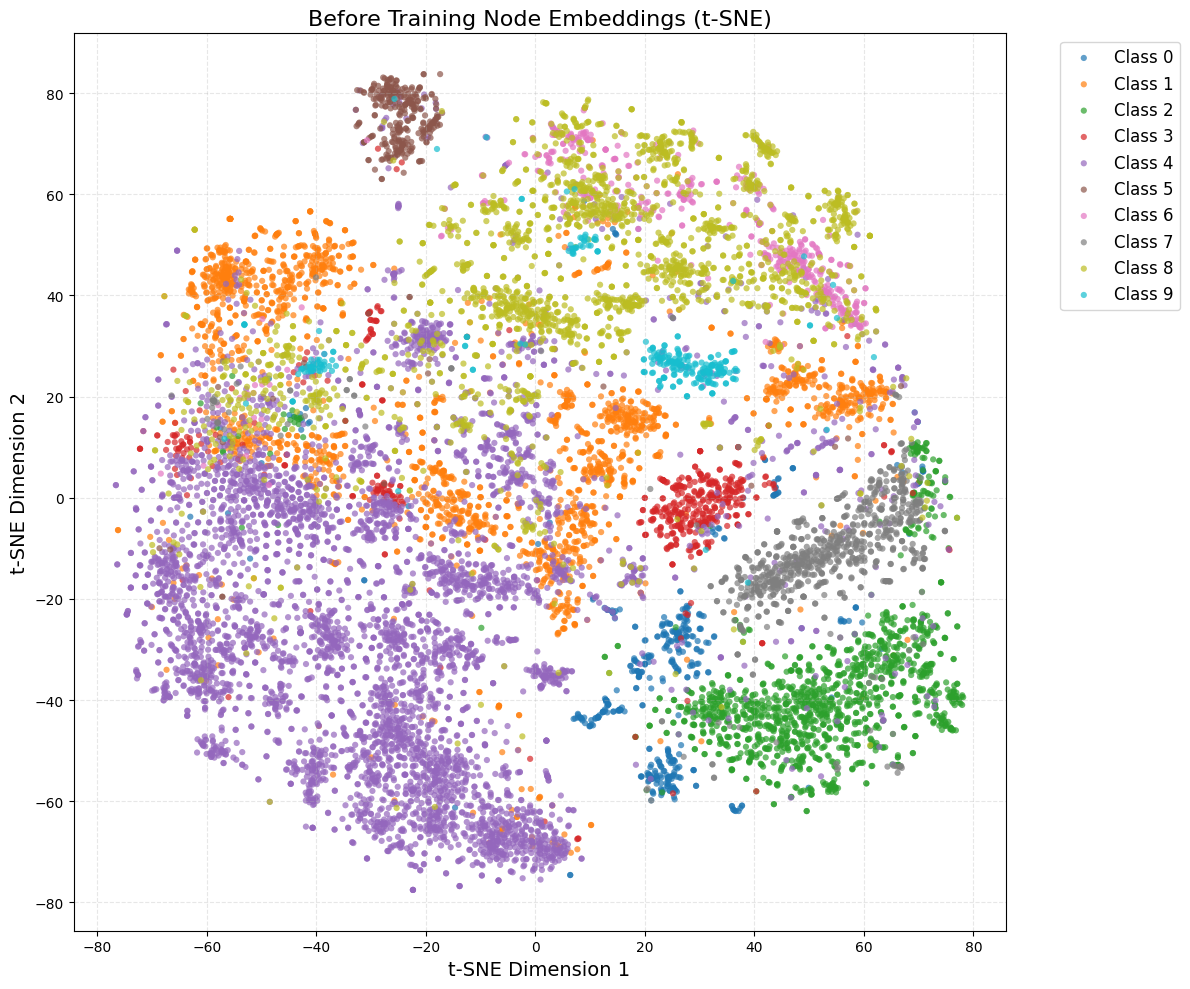


Visualizing embeddings AFTER training...
Applying t-SNE to 13752 nodes with 512 features...
Running t-SNE with perplexity=30
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 13752 samples in 0.003s...
[t-SNE] Computed neighbors for 13752 samples in 1.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13752
[t-SNE] Computed conditional probabilities for sample 2000 / 13752
[t-SNE] Computed conditional probabilities for sample 3000 / 13752
[t-SNE] Computed conditional probabilities for sample 4000 / 13752
[t-SNE] Computed conditional probabilities for sample 5000 / 13752
[t-SNE] Computed conditional probabilities for sample 6000 / 13752
[t-SNE] Computed conditional probabilities for sample 7000 / 13752
[t-SNE] Computed conditional probabilities for sample 8000 / 13752
[t-SNE] Computed conditional probabilities for sample 9000 / 13752
[t-SNE] Computed conditional probabilities for sample 10000 / 13752
[t-SNE] Computed conditional probabilities for sample 11000 

<ipython-input-8-f8c9b0787cbb>:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', num_classes)


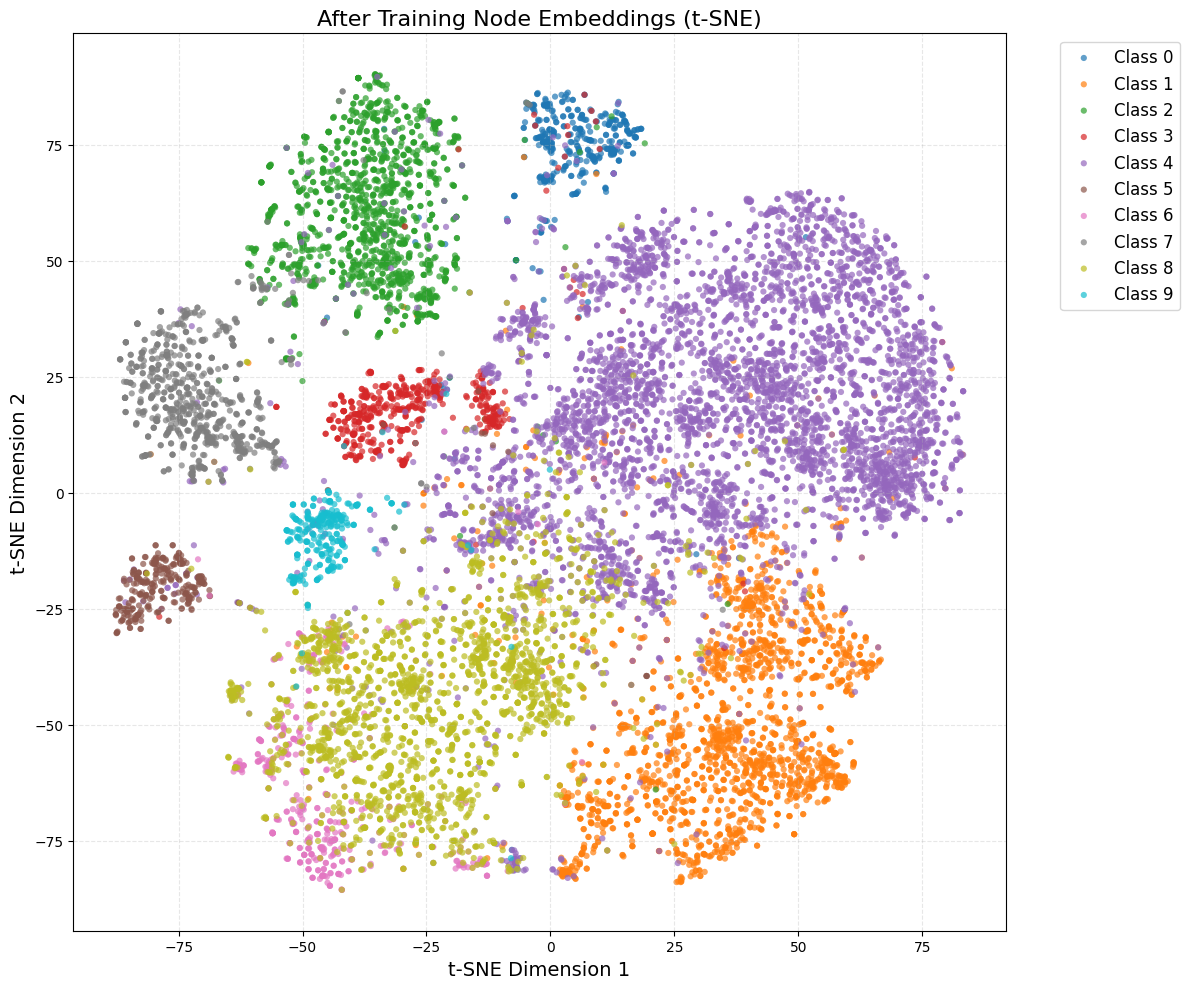

<ipython-input-8-f8c9b0787cbb>:162: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab10', num_classes)


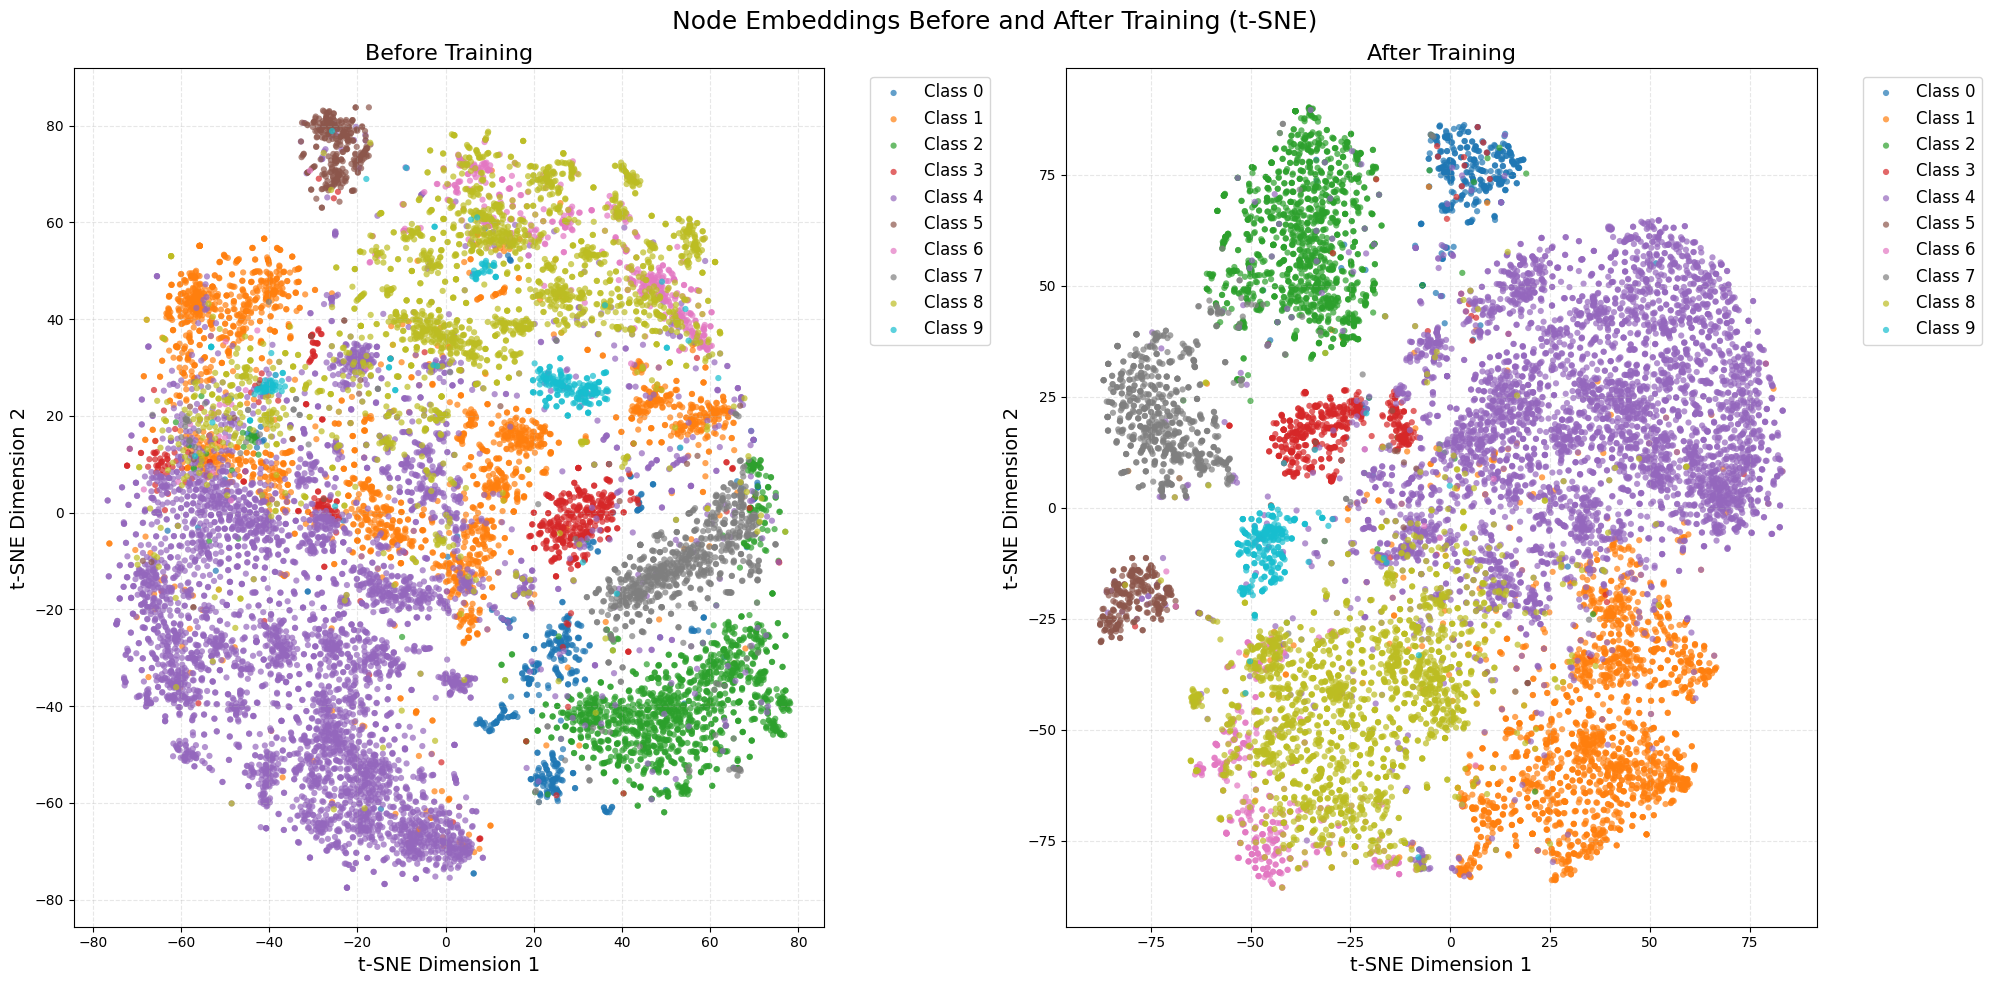

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import time
from tqdm import tqdm

def visualize_embeddings(model, data, title_prefix="", perplexity=30):
    """
    Visualize node embeddings using t-SNE

    Args:
        model: The GAT model
        data: PyTorch Geometric data object
        title_prefix: Prefix for the plot title
        perplexity: t-SNE perplexity parameter
        n_iter: Number of iterations for t-SNE
    """
    # Set model to evaluation mode
    model.eval()

    # Get embeddings from the first layer
    with torch.no_grad():
        # For multi-layer models, we need to get the output of the first layer
        if hasattr(model, 'convs'):  # For the variable layer model
            # Forward pass through first layer only
            x = model.convs[0](data.x, data.edge_index)
            embeddings = F.elu(x)
        else:  # For the original 2-layer model
            # Forward pass through first layer only
            embeddings = model.conv1(data.x, data.edge_index)
            embeddings = F.elu(embeddings)

        # Move to CPU for sklearn
        embeddings = embeddings.detach().cpu().numpy()
        labels = data.y.cpu().numpy()

    # Apply t-SNE for dimensionality reduction
    print(f"Applying t-SNE to {embeddings.shape[0]} nodes with {embeddings.shape[1]} features...")
    start_time = time.time()

    # Use a sample of nodes if the graph is very large
    max_nodes = len(node_df)  # Adjust based on your computational resources
    if embeddings.shape[0] > max_nodes:
        print(f"Sampling {max_nodes} nodes for t-SNE visualization...")
        indices = np.random.choice(embeddings.shape[0], max_nodes, replace=False)
        embeddings_sample = embeddings[indices]
        labels_sample = labels[indices]
    else:
        embeddings_sample = embeddings
        labels_sample = labels

    # Apply t-SNE with progress reporting
    print(f"Running t-SNE with perplexity={perplexity}")
    tsne = TSNE(
        n_components=2,
        random_state=42,
        perplexity=perplexity,
        verbose=1
    )
    embeddings_2d = tsne.fit_transform(embeddings_sample)
    print(f"t-SNE completed in {time.time() - start_time:.2f} seconds")

    # Plot the embeddings
    plt.figure(figsize=(12, 10))

    # Get unique classes
    unique_classes = np.unique(labels_sample)
    num_classes = len(unique_classes)

    # Create a colormap
    cmap = plt.cm.get_cmap('tab10', num_classes)

    # Plot each class with a different color
    for i, class_id in enumerate(unique_classes):
        mask = labels_sample == class_id
        plt.scatter(
            embeddings_2d[mask, 0],
            embeddings_2d[mask, 1],
            c=[cmap(i)],
            label=f'Class {class_id}',
            alpha=0.7,
            s=20,
            edgecolors='none'  # No edge color for cleaner visualization
        )

    plt.title(f"{title_prefix} Node Embeddings (t-SNE)", fontsize=16)
    plt.xlabel("t-SNE Dimension 1", fontsize=14)
    plt.ylabel("t-SNE Dimension 2", fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.tight_layout()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.savefig(f"{title_prefix.replace(' ', '_').lower()}_embeddings.png", dpi=300, bbox_inches='tight')
    plt.show()

    return embeddings_2d, labels_sample


# Create an untrained model with the same architecture as the best model
def create_untrained_model(data, best_model):
    """Create an untrained model with the same architecture as the best model"""

    # Determine if the best model is the variable layer model or the original model
    if hasattr(best_model, 'convs'):
        # Variable layer model
        num_layers = len(best_model.convs)
        hidden_channels = best_model.convs[0].out_channels
        heads = best_model.convs[0].heads
        dropout = best_model.dropout

        untrained_model = GAT(
            in_channels=data.num_node_features,
            hidden_channels=hidden_channels,
            out_channels=len(torch.unique(data.y)),
            num_layers=num_layers,
            heads=heads,
            dropout=dropout
        ).to(data.x.device)
    else:
        # Original 2-layer model
        hidden_channels = best_model.conv1.out_channels
        heads = best_model.conv1.heads
        dropout = best_model.dropout

        untrained_model = GAT(
            in_channels=data.num_node_features,
            hidden_channels=hidden_channels,
            out_channels=len(torch.unique(data.y)),
            heads=heads,
            dropout=dropout
        ).to(data.x.device)

    return untrained_model

# Visualize embeddings before and after training
def compare_embeddings(data, best_model):
    """Compare embeddings before and after training"""

    # Create untrained model with same architecture
    untrained_model = create_untrained_model(data, best_model)

    # Visualize embeddings before training
    print("\nVisualizing embeddings BEFORE training...")
    before_embeddings, before_labels = visualize_embeddings(
        untrained_model, data, title_prefix="Before Training"
    )

    # Visualize embeddings after training
    print("\nVisualizing embeddings AFTER training...")
    after_embeddings, after_labels = visualize_embeddings(
        best_model, data, title_prefix="After Training"
    )


    # Create a side-by-side comparison
    plt.figure(figsize=(20, 10))

    # Before training
    plt.subplot(1, 2, 1)
    unique_classes = np.unique(before_labels)
    num_classes = len(unique_classes)
    cmap = plt.cm.get_cmap('tab10', num_classes)

    for i, class_id in enumerate(unique_classes):
        mask = before_labels == class_id
        plt.scatter(
            before_embeddings[mask, 0],
            before_embeddings[mask, 1],
            c=[cmap(i)],
            label=f'Class {class_id}',
            alpha=0.7,
            s=20,
            edgecolors='none'
        )
    plt.title("Before Training", fontsize=16)
    plt.xlabel("t-SNE Dimension 1", fontsize=14)
    plt.ylabel("t-SNE Dimension 2", fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.grid(True, alpha=0.3, linestyle='--')

    # After training
    plt.subplot(1, 2, 2)
    for i, class_id in enumerate(unique_classes):
        mask = after_labels == class_id
        plt.scatter(
            after_embeddings[mask, 0],
            after_embeddings[mask, 1],
            c=[cmap(i)],
            label=f'Class {class_id}',
            alpha=0.7,
            s=20,
            edgecolors='none'
        )
    plt.title("After Training", fontsize=16)
    plt.xlabel("t-SNE Dimension 1", fontsize=14)
    plt.ylabel("t-SNE Dimension 2", fontsize=14)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
    plt.grid(True, alpha=0.3, linestyle='--')

    plt.suptitle("Node Embeddings Before and After Training (t-SNE)", fontsize=18)
    plt.tight_layout()
    plt.savefig("before_after_comparison.png", dpi=300, bbox_inches='tight')
    plt.show()

# Run the embedding visualization
compare_embeddings(data, best_gat_model)

# 3. Discussion and Extension


=== Training MLP ===
Training MLP model...
Epoch 20: Train Loss: 1.3000, Val Acc: 0.6454
Epoch 40: Train Loss: 0.8629, Val Acc: 0.7673
Epoch 60: Train Loss: 0.6679, Val Acc: 0.7967
Epoch 80: Train Loss: 0.5371, Val Acc: 0.8232
Epoch 100: Train Loss: 0.4520, Val Acc: 0.8269
Epoch 120: Train Loss: 0.3943, Val Acc: 0.8301
Epoch 140: Train Loss: 0.3434, Val Acc: 0.8304
Early stopping at epoch 150
Test accuracy: 0.8358

=== Training GCN ===


 10%|█         | 20/200 [00:00<00:02, 88.84it/s]

Epoch: 010, Train Loss: 2.1091, Val Loss: 1.9168, Train Acc: 0.4756, Val Acc: 0.5070
Epoch: 020, Train Loss: 1.3679, Val Loss: 1.2424, Train Acc: 0.6316, Val Acc: 0.7199


 24%|██▎       | 47/200 [00:00<00:01, 88.31it/s]

Epoch: 030, Train Loss: 0.9349, Val Loss: 0.8265, Train Acc: 0.7465, Val Acc: 0.7926
Epoch: 040, Train Loss: 0.7050, Val Loss: 0.6290, Train Acc: 0.8007, Val Acc: 0.8406


 32%|███▎      | 65/200 [00:00<00:01, 88.36it/s]

Epoch: 050, Train Loss: 0.5996, Val Loss: 0.5238, Train Acc: 0.8365, Val Acc: 0.8723
Epoch: 060, Train Loss: 0.5269, Val Loss: 0.4700, Train Acc: 0.8552, Val Acc: 0.8834


 42%|████▎     | 85/200 [00:00<00:01, 90.06it/s]

Epoch: 070, Train Loss: 0.4610, Val Loss: 0.4282, Train Acc: 0.8774, Val Acc: 0.8924
Epoch: 080, Train Loss: 0.4219, Val Loss: 0.4010, Train Acc: 0.8851, Val Acc: 0.8947


 52%|█████▎    | 105/200 [00:01<00:01, 90.98it/s]

Epoch: 090, Train Loss: 0.3953, Val Loss: 0.3820, Train Acc: 0.8945, Val Acc: 0.8973
Epoch: 100, Train Loss: 0.3585, Val Loss: 0.3673, Train Acc: 0.9009, Val Acc: 0.8999


 62%|██████▎   | 125/200 [00:01<00:00, 90.24it/s]

Epoch: 110, Train Loss: 0.3432, Val Loss: 0.3576, Train Acc: 0.9061, Val Acc: 0.9020
Epoch: 120, Train Loss: 0.3246, Val Loss: 0.3515, Train Acc: 0.9098, Val Acc: 0.9002


 72%|███████▏  | 144/200 [00:01<00:00, 89.34it/s]

Epoch: 130, Train Loss: 0.3119, Val Loss: 0.3486, Train Acc: 0.9152, Val Acc: 0.9023
Epoch: 140, Train Loss: 0.2937, Val Loss: 0.3461, Train Acc: 0.9198, Val Acc: 0.9029


 81%|████████  | 162/200 [00:01<00:00, 89.24it/s]

Epoch: 150, Train Loss: 0.2838, Val Loss: 0.3489, Train Acc: 0.9225, Val Acc: 0.9005
Epoch: 160, Train Loss: 0.2724, Val Loss: 0.3452, Train Acc: 0.9233, Val Acc: 0.9031


 90%|█████████ | 180/200 [00:02<00:00, 88.56it/s]

Epoch: 170, Train Loss: 0.2647, Val Loss: 0.3436, Train Acc: 0.9277, Val Acc: 0.9043
Epoch: 180, Train Loss: 0.2584, Val Loss: 0.3457, Train Acc: 0.9302, Val Acc: 0.9043


100%|██████████| 200/200 [00:02<00:00, 89.25it/s]


Epoch: 190, Train Loss: 0.2440, Val Loss: 0.3486, Train Acc: 0.9304, Val Acc: 0.9002
Epoch: 200, Train Loss: 0.2392, Val Loss: 0.3499, Train Acc: 0.9319, Val Acc: 0.9034


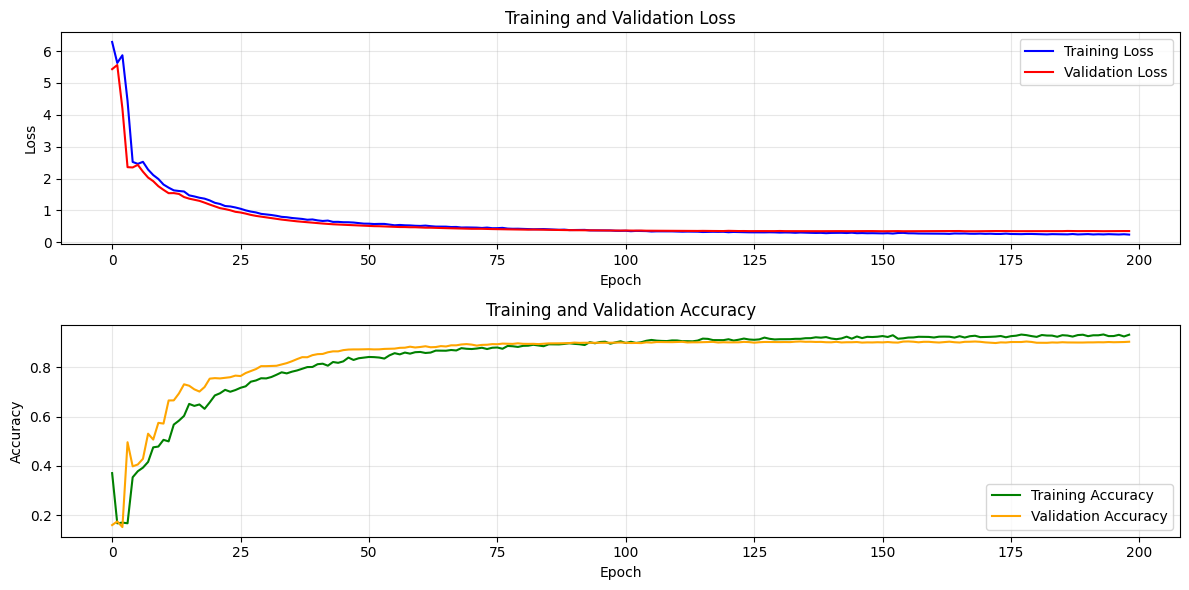


=== Training GAT ===
Starting GAT training...


  8%|▊         | 15/200 [00:00<00:04, 40.84it/s]

Epoch: 010, Train Loss: 4.0947, Val Loss: 3.8772, Train Acc: 0.4434, Val Acc: 0.5303


 12%|█▎        | 25/200 [00:00<00:04, 41.60it/s]

Epoch: 020, Train Loss: 1.5176, Val Loss: 1.1941, Train Acc: 0.6117, Val Acc: 0.6533


 18%|█▊        | 35/200 [00:00<00:03, 41.74it/s]

Epoch: 030, Train Loss: 1.0443, Val Loss: 0.6293, Train Acc: 0.6973, Val Acc: 0.8133


 22%|██▎       | 45/200 [00:01<00:03, 41.33it/s]

Epoch: 040, Train Loss: 0.8737, Val Loss: 0.5400, Train Acc: 0.7378, Val Acc: 0.8290


 28%|██▊       | 55/200 [00:01<00:03, 41.35it/s]

Epoch: 050, Train Loss: 0.7805, Val Loss: 0.4725, Train Acc: 0.7586, Val Acc: 0.8566


 32%|███▎      | 65/200 [00:01<00:03, 41.48it/s]

Epoch: 060, Train Loss: 0.7219, Val Loss: 0.4233, Train Acc: 0.7688, Val Acc: 0.8662


 38%|███▊      | 75/200 [00:01<00:03, 41.66it/s]

Epoch: 070, Train Loss: 0.6701, Val Loss: 0.4080, Train Acc: 0.7729, Val Acc: 0.8709


 42%|████▎     | 85/200 [00:02<00:02, 41.74it/s]

Epoch: 080, Train Loss: 0.6569, Val Loss: 0.3936, Train Acc: 0.8120, Val Acc: 0.8775


 48%|████▊     | 95/200 [00:02<00:02, 41.61it/s]

Epoch: 090, Train Loss: 0.6095, Val Loss: 0.3725, Train Acc: 0.8238, Val Acc: 0.8854


 52%|█████▎    | 105/200 [00:02<00:02, 41.80it/s]

Epoch: 100, Train Loss: 0.5994, Val Loss: 0.3716, Train Acc: 0.8305, Val Acc: 0.8892


 57%|█████▊    | 115/200 [00:02<00:02, 41.82it/s]

Epoch: 110, Train Loss: 0.5982, Val Loss: 0.3528, Train Acc: 0.8263, Val Acc: 0.8953


 62%|██████▎   | 125/200 [00:03<00:01, 41.55it/s]

Epoch: 120, Train Loss: 0.5667, Val Loss: 0.3705, Train Acc: 0.8305, Val Acc: 0.8863


 68%|██████▊   | 135/200 [00:03<00:01, 41.22it/s]

Epoch: 130, Train Loss: 0.5509, Val Loss: 0.3575, Train Acc: 0.8369, Val Acc: 0.8941


 72%|███████▎  | 145/200 [00:03<00:01, 41.48it/s]

Epoch: 140, Train Loss: 0.5294, Val Loss: 0.3535, Train Acc: 0.8431, Val Acc: 0.8970


 78%|███████▊  | 155/200 [00:03<00:01, 41.73it/s]

Epoch: 150, Train Loss: 0.5198, Val Loss: 0.3520, Train Acc: 0.8398, Val Acc: 0.8970


 82%|████████▎ | 165/200 [00:03<00:00, 41.79it/s]

Epoch: 160, Train Loss: 0.5127, Val Loss: 0.3613, Train Acc: 0.8386, Val Acc: 0.8947


 88%|████████▊ | 175/200 [00:04<00:00, 41.73it/s]

Epoch: 170, Train Loss: 0.5292, Val Loss: 0.3547, Train Acc: 0.8373, Val Acc: 0.8999


 92%|█████████▎| 185/200 [00:04<00:00, 41.86it/s]

Epoch: 180, Train Loss: 0.5178, Val Loss: 0.3500, Train Acc: 0.8404, Val Acc: 0.9011


 98%|█████████▊| 195/200 [00:04<00:00, 41.93it/s]

Epoch: 190, Train Loss: 0.4960, Val Loss: 0.3576, Train Acc: 0.8392, Val Acc: 0.9005


100%|██████████| 200/200 [00:04<00:00, 41.59it/s]


Epoch: 200, Train Loss: 0.4778, Val Loss: 0.3529, Train Acc: 0.8492, Val Acc: 0.9029
Best validation accuracy: 0.9029
Test accuracy: 0.8995

=== Evaluating Models ===

=== Test Accuracy Comparison ===
MLP: 0.8358
GCN: 0.8969
GAT: 0.8995


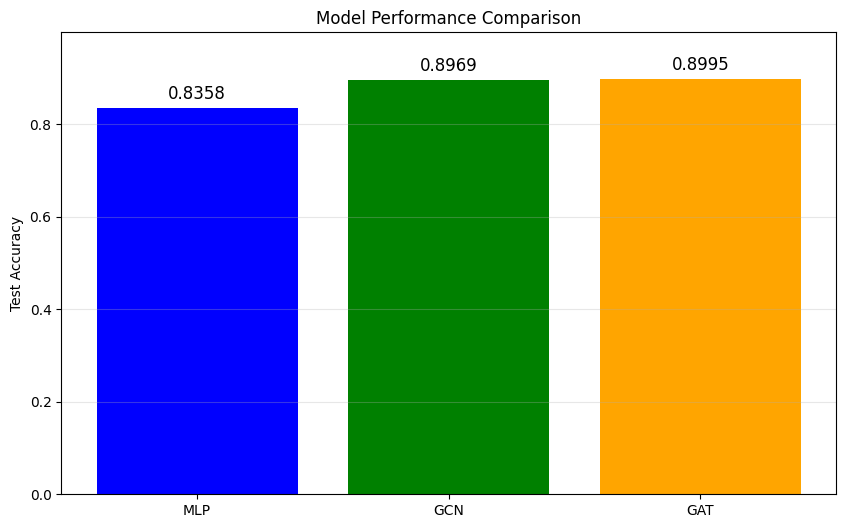

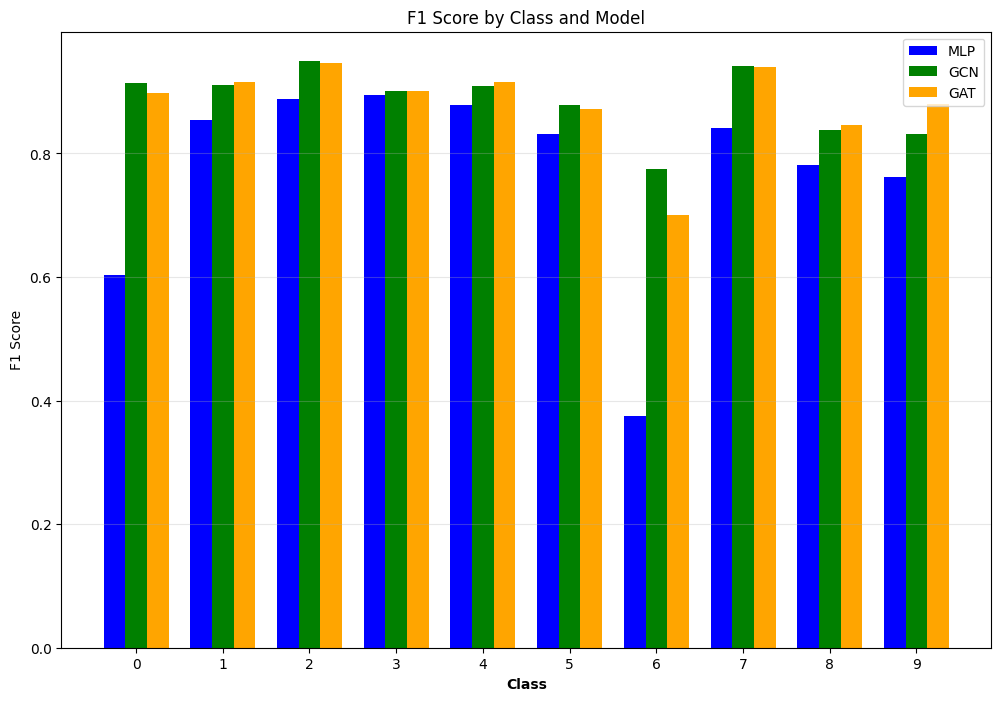

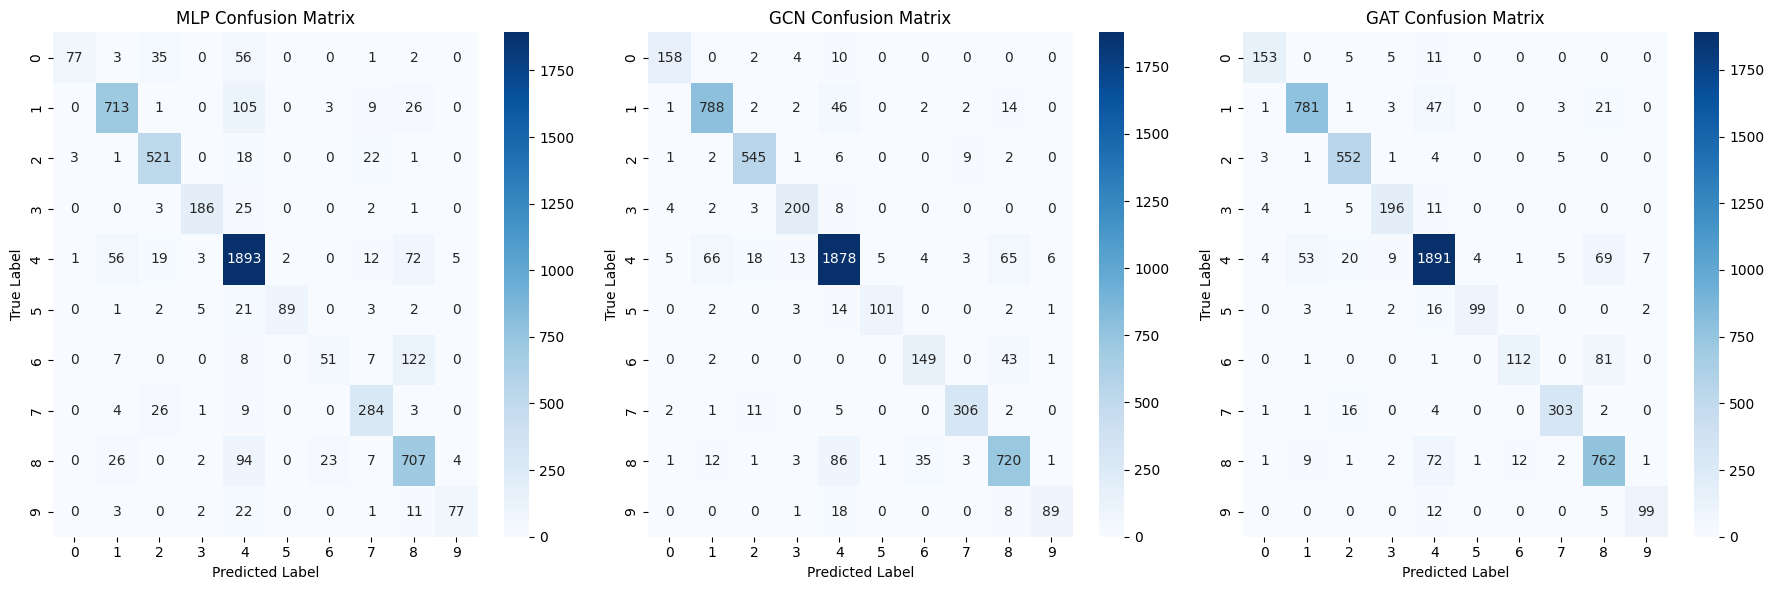


=== Model Performance Summary ===
Model  Test Accuracy  Macro F1  Weighted F1
  MLP       0.835848  0.770931     0.828394
  GCN       0.896928  0.884546     0.896610
  GAT       0.899473  0.881192     0.898408

=== Observations ===
1. Graph Structure Utilization:
   - GNN models (GCN/GAT) outperform MLP, indicating that graph structure provides valuable information

2. Attention Mechanism:
   - GAT outperforms GCN, suggesting that the attention mechanism helps identify important node relationships

3. Per-Class Performance:
   - Even the best model (GAT) struggles with class 6 (F1: 0.7000)
   - This suggests some classes may have less distinctive features or network positions

4. Model Complexity vs. Performance:
   - More complex models (GAT > GCN > MLP) achieve better performance, suggesting the task benefits from sophisticated graph learning


In [15]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch_geometric.nn import GCNConv, GATConv
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# MLP model definition
class MLP(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, num_layers=2, dropout=0.5):
        super(MLP, self).__init__()

        self.layers = torch.nn.ModuleList()

        # First layer
        self.layers.append(torch.nn.Linear(in_channels, hidden_channels))

        # Hidden layers
        for _ in range(num_layers - 2):
            self.layers.append(torch.nn.Linear(hidden_channels, hidden_channels))

        # Output layer
        self.layers.append(torch.nn.Linear(hidden_channels, out_channels))

        self.dropout = dropout

    def forward(self, x, edge_index=None):  # edge_index is ignored, included for API compatibility
        for i, layer in enumerate(self.layers):
            x = layer(x)
            if i < len(self.layers) - 1:  # No activation on final layer
                x = F.relu(x)
                x = F.dropout(x, p=self.dropout, training=self.training)
        return x

# Train MLP model
def train_mlp(model, data, epochs=200, lr=0.01, weight_decay=5e-4, early_stopping=20):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Initialize metrics storage
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    # Early stopping variables
    best_val_acc = 0
    best_model_state = None
    patience_counter = 0

    print("Training MLP model...")

    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()

        # Forward pass (MLP only uses node features, not graph structure)
        out = model(data.x)

        # Loss
        loss = F.cross_entropy(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        # Evaluation
        model.eval()
        with torch.no_grad():
            out = model(data.x)
            pred = out.argmax(dim=1)

            # Training accuracy
            train_acc = (pred[data.train_mask] == data.y[data.train_mask]).sum().item() / data.train_mask.sum().item()
            train_accs.append(train_acc)
            train_losses.append(loss.item())

            # Validation accuracy
            val_loss = F.cross_entropy(out[data.val_mask], data.y[data.val_mask])
            val_acc = (pred[data.val_mask] == data.y[data.val_mask]).sum().item() / data.val_mask.sum().item()
            val_accs.append(val_acc)
            val_losses.append(val_loss.item())

            # Early stopping
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_model_state = model.state_dict().copy()
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= early_stopping:
                print(f"Early stopping at epoch {epoch}")
                break

        if (epoch + 1) % 20 == 0:
            print(f"Epoch {epoch+1}: Train Loss: {loss.item():.4f}, Val Acc: {val_acc:.4f}")

    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Final evaluation
    model.eval()
    with torch.no_grad():
        out = model(data.x)
        pred = out.argmax(dim=1)
        test_acc = (pred[data.test_mask] == data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()
        print(f"Test accuracy: {test_acc:.4f}")

    return model, {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accs': train_accs,
        'val_accs': val_accs,
        'test_acc': test_acc
    }

# Function to evaluate and compare models
def evaluate_model(model, data, model_name):
    model.eval()
    with torch.no_grad():
        # Get predictions
        if model_name == 'MLP':
            out = model(data.x)
        else:  # GNN models
            out = model(data.x, data.edge_index)

        pred = out.argmax(dim=1)

        # Test accuracy
        test_acc = (pred[data.test_mask] == data.y[data.test_mask]).sum().item() / data.test_mask.sum().item()

        # Get predictions and true labels for test set
        y_true = data.y[data.test_mask].cpu().numpy()
        y_pred = pred[data.test_mask].cpu().numpy()

        # Per-class metrics
        report = classification_report(y_true, y_pred, output_dict=True)

        # Confusion matrix
        cm = confusion_matrix(y_true, y_pred)

        return {
            'test_acc': test_acc,
            'y_true': y_true,
            'y_pred': y_pred,
            'report': report,
            'confusion_matrix': cm
        }

# Train and evaluate all models
def compare_models(data):
    results = {}

    # 1. Train MLP
    print("\n=== Training MLP ===")
    mlp_model = MLP(
        in_channels=data.num_node_features,
        hidden_channels=64,
        out_channels=len(torch.unique(data.y)),
        num_layers=2,
        dropout=0.5
    ).to(data.x.device)

    mlp_model, mlp_metrics = train_mlp(
        mlp_model,
        data,
        epochs=200,
        lr=0.005,
        weight_decay=5e-4
    )

    # 2. Train GCN with best hyperparameters
    print("\n=== Training GCN ===")
    gcn_model = GCN(
        in_channels=data.num_node_features,
        hidden_channels=256,  # Use your best hyperparameters
        out_channels=len(torch.unique(data.y)),
        # num_layers=2,  # Use your best hyperparameters
        dropout=0.7  # Use your best hyperparameters
    ).to(data.x.device)

    gcn_model, gcn_metrics = train_gcn(
        gcn_model,
        data,
        epochs=200,
        lr=0.005,  # Use your best hyperparameters
        weight_decay=5e-4  # Use your best hyperparameters
    )

    # 3. Train GAT with best hyperparameters
    print("\n=== Training GAT ===")
    gat_model = GAT(
        in_channels=data.num_node_features,
        hidden_channels=32,  # Use your best hyperparameters
        out_channels=len(torch.unique(data.y)),
        num_layers=2,  # Use your best hyperparameters
        heads=16,  # Use your best hyperparameters
        dropout=0.6  # Use your best hyperparameters
    ).to(data.x.device)

    gat_model, gat_metrics = train_gat(
        gat_model,
        data,
        epochs=200,
        lr=0.01,  # Use your best hyperparameters
        weight_decay=1e-4  # Use your best hyperparameters
    )

    # Evaluate all models
    print("\n=== Evaluating Models ===")
    results['MLP'] = evaluate_model(mlp_model, data, 'MLP')
    results['GCN'] = evaluate_model(gcn_model, data, 'GCN')
    results['GAT'] = evaluate_model(gat_model, data, 'GAT')

    # Compare test accuracies
    print("\n=== Test Accuracy Comparison ===")
    for model_name, result in results.items():
        print(f"{model_name}: {result['test_acc']:.4f}")

    # Visualize comparison
    visualize_comparison(results)

    return results, (mlp_model, gcn_model, gat_model)

# Visualize model comparison
def visualize_comparison(results):
    # 1. Test accuracy comparison
    model_names = list(results.keys())
    test_accs = [results[model]['test_acc'] for model in model_names]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(model_names, test_accs, color=['blue', 'green', 'orange'])

    # Add values on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.4f}', ha='center', va='bottom', fontsize=12)

    plt.ylim(0, max(test_accs) + 0.1)
    plt.ylabel('Test Accuracy')
    plt.title('Model Performance Comparison')
    plt.grid(axis='y', alpha=0.3)
    plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 2. Per-class F1 scores
    plt.figure(figsize=(12, 8))

    # Get class labels and F1 scores for each model
    class_labels = list(results['MLP']['report'].keys())
    class_labels = [label for label in class_labels if label not in ['accuracy', 'macro avg', 'weighted avg']]

    f1_scores = {
        model_name: [result['report'][label]['f1-score'] for label in class_labels]
        for model_name, result in results.items()
    }

    # Set width of bars
    barWidth = 0.25

    # Set position of bars on X axis
    r1 = np.arange(len(class_labels))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Create bars
    plt.bar(r1, f1_scores['MLP'], width=barWidth, label='MLP', color='blue')
    plt.bar(r2, f1_scores['GCN'], width=barWidth, label='GCN', color='green')
    plt.bar(r3, f1_scores['GAT'], width=barWidth, label='GAT', color='orange')

    # Add labels and legend
    plt.xlabel('Class', fontweight='bold')
    plt.ylabel('F1 Score')
    plt.xticks([r + barWidth for r in range(len(class_labels))], class_labels)
    plt.legend()
    plt.title('F1 Score by Class and Model')
    plt.grid(axis='y', alpha=0.3)
    plt.savefig('f1_score_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # 3. Confusion matrices
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    for i, (model_name, result) in enumerate(results.items()):
        cm = result['confusion_matrix']
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'{model_name} Confusion Matrix')
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')

    plt.tight_layout()
    plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
    plt.show()

# Run the comparison
comparison_results, models = compare_models(data)

# Create a summary table
summary_df = pd.DataFrame({
    'Model': list(comparison_results.keys()),
    'Test Accuracy': [result['test_acc'] for result in comparison_results.values()],
    'Macro F1': [result['report']['macro avg']['f1-score'] for result in comparison_results.values()],
    'Weighted F1': [result['report']['weighted avg']['f1-score'] for result in comparison_results.values()]
})

print("\n=== Model Performance Summary ===")
print(summary_df.to_string(index=False))

# Observations
print("\n=== Observations ===")
print("1. Graph Structure Utilization:")
if comparison_results['GCN']['test_acc'] > comparison_results['MLP']['test_acc'] or comparison_results['GAT']['test_acc'] > comparison_results['MLP']['test_acc']:
    print("   - GNN models (GCN/GAT) outperform MLP, indicating that graph structure provides valuable information")
else:
    print("   - MLP performs similarly to GNN models, suggesting that node features might be more important than graph structure for this task")

print("\n2. Attention Mechanism:")
if comparison_results['GAT']['test_acc'] > comparison_results['GCN']['test_acc']:
    print("   - GAT outperforms GCN, suggesting that the attention mechanism helps identify important node relationships")
else:
    print("   - GCN performs similarly to or better than GAT, indicating that the attention mechanism may not provide significant benefits for this dataset")

print("\n3. Per-Class Performance:")
best_model = max(comparison_results.items(), key=lambda x: x[1]['test_acc'])[0]
worst_class = min(comparison_results[best_model]['report'].items(), key=lambda x: x[1]['f1-score'] if isinstance(x[1], dict) else 1.0)
if isinstance(worst_class[1], dict):
    print(f"   - Even the best model ({best_model}) struggles with class {worst_class[0]} (F1: {worst_class[1]['f1-score']:.4f})")
    print("   - This suggests some classes may have less distinctive features or network positions")

print("\n4. Model Complexity vs. Performance:")
if comparison_results['GAT']['test_acc'] > comparison_results['GCN']['test_acc'] > comparison_results['MLP']['test_acc']:
    print("   - More complex models (GAT > GCN > MLP) achieve better performance, suggesting the task benefits from sophisticated graph learning")
elif comparison_results['MLP']['test_acc'] > comparison_results['GCN']['test_acc'] or comparison_results['MLP']['test_acc'] > comparison_results['GAT']['test_acc']:
    print("   - The simpler MLP outperforms some GNN models, suggesting that for this dataset, the added complexity of graph models may not be necessary")

# Proposed Design

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric
from torch_geometric.nn import GATConv
from torch_geometric.utils import negative_sampling, train_test_split_edges, to_undirected
from torch_geometric.data import Data
import numpy as np
from sklearn.metrics import roc_auc_score, average_precision_score

class GATLinkPredictor(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, heads=8, dropout=0.6):
        super(GATLinkPredictor, self).__init__()

        # GAT layers for node embedding
        self.conv1 = GATConv(in_channels, hidden_channels, heads=heads, dropout=dropout)
        self.conv2 = GATConv(hidden_channels * heads, out_channels, heads=1, concat=False, dropout=dropout)

        # Edge predictor MLP
        self.edge_predictor = nn.Sequential(
            nn.Linear(out_channels * 2, hidden_channels),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_channels, 1)
        )

        self.dropout = dropout

    def encode(self, x, edge_index):
        # Node embedding using GAT
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        return x

    def decode(self, z, edge_index):
        # Get node embeddings for the source and target nodes
        src, dst = edge_index

        # Concatenate embeddings and predict edge existence
        edge_features = torch.cat([z[src], z[dst]], dim=1)
        return torch.sigmoid(self.edge_predictor(edge_features).squeeze())

    def decode_all(self, z):
        # For evaluation: compute predictions for all possible node pairs
        # Warning: this is computationally expensive for large graphs
        prob_adj = torch.matmul(z, z.t())
        return torch.sigmoid(prob_adj)

    def forward(self, x, edge_index):
        # Get node embeddings
        z = self.encode(x, edge_index)

        # Return node embeddings for later use
        return z

# Data preparation function
def prepare_data_for_link_prediction(data):
    """
    Prepare the Amazon Computers dataset for link prediction

    Args:
        data: PyTorch Geometric Data object

    Returns:
        data_train: Data object with training edges
        data_val: Data object with validation edges
        data_test: Data object with test edges
    """
    # Make a copy of the data to avoid modifying the original
    data_copy = data.clone()

    # Convert to undirected if needed by using to_undirected on edge_index
    if data_copy.is_directed():
        data_copy.edge_index = torch_geometric.utils.to_undirected(data_copy.edge_index)

    # Split edges into train/val/test
    data_train = train_test_split_edges(data_copy, val_ratio=0.1, test_ratio=0.1)

    # Create validation and test data objects
    data_val = Data(x=data_train.x, edge_index=data_train.val_pos_edge_index)
    data_test = Data(x=data_train.x, edge_index=data_train.test_pos_edge_index)

    return data_train, data_val, data_test

# Training function
def train_link_predictor(model, data, optimizer, batch_size=2048):
    model.train()
    optimizer.zero_grad()

    # Get node embeddings
    z = model(data.x, data.train_pos_edge_index)

    # Positive edges (existing co-purchases)
    pos_edge_index = data.train_pos_edge_index

    # Sample negative edges (non-existing co-purchases)
    neg_edge_index = negative_sampling(
        edge_index=pos_edge_index,
        num_nodes=data.num_nodes,
        num_neg_samples=pos_edge_index.size(1)
    )

    # Process in batches to handle large graphs
    total_loss = 0
    num_batches = (pos_edge_index.size(1) + batch_size - 1) // batch_size

    for batch_idx in range(num_batches):
        # Get batch indices
        start = batch_idx * batch_size
        end = min((batch_idx + 1) * batch_size, pos_edge_index.size(1))

        # Get positive and negative edges for this batch
        pos_batch = pos_edge_index[:, start:end]
        neg_batch = neg_edge_index[:, start:end]

        # Predict edge existence
        pos_pred = model.decode(z, pos_batch)
        neg_pred = model.decode(z, neg_batch)

        # Create target tensors
        pos_target = torch.ones_like(pos_pred)
        neg_target = torch.zeros_like(neg_pred)

        # Compute loss
        loss = F.binary_cross_entropy(
            torch.cat([pos_pred, neg_pred]),
            torch.cat([pos_target, neg_target])
        )

        # Backpropagation
        loss.backward(retain_graph=(batch_idx < num_batches - 1))
        total_loss += loss.item()

    # Update weights
    optimizer.step()

    return total_loss / num_batches

# Evaluation function
def evaluate_link_predictor(model, data, pos_edge_index, neg_edge_index=None):
    model.eval()

    with torch.no_grad():
        # Get node embeddings
        z = model(data.x, data.train_pos_edge_index)

        # Predict positive edges
        pos_pred = model.decode(z, pos_edge_index)

        # If negative edges are not provided, sample them
        if neg_edge_index is None:
            neg_edge_index = negative_sampling(
                edge_index=pos_edge_index,
                num_nodes=data.num_nodes,
                num_neg_samples=pos_edge_index.size(1)
            )

        # Predict negative edges
        neg_pred = model.decode(z, neg_edge_index)

        # Combine predictions and true labels
        pred = torch.cat([pos_pred, neg_pred]).cpu().numpy()
        true = torch.cat([
            torch.ones(pos_pred.size(0)),
            torch.zeros(neg_pred.size(0))
        ]).cpu().numpy()

        # Calculate metrics
        auc = roc_auc_score(true, pred)
        ap = average_precision_score(true, pred)

        # Calculate Hit Ratio and NDCG at k=10
        k = 10

        # For each positive edge, get k negative edges
        hr_sum = 0
        ndcg_sum = 0

        for i in range(pos_pred.size(0)):
            # Get prediction for this positive edge
            pos_score = pos_pred[i].item()

            # Sample k negative edges for this positive edge
            neg_samples = negative_sampling(
                edge_index=data.train_pos_edge_index,
                num_nodes=data.num_nodes,
                num_neg_samples=k
            )

            # Get predictions for negative samples
            neg_scores = model.decode(z, neg_samples).cpu().numpy()

            # Combine scores and sort
            all_scores = np.append(neg_scores, pos_score)
            all_items = np.append(np.zeros(k), 1)  # 0 for negative, 1 for positive

            # Sort by score in descending order
            idx = np.argsort(all_scores)[::-1]
            sorted_items = all_items[idx]

            # Calculate HR@k
            hr_sum += int(1 in sorted_items[:k])

            # Calculate NDCG@k
            if 1 in sorted_items[:k]:
                pos_idx = np.where(sorted_items[:k] == 1)[0][0]
                ndcg_sum += 1 / np.log2(pos_idx + 2)

        hr = hr_sum / pos_pred.size(0)
        ndcg = ndcg_sum / pos_pred.size(0)

        return {
            'AUC': auc,
            'AP': ap,
            'HR@10': hr,
            'NDCG@10': ndcg
        }

# Main training loop
def train_and_evaluate(data, epochs=100, lr=0.001, weight_decay=1e-5):
    # Prepare data
    data_train, data_val, data_test = prepare_data_for_link_prediction(data)

    # Initialize model
    model = GATLinkPredictor(
        in_channels=data.num_features,
        hidden_channels=64,
        out_channels=32,
        heads=8,
        dropout=0.6
    ).to(data.x.device)

    # Initialize optimizer
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    # Training loop
    best_val_auc = 0
    best_model = None

    print("Starting training...")
    for epoch in range(1, epochs + 1):
        # Train
        loss = train_link_predictor(model, data_train, optimizer)

        # Evaluate on validation set
        val_metrics = evaluate_link_predictor(
            model, data_train, data_train.val_pos_edge_index, data_train.val_neg_edge_index
        )

        # Print progress
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val AUC: {val_metrics["AUC"]:.4f}, '
              f'Val HR@10: {val_metrics["HR@10"]:.4f}, Val NDCG@10: {val_metrics["NDCG@10"]:.4f}')

        # Save best model
        if val_metrics['AUC'] > best_val_auc:
            best_val_auc = val_metrics['AUC']
            best_model = model.state_dict().copy()

    # Load best model
    model.load_state_dict(best_model)

    # Final evaluation on test set
    test_metrics = evaluate_link_predictor(
        model, data_train, data_train.test_pos_edge_index, data_train.test_neg_edge_index
    )

    print("\nTest Results:")
    for metric, value in test_metrics.items():
        print(f"{metric}: {value:.4f}")

    return model, test_metrics

# Run the model
# Assuming 'data' is your Amazon Computers dataset
model, metrics = train_and_evaluate(data)

/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'train_test_split_edges' is deprecated, use 'transforms.RandomLinkSplit' instead
  warnings.warn(out)


Starting training...
Epoch: 001, Loss: 0.7109, Val AUC: 0.5408, Val HR@10: 0.9712, Val NDCG@10: 0.4172
Epoch: 002, Loss: 0.7157, Val AUC: 0.6834, Val HR@10: 0.9669, Val NDCG@10: 0.5724
Epoch: 003, Loss: 0.6937, Val AUC: 0.6324, Val HR@10: 0.9521, Val NDCG@10: 0.5434
Epoch: 004, Loss: 0.6947, Val AUC: 0.6684, Val HR@10: 0.9675, Val NDCG@10: 0.5798
Epoch: 005, Loss: 0.6849, Val AUC: 0.6881, Val HR@10: 0.9666, Val NDCG@10: 0.6080
Epoch: 006, Loss: 0.6809, Val AUC: 0.6729, Val HR@10: 0.9586, Val NDCG@10: 0.6049
Epoch: 007, Loss: 0.6765, Val AUC: 0.6626, Val HR@10: 0.9486, Val NDCG@10: 0.5999
Epoch: 008, Loss: 0.6732, Val AUC: 0.6752, Val HR@10: 0.9549, Val NDCG@10: 0.6055
Epoch: 009, Loss: 0.6667, Val AUC: 0.6892, Val HR@10: 0.9614, Val NDCG@10: 0.6124
Epoch: 010, Loss: 0.6632, Val AUC: 0.6937, Val HR@10: 0.9662, Val NDCG@10: 0.6142
Epoch: 011, Loss: 0.6597, Val AUC: 0.6989, Val HR@10: 0.9674, Val NDCG@10: 0.6180
Epoch: 012, Loss: 0.6534, Val AUC: 0.7051, Val HR@10: 0.9704, Val NDCG@10: 0.